In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.68


In [3]:
import torch
from gcpds_cv_pykit.segmentation.datasets import SeedGermination
from gcpds_cv_pykit.segmentation.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.segmentation.visuals import random_sample_visualization
from gcpds_cv_pykit.segmentation.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.segmentation.baseline.models import ResUNet
from gcpds_cv_pykit.segmentation.baseline import PerformanceModels

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
SeedGermination('lucasiturriago/seeds/versions/1')

Path to downloaded dataset files: /kaggle/input/seeds
Original dataset folder '/kaggle/input/seeds' is read-only. Using it directly.


'/kaggle/input/seeds'

In [6]:
!mkdir -p /kaggle/working/datasets/seeds/
!cp -r /kaggle/input/seeds/ /kaggle/working/datasets/

In [7]:
config = {"Dir of dataset":"./datasets/seeds","Batch size": 36,"Image size":(256,256),"Epochs":61,
          "Input size":(3,256,256),"Number of classes":3,"Single class train":None,"Single class test":None,
          "Single class valid":None,"Images folder":"images","Data augmentation":True,"Device":"cuda:0",
          "AMixPre":True,"Model":"ResUNet","Pretrained":True,"Save results":True,"Train phases":True}

In [8]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 2458


Organizing masks: 100%|██████████| 2458/2458 [00:00<00:00, 85018.51it/s]


In [9]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 231


Organizing masks: 100%|██████████| 231/231 [00:00<00:00, 66727.56it/s]


In [10]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 118


Organizing masks: 100%|██████████| 118/118 [00:00<00:00, 64209.64it/s]


Images: torch.Size([36, 3, 256, 256]), Masks: torch.Size([36, 3, 256, 256])


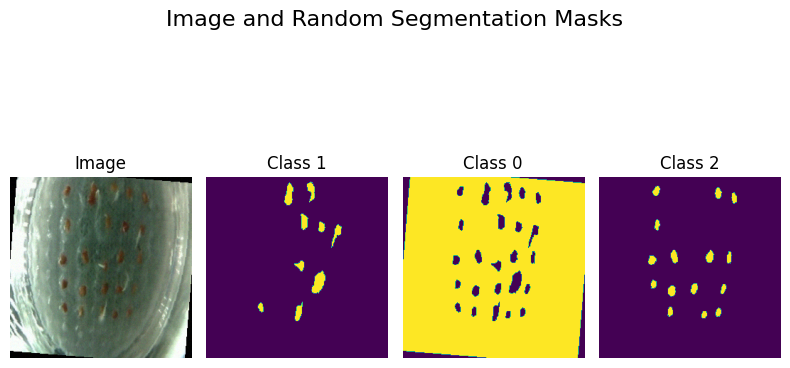

In [11]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

## ResNet34 backbone

### DICE Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "DICE"
config["Backbone"] = "resnet34"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-ResNet34-DICE"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 215MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_162146-iqujzho7
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-ResNet34-DICE
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/iqujzho7



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


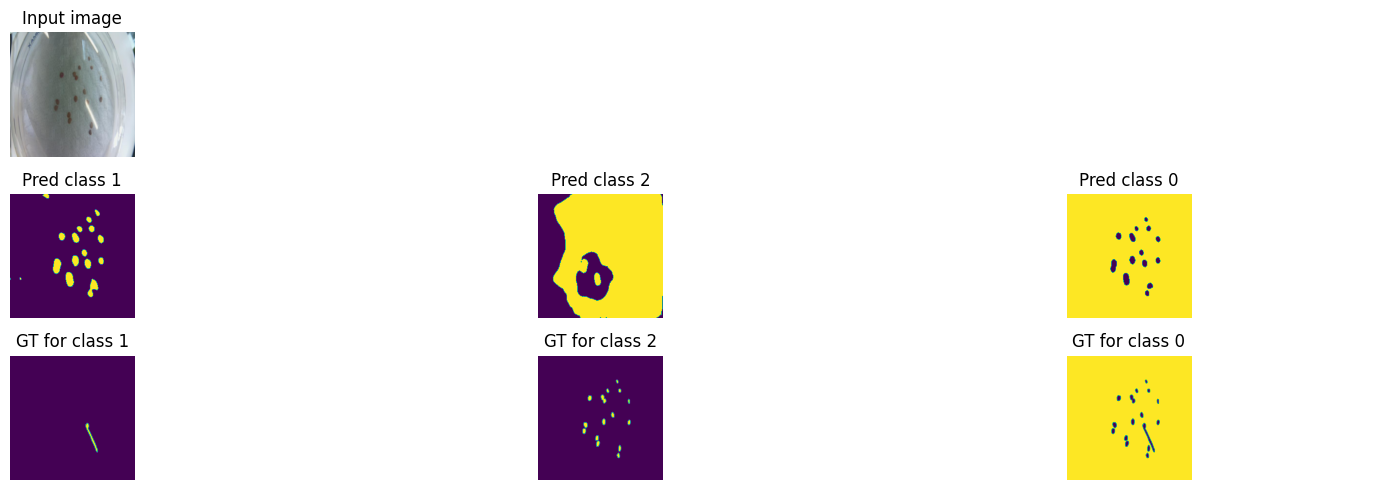

Train loss: 0.67367 | Time: 1m 4s | Val loss: 0.62714
Train_DICE_avg: 0.42940 | Train_Jaccard_avg: 0.37844 | Train_Sensitivity_avg: 0.40766 | Train_Specificity_avg: 0.81756 
Class 0 - Train_DICE: 0.94839 | Train_Jaccard: 0.90392 | Train_Sensitivity: 0.98780 | Train_Specificity: 0.45633 
Class 1 - Train_DICE: 0.07566 | Train_Jaccard: 0.04266 | Train_Sensitivity: 0.04403 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.26414 | Train_Jaccard: 0.18874 | Train_Sensitivity: 0.19115 | Train_Specificity: 0.99850 
Val_DICE_avg: 0.48032 | Val_Jaccard_avg: 0.44133 | Val_Sensitivity_avg: 0.44970 | Val_Specificity_avg: 0.89679 
Class 0 - Val_DICE: 0.98905 | Val_Jaccard: 0.97842 | Val_Sensitivity: 0.99597 | Val_Specificity: 0.69553 
Class 1 - Val_DICE: 0.12720 | Val_Jaccard: 0.07735 | Val_Sensitivity: 0.08286 | Val_Specificity: 0.99806 
Class 2 - Val_DICE: 0.32471 | Val_Jaccard: 0.26823 | Val_Sensitivity: 0.27028 | Val_Specificity: 0.99678 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.62604 | Time: 2m 6s | Val loss: 0.61279
Train_DICE_avg: 0.48667 | Train_Jaccard_avg: 0.44230 | Train_Sensitivity_avg: 0.45298 | Train_Specificity_avg: 0.90517 
Class 0 - Train_DICE: 0.98336 | Train_Jaccard: 0.96741 | Train_Sensitivity: 0.99083 | Train_Specificity: 0.71765 
Class 1 - Train_DICE: 0.12373 | Train_Jaccard: 0.07296 | Train_Sensitivity: 0.07542 | Train_Specificity: 0.99870 
Class 2 - Train_DICE: 0.35293 | Train_Jaccard: 0.28654 | Train_Sensitivity: 0.29269 | Train_Specificity: 0.99917 
Val_DICE_avg: 0.49571 | Val_Jaccard_avg: 0.46092 | Val_Sensitivity_avg: 0.46911 | Val_Specificity_avg: 0.92546 
Class 0 - Val_DICE: 0.99350 | Val_Jaccard: 0.98714 | Val_Sensitivity: 0.99576 | Val_Specificity: 0.78286 
Class 1 - Val_DICE: 0.12421 | Val_Jaccard: 0.07627 | Val_Sensitivity: 0.08049 | Val_Specificity: 0.99845 
Class 2 - Val_DICE: 0.36941 | Val_Jaccard: 0.31936 | Val_Sensitivity: 0.33108 | Val_Specificity: 0.99509 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.60782 | Time: 3m 7s | Val loss: 0.59261
Train_DICE_avg: 0.50064 | Train_Jaccard_avg: 0.45609 | Train_Sensitivity_avg: 0.46522 | Train_Specificity_avg: 0.92304 
Class 0 - Train_DICE: 0.98630 | Train_Jaccard: 0.97309 | Train_Sensitivity: 0.99054 | Train_Specificity: 0.77106 
Class 1 - Train_DICE: 0.13281 | Train_Jaccard: 0.07906 | Train_Sensitivity: 0.08126 | Train_Specificity: 0.99893 
Class 2 - Train_DICE: 0.38281 | Train_Jaccard: 0.31612 | Train_Sensitivity: 0.32386 | Train_Specificity: 0.99914 
Val_DICE_avg: 0.50925 | Val_Jaccard_avg: 0.47354 | Val_Sensitivity_avg: 0.48160 | Val_Specificity_avg: 0.91001 
Class 0 - Val_DICE: 0.99299 | Val_Jaccard: 0.98612 | Val_Sensitivity: 0.99615 | Val_Specificity: 0.73212 
Class 1 - Val_DICE: 0.12095 | Val_Jaccard: 0.07592 | Val_Sensitivity: 0.07888 | Val_Specificity: 0.99895 
Class 2 - Val_DICE: 0.41380 | Val_Jaccard: 0.35858 | Val_Sensitivity: 0.36977 | Val_Specificity: 0.99897 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.58870 | Time: 4m 9s | Val loss: 0.57746
Train_DICE_avg: 0.51310 | Train_Jaccard_avg: 0.46868 | Train_Sensitivity_avg: 0.47707 | Train_Specificity_avg: 0.93550 
Class 0 - Train_DICE: 0.98815 | Train_Jaccard: 0.97667 | Train_Sensitivity: 0.99001 | Train_Specificity: 0.80823 
Class 1 - Train_DICE: 0.14416 | Train_Jaccard: 0.08788 | Train_Sensitivity: 0.09014 | Train_Specificity: 0.99925 
Class 2 - Train_DICE: 0.40700 | Train_Jaccard: 0.34149 | Train_Sensitivity: 0.35107 | Train_Specificity: 0.99903 
Val_DICE_avg: 0.51513 | Val_Jaccard_avg: 0.47904 | Val_Sensitivity_avg: 0.48524 | Val_Specificity_avg: 0.93435 
Class 0 - Val_DICE: 0.99416 | Val_Jaccard: 0.98843 | Val_Sensitivity: 0.99560 | Val_Specificity: 0.80457 
Class 1 - Val_DICE: 0.13631 | Val_Jaccard: 0.08776 | Val_Sensitivity: 0.08978 | Val_Specificity: 0.99933 
Class 2 - Val_DICE: 0.41492 | Val_Jaccard: 0.36094 | Val_Sensitivity: 0.37033 | Val_Specificity: 0.99916 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.57210 | Time: 5m 10s | Val loss: 0.56550
Train_DICE_avg: 0.51971 | Train_Jaccard_avg: 0.47548 | Train_Sensitivity_avg: 0.48437 | Train_Specificity_avg: 0.94343 
Class 0 - Train_DICE: 0.98882 | Train_Jaccard: 0.97798 | Train_Sensitivity: 0.98914 | Train_Specificity: 0.83256 
Class 1 - Train_DICE: 0.15466 | Train_Jaccard: 0.09625 | Train_Sensitivity: 0.09925 | Train_Specificity: 0.99930 
Class 2 - Train_DICE: 0.41564 | Train_Jaccard: 0.35222 | Train_Sensitivity: 0.36473 | Train_Specificity: 0.99843 
Val_DICE_avg: 0.51509 | Val_Jaccard_avg: 0.47854 | Val_Sensitivity_avg: 0.48457 | Val_Specificity_avg: 0.95226 
Class 0 - Val_DICE: 0.99401 | Val_Jaccard: 0.98814 | Val_Sensitivity: 0.99468 | Val_Specificity: 0.85809 
Class 1 - Val_DICE: 0.14624 | Val_Jaccard: 0.09751 | Val_Sensitivity: 0.10279 | Val_Specificity: 0.99934 
Class 2 - Val_DICE: 0.40503 | Val_Jaccard: 0.34996 | Val_Sensitivity: 0.35625 | Val_Specificity: 0.99935 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


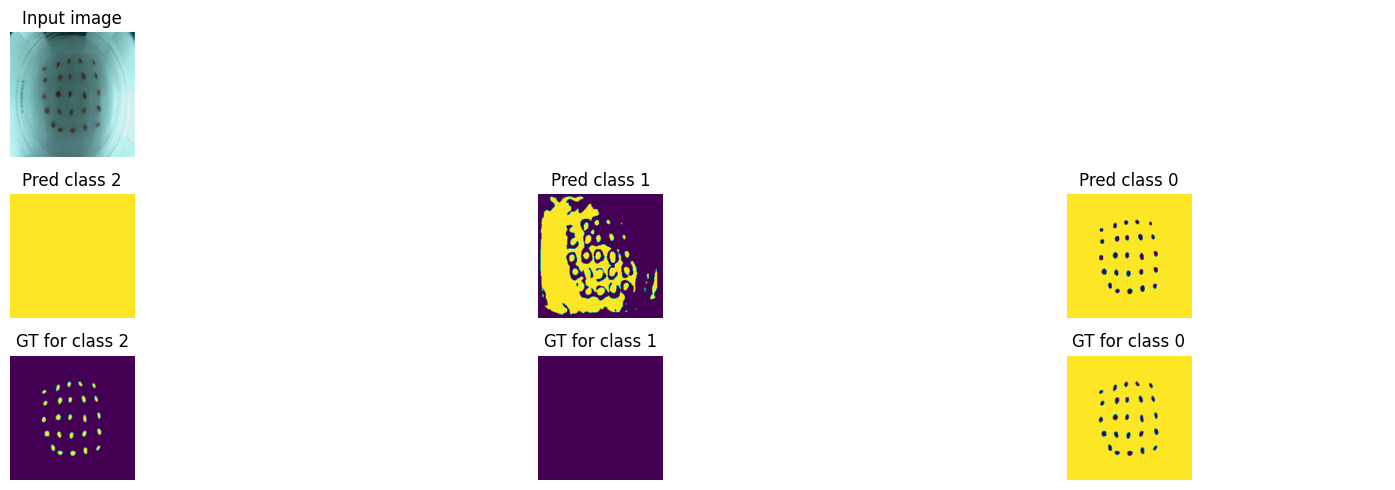

Train loss: 0.55673 | Time: 6m 13s | Val loss: 0.55073
Train_DICE_avg: 0.52947 | Train_Jaccard_avg: 0.48365 | Train_Sensitivity_avg: 0.49354 | Train_Specificity_avg: 0.94684 
Class 0 - Train_DICE: 0.98900 | Train_Jaccard: 0.97833 | Train_Sensitivity: 0.98837 | Train_Specificity: 0.84264 
Class 1 - Train_DICE: 0.16919 | Train_Jaccard: 0.10744 | Train_Sensitivity: 0.11234 | Train_Specificity: 0.99920 
Class 2 - Train_DICE: 0.43022 | Train_Jaccard: 0.36519 | Train_Sensitivity: 0.37991 | Train_Specificity: 0.99867 
Val_DICE_avg: 0.52972 | Val_Jaccard_avg: 0.49098 | Val_Sensitivity_avg: 0.49795 | Val_Specificity_avg: 0.95137 
Class 0 - Val_DICE: 0.99454 | Val_Jaccard: 0.98919 | Val_Sensitivity: 0.99473 | Val_Specificity: 0.85567 
Class 1 - Val_DICE: 0.17169 | Val_Jaccard: 0.11485 | Val_Sensitivity: 0.12447 | Val_Specificity: 0.99898 
Class 2 - Val_DICE: 0.42294 | Val_Jaccard: 0.36889 | Val_Sensitivity: 0.37466 | Val_Specificity: 0.99946 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.54015 | Time: 7m 14s | Val loss: 0.53183
Train_DICE_avg: 0.54417 | Train_Jaccard_avg: 0.49684 | Train_Sensitivity_avg: 0.50801 | Train_Specificity_avg: 0.95159 
Class 0 - Train_DICE: 0.98955 | Train_Jaccard: 0.97940 | Train_Sensitivity: 0.98812 | Train_Specificity: 0.85754 
Class 1 - Train_DICE: 0.19106 | Train_Jaccard: 0.12470 | Train_Sensitivity: 0.13338 | Train_Specificity: 0.99902 
Class 2 - Train_DICE: 0.45189 | Train_Jaccard: 0.38642 | Train_Sensitivity: 0.40255 | Train_Specificity: 0.99820 
Val_DICE_avg: 0.54577 | Val_Jaccard_avg: 0.50699 | Val_Sensitivity_avg: 0.51415 | Val_Specificity_avg: 0.95009 
Class 0 - Val_DICE: 0.99510 | Val_Jaccard: 0.99028 | Val_Sensitivity: 0.99583 | Val_Specificity: 0.85190 
Class 1 - Val_DICE: 0.17650 | Val_Jaccard: 0.12058 | Val_Sensitivity: 0.12661 | Val_Specificity: 0.99920 
Class 2 - Val_DICE: 0.46571 | Val_Jaccard: 0.41010 | Val_Sensitivity: 0.41999 | Val_Specificity: 0.99918 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.52079 | Time: 8m 15s | Val loss: 0.52865
Train_DICE_avg: 0.56400 | Train_Jaccard_avg: 0.51485 | Train_Sensitivity_avg: 0.52788 | Train_Specificity_avg: 0.95699 
Class 0 - Train_DICE: 0.99001 | Train_Jaccard: 0.98029 | Train_Sensitivity: 0.98775 | Train_Specificity: 0.87364 
Class 1 - Train_DICE: 0.22507 | Train_Jaccard: 0.15333 | Train_Sensitivity: 0.16660 | Train_Specificity: 0.99883 
Class 2 - Train_DICE: 0.47692 | Train_Jaccard: 0.41093 | Train_Sensitivity: 0.42929 | Train_Specificity: 0.99849 
Val_DICE_avg: 0.54284 | Val_Jaccard_avg: 0.50444 | Val_Sensitivity_avg: 0.51550 | Val_Specificity_avg: 0.95879 
Class 0 - Val_DICE: 0.99505 | Val_Jaccard: 0.99018 | Val_Sensitivity: 0.99480 | Val_Specificity: 0.87862 
Class 1 - Val_DICE: 0.20787 | Val_Jaccard: 0.15155 | Val_Sensitivity: 0.17404 | Val_Specificity: 0.99829 
Class 2 - Val_DICE: 0.42559 | Val_Jaccard: 0.37159 | Val_Sensitivity: 0.37767 | Val_Specificity: 0.99945 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.50560 | Time: 9m 16s | Val loss: 0.50508
Train_DICE_avg: 0.56821 | Train_Jaccard_avg: 0.51874 | Train_Sensitivity_avg: 0.53497 | Train_Specificity_avg: 0.95677 
Class 0 - Train_DICE: 0.98982 | Train_Jaccard: 0.97993 | Train_Sensitivity: 0.98720 | Train_Specificity: 0.87371 
Class 1 - Train_DICE: 0.24696 | Train_Jaccard: 0.17278 | Train_Sensitivity: 0.19288 | Train_Specificity: 0.99853 
Class 2 - Train_DICE: 0.46787 | Train_Jaccard: 0.40351 | Train_Sensitivity: 0.42482 | Train_Specificity: 0.99807 
Val_DICE_avg: 0.56586 | Val_Jaccard_avg: 0.52638 | Val_Sensitivity_avg: 0.54980 | Val_Specificity_avg: 0.94406 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99005 | Val_Sensitivity: 0.99544 | Val_Specificity: 0.83563 
Class 1 - Val_DICE: 0.23163 | Val_Jaccard: 0.17116 | Val_Sensitivity: 0.22420 | Val_Specificity: 0.99746 
Class 2 - Val_DICE: 0.47097 | Val_Jaccard: 0.41793 | Val_Sensitivity: 0.42975 | Val_Specificity: 0.99908 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.48702 | Time: 10m 17s | Val loss: 0.48786
Train_DICE_avg: 0.58679 | Train_Jaccard_avg: 0.53559 | Train_Sensitivity_avg: 0.55465 | Train_Specificity_avg: 0.96114 
Class 0 - Train_DICE: 0.99013 | Train_Jaccard: 0.98053 | Train_Sensitivity: 0.98690 | Train_Specificity: 0.88681 
Class 1 - Train_DICE: 0.26034 | Train_Jaccard: 0.18516 | Train_Sensitivity: 0.21270 | Train_Specificity: 0.99838 
Class 2 - Train_DICE: 0.50990 | Train_Jaccard: 0.44107 | Train_Sensitivity: 0.46434 | Train_Specificity: 0.99824 
Val_DICE_avg: 0.57755 | Val_Jaccard_avg: 0.53824 | Val_Sensitivity_avg: 0.55420 | Val_Specificity_avg: 0.96326 
Class 0 - Val_DICE: 0.99545 | Val_Jaccard: 0.99098 | Val_Sensitivity: 0.99441 | Val_Specificity: 0.89286 
Class 1 - Val_DICE: 0.24670 | Val_Jaccard: 0.18569 | Val_Sensitivity: 0.21233 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.49049 | Val_Jaccard: 0.43806 | Val_Sensitivity: 0.45585 | Val_Specificity: 0.99877 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


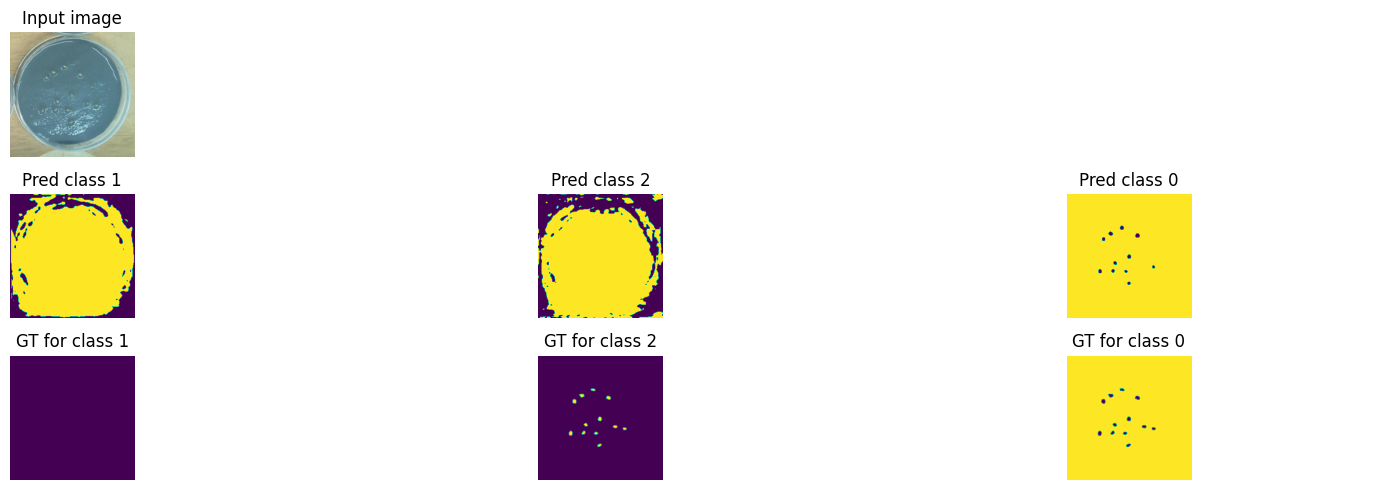

Train loss: 0.46606 | Time: 11m 22s | Val loss: 0.48193
Train_DICE_avg: 0.60893 | Train_Jaccard_avg: 0.55568 | Train_Sensitivity_avg: 0.57743 | Train_Specificity_avg: 0.96209 
Class 0 - Train_DICE: 0.99037 | Train_Jaccard: 0.98101 | Train_Sensitivity: 0.98679 | Train_Specificity: 0.89000 
Class 1 - Train_DICE: 0.28657 | Train_Jaccard: 0.21129 | Train_Sensitivity: 0.24396 | Train_Specificity: 0.99821 
Class 2 - Train_DICE: 0.54984 | Train_Jaccard: 0.47474 | Train_Sensitivity: 0.50154 | Train_Specificity: 0.99806 
Val_DICE_avg: 0.58216 | Val_Jaccard_avg: 0.54095 | Val_Sensitivity_avg: 0.55295 | Val_Specificity_avg: 0.94885 
Class 0 - Val_DICE: 0.99561 | Val_Jaccard: 0.99128 | Val_Sensitivity: 0.99597 | Val_Specificity: 0.84892 
Class 1 - Val_DICE: 0.23293 | Val_Jaccard: 0.17506 | Val_Sensitivity: 0.19023 | Val_Specificity: 0.99882 
Class 2 - Val_DICE: 0.51795 | Val_Jaccard: 0.45651 | Val_Sensitivity: 0.47265 | Val_Specificity: 0.99882 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.45292 | Time: 12m 29s | Val loss: 0.46865
Train_DICE_avg: 0.62637 | Train_Jaccard_avg: 0.56963 | Train_Sensitivity_avg: 0.59256 | Train_Specificity_avg: 0.96490 
Class 0 - Train_DICE: 0.99034 | Train_Jaccard: 0.98096 | Train_Sensitivity: 0.98634 | Train_Specificity: 0.89848 
Class 1 - Train_DICE: 0.29851 | Train_Jaccard: 0.22202 | Train_Sensitivity: 0.25679 | Train_Specificity: 0.99819 
Class 2 - Train_DICE: 0.59025 | Train_Jaccard: 0.50592 | Train_Sensitivity: 0.53455 | Train_Specificity: 0.99803 
Val_DICE_avg: 0.61087 | Val_Jaccard_avg: 0.56233 | Val_Sensitivity_avg: 0.57863 | Val_Specificity_avg: 0.95130 
Class 0 - Val_DICE: 0.99542 | Val_Jaccard: 0.99091 | Val_Sensitivity: 0.99548 | Val_Specificity: 0.85657 
Class 1 - Val_DICE: 0.26711 | Val_Jaccard: 0.20284 | Val_Sensitivity: 0.23252 | Val_Specificity: 0.99831 
Class 2 - Val_DICE: 0.57008 | Val_Jaccard: 0.49325 | Val_Sensitivity: 0.50788 | Val_Specificity: 0.99903 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.43847 | Time: 13m 35s | Val loss: 0.45791
Train_DICE_avg: 0.64439 | Train_Jaccard_avg: 0.58498 | Train_Sensitivity_avg: 0.61030 | Train_Specificity_avg: 0.96546 
Class 0 - Train_DICE: 0.99014 | Train_Jaccard: 0.98056 | Train_Sensitivity: 0.98575 | Train_Specificity: 0.90047 
Class 1 - Train_DICE: 0.31465 | Train_Jaccard: 0.23729 | Train_Sensitivity: 0.27693 | Train_Specificity: 0.99813 
Class 2 - Train_DICE: 0.62837 | Train_Jaccard: 0.53710 | Train_Sensitivity: 0.56821 | Train_Specificity: 0.99777 
Val_DICE_avg: 0.63337 | Val_Jaccard_avg: 0.58128 | Val_Sensitivity_avg: 0.60356 | Val_Specificity_avg: 0.94564 
Class 0 - Val_DICE: 0.99540 | Val_Jaccard: 0.99088 | Val_Sensitivity: 0.99522 | Val_Specificity: 0.84055 
Class 1 - Val_DICE: 0.27774 | Val_Jaccard: 0.21268 | Val_Sensitivity: 0.24412 | Val_Specificity: 0.99834 
Class 2 - Val_DICE: 0.62697 | Val_Jaccard: 0.54027 | Val_Sensitivity: 0.57134 | Val_Specificity: 0.99804 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.42574 | Time: 14m 41s | Val loss: 0.44452
Train_DICE_avg: 0.66592 | Train_Jaccard_avg: 0.60230 | Train_Sensitivity_avg: 0.62999 | Train_Specificity_avg: 0.96600 
Class 0 - Train_DICE: 0.99025 | Train_Jaccard: 0.98077 | Train_Sensitivity: 0.98578 | Train_Specificity: 0.90231 
Class 1 - Train_DICE: 0.32106 | Train_Jaccard: 0.24239 | Train_Sensitivity: 0.28584 | Train_Specificity: 0.99801 
Class 2 - Train_DICE: 0.68644 | Train_Jaccard: 0.58373 | Train_Sensitivity: 0.61836 | Train_Specificity: 0.99767 
Val_DICE_avg: 0.65793 | Val_Jaccard_avg: 0.59929 | Val_Sensitivity_avg: 0.62168 | Val_Specificity_avg: 0.95237 
Class 0 - Val_DICE: 0.99583 | Val_Jaccard: 0.99172 | Val_Sensitivity: 0.99568 | Val_Specificity: 0.86078 
Class 1 - Val_DICE: 0.29023 | Val_Jaccard: 0.22116 | Val_Sensitivity: 0.24539 | Val_Specificity: 0.99856 
Class 2 - Val_DICE: 0.68774 | Val_Jaccard: 0.58499 | Val_Sensitivity: 0.62398 | Val_Specificity: 0.99776 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.41182 | Time: 15m 46s | Val loss: 0.43446
Train_DICE_avg: 0.67971 | Train_Jaccard_avg: 0.61481 | Train_Sensitivity_avg: 0.64417 | Train_Specificity_avg: 0.96531 
Class 0 - Train_DICE: 0.99038 | Train_Jaccard: 0.98103 | Train_Sensitivity: 0.98586 | Train_Specificity: 0.90042 
Class 1 - Train_DICE: 0.33056 | Train_Jaccard: 0.25126 | Train_Sensitivity: 0.29707 | Train_Specificity: 0.99800 
Class 2 - Train_DICE: 0.71818 | Train_Jaccard: 0.61214 | Train_Sensitivity: 0.64957 | Train_Specificity: 0.99752 
Val_DICE_avg: 0.67831 | Val_Jaccard_avg: 0.62137 | Val_Sensitivity_avg: 0.65207 | Val_Specificity_avg: 0.95118 
Class 0 - Val_DICE: 0.99579 | Val_Jaccard: 0.99164 | Val_Sensitivity: 0.99565 | Val_Specificity: 0.85742 
Class 1 - Val_DICE: 0.32837 | Val_Jaccard: 0.26363 | Val_Sensitivity: 0.33470 | Val_Specificity: 0.99744 
Class 2 - Val_DICE: 0.71078 | Val_Jaccard: 0.60884 | Val_Sensitivity: 0.62587 | Val_Specificity: 0.99867 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


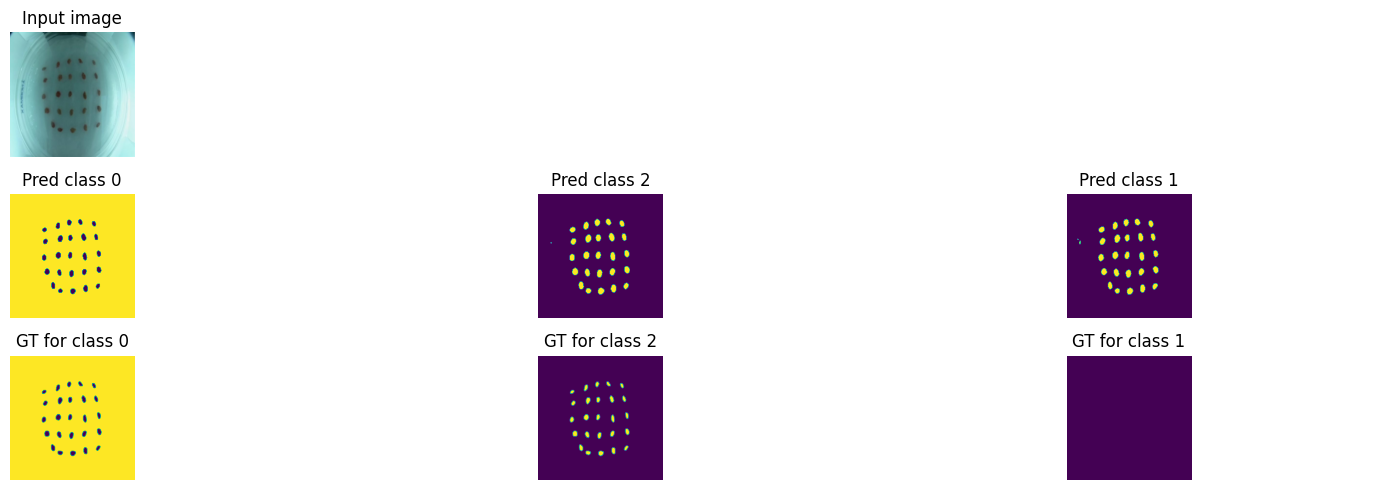

Train loss: 0.39642 | Time: 16m 53s | Val loss: 0.42212
Train_DICE_avg: 0.69009 | Train_Jaccard_avg: 0.62606 | Train_Sensitivity_avg: 0.65773 | Train_Specificity_avg: 0.96725 
Class 0 - Train_DICE: 0.99014 | Train_Jaccard: 0.98056 | Train_Sensitivity: 0.98501 | Train_Specificity: 0.90637 
Class 1 - Train_DICE: 0.33632 | Train_Jaccard: 0.25712 | Train_Sensitivity: 0.30830 | Train_Specificity: 0.99793 
Class 2 - Train_DICE: 0.74383 | Train_Jaccard: 0.64049 | Train_Sensitivity: 0.67986 | Train_Specificity: 0.99746 
Val_DICE_avg: 0.68224 | Val_Jaccard_avg: 0.62438 | Val_Sensitivity_avg: 0.64898 | Val_Specificity_avg: 0.94851 
Class 0 - Val_DICE: 0.99560 | Val_Jaccard: 0.99126 | Val_Sensitivity: 0.99512 | Val_Specificity: 0.84941 
Class 1 - Val_DICE: 0.30967 | Val_Jaccard: 0.24170 | Val_Sensitivity: 0.27994 | Val_Specificity: 0.99816 
Class 2 - Val_DICE: 0.74145 | Val_Jaccard: 0.64018 | Val_Sensitivity: 0.67187 | Val_Specificity: 0.99797 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.38212 | Time: 17m 59s | Val loss: 0.40132
Train_DICE_avg: 0.69861 | Train_Jaccard_avg: 0.63515 | Train_Sensitivity_avg: 0.66840 | Train_Specificity_avg: 0.96751 
Class 0 - Train_DICE: 0.99035 | Train_Jaccard: 0.98097 | Train_Sensitivity: 0.98553 | Train_Specificity: 0.90730 
Class 1 - Train_DICE: 0.34575 | Train_Jaccard: 0.26532 | Train_Sensitivity: 0.31684 | Train_Specificity: 0.99795 
Class 2 - Train_DICE: 0.75972 | Train_Jaccard: 0.65915 | Train_Sensitivity: 0.70282 | Train_Specificity: 0.99729 
Val_DICE_avg: 0.69818 | Val_Jaccard_avg: 0.64131 | Val_Sensitivity_avg: 0.66447 | Val_Specificity_avg: 0.96113 
Class 0 - Val_DICE: 0.99603 | Val_Jaccard: 0.99212 | Val_Sensitivity: 0.99529 | Val_Specificity: 0.88718 
Class 1 - Val_DICE: 0.31492 | Val_Jaccard: 0.24542 | Val_Sensitivity: 0.27591 | Val_Specificity: 0.99850 
Class 2 - Val_DICE: 0.78358 | Val_Jaccard: 0.68641 | Val_Sensitivity: 0.72222 | Val_Specificity: 0.99770 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.36862 | Time: 19m 5s | Val loss: 0.37647
Train_DICE_avg: 0.70468 | Train_Jaccard_avg: 0.64186 | Train_Sensitivity_avg: 0.67825 | Train_Specificity_avg: 0.96709 
Class 0 - Train_DICE: 0.99062 | Train_Jaccard: 0.98150 | Train_Sensitivity: 0.98615 | Train_Specificity: 0.90629 
Class 1 - Train_DICE: 0.35218 | Train_Jaccard: 0.27093 | Train_Sensitivity: 0.32826 | Train_Specificity: 0.99781 
Class 2 - Train_DICE: 0.77122 | Train_Jaccard: 0.67317 | Train_Sensitivity: 0.72035 | Train_Specificity: 0.99716 
Val_DICE_avg: 0.70608 | Val_Jaccard_avg: 0.65140 | Val_Sensitivity_avg: 0.67872 | Val_Specificity_avg: 0.94952 
Class 0 - Val_DICE: 0.99598 | Val_Jaccard: 0.99201 | Val_Sensitivity: 0.99610 | Val_Specificity: 0.85253 
Class 1 - Val_DICE: 0.33493 | Val_Jaccard: 0.26462 | Val_Sensitivity: 0.30487 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.78732 | Val_Jaccard: 0.69756 | Val_Sensitivity: 0.73521 | Val_Specificity: 0.99780 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.35312 | Time: 20m 11s | Val loss: 0.35847
Train_DICE_avg: 0.71539 | Train_Jaccard_avg: 0.65305 | Train_Sensitivity_avg: 0.69013 | Train_Specificity_avg: 0.96646 
Class 0 - Train_DICE: 0.99055 | Train_Jaccard: 0.98136 | Train_Sensitivity: 0.98616 | Train_Specificity: 0.90443 
Class 1 - Train_DICE: 0.36441 | Train_Jaccard: 0.28229 | Train_Sensitivity: 0.33898 | Train_Specificity: 0.99786 
Class 2 - Train_DICE: 0.79122 | Train_Jaccard: 0.69551 | Train_Sensitivity: 0.74523 | Train_Specificity: 0.99710 
Val_DICE_avg: 0.72380 | Val_Jaccard_avg: 0.67050 | Val_Sensitivity_avg: 0.70528 | Val_Specificity_avg: 0.95910 
Class 0 - Val_DICE: 0.99623 | Val_Jaccard: 0.99251 | Val_Sensitivity: 0.99600 | Val_Specificity: 0.88192 
Class 1 - Val_DICE: 0.34502 | Val_Jaccard: 0.27502 | Val_Sensitivity: 0.33094 | Val_Specificity: 0.99791 
Class 2 - Val_DICE: 0.83014 | Val_Jaccard: 0.74397 | Val_Sensitivity: 0.78890 | Val_Specificity: 0.99747 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.34078 | Time: 21m 17s | Val loss: 0.34374
Train_DICE_avg: 0.71893 | Train_Jaccard_avg: 0.65624 | Train_Sensitivity_avg: 0.69739 | Train_Specificity_avg: 0.96650 
Class 0 - Train_DICE: 0.99040 | Train_Jaccard: 0.98106 | Train_Sensitivity: 0.98579 | Train_Specificity: 0.90491 
Class 1 - Train_DICE: 0.36608 | Train_Jaccard: 0.28389 | Train_Sensitivity: 0.34575 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.80031 | Train_Jaccard: 0.70377 | Train_Sensitivity: 0.76063 | Train_Specificity: 0.99678 
Val_DICE_avg: 0.72418 | Val_Jaccard_avg: 0.67015 | Val_Sensitivity_avg: 0.70573 | Val_Specificity_avg: 0.95697 
Class 0 - Val_DICE: 0.99615 | Val_Jaccard: 0.99236 | Val_Sensitivity: 0.99559 | Val_Specificity: 0.87596 
Class 1 - Val_DICE: 0.34182 | Val_Jaccard: 0.26981 | Val_Sensitivity: 0.31725 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.83455 | Val_Jaccard: 0.74828 | Val_Sensitivity: 0.80434 | Val_Specificity: 0.99691 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


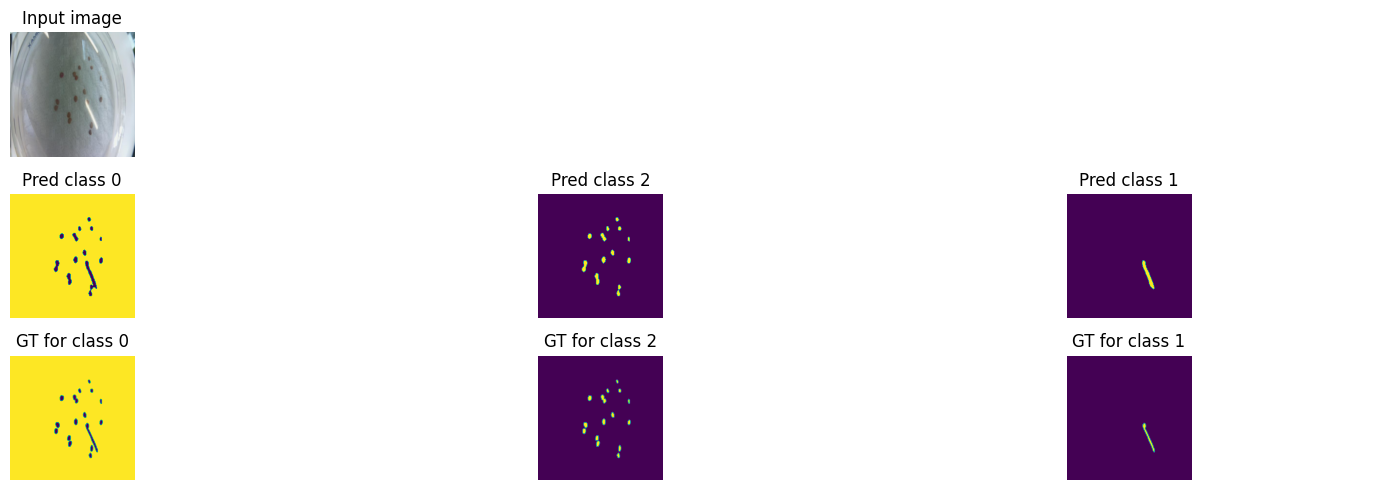

Train loss: 0.32920 | Time: 22m 24s | Val loss: 0.32647
Train_DICE_avg: 0.72739 | Train_Jaccard_avg: 0.66466 | Train_Sensitivity_avg: 0.70841 | Train_Specificity_avg: 0.96721 
Class 0 - Train_DICE: 0.99058 | Train_Jaccard: 0.98142 | Train_Sensitivity: 0.98600 | Train_Specificity: 0.90708 
Class 1 - Train_DICE: 0.37531 | Train_Jaccard: 0.29244 | Train_Sensitivity: 0.36139 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.81627 | Train_Jaccard: 0.72012 | Train_Sensitivity: 0.77783 | Train_Specificity: 0.99683 
Val_DICE_avg: 0.73047 | Val_Jaccard_avg: 0.67751 | Val_Sensitivity_avg: 0.71763 | Val_Specificity_avg: 0.96043 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99248 | Val_Sensitivity: 0.99574 | Val_Specificity: 0.88641 
Class 1 - Val_DICE: 0.33827 | Val_Jaccard: 0.26616 | Val_Sensitivity: 0.32505 | Val_Specificity: 0.99770 
Class 2 - Val_DICE: 0.85694 | Val_Jaccard: 0.77387 | Val_Sensitivity: 0.83209 | Val_Specificity: 0.99716 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.31402 | Time: 23m 30s | Val loss: 0.31117
Train_DICE_avg: 0.73644 | Train_Jaccard_avg: 0.67296 | Train_Sensitivity_avg: 0.71935 | Train_Specificity_avg: 0.97005 
Class 0 - Train_DICE: 0.99065 | Train_Jaccard: 0.98157 | Train_Sensitivity: 0.98583 | Train_Specificity: 0.91573 
Class 1 - Train_DICE: 0.37938 | Train_Jaccard: 0.29570 | Train_Sensitivity: 0.36704 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.83930 | Train_Jaccard: 0.74160 | Train_Sensitivity: 0.80518 | Train_Specificity: 0.99674 
Val_DICE_avg: 0.73937 | Val_Jaccard_avg: 0.68598 | Val_Sensitivity_avg: 0.72474 | Val_Specificity_avg: 0.95643 
Class 0 - Val_DICE: 0.99628 | Val_Jaccard: 0.99261 | Val_Sensitivity: 0.99641 | Val_Specificity: 0.87399 
Class 1 - Val_DICE: 0.34567 | Val_Jaccard: 0.27348 | Val_Sensitivity: 0.32391 | Val_Specificity: 0.99796 
Class 2 - Val_DICE: 0.87617 | Val_Jaccard: 0.79184 | Val_Sensitivity: 0.85390 | Val_Specificity: 0.99732 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.29926 | Time: 24m 36s | Val loss: 0.29768
Train_DICE_avg: 0.74404 | Train_Jaccard_avg: 0.68050 | Train_Sensitivity_avg: 0.73056 | Train_Specificity_avg: 0.96935 
Class 0 - Train_DICE: 0.99073 | Train_Jaccard: 0.98172 | Train_Sensitivity: 0.98611 | Train_Specificity: 0.91380 
Class 1 - Train_DICE: 0.38564 | Train_Jaccard: 0.30108 | Train_Sensitivity: 0.37479 | Train_Specificity: 0.99767 
Class 2 - Train_DICE: 0.85575 | Train_Jaccard: 0.75871 | Train_Sensitivity: 0.83078 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.76318 | Val_Jaccard_avg: 0.70957 | Val_Sensitivity_avg: 0.75708 | Val_Specificity_avg: 0.95662 
Class 0 - Val_DICE: 0.99614 | Val_Jaccard: 0.99234 | Val_Sensitivity: 0.99606 | Val_Specificity: 0.87460 
Class 1 - Val_DICE: 0.41659 | Val_Jaccard: 0.34430 | Val_Sensitivity: 0.43172 | Val_Specificity: 0.99750 
Class 2 - Val_DICE: 0.87679 | Val_Jaccard: 0.79209 | Val_Sensitivity: 0.84345 | Val_Specificity: 0.99776 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.28869 | Time: 25m 42s | Val loss: 0.28836
Train_DICE_avg: 0.74860 | Train_Jaccard_avg: 0.68592 | Train_Sensitivity_avg: 0.73842 | Train_Specificity_avg: 0.97042 
Class 0 - Train_DICE: 0.99083 | Train_Jaccard: 0.98190 | Train_Sensitivity: 0.98617 | Train_Specificity: 0.91701 
Class 1 - Train_DICE: 0.39640 | Train_Jaccard: 0.31326 | Train_Sensitivity: 0.39104 | Train_Specificity: 0.99767 
Class 2 - Train_DICE: 0.85858 | Train_Jaccard: 0.76259 | Train_Sensitivity: 0.83805 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.75018 | Val_Jaccard_avg: 0.69894 | Val_Sensitivity_avg: 0.74552 | Val_Specificity_avg: 0.96212 
Class 0 - Val_DICE: 0.99635 | Val_Jaccard: 0.99275 | Val_Sensitivity: 0.99612 | Val_Specificity: 0.89143 
Class 1 - Val_DICE: 0.36819 | Val_Jaccard: 0.29862 | Val_Sensitivity: 0.35296 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.88598 | Val_Jaccard: 0.80547 | Val_Sensitivity: 0.88747 | Val_Specificity: 0.99690 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.28129 | Time: 26m 49s | Val loss: 0.28529
Train_DICE_avg: 0.75275 | Train_Jaccard_avg: 0.68998 | Train_Sensitivity_avg: 0.74431 | Train_Specificity_avg: 0.96998 
Class 0 - Train_DICE: 0.99118 | Train_Jaccard: 0.98259 | Train_Sensitivity: 0.98713 | Train_Specificity: 0.91579 
Class 1 - Train_DICE: 0.40566 | Train_Jaccard: 0.32116 | Train_Sensitivity: 0.40140 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.86140 | Train_Jaccard: 0.76620 | Train_Sensitivity: 0.84441 | Train_Specificity: 0.99650 
Val_DICE_avg: 0.77002 | Val_Jaccard_avg: 0.71815 | Val_Sensitivity_avg: 0.77076 | Val_Specificity_avg: 0.95872 
Class 0 - Val_DICE: 0.99632 | Val_Jaccard: 0.99269 | Val_Sensitivity: 0.99649 | Val_Specificity: 0.88129 
Class 1 - Val_DICE: 0.43916 | Val_Jaccard: 0.36710 | Val_Sensitivity: 0.42928 | Val_Specificity: 0.99808 
Class 2 - Val_DICE: 0.87459 | Val_Jaccard: 0.79465 | Val_Sensitivity: 0.88649 | Val_Specificity: 0.99677 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]


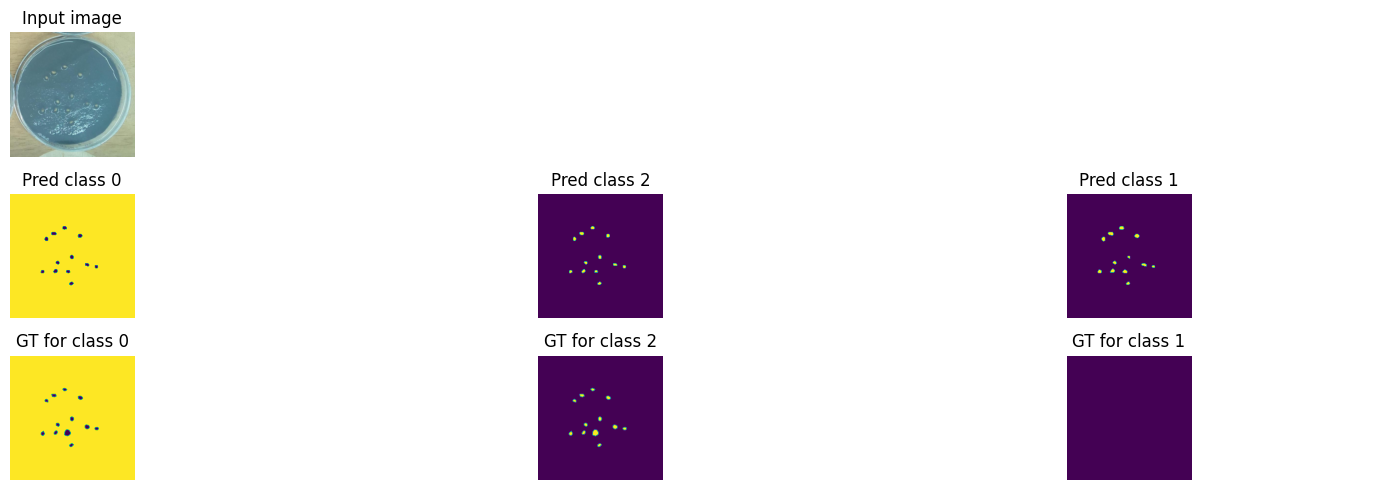

Train loss: 0.27746 | Time: 27m 56s | Val loss: 0.27914
Train_DICE_avg: 0.75412 | Train_Jaccard_avg: 0.69142 | Train_Sensitivity_avg: 0.74800 | Train_Specificity_avg: 0.96916 
Class 0 - Train_DICE: 0.99118 | Train_Jaccard: 0.98259 | Train_Sensitivity: 0.98729 | Train_Specificity: 0.91336 
Class 1 - Train_DICE: 0.40965 | Train_Jaccard: 0.32511 | Train_Sensitivity: 0.41142 | Train_Specificity: 0.99759 
Class 2 - Train_DICE: 0.86153 | Train_Jaccard: 0.76655 | Train_Sensitivity: 0.84528 | Train_Specificity: 0.99651 
Val_DICE_avg: 0.75369 | Val_Jaccard_avg: 0.70170 | Val_Sensitivity_avg: 0.75856 | Val_Specificity_avg: 0.96485 
Class 0 - Val_DICE: 0.99633 | Val_Jaccard: 0.99271 | Val_Sensitivity: 0.99565 | Val_Specificity: 0.90019 
Class 1 - Val_DICE: 0.38075 | Val_Jaccard: 0.31065 | Val_Sensitivity: 0.38046 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.88398 | Val_Jaccard: 0.80173 | Val_Sensitivity: 0.89958 | Val_Specificity: 0.99644 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.27327 | Time: 29m 2s | Val loss: 0.27920
Train_DICE_avg: 0.75415 | Train_Jaccard_avg: 0.69179 | Train_Sensitivity_avg: 0.74919 | Train_Specificity_avg: 0.96911 
Class 0 - Train_DICE: 0.99123 | Train_Jaccard: 0.98268 | Train_Sensitivity: 0.98748 | Train_Specificity: 0.91333 
Class 1 - Train_DICE: 0.40866 | Train_Jaccard: 0.32498 | Train_Sensitivity: 0.41010 | Train_Specificity: 0.99766 
Class 2 - Train_DICE: 0.86256 | Train_Jaccard: 0.76770 | Train_Sensitivity: 0.85000 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.75181 | Val_Jaccard_avg: 0.70054 | Val_Sensitivity_avg: 0.75726 | Val_Specificity_avg: 0.96594 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99585 | Val_Specificity: 0.90334 
Class 1 - Val_DICE: 0.37279 | Val_Jaccard: 0.30227 | Val_Sensitivity: 0.39290 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.88622 | Val_Jaccard: 0.80645 | Val_Sensitivity: 0.88304 | Val_Specificity: 0.99695 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.27115 | Time: 30m 8s | Val loss: 0.27286
Train_DICE_avg: 0.75531 | Train_Jaccard_avg: 0.69321 | Train_Sensitivity_avg: 0.75146 | Train_Specificity_avg: 0.96845 
Class 0 - Train_DICE: 0.99149 | Train_Jaccard: 0.98320 | Train_Sensitivity: 0.98825 | Train_Specificity: 0.91137 
Class 1 - Train_DICE: 0.41076 | Train_Jaccard: 0.32680 | Train_Sensitivity: 0.41552 | Train_Specificity: 0.99760 
Class 2 - Train_DICE: 0.86368 | Train_Jaccard: 0.76962 | Train_Sensitivity: 0.85060 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.75449 | Val_Jaccard_avg: 0.70322 | Val_Sensitivity_avg: 0.75887 | Val_Specificity_avg: 0.96393 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99292 | Val_Sensitivity: 0.99648 | Val_Specificity: 0.89694 
Class 1 - Val_DICE: 0.37953 | Val_Jaccard: 0.30922 | Val_Sensitivity: 0.38139 | Val_Specificity: 0.99783 
Class 2 - Val_DICE: 0.88750 | Val_Jaccard: 0.80751 | Val_Sensitivity: 0.89875 | Val_Specificity: 0.99700 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.26525 | Time: 31m 14s | Val loss: 0.26754
Train_DICE_avg: 0.76135 | Train_Jaccard_avg: 0.69955 | Train_Sensitivity_avg: 0.75883 | Train_Specificity_avg: 0.96819 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98300 | Train_Sensitivity: 0.98815 | Train_Specificity: 0.91050 
Class 1 - Train_DICE: 0.42607 | Train_Jaccard: 0.34190 | Train_Sensitivity: 0.43281 | Train_Specificity: 0.99761 
Class 2 - Train_DICE: 0.86659 | Train_Jaccard: 0.77376 | Train_Sensitivity: 0.85554 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.79067 | Val_Jaccard_avg: 0.73945 | Val_Sensitivity_avg: 0.78528 | Val_Specificity_avg: 0.95432 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99250 | Val_Sensitivity: 0.99673 | Val_Specificity: 0.86754 
Class 1 - Val_DICE: 0.49053 | Val_Jaccard: 0.42163 | Val_Sensitivity: 0.49319 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.88526 | Val_Jaccard: 0.80423 | Val_Sensitivity: 0.86592 | Val_Specificity: 0.99752 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.26394 | Time: 32m 19s | Val loss: 0.26665
Train_DICE_avg: 0.76280 | Train_Jaccard_avg: 0.70183 | Train_Sensitivity_avg: 0.76030 | Train_Specificity_avg: 0.96749 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98373 | Train_Sensitivity: 0.98883 | Train_Specificity: 0.90847 
Class 1 - Train_DICE: 0.42954 | Train_Jaccard: 0.34738 | Train_Sensitivity: 0.43601 | Train_Specificity: 0.99763 
Class 2 - Train_DICE: 0.86709 | Train_Jaccard: 0.77437 | Train_Sensitivity: 0.85607 | Train_Specificity: 0.99638 
Val_DICE_avg: 0.76341 | Val_Jaccard_avg: 0.71341 | Val_Sensitivity_avg: 0.75620 | Val_Specificity_avg: 0.95337 
Class 0 - Val_DICE: 0.99626 | Val_Jaccard: 0.99257 | Val_Sensitivity: 0.99710 | Val_Specificity: 0.86428 
Class 1 - Val_DICE: 0.40286 | Val_Jaccard: 0.33444 | Val_Sensitivity: 0.40334 | Val_Specificity: 0.99800 
Class 2 - Val_DICE: 0.89109 | Val_Jaccard: 0.81323 | Val_Sensitivity: 0.86816 | Val_Specificity: 0.99782 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


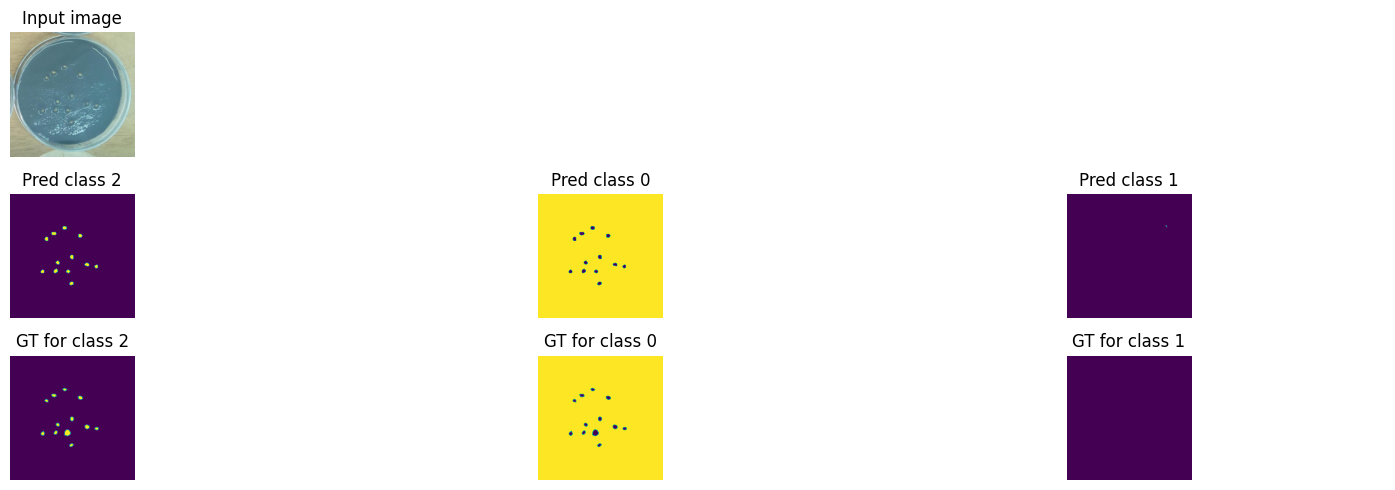

Train loss: 0.26161 | Time: 33m 26s | Val loss: 0.26661
Train_DICE_avg: 0.76391 | Train_Jaccard_avg: 0.70229 | Train_Sensitivity_avg: 0.76126 | Train_Specificity_avg: 0.96731 
Class 0 - Train_DICE: 0.99174 | Train_Jaccard: 0.98369 | Train_Sensitivity: 0.98900 | Train_Specificity: 0.90786 
Class 1 - Train_DICE: 0.43421 | Train_Jaccard: 0.35057 | Train_Sensitivity: 0.43918 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.86577 | Train_Jaccard: 0.77262 | Train_Sensitivity: 0.85559 | Train_Specificity: 0.99638 
Val_DICE_avg: 0.80830 | Val_Jaccard_avg: 0.75774 | Val_Sensitivity_avg: 0.80955 | Val_Specificity_avg: 0.95039 
Class 0 - Val_DICE: 0.99608 | Val_Jaccard: 0.99221 | Val_Sensitivity: 0.99730 | Val_Specificity: 0.85540 
Class 1 - Val_DICE: 0.54364 | Val_Jaccard: 0.47695 | Val_Sensitivity: 0.57277 | Val_Specificity: 0.99791 
Class 2 - Val_DICE: 0.88518 | Val_Jaccard: 0.80406 | Val_Sensitivity: 0.85858 | Val_Specificity: 0.99786 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.25731 | Time: 34m 32s | Val loss: 0.26622
Train_DICE_avg: 0.76836 | Train_Jaccard_avg: 0.70723 | Train_Sensitivity_avg: 0.76724 | Train_Specificity_avg: 0.96818 
Class 0 - Train_DICE: 0.99210 | Train_Jaccard: 0.98438 | Train_Sensitivity: 0.98958 | Train_Specificity: 0.91048 
Class 1 - Train_DICE: 0.44410 | Train_Jaccard: 0.36049 | Train_Sensitivity: 0.45287 | Train_Specificity: 0.99763 
Class 2 - Train_DICE: 0.86889 | Train_Jaccard: 0.77682 | Train_Sensitivity: 0.85928 | Train_Specificity: 0.99642 
Val_DICE_avg: 0.78694 | Val_Jaccard_avg: 0.73669 | Val_Sensitivity_avg: 0.79738 | Val_Specificity_avg: 0.95948 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99293 | Val_Sensitivity: 0.99681 | Val_Specificity: 0.88345 
Class 1 - Val_DICE: 0.47726 | Val_Jaccard: 0.40885 | Val_Sensitivity: 0.52341 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.88713 | Val_Jaccard: 0.80830 | Val_Sensitivity: 0.87192 | Val_Specificity: 0.99746 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.25333 | Time: 35m 39s | Val loss: 0.26181
Train_DICE_avg: 0.77090 | Train_Jaccard_avg: 0.71064 | Train_Sensitivity_avg: 0.77068 | Train_Specificity_avg: 0.96771 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98456 | Train_Sensitivity: 0.98993 | Train_Specificity: 0.90898 
Class 1 - Train_DICE: 0.44921 | Train_Jaccard: 0.36685 | Train_Sensitivity: 0.45975 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.87129 | Train_Jaccard: 0.78051 | Train_Sensitivity: 0.86236 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.79625 | Val_Jaccard_avg: 0.74590 | Val_Sensitivity_avg: 0.79766 | Val_Specificity_avg: 0.95480 
Class 0 - Val_DICE: 0.99630 | Val_Jaccard: 0.99265 | Val_Sensitivity: 0.99726 | Val_Specificity: 0.86915 
Class 1 - Val_DICE: 0.50381 | Val_Jaccard: 0.43470 | Val_Sensitivity: 0.51119 | Val_Specificity: 0.99806 
Class 2 - Val_DICE: 0.88865 | Val_Jaccard: 0.81034 | Val_Sensitivity: 0.88452 | Val_Specificity: 0.99720 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.25138 | Time: 36m 46s | Val loss: 0.25878
Train_DICE_avg: 0.77353 | Train_Jaccard_avg: 0.71329 | Train_Sensitivity_avg: 0.77447 | Train_Specificity_avg: 0.96641 
Class 0 - Train_DICE: 0.99208 | Train_Jaccard: 0.98434 | Train_Sensitivity: 0.98994 | Train_Specificity: 0.90511 
Class 1 - Train_DICE: 0.45690 | Train_Jaccard: 0.37479 | Train_Sensitivity: 0.47108 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.87160 | Train_Jaccard: 0.78073 | Train_Sensitivity: 0.86238 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.81089 | Val_Jaccard_avg: 0.76119 | Val_Sensitivity_avg: 0.82135 | Val_Specificity_avg: 0.96056 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99290 | Val_Sensitivity: 0.99719 | Val_Specificity: 0.88671 
Class 1 - Val_DICE: 0.54634 | Val_Jaccard: 0.47880 | Val_Sensitivity: 0.56499 | Val_Specificity: 0.99828 
Class 2 - Val_DICE: 0.88990 | Val_Jaccard: 0.81185 | Val_Sensitivity: 0.90188 | Val_Specificity: 0.99668 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.24013 | Time: 37m 53s | Val loss: 0.19980
Train_DICE_avg: 0.80342 | Train_Jaccard_avg: 0.74363 | Train_Sensitivity_avg: 0.81308 | Train_Specificity_avg: 0.97218 
Class 0 - Train_DICE: 0.99140 | Train_Jaccard: 0.98303 | Train_Sensitivity: 0.98748 | Train_Specificity: 0.92261 
Class 1 - Train_DICE: 0.54811 | Train_Jaccard: 0.46816 | Train_Sensitivity: 0.58790 | Train_Specificity: 0.99760 
Class 2 - Train_DICE: 0.87074 | Train_Jaccard: 0.77971 | Train_Sensitivity: 0.86386 | Train_Specificity: 0.99634 
Val_DICE_avg: 0.82896 | Val_Jaccard_avg: 0.78171 | Val_Sensitivity_avg: 0.84725 | Val_Specificity_avg: 0.96708 
Class 0 - Val_DICE: 0.99656 | Val_Jaccard: 0.99316 | Val_Sensitivity: 0.99653 | Val_Specificity: 0.90634 
Class 1 - Val_DICE: 0.59928 | Val_Jaccard: 0.53852 | Val_Sensitivity: 0.64862 | Val_Specificity: 0.99791 
Class 2 - Val_DICE: 0.89104 | Val_Jaccard: 0.81343 | Val_Sensitivity: 0.89661 | Val_Specificity: 0.99699 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


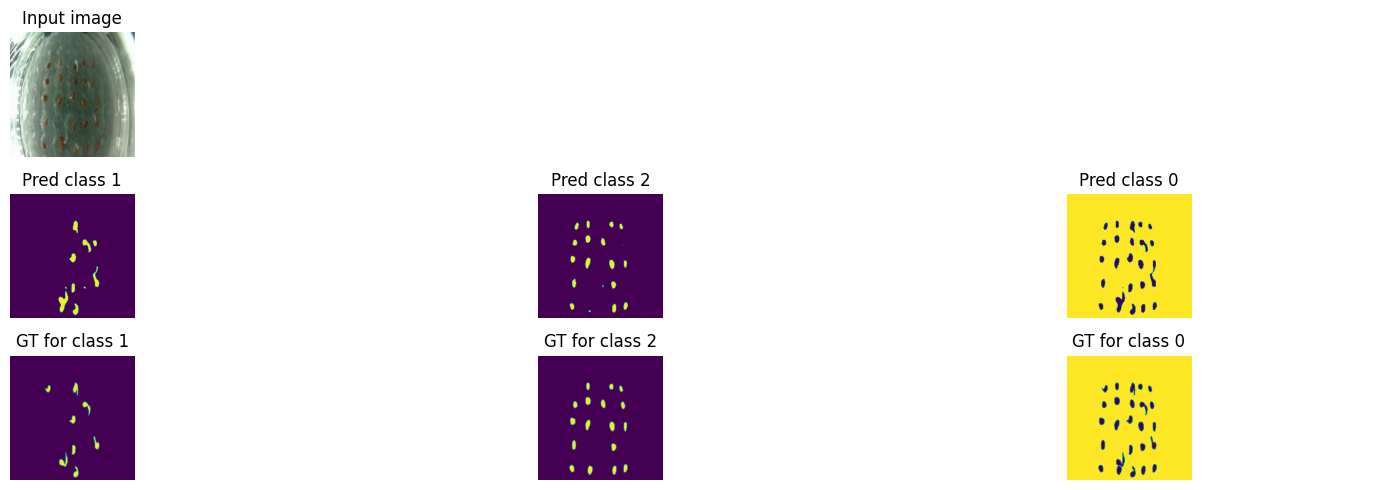

Train loss: 0.23242 | Time: 39m 0s | Val loss: 0.20040
Train_DICE_avg: 0.80246 | Train_Jaccard_avg: 0.74291 | Train_Sensitivity_avg: 0.81311 | Train_Specificity_avg: 0.96957 
Class 0 - Train_DICE: 0.99173 | Train_Jaccard: 0.98366 | Train_Sensitivity: 0.98840 | Train_Specificity: 0.91478 
Class 1 - Train_DICE: 0.54843 | Train_Jaccard: 0.46935 | Train_Sensitivity: 0.59059 | Train_Specificity: 0.99755 
Class 2 - Train_DICE: 0.86724 | Train_Jaccard: 0.77572 | Train_Sensitivity: 0.86035 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.82414 | Val_Jaccard_avg: 0.77457 | Val_Sensitivity_avg: 0.83984 | Val_Specificity_avg: 0.96814 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99669 | Val_Specificity: 0.90968 
Class 1 - Val_DICE: 0.58749 | Val_Jaccard: 0.52152 | Val_Sensitivity: 0.61809 | Val_Specificity: 0.99825 
Class 2 - Val_DICE: 0.88844 | Val_Jaccard: 0.80916 | Val_Sensitivity: 0.90474 | Val_Specificity: 0.99647 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.22326 | Time: 40m 9s | Val loss: 0.19668
Train_DICE_avg: 0.81691 | Train_Jaccard_avg: 0.75755 | Train_Sensitivity_avg: 0.83250 | Train_Specificity_avg: 0.97054 
Class 0 - Train_DICE: 0.99191 | Train_Jaccard: 0.98402 | Train_Sensitivity: 0.98868 | Train_Specificity: 0.91774 
Class 1 - Train_DICE: 0.58962 | Train_Jaccard: 0.51087 | Train_Sensitivity: 0.64696 | Train_Specificity: 0.99755 
Class 2 - Train_DICE: 0.86920 | Train_Jaccard: 0.77775 | Train_Sensitivity: 0.86185 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.82614 | Val_Jaccard_avg: 0.77752 | Val_Sensitivity_avg: 0.84368 | Val_Specificity_avg: 0.96125 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99282 | Val_Sensitivity: 0.99674 | Val_Specificity: 0.88908 
Class 1 - Val_DICE: 0.59598 | Val_Jaccard: 0.53246 | Val_Sensitivity: 0.65013 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.88604 | Val_Jaccard: 0.80729 | Val_Sensitivity: 0.88418 | Val_Specificity: 0.99716 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.21829 | Time: 41m 15s | Val loss: 0.18979
Train_DICE_avg: 0.81515 | Train_Jaccard_avg: 0.75650 | Train_Sensitivity_avg: 0.82854 | Train_Specificity_avg: 0.96925 
Class 0 - Train_DICE: 0.99183 | Train_Jaccard: 0.98386 | Train_Sensitivity: 0.98900 | Train_Specificity: 0.91372 
Class 1 - Train_DICE: 0.58219 | Train_Jaccard: 0.50439 | Train_Sensitivity: 0.63191 | Train_Specificity: 0.99763 
Class 2 - Train_DICE: 0.87142 | Train_Jaccard: 0.78125 | Train_Sensitivity: 0.86471 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.83752 | Val_Jaccard_avg: 0.79118 | Val_Sensitivity_avg: 0.85981 | Val_Specificity_avg: 0.96494 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99305 | Val_Sensitivity: 0.99691 | Val_Specificity: 0.89989 
Class 1 - Val_DICE: 0.62411 | Val_Jaccard: 0.56544 | Val_Sensitivity: 0.67279 | Val_Specificity: 0.99811 
Class 2 - Val_DICE: 0.89195 | Val_Jaccard: 0.81506 | Val_Sensitivity: 0.90971 | Val_Specificity: 0.99683 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.21523 | Time: 42m 22s | Val loss: 0.18644
Train_DICE_avg: 0.81804 | Train_Jaccard_avg: 0.76003 | Train_Sensitivity_avg: 0.83606 | Train_Specificity_avg: 0.96879 
Class 0 - Train_DICE: 0.99203 | Train_Jaccard: 0.98424 | Train_Sensitivity: 0.98931 | Train_Specificity: 0.91237 
Class 1 - Train_DICE: 0.59237 | Train_Jaccard: 0.51672 | Train_Sensitivity: 0.65759 | Train_Specificity: 0.99753 
Class 2 - Train_DICE: 0.86974 | Train_Jaccard: 0.77913 | Train_Sensitivity: 0.86126 | Train_Specificity: 0.99649 
Val_DICE_avg: 0.83722 | Val_Jaccard_avg: 0.79127 | Val_Sensitivity_avg: 0.85604 | Val_Specificity_avg: 0.96268 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99309 | Val_Sensitivity: 0.99706 | Val_Specificity: 0.89289 
Class 1 - Val_DICE: 0.61912 | Val_Jaccard: 0.55922 | Val_Sensitivity: 0.67060 | Val_Specificity: 0.99799 
Class 2 - Val_DICE: 0.89603 | Val_Jaccard: 0.82149 | Val_Sensitivity: 0.90047 | Val_Specificity: 0.99715 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.21306 | Time: 43m 29s | Val loss: 0.19011
Train_DICE_avg: 0.81899 | Train_Jaccard_avg: 0.76146 | Train_Sensitivity_avg: 0.84050 | Train_Specificity_avg: 0.96925 
Class 0 - Train_DICE: 0.99202 | Train_Jaccard: 0.98423 | Train_Sensitivity: 0.98932 | Train_Specificity: 0.91382 
Class 1 - Train_DICE: 0.59387 | Train_Jaccard: 0.51939 | Train_Sensitivity: 0.66581 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.87109 | Train_Jaccard: 0.78075 | Train_Sensitivity: 0.86636 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.83050 | Val_Jaccard_avg: 0.78320 | Val_Sensitivity_avg: 0.84676 | Val_Specificity_avg: 0.95584 
Class 0 - Val_DICE: 0.99631 | Val_Jaccard: 0.99267 | Val_Sensitivity: 0.99728 | Val_Specificity: 0.87246 
Class 1 - Val_DICE: 0.60509 | Val_Jaccard: 0.54490 | Val_Sensitivity: 0.65654 | Val_Specificity: 0.99797 
Class 2 - Val_DICE: 0.89009 | Val_Jaccard: 0.81203 | Val_Sensitivity: 0.88645 | Val_Specificity: 0.99708 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


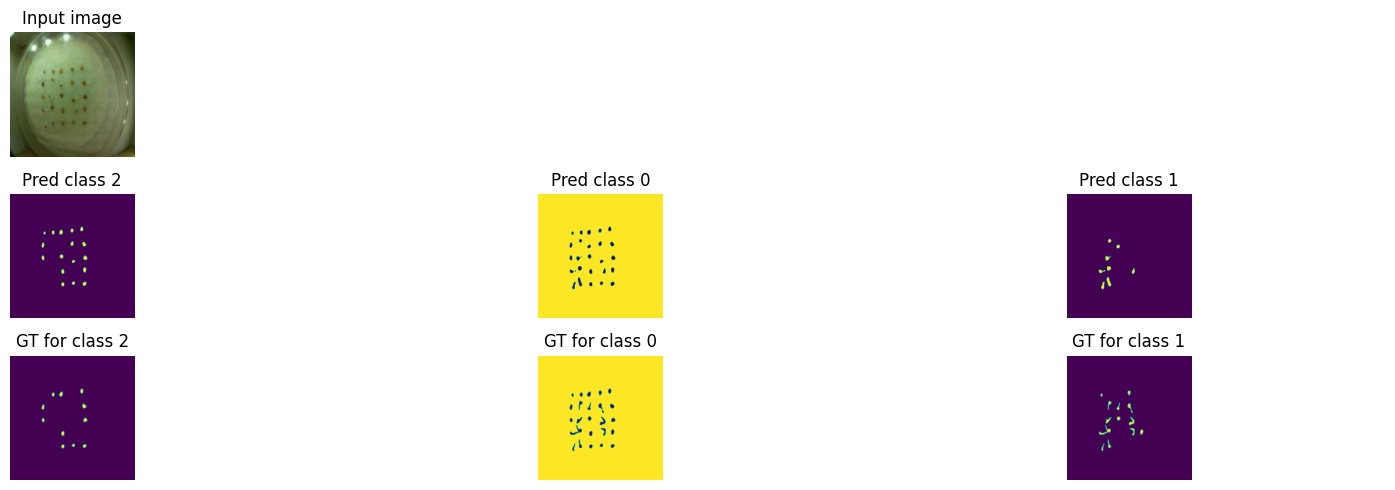

Train loss: 0.20679 | Time: 44m 36s | Val loss: 0.18077
Train_DICE_avg: 0.82796 | Train_Jaccard_avg: 0.76999 | Train_Sensitivity_avg: 0.84846 | Train_Specificity_avg: 0.96838 
Class 0 - Train_DICE: 0.99196 | Train_Jaccard: 0.98410 | Train_Sensitivity: 0.98951 | Train_Specificity: 0.91117 
Class 1 - Train_DICE: 0.61910 | Train_Jaccard: 0.54299 | Train_Sensitivity: 0.68938 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.87282 | Train_Jaccard: 0.78287 | Train_Sensitivity: 0.86648 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.83955 | Val_Jaccard_avg: 0.79240 | Val_Sensitivity_avg: 0.85877 | Val_Specificity_avg: 0.95939 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99699 | Val_Specificity: 0.88333 
Class 1 - Val_DICE: 0.62829 | Val_Jaccard: 0.56647 | Val_Sensitivity: 0.68214 | Val_Specificity: 0.99792 
Class 2 - Val_DICE: 0.89389 | Val_Jaccard: 0.81774 | Val_Sensitivity: 0.89717 | Val_Specificity: 0.99692 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.20869 | Time: 45m 44s | Val loss: 0.18093
Train_DICE_avg: 0.82608 | Train_Jaccard_avg: 0.76885 | Train_Sensitivity_avg: 0.84699 | Train_Specificity_avg: 0.96709 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98455 | Train_Sensitivity: 0.99013 | Train_Specificity: 0.90719 
Class 1 - Train_DICE: 0.61346 | Train_Jaccard: 0.53875 | Train_Sensitivity: 0.68519 | Train_Specificity: 0.99762 
Class 2 - Train_DICE: 0.87259 | Train_Jaccard: 0.78325 | Train_Sensitivity: 0.86564 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.84187 | Val_Jaccard_avg: 0.79605 | Val_Sensitivity_avg: 0.86739 | Val_Specificity_avg: 0.96101 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99284 | Val_Sensitivity: 0.99711 | Val_Specificity: 0.88776 
Class 1 - Val_DICE: 0.63295 | Val_Jaccard: 0.57366 | Val_Sensitivity: 0.70962 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.89625 | Val_Jaccard: 0.82166 | Val_Sensitivity: 0.89544 | Val_Specificity: 0.99749 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.20217 | Time: 46m 50s | Val loss: 0.17851
Train_DICE_avg: 0.83067 | Train_Jaccard_avg: 0.77351 | Train_Sensitivity_avg: 0.85108 | Train_Specificity_avg: 0.96720 
Class 0 - Train_DICE: 0.99204 | Train_Jaccard: 0.98427 | Train_Sensitivity: 0.98985 | Train_Specificity: 0.90754 
Class 1 - Train_DICE: 0.62505 | Train_Jaccard: 0.54975 | Train_Sensitivity: 0.69465 | Train_Specificity: 0.99762 
Class 2 - Train_DICE: 0.87491 | Train_Jaccard: 0.78650 | Train_Sensitivity: 0.86874 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.84368 | Val_Jaccard_avg: 0.79819 | Val_Sensitivity_avg: 0.86416 | Val_Specificity_avg: 0.96094 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99304 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.88744 
Class 1 - Val_DICE: 0.63659 | Val_Jaccard: 0.57707 | Val_Sensitivity: 0.68778 | Val_Specificity: 0.99820 
Class 2 - Val_DICE: 0.89795 | Val_Jaccard: 0.82445 | Val_Sensitivity: 0.90730 | Val_Specificity: 0.99717 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.20254 | Time: 47m 57s | Val loss: 0.18505
Train_DICE_avg: 0.83239 | Train_Jaccard_avg: 0.77540 | Train_Sensitivity_avg: 0.85331 | Train_Specificity_avg: 0.96689 
Class 0 - Train_DICE: 0.99239 | Train_Jaccard: 0.98495 | Train_Sensitivity: 0.99051 | Train_Specificity: 0.90664 
Class 1 - Train_DICE: 0.62970 | Train_Jaccard: 0.55459 | Train_Sensitivity: 0.70024 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.87509 | Train_Jaccard: 0.78666 | Train_Sensitivity: 0.86917 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.84372 | Val_Jaccard_avg: 0.79706 | Val_Sensitivity_avg: 0.85920 | Val_Specificity_avg: 0.96026 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99298 | Val_Sensitivity: 0.99732 | Val_Specificity: 0.88547 
Class 1 - Val_DICE: 0.63737 | Val_Jaccard: 0.57472 | Val_Sensitivity: 0.67906 | Val_Specificity: 0.99805 
Class 2 - Val_DICE: 0.89732 | Val_Jaccard: 0.82349 | Val_Sensitivity: 0.90123 | Val_Specificity: 0.99725 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.20058 | Time: 49m 4s | Val loss: 0.17863
Train_DICE_avg: 0.83205 | Train_Jaccard_avg: 0.77485 | Train_Sensitivity_avg: 0.84863 | Train_Specificity_avg: 0.96743 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98490 | Train_Sensitivity: 0.99041 | Train_Specificity: 0.90822 
Class 1 - Train_DICE: 0.62701 | Train_Jaccard: 0.55072 | Train_Sensitivity: 0.68351 | Train_Specificity: 0.99767 
Class 2 - Train_DICE: 0.87678 | Train_Jaccard: 0.78892 | Train_Sensitivity: 0.87198 | Train_Specificity: 0.99642 
Val_DICE_avg: 0.84075 | Val_Jaccard_avg: 0.79298 | Val_Sensitivity_avg: 0.85490 | Val_Specificity_avg: 0.95660 
Class 0 - Val_DICE: 0.99628 | Val_Jaccard: 0.99261 | Val_Sensitivity: 0.99744 | Val_Specificity: 0.87446 
Class 1 - Val_DICE: 0.63188 | Val_Jaccard: 0.56793 | Val_Sensitivity: 0.67862 | Val_Specificity: 0.99792 
Class 2 - Val_DICE: 0.89410 | Val_Jaccard: 0.81840 | Val_Sensitivity: 0.88864 | Val_Specificity: 0.99743 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


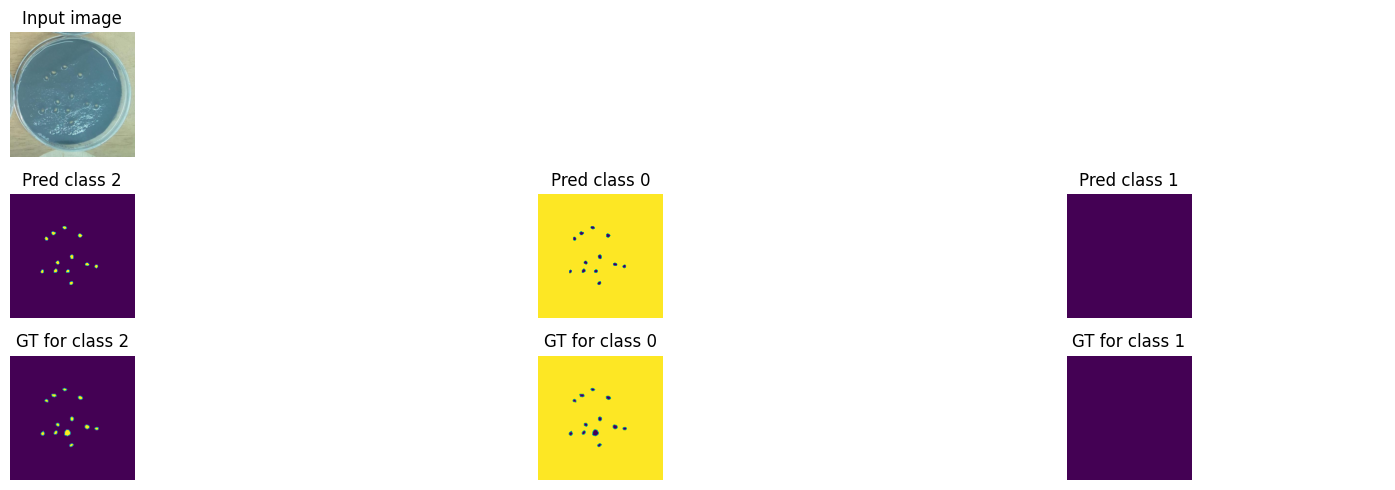

Train loss: 0.19841 | Time: 50m 11s | Val loss: 0.17170
Train_DICE_avg: 0.83251 | Train_Jaccard_avg: 0.77558 | Train_Sensitivity_avg: 0.85078 | Train_Specificity_avg: 0.96806 
Class 0 - Train_DICE: 0.99228 | Train_Jaccard: 0.98474 | Train_Sensitivity: 0.99024 | Train_Specificity: 0.91002 
Class 1 - Train_DICE: 0.62911 | Train_Jaccard: 0.55407 | Train_Sensitivity: 0.69143 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.87613 | Train_Jaccard: 0.78793 | Train_Sensitivity: 0.87068 | Train_Specificity: 0.99653 
Val_DICE_avg: 0.85405 | Val_Jaccard_avg: 0.80701 | Val_Sensitivity_avg: 0.87824 | Val_Specificity_avg: 0.96370 
Class 0 - Val_DICE: 0.99656 | Val_Jaccard: 0.99316 | Val_Sensitivity: 0.99688 | Val_Specificity: 0.89641 
Class 1 - Val_DICE: 0.67161 | Val_Jaccard: 0.60957 | Val_Sensitivity: 0.73141 | Val_Specificity: 0.99784 
Class 2 - Val_DICE: 0.89398 | Val_Jaccard: 0.81830 | Val_Sensitivity: 0.90643 | Val_Specificity: 0.99685 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.19475 | Time: 51m 18s | Val loss: 0.17276
Train_DICE_avg: 0.84213 | Train_Jaccard_avg: 0.78550 | Train_Sensitivity_avg: 0.86652 | Train_Specificity_avg: 0.96825 
Class 0 - Train_DICE: 0.99214 | Train_Jaccard: 0.98447 | Train_Sensitivity: 0.98989 | Train_Specificity: 0.91072 
Class 1 - Train_DICE: 0.65808 | Train_Jaccard: 0.58384 | Train_Sensitivity: 0.73926 | Train_Specificity: 0.99755 
Class 2 - Train_DICE: 0.87616 | Train_Jaccard: 0.78818 | Train_Sensitivity: 0.87042 | Train_Specificity: 0.99648 
Val_DICE_avg: 0.86595 | Val_Jaccard_avg: 0.81827 | Val_Sensitivity_avg: 0.88723 | Val_Specificity_avg: 0.96498 
Class 0 - Val_DICE: 0.99656 | Val_Jaccard: 0.99317 | Val_Sensitivity: 0.99674 | Val_Specificity: 0.90045 
Class 1 - Val_DICE: 0.70811 | Val_Jaccard: 0.64449 | Val_Sensitivity: 0.75452 | Val_Specificity: 0.99780 
Class 2 - Val_DICE: 0.89318 | Val_Jaccard: 0.81715 | Val_Sensitivity: 0.91043 | Val_Specificity: 0.99670 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.18762 | Time: 52m 26s | Val loss: 0.16185
Train_DICE_avg: 0.85670 | Train_Jaccard_avg: 0.79972 | Train_Sensitivity_avg: 0.88256 | Train_Specificity_avg: 0.96938 
Class 0 - Train_DICE: 0.99215 | Train_Jaccard: 0.98449 | Train_Sensitivity: 0.98971 | Train_Specificity: 0.91430 
Class 1 - Train_DICE: 0.70196 | Train_Jaccard: 0.62692 | Train_Sensitivity: 0.78638 | Train_Specificity: 0.99742 
Class 2 - Train_DICE: 0.87598 | Train_Jaccard: 0.78777 | Train_Sensitivity: 0.87159 | Train_Specificity: 0.99642 
Val_DICE_avg: 0.86810 | Val_Jaccard_avg: 0.82064 | Val_Sensitivity_avg: 0.88490 | Val_Specificity_avg: 0.96036 
Class 0 - Val_DICE: 0.99654 | Val_Jaccard: 0.99312 | Val_Sensitivity: 0.99719 | Val_Specificity: 0.88623 
Class 1 - Val_DICE: 0.71285 | Val_Jaccard: 0.64894 | Val_Sensitivity: 0.75875 | Val_Specificity: 0.99781 
Class 2 - Val_DICE: 0.89493 | Val_Jaccard: 0.81987 | Val_Sensitivity: 0.89876 | Val_Specificity: 0.99704 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.18601 | Time: 53m 33s | Val loss: 0.14193
Train_DICE_avg: 0.85369 | Train_Jaccard_avg: 0.79676 | Train_Sensitivity_avg: 0.88127 | Train_Specificity_avg: 0.96937 
Class 0 - Train_DICE: 0.99215 | Train_Jaccard: 0.98448 | Train_Sensitivity: 0.98953 | Train_Specificity: 0.91435 
Class 1 - Train_DICE: 0.69341 | Train_Jaccard: 0.61899 | Train_Sensitivity: 0.78540 | Train_Specificity: 0.99738 
Class 2 - Train_DICE: 0.87552 | Train_Jaccard: 0.78682 | Train_Sensitivity: 0.86887 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.88462 | Val_Jaccard_avg: 0.83603 | Val_Sensitivity_avg: 0.91455 | Val_Specificity_avg: 0.96233 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99309 | Val_Sensitivity: 0.99697 | Val_Specificity: 0.89274 
Class 1 - Val_DICE: 0.76887 | Val_Jaccard: 0.70544 | Val_Sensitivity: 0.85366 | Val_Specificity: 0.99731 
Class 2 - Val_DICE: 0.88847 | Val_Jaccard: 0.80957 | Val_Sensitivity: 0.89301 | Val_Specificity: 0.99695 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.18564 | Time: 54m 40s | Val loss: 0.13319
Train_DICE_avg: 0.85354 | Train_Jaccard_avg: 0.79687 | Train_Sensitivity_avg: 0.87765 | Train_Specificity_avg: 0.96907 
Class 0 - Train_DICE: 0.99232 | Train_Jaccard: 0.98482 | Train_Sensitivity: 0.99000 | Train_Specificity: 0.91330 
Class 1 - Train_DICE: 0.69160 | Train_Jaccard: 0.61732 | Train_Sensitivity: 0.77249 | Train_Specificity: 0.99746 
Class 2 - Train_DICE: 0.87671 | Train_Jaccard: 0.78847 | Train_Sensitivity: 0.87046 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.89205 | Val_Jaccard_avg: 0.84515 | Val_Sensitivity_avg: 0.91507 | Val_Specificity_avg: 0.95906 
Class 0 - Val_DICE: 0.99642 | Val_Jaccard: 0.99288 | Val_Sensitivity: 0.99735 | Val_Specificity: 0.88207 
Class 1 - Val_DICE: 0.78443 | Val_Jaccard: 0.72212 | Val_Sensitivity: 0.85454 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.89531 | Val_Jaccard: 0.82045 | Val_Sensitivity: 0.89333 | Val_Specificity: 0.99743 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


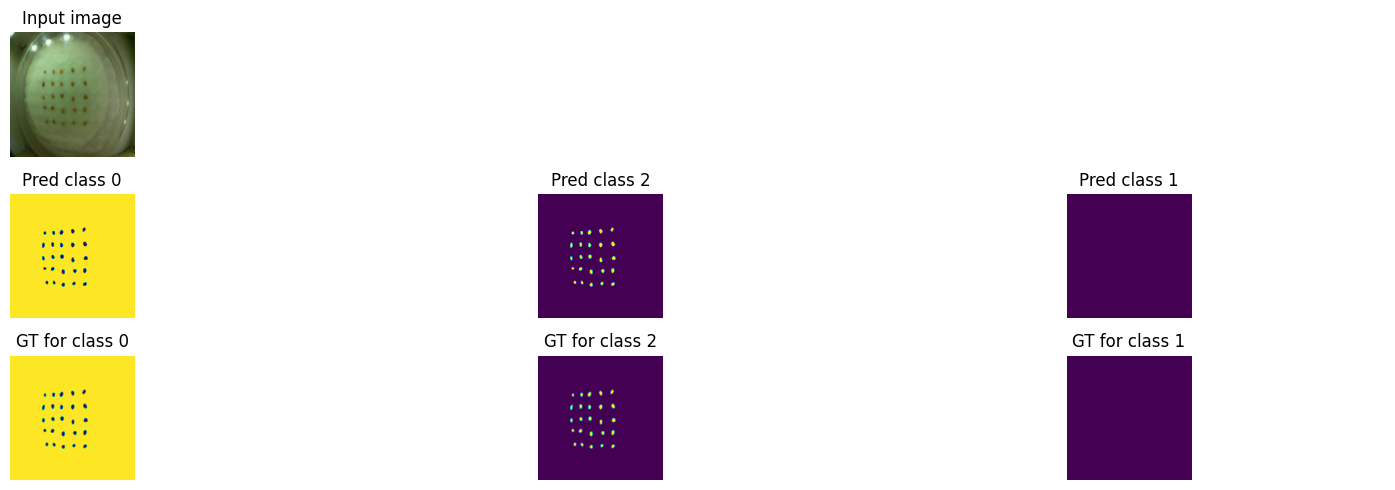

Train loss: 0.18201 | Time: 55m 48s | Val loss: 0.13326
Train_DICE_avg: 0.85833 | Train_Jaccard_avg: 0.80150 | Train_Sensitivity_avg: 0.88295 | Train_Specificity_avg: 0.96817 
Class 0 - Train_DICE: 0.99229 | Train_Jaccard: 0.98477 | Train_Sensitivity: 0.99012 | Train_Specificity: 0.91067 
Class 1 - Train_DICE: 0.70680 | Train_Jaccard: 0.63230 | Train_Sensitivity: 0.78728 | Train_Specificity: 0.99745 
Class 2 - Train_DICE: 0.87590 | Train_Jaccard: 0.78743 | Train_Sensitivity: 0.87145 | Train_Specificity: 0.99640 
Val_DICE_avg: 0.89477 | Val_Jaccard_avg: 0.84785 | Val_Sensitivity_avg: 0.91850 | Val_Specificity_avg: 0.96263 
Class 0 - Val_DICE: 0.99658 | Val_Jaccard: 0.99320 | Val_Sensitivity: 0.99703 | Val_Specificity: 0.89313 
Class 1 - Val_DICE: 0.79123 | Val_Jaccard: 0.72838 | Val_Sensitivity: 0.85504 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.89649 | Val_Jaccard: 0.82198 | Val_Sensitivity: 0.90341 | Val_Specificity: 0.99708 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.17945 | Time: 56m 56s | Val loss: 0.12856
Train_DICE_avg: 0.85835 | Train_Jaccard_avg: 0.80206 | Train_Sensitivity_avg: 0.88716 | Train_Specificity_avg: 0.96798 
Class 0 - Train_DICE: 0.99220 | Train_Jaccard: 0.98458 | Train_Sensitivity: 0.99001 | Train_Specificity: 0.91002 
Class 1 - Train_DICE: 0.70572 | Train_Jaccard: 0.63241 | Train_Sensitivity: 0.80170 | Train_Specificity: 0.99741 
Class 2 - Train_DICE: 0.87713 | Train_Jaccard: 0.78919 | Train_Sensitivity: 0.86978 | Train_Specificity: 0.99651 
Val_DICE_avg: 0.89642 | Val_Jaccard_avg: 0.84882 | Val_Sensitivity_avg: 0.91232 | Val_Specificity_avg: 0.95742 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99286 | Val_Sensitivity: 0.99751 | Val_Specificity: 0.87699 
Class 1 - Val_DICE: 0.79667 | Val_Jaccard: 0.73149 | Val_Sensitivity: 0.84244 | Val_Specificity: 0.99789 
Class 2 - Val_DICE: 0.89619 | Val_Jaccard: 0.82213 | Val_Sensitivity: 0.89699 | Val_Specificity: 0.99737 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.17911 | Time: 58m 2s | Val loss: 0.13086
Train_DICE_avg: 0.85883 | Train_Jaccard_avg: 0.80280 | Train_Sensitivity_avg: 0.88696 | Train_Specificity_avg: 0.96822 
Class 0 - Train_DICE: 0.99243 | Train_Jaccard: 0.98503 | Train_Sensitivity: 0.99029 | Train_Specificity: 0.91071 
Class 1 - Train_DICE: 0.70712 | Train_Jaccard: 0.63427 | Train_Sensitivity: 0.79806 | Train_Specificity: 0.99754 
Class 2 - Train_DICE: 0.87693 | Train_Jaccard: 0.78910 | Train_Sensitivity: 0.87253 | Train_Specificity: 0.99641 
Val_DICE_avg: 0.89437 | Val_Jaccard_avg: 0.84655 | Val_Sensitivity_avg: 0.91130 | Val_Specificity_avg: 0.95704 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99282 | Val_Sensitivity: 0.99728 | Val_Specificity: 0.87607 
Class 1 - Val_DICE: 0.79069 | Val_Jaccard: 0.72493 | Val_Sensitivity: 0.84062 | Val_Specificity: 0.99780 
Class 2 - Val_DICE: 0.89605 | Val_Jaccard: 0.82189 | Val_Sensitivity: 0.89600 | Val_Specificity: 0.99725 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Train loss: 0.17695 | Time: 59m 10s | Val loss: 0.13015
Train_DICE_avg: 0.85914 | Train_Jaccard_avg: 0.80273 | Train_Sensitivity_avg: 0.88166 | Train_Specificity_avg: 0.96757 
Class 0 - Train_DICE: 0.99231 | Train_Jaccard: 0.98479 | Train_Sensitivity: 0.99035 | Train_Specificity: 0.90863 
Class 1 - Train_DICE: 0.70687 | Train_Jaccard: 0.63218 | Train_Sensitivity: 0.78153 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.87824 | Train_Jaccard: 0.79122 | Train_Sensitivity: 0.87310 | Train_Specificity: 0.99651 
Val_DICE_avg: 0.89659 | Val_Jaccard_avg: 0.84985 | Val_Sensitivity_avg: 0.91927 | Val_Specificity_avg: 0.96204 
Class 0 - Val_DICE: 0.99658 | Val_Jaccard: 0.99321 | Val_Sensitivity: 0.99715 | Val_Specificity: 0.89131 
Class 1 - Val_DICE: 0.79614 | Val_Jaccard: 0.73285 | Val_Sensitivity: 0.85367 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.89704 | Val_Jaccard: 0.82350 | Val_Sensitivity: 0.90699 | Val_Specificity: 0.99703 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.17971 | Time: 60m 17s | Val loss: 0.13072
Train_DICE_avg: 0.85885 | Train_Jaccard_avg: 0.80204 | Train_Sensitivity_avg: 0.88406 | Train_Specificity_avg: 0.96857 
Class 0 - Train_DICE: 0.99245 | Train_Jaccard: 0.98507 | Train_Sensitivity: 0.99044 | Train_Specificity: 0.91181 
Class 1 - Train_DICE: 0.70740 | Train_Jaccard: 0.63218 | Train_Sensitivity: 0.78978 | Train_Specificity: 0.99746 
Class 2 - Train_DICE: 0.87670 | Train_Jaccard: 0.78886 | Train_Sensitivity: 0.87195 | Train_Specificity: 0.99643 
Val_DICE_avg: 0.89399 | Val_Jaccard_avg: 0.84700 | Val_Sensitivity_avg: 0.92590 | Val_Specificity_avg: 0.96372 
Class 0 - Val_DICE: 0.99660 | Val_Jaccard: 0.99325 | Val_Sensitivity: 0.99702 | Val_Specificity: 0.89649 
Class 1 - Val_DICE: 0.78913 | Val_Jaccard: 0.72608 | Val_Sensitivity: 0.87546 | Val_Specificity: 0.99755 
Class 2 - Val_DICE: 0.89624 | Val_Jaccard: 0.82167 | Val_Sensitivity: 0.90522 | Val_Specificity: 0.99711 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


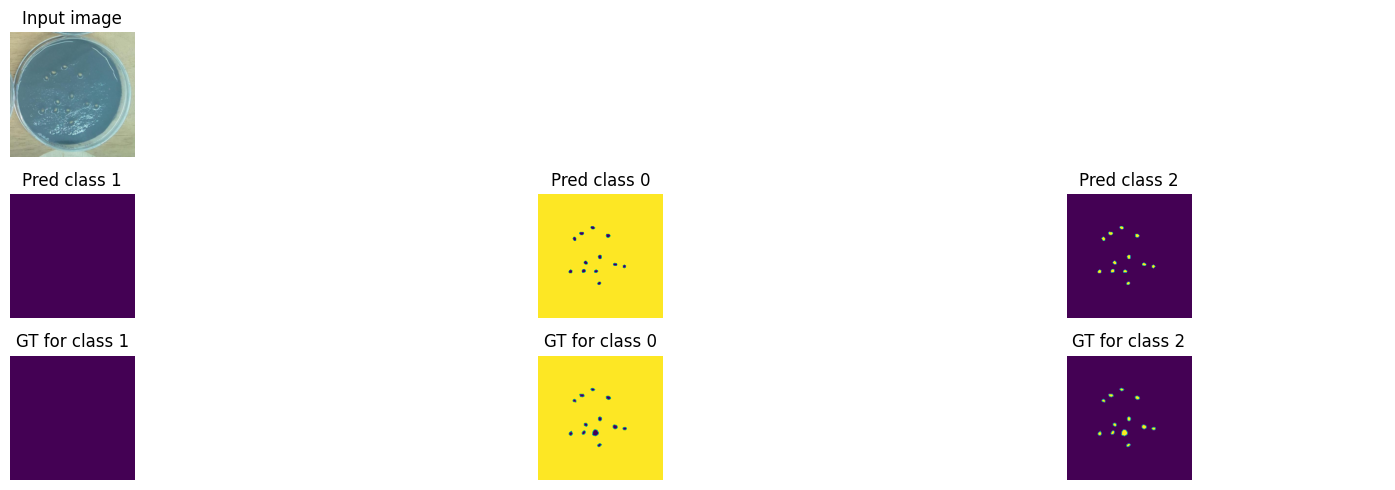

Train loss: 0.17501 | Time: 61m 25s | Val loss: 0.12732
Train_DICE_avg: 0.86426 | Train_Jaccard_avg: 0.80848 | Train_Sensitivity_avg: 0.89156 | Train_Specificity_avg: 0.96712 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98515 | Train_Sensitivity: 0.99077 | Train_Specificity: 0.90728 
Class 1 - Train_DICE: 0.72158 | Train_Jaccard: 0.64827 | Train_Sensitivity: 0.81071 | Train_Specificity: 0.99755 
Class 2 - Train_DICE: 0.87872 | Train_Jaccard: 0.79203 | Train_Sensitivity: 0.87320 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.89745 | Val_Jaccard_avg: 0.85088 | Val_Sensitivity_avg: 0.92315 | Val_Specificity_avg: 0.96036 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99725 | Val_Specificity: 0.88613 
Class 1 - Val_DICE: 0.79776 | Val_Jaccard: 0.73497 | Val_Sensitivity: 0.86947 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.89809 | Val_Jaccard: 0.82465 | Val_Sensitivity: 0.90272 | Val_Specificity: 0.99729 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.17558 | Time: 62m 33s | Val loss: 0.12806
Train_DICE_avg: 0.86318 | Train_Jaccard_avg: 0.80707 | Train_Sensitivity_avg: 0.88860 | Train_Specificity_avg: 0.96767 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98485 | Train_Sensitivity: 0.99039 | Train_Specificity: 0.90900 
Class 1 - Train_DICE: 0.71789 | Train_Jaccard: 0.64347 | Train_Sensitivity: 0.79905 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.87931 | Train_Jaccard: 0.79288 | Train_Sensitivity: 0.87635 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.89677 | Val_Jaccard_avg: 0.85059 | Val_Sensitivity_avg: 0.92225 | Val_Specificity_avg: 0.96008 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99307 | Val_Sensitivity: 0.99731 | Val_Specificity: 0.88526 
Class 1 - Val_DICE: 0.79657 | Val_Jaccard: 0.73524 | Val_Sensitivity: 0.86833 | Val_Specificity: 0.99781 
Class 2 - Val_DICE: 0.89724 | Val_Jaccard: 0.82346 | Val_Sensitivity: 0.90112 | Val_Specificity: 0.99718 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.17601 | Time: 63m 41s | Val loss: 0.13260
Train_DICE_avg: 0.86491 | Train_Jaccard_avg: 0.80905 | Train_Sensitivity_avg: 0.89544 | Train_Specificity_avg: 0.96779 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98516 | Train_Sensitivity: 0.99061 | Train_Specificity: 0.90939 
Class 1 - Train_DICE: 0.72368 | Train_Jaccard: 0.65013 | Train_Sensitivity: 0.82406 | Train_Specificity: 0.99741 
Class 2 - Train_DICE: 0.87855 | Train_Jaccard: 0.79185 | Train_Sensitivity: 0.87164 | Train_Specificity: 0.99656 
Val_DICE_avg: 0.88869 | Val_Jaccard_avg: 0.84238 | Val_Sensitivity_avg: 0.92031 | Val_Specificity_avg: 0.95935 
Class 0 - Val_DICE: 0.99645 | Val_Jaccard: 0.99295 | Val_Sensitivity: 0.99729 | Val_Specificity: 0.88329 
Class 1 - Val_DICE: 0.77528 | Val_Jaccard: 0.71505 | Val_Sensitivity: 0.86662 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.89435 | Val_Jaccard: 0.81914 | Val_Sensitivity: 0.89703 | Val_Specificity: 0.99729 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.17479 | Time: 64m 48s | Val loss: 0.13028
Train_DICE_avg: 0.86229 | Train_Jaccard_avg: 0.80627 | Train_Sensitivity_avg: 0.88984 | Train_Specificity_avg: 0.96838 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98469 | Train_Sensitivity: 0.99024 | Train_Specificity: 0.91123 
Class 1 - Train_DICE: 0.71622 | Train_Jaccard: 0.64242 | Train_Sensitivity: 0.80652 | Train_Specificity: 0.99738 
Class 2 - Train_DICE: 0.87841 | Train_Jaccard: 0.79171 | Train_Sensitivity: 0.87277 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.89207 | Val_Jaccard_avg: 0.84513 | Val_Sensitivity_avg: 0.92166 | Val_Specificity_avg: 0.95888 
Class 0 - Val_DICE: 0.99646 | Val_Jaccard: 0.99296 | Val_Sensitivity: 0.99731 | Val_Specificity: 0.88186 
Class 1 - Val_DICE: 0.78409 | Val_Jaccard: 0.72168 | Val_Sensitivity: 0.87251 | Val_Specificity: 0.99736 
Class 2 - Val_DICE: 0.89566 | Val_Jaccard: 0.82075 | Val_Sensitivity: 0.89517 | Val_Specificity: 0.99743 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.17434 | Time: 65m 56s | Val loss: 0.13293
Train_DICE_avg: 0.86533 | Train_Jaccard_avg: 0.80989 | Train_Sensitivity_avg: 0.89573 | Train_Specificity_avg: 0.96834 
Class 0 - Train_DICE: 0.99247 | Train_Jaccard: 0.98512 | Train_Sensitivity: 0.99066 | Train_Specificity: 0.91108 
Class 1 - Train_DICE: 0.72444 | Train_Jaccard: 0.65207 | Train_Sensitivity: 0.82299 | Train_Specificity: 0.99740 
Class 2 - Train_DICE: 0.87907 | Train_Jaccard: 0.79248 | Train_Sensitivity: 0.87355 | Train_Specificity: 0.99656 
Val_DICE_avg: 0.88832 | Val_Jaccard_avg: 0.84270 | Val_Sensitivity_avg: 0.92296 | Val_Specificity_avg: 0.95948 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99298 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.88365 
Class 1 - Val_DICE: 0.77359 | Val_Jaccard: 0.71520 | Val_Sensitivity: 0.87559 | Val_Specificity: 0.99742 
Class 2 - Val_DICE: 0.89491 | Val_Jaccard: 0.81992 | Val_Sensitivity: 0.89593 | Val_Specificity: 0.99737 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


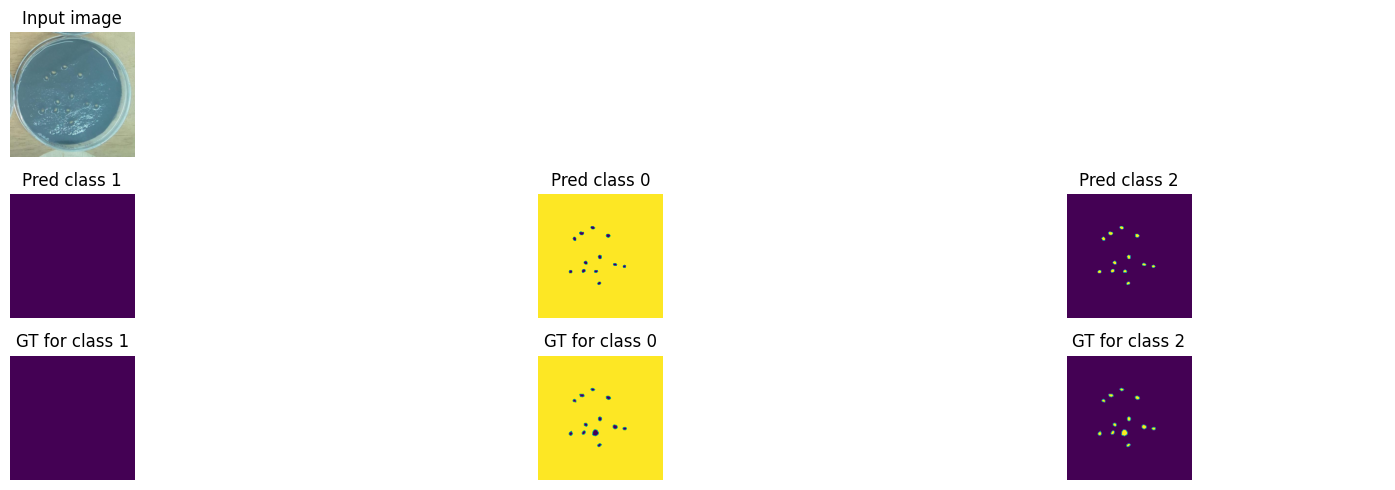

Train loss: 0.17384 | Time: 67m 4s | Val loss: 0.12843
Train_DICE_avg: 0.86527 | Train_Jaccard_avg: 0.81018 | Train_Sensitivity_avg: 0.89688 | Train_Specificity_avg: 0.96612 
Class 0 - Train_DICE: 0.99271 | Train_Jaccard: 0.98558 | Train_Sensitivity: 0.99127 | Train_Specificity: 0.90432 
Class 1 - Train_DICE: 0.72367 | Train_Jaccard: 0.65178 | Train_Sensitivity: 0.82534 | Train_Specificity: 0.99750 
Class 2 - Train_DICE: 0.87944 | Train_Jaccard: 0.79319 | Train_Sensitivity: 0.87402 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.89427 | Val_Jaccard_avg: 0.84773 | Val_Sensitivity_avg: 0.92608 | Val_Specificity_avg: 0.96127 
Class 0 - Val_DICE: 0.99648 | Val_Jaccard: 0.99301 | Val_Sensitivity: 0.99720 | Val_Specificity: 0.88904 
Class 1 - Val_DICE: 0.78952 | Val_Jaccard: 0.72768 | Val_Sensitivity: 0.88069 | Val_Specificity: 0.99740 
Class 2 - Val_DICE: 0.89681 | Val_Jaccard: 0.82250 | Val_Sensitivity: 0.90034 | Val_Specificity: 0.99735 


wandb: uploading artifact best_model; uploading config.yaml
wandb: uploading artifact best_model
wandb: 
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▁▂▂▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇██████████
wandb:       Training Jaccard ▁▁▂▂▂▂▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇█████████
wandb:          Training Loss ██▇▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▁▂▂▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████████
wandb:   Training Specificity ▁▃▄▅▅▇▇▇▇▇█▇▇▇▇█████▇█▇█████▇▇███████▇██
wandb:        Validation DICE ▁▁▁▂▂▂▂▃▃▄▄▅▅▅▅▆▅▆▅▅▆▆▆▆▇▇▇▇▇▇▇█████████
wandb:     Validation Jaccard ▁▁▁▁▂▂▂▂▃▃▄▄▄▄▅▅▆▅▅▅▆▆▆▇▇▇▇▇▇▇▇█████████
wandb:        Validation Loss ██▇▇▇▆▆▆▆▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▁▁▂▂▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇████████
wandb: Validation Specificity ▁▂▅▅▆▇▅▅▄▅▅▇▆▇▆▇█▇▆▅▆▇██▇▇▇▇▇▇▇▇▇▆▆▇▇▇▇▇
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.86527
wand


Training complete!


In [13]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]



Global Performance Metrics:
Loss mean: 0.14275, std: 0.01649
Dice Coefficient mean: 0.85993, std: 0.11773
Jaccard Index mean: 0.80185, std: 0.13433
Sensitivity mean: 0.88012, std: 0.10832
Specificity mean: 0.96081, std: 0.02584

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99565, std: 0.00229
Jaccard mean: 0.99136, std: 0.00451
Sensitivity mean: 0.99528, std: 0.00255
Specificity mean: 0.88890, std: 0.07732

Class 1:
Dice mean: 0.72250, std: 0.31815
Jaccard mean: 0.64836, std: 0.33723
Sensitivity mean: 0.76170, std: 0.30362
Specificity mean: 0.99795, std: 0.00353

Class 2:
Dice mean: 0.86163, std: 0.08501
Jaccard mean: 0.76583, std: 0.11819
Sensitivity mean: 0.88340, std: 0.10010
Specificity mean: 0.99558, std: 0.00321


### Cross-Entropy Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Backbone"] = "resnet34"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-ResNet34-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.19 GB
GPU Memory - Reserved: 0.92 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_172908-m2xt6reu
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-ResNet34-CrossEntropy
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/m2xt6reu



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


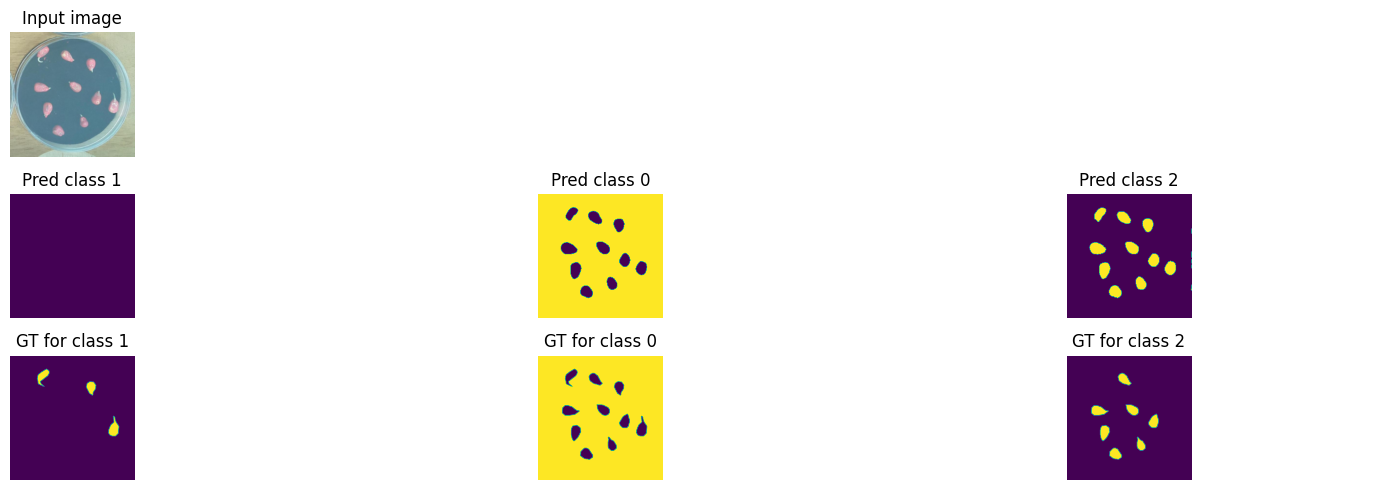

Train loss: 0.54547 | Time: 1m 2s | Val loss: 0.46590
Train_DICE_avg: 0.49001 | Train_Jaccard_avg: 0.40609 | Train_Sensitivity_avg: 0.79042 | Train_Specificity_avg: 0.71133 
Class 0 - Train_DICE: 0.63273 | Train_Jaccard: 0.52331 | Train_Sensitivity: 0.99565 | Train_Specificity: 0.15940 
Class 1 - Train_DICE: 0.21220 | Train_Jaccard: 0.20829 | Train_Sensitivity: 0.75456 | Train_Specificity: 0.98587 
Class 2 - Train_DICE: 0.62511 | Train_Jaccard: 0.48667 | Train_Sensitivity: 0.62107 | Train_Specificity: 0.98873 
Val_DICE_avg: 0.65910 | Val_Jaccard_avg: 0.59191 | Val_Sensitivity_avg: 0.85574 | Val_Specificity_avg: 0.71978 
Class 0 - Val_DICE: 0.93154 | Val_Jaccard: 0.87468 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.18338 
Class 1 - Val_DICE: 0.34762 | Val_Jaccard: 0.34762 | Val_Sensitivity: 0.80000 | Val_Specificity: 0.98825 
Class 2 - Val_DICE: 0.69815 | Val_Jaccard: 0.55343 | Val_Sensitivity: 0.76899 | Val_Specificity: 0.98771 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.42574 | Time: 2m 3s | Val loss: 0.38752
Train_DICE_avg: 0.64428 | Train_Jaccard_avg: 0.58151 | Train_Sensitivity_avg: 0.90292 | Train_Specificity_avg: 0.77982 
Class 0 - Train_DICE: 0.94148 | Train_Jaccard: 0.89057 | Train_Sensitivity: 0.99693 | Train_Specificity: 0.36424 
Class 1 - Train_DICE: 0.26444 | Train_Jaccard: 0.26397 | Train_Sensitivity: 0.94127 | Train_Specificity: 0.98546 
Class 2 - Train_DICE: 0.72691 | Train_Jaccard: 0.59000 | Train_Sensitivity: 0.77055 | Train_Specificity: 0.98976 
Val_DICE_avg: 0.71257 | Val_Jaccard_avg: 0.65700 | Val_Sensitivity_avg: 0.95430 | Val_Specificity_avg: 0.78259 
Class 0 - Val_DICE: 0.97812 | Val_Jaccard: 0.95733 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.37550 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.69134 | Val_Jaccard: 0.54542 | Val_Sensitivity: 0.86479 | Val_Specificity: 0.98394 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.37542 | Time: 3m 4s | Val loss: 0.34183
Train_DICE_avg: 0.65424 | Train_Jaccard_avg: 0.59861 | Train_Sensitivity_avg: 0.91774 | Train_Specificity_avg: 0.82016 
Class 0 - Train_DICE: 0.96847 | Train_Jaccard: 0.93918 | Train_Sensitivity: 0.99644 | Train_Specificity: 0.48689 
Class 1 - Train_DICE: 0.26934 | Train_Jaccard: 0.26899 | Train_Sensitivity: 0.94852 | Train_Specificity: 0.98564 
Class 2 - Train_DICE: 0.72490 | Train_Jaccard: 0.58766 | Train_Sensitivity: 0.80826 | Train_Specificity: 0.98795 
Val_DICE_avg: 0.70247 | Val_Jaccard_avg: 0.64745 | Val_Sensitivity_avg: 0.95458 | Val_Specificity_avg: 0.80959 
Class 0 - Val_DICE: 0.98452 | Val_Jaccard: 0.96961 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.45819 
Class 1 - Val_DICE: 0.46468 | Val_Jaccard: 0.46449 | Val_Sensitivity: 0.99303 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.65822 | Val_Jaccard: 0.50825 | Val_Sensitivity: 0.87265 | Val_Specificity: 0.98225 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.33269 | Time: 4m 4s | Val loss: 0.30597
Train_DICE_avg: 0.65715 | Train_Jaccard_avg: 0.60362 | Train_Sensitivity_avg: 0.92623 | Train_Specificity_avg: 0.84204 
Class 0 - Train_DICE: 0.97660 | Train_Jaccard: 0.95445 | Train_Sensitivity: 0.99610 | Train_Specificity: 0.55321 
Class 1 - Train_DICE: 0.26923 | Train_Jaccard: 0.26899 | Train_Sensitivity: 0.95482 | Train_Specificity: 0.98568 
Class 2 - Train_DICE: 0.72562 | Train_Jaccard: 0.58743 | Train_Sensitivity: 0.82776 | Train_Specificity: 0.98723 
Val_DICE_avg: 0.70445 | Val_Jaccard_avg: 0.64960 | Val_Sensitivity_avg: 0.95779 | Val_Specificity_avg: 0.81405 
Class 0 - Val_DICE: 0.98547 | Val_Jaccard: 0.97145 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.47169 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.65962 | Val_Jaccard: 0.50911 | Val_Sensitivity: 0.87525 | Val_Specificity: 0.98213 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.29489 | Time: 5m 5s | Val loss: 0.27268
Train_DICE_avg: 0.65442 | Train_Jaccard_avg: 0.60127 | Train_Sensitivity_avg: 0.93182 | Train_Specificity_avg: 0.85301 
Class 0 - Train_DICE: 0.97968 | Train_Jaccard: 0.96029 | Train_Sensitivity: 0.99597 | Train_Specificity: 0.58686 
Class 1 - Train_DICE: 0.26465 | Train_Jaccard: 0.26446 | Train_Sensitivity: 0.95945 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.71893 | Train_Jaccard: 0.57906 | Train_Sensitivity: 0.84006 | Train_Specificity: 0.98654 
Val_DICE_avg: 0.71244 | Val_Jaccard_avg: 0.65907 | Val_Sensitivity_avg: 0.94938 | Val_Specificity_avg: 0.80989 
Class 0 - Val_DICE: 0.98483 | Val_Jaccard: 0.97020 | Val_Sensitivity: 0.99824 | Val_Specificity: 0.45704 
Class 1 - Val_DICE: 0.44884 | Val_Jaccard: 0.44864 | Val_Sensitivity: 0.97788 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.70366 | Val_Jaccard: 0.55838 | Val_Sensitivity: 0.87202 | Val_Specificity: 0.98429 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


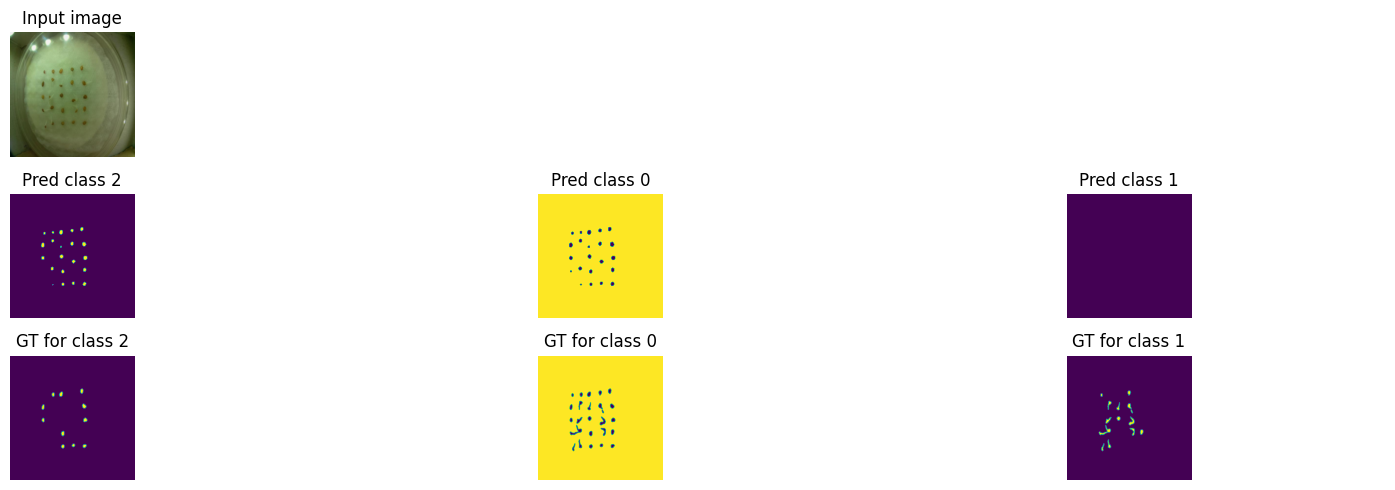

Train loss: 0.26222 | Time: 6m 6s | Val loss: 0.23982
Train_DICE_avg: 0.65328 | Train_Jaccard_avg: 0.60111 | Train_Sensitivity_avg: 0.93977 | Train_Specificity_avg: 0.85933 
Class 0 - Train_DICE: 0.98166 | Train_Jaccard: 0.96408 | Train_Sensitivity: 0.99614 | Train_Specificity: 0.60629 
Class 1 - Train_DICE: 0.26897 | Train_Jaccard: 0.26887 | Train_Sensitivity: 0.96650 | Train_Specificity: 0.98558 
Class 2 - Train_DICE: 0.70920 | Train_Jaccard: 0.57038 | Train_Sensitivity: 0.85668 | Train_Specificity: 0.98612 
Val_DICE_avg: 0.69816 | Val_Jaccard_avg: 0.64456 | Val_Sensitivity_avg: 0.96743 | Val_Specificity_avg: 0.82545 
Class 0 - Val_DICE: 0.98683 | Val_Jaccard: 0.97414 | Val_Sensitivity: 0.99870 | Val_Specificity: 0.50621 
Class 1 - Val_DICE: 0.46429 | Val_Jaccard: 0.46429 | Val_Sensitivity: 0.99603 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.64337 | Val_Jaccard: 0.49527 | Val_Sensitivity: 0.90755 | Val_Specificity: 0.98181 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.23394 | Time: 7m 6s | Val loss: 0.21433
Train_DICE_avg: 0.65425 | Train_Jaccard_avg: 0.60302 | Train_Sensitivity_avg: 0.94577 | Train_Specificity_avg: 0.86356 
Class 0 - Train_DICE: 0.98259 | Train_Jaccard: 0.96587 | Train_Sensitivity: 0.99643 | Train_Specificity: 0.61908 
Class 1 - Train_DICE: 0.27071 | Train_Jaccard: 0.27047 | Train_Sensitivity: 0.95965 | Train_Specificity: 0.98563 
Class 2 - Train_DICE: 0.70947 | Train_Jaccard: 0.57271 | Train_Sensitivity: 0.88124 | Train_Specificity: 0.98598 
Val_DICE_avg: 0.70676 | Val_Jaccard_avg: 0.65224 | Val_Sensitivity_avg: 0.97464 | Val_Specificity_avg: 0.82172 
Class 0 - Val_DICE: 0.98683 | Val_Jaccard: 0.97409 | Val_Sensitivity: 0.99903 | Val_Specificity: 0.49530 
Class 1 - Val_DICE: 0.47401 | Val_Jaccard: 0.47130 | Val_Sensitivity: 0.98655 | Val_Specificity: 0.98850 
Class 2 - Val_DICE: 0.65945 | Val_Jaccard: 0.51132 | Val_Sensitivity: 0.93834 | Val_Specificity: 0.98135 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.20854 | Time: 8m 7s | Val loss: 0.19048
Train_DICE_avg: 0.65915 | Train_Jaccard_avg: 0.60761 | Train_Sensitivity_avg: 0.94755 | Train_Specificity_avg: 0.87051 
Class 0 - Train_DICE: 0.98428 | Train_Jaccard: 0.96913 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.63947 
Class 1 - Train_DICE: 0.27951 | Train_Jaccard: 0.27632 | Train_Sensitivity: 0.95112 | Train_Specificity: 0.98602 
Class 2 - Train_DICE: 0.71366 | Train_Jaccard: 0.57738 | Train_Sensitivity: 0.89505 | Train_Specificity: 0.98603 
Val_DICE_avg: 0.70068 | Val_Jaccard_avg: 0.64404 | Val_Sensitivity_avg: 0.96765 | Val_Specificity_avg: 0.82734 
Class 0 - Val_DICE: 0.98782 | Val_Jaccard: 0.97602 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.51242 
Class 1 - Val_DICE: 0.46488 | Val_Jaccard: 0.45772 | Val_Sensitivity: 0.96788 | Val_Specificity: 0.98879 
Class 2 - Val_DICE: 0.64933 | Val_Jaccard: 0.49837 | Val_Sensitivity: 0.93596 | Val_Specificity: 0.98079 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.18568 | Time: 9m 8s | Val loss: 0.17153
Train_DICE_avg: 0.66430 | Train_Jaccard_avg: 0.61091 | Train_Sensitivity_avg: 0.94825 | Train_Specificity_avg: 0.87835 
Class 0 - Train_DICE: 0.98576 | Train_Jaccard: 0.97198 | Train_Sensitivity: 0.99647 | Train_Specificity: 0.66328 
Class 1 - Train_DICE: 0.28911 | Train_Jaccard: 0.27916 | Train_Sensitivity: 0.94778 | Train_Specificity: 0.98580 
Class 2 - Train_DICE: 0.71802 | Train_Jaccard: 0.58158 | Train_Sensitivity: 0.90050 | Train_Specificity: 0.98596 
Val_DICE_avg: 0.69974 | Val_Jaccard_avg: 0.64031 | Val_Sensitivity_avg: 0.96880 | Val_Specificity_avg: 0.84282 
Class 0 - Val_DICE: 0.99001 | Val_Jaccard: 0.98027 | Val_Sensitivity: 0.99891 | Val_Specificity: 0.55947 
Class 1 - Val_DICE: 0.48669 | Val_Jaccard: 0.46908 | Val_Sensitivity: 0.95257 | Val_Specificity: 0.98930 
Class 2 - Val_DICE: 0.62250 | Val_Jaccard: 0.47158 | Val_Sensitivity: 0.95493 | Val_Specificity: 0.97969 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.16463 | Time: 10m 8s | Val loss: 0.15626
Train_DICE_avg: 0.67993 | Train_Jaccard_avg: 0.62183 | Train_Sensitivity_avg: 0.94392 | Train_Specificity_avg: 0.88705 
Class 0 - Train_DICE: 0.98717 | Train_Jaccard: 0.97473 | Train_Sensitivity: 0.99594 | Train_Specificity: 0.68833 
Class 1 - Train_DICE: 0.32235 | Train_Jaccard: 0.29719 | Train_Sensitivity: 0.93114 | Train_Specificity: 0.98656 
Class 2 - Train_DICE: 0.73027 | Train_Jaccard: 0.59358 | Train_Sensitivity: 0.90469 | Train_Specificity: 0.98626 
Val_DICE_avg: 0.71274 | Val_Jaccard_avg: 0.65214 | Val_Sensitivity_avg: 0.95823 | Val_Specificity_avg: 0.83931 
Class 0 - Val_DICE: 0.98938 | Val_Jaccard: 0.97904 | Val_Sensitivity: 0.99871 | Val_Specificity: 0.54597 
Class 1 - Val_DICE: 0.50020 | Val_Jaccard: 0.47185 | Val_Sensitivity: 0.92203 | Val_Specificity: 0.99003 
Class 2 - Val_DICE: 0.64865 | Val_Jaccard: 0.50552 | Val_Sensitivity: 0.95393 | Val_Specificity: 0.98193 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


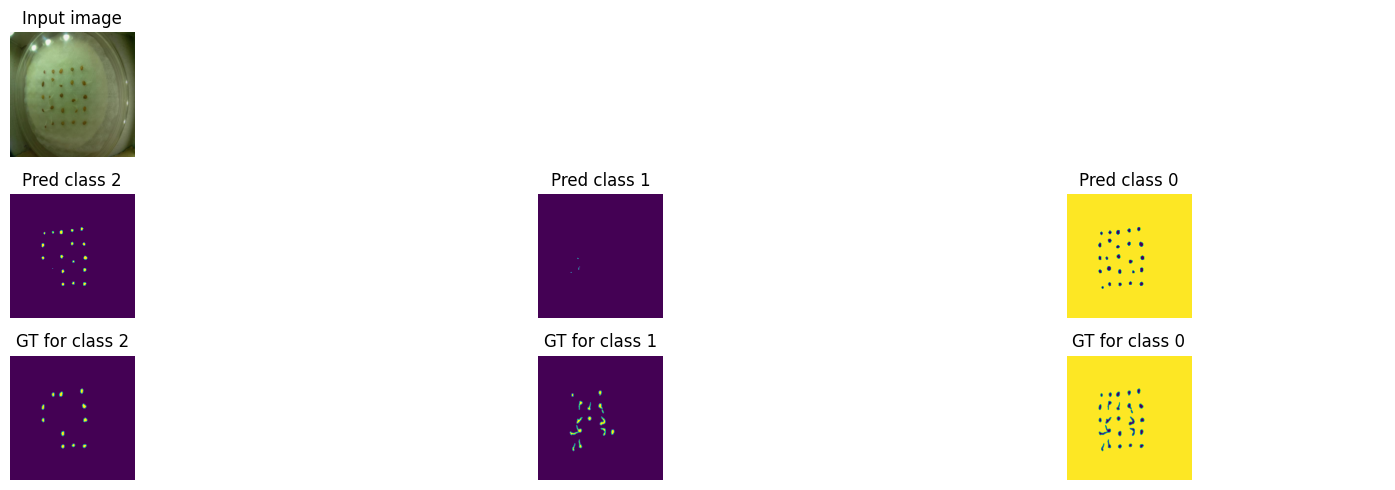

Train loss: 0.14417 | Time: 11m 14s | Val loss: 0.12473
Train_DICE_avg: 0.68088 | Train_Jaccard_avg: 0.62295 | Train_Sensitivity_avg: 0.94608 | Train_Specificity_avg: 0.89084 
Class 0 - Train_DICE: 0.98761 | Train_Jaccard: 0.97559 | Train_Sensitivity: 0.99553 | Train_Specificity: 0.69947 
Class 1 - Train_DICE: 0.32941 | Train_Jaccard: 0.30331 | Train_Sensitivity: 0.93824 | Train_Specificity: 0.98681 
Class 2 - Train_DICE: 0.72562 | Train_Jaccard: 0.58996 | Train_Sensitivity: 0.90447 | Train_Specificity: 0.98625 
Val_DICE_avg: 0.73780 | Val_Jaccard_avg: 0.67516 | Val_Sensitivity_avg: 0.97287 | Val_Specificity_avg: 0.83883 
Class 0 - Val_DICE: 0.98929 | Val_Jaccard: 0.97887 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.54380 
Class 1 - Val_DICE: 0.53881 | Val_Jaccard: 0.50843 | Val_Sensitivity: 0.96901 | Val_Specificity: 0.99023 
Class 2 - Val_DICE: 0.68528 | Val_Jaccard: 0.53817 | Val_Sensitivity: 0.95039 | Val_Specificity: 0.98246 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.12314 | Time: 12m 18s | Val loss: 0.10658
Train_DICE_avg: 0.69232 | Train_Jaccard_avg: 0.63195 | Train_Sensitivity_avg: 0.94942 | Train_Specificity_avg: 0.89529 
Class 0 - Train_DICE: 0.98877 | Train_Jaccard: 0.97784 | Train_Sensitivity: 0.99591 | Train_Specificity: 0.71278 
Class 1 - Train_DICE: 0.35486 | Train_Jaccard: 0.32097 | Train_Sensitivity: 0.93903 | Train_Specificity: 0.98691 
Class 2 - Train_DICE: 0.73333 | Train_Jaccard: 0.59706 | Train_Sensitivity: 0.91332 | Train_Specificity: 0.98617 
Val_DICE_avg: 0.74783 | Val_Jaccard_avg: 0.68225 | Val_Sensitivity_avg: 0.97447 | Val_Specificity_avg: 0.84512 
Class 0 - Val_DICE: 0.98978 | Val_Jaccard: 0.97984 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.56189 
Class 1 - Val_DICE: 0.56753 | Val_Jaccard: 0.52918 | Val_Sensitivity: 0.97140 | Val_Specificity: 0.99102 
Class 2 - Val_DICE: 0.68618 | Val_Jaccard: 0.53774 | Val_Sensitivity: 0.95273 | Val_Specificity: 0.98246 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.10612 | Time: 13m 23s | Val loss: 0.09507
Train_DICE_avg: 0.70428 | Train_Jaccard_avg: 0.64166 | Train_Sensitivity_avg: 0.94578 | Train_Specificity_avg: 0.89942 
Class 0 - Train_DICE: 0.98938 | Train_Jaccard: 0.97904 | Train_Sensitivity: 0.99591 | Train_Specificity: 0.72424 
Class 1 - Train_DICE: 0.38219 | Train_Jaccard: 0.33947 | Train_Sensitivity: 0.92885 | Train_Specificity: 0.98745 
Class 2 - Train_DICE: 0.74127 | Train_Jaccard: 0.60646 | Train_Sensitivity: 0.91256 | Train_Specificity: 0.98656 
Val_DICE_avg: 0.74242 | Val_Jaccard_avg: 0.67481 | Val_Sensitivity_avg: 0.96828 | Val_Specificity_avg: 0.85313 
Class 0 - Val_DICE: 0.99084 | Val_Jaccard: 0.98191 | Val_Sensitivity: 0.99905 | Val_Specificity: 0.58693 
Class 1 - Val_DICE: 0.57423 | Val_Jaccard: 0.53029 | Val_Sensitivity: 0.94691 | Val_Specificity: 0.99129 
Class 2 - Val_DICE: 0.66219 | Val_Jaccard: 0.51224 | Val_Sensitivity: 0.95888 | Val_Specificity: 0.98117 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.09297 | Time: 14m 28s | Val loss: 0.08440
Train_DICE_avg: 0.70849 | Train_Jaccard_avg: 0.64511 | Train_Sensitivity_avg: 0.94355 | Train_Specificity_avg: 0.90261 
Class 0 - Train_DICE: 0.98960 | Train_Jaccard: 0.97946 | Train_Sensitivity: 0.99593 | Train_Specificity: 0.73342 
Class 1 - Train_DICE: 0.38656 | Train_Jaccard: 0.34034 | Train_Sensitivity: 0.91957 | Train_Specificity: 0.98755 
Class 2 - Train_DICE: 0.74931 | Train_Jaccard: 0.61552 | Train_Sensitivity: 0.91516 | Train_Specificity: 0.98685 
Val_DICE_avg: 0.75270 | Val_Jaccard_avg: 0.68475 | Val_Sensitivity_avg: 0.97195 | Val_Specificity_avg: 0.85431 
Class 0 - Val_DICE: 0.99093 | Val_Jaccard: 0.98208 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.58993 
Class 1 - Val_DICE: 0.59870 | Val_Jaccard: 0.55262 | Val_Sensitivity: 0.96151 | Val_Specificity: 0.99138 
Class 2 - Val_DICE: 0.66846 | Val_Jaccard: 0.51954 | Val_Sensitivity: 0.95517 | Val_Specificity: 0.98163 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.08185 | Time: 15m 32s | Val loss: 0.07104
Train_DICE_avg: 0.71472 | Train_Jaccard_avg: 0.65100 | Train_Sensitivity_avg: 0.94680 | Train_Specificity_avg: 0.90346 
Class 0 - Train_DICE: 0.99008 | Train_Jaccard: 0.98040 | Train_Sensitivity: 0.99605 | Train_Specificity: 0.73612 
Class 1 - Train_DICE: 0.40255 | Train_Jaccard: 0.35444 | Train_Sensitivity: 0.92271 | Train_Specificity: 0.98750 
Class 2 - Train_DICE: 0.75153 | Train_Jaccard: 0.61816 | Train_Sensitivity: 0.92164 | Train_Specificity: 0.98675 
Val_DICE_avg: 0.76870 | Val_Jaccard_avg: 0.70240 | Val_Sensitivity_avg: 0.97354 | Val_Specificity_avg: 0.84756 
Class 0 - Val_DICE: 0.99025 | Val_Jaccard: 0.98075 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.56732 
Class 1 - Val_DICE: 0.59891 | Val_Jaccard: 0.55313 | Val_Sensitivity: 0.96735 | Val_Specificity: 0.99149 
Class 2 - Val_DICE: 0.71695 | Val_Jaccard: 0.57331 | Val_Sensitivity: 0.95395 | Val_Specificity: 0.98387 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


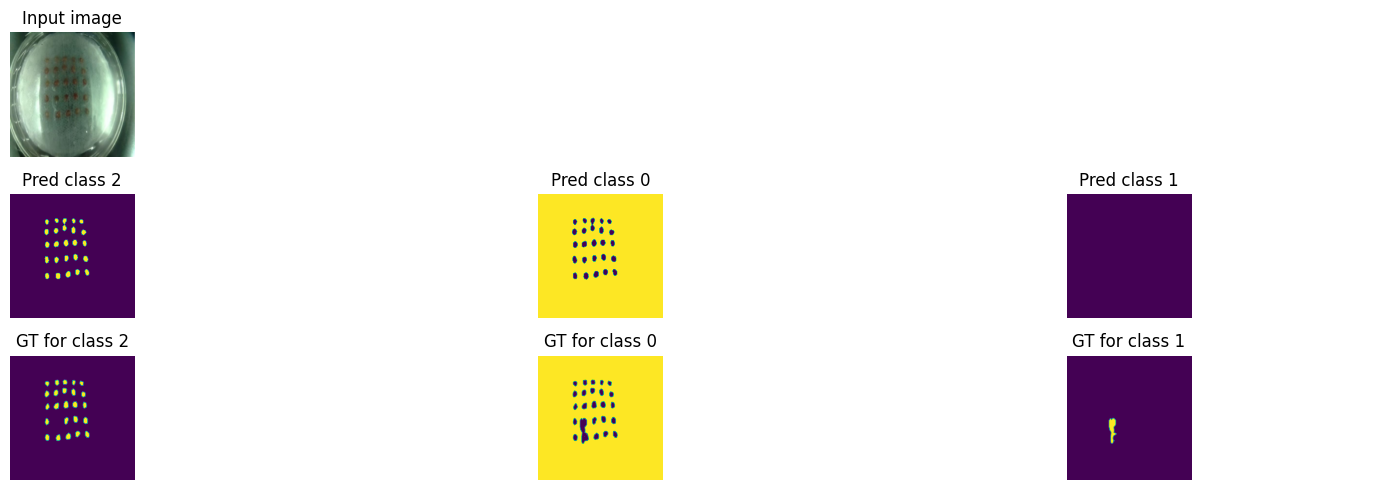

Train loss: 0.07287 | Time: 16m 37s | Val loss: 0.06415
Train_DICE_avg: 0.72220 | Train_Jaccard_avg: 0.65779 | Train_Sensitivity_avg: 0.94459 | Train_Specificity_avg: 0.90563 
Class 0 - Train_DICE: 0.99032 | Train_Jaccard: 0.98086 | Train_Sensitivity: 0.99600 | Train_Specificity: 0.74165 
Class 1 - Train_DICE: 0.41859 | Train_Jaccard: 0.36692 | Train_Sensitivity: 0.91736 | Train_Specificity: 0.98811 
Class 2 - Train_DICE: 0.75768 | Train_Jaccard: 0.62558 | Train_Sensitivity: 0.92041 | Train_Specificity: 0.98714 
Val_DICE_avg: 0.75742 | Val_Jaccard_avg: 0.68679 | Val_Sensitivity_avg: 0.95051 | Val_Specificity_avg: 0.85474 
Class 0 - Val_DICE: 0.99117 | Val_Jaccard: 0.98255 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.59069 
Class 1 - Val_DICE: 0.60655 | Val_Jaccard: 0.55270 | Val_Sensitivity: 0.89067 | Val_Specificity: 0.99231 
Class 2 - Val_DICE: 0.67453 | Val_Jaccard: 0.52511 | Val_Sensitivity: 0.96157 | Val_Specificity: 0.98122 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.06578 | Time: 17m 42s | Val loss: 0.05775
Train_DICE_avg: 0.72551 | Train_Jaccard_avg: 0.65935 | Train_Sensitivity_avg: 0.94084 | Train_Specificity_avg: 0.90438 
Class 0 - Train_DICE: 0.99051 | Train_Jaccard: 0.98124 | Train_Sensitivity: 0.99605 | Train_Specificity: 0.73795 
Class 1 - Train_DICE: 0.43068 | Train_Jaccard: 0.37361 | Train_Sensitivity: 0.90097 | Train_Specificity: 0.98830 
Class 2 - Train_DICE: 0.75533 | Train_Jaccard: 0.62319 | Train_Sensitivity: 0.92551 | Train_Specificity: 0.98690 
Val_DICE_avg: 0.77814 | Val_Jaccard_avg: 0.70738 | Val_Sensitivity_avg: 0.96467 | Val_Specificity_avg: 0.85526 
Class 0 - Val_DICE: 0.99102 | Val_Jaccard: 0.98225 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.59027 
Class 1 - Val_DICE: 0.64226 | Val_Jaccard: 0.58678 | Val_Sensitivity: 0.92992 | Val_Specificity: 0.99291 
Class 2 - Val_DICE: 0.70113 | Val_Jaccard: 0.55310 | Val_Sensitivity: 0.96476 | Val_Specificity: 0.98259 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.05943 | Time: 18m 47s | Val loss: 0.05152
Train_DICE_avg: 0.73984 | Train_Jaccard_avg: 0.67335 | Train_Sensitivity_avg: 0.93824 | Train_Specificity_avg: 0.90976 
Class 0 - Train_DICE: 0.99084 | Train_Jaccard: 0.98188 | Train_Sensitivity: 0.99604 | Train_Specificity: 0.75286 
Class 1 - Train_DICE: 0.46405 | Train_Jaccard: 0.40381 | Train_Sensitivity: 0.89514 | Train_Specificity: 0.98893 
Class 2 - Train_DICE: 0.76463 | Train_Jaccard: 0.63435 | Train_Sensitivity: 0.92355 | Train_Specificity: 0.98750 
Val_DICE_avg: 0.77018 | Val_Jaccard_avg: 0.69767 | Val_Sensitivity_avg: 0.95734 | Val_Specificity_avg: 0.86121 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98389 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.60892 
Class 1 - Val_DICE: 0.63558 | Val_Jaccard: 0.57430 | Val_Sensitivity: 0.90687 | Val_Specificity: 0.99271 
Class 2 - Val_DICE: 0.68310 | Val_Jaccard: 0.53482 | Val_Sensitivity: 0.96592 | Val_Specificity: 0.98201 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.05451 | Time: 19m 51s | Val loss: 0.04688
Train_DICE_avg: 0.74129 | Train_Jaccard_avg: 0.67465 | Train_Sensitivity_avg: 0.93370 | Train_Specificity_avg: 0.91137 
Class 0 - Train_DICE: 0.99093 | Train_Jaccard: 0.98206 | Train_Sensitivity: 0.99614 | Train_Specificity: 0.75739 
Class 1 - Train_DICE: 0.46513 | Train_Jaccard: 0.40332 | Train_Sensitivity: 0.88204 | Train_Specificity: 0.98913 
Class 2 - Train_DICE: 0.76781 | Train_Jaccard: 0.63858 | Train_Sensitivity: 0.92292 | Train_Specificity: 0.98760 
Val_DICE_avg: 0.77056 | Val_Jaccard_avg: 0.69954 | Val_Sensitivity_avg: 0.95417 | Val_Specificity_avg: 0.85858 
Class 0 - Val_DICE: 0.99122 | Val_Jaccard: 0.98265 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59944 
Class 1 - Val_DICE: 0.62063 | Val_Jaccard: 0.56127 | Val_Sensitivity: 0.89902 | Val_Specificity: 0.99301 
Class 2 - Val_DICE: 0.69984 | Val_Jaccard: 0.55469 | Val_Sensitivity: 0.96418 | Val_Specificity: 0.98329 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.05007 | Time: 20m 56s | Val loss: 0.04244
Train_DICE_avg: 0.74639 | Train_Jaccard_avg: 0.67903 | Train_Sensitivity_avg: 0.93747 | Train_Specificity_avg: 0.91061 
Class 0 - Train_DICE: 0.99105 | Train_Jaccard: 0.98230 | Train_Sensitivity: 0.99616 | Train_Specificity: 0.75470 
Class 1 - Train_DICE: 0.47751 | Train_Jaccard: 0.41313 | Train_Sensitivity: 0.88813 | Train_Specificity: 0.98944 
Class 2 - Train_DICE: 0.77060 | Train_Jaccard: 0.64166 | Train_Sensitivity: 0.92811 | Train_Specificity: 0.98767 
Val_DICE_avg: 0.78081 | Val_Jaccard_avg: 0.70984 | Val_Sensitivity_avg: 0.96144 | Val_Specificity_avg: 0.85877 
Class 0 - Val_DICE: 0.99152 | Val_Jaccard: 0.98323 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.59981 
Class 1 - Val_DICE: 0.62949 | Val_Jaccard: 0.56979 | Val_Sensitivity: 0.92055 | Val_Specificity: 0.99284 
Class 2 - Val_DICE: 0.72142 | Val_Jaccard: 0.57651 | Val_Sensitivity: 0.96452 | Val_Specificity: 0.98365 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


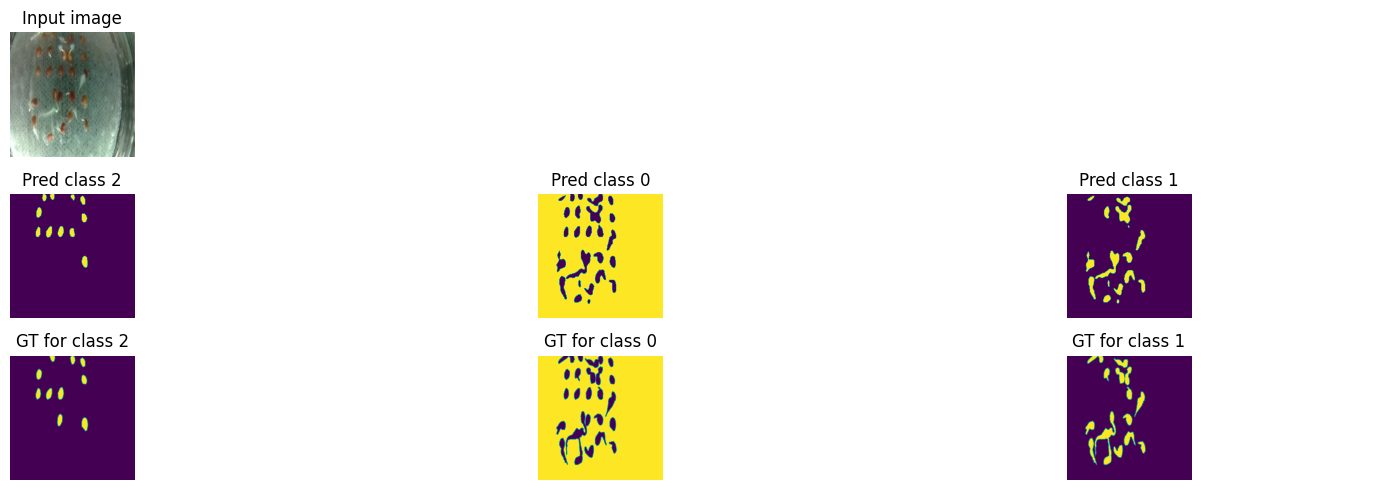

Train loss: 0.04579 | Time: 22m 2s | Val loss: 0.03706
Train_DICE_avg: 0.74436 | Train_Jaccard_avg: 0.67728 | Train_Sensitivity_avg: 0.93481 | Train_Specificity_avg: 0.91061 
Class 0 - Train_DICE: 0.99108 | Train_Jaccard: 0.98235 | Train_Sensitivity: 0.99616 | Train_Specificity: 0.75520 
Class 1 - Train_DICE: 0.47288 | Train_Jaccard: 0.40931 | Train_Sensitivity: 0.88302 | Train_Specificity: 0.98913 
Class 2 - Train_DICE: 0.76912 | Train_Jaccard: 0.64019 | Train_Sensitivity: 0.92525 | Train_Specificity: 0.98748 
Val_DICE_avg: 0.80007 | Val_Jaccard_avg: 0.72991 | Val_Sensitivity_avg: 0.96331 | Val_Specificity_avg: 0.85539 
Class 0 - Val_DICE: 0.99119 | Val_Jaccard: 0.98257 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.58820 
Class 1 - Val_DICE: 0.66913 | Val_Jaccard: 0.60764 | Val_Sensitivity: 0.92600 | Val_Specificity: 0.99341 
Class 2 - Val_DICE: 0.73989 | Val_Jaccard: 0.59950 | Val_Sensitivity: 0.96461 | Val_Specificity: 0.98456 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.04040 | Time: 23m 8s | Val loss: 0.03345
Train_DICE_avg: 0.75087 | Train_Jaccard_avg: 0.68480 | Train_Sensitivity_avg: 0.93815 | Train_Specificity_avg: 0.91306 
Class 0 - Train_DICE: 0.99132 | Train_Jaccard: 0.98281 | Train_Sensitivity: 0.99629 | Train_Specificity: 0.76161 
Class 1 - Train_DICE: 0.48276 | Train_Jaccard: 0.41869 | Train_Sensitivity: 0.89202 | Train_Specificity: 0.98947 
Class 2 - Train_DICE: 0.77854 | Train_Jaccard: 0.65290 | Train_Sensitivity: 0.92614 | Train_Specificity: 0.98810 
Val_DICE_avg: 0.79793 | Val_Jaccard_avg: 0.73012 | Val_Sensitivity_avg: 0.96018 | Val_Specificity_avg: 0.85552 
Class 0 - Val_DICE: 0.99098 | Val_Jaccard: 0.98217 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.58826 
Class 1 - Val_DICE: 0.65606 | Val_Jaccard: 0.60133 | Val_Sensitivity: 0.92273 | Val_Specificity: 0.99343 
Class 2 - Val_DICE: 0.74674 | Val_Jaccard: 0.60686 | Val_Sensitivity: 0.95844 | Val_Specificity: 0.98488 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.03655 | Time: 24m 13s | Val loss: 0.03005
Train_DICE_avg: 0.75584 | Train_Jaccard_avg: 0.68976 | Train_Sensitivity_avg: 0.93866 | Train_Specificity_avg: 0.91404 
Class 0 - Train_DICE: 0.99143 | Train_Jaccard: 0.98304 | Train_Sensitivity: 0.99632 | Train_Specificity: 0.76408 
Class 1 - Train_DICE: 0.49286 | Train_Jaccard: 0.42806 | Train_Sensitivity: 0.89354 | Train_Specificity: 0.98961 
Class 2 - Train_DICE: 0.78324 | Train_Jaccard: 0.65820 | Train_Sensitivity: 0.92611 | Train_Specificity: 0.98844 
Val_DICE_avg: 0.79672 | Val_Jaccard_avg: 0.72621 | Val_Sensitivity_avg: 0.96615 | Val_Specificity_avg: 0.86018 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98354 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.60302 
Class 1 - Val_DICE: 0.66706 | Val_Jaccard: 0.60467 | Val_Sensitivity: 0.93497 | Val_Specificity: 0.99307 
Class 2 - Val_DICE: 0.73143 | Val_Jaccard: 0.59041 | Val_Sensitivity: 0.96414 | Val_Specificity: 0.98445 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.03378 | Time: 25m 17s | Val loss: 0.02768
Train_DICE_avg: 0.75371 | Train_Jaccard_avg: 0.68760 | Train_Sensitivity_avg: 0.93883 | Train_Specificity_avg: 0.91281 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98333 | Train_Sensitivity: 0.99638 | Train_Specificity: 0.76079 
Class 1 - Train_DICE: 0.48655 | Train_Jaccard: 0.42156 | Train_Sensitivity: 0.89217 | Train_Specificity: 0.98939 
Class 2 - Train_DICE: 0.78299 | Train_Jaccard: 0.65790 | Train_Sensitivity: 0.92792 | Train_Specificity: 0.98824 
Val_DICE_avg: 0.79463 | Val_Jaccard_avg: 0.72272 | Val_Sensitivity_avg: 0.95897 | Val_Specificity_avg: 0.86199 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98345 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60843 
Class 1 - Val_DICE: 0.67579 | Val_Jaccard: 0.61053 | Val_Sensitivity: 0.90659 | Val_Specificity: 0.99370 
Class 2 - Val_DICE: 0.71648 | Val_Jaccard: 0.57417 | Val_Sensitivity: 0.97099 | Val_Specificity: 0.98385 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.03150 | Time: 26m 22s | Val loss: 0.02630
Train_DICE_avg: 0.75806 | Train_Jaccard_avg: 0.69167 | Train_Sensitivity_avg: 0.93756 | Train_Specificity_avg: 0.91444 
Class 0 - Train_DICE: 0.99160 | Train_Jaccard: 0.98336 | Train_Sensitivity: 0.99643 | Train_Specificity: 0.76508 
Class 1 - Train_DICE: 0.49648 | Train_Jaccard: 0.42966 | Train_Sensitivity: 0.88830 | Train_Specificity: 0.98973 
Class 2 - Train_DICE: 0.78612 | Train_Jaccard: 0.66198 | Train_Sensitivity: 0.92795 | Train_Specificity: 0.98851 
Val_DICE_avg: 0.78190 | Val_Jaccard_avg: 0.70914 | Val_Sensitivity_avg: 0.94239 | Val_Specificity_avg: 0.86078 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98334 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60510 
Class 1 - Val_DICE: 0.65097 | Val_Jaccard: 0.58495 | Val_Sensitivity: 0.85317 | Val_Specificity: 0.99424 
Class 2 - Val_DICE: 0.70317 | Val_Jaccard: 0.55914 | Val_Sensitivity: 0.97461 | Val_Specificity: 0.98299 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


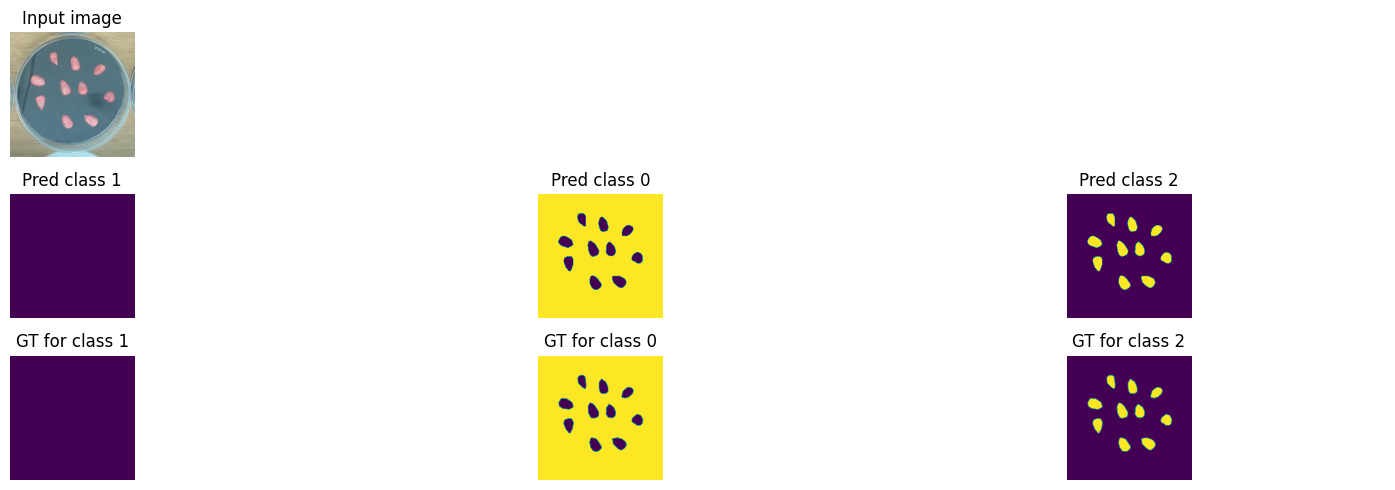

Train loss: 0.02999 | Time: 27m 28s | Val loss: 0.02427
Train_DICE_avg: 0.75635 | Train_Jaccard_avg: 0.68985 | Train_Sensitivity_avg: 0.93993 | Train_Specificity_avg: 0.91388 
Class 0 - Train_DICE: 0.99171 | Train_Jaccard: 0.98358 | Train_Sensitivity: 0.99651 | Train_Specificity: 0.76401 
Class 1 - Train_DICE: 0.49307 | Train_Jaccard: 0.42673 | Train_Sensitivity: 0.89613 | Train_Specificity: 0.98926 
Class 2 - Train_DICE: 0.78427 | Train_Jaccard: 0.65925 | Train_Sensitivity: 0.92715 | Train_Specificity: 0.98836 
Val_DICE_avg: 0.79445 | Val_Jaccard_avg: 0.72186 | Val_Sensitivity_avg: 0.95473 | Val_Specificity_avg: 0.86330 
Class 0 - Val_DICE: 0.99196 | Val_Jaccard: 0.98409 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61284 
Class 1 - Val_DICE: 0.67286 | Val_Jaccard: 0.60677 | Val_Sensitivity: 0.89780 | Val_Specificity: 0.99370 
Class 2 - Val_DICE: 0.71854 | Val_Jaccard: 0.57471 | Val_Sensitivity: 0.96705 | Val_Specificity: 0.98338 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.02886 | Time: 28m 33s | Val loss: 0.02316
Train_DICE_avg: 0.75783 | Train_Jaccard_avg: 0.69143 | Train_Sensitivity_avg: 0.93795 | Train_Specificity_avg: 0.91413 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98334 | Train_Sensitivity: 0.99656 | Train_Specificity: 0.76453 
Class 1 - Train_DICE: 0.49530 | Train_Jaccard: 0.42840 | Train_Sensitivity: 0.88630 | Train_Specificity: 0.98956 
Class 2 - Train_DICE: 0.78662 | Train_Jaccard: 0.66256 | Train_Sensitivity: 0.93098 | Train_Specificity: 0.98829 
Val_DICE_avg: 0.80048 | Val_Jaccard_avg: 0.73017 | Val_Sensitivity_avg: 0.96587 | Val_Specificity_avg: 0.86245 
Class 0 - Val_DICE: 0.99166 | Val_Jaccard: 0.98350 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60954 
Class 1 - Val_DICE: 0.68033 | Val_Jaccard: 0.61937 | Val_Sensitivity: 0.92600 | Val_Specificity: 0.99375 
Class 2 - Val_DICE: 0.72946 | Val_Jaccard: 0.58763 | Val_Sensitivity: 0.97224 | Val_Specificity: 0.98405 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.02717 | Time: 29m 39s | Val loss: 0.02222
Train_DICE_avg: 0.76610 | Train_Jaccard_avg: 0.69986 | Train_Sensitivity_avg: 0.94080 | Train_Specificity_avg: 0.91569 
Class 0 - Train_DICE: 0.99178 | Train_Jaccard: 0.98373 | Train_Sensitivity: 0.99663 | Train_Specificity: 0.76864 
Class 1 - Train_DICE: 0.51361 | Train_Jaccard: 0.44524 | Train_Sensitivity: 0.89499 | Train_Specificity: 0.98972 
Class 2 - Train_DICE: 0.79289 | Train_Jaccard: 0.67062 | Train_Sensitivity: 0.93078 | Train_Specificity: 0.98870 
Val_DICE_avg: 0.80066 | Val_Jaccard_avg: 0.72791 | Val_Sensitivity_avg: 0.95842 | Val_Specificity_avg: 0.86569 
Class 0 - Val_DICE: 0.99218 | Val_Jaccard: 0.98452 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62003 
Class 1 - Val_DICE: 0.68923 | Val_Jaccard: 0.62325 | Val_Sensitivity: 0.90283 | Val_Specificity: 0.99385 
Class 2 - Val_DICE: 0.72056 | Val_Jaccard: 0.57597 | Val_Sensitivity: 0.97308 | Val_Specificity: 0.98319 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.02630 | Time: 30m 43s | Val loss: 0.02158
Train_DICE_avg: 0.76687 | Train_Jaccard_avg: 0.70068 | Train_Sensitivity_avg: 0.94178 | Train_Specificity_avg: 0.91552 
Class 0 - Train_DICE: 0.99184 | Train_Jaccard: 0.98384 | Train_Sensitivity: 0.99670 | Train_Specificity: 0.76807 
Class 1 - Train_DICE: 0.51575 | Train_Jaccard: 0.44661 | Train_Sensitivity: 0.89507 | Train_Specificity: 0.98980 
Class 2 - Train_DICE: 0.79302 | Train_Jaccard: 0.67158 | Train_Sensitivity: 0.93358 | Train_Specificity: 0.98867 
Val_DICE_avg: 0.79991 | Val_Jaccard_avg: 0.72667 | Val_Sensitivity_avg: 0.95393 | Val_Specificity_avg: 0.86228 
Class 0 - Val_DICE: 0.99168 | Val_Jaccard: 0.98354 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60900 
Class 1 - Val_DICE: 0.68268 | Val_Jaccard: 0.61425 | Val_Sensitivity: 0.88728 | Val_Specificity: 0.99421 
Class 2 - Val_DICE: 0.72538 | Val_Jaccard: 0.58223 | Val_Sensitivity: 0.97513 | Val_Specificity: 0.98362 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.02559 | Time: 31m 48s | Val loss: 0.02026
Train_DICE_avg: 0.77094 | Train_Jaccard_avg: 0.70452 | Train_Sensitivity_avg: 0.94068 | Train_Specificity_avg: 0.91749 
Class 0 - Train_DICE: 0.99193 | Train_Jaccard: 0.98402 | Train_Sensitivity: 0.99659 | Train_Specificity: 0.77329 
Class 1 - Train_DICE: 0.52717 | Train_Jaccard: 0.45683 | Train_Sensitivity: 0.89305 | Train_Specificity: 0.99024 
Class 2 - Train_DICE: 0.79372 | Train_Jaccard: 0.67271 | Train_Sensitivity: 0.93241 | Train_Specificity: 0.98894 
Val_DICE_avg: 0.80564 | Val_Jaccard_avg: 0.73469 | Val_Sensitivity_avg: 0.96010 | Val_Specificity_avg: 0.86049 
Class 0 - Val_DICE: 0.99165 | Val_Jaccard: 0.98348 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60274 
Class 1 - Val_DICE: 0.67319 | Val_Jaccard: 0.60738 | Val_Sensitivity: 0.91396 | Val_Specificity: 0.99379 
Class 2 - Val_DICE: 0.75207 | Val_Jaccard: 0.61321 | Val_Sensitivity: 0.96698 | Val_Specificity: 0.98494 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


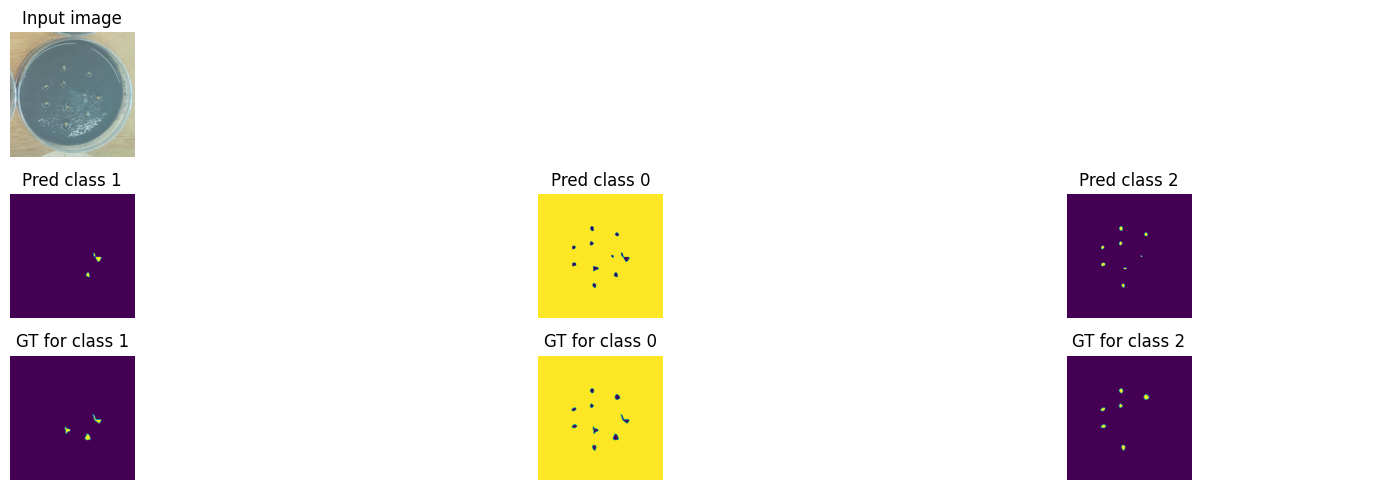

Train loss: 0.02467 | Time: 32m 54s | Val loss: 0.01958
Train_DICE_avg: 0.76654 | Train_Jaccard_avg: 0.70057 | Train_Sensitivity_avg: 0.94380 | Train_Specificity_avg: 0.91423 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98393 | Train_Sensitivity: 0.99677 | Train_Specificity: 0.76418 
Class 1 - Train_DICE: 0.51428 | Train_Jaccard: 0.44568 | Train_Sensitivity: 0.89935 | Train_Specificity: 0.98974 
Class 2 - Train_DICE: 0.79346 | Train_Jaccard: 0.67211 | Train_Sensitivity: 0.93528 | Train_Specificity: 0.98876 
Val_DICE_avg: 0.81070 | Val_Jaccard_avg: 0.74068 | Val_Sensitivity_avg: 0.97058 | Val_Specificity_avg: 0.86093 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98334 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.60370 
Class 1 - Val_DICE: 0.69542 | Val_Jaccard: 0.63048 | Val_Sensitivity: 0.94265 | Val_Specificity: 0.99380 
Class 2 - Val_DICE: 0.74509 | Val_Jaccard: 0.60821 | Val_Sensitivity: 0.96969 | Val_Specificity: 0.98529 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.02382 | Time: 34m 0s | Val loss: 0.01918
Train_DICE_avg: 0.76725 | Train_Jaccard_avg: 0.70090 | Train_Sensitivity_avg: 0.94238 | Train_Specificity_avg: 0.91553 
Class 0 - Train_DICE: 0.99192 | Train_Jaccard: 0.98401 | Train_Sensitivity: 0.99687 | Train_Specificity: 0.76817 
Class 1 - Train_DICE: 0.51591 | Train_Jaccard: 0.44626 | Train_Sensitivity: 0.89675 | Train_Specificity: 0.98970 
Class 2 - Train_DICE: 0.79392 | Train_Jaccard: 0.67244 | Train_Sensitivity: 0.93352 | Train_Specificity: 0.98872 
Val_DICE_avg: 0.81065 | Val_Jaccard_avg: 0.73937 | Val_Sensitivity_avg: 0.96697 | Val_Specificity_avg: 0.86206 
Class 0 - Val_DICE: 0.99145 | Val_Jaccard: 0.98311 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.60721 
Class 1 - Val_DICE: 0.70123 | Val_Jaccard: 0.63330 | Val_Sensitivity: 0.93886 | Val_Specificity: 0.99368 
Class 2 - Val_DICE: 0.73927 | Val_Jaccard: 0.60170 | Val_Sensitivity: 0.96264 | Val_Specificity: 0.98528 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.02304 | Time: 35m 5s | Val loss: 0.01830
Train_DICE_avg: 0.76968 | Train_Jaccard_avg: 0.70322 | Train_Sensitivity_avg: 0.94307 | Train_Specificity_avg: 0.91316 
Class 0 - Train_DICE: 0.99187 | Train_Jaccard: 0.98389 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.76106 
Class 1 - Train_DICE: 0.52265 | Train_Jaccard: 0.45285 | Train_Sensitivity: 0.89756 | Train_Specificity: 0.98984 
Class 2 - Train_DICE: 0.79453 | Train_Jaccard: 0.67290 | Train_Sensitivity: 0.93480 | Train_Specificity: 0.98858 
Val_DICE_avg: 0.81243 | Val_Jaccard_avg: 0.73960 | Val_Sensitivity_avg: 0.96106 | Val_Specificity_avg: 0.85961 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98351 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.60005 
Class 1 - Val_DICE: 0.70364 | Val_Jaccard: 0.63211 | Val_Sensitivity: 0.90852 | Val_Specificity: 0.99421 
Class 2 - Val_DICE: 0.74200 | Val_Jaccard: 0.60319 | Val_Sensitivity: 0.97522 | Val_Specificity: 0.98456 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.02226 | Time: 36m 10s | Val loss: 0.01773
Train_DICE_avg: 0.77464 | Train_Jaccard_avg: 0.70844 | Train_Sensitivity_avg: 0.94604 | Train_Specificity_avg: 0.91552 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98415 | Train_Sensitivity: 0.99693 | Train_Specificity: 0.76722 
Class 1 - Train_DICE: 0.53474 | Train_Jaccard: 0.46361 | Train_Sensitivity: 0.90533 | Train_Specificity: 0.99026 
Class 2 - Train_DICE: 0.79718 | Train_Jaccard: 0.67756 | Train_Sensitivity: 0.93586 | Train_Specificity: 0.98908 
Val_DICE_avg: 0.82057 | Val_Jaccard_avg: 0.75079 | Val_Sensitivity_avg: 0.97103 | Val_Specificity_avg: 0.85790 
Class 0 - Val_DICE: 0.99144 | Val_Jaccard: 0.98305 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.59422 
Class 1 - Val_DICE: 0.71140 | Val_Jaccard: 0.64518 | Val_Sensitivity: 0.94679 | Val_Specificity: 0.99381 
Class 2 - Val_DICE: 0.75887 | Val_Jaccard: 0.62415 | Val_Sensitivity: 0.96689 | Val_Specificity: 0.98567 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.02170 | Time: 37m 15s | Val loss: 0.01747
Train_DICE_avg: 0.77773 | Train_Jaccard_avg: 0.71088 | Train_Sensitivity_avg: 0.94864 | Train_Specificity_avg: 0.91450 
Class 0 - Train_DICE: 0.99205 | Train_Jaccard: 0.98426 | Train_Sensitivity: 0.99702 | Train_Specificity: 0.76459 
Class 1 - Train_DICE: 0.54224 | Train_Jaccard: 0.46986 | Train_Sensitivity: 0.90971 | Train_Specificity: 0.99016 
Class 2 - Train_DICE: 0.79889 | Train_Jaccard: 0.67852 | Train_Sensitivity: 0.93918 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.81547 | Val_Jaccard_avg: 0.74276 | Val_Sensitivity_avg: 0.96851 | Val_Specificity_avg: 0.86509 
Class 0 - Val_DICE: 0.99214 | Val_Jaccard: 0.98444 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61681 
Class 1 - Val_DICE: 0.71749 | Val_Jaccard: 0.64786 | Val_Sensitivity: 0.93409 | Val_Specificity: 0.99411 
Class 2 - Val_DICE: 0.73678 | Val_Jaccard: 0.59596 | Val_Sensitivity: 0.97204 | Val_Specificity: 0.98434 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


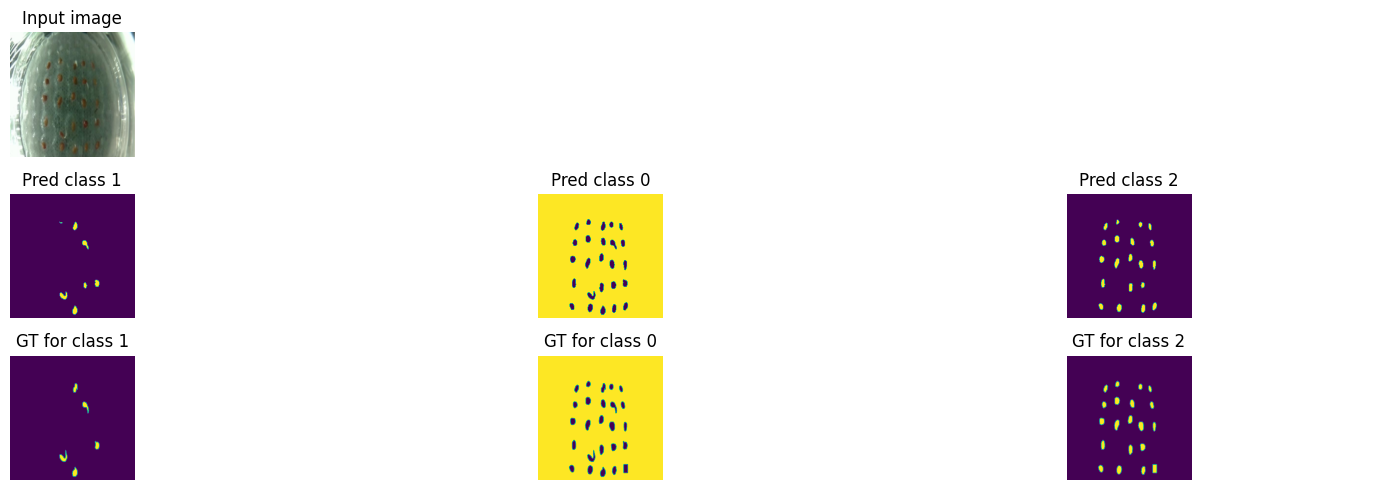

Train loss: 0.02139 | Time: 38m 21s | Val loss: 0.01705
Train_DICE_avg: 0.77831 | Train_Jaccard_avg: 0.71251 | Train_Sensitivity_avg: 0.94402 | Train_Specificity_avg: 0.91740 
Class 0 - Train_DICE: 0.99221 | Train_Jaccard: 0.98456 | Train_Sensitivity: 0.99698 | Train_Specificity: 0.77283 
Class 1 - Train_DICE: 0.54087 | Train_Jaccard: 0.47004 | Train_Sensitivity: 0.89905 | Train_Specificity: 0.99030 
Class 2 - Train_DICE: 0.80185 | Train_Jaccard: 0.68292 | Train_Sensitivity: 0.93602 | Train_Specificity: 0.98906 
Val_DICE_avg: 0.81308 | Val_Jaccard_avg: 0.74136 | Val_Sensitivity_avg: 0.96327 | Val_Specificity_avg: 0.86356 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98407 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61182 
Class 1 - Val_DICE: 0.70241 | Val_Jaccard: 0.63372 | Val_Sensitivity: 0.91781 | Val_Specificity: 0.99421 
Class 2 - Val_DICE: 0.74488 | Val_Jaccard: 0.60628 | Val_Sensitivity: 0.97262 | Val_Specificity: 0.98466 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.02107 | Time: 39m 25s | Val loss: 0.01710
Train_DICE_avg: 0.77791 | Train_Jaccard_avg: 0.71159 | Train_Sensitivity_avg: 0.94588 | Train_Specificity_avg: 0.91540 
Class 0 - Train_DICE: 0.99220 | Train_Jaccard: 0.98455 | Train_Sensitivity: 0.99709 | Train_Specificity: 0.76687 
Class 1 - Train_DICE: 0.54018 | Train_Jaccard: 0.46851 | Train_Sensitivity: 0.90177 | Train_Specificity: 0.99034 
Class 2 - Train_DICE: 0.80133 | Train_Jaccard: 0.68171 | Train_Sensitivity: 0.93879 | Train_Specificity: 0.98899 
Val_DICE_avg: 0.82422 | Val_Jaccard_avg: 0.75539 | Val_Sensitivity_avg: 0.97312 | Val_Specificity_avg: 0.85644 
Class 0 - Val_DICE: 0.99126 | Val_Jaccard: 0.98270 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.58921 
Class 1 - Val_DICE: 0.71107 | Val_Jaccard: 0.64594 | Val_Sensitivity: 0.95154 | Val_Specificity: 0.99396 
Class 2 - Val_DICE: 0.77034 | Val_Jaccard: 0.63754 | Val_Sensitivity: 0.96838 | Val_Specificity: 0.98614 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.02069 | Time: 40m 30s | Val loss: 0.01663
Train_DICE_avg: 0.78458 | Train_Jaccard_avg: 0.71910 | Train_Sensitivity_avg: 0.94741 | Train_Specificity_avg: 0.91742 
Class 0 - Train_DICE: 0.99222 | Train_Jaccard: 0.98458 | Train_Sensitivity: 0.99707 | Train_Specificity: 0.77266 
Class 1 - Train_DICE: 0.55403 | Train_Jaccard: 0.48208 | Train_Sensitivity: 0.90578 | Train_Specificity: 0.99027 
Class 2 - Train_DICE: 0.80750 | Train_Jaccard: 0.69062 | Train_Sensitivity: 0.93939 | Train_Specificity: 0.98932 
Val_DICE_avg: 0.81957 | Val_Jaccard_avg: 0.74712 | Val_Sensitivity_avg: 0.96468 | Val_Specificity_avg: 0.86051 
Class 0 - Val_DICE: 0.99165 | Val_Jaccard: 0.98348 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.60204 
Class 1 - Val_DICE: 0.71627 | Val_Jaccard: 0.64340 | Val_Sensitivity: 0.91775 | Val_Specificity: 0.99434 
Class 2 - Val_DICE: 0.75079 | Val_Jaccard: 0.61449 | Val_Sensitivity: 0.97687 | Val_Specificity: 0.98514 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.02052 | Time: 41m 35s | Val loss: 0.01691
Train_DICE_avg: 0.78124 | Train_Jaccard_avg: 0.71481 | Train_Sensitivity_avg: 0.94754 | Train_Specificity_avg: 0.91688 
Class 0 - Train_DICE: 0.99223 | Train_Jaccard: 0.98460 | Train_Sensitivity: 0.99718 | Train_Specificity: 0.77132 
Class 1 - Train_DICE: 0.54756 | Train_Jaccard: 0.47389 | Train_Sensitivity: 0.90493 | Train_Specificity: 0.99021 
Class 2 - Train_DICE: 0.80392 | Train_Jaccard: 0.68594 | Train_Sensitivity: 0.94052 | Train_Specificity: 0.98912 
Val_DICE_avg: 0.81940 | Val_Jaccard_avg: 0.74774 | Val_Sensitivity_avg: 0.97107 | Val_Specificity_avg: 0.86273 
Class 0 - Val_DICE: 0.99176 | Val_Jaccard: 0.98370 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.60895 
Class 1 - Val_DICE: 0.72457 | Val_Jaccard: 0.65697 | Val_Sensitivity: 0.93795 | Val_Specificity: 0.99447 
Class 2 - Val_DICE: 0.74187 | Val_Jaccard: 0.60257 | Val_Sensitivity: 0.97579 | Val_Specificity: 0.98476 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.02010 | Time: 42m 40s | Val loss: 0.01673
Train_DICE_avg: 0.78581 | Train_Jaccard_avg: 0.72038 | Train_Sensitivity_avg: 0.94769 | Train_Specificity_avg: 0.91969 
Class 0 - Train_DICE: 0.99239 | Train_Jaccard: 0.98493 | Train_Sensitivity: 0.99717 | Train_Specificity: 0.77937 
Class 1 - Train_DICE: 0.55584 | Train_Jaccard: 0.48345 | Train_Sensitivity: 0.90563 | Train_Specificity: 0.99038 
Class 2 - Train_DICE: 0.80918 | Train_Jaccard: 0.69277 | Train_Sensitivity: 0.94027 | Train_Specificity: 0.98933 
Val_DICE_avg: 0.82690 | Val_Jaccard_avg: 0.75501 | Val_Sensitivity_avg: 0.96886 | Val_Specificity_avg: 0.86013 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98332 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60078 
Class 1 - Val_DICE: 0.74064 | Val_Jaccard: 0.66972 | Val_Sensitivity: 0.93061 | Val_Specificity: 0.99458 
Class 2 - Val_DICE: 0.74851 | Val_Jaccard: 0.61199 | Val_Sensitivity: 0.97649 | Val_Specificity: 0.98503 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


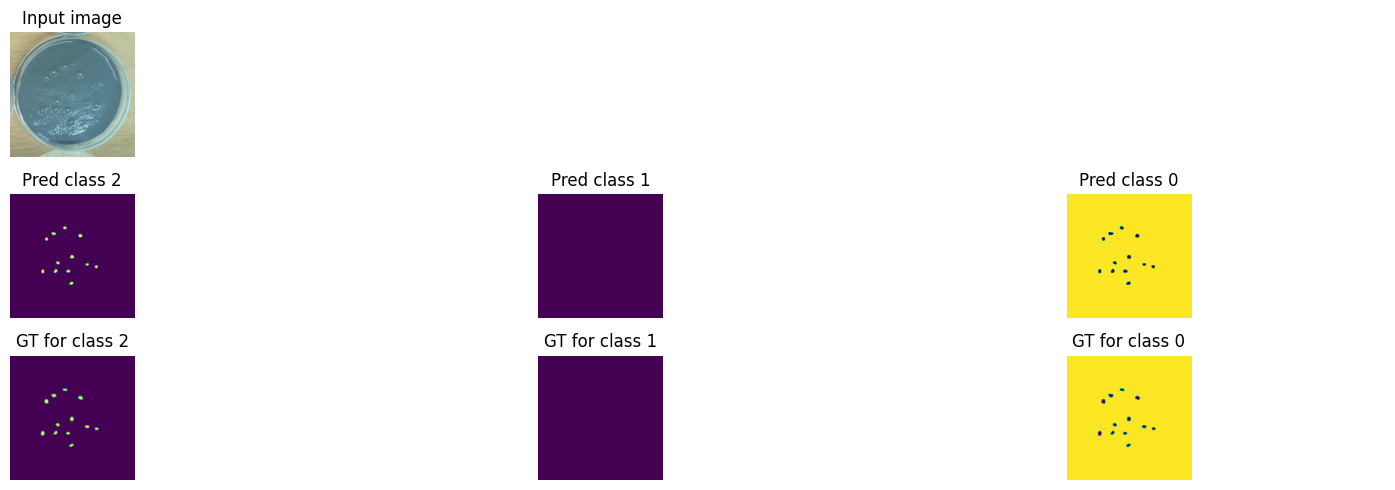

Train loss: 0.01997 | Time: 43m 46s | Val loss: 0.01642
Train_DICE_avg: 0.79024 | Train_Jaccard_avg: 0.72446 | Train_Sensitivity_avg: 0.94859 | Train_Specificity_avg: 0.91993 
Class 0 - Train_DICE: 0.99240 | Train_Jaccard: 0.98495 | Train_Sensitivity: 0.99704 | Train_Specificity: 0.77945 
Class 1 - Train_DICE: 0.56710 | Train_Jaccard: 0.49319 | Train_Sensitivity: 0.90804 | Train_Specificity: 0.99081 
Class 2 - Train_DICE: 0.81122 | Train_Jaccard: 0.69526 | Train_Sensitivity: 0.94068 | Train_Specificity: 0.98954 
Val_DICE_avg: 0.82221 | Val_Jaccard_avg: 0.75069 | Val_Sensitivity_avg: 0.97042 | Val_Specificity_avg: 0.86206 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98378 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60682 
Class 1 - Val_DICE: 0.72954 | Val_Jaccard: 0.65978 | Val_Sensitivity: 0.93441 | Val_Specificity: 0.99425 
Class 2 - Val_DICE: 0.74529 | Val_Jaccard: 0.60850 | Val_Sensitivity: 0.97745 | Val_Specificity: 0.98510 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.01968 | Time: 44m 51s | Val loss: 0.01652
Train_DICE_avg: 0.78873 | Train_Jaccard_avg: 0.72321 | Train_Sensitivity_avg: 0.94894 | Train_Specificity_avg: 0.91741 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98501 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.77219 
Class 1 - Train_DICE: 0.56581 | Train_Jaccard: 0.49276 | Train_Sensitivity: 0.90875 | Train_Specificity: 0.99061 
Class 2 - Train_DICE: 0.80794 | Train_Jaccard: 0.69186 | Train_Sensitivity: 0.94074 | Train_Specificity: 0.98943 
Val_DICE_avg: 0.82007 | Val_Jaccard_avg: 0.74832 | Val_Sensitivity_avg: 0.96749 | Val_Specificity_avg: 0.86428 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98396 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.61366 
Class 1 - Val_DICE: 0.72836 | Val_Jaccard: 0.65989 | Val_Sensitivity: 0.92545 | Val_Specificity: 0.99449 
Class 2 - Val_DICE: 0.73995 | Val_Jaccard: 0.60113 | Val_Sensitivity: 0.97760 | Val_Specificity: 0.98469 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.01952 | Time: 45m 56s | Val loss: 0.01639
Train_DICE_avg: 0.78656 | Train_Jaccard_avg: 0.72074 | Train_Sensitivity_avg: 0.94913 | Train_Specificity_avg: 0.91829 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98502 | Train_Sensitivity: 0.99736 | Train_Specificity: 0.77521 
Class 1 - Train_DICE: 0.55772 | Train_Jaccard: 0.48401 | Train_Sensitivity: 0.90658 | Train_Specificity: 0.99035 
Class 2 - Train_DICE: 0.80951 | Train_Jaccard: 0.69318 | Train_Sensitivity: 0.94345 | Train_Specificity: 0.98930 
Val_DICE_avg: 0.82773 | Val_Jaccard_avg: 0.75710 | Val_Sensitivity_avg: 0.96763 | Val_Specificity_avg: 0.85928 
Class 0 - Val_DICE: 0.99145 | Val_Jaccard: 0.98310 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.59773 
Class 1 - Val_DICE: 0.72708 | Val_Jaccard: 0.65751 | Val_Sensitivity: 0.92901 | Val_Specificity: 0.99438 
Class 2 - Val_DICE: 0.76466 | Val_Jaccard: 0.63069 | Val_Sensitivity: 0.97443 | Val_Specificity: 0.98572 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01934 | Time: 47m 1s | Val loss: 0.01637
Train_DICE_avg: 0.79084 | Train_Jaccard_avg: 0.72508 | Train_Sensitivity_avg: 0.95002 | Train_Specificity_avg: 0.92042 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98524 | Train_Sensitivity: 0.99724 | Train_Specificity: 0.78097 
Class 1 - Train_DICE: 0.56824 | Train_Jaccard: 0.49388 | Train_Sensitivity: 0.90882 | Train_Specificity: 0.99076 
Class 2 - Train_DICE: 0.81174 | Train_Jaccard: 0.69613 | Train_Sensitivity: 0.94399 | Train_Specificity: 0.98951 
Val_DICE_avg: 0.83267 | Val_Jaccard_avg: 0.76150 | Val_Sensitivity_avg: 0.96715 | Val_Specificity_avg: 0.85886 
Class 0 - Val_DICE: 0.99127 | Val_Jaccard: 0.98274 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.59622 
Class 1 - Val_DICE: 0.75176 | Val_Jaccard: 0.68255 | Val_Sensitivity: 0.92395 | Val_Specificity: 0.99494 
Class 2 - Val_DICE: 0.75499 | Val_Jaccard: 0.61921 | Val_Sensitivity: 0.97801 | Val_Specificity: 0.98542 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01937 | Time: 48m 7s | Val loss: 0.01601
Train_DICE_avg: 0.79020 | Train_Jaccard_avg: 0.72425 | Train_Sensitivity_avg: 0.94897 | Train_Specificity_avg: 0.91959 
Class 0 - Train_DICE: 0.99246 | Train_Jaccard: 0.98506 | Train_Sensitivity: 0.99727 | Train_Specificity: 0.77863 
Class 1 - Train_DICE: 0.56716 | Train_Jaccard: 0.49288 | Train_Sensitivity: 0.90669 | Train_Specificity: 0.99070 
Class 2 - Train_DICE: 0.81098 | Train_Jaccard: 0.69482 | Train_Sensitivity: 0.94294 | Train_Specificity: 0.98944 
Val_DICE_avg: 0.82545 | Val_Jaccard_avg: 0.75349 | Val_Sensitivity_avg: 0.97199 | Val_Specificity_avg: 0.86453 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98424 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61405 
Class 1 - Val_DICE: 0.73146 | Val_Jaccard: 0.65947 | Val_Sensitivity: 0.94058 | Val_Specificity: 0.99417 
Class 2 - Val_DICE: 0.75286 | Val_Jaccard: 0.61677 | Val_Sensitivity: 0.97599 | Val_Specificity: 0.98537 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


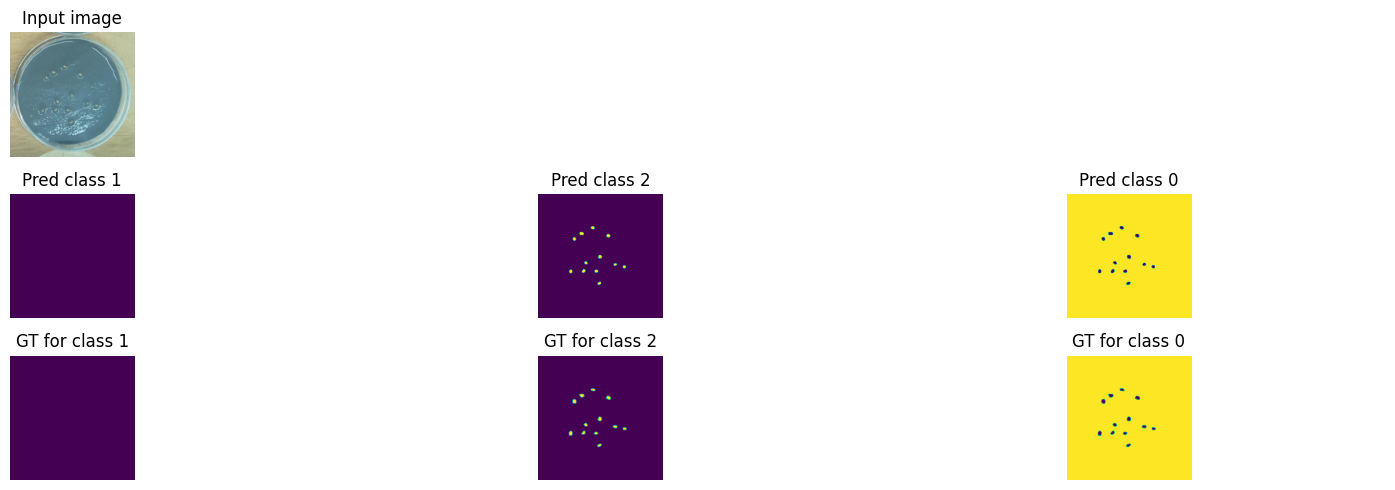

Train loss: 0.01919 | Time: 49m 13s | Val loss: 0.01601
Train_DICE_avg: 0.79166 | Train_Jaccard_avg: 0.72554 | Train_Sensitivity_avg: 0.95079 | Train_Specificity_avg: 0.91758 
Class 0 - Train_DICE: 0.99240 | Train_Jaccard: 0.98494 | Train_Sensitivity: 0.99732 | Train_Specificity: 0.77259 
Class 1 - Train_DICE: 0.57304 | Train_Jaccard: 0.49827 | Train_Sensitivity: 0.91205 | Train_Specificity: 0.99070 
Class 2 - Train_DICE: 0.80953 | Train_Jaccard: 0.69342 | Train_Sensitivity: 0.94300 | Train_Specificity: 0.98945 
Val_DICE_avg: 0.82510 | Val_Jaccard_avg: 0.75390 | Val_Sensitivity_avg: 0.96709 | Val_Specificity_avg: 0.86490 
Class 0 - Val_DICE: 0.99200 | Val_Jaccard: 0.98416 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.61513 
Class 1 - Val_DICE: 0.72845 | Val_Jaccard: 0.65996 | Val_Sensitivity: 0.92906 | Val_Specificity: 0.99440 
Class 2 - Val_DICE: 0.75484 | Val_Jaccard: 0.61757 | Val_Sensitivity: 0.97277 | Val_Specificity: 0.98516 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.01910 | Time: 50m 18s | Val loss: 0.01605
Train_DICE_avg: 0.79042 | Train_Jaccard_avg: 0.72448 | Train_Sensitivity_avg: 0.95020 | Train_Specificity_avg: 0.91839 
Class 0 - Train_DICE: 0.99254 | Train_Jaccard: 0.98522 | Train_Sensitivity: 0.99740 | Train_Specificity: 0.77526 
Class 1 - Train_DICE: 0.56783 | Train_Jaccard: 0.49330 | Train_Sensitivity: 0.90948 | Train_Specificity: 0.99051 
Class 2 - Train_DICE: 0.81087 | Train_Jaccard: 0.69493 | Train_Sensitivity: 0.94373 | Train_Specificity: 0.98939 
Val_DICE_avg: 0.82881 | Val_Jaccard_avg: 0.75805 | Val_Sensitivity_avg: 0.96617 | Val_Specificity_avg: 0.85977 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98330 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.59935 
Class 1 - Val_DICE: 0.73131 | Val_Jaccard: 0.66198 | Val_Sensitivity: 0.92532 | Val_Specificity: 0.99444 
Class 2 - Val_DICE: 0.76356 | Val_Jaccard: 0.62888 | Val_Sensitivity: 0.97376 | Val_Specificity: 0.98554 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01894 | Time: 51m 23s | Val loss: 0.01588
Train_DICE_avg: 0.79266 | Train_Jaccard_avg: 0.72699 | Train_Sensitivity_avg: 0.95205 | Train_Specificity_avg: 0.91909 
Class 0 - Train_DICE: 0.99259 | Train_Jaccard: 0.98531 | Train_Sensitivity: 0.99733 | Train_Specificity: 0.77709 
Class 1 - Train_DICE: 0.57311 | Train_Jaccard: 0.49882 | Train_Sensitivity: 0.91329 | Train_Specificity: 0.99068 
Class 2 - Train_DICE: 0.81230 | Train_Jaccard: 0.69685 | Train_Sensitivity: 0.94553 | Train_Specificity: 0.98949 
Val_DICE_avg: 0.82994 | Val_Jaccard_avg: 0.75826 | Val_Sensitivity_avg: 0.96911 | Val_Specificity_avg: 0.86269 
Class 0 - Val_DICE: 0.99184 | Val_Jaccard: 0.98386 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.60808 
Class 1 - Val_DICE: 0.74100 | Val_Jaccard: 0.66958 | Val_Sensitivity: 0.93078 | Val_Specificity: 0.99459 
Class 2 - Val_DICE: 0.75696 | Val_Jaccard: 0.62134 | Val_Sensitivity: 0.97712 | Val_Specificity: 0.98539 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.01884 | Time: 52m 28s | Val loss: 0.01584
Train_DICE_avg: 0.79252 | Train_Jaccard_avg: 0.72726 | Train_Sensitivity_avg: 0.95049 | Train_Specificity_avg: 0.91754 
Class 0 - Train_DICE: 0.99259 | Train_Jaccard: 0.98531 | Train_Sensitivity: 0.99742 | Train_Specificity: 0.77229 
Class 1 - Train_DICE: 0.57198 | Train_Jaccard: 0.49803 | Train_Sensitivity: 0.90860 | Train_Specificity: 0.99071 
Class 2 - Train_DICE: 0.81300 | Train_Jaccard: 0.69843 | Train_Sensitivity: 0.94545 | Train_Specificity: 0.98963 
Val_DICE_avg: 0.82914 | Val_Jaccard_avg: 0.75784 | Val_Sensitivity_avg: 0.96506 | Val_Specificity_avg: 0.86197 
Class 0 - Val_DICE: 0.99172 | Val_Jaccard: 0.98362 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.60587 
Class 1 - Val_DICE: 0.73590 | Val_Jaccard: 0.66535 | Val_Sensitivity: 0.91815 | Val_Specificity: 0.99459 
Class 2 - Val_DICE: 0.75979 | Val_Jaccard: 0.62456 | Val_Sensitivity: 0.97759 | Val_Specificity: 0.98546 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.01878 | Time: 53m 34s | Val loss: 0.01592
Train_DICE_avg: 0.79526 | Train_Jaccard_avg: 0.72961 | Train_Sensitivity_avg: 0.95257 | Train_Specificity_avg: 0.92024 
Class 0 - Train_DICE: 0.99262 | Train_Jaccard: 0.98537 | Train_Sensitivity: 0.99731 | Train_Specificity: 0.78034 
Class 1 - Train_DICE: 0.58010 | Train_Jaccard: 0.50570 | Train_Sensitivity: 0.91431 | Train_Specificity: 0.99085 
Class 2 - Train_DICE: 0.81307 | Train_Jaccard: 0.69776 | Train_Sensitivity: 0.94607 | Train_Specificity: 0.98954 
Val_DICE_avg: 0.83110 | Val_Jaccard_avg: 0.75946 | Val_Sensitivity_avg: 0.96864 | Val_Specificity_avg: 0.86243 
Class 0 - Val_DICE: 0.99166 | Val_Jaccard: 0.98350 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.60729 
Class 1 - Val_DICE: 0.74868 | Val_Jaccard: 0.67843 | Val_Sensitivity: 0.92871 | Val_Specificity: 0.99476 
Class 2 - Val_DICE: 0.75298 | Val_Jaccard: 0.61647 | Val_Sensitivity: 0.97774 | Val_Specificity: 0.98523 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


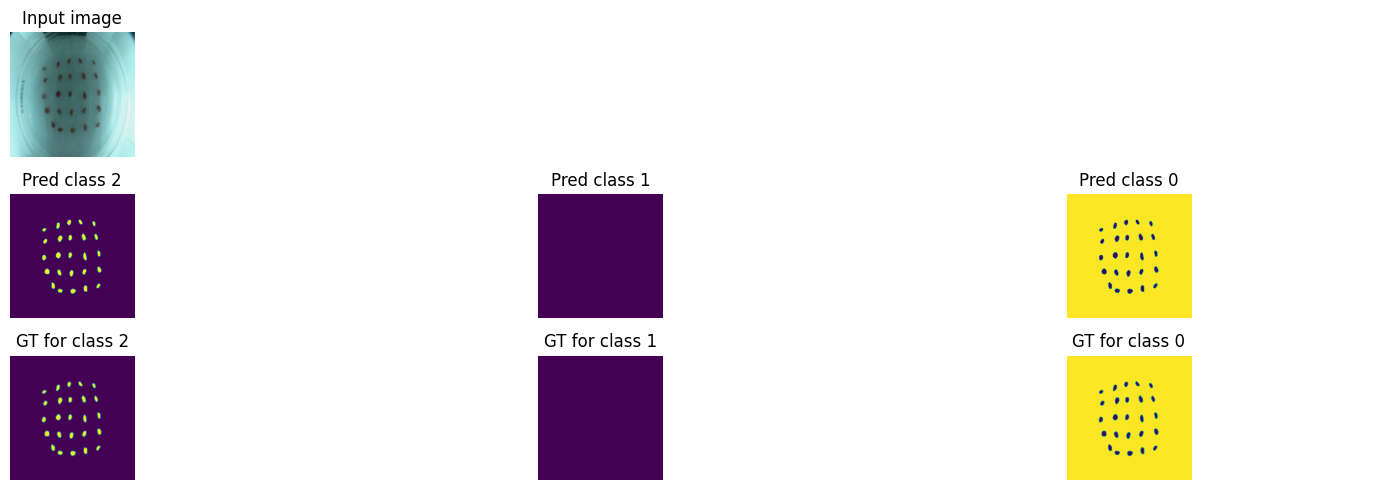

Train loss: 0.01871 | Time: 54m 40s | Val loss: 0.01580
Train_DICE_avg: 0.79236 | Train_Jaccard_avg: 0.72700 | Train_Sensitivity_avg: 0.95214 | Train_Specificity_avg: 0.92016 
Class 0 - Train_DICE: 0.99261 | Train_Jaccard: 0.98535 | Train_Sensitivity: 0.99744 | Train_Specificity: 0.78025 
Class 1 - Train_DICE: 0.56969 | Train_Jaccard: 0.49474 | Train_Sensitivity: 0.91337 | Train_Specificity: 0.99056 
Class 2 - Train_DICE: 0.81478 | Train_Jaccard: 0.70090 | Train_Sensitivity: 0.94561 | Train_Specificity: 0.98965 
Val_DICE_avg: 0.83650 | Val_Jaccard_avg: 0.76603 | Val_Sensitivity_avg: 0.96858 | Val_Specificity_avg: 0.85694 
Class 0 - Val_DICE: 0.99108 | Val_Jaccard: 0.98236 | Val_Sensitivity: 0.99951 | Val_Specificity: 0.58999 
Class 1 - Val_DICE: 0.75243 | Val_Jaccard: 0.68279 | Val_Sensitivity: 0.92592 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.76598 | Val_Jaccard: 0.63294 | Val_Sensitivity: 0.98032 | Val_Specificity: 0.98586 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.01858 | Time: 55m 46s | Val loss: 0.01570
Train_DICE_avg: 0.79347 | Train_Jaccard_avg: 0.72717 | Train_Sensitivity_avg: 0.95306 | Train_Specificity_avg: 0.91707 
Class 0 - Train_DICE: 0.99252 | Train_Jaccard: 0.98519 | Train_Sensitivity: 0.99747 | Train_Specificity: 0.77129 
Class 1 - Train_DICE: 0.57594 | Train_Jaccard: 0.50002 | Train_Sensitivity: 0.91404 | Train_Specificity: 0.99060 
Class 2 - Train_DICE: 0.81193 | Train_Jaccard: 0.69631 | Train_Sensitivity: 0.94765 | Train_Specificity: 0.98933 
Val_DICE_avg: 0.83382 | Val_Jaccard_avg: 0.76250 | Val_Sensitivity_avg: 0.96990 | Val_Specificity_avg: 0.86203 
Class 0 - Val_DICE: 0.99161 | Val_Jaccard: 0.98340 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60565 
Class 1 - Val_DICE: 0.75353 | Val_Jaccard: 0.68268 | Val_Sensitivity: 0.93258 | Val_Specificity: 0.99486 
Class 2 - Val_DICE: 0.75633 | Val_Jaccard: 0.62142 | Val_Sensitivity: 0.97765 | Val_Specificity: 0.98556 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.01846 | Time: 56m 51s | Val loss: 0.01574
Train_DICE_avg: 0.79710 | Train_Jaccard_avg: 0.73204 | Train_Sensitivity_avg: 0.95224 | Train_Specificity_avg: 0.92078 
Class 0 - Train_DICE: 0.99269 | Train_Jaccard: 0.98552 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.78156 
Class 1 - Train_DICE: 0.58150 | Train_Jaccard: 0.50686 | Train_Sensitivity: 0.91261 | Train_Specificity: 0.99104 
Class 2 - Train_DICE: 0.81710 | Train_Jaccard: 0.70373 | Train_Sensitivity: 0.94675 | Train_Specificity: 0.98975 
Val_DICE_avg: 0.83509 | Val_Jaccard_avg: 0.76302 | Val_Sensitivity_avg: 0.96871 | Val_Specificity_avg: 0.86094 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98331 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60255 
Class 1 - Val_DICE: 0.75281 | Val_Jaccard: 0.67959 | Val_Sensitivity: 0.92553 | Val_Specificity: 0.99479 
Class 2 - Val_DICE: 0.76090 | Val_Jaccard: 0.62615 | Val_Sensitivity: 0.98113 | Val_Specificity: 0.98549 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.01853 | Time: 57m 57s | Val loss: 0.01566
Train_DICE_avg: 0.79561 | Train_Jaccard_avg: 0.73019 | Train_Sensitivity_avg: 0.95196 | Train_Specificity_avg: 0.91817 
Class 0 - Train_DICE: 0.99261 | Train_Jaccard: 0.98536 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.77403 
Class 1 - Train_DICE: 0.58120 | Train_Jaccard: 0.50692 | Train_Sensitivity: 0.91260 | Train_Specificity: 0.99091 
Class 2 - Train_DICE: 0.81303 | Train_Jaccard: 0.69829 | Train_Sensitivity: 0.94589 | Train_Specificity: 0.98956 
Val_DICE_avg: 0.83310 | Val_Jaccard_avg: 0.76238 | Val_Sensitivity_avg: 0.97110 | Val_Specificity_avg: 0.86174 
Class 0 - Val_DICE: 0.99168 | Val_Jaccard: 0.98354 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.60493 
Class 1 - Val_DICE: 0.74208 | Val_Jaccard: 0.67237 | Val_Sensitivity: 0.93973 | Val_Specificity: 0.99452 
Class 2 - Val_DICE: 0.76555 | Val_Jaccard: 0.63123 | Val_Sensitivity: 0.97413 | Val_Specificity: 0.98576 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.01827 | Time: 59m 2s | Val loss: 0.01563
Train_DICE_avg: 0.79661 | Train_Jaccard_avg: 0.73103 | Train_Sensitivity_avg: 0.95436 | Train_Specificity_avg: 0.91871 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98549 | Train_Sensitivity: 0.99745 | Train_Specificity: 0.77558 
Class 1 - Train_DICE: 0.58070 | Train_Jaccard: 0.50552 | Train_Sensitivity: 0.91787 | Train_Specificity: 0.99097 
Class 2 - Train_DICE: 0.81646 | Train_Jaccard: 0.70210 | Train_Sensitivity: 0.94774 | Train_Specificity: 0.98958 
Val_DICE_avg: 0.83295 | Val_Jaccard_avg: 0.76140 | Val_Sensitivity_avg: 0.96757 | Val_Specificity_avg: 0.86163 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98335 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60460 
Class 1 - Val_DICE: 0.75200 | Val_Jaccard: 0.68051 | Val_Sensitivity: 0.92315 | Val_Specificity: 0.99482 
Class 2 - Val_DICE: 0.75527 | Val_Jaccard: 0.62034 | Val_Sensitivity: 0.98009 | Val_Specificity: 0.98547 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


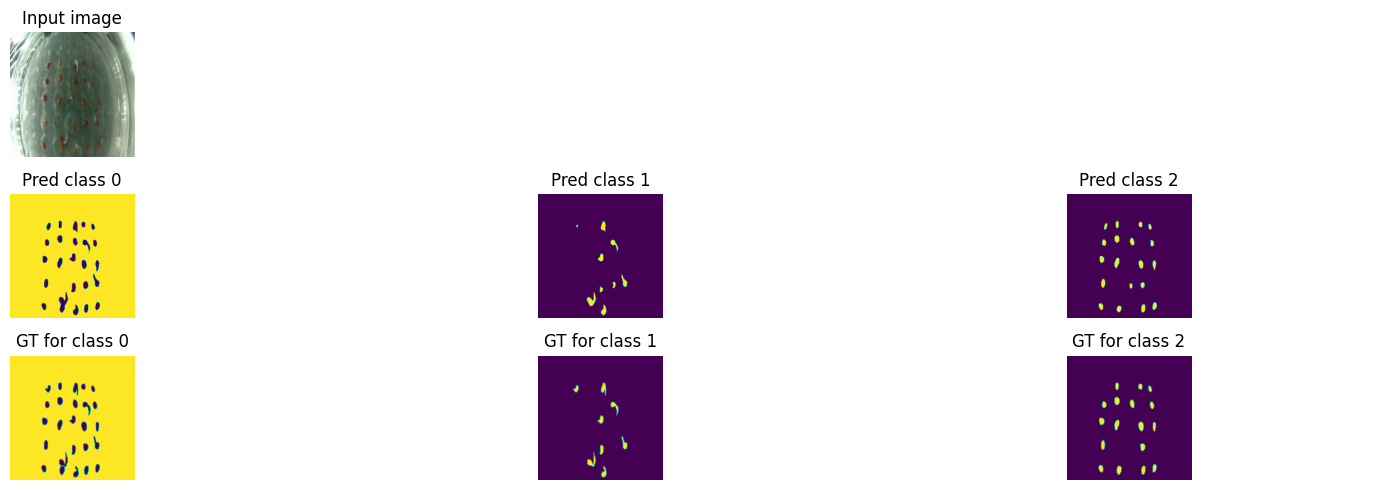

Train loss: 0.01844 | Time: 60m 9s | Val loss: 0.01549
Train_DICE_avg: 0.79465 | Train_Jaccard_avg: 0.72894 | Train_Sensitivity_avg: 0.95297 | Train_Specificity_avg: 0.91792 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98543 | Train_Sensitivity: 0.99747 | Train_Specificity: 0.77348 
Class 1 - Train_DICE: 0.57723 | Train_Jaccard: 0.50205 | Train_Sensitivity: 0.91420 | Train_Specificity: 0.99073 
Class 2 - Train_DICE: 0.81406 | Train_Jaccard: 0.69934 | Train_Sensitivity: 0.94724 | Train_Specificity: 0.98954 
Val_DICE_avg: 0.83281 | Val_Jaccard_avg: 0.76204 | Val_Sensitivity_avg: 0.97254 | Val_Specificity_avg: 0.86119 
Class 0 - Val_DICE: 0.99168 | Val_Jaccard: 0.98355 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.60334 
Class 1 - Val_DICE: 0.74342 | Val_Jaccard: 0.67362 | Val_Sensitivity: 0.93894 | Val_Specificity: 0.99463 
Class 2 - Val_DICE: 0.76333 | Val_Jaccard: 0.62896 | Val_Sensitivity: 0.97924 | Val_Specificity: 0.98560 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.01825 | Time: 61m 14s | Val loss: 0.01553
Train_DICE_avg: 0.79680 | Train_Jaccard_avg: 0.73119 | Train_Sensitivity_avg: 0.95459 | Train_Specificity_avg: 0.91878 
Class 0 - Train_DICE: 0.99261 | Train_Jaccard: 0.98535 | Train_Sensitivity: 0.99746 | Train_Specificity: 0.77594 
Class 1 - Train_DICE: 0.58326 | Train_Jaccard: 0.50818 | Train_Sensitivity: 0.91753 | Train_Specificity: 0.99090 
Class 2 - Train_DICE: 0.81455 | Train_Jaccard: 0.70003 | Train_Sensitivity: 0.94878 | Train_Specificity: 0.98951 
Val_DICE_avg: 0.83289 | Val_Jaccard_avg: 0.76094 | Val_Sensitivity_avg: 0.96367 | Val_Specificity_avg: 0.85978 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98334 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.59915 
Class 1 - Val_DICE: 0.75331 | Val_Jaccard: 0.68123 | Val_Sensitivity: 0.91969 | Val_Specificity: 0.99486 
Class 2 - Val_DICE: 0.75379 | Val_Jaccard: 0.61825 | Val_Sensitivity: 0.97184 | Val_Specificity: 0.98532 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.01816 | Time: 62m 19s | Val loss: 0.01551
Train_DICE_avg: 0.79700 | Train_Jaccard_avg: 0.73156 | Train_Sensitivity_avg: 0.95223 | Train_Specificity_avg: 0.91861 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98549 | Train_Sensitivity: 0.99745 | Train_Specificity: 0.77544 
Class 1 - Train_DICE: 0.58338 | Train_Jaccard: 0.50811 | Train_Sensitivity: 0.91015 | Train_Specificity: 0.99077 
Class 2 - Train_DICE: 0.81493 | Train_Jaccard: 0.70108 | Train_Sensitivity: 0.94908 | Train_Specificity: 0.98962 
Val_DICE_avg: 0.83466 | Val_Jaccard_avg: 0.76232 | Val_Sensitivity_avg: 0.97000 | Val_Specificity_avg: 0.86430 
Class 0 - Val_DICE: 0.99185 | Val_Jaccard: 0.98387 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.61292 
Class 1 - Val_DICE: 0.75898 | Val_Jaccard: 0.68666 | Val_Sensitivity: 0.93132 | Val_Specificity: 0.99482 
Class 2 - Val_DICE: 0.75316 | Val_Jaccard: 0.61645 | Val_Sensitivity: 0.97922 | Val_Specificity: 0.98517 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01811 | Time: 63m 25s | Val loss: 0.01537
Train_DICE_avg: 0.79609 | Train_Jaccard_avg: 0.73043 | Train_Sensitivity_avg: 0.95284 | Train_Specificity_avg: 0.91796 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98544 | Train_Sensitivity: 0.99750 | Train_Specificity: 0.77356 
Class 1 - Train_DICE: 0.57997 | Train_Jaccard: 0.50439 | Train_Sensitivity: 0.91232 | Train_Specificity: 0.99074 
Class 2 - Train_DICE: 0.81565 | Train_Jaccard: 0.70146 | Train_Sensitivity: 0.94871 | Train_Specificity: 0.98959 
Val_DICE_avg: 0.83787 | Val_Jaccard_avg: 0.76693 | Val_Sensitivity_avg: 0.97002 | Val_Specificity_avg: 0.86000 
Class 0 - Val_DICE: 0.99149 | Val_Jaccard: 0.98317 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59941 
Class 1 - Val_DICE: 0.75585 | Val_Jaccard: 0.68484 | Val_Sensitivity: 0.93328 | Val_Specificity: 0.99479 
Class 2 - Val_DICE: 0.76626 | Val_Jaccard: 0.63280 | Val_Sensitivity: 0.97729 | Val_Specificity: 0.98580 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01830 | Time: 64m 30s | Val loss: 0.01544
Train_DICE_avg: 0.79816 | Train_Jaccard_avg: 0.73263 | Train_Sensitivity_avg: 0.95446 | Train_Specificity_avg: 0.91877 
Class 0 - Train_DICE: 0.99256 | Train_Jaccard: 0.98525 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.77611 
Class 1 - Train_DICE: 0.58599 | Train_Jaccard: 0.51089 | Train_Sensitivity: 0.91867 | Train_Specificity: 0.99078 
Class 2 - Train_DICE: 0.81594 | Train_Jaccard: 0.70173 | Train_Sensitivity: 0.94731 | Train_Specificity: 0.98943 
Val_DICE_avg: 0.83601 | Val_Jaccard_avg: 0.76425 | Val_Sensitivity_avg: 0.97083 | Val_Specificity_avg: 0.86152 
Class 0 - Val_DICE: 0.99165 | Val_Jaccard: 0.98348 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.60427 
Class 1 - Val_DICE: 0.75604 | Val_Jaccard: 0.68363 | Val_Sensitivity: 0.93308 | Val_Specificity: 0.99475 
Class 2 - Val_DICE: 0.76033 | Val_Jaccard: 0.62564 | Val_Sensitivity: 0.97997 | Val_Specificity: 0.98555 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


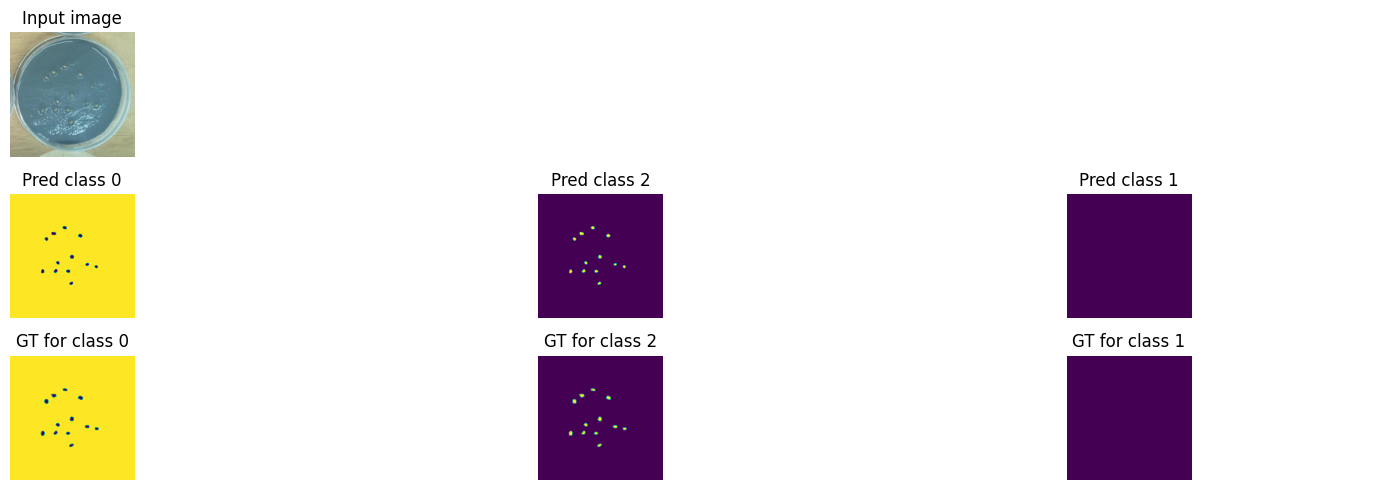

Train loss: 0.01815 | Time: 65m 36s | Val loss: 0.01540
Train_DICE_avg: 0.79885 | Train_Jaccard_avg: 0.73294 | Train_Sensitivity_avg: 0.95371 | Train_Specificity_avg: 0.91759 
Class 0 - Train_DICE: 0.99254 | Train_Jaccard: 0.98521 | Train_Sensitivity: 0.99750 | Train_Specificity: 0.77249 
Class 1 - Train_DICE: 0.58922 | Train_Jaccard: 0.51324 | Train_Sensitivity: 0.91465 | Train_Specificity: 0.99087 
Class 2 - Train_DICE: 0.81480 | Train_Jaccard: 0.70036 | Train_Sensitivity: 0.94899 | Train_Specificity: 0.98940 
Val_DICE_avg: 0.83437 | Val_Jaccard_avg: 0.76210 | Val_Sensitivity_avg: 0.97015 | Val_Specificity_avg: 0.86311 
Class 0 - Val_DICE: 0.99175 | Val_Jaccard: 0.98368 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60930 
Class 1 - Val_DICE: 0.75934 | Val_Jaccard: 0.68725 | Val_Sensitivity: 0.93079 | Val_Specificity: 0.99488 
Class 2 - Val_DICE: 0.75201 | Val_Jaccard: 0.61537 | Val_Sensitivity: 0.98018 | Val_Specificity: 0.98516 


wandb: uploading artifact best_model; uploading output.log; uploading config.yaml
wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▁▁▂▂▃▃▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇█████████████
wandb:       Training Jaccard ▁▂▂▂▂▂▃▃▃▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇█▇██████████
wandb:          Training Loss █▇▆▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▃▅▆▇▇▇▇▇▇▆▆▅▆▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇█████████
wandb:   Training Specificity ▁▃▅▅▅▆▆▇▇▇▇▇▇███████████████████████████
wandb:        Validation DICE ▁▂▁▁▁▃▄▃▄▅▅▅▅▆▆▅▆▆▆▇▇▇▇▇▇▇▇██▇██████████
wandb:     Validation Jaccard ▂▁▁▂▁▁▃▃▃▃▅▄▅▆▆▅▆▆▆▇▆▇▇▇▇▇▇▇█▇██████████
wandb:        Validation Loss █▇▆▆▅▄▄▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▂▃▁█▃█▆▇█▁▃▂▄▅▄▄▂▄▂▄▆▄▇█▅▆▇▆▆▆▆▆▅▆▆▆▇▆▇▇
wandb: Validation Specificity ▁▃▄▃▅▆▆▆▆▇▇▇▇▇▇███████▇▇███▇▇███▇███████
wandb: 
wandb: Run summary:
wandb:          Training DIC


Training complete!


In [17]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [18]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [19]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]



Global Performance Metrics:
Loss mean: 0.01484, std: 0.00144
Dice Coefficient mean: 0.87930, std: 0.09979
Jaccard Index mean: 0.82091, std: 0.12062
Sensitivity mean: 0.88187, std: 0.09907
Specificity mean: 0.96248, std: 0.02471

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99593, std: 0.00237
Jaccard mean: 0.99191, std: 0.00466
Sensitivity mean: 0.99555, std: 0.00348
Specificity mean: 0.89241, std: 0.07480

Class 1:
Dice mean: 0.77103, std: 0.26545
Jaccard mean: 0.69110, std: 0.29934
Sensitivity mean: 0.78368, std: 0.26087
Specificity mean: 0.99818, std: 0.00374

Class 2:
Dice mean: 0.87093, std: 0.08145
Jaccard mean: 0.77973, std: 0.11439
Sensitivity mean: 0.86638, std: 0.10714
Specificity mean: 0.99687, std: 0.00221


### Focal Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Backbone"] = "resnet34"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-ResNet34-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.28 GB
GPU Memory - Reserved: 1.67 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_183506-o2io3cf0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-ResNet34-Focal
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/o2io3cf0



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


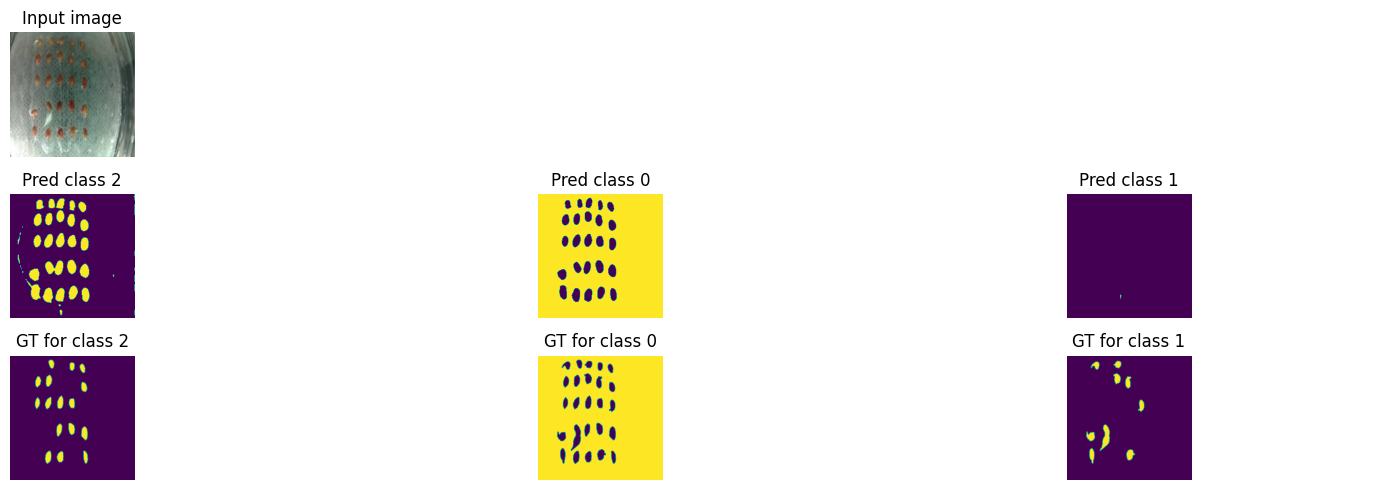

Train loss: 0.05021 | Time: 1m 2s | Val loss: 0.03007
Train_DICE_avg: 0.31393 | Train_Jaccard_avg: 0.24788 | Train_Sensitivity_avg: 0.83474 | Train_Specificity_avg: 0.68509 
Class 0 - Train_DICE: 0.32877 | Train_Jaccard: 0.24549 | Train_Sensitivity: 0.99539 | Train_Specificity: 0.09598 
Class 1 - Train_DICE: 0.22434 | Train_Jaccard: 0.22287 | Train_Sensitivity: 0.78718 | Train_Specificity: 0.98580 
Class 2 - Train_DICE: 0.38868 | Train_Jaccard: 0.27527 | Train_Sensitivity: 0.72164 | Train_Specificity: 0.97351 
Val_DICE_avg: 0.63131 | Val_Jaccard_avg: 0.55365 | Val_Sensitivity_avg: 0.96095 | Val_Specificity_avg: 0.69093 
Class 0 - Val_DICE: 0.84883 | Val_Jaccard: 0.74249 | Val_Sensitivity: 0.99868 | Val_Specificity: 0.10308 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57686 | Val_Jaccard: 0.45020 | Val_Sensitivity: 0.88417 | Val_Specificity: 0.98137 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.02605 | Time: 2m 3s | Val loss: 0.02245
Train_DICE_avg: 0.60491 | Train_Jaccard_avg: 0.54176 | Train_Sensitivity_avg: 0.94105 | Train_Specificity_avg: 0.76938 
Class 0 - Train_DICE: 0.93245 | Train_Jaccard: 0.87555 | Train_Sensitivity: 0.99640 | Train_Specificity: 0.33945 
Class 1 - Train_DICE: 0.27236 | Train_Jaccard: 0.27226 | Train_Sensitivity: 0.97861 | Train_Specificity: 0.98551 
Class 2 - Train_DICE: 0.60991 | Train_Jaccard: 0.47748 | Train_Sensitivity: 0.84813 | Train_Specificity: 0.98317 
Val_DICE_avg: 0.65230 | Val_Jaccard_avg: 0.59837 | Val_Sensitivity_avg: 0.96214 | Val_Specificity_avg: 0.76671 
Class 0 - Val_DICE: 0.97392 | Val_Jaccard: 0.94936 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.33514 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.51471 | Val_Jaccard: 0.37750 | Val_Sensitivity: 0.88819 | Val_Specificity: 0.97665 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.02036 | Time: 3m 4s | Val loss: 0.01754
Train_DICE_avg: 0.62637 | Train_Jaccard_avg: 0.57439 | Train_Sensitivity_avg: 0.94790 | Train_Specificity_avg: 0.83531 
Class 0 - Train_DICE: 0.97371 | Train_Jaccard: 0.94905 | Train_Sensitivity: 0.99515 | Train_Specificity: 0.53646 
Class 1 - Train_DICE: 0.28318 | Train_Jaccard: 0.28318 | Train_Sensitivity: 0.99919 | Train_Specificity: 0.98569 
Class 2 - Train_DICE: 0.62222 | Train_Jaccard: 0.49094 | Train_Sensitivity: 0.84936 | Train_Specificity: 0.98378 
Val_DICE_avg: 0.66516 | Val_Jaccard_avg: 0.61562 | Val_Sensitivity_avg: 0.96198 | Val_Specificity_avg: 0.81553 
Class 0 - Val_DICE: 0.98627 | Val_Jaccard: 0.97297 | Val_Sensitivity: 0.99828 | Val_Specificity: 0.47978 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54095 | Val_Jaccard: 0.40564 | Val_Sensitivity: 0.88766 | Val_Specificity: 0.97848 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01659 | Time: 4m 5s | Val loss: 0.01423
Train_DICE_avg: 0.63410 | Train_Jaccard_avg: 0.58457 | Train_Sensitivity_avg: 0.95209 | Train_Specificity_avg: 0.85993 
Class 0 - Train_DICE: 0.98112 | Train_Jaccard: 0.96306 | Train_Sensitivity: 0.99475 | Train_Specificity: 0.60962 
Class 1 - Train_DICE: 0.28744 | Train_Jaccard: 0.28744 | Train_Sensitivity: 0.99960 | Train_Specificity: 0.98589 
Class 2 - Train_DICE: 0.63375 | Train_Jaccard: 0.50320 | Train_Sensitivity: 0.86193 | Train_Specificity: 0.98428 
Val_DICE_avg: 0.67717 | Val_Jaccard_avg: 0.62695 | Val_Sensitivity_avg: 0.96131 | Val_Specificity_avg: 0.82688 
Class 0 - Val_DICE: 0.98815 | Val_Jaccard: 0.97663 | Val_Sensitivity: 0.99854 | Val_Specificity: 0.51272 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.57512 | Val_Jaccard: 0.43598 | Val_Sensitivity: 0.88538 | Val_Specificity: 0.97959 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.01360 | Time: 5m 6s | Val loss: 0.01207
Train_DICE_avg: 0.64455 | Train_Jaccard_avg: 0.59590 | Train_Sensitivity_avg: 0.95331 | Train_Specificity_avg: 0.87475 
Class 0 - Train_DICE: 0.98445 | Train_Jaccard: 0.96945 | Train_Sensitivity: 0.99467 | Train_Specificity: 0.65326 
Class 1 - Train_DICE: 0.28792 | Train_Jaccard: 0.28792 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98569 
Class 2 - Train_DICE: 0.66129 | Train_Jaccard: 0.53032 | Train_Sensitivity: 0.86526 | Train_Specificity: 0.98530 
Val_DICE_avg: 0.69721 | Val_Jaccard_avg: 0.64602 | Val_Sensitivity_avg: 0.96725 | Val_Specificity_avg: 0.81444 
Class 0 - Val_DICE: 0.98529 | Val_Jaccard: 0.97114 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.47280 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.63808 | Val_Jaccard: 0.49865 | Val_Sensitivity: 0.90247 | Val_Specificity: 0.98220 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


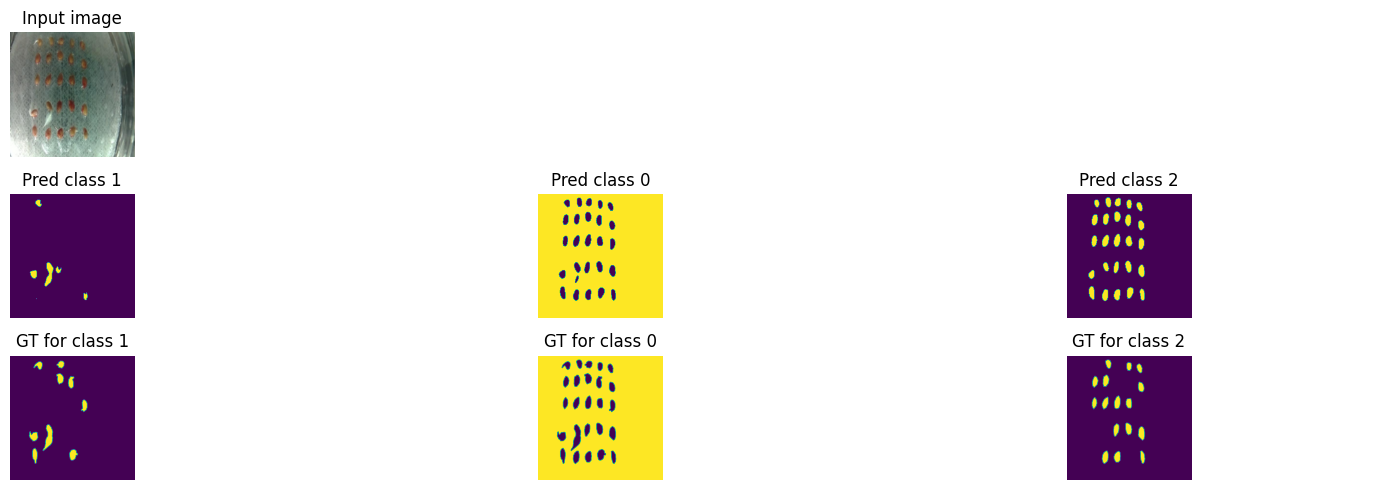

Train loss: 0.01144 | Time: 6m 8s | Val loss: 0.01031
Train_DICE_avg: 0.64978 | Train_Jaccard_avg: 0.60096 | Train_Sensitivity_avg: 0.95715 | Train_Specificity_avg: 0.87994 
Class 0 - Train_DICE: 0.98568 | Train_Jaccard: 0.97184 | Train_Sensitivity: 0.99451 | Train_Specificity: 0.66848 
Class 1 - Train_DICE: 0.28006 | Train_Jaccard: 0.27967 | Train_Sensitivity: 0.99778 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.68361 | Train_Jaccard: 0.55136 | Train_Sensitivity: 0.87914 | Train_Specificity: 0.98569 
Val_DICE_avg: 0.70668 | Val_Jaccard_avg: 0.65629 | Val_Sensitivity_avg: 0.96658 | Val_Specificity_avg: 0.82488 
Class 0 - Val_DICE: 0.98705 | Val_Jaccard: 0.97454 | Val_Sensitivity: 0.99906 | Val_Specificity: 0.50220 
Class 1 - Val_DICE: 0.47259 | Val_Jaccard: 0.47052 | Val_Sensitivity: 0.99253 | Val_Specificity: 0.98849 
Class 2 - Val_DICE: 0.66039 | Val_Jaccard: 0.52379 | Val_Sensitivity: 0.90816 | Val_Specificity: 0.98394 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00970 | Time: 7m 8s | Val loss: 0.00852
Train_DICE_avg: 0.66204 | Train_Jaccard_avg: 0.60881 | Train_Sensitivity_avg: 0.94008 | Train_Specificity_avg: 0.88756 
Class 0 - Train_DICE: 0.98727 | Train_Jaccard: 0.97492 | Train_Sensitivity: 0.99477 | Train_Specificity: 0.69063 
Class 1 - Train_DICE: 0.29957 | Train_Jaccard: 0.28553 | Train_Sensitivity: 0.93637 | Train_Specificity: 0.98611 
Class 2 - Train_DICE: 0.69929 | Train_Jaccard: 0.56597 | Train_Sensitivity: 0.88909 | Train_Specificity: 0.98594 
Val_DICE_avg: 0.73091 | Val_Jaccard_avg: 0.67181 | Val_Sensitivity_avg: 0.96233 | Val_Specificity_avg: 0.83346 
Class 0 - Val_DICE: 0.98864 | Val_Jaccard: 0.97760 | Val_Sensitivity: 0.99911 | Val_Specificity: 0.52695 
Class 1 - Val_DICE: 0.51501 | Val_Jaccard: 0.49157 | Val_Sensitivity: 0.96784 | Val_Specificity: 0.98957 
Class 2 - Val_DICE: 0.68909 | Val_Jaccard: 0.54628 | Val_Sensitivity: 0.92004 | Val_Specificity: 0.98385 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.00849 | Time: 8m 9s | Val loss: 0.00743
Train_DICE_avg: 0.67777 | Train_Jaccard_avg: 0.61921 | Train_Sensitivity_avg: 0.93126 | Train_Specificity_avg: 0.89331 
Class 0 - Train_DICE: 0.98820 | Train_Jaccard: 0.97673 | Train_Sensitivity: 0.99490 | Train_Specificity: 0.70700 
Class 1 - Train_DICE: 0.32993 | Train_Jaccard: 0.30106 | Train_Sensitivity: 0.90348 | Train_Specificity: 0.98674 
Class 2 - Train_DICE: 0.71518 | Train_Jaccard: 0.57985 | Train_Sensitivity: 0.89539 | Train_Specificity: 0.98620 
Val_DICE_avg: 0.74062 | Val_Jaccard_avg: 0.67923 | Val_Sensitivity_avg: 0.96076 | Val_Specificity_avg: 0.83946 
Class 0 - Val_DICE: 0.98894 | Val_Jaccard: 0.97821 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.54388 
Class 1 - Val_DICE: 0.55140 | Val_Jaccard: 0.51874 | Val_Sensitivity: 0.96451 | Val_Specificity: 0.99054 
Class 2 - Val_DICE: 0.68152 | Val_Jaccard: 0.54076 | Val_Sensitivity: 0.91859 | Val_Specificity: 0.98396 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00749 | Time: 9m 11s | Val loss: 0.00644
Train_DICE_avg: 0.69246 | Train_Jaccard_avg: 0.63093 | Train_Sensitivity_avg: 0.92392 | Train_Specificity_avg: 0.89946 
Class 0 - Train_DICE: 0.98875 | Train_Jaccard: 0.97780 | Train_Sensitivity: 0.99477 | Train_Specificity: 0.72412 
Class 1 - Train_DICE: 0.36562 | Train_Jaccard: 0.32570 | Train_Sensitivity: 0.87938 | Train_Specificity: 0.98753 
Class 2 - Train_DICE: 0.72302 | Train_Jaccard: 0.58929 | Train_Sensitivity: 0.89760 | Train_Specificity: 0.98673 
Val_DICE_avg: 0.71956 | Val_Jaccard_avg: 0.64859 | Val_Sensitivity_avg: 0.91636 | Val_Specificity_avg: 0.84825 
Class 0 - Val_DICE: 0.99060 | Val_Jaccard: 0.98144 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.57191 
Class 1 - Val_DICE: 0.51196 | Val_Jaccard: 0.46137 | Val_Sensitivity: 0.79884 | Val_Specificity: 0.99226 
Class 2 - Val_DICE: 0.65613 | Val_Jaccard: 0.50296 | Val_Sensitivity: 0.95106 | Val_Specificity: 0.98057 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00676 | Time: 10m 12s | Val loss: 0.00579
Train_DICE_avg: 0.70646 | Train_Jaccard_avg: 0.64239 | Train_Sensitivity_avg: 0.91457 | Train_Specificity_avg: 0.90416 
Class 0 - Train_DICE: 0.98916 | Train_Jaccard: 0.97860 | Train_Sensitivity: 0.99459 | Train_Specificity: 0.73709 
Class 1 - Train_DICE: 0.39230 | Train_Jaccard: 0.34345 | Train_Sensitivity: 0.85222 | Train_Specificity: 0.98807 
Class 2 - Train_DICE: 0.73791 | Train_Jaccard: 0.60513 | Train_Sensitivity: 0.89692 | Train_Specificity: 0.98732 
Val_DICE_avg: 0.77080 | Val_Jaccard_avg: 0.70409 | Val_Sensitivity_avg: 0.96065 | Val_Specificity_avg: 0.84626 
Class 0 - Val_DICE: 0.99010 | Val_Jaccard: 0.98045 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.56231 
Class 1 - Val_DICE: 0.61769 | Val_Jaccard: 0.56719 | Val_Sensitivity: 0.94832 | Val_Specificity: 0.99197 
Class 2 - Val_DICE: 0.70461 | Val_Jaccard: 0.56461 | Val_Sensitivity: 0.93443 | Val_Specificity: 0.98452 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


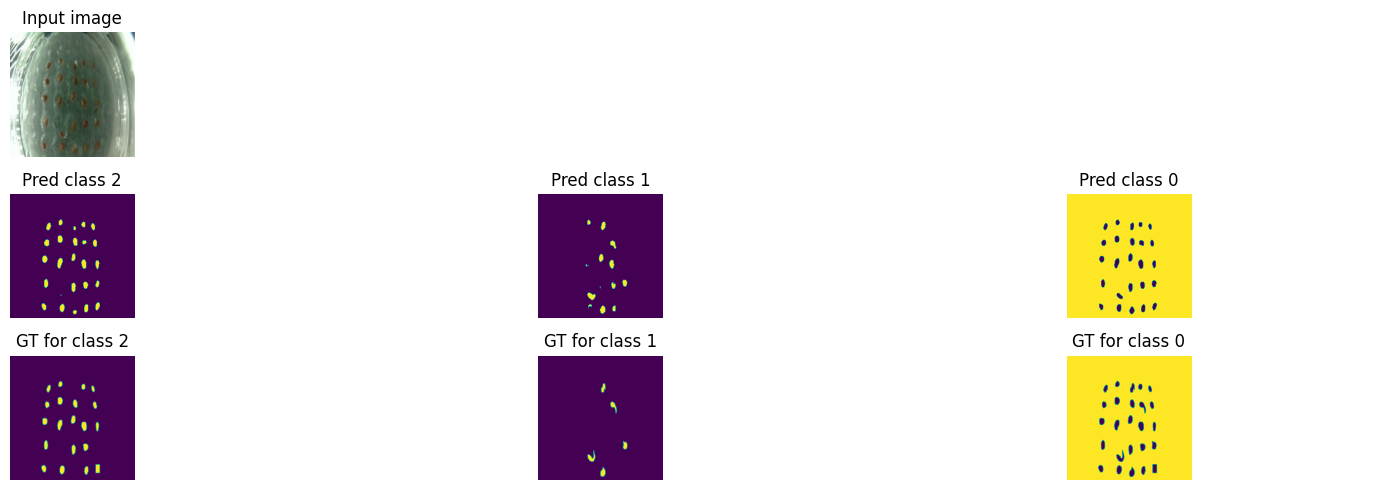

Train loss: 0.00584 | Time: 11m 17s | Val loss: 0.00453
Train_DICE_avg: 0.70370 | Train_Jaccard_avg: 0.63968 | Train_Sensitivity_avg: 0.91029 | Train_Specificity_avg: 0.90777 
Class 0 - Train_DICE: 0.98967 | Train_Jaccard: 0.97960 | Train_Sensitivity: 0.99444 | Train_Specificity: 0.74776 
Class 1 - Train_DICE: 0.38143 | Train_Jaccard: 0.33113 | Train_Sensitivity: 0.84013 | Train_Specificity: 0.98822 
Class 2 - Train_DICE: 0.73998 | Train_Jaccard: 0.60832 | Train_Sensitivity: 0.89628 | Train_Specificity: 0.98733 
Val_DICE_avg: 0.76513 | Val_Jaccard_avg: 0.69728 | Val_Sensitivity_avg: 0.95300 | Val_Specificity_avg: 0.85541 
Class 0 - Val_DICE: 0.99143 | Val_Jaccard: 0.98305 | Val_Sensitivity: 0.99904 | Val_Specificity: 0.59061 
Class 1 - Val_DICE: 0.60381 | Val_Jaccard: 0.55134 | Val_Sensitivity: 0.91731 | Val_Specificity: 0.99197 
Class 2 - Val_DICE: 0.70016 | Val_Jaccard: 0.55745 | Val_Sensitivity: 0.94265 | Val_Specificity: 0.98365 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00478 | Time: 12m 22s | Val loss: 0.00375
Train_DICE_avg: 0.72094 | Train_Jaccard_avg: 0.65586 | Train_Sensitivity_avg: 0.91327 | Train_Specificity_avg: 0.91095 
Class 0 - Train_DICE: 0.99020 | Train_Jaccard: 0.98063 | Train_Sensitivity: 0.99448 | Train_Specificity: 0.75655 
Class 1 - Train_DICE: 0.41952 | Train_Jaccard: 0.36347 | Train_Sensitivity: 0.84615 | Train_Specificity: 0.98848 
Class 2 - Train_DICE: 0.75310 | Train_Jaccard: 0.62348 | Train_Sensitivity: 0.89917 | Train_Specificity: 0.98782 
Val_DICE_avg: 0.76094 | Val_Jaccard_avg: 0.69425 | Val_Sensitivity_avg: 0.94812 | Val_Specificity_avg: 0.86243 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98390 | Val_Sensitivity: 0.99887 | Val_Specificity: 0.61070 
Class 1 - Val_DICE: 0.57889 | Val_Jaccard: 0.52889 | Val_Sensitivity: 0.90563 | Val_Specificity: 0.99213 
Class 2 - Val_DICE: 0.71206 | Val_Jaccard: 0.56996 | Val_Sensitivity: 0.93985 | Val_Specificity: 0.98446 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.00415 | Time: 13m 27s | Val loss: 0.00317
Train_DICE_avg: 0.72980 | Train_Jaccard_avg: 0.66399 | Train_Sensitivity_avg: 0.91340 | Train_Specificity_avg: 0.91284 
Class 0 - Train_DICE: 0.99059 | Train_Jaccard: 0.98140 | Train_Sensitivity: 0.99462 | Train_Specificity: 0.76141 
Class 1 - Train_DICE: 0.43492 | Train_Jaccard: 0.37551 | Train_Sensitivity: 0.84283 | Train_Specificity: 0.98896 
Class 2 - Train_DICE: 0.76390 | Train_Jaccard: 0.63504 | Train_Sensitivity: 0.90275 | Train_Specificity: 0.98816 
Val_DICE_avg: 0.78871 | Val_Jaccard_avg: 0.72049 | Val_Sensitivity_avg: 0.94620 | Val_Specificity_avg: 0.85726 
Class 0 - Val_DICE: 0.99085 | Val_Jaccard: 0.98193 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.59261 
Class 1 - Val_DICE: 0.65167 | Val_Jaccard: 0.59201 | Val_Sensitivity: 0.88376 | Val_Specificity: 0.99373 
Class 2 - Val_DICE: 0.72360 | Val_Jaccard: 0.58754 | Val_Sensitivity: 0.95556 | Val_Specificity: 0.98543 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.00371 | Time: 14m 31s | Val loss: 0.00288
Train_DICE_avg: 0.73436 | Train_Jaccard_avg: 0.66865 | Train_Sensitivity_avg: 0.91540 | Train_Specificity_avg: 0.91591 
Class 0 - Train_DICE: 0.99098 | Train_Jaccard: 0.98216 | Train_Sensitivity: 0.99479 | Train_Specificity: 0.77052 
Class 1 - Train_DICE: 0.44407 | Train_Jaccard: 0.38325 | Train_Sensitivity: 0.84476 | Train_Specificity: 0.98898 
Class 2 - Train_DICE: 0.76803 | Train_Jaccard: 0.64054 | Train_Sensitivity: 0.90663 | Train_Specificity: 0.98822 
Val_DICE_avg: 0.76718 | Val_Jaccard_avg: 0.69861 | Val_Sensitivity_avg: 0.93360 | Val_Specificity_avg: 0.86179 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98375 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.60767 
Class 1 - Val_DICE: 0.59076 | Val_Jaccard: 0.53435 | Val_Sensitivity: 0.84644 | Val_Specificity: 0.99357 
Class 2 - Val_DICE: 0.71898 | Val_Jaccard: 0.57774 | Val_Sensitivity: 0.95518 | Val_Specificity: 0.98412 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00342 | Time: 15m 36s | Val loss: 0.00269
Train_DICE_avg: 0.74214 | Train_Jaccard_avg: 0.67610 | Train_Sensitivity_avg: 0.91389 | Train_Specificity_avg: 0.91707 
Class 0 - Train_DICE: 0.99120 | Train_Jaccard: 0.98258 | Train_Sensitivity: 0.99491 | Train_Specificity: 0.77304 
Class 1 - Train_DICE: 0.45779 | Train_Jaccard: 0.39440 | Train_Sensitivity: 0.83911 | Train_Specificity: 0.98956 
Class 2 - Train_DICE: 0.77744 | Train_Jaccard: 0.65131 | Train_Sensitivity: 0.90764 | Train_Specificity: 0.98861 
Val_DICE_avg: 0.78858 | Val_Jaccard_avg: 0.71749 | Val_Sensitivity_avg: 0.94443 | Val_Specificity_avg: 0.86465 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99913 | Val_Specificity: 0.61670 
Class 1 - Val_DICE: 0.65282 | Val_Jaccard: 0.59129 | Val_Sensitivity: 0.87418 | Val_Specificity: 0.99355 
Class 2 - Val_DICE: 0.72074 | Val_Jaccard: 0.57666 | Val_Sensitivity: 0.95999 | Val_Specificity: 0.98370 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


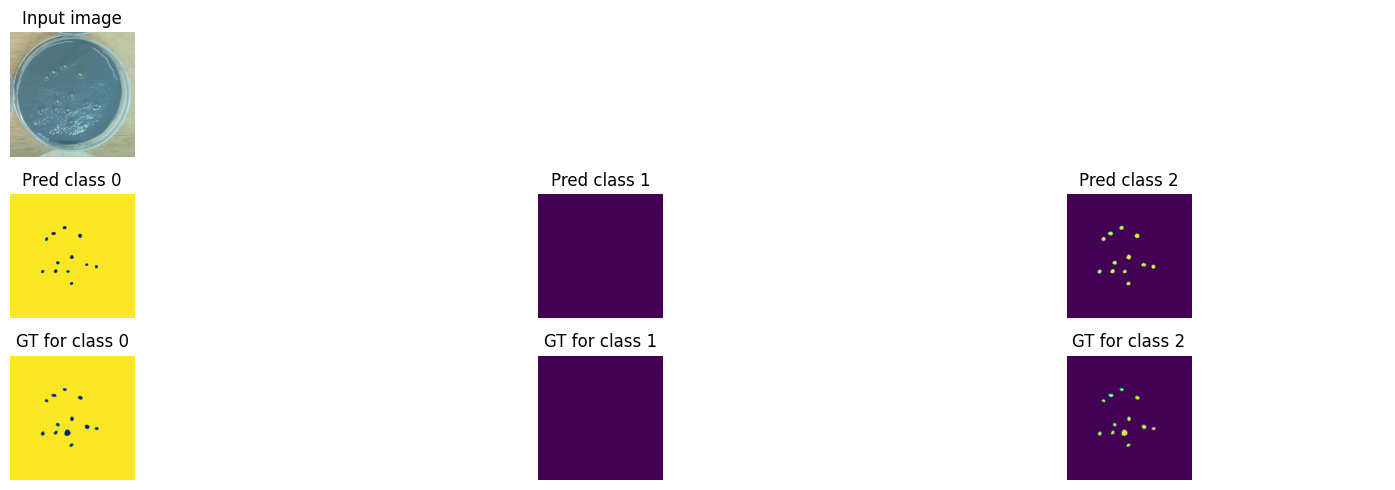

Train loss: 0.00319 | Time: 16m 41s | Val loss: 0.00258
Train_DICE_avg: 0.74280 | Train_Jaccard_avg: 0.67615 | Train_Sensitivity_avg: 0.91765 | Train_Specificity_avg: 0.91650 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98309 | Train_Sensitivity: 0.99522 | Train_Specificity: 0.77145 
Class 1 - Train_DICE: 0.45771 | Train_Jaccard: 0.39269 | Train_Sensitivity: 0.84687 | Train_Specificity: 0.98945 
Class 2 - Train_DICE: 0.77922 | Train_Jaccard: 0.65268 | Train_Sensitivity: 0.91087 | Train_Specificity: 0.98859 
Val_DICE_avg: 0.79543 | Val_Jaccard_avg: 0.72844 | Val_Sensitivity_avg: 0.94047 | Val_Specificity_avg: 0.85582 
Class 0 - Val_DICE: 0.99126 | Val_Jaccard: 0.98270 | Val_Sensitivity: 0.99911 | Val_Specificity: 0.58800 
Class 1 - Val_DICE: 0.63114 | Val_Jaccard: 0.57427 | Val_Sensitivity: 0.86959 | Val_Specificity: 0.99372 
Class 2 - Val_DICE: 0.76389 | Val_Jaccard: 0.62834 | Val_Sensitivity: 0.95272 | Val_Specificity: 0.98573 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.00306 | Time: 17m 47s | Val loss: 0.00237
Train_DICE_avg: 0.74807 | Train_Jaccard_avg: 0.68177 | Train_Sensitivity_avg: 0.91532 | Train_Specificity_avg: 0.91814 
Class 0 - Train_DICE: 0.99154 | Train_Jaccard: 0.98325 | Train_Sensitivity: 0.99499 | Train_Specificity: 0.77591 
Class 1 - Train_DICE: 0.47016 | Train_Jaccard: 0.40459 | Train_Sensitivity: 0.84092 | Train_Specificity: 0.98962 
Class 2 - Train_DICE: 0.78250 | Train_Jaccard: 0.65747 | Train_Sensitivity: 0.91006 | Train_Specificity: 0.98890 
Val_DICE_avg: 0.79246 | Val_Jaccard_avg: 0.72822 | Val_Sensitivity_avg: 0.96156 | Val_Specificity_avg: 0.86901 
Class 0 - Val_DICE: 0.99207 | Val_Jaccard: 0.98430 | Val_Sensitivity: 0.99915 | Val_Specificity: 0.62794 
Class 1 - Val_DICE: 0.63742 | Val_Jaccard: 0.58798 | Val_Sensitivity: 0.94665 | Val_Specificity: 0.99279 
Class 2 - Val_DICE: 0.74788 | Val_Jaccard: 0.61237 | Val_Sensitivity: 0.93889 | Val_Specificity: 0.98631 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00291 | Time: 18m 51s | Val loss: 0.00223
Train_DICE_avg: 0.74852 | Train_Jaccard_avg: 0.68258 | Train_Sensitivity_avg: 0.91973 | Train_Specificity_avg: 0.91839 
Class 0 - Train_DICE: 0.99162 | Train_Jaccard: 0.98341 | Train_Sensitivity: 0.99534 | Train_Specificity: 0.77682 
Class 1 - Train_DICE: 0.46699 | Train_Jaccard: 0.40094 | Train_Sensitivity: 0.85155 | Train_Specificity: 0.98940 
Class 2 - Train_DICE: 0.78697 | Train_Jaccard: 0.66338 | Train_Sensitivity: 0.91230 | Train_Specificity: 0.98894 
Val_DICE_avg: 0.78752 | Val_Jaccard_avg: 0.71585 | Val_Sensitivity_avg: 0.94016 | Val_Specificity_avg: 0.87032 
Class 0 - Val_DICE: 0.99266 | Val_Jaccard: 0.98547 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.63316 
Class 1 - Val_DICE: 0.64956 | Val_Jaccard: 0.58463 | Val_Sensitivity: 0.85555 | Val_Specificity: 0.99414 
Class 2 - Val_DICE: 0.72034 | Val_Jaccard: 0.57746 | Val_Sensitivity: 0.96568 | Val_Specificity: 0.98367 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.00283 | Time: 19m 56s | Val loss: 0.00215
Train_DICE_avg: 0.75250 | Train_Jaccard_avg: 0.68610 | Train_Sensitivity_avg: 0.91916 | Train_Specificity_avg: 0.91873 
Class 0 - Train_DICE: 0.99176 | Train_Jaccard: 0.98368 | Train_Sensitivity: 0.99545 | Train_Specificity: 0.77803 
Class 1 - Train_DICE: 0.47931 | Train_Jaccard: 0.41224 | Train_Sensitivity: 0.84617 | Train_Specificity: 0.98942 
Class 2 - Train_DICE: 0.78643 | Train_Jaccard: 0.66238 | Train_Sensitivity: 0.91585 | Train_Specificity: 0.98873 
Val_DICE_avg: 0.80897 | Val_Jaccard_avg: 0.74146 | Val_Sensitivity_avg: 0.95665 | Val_Specificity_avg: 0.86166 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98388 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.60519 
Class 1 - Val_DICE: 0.66770 | Val_Jaccard: 0.60629 | Val_Sensitivity: 0.91530 | Val_Specificity: 0.99337 
Class 2 - Val_DICE: 0.76735 | Val_Jaccard: 0.63421 | Val_Sensitivity: 0.95546 | Val_Specificity: 0.98642 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.00274 | Time: 21m 1s | Val loss: 0.00206
Train_DICE_avg: 0.75968 | Train_Jaccard_avg: 0.69413 | Train_Sensitivity_avg: 0.92066 | Train_Specificity_avg: 0.91923 
Class 0 - Train_DICE: 0.99181 | Train_Jaccard: 0.98378 | Train_Sensitivity: 0.99552 | Train_Specificity: 0.77838 
Class 1 - Train_DICE: 0.49260 | Train_Jaccard: 0.42530 | Train_Sensitivity: 0.85214 | Train_Specificity: 0.98993 
Class 2 - Train_DICE: 0.79463 | Train_Jaccard: 0.67330 | Train_Sensitivity: 0.91433 | Train_Specificity: 0.98936 
Val_DICE_avg: 0.79918 | Val_Jaccard_avg: 0.72881 | Val_Sensitivity_avg: 0.95920 | Val_Specificity_avg: 0.87077 
Class 0 - Val_DICE: 0.99286 | Val_Jaccard: 0.98585 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.63439 
Class 1 - Val_DICE: 0.67144 | Val_Jaccard: 0.60896 | Val_Sensitivity: 0.91853 | Val_Specificity: 0.99342 
Class 2 - Val_DICE: 0.73324 | Val_Jaccard: 0.59163 | Val_Sensitivity: 0.95990 | Val_Specificity: 0.98451 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


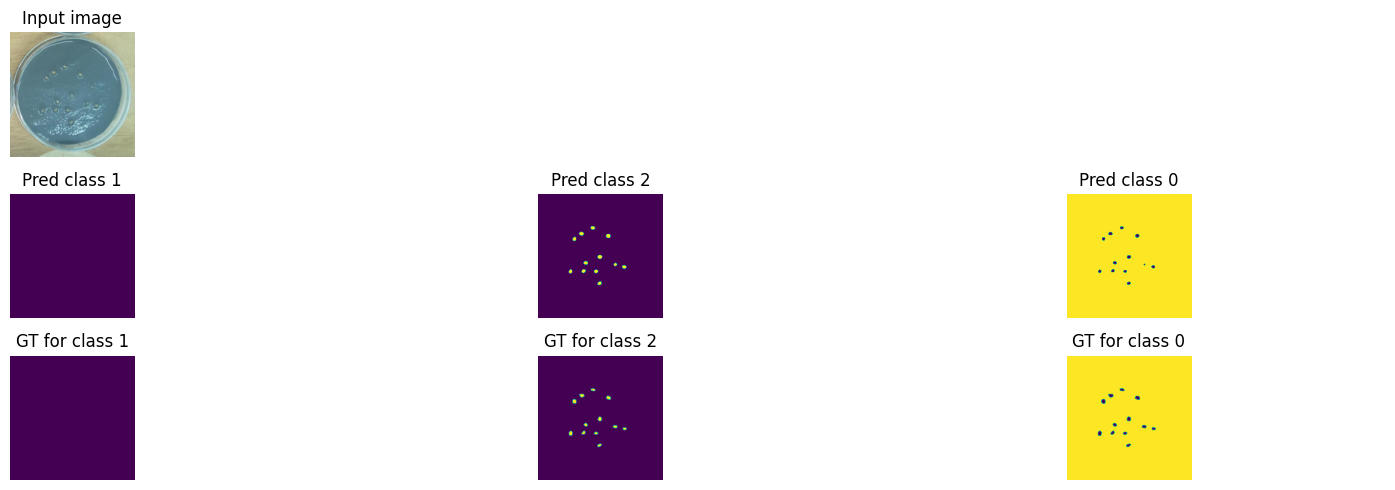

Train loss: 0.00268 | Time: 22m 7s | Val loss: 0.00199
Train_DICE_avg: 0.75824 | Train_Jaccard_avg: 0.69283 | Train_Sensitivity_avg: 0.92266 | Train_Specificity_avg: 0.92055 
Class 0 - Train_DICE: 0.99189 | Train_Jaccard: 0.98394 | Train_Sensitivity: 0.99540 | Train_Specificity: 0.78260 
Class 1 - Train_DICE: 0.48816 | Train_Jaccard: 0.42110 | Train_Sensitivity: 0.85849 | Train_Specificity: 0.98972 
Class 2 - Train_DICE: 0.79467 | Train_Jaccard: 0.67344 | Train_Sensitivity: 0.91408 | Train_Specificity: 0.98933 
Val_DICE_avg: 0.80665 | Val_Jaccard_avg: 0.73920 | Val_Sensitivity_avg: 0.95700 | Val_Specificity_avg: 0.86413 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98395 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.61217 
Class 1 - Val_DICE: 0.66678 | Val_Jaccard: 0.60466 | Val_Sensitivity: 0.91192 | Val_Specificity: 0.99373 
Class 2 - Val_DICE: 0.76128 | Val_Jaccard: 0.62898 | Val_Sensitivity: 0.95990 | Val_Specificity: 0.98649 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.00258 | Time: 23m 12s | Val loss: 0.00197
Train_DICE_avg: 0.76305 | Train_Jaccard_avg: 0.69728 | Train_Sensitivity_avg: 0.92084 | Train_Specificity_avg: 0.91981 
Class 0 - Train_DICE: 0.99190 | Train_Jaccard: 0.98396 | Train_Sensitivity: 0.99555 | Train_Specificity: 0.78016 
Class 1 - Train_DICE: 0.50048 | Train_Jaccard: 0.43176 | Train_Sensitivity: 0.85001 | Train_Specificity: 0.98990 
Class 2 - Train_DICE: 0.79677 | Train_Jaccard: 0.67613 | Train_Sensitivity: 0.91696 | Train_Specificity: 0.98938 
Val_DICE_avg: 0.80728 | Val_Jaccard_avg: 0.74357 | Val_Sensitivity_avg: 0.96367 | Val_Specificity_avg: 0.86429 
Class 0 - Val_DICE: 0.99207 | Val_Jaccard: 0.98430 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.61255 
Class 1 - Val_DICE: 0.65182 | Val_Jaccard: 0.59755 | Val_Sensitivity: 0.95161 | Val_Specificity: 0.99278 
Class 2 - Val_DICE: 0.77796 | Val_Jaccard: 0.64886 | Val_Sensitivity: 0.94024 | Val_Specificity: 0.98754 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.00254 | Time: 24m 17s | Val loss: 0.00183
Train_DICE_avg: 0.75847 | Train_Jaccard_avg: 0.69318 | Train_Sensitivity_avg: 0.92473 | Train_Specificity_avg: 0.91701 
Class 0 - Train_DICE: 0.99189 | Train_Jaccard: 0.98394 | Train_Sensitivity: 0.99568 | Train_Specificity: 0.77221 
Class 1 - Train_DICE: 0.48879 | Train_Jaccard: 0.42244 | Train_Sensitivity: 0.86203 | Train_Specificity: 0.98956 
Class 2 - Train_DICE: 0.79474 | Train_Jaccard: 0.67317 | Train_Sensitivity: 0.91649 | Train_Specificity: 0.98926 
Val_DICE_avg: 0.81401 | Val_Jaccard_avg: 0.74496 | Val_Sensitivity_avg: 0.95824 | Val_Specificity_avg: 0.86741 
Class 0 - Val_DICE: 0.99232 | Val_Jaccard: 0.98478 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.62236 
Class 1 - Val_DICE: 0.70013 | Val_Jaccard: 0.63592 | Val_Sensitivity: 0.91160 | Val_Specificity: 0.99415 
Class 2 - Val_DICE: 0.74958 | Val_Jaccard: 0.61417 | Val_Sensitivity: 0.96384 | Val_Specificity: 0.98572 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.00244 | Time: 25m 22s | Val loss: 0.00182
Train_DICE_avg: 0.75959 | Train_Jaccard_avg: 0.69429 | Train_Sensitivity_avg: 0.92284 | Train_Specificity_avg: 0.92072 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98452 | Train_Sensitivity: 0.99592 | Train_Specificity: 0.78303 
Class 1 - Train_DICE: 0.48870 | Train_Jaccard: 0.42047 | Train_Sensitivity: 0.85371 | Train_Specificity: 0.98966 
Class 2 - Train_DICE: 0.79787 | Train_Jaccard: 0.67787 | Train_Sensitivity: 0.91889 | Train_Specificity: 0.98947 
Val_DICE_avg: 0.81914 | Val_Jaccard_avg: 0.75251 | Val_Sensitivity_avg: 0.95766 | Val_Specificity_avg: 0.86251 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98377 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.60658 
Class 1 - Val_DICE: 0.68826 | Val_Jaccard: 0.62699 | Val_Sensitivity: 0.91411 | Val_Specificity: 0.99413 
Class 2 - Val_DICE: 0.77735 | Val_Jaccard: 0.64678 | Val_Sensitivity: 0.95957 | Val_Specificity: 0.98680 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.00238 | Time: 26m 28s | Val loss: 0.00177
Train_DICE_avg: 0.77006 | Train_Jaccard_avg: 0.70489 | Train_Sensitivity_avg: 0.92591 | Train_Specificity_avg: 0.92209 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98465 | Train_Sensitivity: 0.99586 | Train_Specificity: 0.78651 
Class 1 - Train_DICE: 0.51486 | Train_Jaccard: 0.44551 | Train_Sensitivity: 0.86167 | Train_Specificity: 0.99008 
Class 2 - Train_DICE: 0.80306 | Train_Jaccard: 0.68452 | Train_Sensitivity: 0.92020 | Train_Specificity: 0.98968 
Val_DICE_avg: 0.81731 | Val_Jaccard_avg: 0.74833 | Val_Sensitivity_avg: 0.95293 | Val_Specificity_avg: 0.86724 
Class 0 - Val_DICE: 0.99227 | Val_Jaccard: 0.98468 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62113 
Class 1 - Val_DICE: 0.69458 | Val_Jaccard: 0.62756 | Val_Sensitivity: 0.89338 | Val_Specificity: 0.99428 
Class 2 - Val_DICE: 0.76508 | Val_Jaccard: 0.63276 | Val_Sensitivity: 0.96612 | Val_Specificity: 0.98632 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


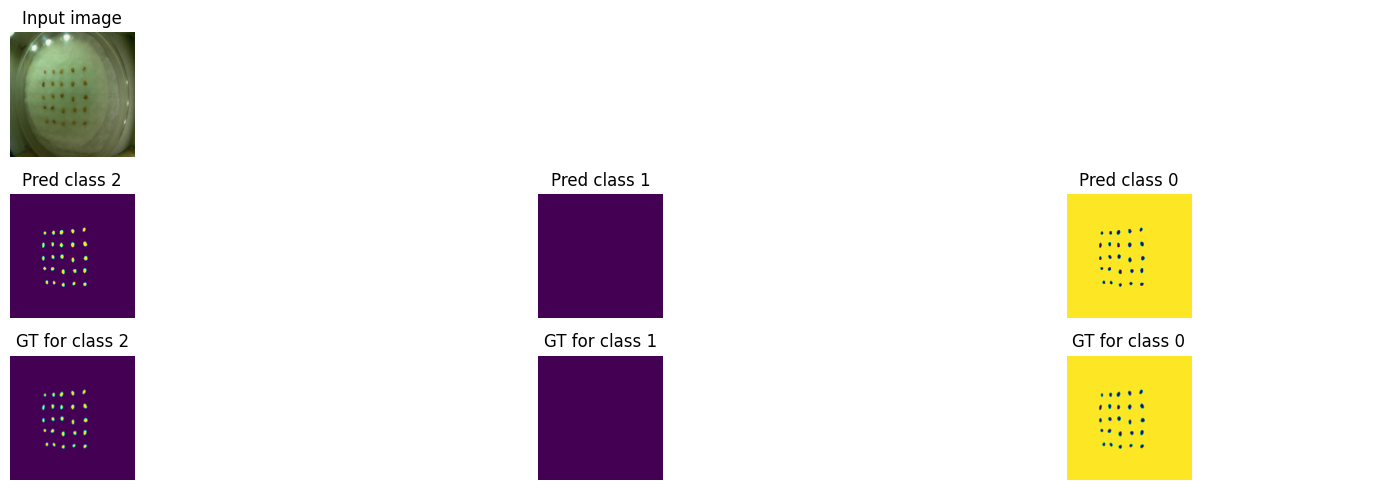

Train loss: 0.00236 | Time: 27m 33s | Val loss: 0.00187
Train_DICE_avg: 0.77084 | Train_Jaccard_avg: 0.70579 | Train_Sensitivity_avg: 0.92489 | Train_Specificity_avg: 0.92137 
Class 0 - Train_DICE: 0.99232 | Train_Jaccard: 0.98479 | Train_Sensitivity: 0.99603 | Train_Specificity: 0.78418 
Class 1 - Train_DICE: 0.51732 | Train_Jaccard: 0.44813 | Train_Sensitivity: 0.85872 | Train_Specificity: 0.99027 
Class 2 - Train_DICE: 0.80288 | Train_Jaccard: 0.68445 | Train_Sensitivity: 0.91992 | Train_Specificity: 0.98968 
Val_DICE_avg: 0.79327 | Val_Jaccard_avg: 0.72248 | Val_Sensitivity_avg: 0.93313 | Val_Specificity_avg: 0.86818 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98505 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.62532 
Class 1 - Val_DICE: 0.63859 | Val_Jaccard: 0.57207 | Val_Sensitivity: 0.83090 | Val_Specificity: 0.99441 
Class 2 - Val_DICE: 0.74876 | Val_Jaccard: 0.61033 | Val_Sensitivity: 0.96922 | Val_Specificity: 0.98482 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00232 | Time: 28m 39s | Val loss: 0.00179
Train_DICE_avg: 0.77367 | Train_Jaccard_avg: 0.70817 | Train_Sensitivity_avg: 0.92699 | Train_Specificity_avg: 0.92158 
Class 0 - Train_DICE: 0.99231 | Train_Jaccard: 0.98478 | Train_Sensitivity: 0.99592 | Train_Specificity: 0.78505 
Class 1 - Train_DICE: 0.52446 | Train_Jaccard: 0.45409 | Train_Sensitivity: 0.86199 | Train_Specificity: 0.99015 
Class 2 - Train_DICE: 0.80423 | Train_Jaccard: 0.68565 | Train_Sensitivity: 0.92307 | Train_Specificity: 0.98953 
Val_DICE_avg: 0.83006 | Val_Jaccard_avg: 0.76216 | Val_Sensitivity_avg: 0.95333 | Val_Specificity_avg: 0.85739 
Class 0 - Val_DICE: 0.99130 | Val_Jaccard: 0.98280 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.59039 
Class 1 - Val_DICE: 0.71602 | Val_Jaccard: 0.64741 | Val_Sensitivity: 0.89544 | Val_Specificity: 0.99443 
Class 2 - Val_DICE: 0.78284 | Val_Jaccard: 0.65627 | Val_Sensitivity: 0.96525 | Val_Specificity: 0.98734 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00229 | Time: 29m 44s | Val loss: 0.00178
Train_DICE_avg: 0.76924 | Train_Jaccard_avg: 0.70384 | Train_Sensitivity_avg: 0.92750 | Train_Specificity_avg: 0.92053 
Class 0 - Train_DICE: 0.99242 | Train_Jaccard: 0.98497 | Train_Sensitivity: 0.99620 | Train_Specificity: 0.78203 
Class 1 - Train_DICE: 0.51077 | Train_Jaccard: 0.43994 | Train_Sensitivity: 0.86420 | Train_Specificity: 0.98978 
Class 2 - Train_DICE: 0.80452 | Train_Jaccard: 0.68661 | Train_Sensitivity: 0.92211 | Train_Specificity: 0.98977 
Val_DICE_avg: 0.80923 | Val_Jaccard_avg: 0.73903 | Val_Sensitivity_avg: 0.93303 | Val_Specificity_avg: 0.86217 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98329 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.60536 
Class 1 - Val_DICE: 0.67739 | Val_Jaccard: 0.60817 | Val_Sensitivity: 0.82980 | Val_Specificity: 0.99512 
Class 2 - Val_DICE: 0.75876 | Val_Jaccard: 0.62562 | Val_Sensitivity: 0.96988 | Val_Specificity: 0.98603 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00227 | Time: 30m 49s | Val loss: 0.00173
Train_DICE_avg: 0.77208 | Train_Jaccard_avg: 0.70672 | Train_Sensitivity_avg: 0.92603 | Train_Specificity_avg: 0.92264 
Class 0 - Train_DICE: 0.99243 | Train_Jaccard: 0.98500 | Train_Sensitivity: 0.99620 | Train_Specificity: 0.78772 
Class 1 - Train_DICE: 0.51582 | Train_Jaccard: 0.44461 | Train_Sensitivity: 0.85886 | Train_Specificity: 0.99037 
Class 2 - Train_DICE: 0.80798 | Train_Jaccard: 0.69054 | Train_Sensitivity: 0.92303 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.82697 | Val_Jaccard_avg: 0.75932 | Val_Sensitivity_avg: 0.94671 | Val_Specificity_avg: 0.86046 
Class 0 - Val_DICE: 0.99151 | Val_Jaccard: 0.98321 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.59931 
Class 1 - Val_DICE: 0.69970 | Val_Jaccard: 0.63117 | Val_Sensitivity: 0.87176 | Val_Specificity: 0.99482 
Class 2 - Val_DICE: 0.78971 | Val_Jaccard: 0.66358 | Val_Sensitivity: 0.96903 | Val_Specificity: 0.98725 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.00223 | Time: 31m 54s | Val loss: 0.00170
Train_DICE_avg: 0.77763 | Train_Jaccard_avg: 0.71254 | Train_Sensitivity_avg: 0.92654 | Train_Specificity_avg: 0.92347 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98514 | Train_Sensitivity: 0.99613 | Train_Specificity: 0.78978 
Class 1 - Train_DICE: 0.53108 | Train_Jaccard: 0.45964 | Train_Sensitivity: 0.85980 | Train_Specificity: 0.99055 
Class 2 - Train_DICE: 0.80930 | Train_Jaccard: 0.69284 | Train_Sensitivity: 0.92371 | Train_Specificity: 0.99010 
Val_DICE_avg: 0.81566 | Val_Jaccard_avg: 0.74590 | Val_Sensitivity_avg: 0.95952 | Val_Specificity_avg: 0.87421 
Class 0 - Val_DICE: 0.99307 | Val_Jaccard: 0.98626 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.64323 
Class 1 - Val_DICE: 0.70593 | Val_Jaccard: 0.64092 | Val_Sensitivity: 0.91143 | Val_Specificity: 0.99431 
Class 2 - Val_DICE: 0.74797 | Val_Jaccard: 0.61052 | Val_Sensitivity: 0.96782 | Val_Specificity: 0.98509 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


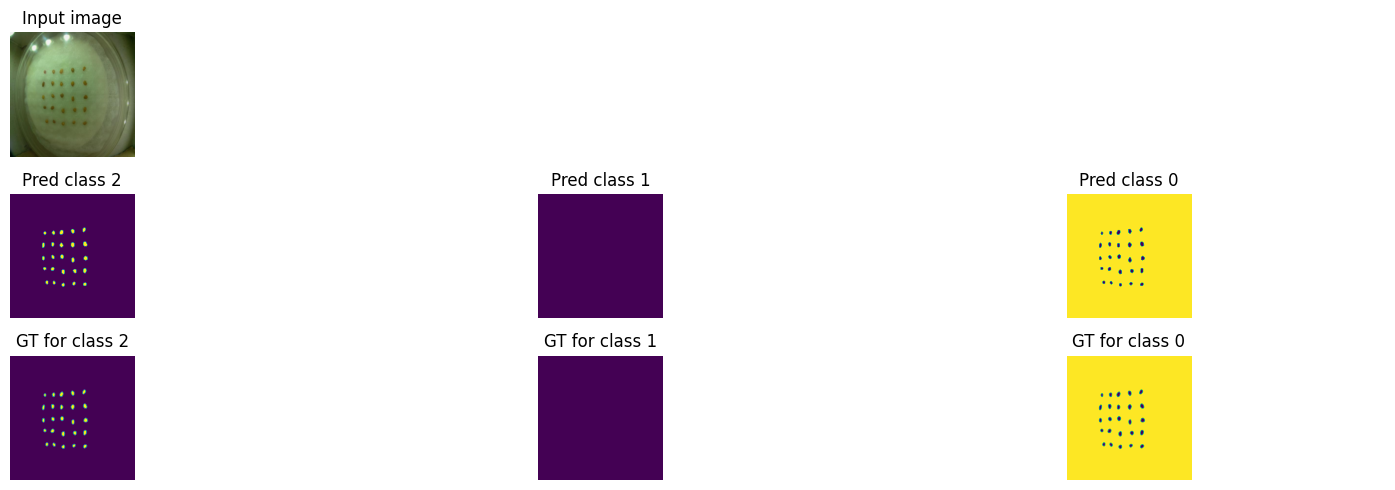

Train loss: 0.00223 | Time: 33m 1s | Val loss: 0.00164
Train_DICE_avg: 0.77203 | Train_Jaccard_avg: 0.70669 | Train_Sensitivity_avg: 0.92918 | Train_Specificity_avg: 0.92229 
Class 0 - Train_DICE: 0.99253 | Train_Jaccard: 0.98519 | Train_Sensitivity: 0.99641 | Train_Specificity: 0.78720 
Class 1 - Train_DICE: 0.51660 | Train_Jaccard: 0.44574 | Train_Sensitivity: 0.86713 | Train_Specificity: 0.99012 
Class 2 - Train_DICE: 0.80697 | Train_Jaccard: 0.68913 | Train_Sensitivity: 0.92401 | Train_Specificity: 0.98956 
Val_DICE_avg: 0.82505 | Val_Jaccard_avg: 0.75510 | Val_Sensitivity_avg: 0.95660 | Val_Specificity_avg: 0.86856 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98466 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.62518 
Class 1 - Val_DICE: 0.72456 | Val_Jaccard: 0.65669 | Val_Sensitivity: 0.90152 | Val_Specificity: 0.99472 
Class 2 - Val_DICE: 0.75832 | Val_Jaccard: 0.62396 | Val_Sensitivity: 0.96896 | Val_Specificity: 0.98577 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00220 | Time: 34m 6s | Val loss: 0.00168
Train_DICE_avg: 0.77613 | Train_Jaccard_avg: 0.71085 | Train_Sensitivity_avg: 0.92984 | Train_Specificity_avg: 0.92215 
Class 0 - Train_DICE: 0.99254 | Train_Jaccard: 0.98521 | Train_Sensitivity: 0.99621 | Train_Specificity: 0.78646 
Class 1 - Train_DICE: 0.52580 | Train_Jaccard: 0.45367 | Train_Sensitivity: 0.86595 | Train_Specificity: 0.99019 
Class 2 - Train_DICE: 0.81005 | Train_Jaccard: 0.69366 | Train_Sensitivity: 0.92736 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.82264 | Val_Jaccard_avg: 0.75299 | Val_Sensitivity_avg: 0.94907 | Val_Specificity_avg: 0.86666 
Class 0 - Val_DICE: 0.99177 | Val_Jaccard: 0.98372 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61879 
Class 1 - Val_DICE: 0.72372 | Val_Jaccard: 0.65516 | Val_Sensitivity: 0.87563 | Val_Specificity: 0.99533 
Class 2 - Val_DICE: 0.75242 | Val_Jaccard: 0.62009 | Val_Sensitivity: 0.97217 | Val_Specificity: 0.98585 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00222 | Time: 35m 12s | Val loss: 0.00168
Train_DICE_avg: 0.77245 | Train_Jaccard_avg: 0.70701 | Train_Sensitivity_avg: 0.92712 | Train_Specificity_avg: 0.92030 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98489 | Train_Sensitivity: 0.99619 | Train_Specificity: 0.78094 
Class 1 - Train_DICE: 0.51679 | Train_Jaccard: 0.44511 | Train_Sensitivity: 0.85933 | Train_Specificity: 0.99028 
Class 2 - Train_DICE: 0.80820 | Train_Jaccard: 0.69103 | Train_Sensitivity: 0.92584 | Train_Specificity: 0.98968 
Val_DICE_avg: 0.82788 | Val_Jaccard_avg: 0.75743 | Val_Sensitivity_avg: 0.94613 | Val_Specificity_avg: 0.86279 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.60727 
Class 1 - Val_DICE: 0.72664 | Val_Jaccard: 0.65696 | Val_Sensitivity: 0.86190 | Val_Specificity: 0.99549 
Class 2 - Val_DICE: 0.76514 | Val_Jaccard: 0.63142 | Val_Sensitivity: 0.97704 | Val_Specificity: 0.98562 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00218 | Time: 36m 17s | Val loss: 0.00165
Train_DICE_avg: 0.78106 | Train_Jaccard_avg: 0.71610 | Train_Sensitivity_avg: 0.92891 | Train_Specificity_avg: 0.92453 
Class 0 - Train_DICE: 0.99263 | Train_Jaccard: 0.98540 | Train_Sensitivity: 0.99623 | Train_Specificity: 0.79288 
Class 1 - Train_DICE: 0.53781 | Train_Jaccard: 0.46577 | Train_Sensitivity: 0.86334 | Train_Specificity: 0.99072 
Class 2 - Train_DICE: 0.81273 | Train_Jaccard: 0.69713 | Train_Sensitivity: 0.92716 | Train_Specificity: 0.98999 
Val_DICE_avg: 0.81510 | Val_Jaccard_avg: 0.74476 | Val_Sensitivity_avg: 0.94270 | Val_Specificity_avg: 0.86722 
Class 0 - Val_DICE: 0.99238 | Val_Jaccard: 0.98490 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62120 
Class 1 - Val_DICE: 0.69653 | Val_Jaccard: 0.62633 | Val_Sensitivity: 0.85207 | Val_Specificity: 0.99495 
Class 2 - Val_DICE: 0.75639 | Val_Jaccard: 0.62304 | Val_Sensitivity: 0.97665 | Val_Specificity: 0.98552 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00214 | Time: 37m 23s | Val loss: 0.00158
Train_DICE_avg: 0.78416 | Train_Jaccard_avg: 0.71902 | Train_Sensitivity_avg: 0.93336 | Train_Specificity_avg: 0.92272 
Class 0 - Train_DICE: 0.99264 | Train_Jaccard: 0.98541 | Train_Sensitivity: 0.99641 | Train_Specificity: 0.78769 
Class 1 - Train_DICE: 0.54637 | Train_Jaccard: 0.47327 | Train_Sensitivity: 0.87600 | Train_Specificity: 0.99052 
Class 2 - Train_DICE: 0.81348 | Train_Jaccard: 0.69838 | Train_Sensitivity: 0.92769 | Train_Specificity: 0.98993 
Val_DICE_avg: 0.82092 | Val_Jaccard_avg: 0.75115 | Val_Sensitivity_avg: 0.95973 | Val_Specificity_avg: 0.87124 
Class 0 - Val_DICE: 0.99257 | Val_Jaccard: 0.98528 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.63310 
Class 1 - Val_DICE: 0.70975 | Val_Jaccard: 0.63814 | Val_Sensitivity: 0.90829 | Val_Specificity: 0.99406 
Class 2 - Val_DICE: 0.76043 | Val_Jaccard: 0.63003 | Val_Sensitivity: 0.97166 | Val_Specificity: 0.98656 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


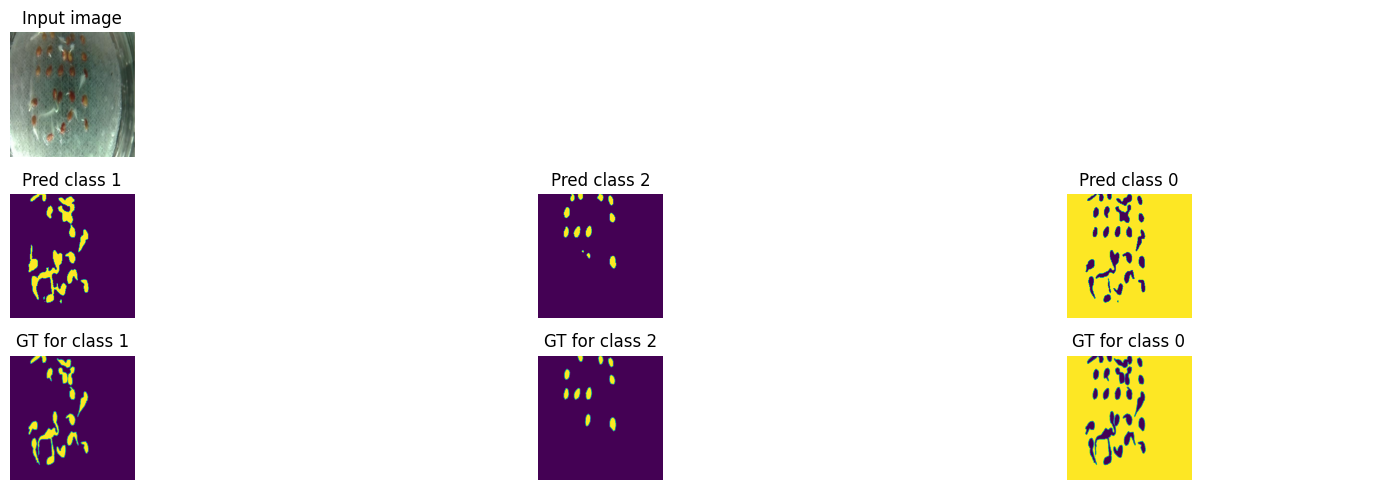

Train loss: 0.00210 | Time: 38m 30s | Val loss: 0.00156
Train_DICE_avg: 0.78352 | Train_Jaccard_avg: 0.71812 | Train_Sensitivity_avg: 0.93083 | Train_Specificity_avg: 0.92287 
Class 0 - Train_DICE: 0.99266 | Train_Jaccard: 0.98546 | Train_Sensitivity: 0.99648 | Train_Specificity: 0.78811 
Class 1 - Train_DICE: 0.54467 | Train_Jaccard: 0.47122 | Train_Sensitivity: 0.86703 | Train_Specificity: 0.99064 
Class 2 - Train_DICE: 0.81323 | Train_Jaccard: 0.69768 | Train_Sensitivity: 0.92897 | Train_Specificity: 0.98987 
Val_DICE_avg: 0.83332 | Val_Jaccard_avg: 0.76328 | Val_Sensitivity_avg: 0.95595 | Val_Specificity_avg: 0.86750 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98463 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62130 
Class 1 - Val_DICE: 0.73566 | Val_Jaccard: 0.66531 | Val_Sensitivity: 0.89834 | Val_Specificity: 0.99501 
Class 2 - Val_DICE: 0.77205 | Val_Jaccard: 0.63990 | Val_Sensitivity: 0.97012 | Val_Specificity: 0.98620 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.00208 | Time: 39m 37s | Val loss: 0.00158
Train_DICE_avg: 0.78622 | Train_Jaccard_avg: 0.72101 | Train_Sensitivity_avg: 0.93342 | Train_Specificity_avg: 0.92337 
Class 0 - Train_DICE: 0.99269 | Train_Jaccard: 0.98551 | Train_Sensitivity: 0.99638 | Train_Specificity: 0.78930 
Class 1 - Train_DICE: 0.55064 | Train_Jaccard: 0.47695 | Train_Sensitivity: 0.87374 | Train_Specificity: 0.99084 
Class 2 - Train_DICE: 0.81533 | Train_Jaccard: 0.70058 | Train_Sensitivity: 0.93012 | Train_Specificity: 0.98997 
Val_DICE_avg: 0.82318 | Val_Jaccard_avg: 0.75105 | Val_Sensitivity_avg: 0.94937 | Val_Specificity_avg: 0.87083 
Class 0 - Val_DICE: 0.99263 | Val_Jaccard: 0.98540 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.63250 
Class 1 - Val_DICE: 0.72608 | Val_Jaccard: 0.65301 | Val_Sensitivity: 0.86902 | Val_Specificity: 0.99485 
Class 2 - Val_DICE: 0.75084 | Val_Jaccard: 0.61473 | Val_Sensitivity: 0.97979 | Val_Specificity: 0.98514 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00204 | Time: 40m 45s | Val loss: 0.00154
Train_DICE_avg: 0.79030 | Train_Jaccard_avg: 0.72530 | Train_Sensitivity_avg: 0.93508 | Train_Specificity_avg: 0.92506 
Class 0 - Train_DICE: 0.99275 | Train_Jaccard: 0.98562 | Train_Sensitivity: 0.99652 | Train_Specificity: 0.79414 
Class 1 - Train_DICE: 0.55993 | Train_Jaccard: 0.48583 | Train_Sensitivity: 0.87905 | Train_Specificity: 0.99095 
Class 2 - Train_DICE: 0.81824 | Train_Jaccard: 0.70445 | Train_Sensitivity: 0.92967 | Train_Specificity: 0.99009 
Val_DICE_avg: 0.82392 | Val_Jaccard_avg: 0.75243 | Val_Sensitivity_avg: 0.95283 | Val_Specificity_avg: 0.87393 
Class 0 - Val_DICE: 0.99289 | Val_Jaccard: 0.98591 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.64186 
Class 1 - Val_DICE: 0.72060 | Val_Jaccard: 0.64899 | Val_Sensitivity: 0.89044 | Val_Specificity: 0.99438 
Class 2 - Val_DICE: 0.75827 | Val_Jaccard: 0.62240 | Val_Sensitivity: 0.96875 | Val_Specificity: 0.98556 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.00203 | Time: 41m 52s | Val loss: 0.00157
Train_DICE_avg: 0.78506 | Train_Jaccard_avg: 0.71971 | Train_Sensitivity_avg: 0.93294 | Train_Specificity_avg: 0.92235 
Class 0 - Train_DICE: 0.99282 | Train_Jaccard: 0.98578 | Train_Sensitivity: 0.99665 | Train_Specificity: 0.78661 
Class 1 - Train_DICE: 0.54693 | Train_Jaccard: 0.47272 | Train_Sensitivity: 0.87017 | Train_Specificity: 0.99055 
Class 2 - Train_DICE: 0.81541 | Train_Jaccard: 0.70064 | Train_Sensitivity: 0.93201 | Train_Specificity: 0.98990 
Val_DICE_avg: 0.82935 | Val_Jaccard_avg: 0.75941 | Val_Sensitivity_avg: 0.95504 | Val_Specificity_avg: 0.86682 
Class 0 - Val_DICE: 0.99237 | Val_Jaccard: 0.98489 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61972 
Class 1 - Val_DICE: 0.72826 | Val_Jaccard: 0.65849 | Val_Sensitivity: 0.88964 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.76742 | Val_Jaccard: 0.63484 | Val_Sensitivity: 0.97613 | Val_Specificity: 0.98582 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00200 | Time: 42m 59s | Val loss: 0.00153
Train_DICE_avg: 0.78988 | Train_Jaccard_avg: 0.72497 | Train_Sensitivity_avg: 0.93537 | Train_Specificity_avg: 0.92308 
Class 0 - Train_DICE: 0.99285 | Train_Jaccard: 0.98582 | Train_Sensitivity: 0.99676 | Train_Specificity: 0.78846 
Class 1 - Train_DICE: 0.55875 | Train_Jaccard: 0.48457 | Train_Sensitivity: 0.87639 | Train_Specificity: 0.99077 
Class 2 - Train_DICE: 0.81803 | Train_Jaccard: 0.70451 | Train_Sensitivity: 0.93297 | Train_Specificity: 0.99002 
Val_DICE_avg: 0.82375 | Val_Jaccard_avg: 0.75131 | Val_Sensitivity_avg: 0.95138 | Val_Specificity_avg: 0.87481 
Class 0 - Val_DICE: 0.99304 | Val_Jaccard: 0.98620 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.64452 
Class 1 - Val_DICE: 0.72659 | Val_Jaccard: 0.65369 | Val_Sensitivity: 0.88264 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.75162 | Val_Jaccard: 0.61403 | Val_Sensitivity: 0.97214 | Val_Specificity: 0.98505 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


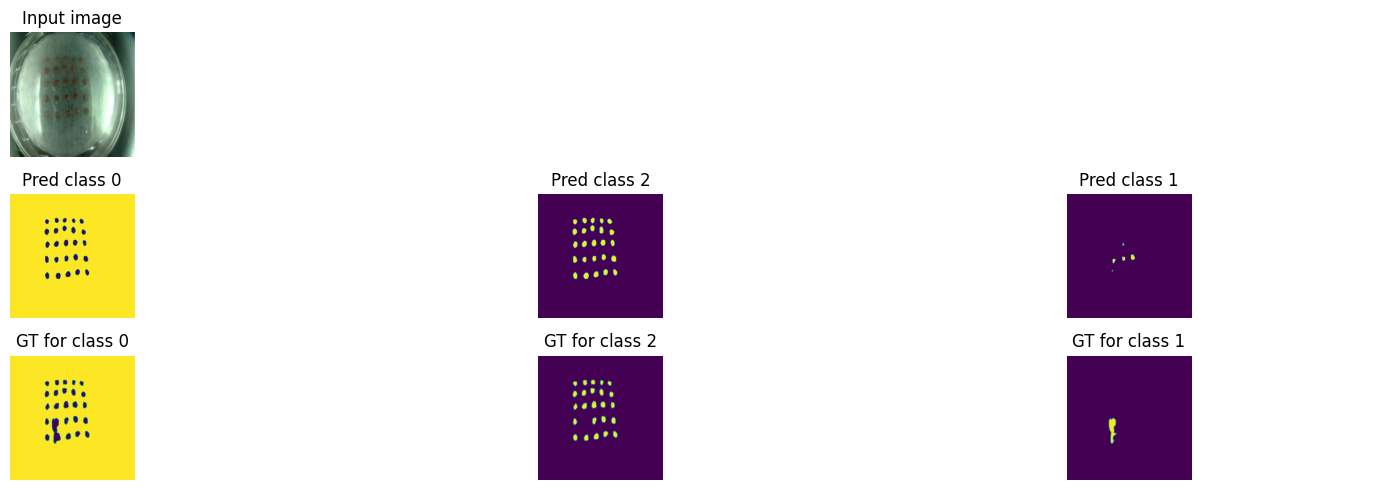

Train loss: 0.00198 | Time: 44m 7s | Val loss: 0.00153
Train_DICE_avg: 0.78651 | Train_Jaccard_avg: 0.72091 | Train_Sensitivity_avg: 0.93364 | Train_Specificity_avg: 0.92285 
Class 0 - Train_DICE: 0.99294 | Train_Jaccard: 0.98600 | Train_Sensitivity: 0.99678 | Train_Specificity: 0.78801 
Class 1 - Train_DICE: 0.55238 | Train_Jaccard: 0.47738 | Train_Sensitivity: 0.87132 | Train_Specificity: 0.99069 
Class 2 - Train_DICE: 0.81421 | Train_Jaccard: 0.69936 | Train_Sensitivity: 0.93282 | Train_Specificity: 0.98986 
Val_DICE_avg: 0.83314 | Val_Jaccard_avg: 0.76262 | Val_Sensitivity_avg: 0.95848 | Val_Specificity_avg: 0.86698 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98468 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61986 
Class 1 - Val_DICE: 0.73814 | Val_Jaccard: 0.66555 | Val_Sensitivity: 0.90348 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.76902 | Val_Jaccard: 0.63762 | Val_Sensitivity: 0.97258 | Val_Specificity: 0.98642 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]


Train loss: 0.00195 | Time: 45m 15s | Val loss: 0.00152
Train_DICE_avg: 0.79326 | Train_Jaccard_avg: 0.72873 | Train_Sensitivity_avg: 0.93751 | Train_Specificity_avg: 0.92398 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98603 | Train_Sensitivity: 0.99674 | Train_Specificity: 0.79074 
Class 1 - Train_DICE: 0.56604 | Train_Jaccard: 0.49180 | Train_Sensitivity: 0.88132 | Train_Specificity: 0.99100 
Class 2 - Train_DICE: 0.82079 | Train_Jaccard: 0.70835 | Train_Sensitivity: 0.93447 | Train_Specificity: 0.99020 
Val_DICE_avg: 0.82574 | Val_Jaccard_avg: 0.75505 | Val_Sensitivity_avg: 0.95851 | Val_Specificity_avg: 0.87037 
Class 0 - Val_DICE: 0.99257 | Val_Jaccard: 0.98529 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.63073 
Class 1 - Val_DICE: 0.72377 | Val_Jaccard: 0.65150 | Val_Sensitivity: 0.90315 | Val_Specificity: 0.99443 
Class 2 - Val_DICE: 0.76088 | Val_Jaccard: 0.62835 | Val_Sensitivity: 0.97308 | Val_Specificity: 0.98595 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.00195 | Time: 46m 23s | Val loss: 0.00155
Train_DICE_avg: 0.79586 | Train_Jaccard_avg: 0.73100 | Train_Sensitivity_avg: 0.93723 | Train_Specificity_avg: 0.92353 
Class 0 - Train_DICE: 0.99293 | Train_Jaccard: 0.98598 | Train_Sensitivity: 0.99667 | Train_Specificity: 0.78924 
Class 1 - Train_DICE: 0.57457 | Train_Jaccard: 0.49926 | Train_Sensitivity: 0.87960 | Train_Specificity: 0.99115 
Class 2 - Train_DICE: 0.82008 | Train_Jaccard: 0.70776 | Train_Sensitivity: 0.93542 | Train_Specificity: 0.99020 
Val_DICE_avg: 0.83177 | Val_Jaccard_avg: 0.76125 | Val_Sensitivity_avg: 0.96358 | Val_Specificity_avg: 0.86977 
Class 0 - Val_DICE: 0.99251 | Val_Jaccard: 0.98517 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62876 
Class 1 - Val_DICE: 0.74307 | Val_Jaccard: 0.67310 | Val_Sensitivity: 0.91692 | Val_Specificity: 0.99483 
Class 2 - Val_DICE: 0.75972 | Val_Jaccard: 0.62547 | Val_Sensitivity: 0.97445 | Val_Specificity: 0.98572 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00195 | Time: 47m 30s | Val loss: 0.00153
Train_DICE_avg: 0.79267 | Train_Jaccard_avg: 0.72739 | Train_Sensitivity_avg: 0.93593 | Train_Specificity_avg: 0.92382 
Class 0 - Train_DICE: 0.99298 | Train_Jaccard: 0.98607 | Train_Sensitivity: 0.99668 | Train_Specificity: 0.79018 
Class 1 - Train_DICE: 0.56600 | Train_Jaccard: 0.49052 | Train_Sensitivity: 0.87663 | Train_Specificity: 0.99114 
Class 2 - Train_DICE: 0.81904 | Train_Jaccard: 0.70557 | Train_Sensitivity: 0.93447 | Train_Specificity: 0.99013 
Val_DICE_avg: 0.82777 | Val_Jaccard_avg: 0.75715 | Val_Sensitivity_avg: 0.96109 | Val_Specificity_avg: 0.87360 
Class 0 - Val_DICE: 0.99292 | Val_Jaccard: 0.98596 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.64048 
Class 1 - Val_DICE: 0.72835 | Val_Jaccard: 0.65847 | Val_Sensitivity: 0.91033 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.76205 | Val_Jaccard: 0.62701 | Val_Sensitivity: 0.97361 | Val_Specificity: 0.98565 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Train loss: 0.00193 | Time: 48m 38s | Val loss: 0.00148
Train_DICE_avg: 0.79380 | Train_Jaccard_avg: 0.72901 | Train_Sensitivity_avg: 0.93737 | Train_Specificity_avg: 0.92513 
Class 0 - Train_DICE: 0.99305 | Train_Jaccard: 0.98622 | Train_Sensitivity: 0.99673 | Train_Specificity: 0.79410 
Class 1 - Train_DICE: 0.56768 | Train_Jaccard: 0.49251 | Train_Sensitivity: 0.88176 | Train_Specificity: 0.99104 
Class 2 - Train_DICE: 0.82067 | Train_Jaccard: 0.70828 | Train_Sensitivity: 0.93363 | Train_Specificity: 0.99027 
Val_DICE_avg: 0.82911 | Val_Jaccard_avg: 0.75758 | Val_Sensitivity_avg: 0.96135 | Val_Specificity_avg: 0.87316 
Class 0 - Val_DICE: 0.99286 | Val_Jaccard: 0.98586 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.63935 
Class 1 - Val_DICE: 0.73742 | Val_Jaccard: 0.66572 | Val_Sensitivity: 0.90940 | Val_Specificity: 0.99479 
Class 2 - Val_DICE: 0.75706 | Val_Jaccard: 0.62118 | Val_Sensitivity: 0.97530 | Val_Specificity: 0.98535 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


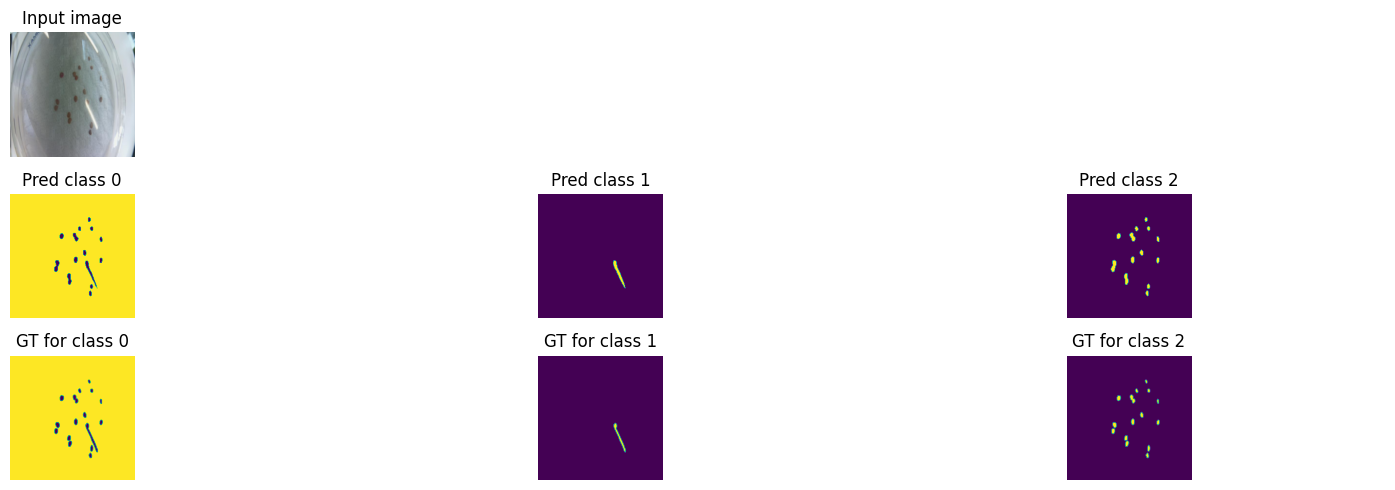

Train loss: 0.00191 | Time: 49m 47s | Val loss: 0.00152
Train_DICE_avg: 0.79607 | Train_Jaccard_avg: 0.73142 | Train_Sensitivity_avg: 0.93830 | Train_Specificity_avg: 0.92481 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98610 | Train_Sensitivity: 0.99677 | Train_Specificity: 0.79313 
Class 1 - Train_DICE: 0.57276 | Train_Jaccard: 0.49728 | Train_Sensitivity: 0.88248 | Train_Specificity: 0.99104 
Class 2 - Train_DICE: 0.82246 | Train_Jaccard: 0.71089 | Train_Sensitivity: 0.93566 | Train_Specificity: 0.99026 
Val_DICE_avg: 0.83435 | Val_Jaccard_avg: 0.76417 | Val_Sensitivity_avg: 0.96020 | Val_Specificity_avg: 0.86790 
Class 0 - Val_DICE: 0.99237 | Val_Jaccard: 0.98489 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62247 
Class 1 - Val_DICE: 0.73910 | Val_Jaccard: 0.66718 | Val_Sensitivity: 0.90751 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.77156 | Val_Jaccard: 0.64045 | Val_Sensitivity: 0.97368 | Val_Specificity: 0.98636 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.00192 | Time: 50m 54s | Val loss: 0.00150
Train_DICE_avg: 0.79283 | Train_Jaccard_avg: 0.72712 | Train_Sensitivity_avg: 0.93887 | Train_Specificity_avg: 0.92212 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98604 | Train_Sensitivity: 0.99689 | Train_Specificity: 0.78574 
Class 1 - Train_DICE: 0.56727 | Train_Jaccard: 0.49058 | Train_Sensitivity: 0.88240 | Train_Specificity: 0.99075 
Class 2 - Train_DICE: 0.81826 | Train_Jaccard: 0.70475 | Train_Sensitivity: 0.93733 | Train_Specificity: 0.98988 
Val_DICE_avg: 0.83514 | Val_Jaccard_avg: 0.76475 | Val_Sensitivity_avg: 0.96205 | Val_Specificity_avg: 0.86893 
Class 0 - Val_DICE: 0.99229 | Val_Jaccard: 0.98475 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62571 
Class 1 - Val_DICE: 0.74686 | Val_Jaccard: 0.67621 | Val_Sensitivity: 0.91139 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.76626 | Val_Jaccard: 0.63328 | Val_Sensitivity: 0.97536 | Val_Specificity: 0.98604 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Train loss: 0.00189 | Time: 52m 2s | Val loss: 0.00150
Train_DICE_avg: 0.79959 | Train_Jaccard_avg: 0.73496 | Train_Sensitivity_avg: 0.93858 | Train_Specificity_avg: 0.92608 
Class 0 - Train_DICE: 0.99303 | Train_Jaccard: 0.98618 | Train_Sensitivity: 0.99679 | Train_Specificity: 0.79682 
Class 1 - Train_DICE: 0.58177 | Train_Jaccard: 0.50614 | Train_Sensitivity: 0.88390 | Train_Specificity: 0.99111 
Class 2 - Train_DICE: 0.82396 | Train_Jaccard: 0.71255 | Train_Sensitivity: 0.93505 | Train_Specificity: 0.99031 
Val_DICE_avg: 0.83627 | Val_Jaccard_avg: 0.76526 | Val_Sensitivity_avg: 0.95655 | Val_Specificity_avg: 0.86768 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98467 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62184 
Class 1 - Val_DICE: 0.74975 | Val_Jaccard: 0.67611 | Val_Sensitivity: 0.89062 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.76679 | Val_Jaccard: 0.63500 | Val_Sensitivity: 0.97967 | Val_Specificity: 0.98614 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.00188 | Time: 53m 10s | Val loss: 0.00150
Train_DICE_avg: 0.79931 | Train_Jaccard_avg: 0.73481 | Train_Sensitivity_avg: 0.93944 | Train_Specificity_avg: 0.92463 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98625 | Train_Sensitivity: 0.99684 | Train_Specificity: 0.79235 
Class 1 - Train_DICE: 0.58205 | Train_Jaccard: 0.50676 | Train_Sensitivity: 0.88401 | Train_Specificity: 0.99126 
Class 2 - Train_DICE: 0.82280 | Train_Jaccard: 0.71140 | Train_Sensitivity: 0.93746 | Train_Specificity: 0.99028 
Val_DICE_avg: 0.83420 | Val_Jaccard_avg: 0.76356 | Val_Sensitivity_avg: 0.96065 | Val_Specificity_avg: 0.87145 
Class 0 - Val_DICE: 0.99256 | Val_Jaccard: 0.98526 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.63325 
Class 1 - Val_DICE: 0.73997 | Val_Jaccard: 0.66764 | Val_Sensitivity: 0.90770 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.77009 | Val_Jaccard: 0.63778 | Val_Sensitivity: 0.97488 | Val_Specificity: 0.98617 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.00188 | Time: 54m 18s | Val loss: 0.00149
Train_DICE_avg: 0.79710 | Train_Jaccard_avg: 0.73264 | Train_Sensitivity_avg: 0.93525 | Train_Specificity_avg: 0.92591 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98628 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.79602 
Class 1 - Train_DICE: 0.57281 | Train_Jaccard: 0.49719 | Train_Sensitivity: 0.87264 | Train_Specificity: 0.99137 
Class 2 - Train_DICE: 0.82542 | Train_Jaccard: 0.71446 | Train_Sensitivity: 0.93629 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.83286 | Val_Jaccard_avg: 0.76164 | Val_Sensitivity_avg: 0.95912 | Val_Specificity_avg: 0.86987 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98506 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62884 
Class 1 - Val_DICE: 0.74096 | Val_Jaccard: 0.66852 | Val_Sensitivity: 0.90546 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.76516 | Val_Jaccard: 0.63133 | Val_Sensitivity: 0.97254 | Val_Specificity: 0.98591 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


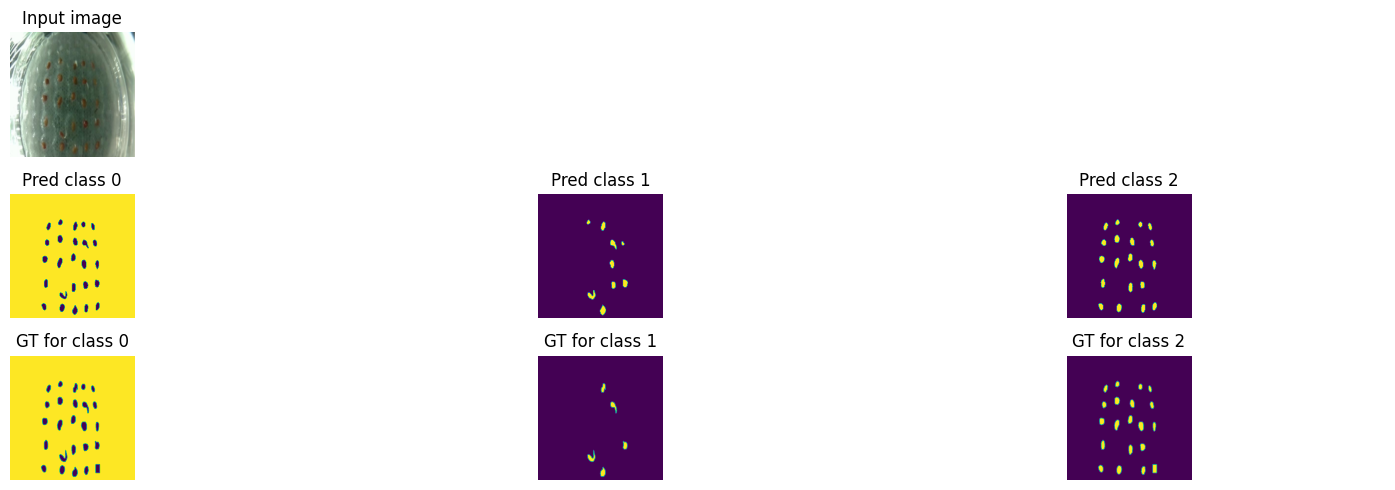

Train loss: 0.00187 | Time: 55m 26s | Val loss: 0.00147
Train_DICE_avg: 0.79367 | Train_Jaccard_avg: 0.72886 | Train_Sensitivity_avg: 0.93693 | Train_Specificity_avg: 0.92393 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98626 | Train_Sensitivity: 0.99691 | Train_Specificity: 0.79111 
Class 1 - Train_DICE: 0.56687 | Train_Jaccard: 0.49194 | Train_Sensitivity: 0.87498 | Train_Specificity: 0.99066 
Class 2 - Train_DICE: 0.82107 | Train_Jaccard: 0.70839 | Train_Sensitivity: 0.93890 | Train_Specificity: 0.99001 
Val_DICE_avg: 0.83788 | Val_Jaccard_avg: 0.76763 | Val_Sensitivity_avg: 0.96131 | Val_Specificity_avg: 0.86779 
Class 0 - Val_DICE: 0.99227 | Val_Jaccard: 0.98470 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62203 
Class 1 - Val_DICE: 0.74773 | Val_Jaccard: 0.67556 | Val_Sensitivity: 0.90947 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.77363 | Val_Jaccard: 0.64263 | Val_Sensitivity: 0.97509 | Val_Specificity: 0.98642 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.00186 | Time: 56m 33s | Val loss: 0.00146
Train_DICE_avg: 0.80320 | Train_Jaccard_avg: 0.73880 | Train_Sensitivity_avg: 0.93930 | Train_Specificity_avg: 0.92617 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98626 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.79674 
Class 1 - Train_DICE: 0.59030 | Train_Jaccard: 0.51431 | Train_Sensitivity: 0.88482 | Train_Specificity: 0.99136 
Class 2 - Train_DICE: 0.82624 | Train_Jaccard: 0.71582 | Train_Sensitivity: 0.93625 | Train_Specificity: 0.99041 
Val_DICE_avg: 0.83744 | Val_Jaccard_avg: 0.76689 | Val_Sensitivity_avg: 0.95932 | Val_Specificity_avg: 0.87090 
Class 0 - Val_DICE: 0.99248 | Val_Jaccard: 0.98510 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.63156 
Class 1 - Val_DICE: 0.75143 | Val_Jaccard: 0.67964 | Val_Sensitivity: 0.90382 | Val_Specificity: 0.99499 
Class 2 - Val_DICE: 0.76842 | Val_Jaccard: 0.63593 | Val_Sensitivity: 0.97475 | Val_Specificity: 0.98615 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00185 | Time: 57m 40s | Val loss: 0.00145
Train_DICE_avg: 0.79923 | Train_Jaccard_avg: 0.73426 | Train_Sensitivity_avg: 0.93919 | Train_Specificity_avg: 0.92456 
Class 0 - Train_DICE: 0.99310 | Train_Jaccard: 0.98631 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.79208 
Class 1 - Train_DICE: 0.57988 | Train_Jaccard: 0.50280 | Train_Sensitivity: 0.88253 | Train_Specificity: 0.99119 
Class 2 - Train_DICE: 0.82471 | Train_Jaccard: 0.71367 | Train_Sensitivity: 0.93817 | Train_Specificity: 0.99040 
Val_DICE_avg: 0.83286 | Val_Jaccard_avg: 0.76129 | Val_Sensitivity_avg: 0.95959 | Val_Specificity_avg: 0.87272 
Class 0 - Val_DICE: 0.99277 | Val_Jaccard: 0.98567 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.63766 
Class 1 - Val_DICE: 0.74670 | Val_Jaccard: 0.67363 | Val_Sensitivity: 0.90188 | Val_Specificity: 0.99490 
Class 2 - Val_DICE: 0.75911 | Val_Jaccard: 0.62458 | Val_Sensitivity: 0.97754 | Val_Specificity: 0.98561 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00183 | Time: 58m 48s | Val loss: 0.00146
Train_DICE_avg: 0.80124 | Train_Jaccard_avg: 0.73699 | Train_Sensitivity_avg: 0.94095 | Train_Specificity_avg: 0.92555 
Class 0 - Train_DICE: 0.99314 | Train_Jaccard: 0.98641 | Train_Sensitivity: 0.99690 | Train_Specificity: 0.79499 
Class 1 - Train_DICE: 0.58589 | Train_Jaccard: 0.51076 | Train_Sensitivity: 0.88716 | Train_Specificity: 0.99137 
Class 2 - Train_DICE: 0.82468 | Train_Jaccard: 0.71382 | Train_Sensitivity: 0.93878 | Train_Specificity: 0.99028 
Val_DICE_avg: 0.84017 | Val_Jaccard_avg: 0.76917 | Val_Sensitivity_avg: 0.95851 | Val_Specificity_avg: 0.86847 
Class 0 - Val_DICE: 0.99230 | Val_Jaccard: 0.98476 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.62421 
Class 1 - Val_DICE: 0.75992 | Val_Jaccard: 0.68694 | Val_Sensitivity: 0.89832 | Val_Specificity: 0.99520 
Class 2 - Val_DICE: 0.76829 | Val_Jaccard: 0.63581 | Val_Sensitivity: 0.97779 | Val_Specificity: 0.98601 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Train loss: 0.00183 | Time: 59m 55s | Val loss: 0.00148
Train_DICE_avg: 0.79959 | Train_Jaccard_avg: 0.73469 | Train_Sensitivity_avg: 0.94146 | Train_Specificity_avg: 0.92291 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98623 | Train_Sensitivity: 0.99702 | Train_Specificity: 0.78750 
Class 1 - Train_DICE: 0.58176 | Train_Jaccard: 0.50532 | Train_Sensitivity: 0.88874 | Train_Specificity: 0.99101 
Class 2 - Train_DICE: 0.82397 | Train_Jaccard: 0.71251 | Train_Sensitivity: 0.93863 | Train_Specificity: 0.99023 
Val_DICE_avg: 0.83604 | Val_Jaccard_avg: 0.76586 | Val_Sensitivity_avg: 0.96109 | Val_Specificity_avg: 0.86853 
Class 0 - Val_DICE: 0.99233 | Val_Jaccard: 0.98480 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62421 
Class 1 - Val_DICE: 0.74133 | Val_Jaccard: 0.66878 | Val_Sensitivity: 0.90934 | Val_Specificity: 0.99485 
Class 2 - Val_DICE: 0.77445 | Val_Jaccard: 0.64400 | Val_Sensitivity: 0.97456 | Val_Specificity: 0.98652 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


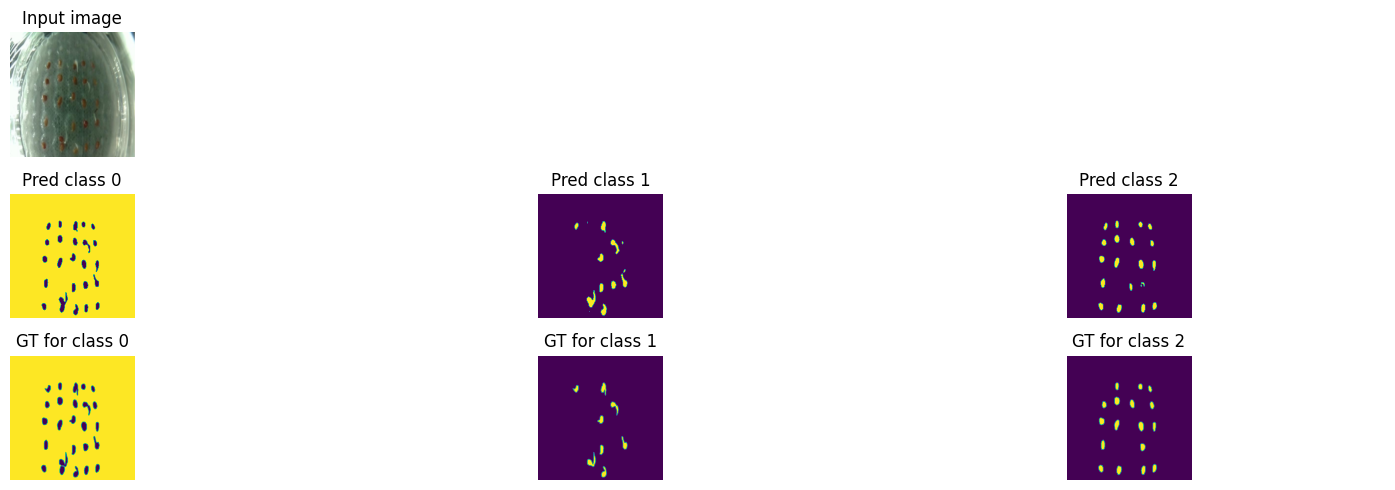

Train loss: 0.00184 | Time: 61m 4s | Val loss: 0.00146
Train_DICE_avg: 0.80140 | Train_Jaccard_avg: 0.73674 | Train_Sensitivity_avg: 0.93866 | Train_Specificity_avg: 0.92563 
Class 0 - Train_DICE: 0.99317 | Train_Jaccard: 0.98645 | Train_Sensitivity: 0.99683 | Train_Specificity: 0.79527 
Class 1 - Train_DICE: 0.58671 | Train_Jaccard: 0.51029 | Train_Sensitivity: 0.88110 | Train_Specificity: 0.99122 
Class 2 - Train_DICE: 0.82433 | Train_Jaccard: 0.71347 | Train_Sensitivity: 0.93804 | Train_Specificity: 0.99040 
Val_DICE_avg: 0.84045 | Val_Jaccard_avg: 0.77016 | Val_Sensitivity_avg: 0.96110 | Val_Specificity_avg: 0.86879 
Class 0 - Val_DICE: 0.99237 | Val_Jaccard: 0.98488 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62502 
Class 1 - Val_DICE: 0.75410 | Val_Jaccard: 0.68205 | Val_Sensitivity: 0.90860 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.77489 | Val_Jaccard: 0.64354 | Val_Sensitivity: 0.97532 | Val_Specificity: 0.98630 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.00182 | Time: 62m 11s | Val loss: 0.00144
Train_DICE_avg: 0.80006 | Train_Jaccard_avg: 0.73602 | Train_Sensitivity_avg: 0.93962 | Train_Specificity_avg: 0.92440 
Class 0 - Train_DICE: 0.99311 | Train_Jaccard: 0.98634 | Train_Sensitivity: 0.99698 | Train_Specificity: 0.79156 
Class 1 - Train_DICE: 0.58174 | Train_Jaccard: 0.50697 | Train_Sensitivity: 0.88131 | Train_Specificity: 0.99128 
Class 2 - Train_DICE: 0.82533 | Train_Jaccard: 0.71475 | Train_Sensitivity: 0.94056 | Train_Specificity: 0.99036 
Val_DICE_avg: 0.83764 | Val_Jaccard_avg: 0.76707 | Val_Sensitivity_avg: 0.96188 | Val_Specificity_avg: 0.87142 
Class 0 - Val_DICE: 0.99260 | Val_Jaccard: 0.98535 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.63327 
Class 1 - Val_DICE: 0.75223 | Val_Jaccard: 0.68151 | Val_Sensitivity: 0.91400 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.76807 | Val_Jaccard: 0.63436 | Val_Sensitivity: 0.97223 | Val_Specificity: 0.98594 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.00179 | Time: 63m 18s | Val loss: 0.00145
Train_DICE_avg: 0.80108 | Train_Jaccard_avg: 0.73658 | Train_Sensitivity_avg: 0.94168 | Train_Specificity_avg: 0.92462 
Class 0 - Train_DICE: 0.99318 | Train_Jaccard: 0.98648 | Train_Sensitivity: 0.99698 | Train_Specificity: 0.79272 
Class 1 - Train_DICE: 0.58549 | Train_Jaccard: 0.50962 | Train_Sensitivity: 0.88820 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.82458 | Train_Jaccard: 0.71363 | Train_Sensitivity: 0.93985 | Train_Specificity: 0.99021 
Val_DICE_avg: 0.84350 | Val_Jaccard_avg: 0.77323 | Val_Sensitivity_avg: 0.95536 | Val_Specificity_avg: 0.86776 
Class 0 - Val_DICE: 0.99221 | Val_Jaccard: 0.98458 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62148 
Class 1 - Val_DICE: 0.76220 | Val_Jaccard: 0.68895 | Val_Sensitivity: 0.89030 | Val_Specificity: 0.99522 
Class 2 - Val_DICE: 0.77608 | Val_Jaccard: 0.64617 | Val_Sensitivity: 0.97640 | Val_Specificity: 0.98657 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00181 | Time: 64m 26s | Val loss: 0.00145
Train_DICE_avg: 0.80477 | Train_Jaccard_avg: 0.74010 | Train_Sensitivity_avg: 0.94023 | Train_Specificity_avg: 0.92605 
Class 0 - Train_DICE: 0.99315 | Train_Jaccard: 0.98642 | Train_Sensitivity: 0.99691 | Train_Specificity: 0.79640 
Class 1 - Train_DICE: 0.59269 | Train_Jaccard: 0.51573 | Train_Sensitivity: 0.88525 | Train_Specificity: 0.99135 
Class 2 - Train_DICE: 0.82846 | Train_Jaccard: 0.71816 | Train_Sensitivity: 0.93852 | Train_Specificity: 0.99041 
Val_DICE_avg: 0.83526 | Val_Jaccard_avg: 0.76406 | Val_Sensitivity_avg: 0.95485 | Val_Specificity_avg: 0.87028 
Class 0 - Val_DICE: 0.99247 | Val_Jaccard: 0.98509 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62984 
Class 1 - Val_DICE: 0.74703 | Val_Jaccard: 0.67433 | Val_Sensitivity: 0.88989 | Val_Specificity: 0.99508 
Class 2 - Val_DICE: 0.76628 | Val_Jaccard: 0.63276 | Val_Sensitivity: 0.97526 | Val_Specificity: 0.98591 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.00181 | Time: 65m 33s | Val loss: 0.00145
Train_DICE_avg: 0.80172 | Train_Jaccard_avg: 0.73774 | Train_Sensitivity_avg: 0.94035 | Train_Specificity_avg: 0.92551 
Class 0 - Train_DICE: 0.99320 | Train_Jaccard: 0.98651 | Train_Sensitivity: 0.99693 | Train_Specificity: 0.79487 
Class 1 - Train_DICE: 0.58508 | Train_Jaccard: 0.50991 | Train_Sensitivity: 0.88499 | Train_Specificity: 0.99117 
Class 2 - Train_DICE: 0.82689 | Train_Jaccard: 0.71680 | Train_Sensitivity: 0.93914 | Train_Specificity: 0.99048 
Val_DICE_avg: 0.83640 | Val_Jaccard_avg: 0.76597 | Val_Sensitivity_avg: 0.96156 | Val_Specificity_avg: 0.87082 
Class 0 - Val_DICE: 0.99249 | Val_Jaccard: 0.98512 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.63126 
Class 1 - Val_DICE: 0.74424 | Val_Jaccard: 0.67148 | Val_Sensitivity: 0.91338 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.77249 | Val_Jaccard: 0.64133 | Val_Sensitivity: 0.97193 | Val_Specificity: 0.98648 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]


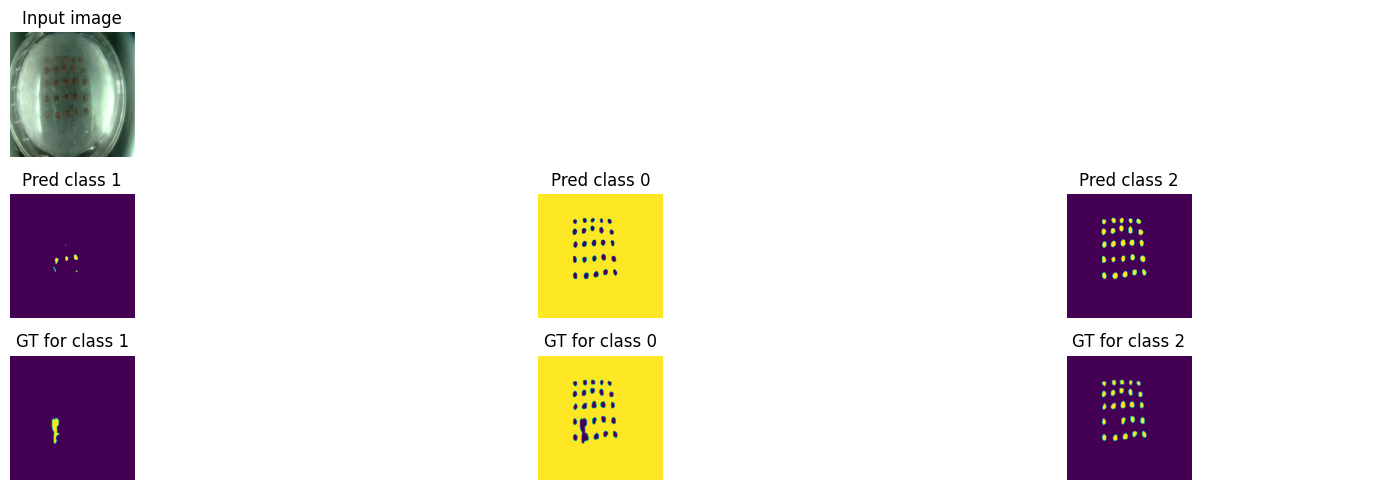

Train loss: 0.00179 | Time: 66m 41s | Val loss: 0.00145
Train_DICE_avg: 0.80240 | Train_Jaccard_avg: 0.73791 | Train_Sensitivity_avg: 0.94014 | Train_Specificity_avg: 0.92619 
Class 0 - Train_DICE: 0.99315 | Train_Jaccard: 0.98642 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.79688 
Class 1 - Train_DICE: 0.58632 | Train_Jaccard: 0.50978 | Train_Sensitivity: 0.88428 | Train_Specificity: 0.99133 
Class 2 - Train_DICE: 0.82773 | Train_Jaccard: 0.71754 | Train_Sensitivity: 0.93923 | Train_Specificity: 0.99036 
Val_DICE_avg: 0.83844 | Val_Jaccard_avg: 0.76775 | Val_Sensitivity_avg: 0.95587 | Val_Specificity_avg: 0.86920 
Class 0 - Val_DICE: 0.99231 | Val_Jaccard: 0.98478 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.62619 
Class 1 - Val_DICE: 0.75245 | Val_Jaccard: 0.67998 | Val_Sensitivity: 0.89247 | Val_Specificity: 0.99529 
Class 2 - Val_DICE: 0.77057 | Val_Jaccard: 0.63849 | Val_Sensitivity: 0.97572 | Val_Specificity: 0.98613 


wandb: uploading artifact best_model; uploading output.log; uploading config.yaml
wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▂▃▃▄▅▄▅▅▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇██████████████
wandb:       Training Jaccard ▁▂▃▃▃▄▅▄▅▅▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇██▇███████████
wandb:          Training Loss █▆▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▆▇▇▇█▄▃▂▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▄▅▅▅▅▅▅▅▅▅▆▅▆▅▅
wandb:   Training Specificity ▁▃▄▅▅▇▇▇▇▇▇▇▇█▇█████████████████████████
wandb:        Validation DICE ▁▁▂▃▄▃▅▅▆▅▆▆▇▆▇▇▇▆█▇▇▇▇▇██▇█▇███████████
wandb:     Validation Jaccard ▁▂▂▃▃▅▅▆▅▆▆▆▇▇▇▇▇▆█▇▇▇▇▇▇█▇█▇█▇█████████
wandb:        Validation Loss █▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▇▇█▇▁▆▅▃▅▄▇▇▇█▇▃▆▃▅▇▅▅▇▆▆▆▇▇▇▇▇▇▇▇▇▇▇▆▆▆
wandb: Validation Specificity ▁▄▅▄▅▆▆▆▇▇▇▇██▇▇█▇█▇▇██▇████▇███████████
wandb: 
wandb: Run summary:
wandb:          Training DIC


Training complete!


In [21]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [22]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [23]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]



Global Performance Metrics:
Loss mean: 0.00149, std: 0.00019
Dice Coefficient mean: 0.86977, std: 0.10080
Jaccard Index mean: 0.80897, std: 0.11695
Sensitivity mean: 0.93020, std: 0.07026
Specificity mean: 0.94132, std: 0.04066

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99588, std: 0.00218
Jaccard mean: 0.99180, std: 0.00431
Sensitivity mean: 0.99737, std: 0.00186
Specificity mean: 0.83305, std: 0.12178

Class 1:
Dice mean: 0.74619, std: 0.27908
Jaccard mean: 0.66223, std: 0.30247
Sensitivity mean: 0.88087, std: 0.19012
Specificity mean: 0.99589, std: 0.00624

Class 2:
Dice mean: 0.86725, std: 0.07514
Jaccard mean: 0.77288, std: 0.10792
Sensitivity mean: 0.91237, std: 0.08579
Specificity mean: 0.99502, std: 0.00324


### Tversky Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Backbone"] = "resnet34"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-ResNet34-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.38 GB
GPU Memory - Reserved: 1.31 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_194211-q3yolrz8
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-ResNet34-Tversky
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/q3yolrz8



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


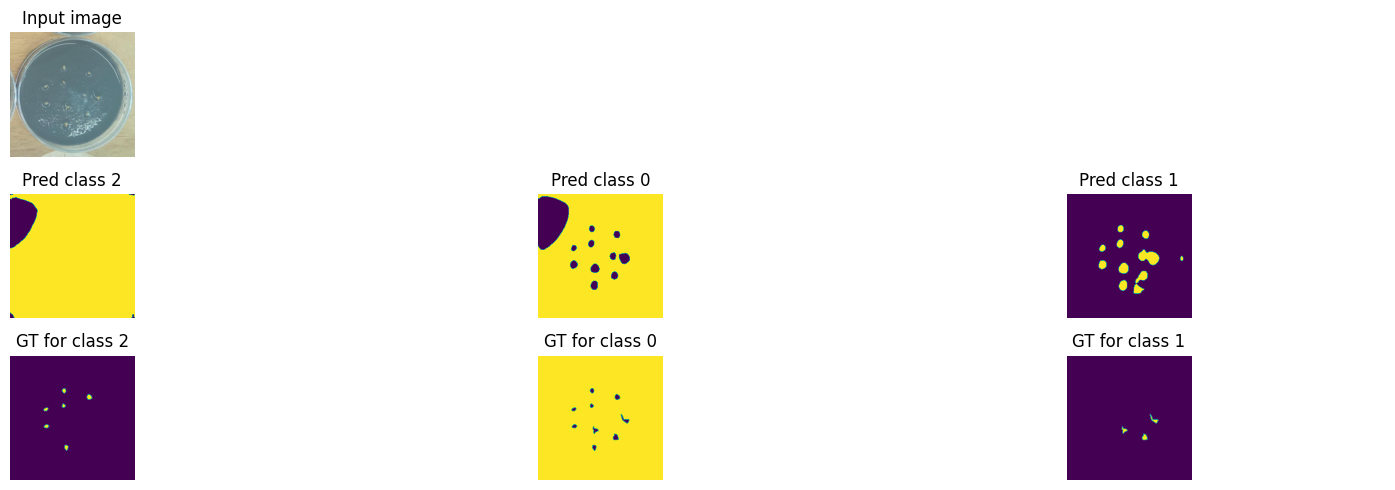

Train loss: 0.67968 | Time: 1m 0s | Val loss: 0.63025
Train_DICE_avg: 0.40694 | Train_Jaccard_avg: 0.35291 | Train_Sensitivity_avg: 0.39391 | Train_Specificity_avg: 0.79917 
Class 0 - Train_DICE: 0.93072 | Train_Jaccard: 0.87499 | Train_Sensitivity: 0.99359 | Train_Specificity: 0.40222 
Class 1 - Train_DICE: 0.09093 | Train_Jaccard: 0.05211 | Train_Sensitivity: 0.05613 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.19917 | Train_Jaccard: 0.13164 | Train_Sensitivity: 0.13201 | Train_Specificity: 0.99825 
Val_DICE_avg: 0.47733 | Val_Jaccard_avg: 0.43577 | Val_Sensitivity_avg: 0.45329 | Val_Specificity_avg: 0.83888 
Class 0 - Val_DICE: 0.97850 | Val_Jaccard: 0.95833 | Val_Sensitivity: 0.99696 | Val_Specificity: 0.51970 
Class 1 - Val_DICE: 0.12803 | Val_Jaccard: 0.07877 | Val_Sensitivity: 0.08308 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.32546 | Val_Jaccard: 0.27021 | Val_Sensitivity: 0.27982 | Val_Specificity: 0.99875 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.63929 | Time: 2m 1s | Val loss: 0.61992
Train_DICE_avg: 0.47038 | Train_Jaccard_avg: 0.42387 | Train_Sensitivity_avg: 0.44161 | Train_Specificity_avg: 0.86056 
Class 0 - Train_DICE: 0.97433 | Train_Jaccard: 0.95022 | Train_Sensitivity: 0.99556 | Train_Specificity: 0.58396 
Class 1 - Train_DICE: 0.13251 | Train_Jaccard: 0.07908 | Train_Sensitivity: 0.08160 | Train_Specificity: 0.99887 
Class 2 - Train_DICE: 0.30429 | Train_Jaccard: 0.24232 | Train_Sensitivity: 0.24768 | Train_Specificity: 0.99886 
Val_DICE_avg: 0.49244 | Val_Jaccard_avg: 0.45499 | Val_Sensitivity_avg: 0.46741 | Val_Specificity_avg: 0.87864 
Class 0 - Val_DICE: 0.98962 | Val_Jaccard: 0.97951 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.63860 
Class 1 - Val_DICE: 0.14880 | Val_Jaccard: 0.09413 | Val_Sensitivity: 0.09863 | Val_Specificity: 0.99875 
Class 2 - Val_DICE: 0.33891 | Val_Jaccard: 0.29131 | Val_Sensitivity: 0.30607 | Val_Specificity: 0.99856 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.61859 | Time: 3m 1s | Val loss: 0.61150
Train_DICE_avg: 0.48475 | Train_Jaccard_avg: 0.44084 | Train_Sensitivity_avg: 0.45621 | Train_Specificity_avg: 0.88213 
Class 0 - Train_DICE: 0.98036 | Train_Jaccard: 0.96165 | Train_Sensitivity: 0.99564 | Train_Specificity: 0.64857 
Class 1 - Train_DICE: 0.14540 | Train_Jaccard: 0.08806 | Train_Sensitivity: 0.09008 | Train_Specificity: 0.99926 
Class 2 - Train_DICE: 0.32850 | Train_Jaccard: 0.27281 | Train_Sensitivity: 0.28290 | Train_Specificity: 0.99857 
Val_DICE_avg: 0.49000 | Val_Jaccard_avg: 0.45113 | Val_Sensitivity_avg: 0.45953 | Val_Specificity_avg: 0.87685 
Class 0 - Val_DICE: 0.98868 | Val_Jaccard: 0.97769 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.63138 
Class 1 - Val_DICE: 0.15217 | Val_Jaccard: 0.09620 | Val_Sensitivity: 0.09755 | Val_Specificity: 0.99951 
Class 2 - Val_DICE: 0.32915 | Val_Jaccard: 0.27952 | Val_Sensitivity: 0.28281 | Val_Specificity: 0.99966 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.60200 | Time: 4m 2s | Val loss: 0.58564
Train_DICE_avg: 0.49348 | Train_Jaccard_avg: 0.45007 | Train_Sensitivity_avg: 0.46553 | Train_Specificity_avg: 0.89242 
Class 0 - Train_DICE: 0.98281 | Train_Jaccard: 0.96634 | Train_Sensitivity: 0.99550 | Train_Specificity: 0.67985 
Class 1 - Train_DICE: 0.15738 | Train_Jaccard: 0.09728 | Train_Sensitivity: 0.09982 | Train_Specificity: 0.99927 
Class 2 - Train_DICE: 0.34025 | Train_Jaccard: 0.28658 | Train_Sensitivity: 0.30127 | Train_Specificity: 0.99816 
Val_DICE_avg: 0.50384 | Val_Jaccard_avg: 0.46590 | Val_Sensitivity_avg: 0.48652 | Val_Specificity_avg: 0.88525 
Class 0 - Val_DICE: 0.99103 | Val_Jaccard: 0.98226 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.65998 
Class 1 - Val_DICE: 0.15221 | Val_Jaccard: 0.09993 | Val_Sensitivity: 0.10405 | Val_Specificity: 0.99907 
Class 2 - Val_DICE: 0.36829 | Val_Jaccard: 0.31552 | Val_Sensitivity: 0.35742 | Val_Specificity: 0.99671 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.58660 | Time: 5m 2s | Val loss: 0.57248
Train_DICE_avg: 0.50385 | Train_Jaccard_avg: 0.45976 | Train_Sensitivity_avg: 0.47579 | Train_Specificity_avg: 0.90202 
Class 0 - Train_DICE: 0.98501 | Train_Jaccard: 0.97056 | Train_Sensitivity: 0.99510 | Train_Specificity: 0.70873 
Class 1 - Train_DICE: 0.17216 | Train_Jaccard: 0.10869 | Train_Sensitivity: 0.11291 | Train_Specificity: 0.99912 
Class 2 - Train_DICE: 0.35439 | Train_Jaccard: 0.30002 | Train_Sensitivity: 0.31936 | Train_Specificity: 0.99821 
Val_DICE_avg: 0.51140 | Val_Jaccard_avg: 0.47301 | Val_Sensitivity_avg: 0.48680 | Val_Specificity_avg: 0.88221 
Class 0 - Val_DICE: 0.99029 | Val_Jaccard: 0.98082 | Val_Sensitivity: 0.99849 | Val_Specificity: 0.64908 
Class 1 - Val_DICE: 0.17992 | Val_Jaccard: 0.12236 | Val_Sensitivity: 0.12898 | Val_Specificity: 0.99901 
Class 2 - Val_DICE: 0.36398 | Val_Jaccard: 0.31586 | Val_Sensitivity: 0.33291 | Val_Specificity: 0.99855 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


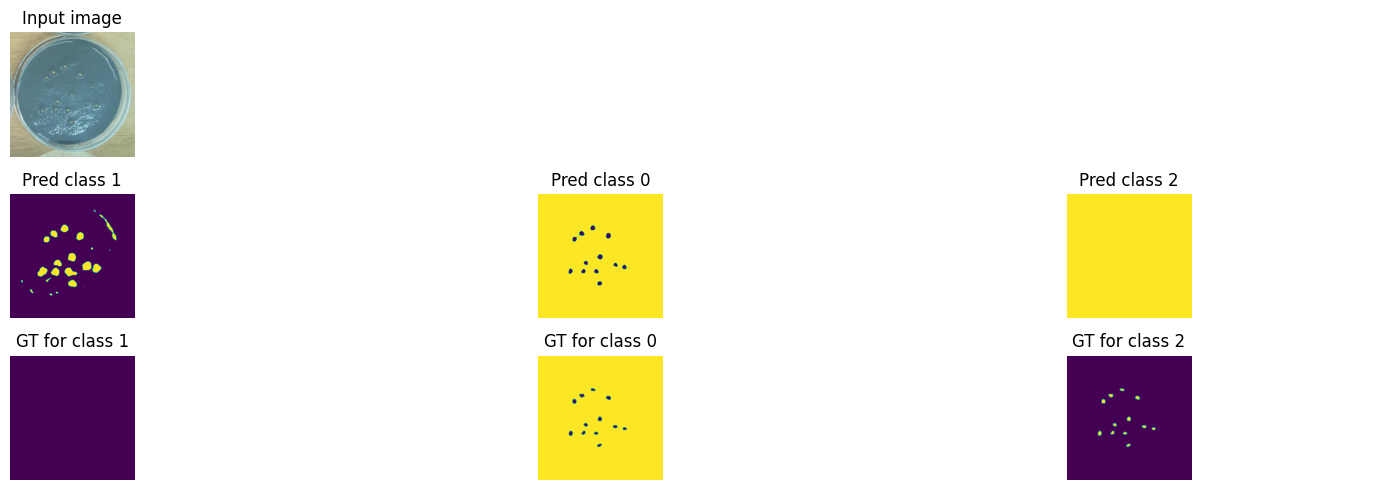

Train loss: 0.57028 | Time: 6m 4s | Val loss: 0.56061
Train_DICE_avg: 0.52242 | Train_Jaccard_avg: 0.47575 | Train_Sensitivity_avg: 0.49453 | Train_Specificity_avg: 0.90850 
Class 0 - Train_DICE: 0.98611 | Train_Jaccard: 0.97270 | Train_Sensitivity: 0.99443 | Train_Specificity: 0.72886 
Class 1 - Train_DICE: 0.20893 | Train_Jaccard: 0.13764 | Train_Sensitivity: 0.14815 | Train_Specificity: 0.99877 
Class 2 - Train_DICE: 0.37221 | Train_Jaccard: 0.31689 | Train_Sensitivity: 0.34102 | Train_Specificity: 0.99786 
Val_DICE_avg: 0.52517 | Val_Jaccard_avg: 0.48743 | Val_Sensitivity_avg: 0.50507 | Val_Specificity_avg: 0.91347 
Class 0 - Val_DICE: 0.99341 | Val_Jaccard: 0.98694 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.74386 
Class 1 - Val_DICE: 0.20768 | Val_Jaccard: 0.14552 | Val_Sensitivity: 0.16588 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.37442 | Val_Jaccard: 0.32984 | Val_Sensitivity: 0.35192 | Val_Specificity: 0.99829 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.55373 | Time: 7m 4s | Val loss: 0.54482
Train_DICE_avg: 0.54036 | Train_Jaccard_avg: 0.49211 | Train_Sensitivity_avg: 0.51469 | Train_Specificity_avg: 0.91448 
Class 0 - Train_DICE: 0.98714 | Train_Jaccard: 0.97470 | Train_Sensitivity: 0.99410 | Train_Specificity: 0.74743 
Class 1 - Train_DICE: 0.24221 | Train_Jaccard: 0.16704 | Train_Sensitivity: 0.18759 | Train_Specificity: 0.99836 
Class 2 - Train_DICE: 0.39173 | Train_Jaccard: 0.33460 | Train_Sensitivity: 0.36239 | Train_Specificity: 0.99766 
Val_DICE_avg: 0.53814 | Val_Jaccard_avg: 0.49751 | Val_Sensitivity_avg: 0.51746 | Val_Specificity_avg: 0.89857 
Class 0 - Val_DICE: 0.99147 | Val_Jaccard: 0.98313 | Val_Sensitivity: 0.99831 | Val_Specificity: 0.69846 
Class 1 - Val_DICE: 0.20540 | Val_Jaccard: 0.14472 | Val_Sensitivity: 0.17553 | Val_Specificity: 0.99837 
Class 2 - Val_DICE: 0.41757 | Val_Jaccard: 0.36468 | Val_Sensitivity: 0.37853 | Val_Specificity: 0.99888 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.53572 | Time: 8m 5s | Val loss: 0.51958
Train_DICE_avg: 0.55664 | Train_Jaccard_avg: 0.50736 | Train_Sensitivity_avg: 0.53378 | Train_Specificity_avg: 0.92261 
Class 0 - Train_DICE: 0.98805 | Train_Jaccard: 0.97645 | Train_Sensitivity: 0.99292 | Train_Specificity: 0.77228 
Class 1 - Train_DICE: 0.26278 | Train_Jaccard: 0.18623 | Train_Sensitivity: 0.21672 | Train_Specificity: 0.99811 
Class 2 - Train_DICE: 0.41909 | Train_Jaccard: 0.35941 | Train_Sensitivity: 0.39170 | Train_Specificity: 0.99744 
Val_DICE_avg: 0.55946 | Val_Jaccard_avg: 0.51909 | Val_Sensitivity_avg: 0.54379 | Val_Specificity_avg: 0.90416 
Class 0 - Val_DICE: 0.99306 | Val_Jaccard: 0.98624 | Val_Sensitivity: 0.99787 | Val_Specificity: 0.71669 
Class 1 - Val_DICE: 0.24059 | Val_Jaccard: 0.17774 | Val_Sensitivity: 0.21719 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.44472 | Val_Jaccard: 0.39329 | Val_Sensitivity: 0.41633 | Val_Specificity: 0.99837 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.51621 | Time: 9m 6s | Val loss: 0.50529
Train_DICE_avg: 0.57156 | Train_Jaccard_avg: 0.52180 | Train_Sensitivity_avg: 0.55240 | Train_Specificity_avg: 0.92791 
Class 0 - Train_DICE: 0.98878 | Train_Jaccard: 0.97787 | Train_Sensitivity: 0.99228 | Train_Specificity: 0.78874 
Class 1 - Train_DICE: 0.28714 | Train_Jaccard: 0.20985 | Train_Sensitivity: 0.24943 | Train_Specificity: 0.99794 
Class 2 - Train_DICE: 0.43878 | Train_Jaccard: 0.37767 | Train_Sensitivity: 0.41550 | Train_Specificity: 0.99706 
Val_DICE_avg: 0.56219 | Val_Jaccard_avg: 0.52012 | Val_Sensitivity_avg: 0.55104 | Val_Specificity_avg: 0.90402 
Class 0 - Val_DICE: 0.99300 | Val_Jaccard: 0.98614 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.71702 
Class 1 - Val_DICE: 0.24990 | Val_Jaccard: 0.18643 | Val_Sensitivity: 0.21319 | Val_Specificity: 0.99829 
Class 2 - Val_DICE: 0.44365 | Val_Jaccard: 0.38779 | Val_Sensitivity: 0.44210 | Val_Specificity: 0.99676 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.49814 | Time: 10m 6s | Val loss: 0.50508
Train_DICE_avg: 0.59562 | Train_Jaccard_avg: 0.54192 | Train_Sensitivity_avg: 0.57804 | Train_Specificity_avg: 0.93049 
Class 0 - Train_DICE: 0.98904 | Train_Jaccard: 0.97840 | Train_Sensitivity: 0.99182 | Train_Specificity: 0.79687 
Class 1 - Train_DICE: 0.30488 | Train_Jaccard: 0.22635 | Train_Sensitivity: 0.27923 | Train_Specificity: 0.99761 
Class 2 - Train_DICE: 0.49293 | Train_Jaccard: 0.42102 | Train_Sensitivity: 0.46305 | Train_Specificity: 0.99698 
Val_DICE_avg: 0.59620 | Val_Jaccard_avg: 0.54780 | Val_Sensitivity_avg: 0.59371 | Val_Specificity_avg: 0.91896 
Class 0 - Val_DICE: 0.99433 | Val_Jaccard: 0.98874 | Val_Sensitivity: 0.99692 | Val_Specificity: 0.76283 
Class 1 - Val_DICE: 0.28140 | Val_Jaccard: 0.21389 | Val_Sensitivity: 0.30473 | Val_Specificity: 0.99664 
Class 2 - Val_DICE: 0.51289 | Val_Jaccard: 0.44077 | Val_Sensitivity: 0.47948 | Val_Specificity: 0.99740 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


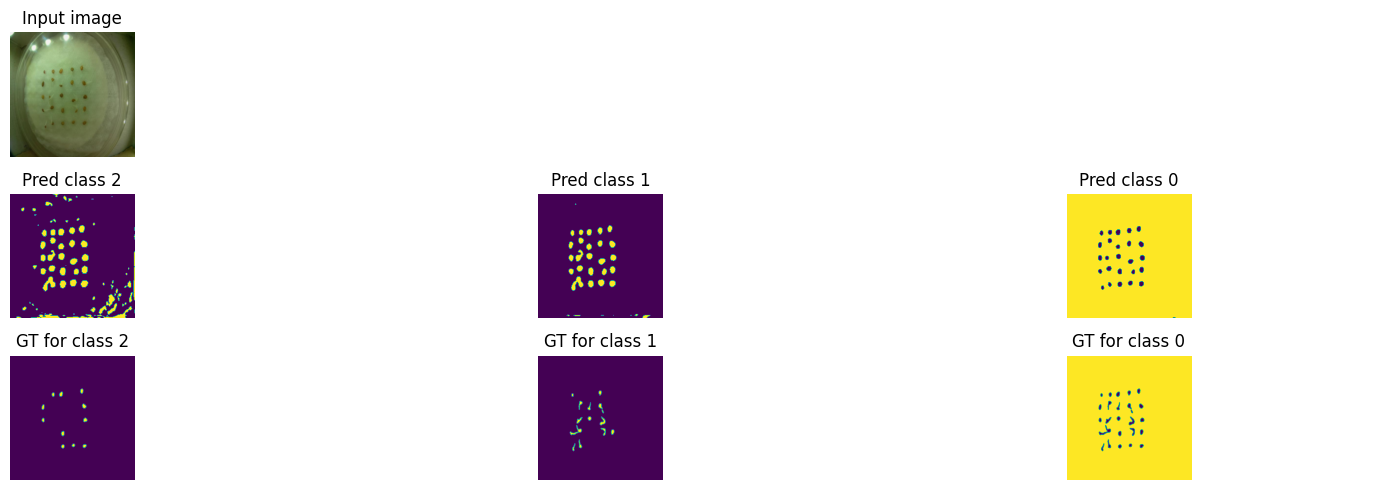

Train loss: 0.47932 | Time: 11m 11s | Val loss: 0.47220
Train_DICE_avg: 0.62382 | Train_Jaccard_avg: 0.56549 | Train_Sensitivity_avg: 0.60507 | Train_Specificity_avg: 0.93468 
Class 0 - Train_DICE: 0.98961 | Train_Jaccard: 0.97950 | Train_Sensitivity: 0.99163 | Train_Specificity: 0.80964 
Class 1 - Train_DICE: 0.32454 | Train_Jaccard: 0.24495 | Train_Sensitivity: 0.30594 | Train_Specificity: 0.99756 
Class 2 - Train_DICE: 0.55733 | Train_Jaccard: 0.47201 | Train_Sensitivity: 0.51763 | Train_Specificity: 0.99682 
Val_DICE_avg: 0.62000 | Val_Jaccard_avg: 0.56968 | Val_Sensitivity_avg: 0.60789 | Val_Specificity_avg: 0.92039 
Class 0 - Val_DICE: 0.99438 | Val_Jaccard: 0.98884 | Val_Sensitivity: 0.99695 | Val_Specificity: 0.76701 
Class 1 - Val_DICE: 0.30217 | Val_Jaccard: 0.23276 | Val_Sensitivity: 0.28975 | Val_Specificity: 0.99737 
Class 2 - Val_DICE: 0.56345 | Val_Jaccard: 0.48744 | Val_Sensitivity: 0.53697 | Val_Specificity: 0.99680 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.46165 | Time: 12m 17s | Val loss: 0.47362
Train_DICE_avg: 0.63771 | Train_Jaccard_avg: 0.57728 | Train_Sensitivity_avg: 0.62164 | Train_Specificity_avg: 0.93828 
Class 0 - Train_DICE: 0.98989 | Train_Jaccard: 0.98005 | Train_Sensitivity: 0.99129 | Train_Specificity: 0.82087 
Class 1 - Train_DICE: 0.33086 | Train_Jaccard: 0.25104 | Train_Sensitivity: 0.32022 | Train_Specificity: 0.99739 
Class 2 - Train_DICE: 0.59238 | Train_Jaccard: 0.50074 | Train_Sensitivity: 0.55341 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.62253 | Val_Jaccard_avg: 0.57222 | Val_Sensitivity_avg: 0.60756 | Val_Specificity_avg: 0.92092 
Class 0 - Val_DICE: 0.99450 | Val_Jaccard: 0.98909 | Val_Sensitivity: 0.99703 | Val_Specificity: 0.76834 
Class 1 - Val_DICE: 0.29501 | Val_Jaccard: 0.23141 | Val_Sensitivity: 0.27718 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.57806 | Val_Jaccard: 0.49616 | Val_Sensitivity: 0.54847 | Val_Specificity: 0.99680 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.44308 | Time: 13m 24s | Val loss: 0.45946
Train_DICE_avg: 0.65267 | Train_Jaccard_avg: 0.59085 | Train_Sensitivity_avg: 0.63952 | Train_Specificity_avg: 0.94126 
Class 0 - Train_DICE: 0.99022 | Train_Jaccard: 0.98069 | Train_Sensitivity: 0.99080 | Train_Specificity: 0.83007 
Class 1 - Train_DICE: 0.33452 | Train_Jaccard: 0.25768 | Train_Sensitivity: 0.33480 | Train_Specificity: 0.99739 
Class 2 - Train_DICE: 0.63328 | Train_Jaccard: 0.53418 | Train_Sensitivity: 0.59295 | Train_Specificity: 0.99631 
Val_DICE_avg: 0.64322 | Val_Jaccard_avg: 0.58840 | Val_Sensitivity_avg: 0.62591 | Val_Specificity_avg: 0.92446 
Class 0 - Val_DICE: 0.99476 | Val_Jaccard: 0.98959 | Val_Sensitivity: 0.99728 | Val_Specificity: 0.77897 
Class 1 - Val_DICE: 0.28318 | Val_Jaccard: 0.22251 | Val_Sensitivity: 0.27781 | Val_Specificity: 0.99764 
Class 2 - Val_DICE: 0.65173 | Val_Jaccard: 0.55309 | Val_Sensitivity: 0.60264 | Val_Specificity: 0.99677 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.43193 | Time: 14m 30s | Val loss: 0.45478
Train_DICE_avg: 0.66609 | Train_Jaccard_avg: 0.60216 | Train_Sensitivity_avg: 0.65407 | Train_Specificity_avg: 0.94238 
Class 0 - Train_DICE: 0.99028 | Train_Jaccard: 0.98082 | Train_Sensitivity: 0.99091 | Train_Specificity: 0.83368 
Class 1 - Train_DICE: 0.34653 | Train_Jaccard: 0.26848 | Train_Sensitivity: 0.35346 | Train_Specificity: 0.99724 
Class 2 - Train_DICE: 0.66144 | Train_Jaccard: 0.55718 | Train_Sensitivity: 0.61785 | Train_Specificity: 0.99621 
Val_DICE_avg: 0.64926 | Val_Jaccard_avg: 0.59416 | Val_Sensitivity_avg: 0.63373 | Val_Specificity_avg: 0.91150 
Class 0 - Val_DICE: 0.99388 | Val_Jaccard: 0.98785 | Val_Sensitivity: 0.99737 | Val_Specificity: 0.73974 
Class 1 - Val_DICE: 0.30442 | Val_Jaccard: 0.24025 | Val_Sensitivity: 0.30705 | Val_Specificity: 0.99750 
Class 2 - Val_DICE: 0.64949 | Val_Jaccard: 0.55439 | Val_Sensitivity: 0.59679 | Val_Specificity: 0.99727 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.41898 | Time: 15m 36s | Val loss: 0.44209
Train_DICE_avg: 0.67754 | Train_Jaccard_avg: 0.61263 | Train_Sensitivity_avg: 0.66765 | Train_Specificity_avg: 0.94344 
Class 0 - Train_DICE: 0.99064 | Train_Jaccard: 0.98152 | Train_Sensitivity: 0.99115 | Train_Specificity: 0.83719 
Class 1 - Train_DICE: 0.35235 | Train_Jaccard: 0.27320 | Train_Sensitivity: 0.36200 | Train_Specificity: 0.99718 
Class 2 - Train_DICE: 0.68964 | Train_Jaccard: 0.58316 | Train_Sensitivity: 0.64978 | Train_Specificity: 0.99594 
Val_DICE_avg: 0.67874 | Val_Jaccard_avg: 0.61771 | Val_Sensitivity_avg: 0.65739 | Val_Specificity_avg: 0.92202 
Class 0 - Val_DICE: 0.99467 | Val_Jaccard: 0.98942 | Val_Sensitivity: 0.99717 | Val_Specificity: 0.77163 
Class 1 - Val_DICE: 0.33243 | Val_Jaccard: 0.26519 | Val_Sensitivity: 0.32287 | Val_Specificity: 0.99771 
Class 2 - Val_DICE: 0.70911 | Val_Jaccard: 0.59852 | Val_Sensitivity: 0.65213 | Val_Specificity: 0.99671 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


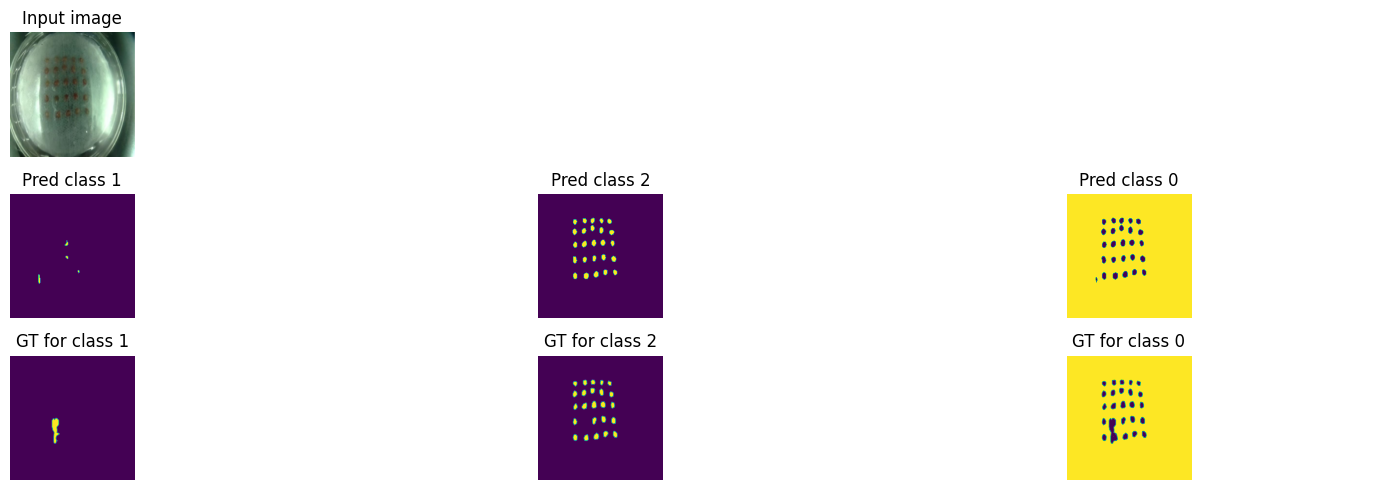

Train loss: 0.40443 | Time: 16m 42s | Val loss: 0.42214
Train_DICE_avg: 0.68636 | Train_Jaccard_avg: 0.62189 | Train_Sensitivity_avg: 0.68059 | Train_Specificity_avg: 0.94468 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98136 | Train_Sensitivity: 0.99098 | Train_Specificity: 0.84109 
Class 1 - Train_DICE: 0.35583 | Train_Jaccard: 0.27635 | Train_Sensitivity: 0.37101 | Train_Specificity: 0.99715 
Class 2 - Train_DICE: 0.71269 | Train_Jaccard: 0.60797 | Train_Sensitivity: 0.67977 | Train_Specificity: 0.99580 
Val_DICE_avg: 0.68128 | Val_Jaccard_avg: 0.62320 | Val_Sensitivity_avg: 0.67069 | Val_Specificity_avg: 0.92473 
Class 0 - Val_DICE: 0.99476 | Val_Jaccard: 0.98959 | Val_Sensitivity: 0.99653 | Val_Specificity: 0.78073 
Class 1 - Val_DICE: 0.33174 | Val_Jaccard: 0.26727 | Val_Sensitivity: 0.32736 | Val_Specificity: 0.99760 
Class 2 - Val_DICE: 0.71734 | Val_Jaccard: 0.61273 | Val_Sensitivity: 0.68819 | Val_Specificity: 0.99586 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]


Train loss: 0.39095 | Time: 17m 48s | Val loss: 0.40882
Train_DICE_avg: 0.69221 | Train_Jaccard_avg: 0.62725 | Train_Sensitivity_avg: 0.69037 | Train_Specificity_avg: 0.94751 
Class 0 - Train_DICE: 0.99082 | Train_Jaccard: 0.98186 | Train_Sensitivity: 0.99085 | Train_Specificity: 0.84981 
Class 1 - Train_DICE: 0.36411 | Train_Jaccard: 0.28356 | Train_Sensitivity: 0.38467 | Train_Specificity: 0.99716 
Class 2 - Train_DICE: 0.72170 | Train_Jaccard: 0.61634 | Train_Sensitivity: 0.69558 | Train_Specificity: 0.99556 
Val_DICE_avg: 0.69466 | Val_Jaccard_avg: 0.63429 | Val_Sensitivity_avg: 0.68783 | Val_Specificity_avg: 0.92735 
Class 0 - Val_DICE: 0.99494 | Val_Jaccard: 0.98995 | Val_Sensitivity: 0.99681 | Val_Specificity: 0.78822 
Class 1 - Val_DICE: 0.33307 | Val_Jaccard: 0.26426 | Val_Sensitivity: 0.36739 | Val_Specificity: 0.99681 
Class 2 - Val_DICE: 0.75598 | Val_Jaccard: 0.64867 | Val_Sensitivity: 0.69927 | Val_Specificity: 0.99702 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.38014 | Time: 18m 54s | Val loss: 0.41380
Train_DICE_avg: 0.70105 | Train_Jaccard_avg: 0.63610 | Train_Sensitivity_avg: 0.70183 | Train_Specificity_avg: 0.94661 
Class 0 - Train_DICE: 0.99084 | Train_Jaccard: 0.98190 | Train_Sensitivity: 0.99124 | Train_Specificity: 0.84729 
Class 1 - Train_DICE: 0.37409 | Train_Jaccard: 0.29349 | Train_Sensitivity: 0.39930 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.73822 | Train_Jaccard: 0.63290 | Train_Sensitivity: 0.71494 | Train_Specificity: 0.99547 
Val_DICE_avg: 0.70992 | Val_Jaccard_avg: 0.65138 | Val_Sensitivity_avg: 0.69812 | Val_Specificity_avg: 0.93471 
Class 0 - Val_DICE: 0.99546 | Val_Jaccard: 0.99098 | Val_Sensitivity: 0.99720 | Val_Specificity: 0.80975 
Class 1 - Val_DICE: 0.35339 | Val_Jaccard: 0.28793 | Val_Sensitivity: 0.36802 | Val_Specificity: 0.99750 
Class 2 - Val_DICE: 0.78090 | Val_Jaccard: 0.67523 | Val_Sensitivity: 0.72913 | Val_Specificity: 0.99688 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.36622 | Time: 20m 0s | Val loss: 0.37286
Train_DICE_avg: 0.71222 | Train_Jaccard_avg: 0.64911 | Train_Sensitivity_avg: 0.71731 | Train_Specificity_avg: 0.94758 
Class 0 - Train_DICE: 0.99102 | Train_Jaccard: 0.98225 | Train_Sensitivity: 0.99144 | Train_Specificity: 0.85029 
Class 1 - Train_DICE: 0.38046 | Train_Jaccard: 0.29999 | Train_Sensitivity: 0.40949 | Train_Specificity: 0.99712 
Class 2 - Train_DICE: 0.76518 | Train_Jaccard: 0.66510 | Train_Sensitivity: 0.75099 | Train_Specificity: 0.99534 
Val_DICE_avg: 0.71925 | Val_Jaccard_avg: 0.66210 | Val_Sensitivity_avg: 0.72755 | Val_Specificity_avg: 0.94028 
Class 0 - Val_DICE: 0.99567 | Val_Jaccard: 0.99140 | Val_Sensitivity: 0.99628 | Val_Specificity: 0.82838 
Class 1 - Val_DICE: 0.36070 | Val_Jaccard: 0.29119 | Val_Sensitivity: 0.39393 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.80137 | Val_Jaccard: 0.70371 | Val_Sensitivity: 0.79245 | Val_Specificity: 0.99545 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.35302 | Time: 21m 5s | Val loss: 0.37337
Train_DICE_avg: 0.71785 | Train_Jaccard_avg: 0.65465 | Train_Sensitivity_avg: 0.72672 | Train_Specificity_avg: 0.94806 
Class 0 - Train_DICE: 0.99092 | Train_Jaccard: 0.98207 | Train_Sensitivity: 0.99146 | Train_Specificity: 0.85203 
Class 1 - Train_DICE: 0.38565 | Train_Jaccard: 0.30307 | Train_Sensitivity: 0.41842 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.77698 | Train_Jaccard: 0.67882 | Train_Sensitivity: 0.77030 | Train_Specificity: 0.99513 
Val_DICE_avg: 0.71679 | Val_Jaccard_avg: 0.66022 | Val_Sensitivity_avg: 0.71114 | Val_Specificity_avg: 0.93564 
Class 0 - Val_DICE: 0.99550 | Val_Jaccard: 0.99106 | Val_Sensitivity: 0.99738 | Val_Specificity: 0.81343 
Class 1 - Val_DICE: 0.35041 | Val_Jaccard: 0.28162 | Val_Sensitivity: 0.34705 | Val_Specificity: 0.99776 
Class 2 - Val_DICE: 0.80445 | Val_Jaccard: 0.70798 | Val_Sensitivity: 0.78900 | Val_Specificity: 0.99574 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


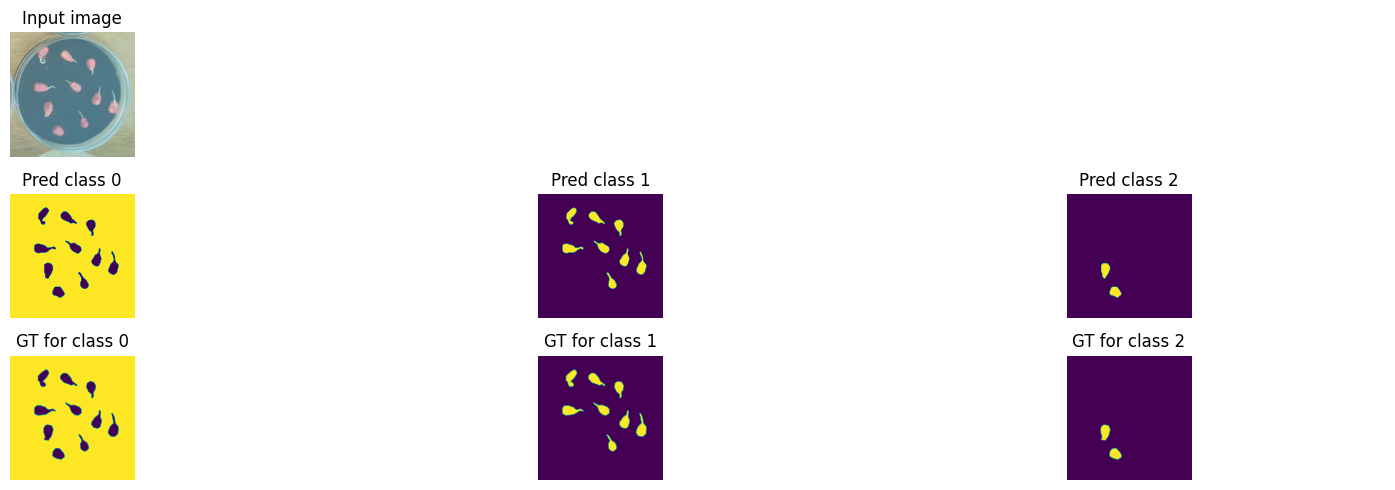

Train loss: 0.34277 | Time: 22m 12s | Val loss: 0.35898
Train_DICE_avg: 0.72249 | Train_Jaccard_avg: 0.65929 | Train_Sensitivity_avg: 0.73446 | Train_Specificity_avg: 0.94806 
Class 0 - Train_DICE: 0.99082 | Train_Jaccard: 0.98188 | Train_Sensitivity: 0.99182 | Train_Specificity: 0.85217 
Class 1 - Train_DICE: 0.38382 | Train_Jaccard: 0.30143 | Train_Sensitivity: 0.41905 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.79284 | Train_Jaccard: 0.69456 | Train_Sensitivity: 0.79251 | Train_Specificity: 0.99498 
Val_DICE_avg: 0.71207 | Val_Jaccard_avg: 0.65894 | Val_Sensitivity_avg: 0.72381 | Val_Specificity_avg: 0.93370 
Class 0 - Val_DICE: 0.99475 | Val_Jaccard: 0.98961 | Val_Sensitivity: 0.99669 | Val_Specificity: 0.80878 
Class 1 - Val_DICE: 0.36070 | Val_Jaccard: 0.29308 | Val_Sensitivity: 0.38095 | Val_Specificity: 0.99722 
Class 2 - Val_DICE: 0.78075 | Val_Jaccard: 0.69413 | Val_Sensitivity: 0.79378 | Val_Specificity: 0.99511 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.32876 | Time: 23m 19s | Val loss: 0.33658
Train_DICE_avg: 0.72763 | Train_Jaccard_avg: 0.66461 | Train_Sensitivity_avg: 0.74318 | Train_Specificity_avg: 0.95199 
Class 0 - Train_DICE: 0.99100 | Train_Jaccard: 0.98224 | Train_Sensitivity: 0.99132 | Train_Specificity: 0.86423 
Class 1 - Train_DICE: 0.38995 | Train_Jaccard: 0.30802 | Train_Sensitivity: 0.42913 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.80193 | Train_Jaccard: 0.70356 | Train_Sensitivity: 0.80908 | Train_Specificity: 0.99473 
Val_DICE_avg: 0.72606 | Val_Jaccard_avg: 0.66957 | Val_Sensitivity_avg: 0.74154 | Val_Specificity_avg: 0.94960 
Class 0 - Val_DICE: 0.99604 | Val_Jaccard: 0.99214 | Val_Sensitivity: 0.99629 | Val_Specificity: 0.85670 
Class 1 - Val_DICE: 0.35707 | Val_Jaccard: 0.28653 | Val_Sensitivity: 0.39332 | Val_Specificity: 0.99709 
Class 2 - Val_DICE: 0.82506 | Val_Jaccard: 0.73004 | Val_Sensitivity: 0.83502 | Val_Specificity: 0.99500 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.31861 | Time: 24m 25s | Val loss: 0.32716
Train_DICE_avg: 0.73165 | Train_Jaccard_avg: 0.66779 | Train_Sensitivity_avg: 0.75046 | Train_Specificity_avg: 0.95281 
Class 0 - Train_DICE: 0.99132 | Train_Jaccard: 0.98286 | Train_Sensitivity: 0.99133 | Train_Specificity: 0.86699 
Class 1 - Train_DICE: 0.39620 | Train_Jaccard: 0.31316 | Train_Sensitivity: 0.44165 | Train_Specificity: 0.99690 
Class 2 - Train_DICE: 0.80744 | Train_Jaccard: 0.70734 | Train_Sensitivity: 0.81839 | Train_Specificity: 0.99455 
Val_DICE_avg: 0.73341 | Val_Jaccard_avg: 0.67766 | Val_Sensitivity_avg: 0.74335 | Val_Specificity_avg: 0.94388 
Class 0 - Val_DICE: 0.99581 | Val_Jaccard: 0.99168 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.83876 
Class 1 - Val_DICE: 0.37329 | Val_Jaccard: 0.30397 | Val_Sensitivity: 0.39168 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.83113 | Val_Jaccard: 0.73732 | Val_Sensitivity: 0.84131 | Val_Specificity: 0.99542 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.31069 | Time: 25m 31s | Val loss: 0.31537
Train_DICE_avg: 0.73709 | Train_Jaccard_avg: 0.67293 | Train_Sensitivity_avg: 0.75769 | Train_Specificity_avg: 0.95286 
Class 0 - Train_DICE: 0.99134 | Train_Jaccard: 0.98289 | Train_Sensitivity: 0.99145 | Train_Specificity: 0.86721 
Class 1 - Train_DICE: 0.40205 | Train_Jaccard: 0.31919 | Train_Sensitivity: 0.45024 | Train_Specificity: 0.99688 
Class 2 - Train_DICE: 0.81789 | Train_Jaccard: 0.71671 | Train_Sensitivity: 0.83137 | Train_Specificity: 0.99448 
Val_DICE_avg: 0.73952 | Val_Jaccard_avg: 0.68512 | Val_Sensitivity_avg: 0.74904 | Val_Specificity_avg: 0.94501 
Class 0 - Val_DICE: 0.99571 | Val_Jaccard: 0.99147 | Val_Sensitivity: 0.99751 | Val_Specificity: 0.84191 
Class 1 - Val_DICE: 0.36075 | Val_Jaccard: 0.29131 | Val_Sensitivity: 0.37725 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.86209 | Val_Jaccard: 0.77259 | Val_Sensitivity: 0.87235 | Val_Specificity: 0.99565 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.29350 | Time: 26m 38s | Val loss: 0.29461
Train_DICE_avg: 0.75262 | Train_Jaccard_avg: 0.68836 | Train_Sensitivity_avg: 0.77813 | Train_Specificity_avg: 0.95606 
Class 0 - Train_DICE: 0.99127 | Train_Jaccard: 0.98276 | Train_Sensitivity: 0.99111 | Train_Specificity: 0.87679 
Class 1 - Train_DICE: 0.41853 | Train_Jaccard: 0.33515 | Train_Sensitivity: 0.46936 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.84807 | Train_Jaccard: 0.74716 | Train_Sensitivity: 0.87391 | Train_Specificity: 0.99447 
Val_DICE_avg: 0.75181 | Val_Jaccard_avg: 0.69736 | Val_Sensitivity_avg: 0.77919 | Val_Specificity_avg: 0.96052 
Class 0 - Val_DICE: 0.99635 | Val_Jaccard: 0.99274 | Val_Sensitivity: 0.99654 | Val_Specificity: 0.88968 
Class 1 - Val_DICE: 0.38863 | Val_Jaccard: 0.31877 | Val_Sensitivity: 0.42312 | Val_Specificity: 0.99706 
Class 2 - Val_DICE: 0.87045 | Val_Jaccard: 0.78057 | Val_Sensitivity: 0.91790 | Val_Specificity: 0.99481 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


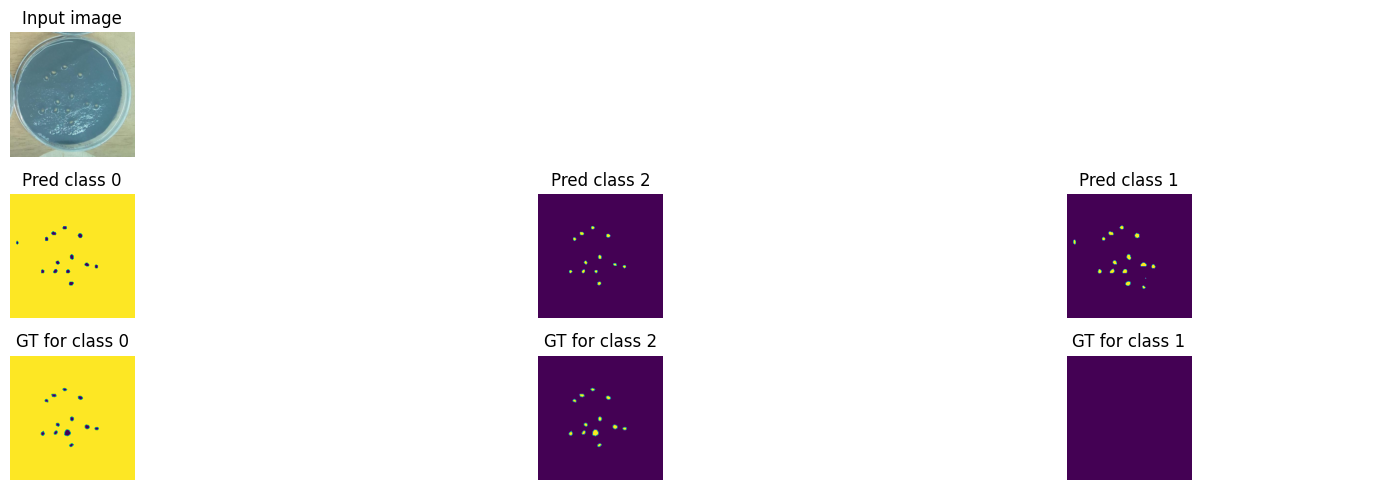

Train loss: 0.28360 | Time: 27m 45s | Val loss: 0.28874
Train_DICE_avg: 0.75246 | Train_Jaccard_avg: 0.68835 | Train_Sensitivity_avg: 0.78160 | Train_Specificity_avg: 0.95750 
Class 0 - Train_DICE: 0.99152 | Train_Jaccard: 0.98326 | Train_Sensitivity: 0.99125 | Train_Specificity: 0.88125 
Class 1 - Train_DICE: 0.41452 | Train_Jaccard: 0.33108 | Train_Sensitivity: 0.46688 | Train_Specificity: 0.99691 
Class 2 - Train_DICE: 0.85132 | Train_Jaccard: 0.75072 | Train_Sensitivity: 0.88667 | Train_Specificity: 0.99433 
Val_DICE_avg: 0.75433 | Val_Jaccard_avg: 0.70088 | Val_Sensitivity_avg: 0.78136 | Val_Specificity_avg: 0.94876 
Class 0 - Val_DICE: 0.99587 | Val_Jaccard: 0.99180 | Val_Sensitivity: 0.99718 | Val_Specificity: 0.85341 
Class 1 - Val_DICE: 0.38820 | Val_Jaccard: 0.31737 | Val_Sensitivity: 0.44485 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.87892 | Val_Jaccard: 0.79347 | Val_Sensitivity: 0.90206 | Val_Specificity: 0.99587 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Train loss: 0.27780 | Time: 28m 51s | Val loss: 0.27862
Train_DICE_avg: 0.75062 | Train_Jaccard_avg: 0.68567 | Train_Sensitivity_avg: 0.78339 | Train_Specificity_avg: 0.95689 
Class 0 - Train_DICE: 0.99141 | Train_Jaccard: 0.98304 | Train_Sensitivity: 0.99138 | Train_Specificity: 0.87976 
Class 1 - Train_DICE: 0.41296 | Train_Jaccard: 0.32880 | Train_Sensitivity: 0.46938 | Train_Specificity: 0.99681 
Class 2 - Train_DICE: 0.84747 | Train_Jaccard: 0.74518 | Train_Sensitivity: 0.88940 | Train_Specificity: 0.99412 
Val_DICE_avg: 0.75539 | Val_Jaccard_avg: 0.70250 | Val_Sensitivity_avg: 0.77282 | Val_Specificity_avg: 0.94963 
Class 0 - Val_DICE: 0.99596 | Val_Jaccard: 0.99198 | Val_Sensitivity: 0.99727 | Val_Specificity: 0.85603 
Class 1 - Val_DICE: 0.38969 | Val_Jaccard: 0.31939 | Val_Sensitivity: 0.41368 | Val_Specificity: 0.99725 
Class 2 - Val_DICE: 0.88053 | Val_Jaccard: 0.79612 | Val_Sensitivity: 0.90752 | Val_Specificity: 0.99562 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.27090 | Time: 29m 57s | Val loss: 0.27653
Train_DICE_avg: 0.75724 | Train_Jaccard_avg: 0.69297 | Train_Sensitivity_avg: 0.79006 | Train_Specificity_avg: 0.95597 
Class 0 - Train_DICE: 0.99145 | Train_Jaccard: 0.98311 | Train_Sensitivity: 0.99162 | Train_Specificity: 0.87697 
Class 1 - Train_DICE: 0.42896 | Train_Jaccard: 0.34553 | Train_Sensitivity: 0.48193 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.85131 | Train_Jaccard: 0.75028 | Train_Sensitivity: 0.89662 | Train_Specificity: 0.99401 
Val_DICE_avg: 0.75751 | Val_Jaccard_avg: 0.70434 | Val_Sensitivity_avg: 0.79243 | Val_Specificity_avg: 0.95651 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99240 | Val_Sensitivity: 0.99720 | Val_Specificity: 0.87745 
Class 1 - Val_DICE: 0.40281 | Val_Jaccard: 0.33585 | Val_Sensitivity: 0.45718 | Val_Specificity: 0.99736 
Class 2 - Val_DICE: 0.87355 | Val_Jaccard: 0.78478 | Val_Sensitivity: 0.92291 | Val_Specificity: 0.99473 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.26534 | Time: 31m 3s | Val loss: 0.27097
Train_DICE_avg: 0.75903 | Train_Jaccard_avg: 0.69503 | Train_Sensitivity_avg: 0.79355 | Train_Specificity_avg: 0.95507 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98355 | Train_Sensitivity: 0.99217 | Train_Specificity: 0.87412 
Class 1 - Train_DICE: 0.43267 | Train_Jaccard: 0.34881 | Train_Sensitivity: 0.49055 | Train_Specificity: 0.99691 
Class 2 - Train_DICE: 0.85275 | Train_Jaccard: 0.75273 | Train_Sensitivity: 0.89794 | Train_Specificity: 0.99417 
Val_DICE_avg: 0.76884 | Val_Jaccard_avg: 0.71201 | Val_Sensitivity_avg: 0.80556 | Val_Specificity_avg: 0.95708 
Class 0 - Val_DICE: 0.99613 | Val_Jaccard: 0.99231 | Val_Sensitivity: 0.99702 | Val_Specificity: 0.87980 
Class 1 - Val_DICE: 0.45145 | Val_Jaccard: 0.38134 | Val_Sensitivity: 0.48684 | Val_Specificity: 0.99713 
Class 2 - Val_DICE: 0.85895 | Val_Jaccard: 0.76238 | Val_Sensitivity: 0.93283 | Val_Specificity: 0.99431 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.25884 | Time: 32m 10s | Val loss: 0.24944
Train_DICE_avg: 0.76901 | Train_Jaccard_avg: 0.70449 | Train_Sensitivity_avg: 0.80666 | Train_Specificity_avg: 0.95742 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98355 | Train_Sensitivity: 0.99193 | Train_Specificity: 0.88135 
Class 1 - Train_DICE: 0.46439 | Train_Jaccard: 0.37981 | Train_Sensitivity: 0.52995 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.85096 | Train_Jaccard: 0.75012 | Train_Sensitivity: 0.89810 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.76861 | Val_Jaccard_avg: 0.71152 | Val_Sensitivity_avg: 0.80328 | Val_Specificity_avg: 0.95575 
Class 0 - Val_DICE: 0.99604 | Val_Jaccard: 0.99214 | Val_Sensitivity: 0.99717 | Val_Specificity: 0.87583 
Class 1 - Val_DICE: 0.45350 | Val_Jaccard: 0.38408 | Val_Sensitivity: 0.46717 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.85629 | Val_Jaccard: 0.75834 | Val_Sensitivity: 0.94549 | Val_Specificity: 0.99392 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


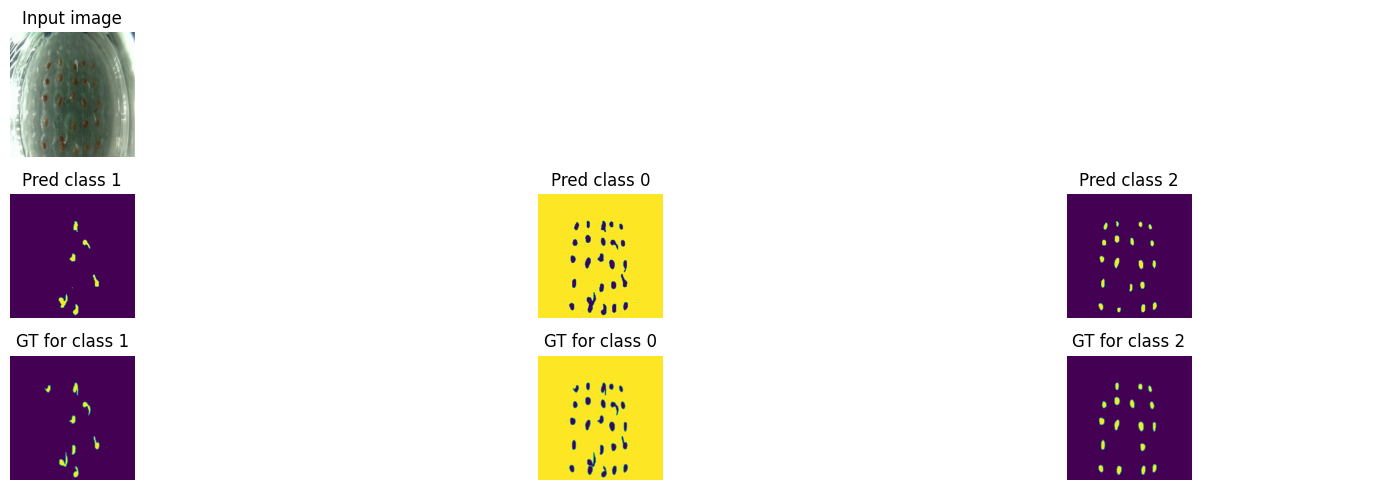

Train loss: 0.25276 | Time: 33m 18s | Val loss: 0.24204
Train_DICE_avg: 0.77150 | Train_Jaccard_avg: 0.70704 | Train_Sensitivity_avg: 0.81018 | Train_Specificity_avg: 0.95563 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99201 | Train_Specificity: 0.87608 
Class 1 - Train_DICE: 0.47274 | Train_Jaccard: 0.38892 | Train_Sensitivity: 0.53984 | Train_Specificity: 0.99685 
Class 2 - Train_DICE: 0.85018 | Train_Jaccard: 0.74882 | Train_Sensitivity: 0.89869 | Train_Specificity: 0.99397 
Val_DICE_avg: 0.78872 | Val_Jaccard_avg: 0.73623 | Val_Sensitivity_avg: 0.82516 | Val_Specificity_avg: 0.95290 
Class 0 - Val_DICE: 0.99588 | Val_Jaccard: 0.99181 | Val_Sensitivity: 0.99743 | Val_Specificity: 0.86591 
Class 1 - Val_DICE: 0.49097 | Val_Jaccard: 0.42186 | Val_Sensitivity: 0.55057 | Val_Specificity: 0.99711 
Class 2 - Val_DICE: 0.87932 | Val_Jaccard: 0.79501 | Val_Sensitivity: 0.92746 | Val_Specificity: 0.99567 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.24654 | Time: 34m 23s | Val loss: 0.23715
Train_DICE_avg: 0.78001 | Train_Jaccard_avg: 0.71645 | Train_Sensitivity_avg: 0.82264 | Train_Specificity_avg: 0.95565 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98354 | Train_Sensitivity: 0.99226 | Train_Specificity: 0.87609 
Class 1 - Train_DICE: 0.49580 | Train_Jaccard: 0.41335 | Train_Sensitivity: 0.57514 | Train_Specificity: 0.99680 
Class 2 - Train_DICE: 0.85257 | Train_Jaccard: 0.75247 | Train_Sensitivity: 0.90051 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.78061 | Val_Jaccard_avg: 0.72507 | Val_Sensitivity_avg: 0.82420 | Val_Specificity_avg: 0.95942 
Class 0 - Val_DICE: 0.99621 | Val_Jaccard: 0.99247 | Val_Sensitivity: 0.99704 | Val_Specificity: 0.88678 
Class 1 - Val_DICE: 0.48416 | Val_Jaccard: 0.41599 | Val_Sensitivity: 0.53104 | Val_Specificity: 0.99722 
Class 2 - Val_DICE: 0.86145 | Val_Jaccard: 0.76676 | Val_Sensitivity: 0.94453 | Val_Specificity: 0.99425 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.24208 | Time: 35m 29s | Val loss: 0.23454
Train_DICE_avg: 0.79151 | Train_Jaccard_avg: 0.72805 | Train_Sensitivity_avg: 0.83579 | Train_Specificity_avg: 0.95541 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98354 | Train_Sensitivity: 0.99239 | Train_Specificity: 0.87537 
Class 1 - Train_DICE: 0.52848 | Train_Jaccard: 0.44597 | Train_Sensitivity: 0.61247 | Train_Specificity: 0.99682 
Class 2 - Train_DICE: 0.85438 | Train_Jaccard: 0.75463 | Train_Sensitivity: 0.90251 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.81598 | Val_Jaccard_avg: 0.76199 | Val_Sensitivity_avg: 0.86253 | Val_Specificity_avg: 0.94585 
Class 0 - Val_DICE: 0.99589 | Val_Jaccard: 0.99184 | Val_Sensitivity: 0.99740 | Val_Specificity: 0.84569 
Class 1 - Val_DICE: 0.58066 | Val_Jaccard: 0.51126 | Val_Sensitivity: 0.67974 | Val_Specificity: 0.99673 
Class 2 - Val_DICE: 0.87140 | Val_Jaccard: 0.78287 | Val_Sensitivity: 0.91046 | Val_Specificity: 0.99512 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.24297 | Time: 36m 35s | Val loss: 0.23272
Train_DICE_avg: 0.79299 | Train_Jaccard_avg: 0.72972 | Train_Sensitivity_avg: 0.84853 | Train_Specificity_avg: 0.95371 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98336 | Train_Sensitivity: 0.99246 | Train_Specificity: 0.87063 
Class 1 - Train_DICE: 0.53987 | Train_Jaccard: 0.46035 | Train_Sensitivity: 0.65245 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.84753 | Train_Jaccard: 0.74545 | Train_Sensitivity: 0.90068 | Train_Specificity: 0.99379 
Val_DICE_avg: 0.81376 | Val_Jaccard_avg: 0.76080 | Val_Sensitivity_avg: 0.86382 | Val_Specificity_avg: 0.95176 
Class 0 - Val_DICE: 0.99600 | Val_Jaccard: 0.99205 | Val_Sensitivity: 0.99736 | Val_Specificity: 0.86331 
Class 1 - Val_DICE: 0.57161 | Val_Jaccard: 0.50380 | Val_Sensitivity: 0.66794 | Val_Specificity: 0.99698 
Class 2 - Val_DICE: 0.87368 | Val_Jaccard: 0.78655 | Val_Sensitivity: 0.92616 | Val_Specificity: 0.99500 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.23500 | Time: 37m 41s | Val loss: 0.21745
Train_DICE_avg: 0.79956 | Train_Jaccard_avg: 0.73733 | Train_Sensitivity_avg: 0.85505 | Train_Specificity_avg: 0.95357 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99260 | Train_Specificity: 0.86993 
Class 1 - Train_DICE: 0.55420 | Train_Jaccard: 0.47606 | Train_Sensitivity: 0.66991 | Train_Specificity: 0.99679 
Class 2 - Train_DICE: 0.85290 | Train_Jaccard: 0.75254 | Train_Sensitivity: 0.90263 | Train_Specificity: 0.99399 
Val_DICE_avg: 0.83765 | Val_Jaccard_avg: 0.78633 | Val_Sensitivity_avg: 0.88958 | Val_Specificity_avg: 0.94990 
Class 0 - Val_DICE: 0.99577 | Val_Jaccard: 0.99159 | Val_Sensitivity: 0.99758 | Val_Specificity: 0.85732 
Class 1 - Val_DICE: 0.64198 | Val_Jaccard: 0.57930 | Val_Sensitivity: 0.74375 | Val_Specificity: 0.99725 
Class 2 - Val_DICE: 0.87521 | Val_Jaccard: 0.78809 | Val_Sensitivity: 0.92741 | Val_Specificity: 0.99512 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


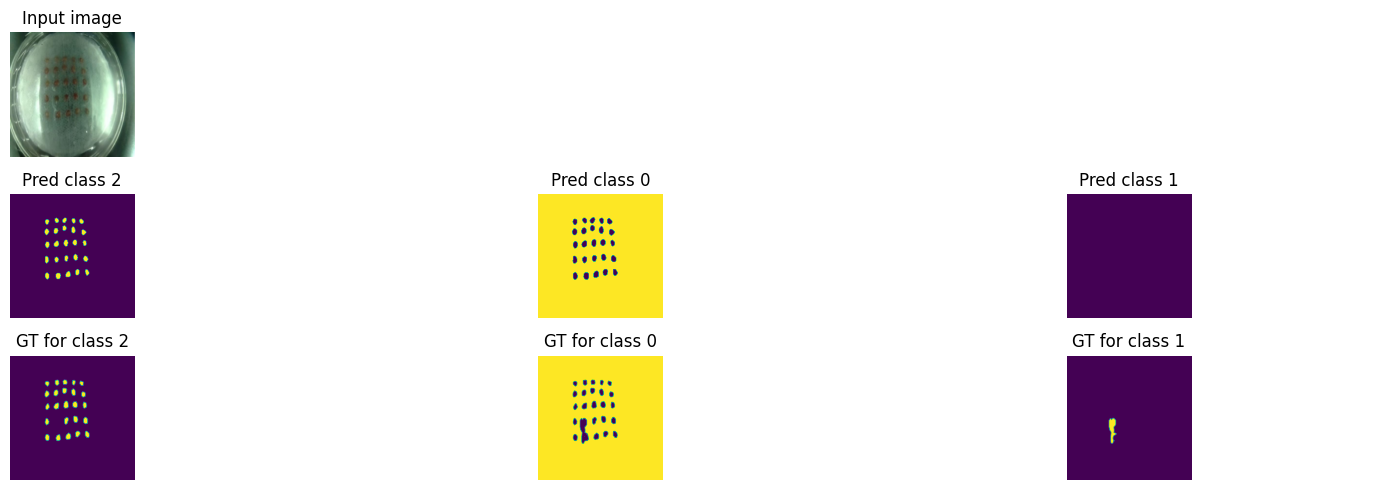

Train loss: 0.21516 | Time: 38m 46s | Val loss: 0.18973
Train_DICE_avg: 0.81842 | Train_Jaccard_avg: 0.75678 | Train_Sensitivity_avg: 0.87574 | Train_Specificity_avg: 0.95297 
Class 0 - Train_DICE: 0.99165 | Train_Jaccard: 0.98351 | Train_Sensitivity: 0.99279 | Train_Specificity: 0.86816 
Class 1 - Train_DICE: 0.61023 | Train_Jaccard: 0.53355 | Train_Sensitivity: 0.72868 | Train_Specificity: 0.99686 
Class 2 - Train_DICE: 0.85338 | Train_Jaccard: 0.75328 | Train_Sensitivity: 0.90576 | Train_Specificity: 0.99387 
Val_DICE_avg: 0.82547 | Val_Jaccard_avg: 0.77372 | Val_Sensitivity_avg: 0.88237 | Val_Specificity_avg: 0.94647 
Class 0 - Val_DICE: 0.99572 | Val_Jaccard: 0.99149 | Val_Sensitivity: 0.99748 | Val_Specificity: 0.84787 
Class 1 - Val_DICE: 0.60934 | Val_Jaccard: 0.54743 | Val_Sensitivity: 0.72155 | Val_Specificity: 0.99698 
Class 2 - Val_DICE: 0.87135 | Val_Jaccard: 0.78224 | Val_Sensitivity: 0.92809 | Val_Specificity: 0.99455 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.21138 | Time: 39m 51s | Val loss: 0.18815
Train_DICE_avg: 0.82017 | Train_Jaccard_avg: 0.75924 | Train_Sensitivity_avg: 0.88233 | Train_Specificity_avg: 0.95031 
Class 0 - Train_DICE: 0.99153 | Train_Jaccard: 0.98327 | Train_Sensitivity: 0.99309 | Train_Specificity: 0.86011 
Class 1 - Train_DICE: 0.61480 | Train_Jaccard: 0.53985 | Train_Sensitivity: 0.74993 | Train_Specificity: 0.99676 
Class 2 - Train_DICE: 0.85419 | Train_Jaccard: 0.75458 | Train_Sensitivity: 0.90397 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.82916 | Val_Jaccard_avg: 0.77713 | Val_Sensitivity_avg: 0.88449 | Val_Specificity_avg: 0.94858 
Class 0 - Val_DICE: 0.99594 | Val_Jaccard: 0.99193 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.85425 
Class 1 - Val_DICE: 0.62520 | Val_Jaccard: 0.56554 | Val_Sensitivity: 0.73356 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.86635 | Val_Jaccard: 0.77392 | Val_Sensitivity: 0.92230 | Val_Specificity: 0.99431 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


Train loss: 0.20598 | Time: 40m 57s | Val loss: 0.18430
Train_DICE_avg: 0.82638 | Train_Jaccard_avg: 0.76540 | Train_Sensitivity_avg: 0.89409 | Train_Specificity_avg: 0.95180 
Class 0 - Train_DICE: 0.99157 | Train_Jaccard: 0.98335 | Train_Sensitivity: 0.99312 | Train_Specificity: 0.86487 
Class 1 - Train_DICE: 0.63428 | Train_Jaccard: 0.56016 | Train_Sensitivity: 0.78425 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.85328 | Train_Jaccard: 0.75269 | Train_Sensitivity: 0.90491 | Train_Specificity: 0.99387 
Val_DICE_avg: 0.85502 | Val_Jaccard_avg: 0.80559 | Val_Sensitivity_avg: 0.91820 | Val_Specificity_avg: 0.94638 
Class 0 - Val_DICE: 0.99574 | Val_Jaccard: 0.99154 | Val_Sensitivity: 0.99764 | Val_Specificity: 0.84712 
Class 1 - Val_DICE: 0.69546 | Val_Jaccard: 0.63854 | Val_Sensitivity: 0.83608 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.87385 | Val_Jaccard: 0.78670 | Val_Sensitivity: 0.92088 | Val_Specificity: 0.99502 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.20202 | Time: 42m 3s | Val loss: 0.17757
Train_DICE_avg: 0.82625 | Train_Jaccard_avg: 0.76541 | Train_Sensitivity_avg: 0.89128 | Train_Specificity_avg: 0.94963 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98300 | Train_Sensitivity: 0.99326 | Train_Specificity: 0.85824 
Class 1 - Train_DICE: 0.63374 | Train_Jaccard: 0.55967 | Train_Sensitivity: 0.77652 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.85362 | Train_Jaccard: 0.75357 | Train_Sensitivity: 0.90407 | Train_Specificity: 0.99394 
Val_DICE_avg: 0.84349 | Val_Jaccard_avg: 0.79326 | Val_Sensitivity_avg: 0.90015 | Val_Specificity_avg: 0.94105 
Class 0 - Val_DICE: 0.99536 | Val_Jaccard: 0.99079 | Val_Sensitivity: 0.99769 | Val_Specificity: 0.83090 
Class 1 - Val_DICE: 0.65664 | Val_Jaccard: 0.59455 | Val_Sensitivity: 0.78031 | Val_Specificity: 0.99684 
Class 2 - Val_DICE: 0.87848 | Val_Jaccard: 0.79444 | Val_Sensitivity: 0.92245 | Val_Specificity: 0.99541 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.19972 | Time: 43m 8s | Val loss: 0.17236
Train_DICE_avg: 0.82962 | Train_Jaccard_avg: 0.76901 | Train_Sensitivity_avg: 0.89988 | Train_Specificity_avg: 0.94922 
Class 0 - Train_DICE: 0.99132 | Train_Jaccard: 0.98286 | Train_Sensitivity: 0.99318 | Train_Specificity: 0.85700 
Class 1 - Train_DICE: 0.64231 | Train_Jaccard: 0.56825 | Train_Sensitivity: 0.80201 | Train_Specificity: 0.99659 
Class 2 - Train_DICE: 0.85521 | Train_Jaccard: 0.75591 | Train_Sensitivity: 0.90443 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.86297 | Val_Jaccard_avg: 0.80851 | Val_Sensitivity_avg: 0.93084 | Val_Specificity_avg: 0.95189 
Class 0 - Val_DICE: 0.99593 | Val_Jaccard: 0.99192 | Val_Sensitivity: 0.99741 | Val_Specificity: 0.86478 
Class 1 - Val_DICE: 0.73222 | Val_Jaccard: 0.66852 | Val_Sensitivity: 0.85112 | Val_Specificity: 0.99684 
Class 2 - Val_DICE: 0.86076 | Val_Jaccard: 0.76510 | Val_Sensitivity: 0.94398 | Val_Specificity: 0.99407 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


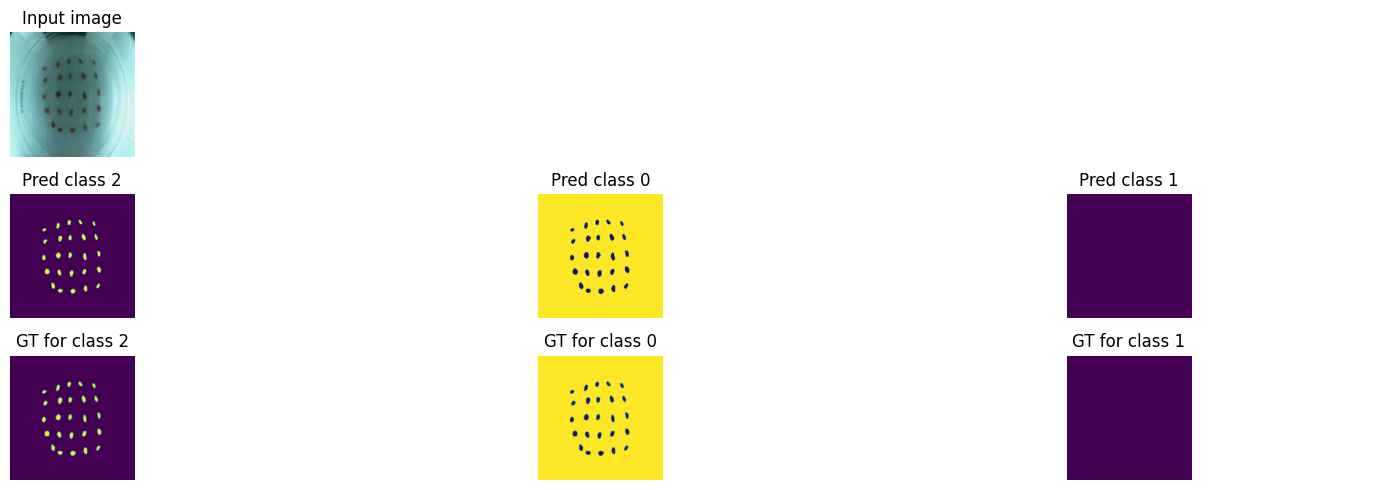

Train loss: 0.19675 | Time: 44m 14s | Val loss: 0.16801
Train_DICE_avg: 0.83391 | Train_Jaccard_avg: 0.77325 | Train_Sensitivity_avg: 0.89964 | Train_Specificity_avg: 0.94950 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98322 | Train_Sensitivity: 0.99343 | Train_Specificity: 0.85772 
Class 1 - Train_DICE: 0.65385 | Train_Jaccard: 0.57887 | Train_Sensitivity: 0.79852 | Train_Specificity: 0.99669 
Class 2 - Train_DICE: 0.85636 | Train_Jaccard: 0.75767 | Train_Sensitivity: 0.90696 | Train_Specificity: 0.99410 
Val_DICE_avg: 0.86156 | Val_Jaccard_avg: 0.80964 | Val_Sensitivity_avg: 0.91246 | Val_Specificity_avg: 0.94088 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99069 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.83039 
Class 1 - Val_DICE: 0.71060 | Val_Jaccard: 0.64469 | Val_Sensitivity: 0.80532 | Val_Specificity: 0.99713 
Class 2 - Val_DICE: 0.87878 | Val_Jaccard: 0.79354 | Val_Sensitivity: 0.93418 | Val_Specificity: 0.99513 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.19713 | Time: 45m 19s | Val loss: 0.15233
Train_DICE_avg: 0.83336 | Train_Jaccard_avg: 0.77271 | Train_Sensitivity_avg: 0.90471 | Train_Specificity_avg: 0.94934 
Class 0 - Train_DICE: 0.99148 | Train_Jaccard: 0.98317 | Train_Sensitivity: 0.99332 | Train_Specificity: 0.85747 
Class 1 - Train_DICE: 0.65410 | Train_Jaccard: 0.58016 | Train_Sensitivity: 0.81551 | Train_Specificity: 0.99659 
Class 2 - Train_DICE: 0.85450 | Train_Jaccard: 0.75479 | Train_Sensitivity: 0.90531 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.85954 | Val_Jaccard_avg: 0.80597 | Val_Sensitivity_avg: 0.92662 | Val_Specificity_avg: 0.95038 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99177 | Val_Sensitivity: 0.99754 | Val_Specificity: 0.86019 
Class 1 - Val_DICE: 0.72056 | Val_Jaccard: 0.65872 | Val_Sensitivity: 0.84566 | Val_Specificity: 0.99683 
Class 2 - Val_DICE: 0.86220 | Val_Jaccard: 0.76742 | Val_Sensitivity: 0.93666 | Val_Specificity: 0.99411 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.18473 | Time: 46m 24s | Val loss: 0.14224
Train_DICE_avg: 0.84163 | Train_Jaccard_avg: 0.78132 | Train_Sensitivity_avg: 0.91334 | Train_Specificity_avg: 0.94856 
Class 0 - Train_DICE: 0.99138 | Train_Jaccard: 0.98297 | Train_Sensitivity: 0.99339 | Train_Specificity: 0.85503 
Class 1 - Train_DICE: 0.67733 | Train_Jaccard: 0.60358 | Train_Sensitivity: 0.84063 | Train_Specificity: 0.99657 
Class 2 - Train_DICE: 0.85619 | Train_Jaccard: 0.75743 | Train_Sensitivity: 0.90601 | Train_Specificity: 0.99407 
Val_DICE_avg: 0.86940 | Val_Jaccard_avg: 0.81511 | Val_Sensitivity_avg: 0.94121 | Val_Specificity_avg: 0.94929 
Class 0 - Val_DICE: 0.99584 | Val_Jaccard: 0.99174 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.85750 
Class 1 - Val_DICE: 0.75740 | Val_Jaccard: 0.69753 | Val_Sensitivity: 0.89231 | Val_Specificity: 0.99656 
Class 2 - Val_DICE: 0.85497 | Val_Jaccard: 0.75604 | Val_Sensitivity: 0.93399 | Val_Specificity: 0.99381 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.18403 | Time: 47m 29s | Val loss: 0.13689
Train_DICE_avg: 0.84290 | Train_Jaccard_avg: 0.78217 | Train_Sensitivity_avg: 0.91477 | Train_Specificity_avg: 0.94807 
Class 0 - Train_DICE: 0.99144 | Train_Jaccard: 0.98309 | Train_Sensitivity: 0.99353 | Train_Specificity: 0.85377 
Class 1 - Train_DICE: 0.68212 | Train_Jaccard: 0.60771 | Train_Sensitivity: 0.84580 | Train_Specificity: 0.99638 
Class 2 - Train_DICE: 0.85513 | Train_Jaccard: 0.75571 | Train_Sensitivity: 0.90499 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.88072 | Val_Jaccard_avg: 0.83017 | Val_Sensitivity_avg: 0.93662 | Val_Specificity_avg: 0.93974 
Class 0 - Val_DICE: 0.99538 | Val_Jaccard: 0.99082 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.82696 
Class 1 - Val_DICE: 0.76741 | Val_Jaccard: 0.70583 | Val_Sensitivity: 0.88295 | Val_Specificity: 0.99706 
Class 2 - Val_DICE: 0.87938 | Val_Jaccard: 0.79387 | Val_Sensitivity: 0.92892 | Val_Specificity: 0.99520 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.18027 | Time: 48m 35s | Val loss: 0.14184
Train_DICE_avg: 0.84368 | Train_Jaccard_avg: 0.78348 | Train_Sensitivity_avg: 0.91087 | Train_Specificity_avg: 0.94595 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98295 | Train_Sensitivity: 0.99399 | Train_Specificity: 0.84698 
Class 1 - Train_DICE: 0.68051 | Train_Jaccard: 0.60554 | Train_Sensitivity: 0.83020 | Train_Specificity: 0.99662 
Class 2 - Train_DICE: 0.85917 | Train_Jaccard: 0.76194 | Train_Sensitivity: 0.90841 | Train_Specificity: 0.99426 
Val_DICE_avg: 0.86680 | Val_Jaccard_avg: 0.81493 | Val_Sensitivity_avg: 0.93126 | Val_Specificity_avg: 0.94250 
Class 0 - Val_DICE: 0.99553 | Val_Jaccard: 0.99113 | Val_Sensitivity: 0.99791 | Val_Specificity: 0.83602 
Class 1 - Val_DICE: 0.73414 | Val_Jaccard: 0.67269 | Val_Sensitivity: 0.85731 | Val_Specificity: 0.99694 
Class 2 - Val_DICE: 0.87073 | Val_Jaccard: 0.78096 | Val_Sensitivity: 0.93855 | Val_Specificity: 0.99455 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


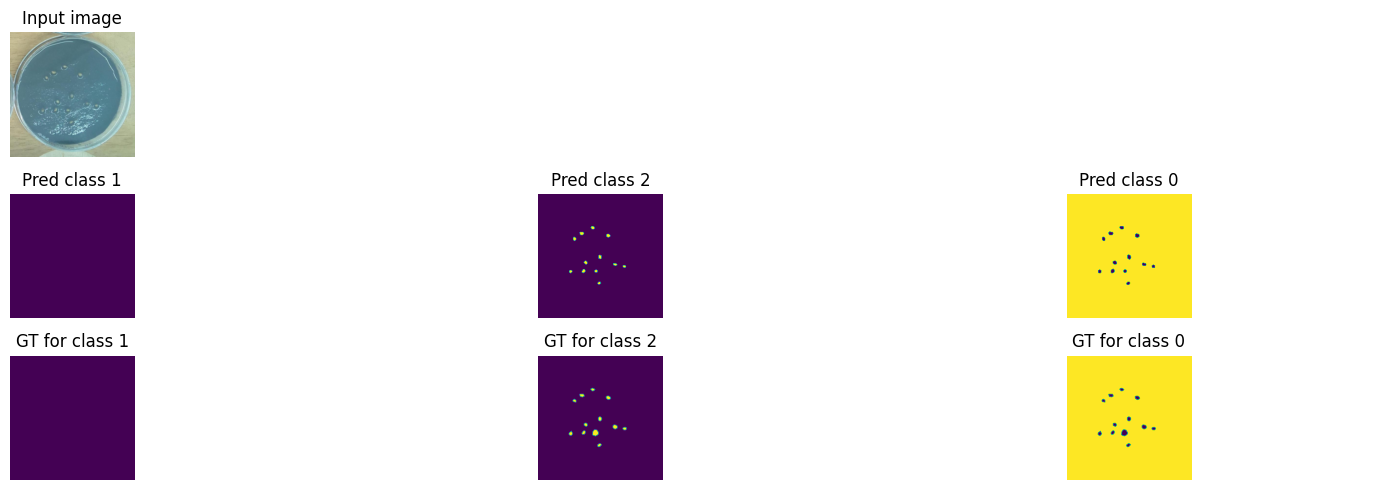

Train loss: 0.17739 | Time: 49m 40s | Val loss: 0.13340
Train_DICE_avg: 0.84540 | Train_Jaccard_avg: 0.78523 | Train_Sensitivity_avg: 0.91364 | Train_Specificity_avg: 0.94848 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98323 | Train_Sensitivity: 0.99387 | Train_Specificity: 0.85463 
Class 1 - Train_DICE: 0.68517 | Train_Jaccard: 0.61042 | Train_Sensitivity: 0.83656 | Train_Specificity: 0.99668 
Class 2 - Train_DICE: 0.85952 | Train_Jaccard: 0.76205 | Train_Sensitivity: 0.91048 | Train_Specificity: 0.99411 
Val_DICE_avg: 0.87443 | Val_Jaccard_avg: 0.82298 | Val_Sensitivity_avg: 0.94469 | Val_Specificity_avg: 0.94623 
Class 0 - Val_DICE: 0.99574 | Val_Jaccard: 0.99154 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.84745 
Class 1 - Val_DICE: 0.76081 | Val_Jaccard: 0.70215 | Val_Sensitivity: 0.90932 | Val_Specificity: 0.99650 
Class 2 - Val_DICE: 0.86675 | Val_Jaccard: 0.77524 | Val_Sensitivity: 0.92708 | Val_Specificity: 0.99473 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.17670 | Time: 50m 47s | Val loss: 0.13127
Train_DICE_avg: 0.84901 | Train_Jaccard_avg: 0.78893 | Train_Sensitivity_avg: 0.91899 | Train_Specificity_avg: 0.94884 
Class 0 - Train_DICE: 0.99173 | Train_Jaccard: 0.98365 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.85567 
Class 1 - Train_DICE: 0.69673 | Train_Jaccard: 0.62172 | Train_Sensitivity: 0.85702 | Train_Specificity: 0.99651 
Class 2 - Train_DICE: 0.85856 | Train_Jaccard: 0.76143 | Train_Sensitivity: 0.90604 | Train_Specificity: 0.99433 
Val_DICE_avg: 0.87878 | Val_Jaccard_avg: 0.82832 | Val_Sensitivity_avg: 0.94344 | Val_Specificity_avg: 0.94042 
Class 0 - Val_DICE: 0.99540 | Val_Jaccard: 0.99087 | Val_Sensitivity: 0.99801 | Val_Specificity: 0.82927 
Class 1 - Val_DICE: 0.76425 | Val_Jaccard: 0.70423 | Val_Sensitivity: 0.90270 | Val_Specificity: 0.99676 
Class 2 - Val_DICE: 0.87669 | Val_Jaccard: 0.78985 | Val_Sensitivity: 0.92961 | Val_Specificity: 0.99524 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.17589 | Time: 51m 54s | Val loss: 0.12969
Train_DICE_avg: 0.84843 | Train_Jaccard_avg: 0.78832 | Train_Sensitivity_avg: 0.91691 | Train_Specificity_avg: 0.94909 
Class 0 - Train_DICE: 0.99165 | Train_Jaccard: 0.98351 | Train_Sensitivity: 0.99387 | Train_Specificity: 0.85641 
Class 1 - Train_DICE: 0.69506 | Train_Jaccard: 0.62052 | Train_Sensitivity: 0.84635 | Train_Specificity: 0.99669 
Class 2 - Train_DICE: 0.85858 | Train_Jaccard: 0.76093 | Train_Sensitivity: 0.91053 | Train_Specificity: 0.99416 
Val_DICE_avg: 0.87676 | Val_Jaccard_avg: 0.82445 | Val_Sensitivity_avg: 0.94171 | Val_Specificity_avg: 0.94183 
Class 0 - Val_DICE: 0.99545 | Val_Jaccard: 0.99096 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.83397 
Class 1 - Val_DICE: 0.76425 | Val_Jaccard: 0.70003 | Val_Sensitivity: 0.89570 | Val_Specificity: 0.99671 
Class 2 - Val_DICE: 0.87060 | Val_Jaccard: 0.78237 | Val_Sensitivity: 0.93160 | Val_Specificity: 0.99483 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


Train loss: 0.17568 | Time: 53m 1s | Val loss: 0.12647
Train_DICE_avg: 0.84873 | Train_Jaccard_avg: 0.78869 | Train_Sensitivity_avg: 0.91739 | Train_Specificity_avg: 0.94815 
Class 0 - Train_DICE: 0.99150 | Train_Jaccard: 0.98320 | Train_Sensitivity: 0.99394 | Train_Specificity: 0.85355 
Class 1 - Train_DICE: 0.69463 | Train_Jaccard: 0.61976 | Train_Sensitivity: 0.84837 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.86006 | Train_Jaccard: 0.76312 | Train_Sensitivity: 0.90984 | Train_Specificity: 0.99420 
Val_DICE_avg: 0.88114 | Val_Jaccard_avg: 0.82990 | Val_Sensitivity_avg: 0.94149 | Val_Specificity_avg: 0.94097 
Class 0 - Val_DICE: 0.99541 | Val_Jaccard: 0.99088 | Val_Sensitivity: 0.99796 | Val_Specificity: 0.83102 
Class 1 - Val_DICE: 0.77396 | Val_Jaccard: 0.71244 | Val_Sensitivity: 0.88556 | Val_Specificity: 0.99701 
Class 2 - Val_DICE: 0.87405 | Val_Jaccard: 0.78640 | Val_Sensitivity: 0.94095 | Val_Specificity: 0.99488 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.17326 | Time: 54m 8s | Val loss: 0.12756
Train_DICE_avg: 0.85298 | Train_Jaccard_avg: 0.79292 | Train_Sensitivity_avg: 0.91996 | Train_Specificity_avg: 0.94866 
Class 0 - Train_DICE: 0.99154 | Train_Jaccard: 0.98329 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.85505 
Class 1 - Train_DICE: 0.70706 | Train_Jaccard: 0.63190 | Train_Sensitivity: 0.85522 | Train_Specificity: 0.99668 
Class 2 - Train_DICE: 0.86034 | Train_Jaccard: 0.76358 | Train_Sensitivity: 0.91073 | Train_Specificity: 0.99425 
Val_DICE_avg: 0.87741 | Val_Jaccard_avg: 0.82615 | Val_Sensitivity_avg: 0.93628 | Val_Specificity_avg: 0.94210 
Class 0 - Val_DICE: 0.99558 | Val_Jaccard: 0.99121 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.83440 
Class 1 - Val_DICE: 0.76097 | Val_Jaccard: 0.69880 | Val_Sensitivity: 0.86987 | Val_Specificity: 0.99714 
Class 2 - Val_DICE: 0.87570 | Val_Jaccard: 0.78843 | Val_Sensitivity: 0.94101 | Val_Specificity: 0.99477 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


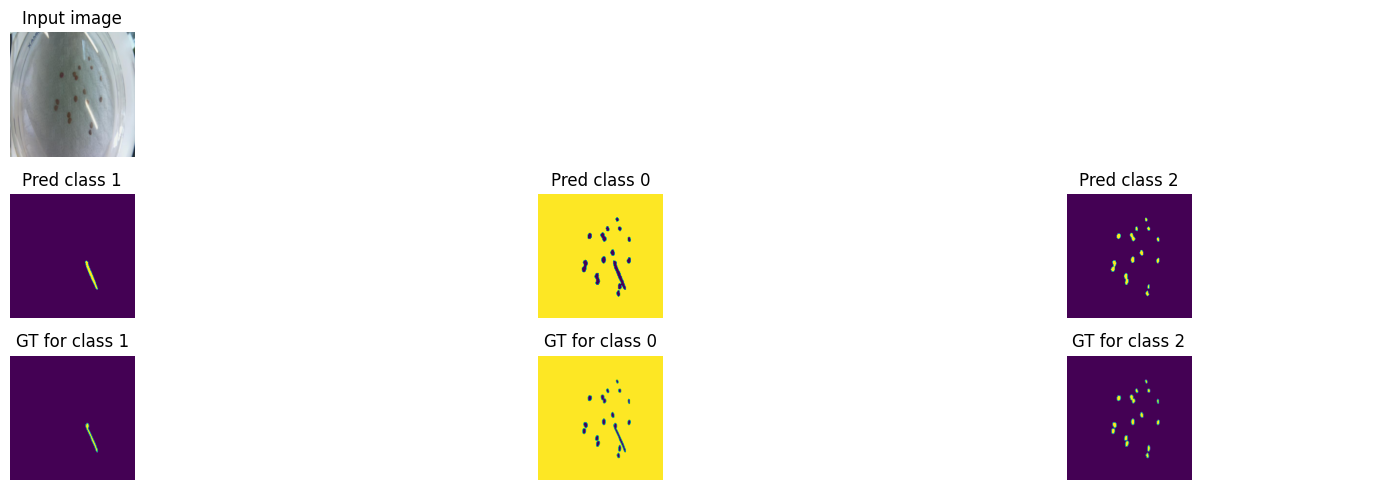

Train loss: 0.17265 | Time: 55m 16s | Val loss: 0.13323
Train_DICE_avg: 0.85263 | Train_Jaccard_avg: 0.79325 | Train_Sensitivity_avg: 0.91929 | Train_Specificity_avg: 0.94647 
Class 0 - Train_DICE: 0.99154 | Train_Jaccard: 0.98328 | Train_Sensitivity: 0.99422 | Train_Specificity: 0.84831 
Class 1 - Train_DICE: 0.70501 | Train_Jaccard: 0.63125 | Train_Sensitivity: 0.85218 | Train_Specificity: 0.99681 
Class 2 - Train_DICE: 0.86133 | Train_Jaccard: 0.76523 | Train_Sensitivity: 0.91148 | Train_Specificity: 0.99431 
Val_DICE_avg: 0.87298 | Val_Jaccard_avg: 0.82239 | Val_Sensitivity_avg: 0.93045 | Val_Specificity_avg: 0.93983 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99063 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.82728 
Class 1 - Val_DICE: 0.74522 | Val_Jaccard: 0.68366 | Val_Sensitivity: 0.86029 | Val_Specificity: 0.99714 
Class 2 - Val_DICE: 0.87844 | Val_Jaccard: 0.79288 | Val_Sensitivity: 0.93301 | Val_Specificity: 0.99508 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.16883 | Time: 56m 23s | Val loss: 0.12353
Train_DICE_avg: 0.85270 | Train_Jaccard_avg: 0.79234 | Train_Sensitivity_avg: 0.92037 | Train_Specificity_avg: 0.94727 
Class 0 - Train_DICE: 0.99147 | Train_Jaccard: 0.98315 | Train_Sensitivity: 0.99412 | Train_Specificity: 0.85091 
Class 1 - Train_DICE: 0.70523 | Train_Jaccard: 0.62899 | Train_Sensitivity: 0.85739 | Train_Specificity: 0.99661 
Class 2 - Train_DICE: 0.86140 | Train_Jaccard: 0.76488 | Train_Sensitivity: 0.90960 | Train_Specificity: 0.99431 
Val_DICE_avg: 0.88359 | Val_Jaccard_avg: 0.83287 | Val_Sensitivity_avg: 0.94492 | Val_Specificity_avg: 0.94085 
Class 0 - Val_DICE: 0.99546 | Val_Jaccard: 0.99099 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.83051 
Class 1 - Val_DICE: 0.77651 | Val_Jaccard: 0.71484 | Val_Sensitivity: 0.90496 | Val_Specificity: 0.99683 
Class 2 - Val_DICE: 0.87879 | Val_Jaccard: 0.79279 | Val_Sensitivity: 0.93177 | Val_Specificity: 0.99522 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.17125 | Time: 57m 30s | Val loss: 0.12310
Train_DICE_avg: 0.85155 | Train_Jaccard_avg: 0.79178 | Train_Sensitivity_avg: 0.91918 | Train_Specificity_avg: 0.94694 
Class 0 - Train_DICE: 0.99144 | Train_Jaccard: 0.98308 | Train_Sensitivity: 0.99427 | Train_Specificity: 0.84975 
Class 1 - Train_DICE: 0.70228 | Train_Jaccard: 0.62743 | Train_Sensitivity: 0.85183 | Train_Specificity: 0.99678 
Class 2 - Train_DICE: 0.86094 | Train_Jaccard: 0.76484 | Train_Sensitivity: 0.91145 | Train_Specificity: 0.99427 
Val_DICE_avg: 0.88355 | Val_Jaccard_avg: 0.83301 | Val_Sensitivity_avg: 0.94662 | Val_Specificity_avg: 0.94140 
Class 0 - Val_DICE: 0.99542 | Val_Jaccard: 0.99090 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.83212 
Class 1 - Val_DICE: 0.77930 | Val_Jaccard: 0.71877 | Val_Sensitivity: 0.90671 | Val_Specificity: 0.99690 
Class 2 - Val_DICE: 0.87594 | Val_Jaccard: 0.78937 | Val_Sensitivity: 0.93512 | Val_Specificity: 0.99517 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.16794 | Time: 58m 36s | Val loss: 0.12679
Train_DICE_avg: 0.85260 | Train_Jaccard_avg: 0.79312 | Train_Sensitivity_avg: 0.92246 | Train_Specificity_avg: 0.94697 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98313 | Train_Sensitivity: 0.99425 | Train_Specificity: 0.84992 
Class 1 - Train_DICE: 0.70425 | Train_Jaccard: 0.63012 | Train_Sensitivity: 0.86391 | Train_Specificity: 0.99666 
Class 2 - Train_DICE: 0.86207 | Train_Jaccard: 0.76612 | Train_Sensitivity: 0.90922 | Train_Specificity: 0.99433 
Val_DICE_avg: 0.87827 | Val_Jaccard_avg: 0.82833 | Val_Sensitivity_avg: 0.94485 | Val_Specificity_avg: 0.93910 
Class 0 - Val_DICE: 0.99535 | Val_Jaccard: 0.99077 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.82534 
Class 1 - Val_DICE: 0.76040 | Val_Jaccard: 0.70012 | Val_Sensitivity: 0.90607 | Val_Specificity: 0.99665 
Class 2 - Val_DICE: 0.87907 | Val_Jaccard: 0.79409 | Val_Sensitivity: 0.93051 | Val_Specificity: 0.99532 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.16558 | Time: 59m 45s | Val loss: 0.12163
Train_DICE_avg: 0.85522 | Train_Jaccard_avg: 0.79551 | Train_Sensitivity_avg: 0.92235 | Train_Specificity_avg: 0.94662 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98305 | Train_Sensitivity: 0.99424 | Train_Specificity: 0.84874 
Class 1 - Train_DICE: 0.71139 | Train_Jaccard: 0.63610 | Train_Sensitivity: 0.86063 | Train_Specificity: 0.99676 
Class 2 - Train_DICE: 0.86286 | Train_Jaccard: 0.76739 | Train_Sensitivity: 0.91218 | Train_Specificity: 0.99436 
Val_DICE_avg: 0.88505 | Val_Jaccard_avg: 0.83539 | Val_Sensitivity_avg: 0.94674 | Val_Specificity_avg: 0.93924 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99068 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.82536 
Class 1 - Val_DICE: 0.77821 | Val_Jaccard: 0.71742 | Val_Sensitivity: 0.90751 | Val_Specificity: 0.99685 
Class 2 - Val_DICE: 0.88163 | Val_Jaccard: 0.79807 | Val_Sensitivity: 0.93465 | Val_Specificity: 0.99551 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


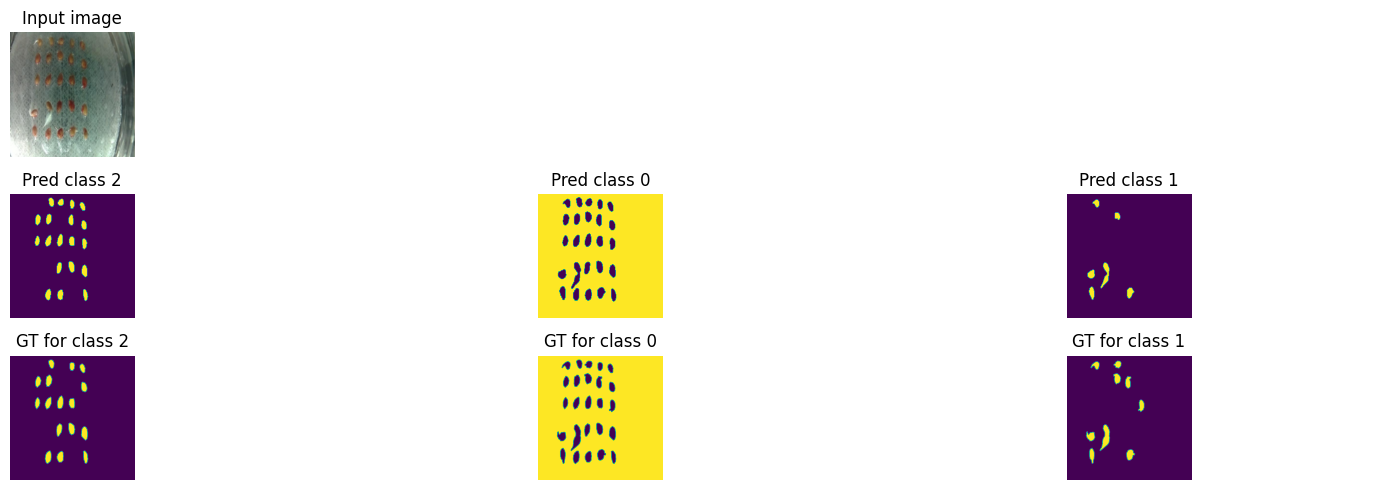

Train loss: 0.16672 | Time: 60m 53s | Val loss: 0.12254
Train_DICE_avg: 0.85441 | Train_Jaccard_avg: 0.79476 | Train_Sensitivity_avg: 0.92127 | Train_Specificity_avg: 0.94749 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98314 | Train_Sensitivity: 0.99417 | Train_Specificity: 0.85147 
Class 1 - Train_DICE: 0.70897 | Train_Jaccard: 0.63398 | Train_Sensitivity: 0.85736 | Train_Specificity: 0.99675 
Class 2 - Train_DICE: 0.86281 | Train_Jaccard: 0.76717 | Train_Sensitivity: 0.91227 | Train_Specificity: 0.99424 
Val_DICE_avg: 0.88247 | Val_Jaccard_avg: 0.83204 | Val_Sensitivity_avg: 0.94635 | Val_Specificity_avg: 0.94021 
Class 0 - Val_DICE: 0.99536 | Val_Jaccard: 0.99079 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.82864 
Class 1 - Val_DICE: 0.77678 | Val_Jaccard: 0.71662 | Val_Sensitivity: 0.90071 | Val_Specificity: 0.99693 
Class 2 - Val_DICE: 0.87526 | Val_Jaccard: 0.78872 | Val_Sensitivity: 0.94028 | Val_Specificity: 0.99506 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


Train loss: 0.16785 | Time: 62m 0s | Val loss: 0.11995
Train_DICE_avg: 0.85416 | Train_Jaccard_avg: 0.79444 | Train_Sensitivity_avg: 0.92058 | Train_Specificity_avg: 0.94782 
Class 0 - Train_DICE: 0.99157 | Train_Jaccard: 0.98334 | Train_Sensitivity: 0.99430 | Train_Specificity: 0.85241 
Class 1 - Train_DICE: 0.70899 | Train_Jaccard: 0.63388 | Train_Sensitivity: 0.85320 | Train_Specificity: 0.99682 
Class 2 - Train_DICE: 0.86193 | Train_Jaccard: 0.76610 | Train_Sensitivity: 0.91424 | Train_Specificity: 0.99423 
Val_DICE_avg: 0.88540 | Val_Jaccard_avg: 0.83416 | Val_Sensitivity_avg: 0.94499 | Val_Specificity_avg: 0.94177 
Class 0 - Val_DICE: 0.99553 | Val_Jaccard: 0.99112 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.83342 
Class 1 - Val_DICE: 0.78324 | Val_Jaccard: 0.72053 | Val_Sensitivity: 0.89496 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.87745 | Val_Jaccard: 0.79085 | Val_Sensitivity: 0.94203 | Val_Specificity: 0.99486 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.16807 | Time: 63m 7s | Val loss: 0.11797
Train_DICE_avg: 0.85443 | Train_Jaccard_avg: 0.79544 | Train_Sensitivity_avg: 0.92517 | Train_Specificity_avg: 0.94692 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98323 | Train_Sensitivity: 0.99430 | Train_Specificity: 0.84954 
Class 1 - Train_DICE: 0.70738 | Train_Jaccard: 0.63347 | Train_Sensitivity: 0.86912 | Train_Specificity: 0.99674 
Class 2 - Train_DICE: 0.86440 | Train_Jaccard: 0.76962 | Train_Sensitivity: 0.91208 | Train_Specificity: 0.99446 
Val_DICE_avg: 0.88606 | Val_Jaccard_avg: 0.83488 | Val_Sensitivity_avg: 0.94678 | Val_Specificity_avg: 0.93991 
Class 0 - Val_DICE: 0.99543 | Val_Jaccard: 0.99093 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.82772 
Class 1 - Val_DICE: 0.78419 | Val_Jaccard: 0.72133 | Val_Sensitivity: 0.90206 | Val_Specificity: 0.99709 
Class 2 - Val_DICE: 0.87857 | Val_Jaccard: 0.79240 | Val_Sensitivity: 0.94017 | Val_Specificity: 0.99491 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.16543 | Time: 64m 15s | Val loss: 0.11836
Train_DICE_avg: 0.85638 | Train_Jaccard_avg: 0.79694 | Train_Sensitivity_avg: 0.92399 | Train_Specificity_avg: 0.94693 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99431 | Train_Specificity: 0.84966 
Class 1 - Train_DICE: 0.71316 | Train_Jaccard: 0.63806 | Train_Sensitivity: 0.86518 | Train_Specificity: 0.99677 
Class 2 - Train_DICE: 0.86437 | Train_Jaccard: 0.76939 | Train_Sensitivity: 0.91247 | Train_Specificity: 0.99435 
Val_DICE_avg: 0.88640 | Val_Jaccard_avg: 0.83621 | Val_Sensitivity_avg: 0.94761 | Val_Specificity_avg: 0.93835 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99063 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.82281 
Class 1 - Val_DICE: 0.78208 | Val_Jaccard: 0.72009 | Val_Sensitivity: 0.91183 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.88184 | Val_Jaccard: 0.79789 | Val_Sensitivity: 0.93291 | Val_Specificity: 0.99536 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.16250 | Time: 65m 22s | Val loss: 0.11526
Train_DICE_avg: 0.85755 | Train_Jaccard_avg: 0.79855 | Train_Sensitivity_avg: 0.92375 | Train_Specificity_avg: 0.94790 
Class 0 - Train_DICE: 0.99172 | Train_Jaccard: 0.98364 | Train_Sensitivity: 0.99433 | Train_Specificity: 0.85238 
Class 1 - Train_DICE: 0.71639 | Train_Jaccard: 0.64199 | Train_Sensitivity: 0.86019 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.86452 | Train_Jaccard: 0.77003 | Train_Sensitivity: 0.91671 | Train_Specificity: 0.99437 
Val_DICE_avg: 0.88886 | Val_Jaccard_avg: 0.83717 | Val_Sensitivity_avg: 0.94808 | Val_Specificity_avg: 0.94290 
Class 0 - Val_DICE: 0.99562 | Val_Jaccard: 0.99130 | Val_Sensitivity: 0.99796 | Val_Specificity: 0.83688 
Class 1 - Val_DICE: 0.79377 | Val_Jaccard: 0.72950 | Val_Sensitivity: 0.90250 | Val_Specificity: 0.99705 
Class 2 - Val_DICE: 0.87718 | Val_Jaccard: 0.79071 | Val_Sensitivity: 0.94378 | Val_Specificity: 0.99478 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


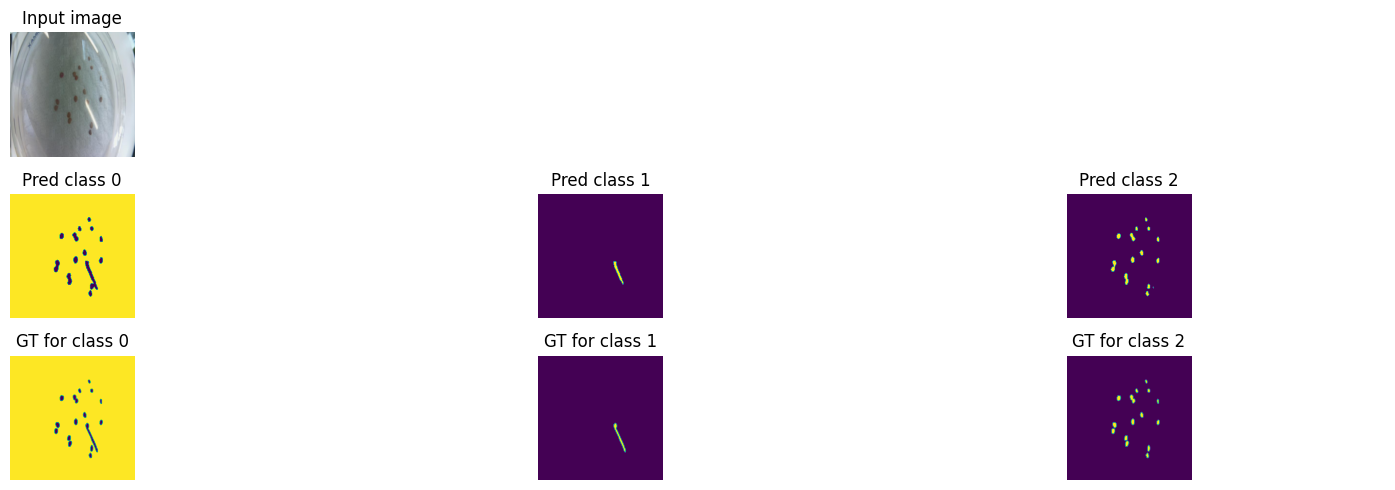

Train loss: 0.16510 | Time: 66m 29s | Val loss: 0.11612
Train_DICE_avg: 0.85527 | Train_Jaccard_avg: 0.79609 | Train_Sensitivity_avg: 0.92260 | Train_Specificity_avg: 0.94720 
Class 0 - Train_DICE: 0.99156 | Train_Jaccard: 0.98332 | Train_Sensitivity: 0.99419 | Train_Specificity: 0.85034 
Class 1 - Train_DICE: 0.70925 | Train_Jaccard: 0.63456 | Train_Sensitivity: 0.85961 | Train_Specificity: 0.99684 
Class 2 - Train_DICE: 0.86499 | Train_Jaccard: 0.77038 | Train_Sensitivity: 0.91399 | Train_Specificity: 0.99441 
Val_DICE_avg: 0.88845 | Val_Jaccard_avg: 0.83789 | Val_Sensitivity_avg: 0.94625 | Val_Specificity_avg: 0.94063 
Class 0 - Val_DICE: 0.99543 | Val_Jaccard: 0.99093 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.82973 
Class 1 - Val_DICE: 0.78841 | Val_Jaccard: 0.72523 | Val_Sensitivity: 0.90103 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.88150 | Val_Jaccard: 0.79750 | Val_Sensitivity: 0.93964 | Val_Specificity: 0.99515 


wandb: uploading artifact best_model; uploading wandb-summary.json; uploading config.yaml
wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▂▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇█████████████
wandb:       Training Jaccard ▁▁▁▂▂▃▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇███████████████
wandb:          Training Loss ██▇▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▁▂▂▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇██████████████████
wandb:   Training Specificity ▁▃▃▅▅▆▇▇▇▇▇▇████████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
wandb:        Validation DICE ▁▁▁▁▂▂▃▃▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██████████████
wandb:     Validation Jaccard ▁▁▂▂▂▃▃▃▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇███████████
wandb:        Validation Loss ██▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▁▁▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇███████████████
wandb: Validation Specificity ▁▁▂▄▃▃▅▅▅▅▅▅▅▆▆▇█▇▇██▇█▇▇▇▇▇▆▇▇▆▆▆▆▆▆▆▆▆
wandb: 
wandb: Run summary:
wandb:          Trai


Training complete!


In [25]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [26]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [27]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]



Global Performance Metrics:
Loss mean: 0.13582, std: 0.00895
Dice Coefficient mean: 0.85304, std: 0.11788
Jaccard Index mean: 0.79352, std: 0.13242
Sensitivity mean: 0.84213, std: 0.11548
Specificity mean: 0.97060, std: 0.02704

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99515, std: 0.00241
Jaccard mean: 0.99036, std: 0.00475
Sensitivity mean: 0.99313, std: 0.00323
Specificity mean: 0.91554, std: 0.08108

Class 1:
Dice mean: 0.71158, std: 0.32735
Jaccard mean: 0.63932, std: 0.34374
Sensitivity mean: 0.71547, std: 0.32413
Specificity mean: 0.99859, std: 0.00289

Class 2:
Dice mean: 0.85239, std: 0.08167
Jaccard mean: 0.75087, std: 0.11249
Sensitivity mean: 0.81777, std: 0.10717
Specificity mean: 0.99767, std: 0.00209


## MobileNetV3 backbone

### DICE Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "DICE"
config["Backbone"] = "mobilenetv3"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-MobileNetV3-DICE"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.47 GB
GPU Memory - Reserved: 1.60 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 181MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_204908-dimgpssx
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-MobileNetV3-DICE
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/dimgpssx



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


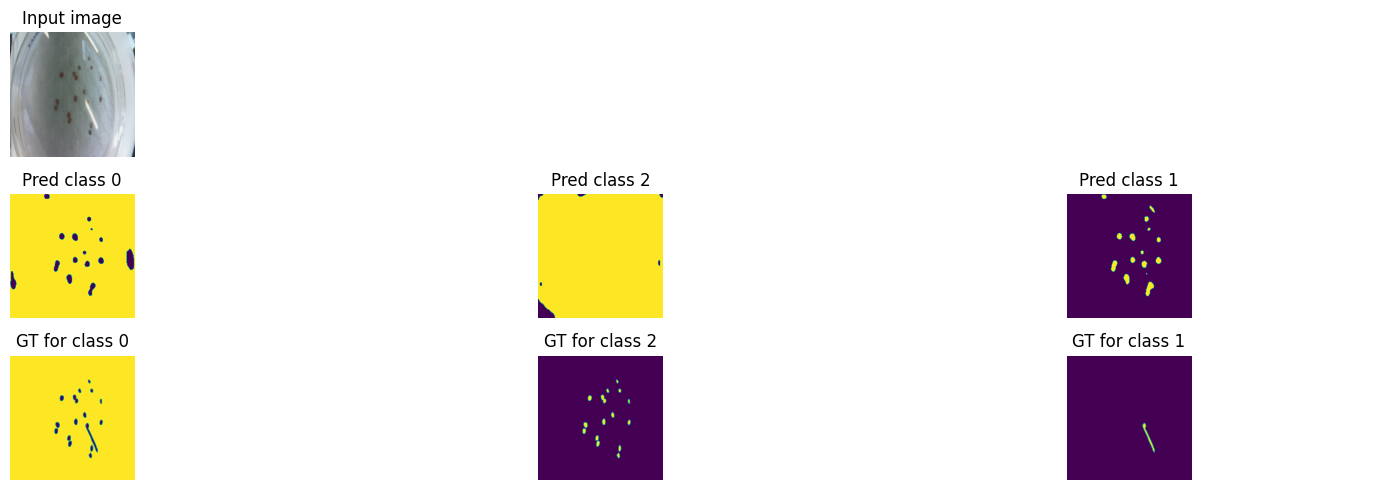

Train loss: 0.68560 | Time: 1m 0s | Val loss: 0.65228
Train_DICE_avg: 0.42312 | Train_Jaccard_avg: 0.36297 | Train_Sensitivity_avg: 0.40977 | Train_Specificity_avg: 0.79442 
Class 0 - Train_DICE: 0.91556 | Train_Jaccard: 0.85396 | Train_Sensitivity: 0.98744 | Train_Specificity: 0.38739 
Class 1 - Train_DICE: 0.10429 | Train_Jaccard: 0.06086 | Train_Sensitivity: 0.06567 | Train_Specificity: 0.99731 
Class 2 - Train_DICE: 0.24952 | Train_Jaccard: 0.17409 | Train_Sensitivity: 0.17620 | Train_Specificity: 0.99855 
Val_DICE_avg: 0.44925 | Val_Jaccard_avg: 0.40409 | Val_Sensitivity_avg: 0.43582 | Val_Specificity_avg: 0.80332 
Class 0 - Val_DICE: 0.96046 | Val_Jaccard: 0.92659 | Val_Sensitivity: 0.99556 | Val_Specificity: 0.41499 
Class 1 - Val_DICE: 0.13043 | Val_Jaccard: 0.08062 | Val_Sensitivity: 0.09036 | Val_Specificity: 0.99741 
Class 2 - Val_DICE: 0.25687 | Val_Jaccard: 0.20506 | Val_Sensitivity: 0.22155 | Val_Specificity: 0.99756 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.63380 | Time: 2m 0s | Val loss: 0.63226
Train_DICE_avg: 0.48816 | Train_Jaccard_avg: 0.43881 | Train_Sensitivity_avg: 0.45552 | Train_Specificity_avg: 0.86555 
Class 0 - Train_DICE: 0.97521 | Train_Jaccard: 0.95189 | Train_Sensitivity: 0.99085 | Train_Specificity: 0.59880 
Class 1 - Train_DICE: 0.15009 | Train_Jaccard: 0.09115 | Train_Sensitivity: 0.09494 | Train_Specificity: 0.99878 
Class 2 - Train_DICE: 0.33918 | Train_Jaccard: 0.27338 | Train_Sensitivity: 0.28077 | Train_Specificity: 0.99905 
Val_DICE_avg: 0.48416 | Val_Jaccard_avg: 0.44065 | Val_Sensitivity_avg: 0.45856 | Val_Specificity_avg: 0.88863 
Class 0 - Val_DICE: 0.98925 | Val_Jaccard: 0.97882 | Val_Sensitivity: 0.99487 | Val_Specificity: 0.67116 
Class 1 - Val_DICE: 0.16410 | Val_Jaccard: 0.10466 | Val_Sensitivity: 0.11314 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.29915 | Val_Jaccard: 0.23848 | Val_Sensitivity: 0.26767 | Val_Specificity: 0.99653 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.61234 | Time: 3m 0s | Val loss: 0.60287
Train_DICE_avg: 0.50246 | Train_Jaccard_avg: 0.45404 | Train_Sensitivity_avg: 0.46851 | Train_Specificity_avg: 0.88812 
Class 0 - Train_DICE: 0.98015 | Train_Jaccard: 0.96126 | Train_Sensitivity: 0.99140 | Train_Specificity: 0.66634 
Class 1 - Train_DICE: 0.16860 | Train_Jaccard: 0.10436 | Train_Sensitivity: 0.10743 | Train_Specificity: 0.99916 
Class 2 - Train_DICE: 0.35862 | Train_Jaccard: 0.29648 | Train_Sensitivity: 0.30668 | Train_Specificity: 0.99887 
Val_DICE_avg: 0.51013 | Val_Jaccard_avg: 0.46645 | Val_Sensitivity_avg: 0.48405 | Val_Specificity_avg: 0.90593 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99539 | Val_Specificity: 0.72259 
Class 1 - Val_DICE: 0.18183 | Val_Jaccard: 0.11857 | Val_Sensitivity: 0.12726 | Val_Specificity: 0.99841 
Class 2 - Val_DICE: 0.35665 | Val_Jaccard: 0.29678 | Val_Sensitivity: 0.32950 | Val_Specificity: 0.99679 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.59521 | Time: 4m 0s | Val loss: 0.58301
Train_DICE_avg: 0.51466 | Train_Jaccard_avg: 0.46601 | Train_Sensitivity_avg: 0.47981 | Train_Specificity_avg: 0.89759 
Class 0 - Train_DICE: 0.98288 | Train_Jaccard: 0.96649 | Train_Sensitivity: 0.99184 | Train_Specificity: 0.69481 
Class 1 - Train_DICE: 0.18467 | Train_Jaccard: 0.11671 | Train_Sensitivity: 0.12030 | Train_Specificity: 0.99922 
Class 2 - Train_DICE: 0.37643 | Train_Jaccard: 0.31483 | Train_Sensitivity: 0.32728 | Train_Specificity: 0.99874 
Val_DICE_avg: 0.53353 | Val_Jaccard_avg: 0.48931 | Val_Sensitivity_avg: 0.50791 | Val_Specificity_avg: 0.92934 
Class 0 - Val_DICE: 0.99344 | Val_Jaccard: 0.98701 | Val_Sensitivity: 0.99544 | Val_Specificity: 0.79254 
Class 1 - Val_DICE: 0.20582 | Val_Jaccard: 0.13701 | Val_Sensitivity: 0.14863 | Val_Specificity: 0.99833 
Class 2 - Val_DICE: 0.40132 | Val_Jaccard: 0.34391 | Val_Sensitivity: 0.37966 | Val_Specificity: 0.99714 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.57814 | Time: 5m 0s | Val loss: 0.56038
Train_DICE_avg: 0.52710 | Train_Jaccard_avg: 0.47788 | Train_Sensitivity_avg: 0.49217 | Train_Specificity_avg: 0.90336 
Class 0 - Train_DICE: 0.98420 | Train_Jaccard: 0.96903 | Train_Sensitivity: 0.99132 | Train_Specificity: 0.71239 
Class 1 - Train_DICE: 0.19895 | Train_Jaccard: 0.12780 | Train_Sensitivity: 0.13269 | Train_Specificity: 0.99914 
Class 2 - Train_DICE: 0.39815 | Train_Jaccard: 0.33681 | Train_Sensitivity: 0.35250 | Train_Specificity: 0.99855 
Val_DICE_avg: 0.53932 | Val_Jaccard_avg: 0.49779 | Val_Sensitivity_avg: 0.51149 | Val_Specificity_avg: 0.91612 
Class 0 - Val_DICE: 0.99309 | Val_Jaccard: 0.98632 | Val_Sensitivity: 0.99685 | Val_Specificity: 0.75138 
Class 1 - Val_DICE: 0.20347 | Val_Jaccard: 0.14000 | Val_Sensitivity: 0.14813 | Val_Specificity: 0.99877 
Class 2 - Val_DICE: 0.42141 | Val_Jaccard: 0.36707 | Val_Sensitivity: 0.38948 | Val_Specificity: 0.99821 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


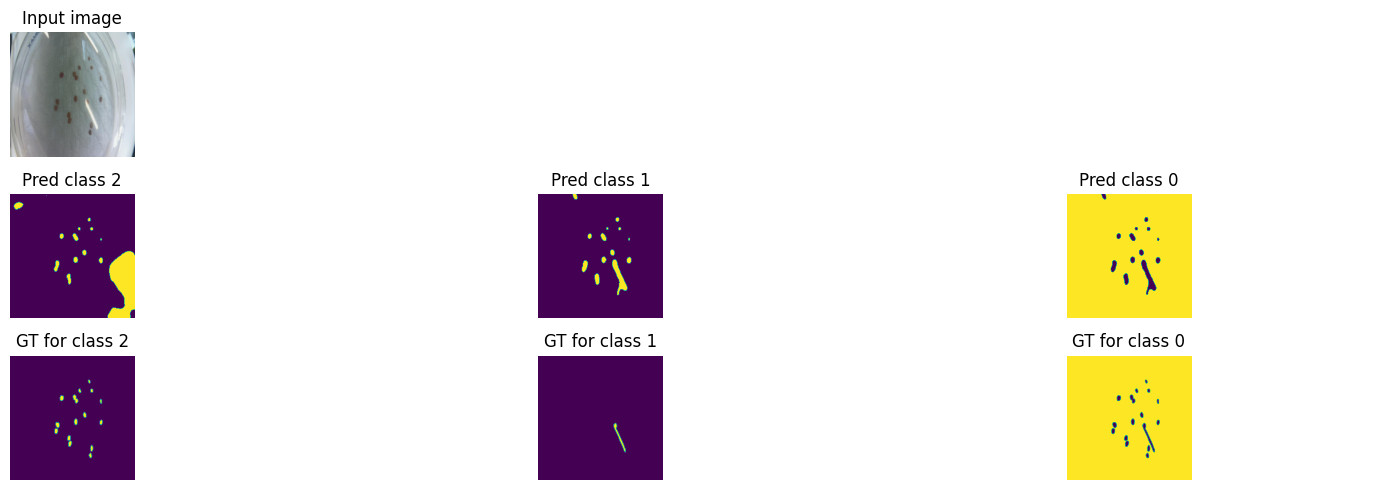

Train loss: 0.56025 | Time: 6m 1s | Val loss: 0.55344
Train_DICE_avg: 0.53926 | Train_Jaccard_avg: 0.48995 | Train_Sensitivity_avg: 0.50513 | Train_Specificity_avg: 0.91309 
Class 0 - Train_DICE: 0.98550 | Train_Jaccard: 0.97154 | Train_Sensitivity: 0.99035 | Train_Specificity: 0.74191 
Class 1 - Train_DICE: 0.22220 | Train_Jaccard: 0.14837 | Train_Sensitivity: 0.15656 | Train_Specificity: 0.99898 
Class 2 - Train_DICE: 0.41009 | Train_Jaccard: 0.34994 | Train_Sensitivity: 0.36849 | Train_Specificity: 0.99839 
Val_DICE_avg: 0.53868 | Val_Jaccard_avg: 0.49675 | Val_Sensitivity_avg: 0.52345 | Val_Specificity_avg: 0.91649 
Class 0 - Val_DICE: 0.99344 | Val_Jaccard: 0.98701 | Val_Sensitivity: 0.99688 | Val_Specificity: 0.75438 
Class 1 - Val_DICE: 0.19697 | Val_Jaccard: 0.13168 | Val_Sensitivity: 0.13948 | Val_Specificity: 0.99881 
Class 2 - Val_DICE: 0.42562 | Val_Jaccard: 0.37157 | Val_Sensitivity: 0.43398 | Val_Specificity: 0.99628 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.54268 | Time: 7m 2s | Val loss: 0.53246
Train_DICE_avg: 0.55093 | Train_Jaccard_avg: 0.50054 | Train_Sensitivity_avg: 0.51766 | Train_Specificity_avg: 0.91919 
Class 0 - Train_DICE: 0.98563 | Train_Jaccard: 0.97180 | Train_Sensitivity: 0.98838 | Train_Specificity: 0.76058 
Class 1 - Train_DICE: 0.24200 | Train_Jaccard: 0.16584 | Train_Sensitivity: 0.17883 | Train_Specificity: 0.99876 
Class 2 - Train_DICE: 0.42517 | Train_Jaccard: 0.36399 | Train_Sensitivity: 0.38577 | Train_Specificity: 0.99824 
Val_DICE_avg: 0.55562 | Val_Jaccard_avg: 0.51364 | Val_Sensitivity_avg: 0.53779 | Val_Specificity_avg: 0.91569 
Class 0 - Val_DICE: 0.99383 | Val_Jaccard: 0.98776 | Val_Sensitivity: 0.99684 | Val_Specificity: 0.75130 
Class 1 - Val_DICE: 0.23590 | Val_Jaccard: 0.16798 | Val_Sensitivity: 0.18569 | Val_Specificity: 0.99843 
Class 2 - Val_DICE: 0.43715 | Val_Jaccard: 0.38519 | Val_Sensitivity: 0.43083 | Val_Specificity: 0.99735 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.52238 | Time: 8m 3s | Val loss: 0.52055
Train_DICE_avg: 0.56510 | Train_Jaccard_avg: 0.51441 | Train_Sensitivity_avg: 0.53299 | Train_Specificity_avg: 0.92602 
Class 0 - Train_DICE: 0.98686 | Train_Jaccard: 0.97417 | Train_Sensitivity: 0.98805 | Train_Specificity: 0.78137 
Class 1 - Train_DICE: 0.26520 | Train_Jaccard: 0.18668 | Train_Sensitivity: 0.20457 | Train_Specificity: 0.99861 
Class 2 - Train_DICE: 0.44326 | Train_Jaccard: 0.38237 | Train_Sensitivity: 0.40635 | Train_Specificity: 0.99810 
Val_DICE_avg: 0.55825 | Val_Jaccard_avg: 0.51737 | Val_Sensitivity_avg: 0.53327 | Val_Specificity_avg: 0.90239 
Class 0 - Val_DICE: 0.99286 | Val_Jaccard: 0.98584 | Val_Sensitivity: 0.99772 | Val_Specificity: 0.70987 
Class 1 - Val_DICE: 0.24418 | Val_Jaccard: 0.17707 | Val_Sensitivity: 0.19538 | Val_Specificity: 0.99848 
Class 2 - Val_DICE: 0.43771 | Val_Jaccard: 0.38919 | Val_Sensitivity: 0.40671 | Val_Specificity: 0.99883 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.50456 | Time: 9m 5s | Val loss: 0.50119
Train_DICE_avg: 0.58256 | Train_Jaccard_avg: 0.52986 | Train_Sensitivity_avg: 0.55098 | Train_Specificity_avg: 0.93150 
Class 0 - Train_DICE: 0.98733 | Train_Jaccard: 0.97510 | Train_Sensitivity: 0.98732 | Train_Specificity: 0.79817 
Class 1 - Train_DICE: 0.28698 | Train_Jaccard: 0.20843 | Train_Sensitivity: 0.23343 | Train_Specificity: 0.99837 
Class 2 - Train_DICE: 0.47336 | Train_Jaccard: 0.40606 | Train_Sensitivity: 0.43220 | Train_Specificity: 0.99796 
Val_DICE_avg: 0.58418 | Val_Jaccard_avg: 0.53836 | Val_Sensitivity_avg: 0.56092 | Val_Specificity_avg: 0.92574 
Class 0 - Val_DICE: 0.99458 | Val_Jaccard: 0.98925 | Val_Sensitivity: 0.99658 | Val_Specificity: 0.78119 
Class 1 - Val_DICE: 0.26917 | Val_Jaccard: 0.20111 | Val_Sensitivity: 0.22630 | Val_Specificity: 0.99832 
Class 2 - Val_DICE: 0.48880 | Val_Jaccard: 0.42473 | Val_Sensitivity: 0.45987 | Val_Specificity: 0.99769 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.48860 | Time: 10m 6s | Val loss: 0.49350
Train_DICE_avg: 0.60679 | Train_Jaccard_avg: 0.54994 | Train_Sensitivity_avg: 0.57261 | Train_Specificity_avg: 0.93568 
Class 0 - Train_DICE: 0.98756 | Train_Jaccard: 0.97555 | Train_Sensitivity: 0.98661 | Train_Specificity: 0.81094 
Class 1 - Train_DICE: 0.30395 | Train_Jaccard: 0.22414 | Train_Sensitivity: 0.25331 | Train_Specificity: 0.99828 
Class 2 - Train_DICE: 0.52886 | Train_Jaccard: 0.45012 | Train_Sensitivity: 0.47793 | Train_Specificity: 0.99783 
Val_DICE_avg: 0.58985 | Val_Jaccard_avg: 0.54518 | Val_Sensitivity_avg: 0.56120 | Val_Specificity_avg: 0.91556 
Class 0 - Val_DICE: 0.99395 | Val_Jaccard: 0.98801 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.74936 
Class 1 - Val_DICE: 0.27672 | Val_Jaccard: 0.20974 | Val_Sensitivity: 0.22983 | Val_Specificity: 0.99854 
Class 2 - Val_DICE: 0.49888 | Val_Jaccard: 0.43779 | Val_Sensitivity: 0.45615 | Val_Specificity: 0.99878 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


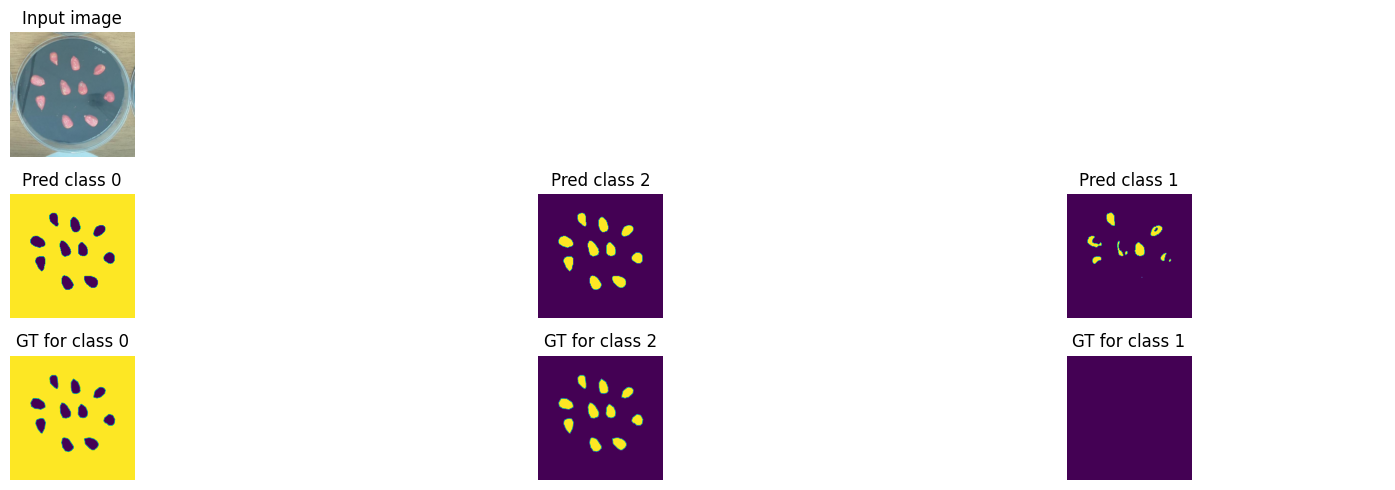

Train loss: 0.46980 | Time: 11m 10s | Val loss: 0.47407
Train_DICE_avg: 0.62684 | Train_Jaccard_avg: 0.56821 | Train_Sensitivity_avg: 0.59218 | Train_Specificity_avg: 0.94208 
Class 0 - Train_DICE: 0.98818 | Train_Jaccard: 0.97676 | Train_Sensitivity: 0.98625 | Train_Specificity: 0.83007 
Class 1 - Train_DICE: 0.32092 | Train_Jaccard: 0.24055 | Train_Sensitivity: 0.27383 | Train_Specificity: 0.99825 
Class 2 - Train_DICE: 0.57141 | Train_Jaccard: 0.48732 | Train_Sensitivity: 0.51645 | Train_Specificity: 0.99792 
Val_DICE_avg: 0.62366 | Val_Jaccard_avg: 0.57447 | Val_Sensitivity_avg: 0.59843 | Val_Specificity_avg: 0.93047 
Class 0 - Val_DICE: 0.99495 | Val_Jaccard: 0.98997 | Val_Sensitivity: 0.99657 | Val_Specificity: 0.79514 
Class 1 - Val_DICE: 0.29258 | Val_Jaccard: 0.22529 | Val_Sensitivity: 0.26333 | Val_Specificity: 0.99796 
Class 2 - Val_DICE: 0.58345 | Val_Jaccard: 0.50815 | Val_Sensitivity: 0.53538 | Val_Specificity: 0.99831 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.45278 | Time: 12m 14s | Val loss: 0.46298
Train_DICE_avg: 0.63994 | Train_Jaccard_avg: 0.58129 | Train_Sensitivity_avg: 0.60714 | Train_Specificity_avg: 0.94644 
Class 0 - Train_DICE: 0.98887 | Train_Jaccard: 0.97810 | Train_Sensitivity: 0.98626 | Train_Specificity: 0.84368 
Class 1 - Train_DICE: 0.33168 | Train_Jaccard: 0.25153 | Train_Sensitivity: 0.28857 | Train_Specificity: 0.99826 
Class 2 - Train_DICE: 0.59928 | Train_Jaccard: 0.51423 | Train_Sensitivity: 0.54658 | Train_Specificity: 0.99738 
Val_DICE_avg: 0.63602 | Val_Jaccard_avg: 0.58539 | Val_Sensitivity_avg: 0.60882 | Val_Specificity_avg: 0.92791 
Class 0 - Val_DICE: 0.99472 | Val_Jaccard: 0.98951 | Val_Sensitivity: 0.99627 | Val_Specificity: 0.78742 
Class 1 - Val_DICE: 0.29968 | Val_Jaccard: 0.23342 | Val_Sensitivity: 0.26391 | Val_Specificity: 0.99826 
Class 2 - Val_DICE: 0.61367 | Val_Jaccard: 0.53325 | Val_Sensitivity: 0.56630 | Val_Specificity: 0.99806 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.43962 | Time: 13m 19s | Val loss: 0.45212
Train_DICE_avg: 0.64599 | Train_Jaccard_avg: 0.58677 | Train_Sensitivity_avg: 0.61488 | Train_Specificity_avg: 0.94892 
Class 0 - Train_DICE: 0.98849 | Train_Jaccard: 0.97736 | Train_Sensitivity: 0.98522 | Train_Specificity: 0.85090 
Class 1 - Train_DICE: 0.34151 | Train_Jaccard: 0.25994 | Train_Sensitivity: 0.30247 | Train_Specificity: 0.99813 
Class 2 - Train_DICE: 0.60797 | Train_Jaccard: 0.52301 | Train_Sensitivity: 0.55694 | Train_Specificity: 0.99772 
Val_DICE_avg: 0.64973 | Val_Jaccard_avg: 0.59654 | Val_Sensitivity_avg: 0.61865 | Val_Specificity_avg: 0.93725 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99064 | Val_Sensitivity: 0.99651 | Val_Specificity: 0.81517 
Class 1 - Val_DICE: 0.30787 | Val_Jaccard: 0.23949 | Val_Sensitivity: 0.27187 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.64602 | Val_Jaccard: 0.55949 | Val_Sensitivity: 0.58758 | Val_Specificity: 0.99830 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.42680 | Time: 14m 22s | Val loss: 0.43941
Train_DICE_avg: 0.65861 | Train_Jaccard_avg: 0.59956 | Train_Sensitivity_avg: 0.62815 | Train_Specificity_avg: 0.95167 
Class 0 - Train_DICE: 0.98897 | Train_Jaccard: 0.97829 | Train_Sensitivity: 0.98539 | Train_Specificity: 0.85921 
Class 1 - Train_DICE: 0.34820 | Train_Jaccard: 0.26623 | Train_Sensitivity: 0.30989 | Train_Specificity: 0.99812 
Class 2 - Train_DICE: 0.63867 | Train_Jaccard: 0.55415 | Train_Sensitivity: 0.58918 | Train_Specificity: 0.99768 
Val_DICE_avg: 0.66173 | Val_Jaccard_avg: 0.60891 | Val_Sensitivity_avg: 0.63627 | Val_Specificity_avg: 0.93874 
Class 0 - Val_DICE: 0.99532 | Val_Jaccard: 0.99071 | Val_Sensitivity: 0.99588 | Val_Specificity: 0.82062 
Class 1 - Val_DICE: 0.30051 | Val_Jaccard: 0.22894 | Val_Sensitivity: 0.25186 | Val_Specificity: 0.99854 
Class 2 - Val_DICE: 0.68935 | Val_Jaccard: 0.60707 | Val_Sensitivity: 0.66106 | Val_Specificity: 0.99707 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.40899 | Time: 15m 25s | Val loss: 0.42382
Train_DICE_avg: 0.67175 | Train_Jaccard_avg: 0.61258 | Train_Sensitivity_avg: 0.64297 | Train_Specificity_avg: 0.95517 
Class 0 - Train_DICE: 0.98917 | Train_Jaccard: 0.97868 | Train_Sensitivity: 0.98505 | Train_Specificity: 0.86974 
Class 1 - Train_DICE: 0.35951 | Train_Jaccard: 0.27722 | Train_Sensitivity: 0.32606 | Train_Specificity: 0.99807 
Class 2 - Train_DICE: 0.66656 | Train_Jaccard: 0.58185 | Train_Sensitivity: 0.61781 | Train_Specificity: 0.99770 
Val_DICE_avg: 0.66893 | Val_Jaccard_avg: 0.61736 | Val_Sensitivity_avg: 0.64223 | Val_Specificity_avg: 0.94263 
Class 0 - Val_DICE: 0.99550 | Val_Jaccard: 0.99106 | Val_Sensitivity: 0.99582 | Val_Specificity: 0.83158 
Class 1 - Val_DICE: 0.32612 | Val_Jaccard: 0.25372 | Val_Sensitivity: 0.28457 | Val_Specificity: 0.99839 
Class 2 - Val_DICE: 0.68517 | Val_Jaccard: 0.60729 | Val_Sensitivity: 0.64628 | Val_Specificity: 0.99792 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


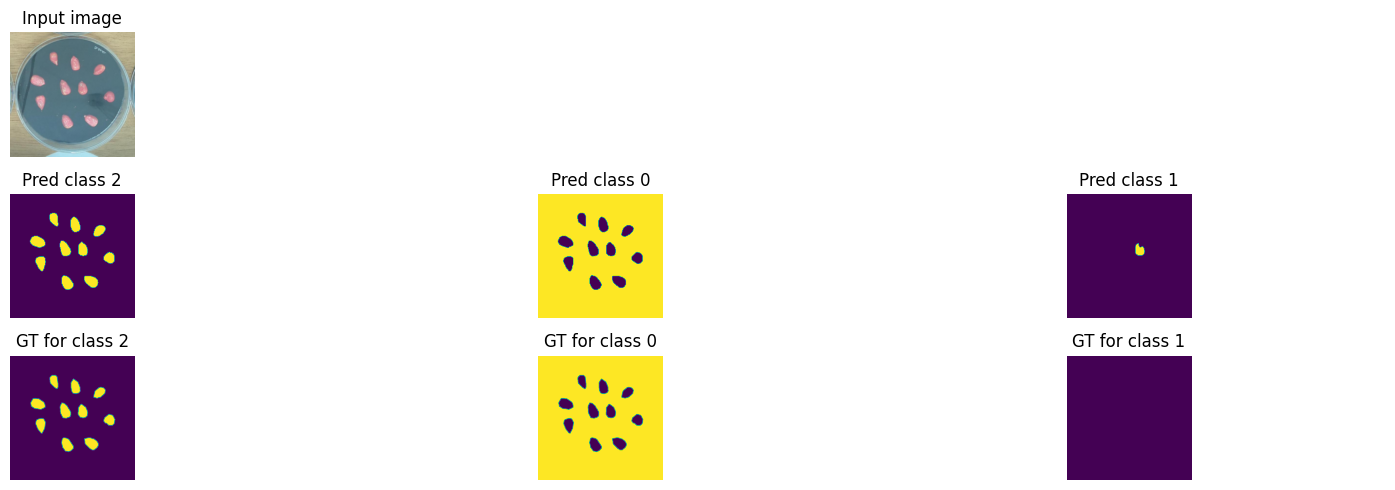

Train loss: 0.39429 | Time: 16m 29s | Val loss: 0.40732
Train_DICE_avg: 0.68596 | Train_Jaccard_avg: 0.62504 | Train_Sensitivity_avg: 0.65813 | Train_Specificity_avg: 0.95756 
Class 0 - Train_DICE: 0.98917 | Train_Jaccard: 0.97870 | Train_Sensitivity: 0.98479 | Train_Specificity: 0.87721 
Class 1 - Train_DICE: 0.36867 | Train_Jaccard: 0.28646 | Train_Sensitivity: 0.33983 | Train_Specificity: 0.99800 
Class 2 - Train_DICE: 0.70004 | Train_Jaccard: 0.60996 | Train_Sensitivity: 0.64978 | Train_Specificity: 0.99749 
Val_DICE_avg: 0.67966 | Val_Jaccard_avg: 0.62653 | Val_Sensitivity_avg: 0.65128 | Val_Specificity_avg: 0.94117 
Class 0 - Val_DICE: 0.99559 | Val_Jaccard: 0.99125 | Val_Sensitivity: 0.99677 | Val_Specificity: 0.82693 
Class 1 - Val_DICE: 0.35174 | Val_Jaccard: 0.27871 | Val_Sensitivity: 0.31407 | Val_Specificity: 0.99841 
Class 2 - Val_DICE: 0.69165 | Val_Jaccard: 0.60963 | Val_Sensitivity: 0.64301 | Val_Specificity: 0.99818 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.37668 | Time: 17m 33s | Val loss: 0.38123
Train_DICE_avg: 0.70217 | Train_Jaccard_avg: 0.64043 | Train_Sensitivity_avg: 0.67693 | Train_Specificity_avg: 0.95925 
Class 0 - Train_DICE: 0.98873 | Train_Jaccard: 0.97783 | Train_Sensitivity: 0.98362 | Train_Specificity: 0.88259 
Class 1 - Train_DICE: 0.37116 | Train_Jaccard: 0.28826 | Train_Sensitivity: 0.34639 | Train_Specificity: 0.99796 
Class 2 - Train_DICE: 0.74662 | Train_Jaccard: 0.65520 | Train_Sensitivity: 0.70080 | Train_Specificity: 0.99719 
Val_DICE_avg: 0.69661 | Val_Jaccard_avg: 0.64540 | Val_Sensitivity_avg: 0.66673 | Val_Specificity_avg: 0.94070 
Class 0 - Val_DICE: 0.99557 | Val_Jaccard: 0.99120 | Val_Sensitivity: 0.99643 | Val_Specificity: 0.82540 
Class 1 - Val_DICE: 0.33365 | Val_Jaccard: 0.26296 | Val_Sensitivity: 0.28800 | Val_Specificity: 0.99861 
Class 2 - Val_DICE: 0.76060 | Val_Jaccard: 0.68205 | Val_Sensitivity: 0.71576 | Val_Specificity: 0.99808 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.35552 | Time: 18m 36s | Val loss: 0.36906
Train_DICE_avg: 0.71480 | Train_Jaccard_avg: 0.65360 | Train_Sensitivity_avg: 0.69306 | Train_Specificity_avg: 0.96183 
Class 0 - Train_DICE: 0.98911 | Train_Jaccard: 0.97857 | Train_Sensitivity: 0.98377 | Train_Specificity: 0.89060 
Class 1 - Train_DICE: 0.38071 | Train_Jaccard: 0.29767 | Train_Sensitivity: 0.35872 | Train_Specificity: 0.99790 
Class 2 - Train_DICE: 0.77458 | Train_Jaccard: 0.68454 | Train_Sensitivity: 0.73669 | Train_Specificity: 0.99699 
Val_DICE_avg: 0.70536 | Val_Jaccard_avg: 0.65066 | Val_Sensitivity_avg: 0.67343 | Val_Specificity_avg: 0.94089 
Class 0 - Val_DICE: 0.99564 | Val_Jaccard: 0.99133 | Val_Sensitivity: 0.99695 | Val_Specificity: 0.82618 
Class 1 - Val_DICE: 0.31982 | Val_Jaccard: 0.24763 | Val_Sensitivity: 0.27207 | Val_Specificity: 0.99869 
Class 2 - Val_DICE: 0.80062 | Val_Jaccard: 0.71301 | Val_Sensitivity: 0.75125 | Val_Specificity: 0.99779 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.34392 | Time: 19m 40s | Val loss: 0.34236
Train_DICE_avg: 0.72302 | Train_Jaccard_avg: 0.65924 | Train_Sensitivity_avg: 0.70063 | Train_Specificity_avg: 0.96067 
Class 0 - Train_DICE: 0.98930 | Train_Jaccard: 0.97895 | Train_Sensitivity: 0.98430 | Train_Specificity: 0.88730 
Class 1 - Train_DICE: 0.38115 | Train_Jaccard: 0.29674 | Train_Sensitivity: 0.35956 | Train_Specificity: 0.99790 
Class 2 - Train_DICE: 0.79861 | Train_Jaccard: 0.70202 | Train_Sensitivity: 0.75802 | Train_Specificity: 0.99682 
Val_DICE_avg: 0.73144 | Val_Jaccard_avg: 0.67657 | Val_Sensitivity_avg: 0.71122 | Val_Specificity_avg: 0.95661 
Class 0 - Val_DICE: 0.99595 | Val_Jaccard: 0.99196 | Val_Sensitivity: 0.99535 | Val_Specificity: 0.87451 
Class 1 - Val_DICE: 0.35898 | Val_Jaccard: 0.28713 | Val_Sensitivity: 0.33065 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.83939 | Val_Jaccard: 0.75060 | Val_Sensitivity: 0.80766 | Val_Specificity: 0.99709 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.32795 | Time: 20m 43s | Val loss: 0.33279
Train_DICE_avg: 0.73442 | Train_Jaccard_avg: 0.67079 | Train_Sensitivity_avg: 0.71372 | Train_Specificity_avg: 0.96533 
Class 0 - Train_DICE: 0.98942 | Train_Jaccard: 0.97918 | Train_Sensitivity: 0.98391 | Train_Specificity: 0.90131 
Class 1 - Train_DICE: 0.38748 | Train_Jaccard: 0.30392 | Train_Sensitivity: 0.36789 | Train_Specificity: 0.99793 
Class 2 - Train_DICE: 0.82636 | Train_Jaccard: 0.72925 | Train_Sensitivity: 0.78935 | Train_Specificity: 0.99676 
Val_DICE_avg: 0.74122 | Val_Jaccard_avg: 0.68675 | Val_Sensitivity_avg: 0.73827 | Val_Specificity_avg: 0.96519 
Class 0 - Val_DICE: 0.99607 | Val_Jaccard: 0.99219 | Val_Sensitivity: 0.99500 | Val_Specificity: 0.90095 
Class 1 - Val_DICE: 0.36853 | Val_Jaccard: 0.29808 | Val_Sensitivity: 0.39047 | Val_Specificity: 0.99741 
Class 2 - Val_DICE: 0.85906 | Val_Jaccard: 0.76999 | Val_Sensitivity: 0.82933 | Val_Specificity: 0.99720 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


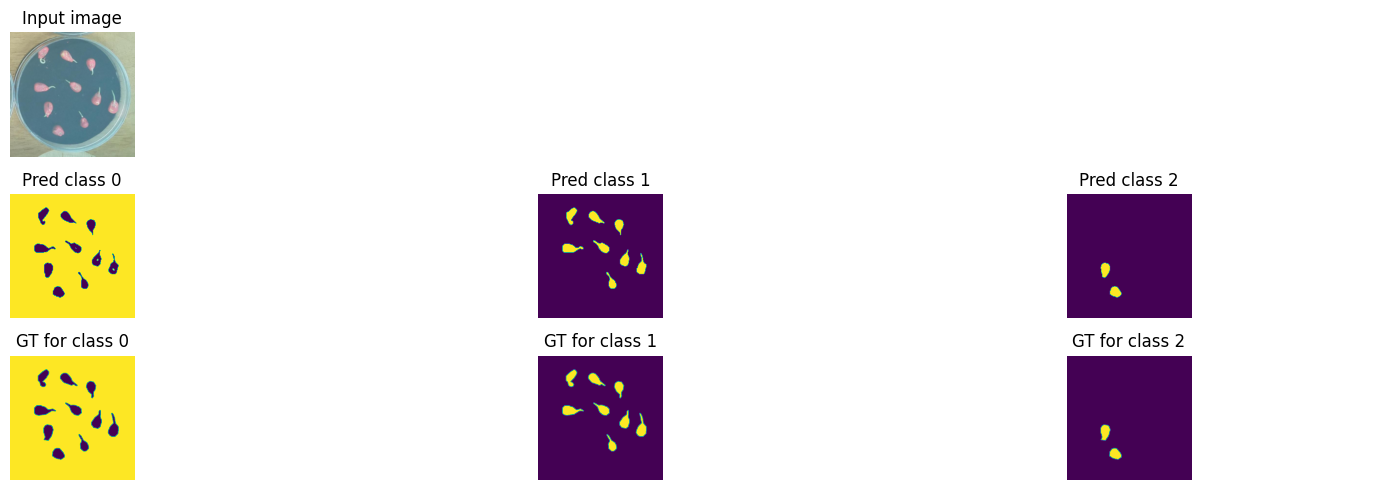

Train loss: 0.31318 | Time: 21m 48s | Val loss: 0.31550
Train_DICE_avg: 0.74556 | Train_Jaccard_avg: 0.68101 | Train_Sensitivity_avg: 0.72790 | Train_Specificity_avg: 0.96710 
Class 0 - Train_DICE: 0.98946 | Train_Jaccard: 0.97926 | Train_Sensitivity: 0.98396 | Train_Specificity: 0.90681 
Class 1 - Train_DICE: 0.39748 | Train_Jaccard: 0.31348 | Train_Sensitivity: 0.38136 | Train_Specificity: 0.99784 
Class 2 - Train_DICE: 0.84973 | Train_Jaccard: 0.75029 | Train_Sensitivity: 0.81839 | Train_Specificity: 0.99663 
Val_DICE_avg: 0.74783 | Val_Jaccard_avg: 0.69445 | Val_Sensitivity_avg: 0.74372 | Val_Specificity_avg: 0.96626 
Class 0 - Val_DICE: 0.99620 | Val_Jaccard: 0.99246 | Val_Sensitivity: 0.99517 | Val_Specificity: 0.90430 
Class 1 - Val_DICE: 0.37015 | Val_Jaccard: 0.29889 | Val_Sensitivity: 0.36226 | Val_Specificity: 0.99776 
Class 2 - Val_DICE: 0.87715 | Val_Jaccard: 0.79201 | Val_Sensitivity: 0.87373 | Val_Specificity: 0.99670 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.30057 | Time: 22m 51s | Val loss: 0.30397
Train_DICE_avg: 0.75066 | Train_Jaccard_avg: 0.68649 | Train_Sensitivity_avg: 0.73649 | Train_Specificity_avg: 0.96926 
Class 0 - Train_DICE: 0.98939 | Train_Jaccard: 0.97913 | Train_Sensitivity: 0.98354 | Train_Specificity: 0.91349 
Class 1 - Train_DICE: 0.40600 | Train_Jaccard: 0.32156 | Train_Sensitivity: 0.39352 | Train_Specificity: 0.99783 
Class 2 - Train_DICE: 0.85657 | Train_Jaccard: 0.75877 | Train_Sensitivity: 0.83241 | Train_Specificity: 0.99647 
Val_DICE_avg: 0.74859 | Val_Jaccard_avg: 0.69485 | Val_Sensitivity_avg: 0.73869 | Val_Specificity_avg: 0.95957 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99250 | Val_Sensitivity: 0.99627 | Val_Specificity: 0.88343 
Class 1 - Val_DICE: 0.37414 | Val_Jaccard: 0.30272 | Val_Sensitivity: 0.35352 | Val_Specificity: 0.99822 
Class 2 - Val_DICE: 0.87541 | Val_Jaccard: 0.78935 | Val_Sensitivity: 0.86626 | Val_Specificity: 0.99706 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.29004 | Time: 23m 55s | Val loss: 0.29366
Train_DICE_avg: 0.75357 | Train_Jaccard_avg: 0.68995 | Train_Sensitivity_avg: 0.74177 | Train_Specificity_avg: 0.96845 
Class 0 - Train_DICE: 0.98957 | Train_Jaccard: 0.97947 | Train_Sensitivity: 0.98409 | Train_Specificity: 0.91105 
Class 1 - Train_DICE: 0.41155 | Train_Jaccard: 0.32762 | Train_Sensitivity: 0.40347 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.85960 | Train_Jaccard: 0.76277 | Train_Sensitivity: 0.83775 | Train_Specificity: 0.99649 
Val_DICE_avg: 0.75341 | Val_Jaccard_avg: 0.70073 | Val_Sensitivity_avg: 0.75566 | Val_Specificity_avg: 0.96584 
Class 0 - Val_DICE: 0.99637 | Val_Jaccard: 0.99278 | Val_Sensitivity: 0.99570 | Val_Specificity: 0.90290 
Class 1 - Val_DICE: 0.38501 | Val_Jaccard: 0.31477 | Val_Sensitivity: 0.39169 | Val_Specificity: 0.99798 
Class 2 - Val_DICE: 0.87886 | Val_Jaccard: 0.79463 | Val_Sensitivity: 0.87959 | Val_Specificity: 0.99664 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.28441 | Time: 24m 58s | Val loss: 0.28893
Train_DICE_avg: 0.75604 | Train_Jaccard_avg: 0.69279 | Train_Sensitivity_avg: 0.74719 | Train_Specificity_avg: 0.96738 
Class 0 - Train_DICE: 0.99004 | Train_Jaccard: 0.98038 | Train_Sensitivity: 0.98510 | Train_Specificity: 0.90795 
Class 1 - Train_DICE: 0.41764 | Train_Jaccard: 0.33371 | Train_Sensitivity: 0.41492 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.86044 | Train_Jaccard: 0.76427 | Train_Sensitivity: 0.84156 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.75325 | Val_Jaccard_avg: 0.70065 | Val_Sensitivity_avg: 0.74636 | Val_Specificity_avg: 0.95708 
Class 0 - Val_DICE: 0.99618 | Val_Jaccard: 0.99241 | Val_Sensitivity: 0.99619 | Val_Specificity: 0.87631 
Class 1 - Val_DICE: 0.38033 | Val_Jaccard: 0.30862 | Val_Sensitivity: 0.35566 | Val_Specificity: 0.99836 
Class 2 - Val_DICE: 0.88325 | Val_Jaccard: 0.80093 | Val_Sensitivity: 0.88724 | Val_Specificity: 0.99657 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.27724 | Time: 26m 2s | Val loss: 0.28469
Train_DICE_avg: 0.75751 | Train_Jaccard_avg: 0.69443 | Train_Sensitivity_avg: 0.74852 | Train_Specificity_avg: 0.96746 
Class 0 - Train_DICE: 0.98991 | Train_Jaccard: 0.98014 | Train_Sensitivity: 0.98509 | Train_Specificity: 0.90819 
Class 1 - Train_DICE: 0.41950 | Train_Jaccard: 0.33502 | Train_Sensitivity: 0.41288 | Train_Specificity: 0.99784 
Class 2 - Train_DICE: 0.86311 | Train_Jaccard: 0.76812 | Train_Sensitivity: 0.84761 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.76323 | Val_Jaccard_avg: 0.71054 | Val_Sensitivity_avg: 0.76070 | Val_Specificity_avg: 0.96255 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99282 | Val_Sensitivity: 0.99620 | Val_Specificity: 0.89300 
Class 1 - Val_DICE: 0.41590 | Val_Jaccard: 0.34612 | Val_Sensitivity: 0.39531 | Val_Specificity: 0.99846 
Class 2 - Val_DICE: 0.87739 | Val_Jaccard: 0.79267 | Val_Sensitivity: 0.89059 | Val_Specificity: 0.99618 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


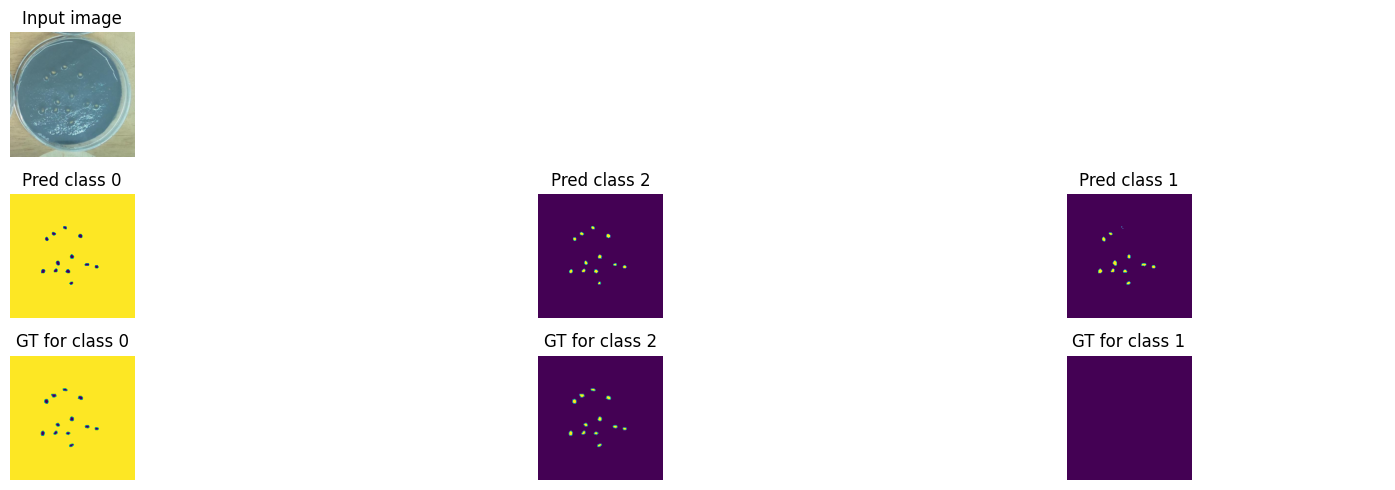

Train loss: 0.27383 | Time: 27m 6s | Val loss: 0.27825
Train_DICE_avg: 0.76104 | Train_Jaccard_avg: 0.69847 | Train_Sensitivity_avg: 0.75635 | Train_Specificity_avg: 0.96577 
Class 0 - Train_DICE: 0.98998 | Train_Jaccard: 0.98026 | Train_Sensitivity: 0.98562 | Train_Specificity: 0.90319 
Class 1 - Train_DICE: 0.42953 | Train_Jaccard: 0.34632 | Train_Sensitivity: 0.43474 | Train_Specificity: 0.99775 
Class 2 - Train_DICE: 0.86361 | Train_Jaccard: 0.76883 | Train_Sensitivity: 0.84869 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.75557 | Val_Jaccard_avg: 0.70311 | Val_Sensitivity_avg: 0.75680 | Val_Specificity_avg: 0.96509 
Class 0 - Val_DICE: 0.99642 | Val_Jaccard: 0.99288 | Val_Sensitivity: 0.99611 | Val_Specificity: 0.90063 
Class 1 - Val_DICE: 0.38689 | Val_Jaccard: 0.31601 | Val_Sensitivity: 0.37753 | Val_Specificity: 0.99810 
Class 2 - Val_DICE: 0.88341 | Val_Jaccard: 0.80044 | Val_Sensitivity: 0.89676 | Val_Specificity: 0.99653 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.27052 | Time: 28m 9s | Val loss: 0.27772
Train_DICE_avg: 0.76151 | Train_Jaccard_avg: 0.69874 | Train_Sensitivity_avg: 0.75474 | Train_Specificity_avg: 0.96582 
Class 0 - Train_DICE: 0.99053 | Train_Jaccard: 0.98134 | Train_Sensitivity: 0.98663 | Train_Specificity: 0.90338 
Class 1 - Train_DICE: 0.42984 | Train_Jaccard: 0.34556 | Train_Sensitivity: 0.42697 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.86415 | Train_Jaccard: 0.76933 | Train_Sensitivity: 0.85063 | Train_Specificity: 0.99631 
Val_DICE_avg: 0.76963 | Val_Jaccard_avg: 0.71714 | Val_Sensitivity_avg: 0.77133 | Val_Specificity_avg: 0.96075 
Class 0 - Val_DICE: 0.99631 | Val_Jaccard: 0.99266 | Val_Sensitivity: 0.99681 | Val_Specificity: 0.88703 
Class 1 - Val_DICE: 0.43101 | Val_Jaccard: 0.36070 | Val_Sensitivity: 0.43600 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.88157 | Val_Jaccard: 0.79807 | Val_Sensitivity: 0.88119 | Val_Specificity: 0.99717 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.26474 | Time: 29m 12s | Val loss: 0.27423
Train_DICE_avg: 0.76357 | Train_Jaccard_avg: 0.70172 | Train_Sensitivity_avg: 0.75897 | Train_Specificity_avg: 0.96658 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98140 | Train_Sensitivity: 0.98660 | Train_Specificity: 0.90556 
Class 1 - Train_DICE: 0.43327 | Train_Jaccard: 0.35020 | Train_Sensitivity: 0.43378 | Train_Specificity: 0.99784 
Class 2 - Train_DICE: 0.86689 | Train_Jaccard: 0.77356 | Train_Sensitivity: 0.85654 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.75374 | Val_Jaccard_avg: 0.70216 | Val_Sensitivity_avg: 0.75198 | Val_Specificity_avg: 0.95086 
Class 0 - Val_DICE: 0.99618 | Val_Jaccard: 0.99240 | Val_Sensitivity: 0.99695 | Val_Specificity: 0.85725 
Class 1 - Val_DICE: 0.38433 | Val_Jaccard: 0.31524 | Val_Sensitivity: 0.37341 | Val_Specificity: 0.99830 
Class 2 - Val_DICE: 0.88070 | Val_Jaccard: 0.79884 | Val_Sensitivity: 0.88558 | Val_Specificity: 0.99703 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.26191 | Time: 30m 15s | Val loss: 0.27051
Train_DICE_avg: 0.76630 | Train_Jaccard_avg: 0.70439 | Train_Sensitivity_avg: 0.76192 | Train_Specificity_avg: 0.96545 
Class 0 - Train_DICE: 0.99057 | Train_Jaccard: 0.98141 | Train_Sensitivity: 0.98690 | Train_Specificity: 0.90216 
Class 1 - Train_DICE: 0.44118 | Train_Jaccard: 0.35783 | Train_Sensitivity: 0.44422 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.86716 | Train_Jaccard: 0.77392 | Train_Sensitivity: 0.85464 | Train_Specificity: 0.99643 
Val_DICE_avg: 0.76454 | Val_Jaccard_avg: 0.71336 | Val_Sensitivity_avg: 0.77685 | Val_Specificity_avg: 0.96586 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99283 | Val_Sensitivity: 0.99610 | Val_Specificity: 0.90333 
Class 1 - Val_DICE: 0.41247 | Val_Jaccard: 0.34429 | Val_Sensitivity: 0.42517 | Val_Specificity: 0.99795 
Class 2 - Val_DICE: 0.88476 | Val_Jaccard: 0.80294 | Val_Sensitivity: 0.90929 | Val_Specificity: 0.99629 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.26025 | Time: 31m 19s | Val loss: 0.26512
Train_DICE_avg: 0.76792 | Train_Jaccard_avg: 0.70605 | Train_Sensitivity_avg: 0.76497 | Train_Specificity_avg: 0.96605 
Class 0 - Train_DICE: 0.99073 | Train_Jaccard: 0.98173 | Train_Sensitivity: 0.98702 | Train_Specificity: 0.90411 
Class 1 - Train_DICE: 0.44606 | Train_Jaccard: 0.36290 | Train_Sensitivity: 0.45022 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.86696 | Train_Jaccard: 0.77353 | Train_Sensitivity: 0.85768 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.77600 | Val_Jaccard_avg: 0.72560 | Val_Sensitivity_avg: 0.76382 | Val_Specificity_avg: 0.94919 
Class 0 - Val_DICE: 0.99613 | Val_Jaccard: 0.99230 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.85150 
Class 1 - Val_DICE: 0.44447 | Val_Jaccard: 0.37661 | Val_Sensitivity: 0.42183 | Val_Specificity: 0.99864 
Class 2 - Val_DICE: 0.88742 | Val_Jaccard: 0.80788 | Val_Sensitivity: 0.87202 | Val_Specificity: 0.99742 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


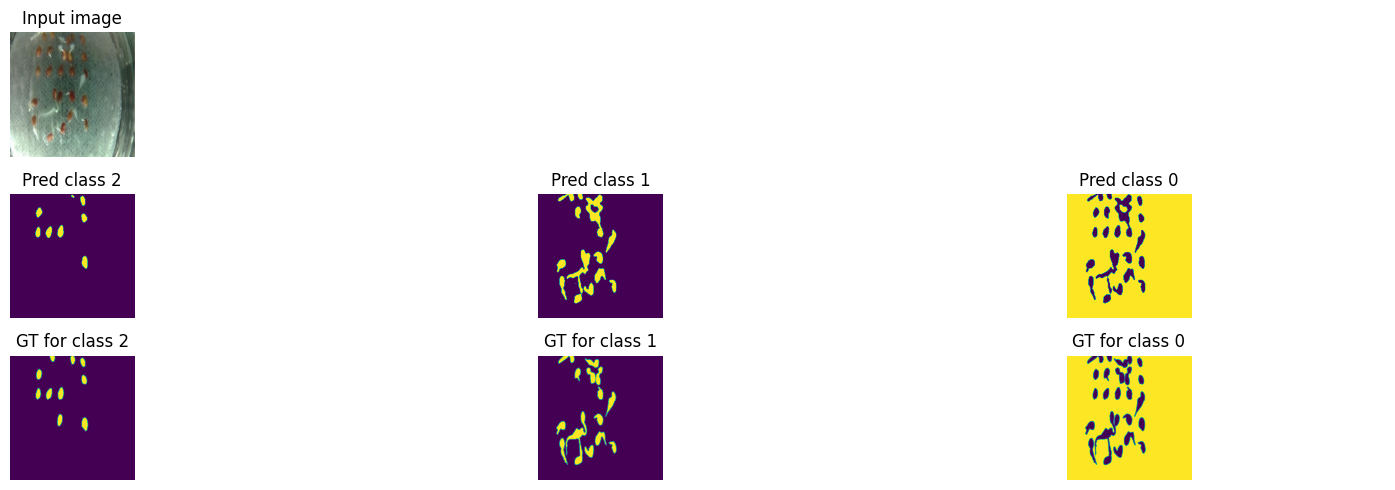

Train loss: 0.25915 | Time: 32m 25s | Val loss: 0.27171
Train_DICE_avg: 0.77414 | Train_Jaccard_avg: 0.71249 | Train_Sensitivity_avg: 0.77380 | Train_Specificity_avg: 0.96561 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98148 | Train_Sensitivity: 0.98724 | Train_Specificity: 0.90279 
Class 1 - Train_DICE: 0.46430 | Train_Jaccard: 0.38122 | Train_Sensitivity: 0.47623 | Train_Specificity: 0.99772 
Class 2 - Train_DICE: 0.86752 | Train_Jaccard: 0.77477 | Train_Sensitivity: 0.85793 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.77760 | Val_Jaccard_avg: 0.72359 | Val_Sensitivity_avg: 0.78508 | Val_Specificity_avg: 0.95581 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99238 | Val_Sensitivity: 0.99711 | Val_Specificity: 0.87269 
Class 1 - Val_DICE: 0.46315 | Val_Jaccard: 0.39124 | Val_Sensitivity: 0.46248 | Val_Specificity: 0.99831 
Class 2 - Val_DICE: 0.87347 | Val_Jaccard: 0.78715 | Val_Sensitivity: 0.89566 | Val_Specificity: 0.99643 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.25298 | Time: 33m 30s | Val loss: 0.24770
Train_DICE_avg: 0.78509 | Train_Jaccard_avg: 0.72410 | Train_Sensitivity_avg: 0.78612 | Train_Specificity_avg: 0.96670 
Class 0 - Train_DICE: 0.99074 | Train_Jaccard: 0.98174 | Train_Sensitivity: 0.98709 | Train_Specificity: 0.90598 
Class 1 - Train_DICE: 0.49519 | Train_Jaccard: 0.41338 | Train_Sensitivity: 0.50921 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.86934 | Train_Jaccard: 0.77717 | Train_Sensitivity: 0.86207 | Train_Specificity: 0.99631 
Val_DICE_avg: 0.80724 | Val_Jaccard_avg: 0.75679 | Val_Sensitivity_avg: 0.83008 | Val_Specificity_avg: 0.96740 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99304 | Val_Sensitivity: 0.99597 | Val_Specificity: 0.90837 
Class 1 - Val_DICE: 0.54265 | Val_Jaccard: 0.47759 | Val_Sensitivity: 0.59789 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.88256 | Val_Jaccard: 0.79975 | Val_Sensitivity: 0.89638 | Val_Specificity: 0.99615 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.24403 | Time: 34m 34s | Val loss: 0.23650
Train_DICE_avg: 0.78921 | Train_Jaccard_avg: 0.72861 | Train_Sensitivity_avg: 0.79089 | Train_Specificity_avg: 0.96628 
Class 0 - Train_DICE: 0.99050 | Train_Jaccard: 0.98128 | Train_Sensitivity: 0.98672 | Train_Specificity: 0.90470 
Class 1 - Train_DICE: 0.50482 | Train_Jaccard: 0.42297 | Train_Sensitivity: 0.51927 | Train_Specificity: 0.99784 
Class 2 - Train_DICE: 0.87231 | Train_Jaccard: 0.78158 | Train_Sensitivity: 0.86667 | Train_Specificity: 0.99629 
Val_DICE_avg: 0.81468 | Val_Jaccard_avg: 0.76537 | Val_Sensitivity_avg: 0.81970 | Val_Specificity_avg: 0.95833 
Class 0 - Val_DICE: 0.99632 | Val_Jaccard: 0.99268 | Val_Sensitivity: 0.99740 | Val_Specificity: 0.87954 
Class 1 - Val_DICE: 0.55965 | Val_Jaccard: 0.49429 | Val_Sensitivity: 0.57223 | Val_Specificity: 0.99832 
Class 2 - Val_DICE: 0.88807 | Val_Jaccard: 0.80915 | Val_Sensitivity: 0.88947 | Val_Specificity: 0.99713 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.23917 | Time: 35m 39s | Val loss: 0.20809
Train_DICE_avg: 0.80291 | Train_Jaccard_avg: 0.74294 | Train_Sensitivity_avg: 0.80913 | Train_Specificity_avg: 0.96530 
Class 0 - Train_DICE: 0.99070 | Train_Jaccard: 0.98167 | Train_Sensitivity: 0.98739 | Train_Specificity: 0.90177 
Class 1 - Train_DICE: 0.54656 | Train_Jaccard: 0.46669 | Train_Sensitivity: 0.57596 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.87148 | Train_Jaccard: 0.78045 | Train_Sensitivity: 0.86405 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.83678 | Val_Jaccard_avg: 0.78769 | Val_Sensitivity_avg: 0.85632 | Val_Specificity_avg: 0.96384 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99305 | Val_Sensitivity: 0.99656 | Val_Specificity: 0.89726 
Class 1 - Val_DICE: 0.62684 | Val_Jaccard: 0.56379 | Val_Sensitivity: 0.66661 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.88701 | Val_Jaccard: 0.80621 | Val_Sensitivity: 0.90579 | Val_Specificity: 0.99622 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.22911 | Time: 36m 44s | Val loss: 0.19856
Train_DICE_avg: 0.82105 | Train_Jaccard_avg: 0.76170 | Train_Sensitivity_avg: 0.83466 | Train_Specificity_avg: 0.96643 
Class 0 - Train_DICE: 0.99052 | Train_Jaccard: 0.98133 | Train_Sensitivity: 0.98673 | Train_Specificity: 0.90529 
Class 1 - Train_DICE: 0.60207 | Train_Jaccard: 0.52466 | Train_Sensitivity: 0.65286 | Train_Specificity: 0.99769 
Class 2 - Train_DICE: 0.87057 | Train_Jaccard: 0.77912 | Train_Sensitivity: 0.86438 | Train_Specificity: 0.99630 
Val_DICE_avg: 0.83385 | Val_Jaccard_avg: 0.78457 | Val_Sensitivity_avg: 0.84289 | Val_Specificity_avg: 0.95612 
Class 0 - Val_DICE: 0.99627 | Val_Jaccard: 0.99259 | Val_Sensitivity: 0.99706 | Val_Specificity: 0.87341 
Class 1 - Val_DICE: 0.61901 | Val_Jaccard: 0.55482 | Val_Sensitivity: 0.64331 | Val_Specificity: 0.99807 
Class 2 - Val_DICE: 0.88627 | Val_Jaccard: 0.80631 | Val_Sensitivity: 0.88829 | Val_Specificity: 0.99689 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


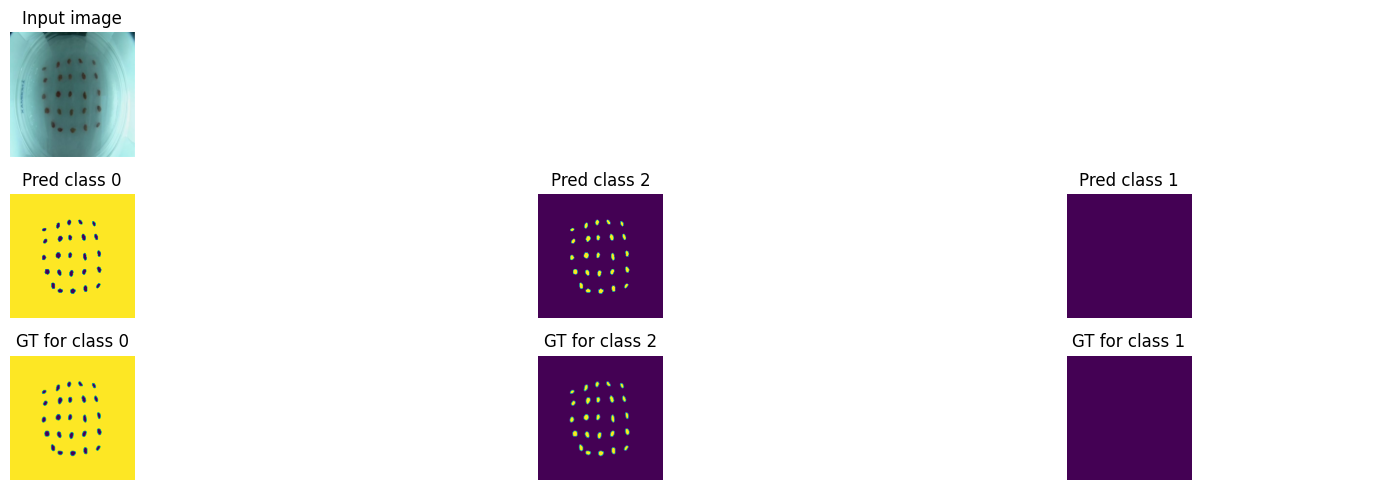

Train loss: 0.21909 | Time: 37m 49s | Val loss: 0.19852
Train_DICE_avg: 0.82302 | Train_Jaccard_avg: 0.76356 | Train_Sensitivity_avg: 0.83663 | Train_Specificity_avg: 0.96603 
Class 0 - Train_DICE: 0.99062 | Train_Jaccard: 0.98152 | Train_Sensitivity: 0.98700 | Train_Specificity: 0.90407 
Class 1 - Train_DICE: 0.60756 | Train_Jaccard: 0.52924 | Train_Sensitivity: 0.65511 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.87086 | Train_Jaccard: 0.77992 | Train_Sensitivity: 0.86778 | Train_Specificity: 0.99627 
Val_DICE_avg: 0.83086 | Val_Jaccard_avg: 0.78194 | Val_Sensitivity_avg: 0.84900 | Val_Specificity_avg: 0.95898 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99284 | Val_Sensitivity: 0.99721 | Val_Specificity: 0.88208 
Class 1 - Val_DICE: 0.61620 | Val_Jaccard: 0.55397 | Val_Sensitivity: 0.64855 | Val_Specificity: 0.99836 
Class 2 - Val_DICE: 0.87997 | Val_Jaccard: 0.79901 | Val_Sensitivity: 0.90125 | Val_Specificity: 0.99649 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.21423 | Time: 38m 53s | Val loss: 0.20660
Train_DICE_avg: 0.82772 | Train_Jaccard_avg: 0.76909 | Train_Sensitivity_avg: 0.84471 | Train_Specificity_avg: 0.96678 
Class 0 - Train_DICE: 0.99090 | Train_Jaccard: 0.98205 | Train_Sensitivity: 0.98740 | Train_Specificity: 0.90633 
Class 1 - Train_DICE: 0.62017 | Train_Jaccard: 0.54355 | Train_Sensitivity: 0.67794 | Train_Specificity: 0.99776 
Class 2 - Train_DICE: 0.87208 | Train_Jaccard: 0.78168 | Train_Sensitivity: 0.86879 | Train_Specificity: 0.99625 
Val_DICE_avg: 0.81959 | Val_Jaccard_avg: 0.77125 | Val_Sensitivity_avg: 0.83144 | Val_Specificity_avg: 0.95727 
Class 0 - Val_DICE: 0.99635 | Val_Jaccard: 0.99275 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.87650 
Class 1 - Val_DICE: 0.57506 | Val_Jaccard: 0.51201 | Val_Sensitivity: 0.60327 | Val_Specificity: 0.99828 
Class 2 - Val_DICE: 0.88736 | Val_Jaccard: 0.80899 | Val_Sensitivity: 0.89365 | Val_Specificity: 0.99702 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.21023 | Time: 39m 58s | Val loss: 0.19556
Train_DICE_avg: 0.82836 | Train_Jaccard_avg: 0.77022 | Train_Sensitivity_avg: 0.84773 | Train_Specificity_avg: 0.96568 
Class 0 - Train_DICE: 0.99105 | Train_Jaccard: 0.98233 | Train_Sensitivity: 0.98814 | Train_Specificity: 0.90300 
Class 1 - Train_DICE: 0.62090 | Train_Jaccard: 0.54530 | Train_Sensitivity: 0.68849 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.87312 | Train_Jaccard: 0.78302 | Train_Sensitivity: 0.86655 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.82785 | Val_Jaccard_avg: 0.77944 | Val_Sensitivity_avg: 0.85225 | Val_Specificity_avg: 0.95637 
Class 0 - Val_DICE: 0.99626 | Val_Jaccard: 0.99257 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.87432 
Class 1 - Val_DICE: 0.60443 | Val_Jaccard: 0.54404 | Val_Sensitivity: 0.68214 | Val_Specificity: 0.99776 
Class 2 - Val_DICE: 0.88287 | Val_Jaccard: 0.80172 | Val_Sensitivity: 0.87756 | Val_Specificity: 0.99704 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.20957 | Time: 41m 2s | Val loss: 0.18850
Train_DICE_avg: 0.82537 | Train_Jaccard_avg: 0.76773 | Train_Sensitivity_avg: 0.84909 | Train_Specificity_avg: 0.96618 
Class 0 - Train_DICE: 0.99101 | Train_Jaccard: 0.98227 | Train_Sensitivity: 0.98793 | Train_Specificity: 0.90459 
Class 1 - Train_DICE: 0.61348 | Train_Jaccard: 0.53997 | Train_Sensitivity: 0.69204 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.87162 | Train_Jaccard: 0.78096 | Train_Sensitivity: 0.86729 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.83552 | Val_Jaccard_avg: 0.78706 | Val_Sensitivity_avg: 0.85767 | Val_Specificity_avg: 0.96345 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99292 | Val_Sensitivity: 0.99680 | Val_Specificity: 0.89580 
Class 1 - Val_DICE: 0.62464 | Val_Jaccard: 0.56253 | Val_Sensitivity: 0.67818 | Val_Specificity: 0.99786 
Class 2 - Val_DICE: 0.88548 | Val_Jaccard: 0.80571 | Val_Sensitivity: 0.89802 | Val_Specificity: 0.99670 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.20500 | Time: 42m 7s | Val loss: 0.18268
Train_DICE_avg: 0.83227 | Train_Jaccard_avg: 0.77422 | Train_Sensitivity_avg: 0.84806 | Train_Specificity_avg: 0.96561 
Class 0 - Train_DICE: 0.99081 | Train_Jaccard: 0.98187 | Train_Sensitivity: 0.98783 | Train_Specificity: 0.90263 
Class 1 - Train_DICE: 0.63126 | Train_Jaccard: 0.55536 | Train_Sensitivity: 0.68719 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.87475 | Train_Jaccard: 0.78543 | Train_Sensitivity: 0.86916 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.84025 | Val_Jaccard_avg: 0.79187 | Val_Sensitivity_avg: 0.85416 | Val_Specificity_avg: 0.96043 
Class 0 - Val_DICE: 0.99646 | Val_Jaccard: 0.99296 | Val_Sensitivity: 0.99698 | Val_Specificity: 0.88649 
Class 1 - Val_DICE: 0.63422 | Val_Jaccard: 0.57040 | Val_Sensitivity: 0.66034 | Val_Specificity: 0.99818 
Class 2 - Val_DICE: 0.89009 | Val_Jaccard: 0.81225 | Val_Sensitivity: 0.90517 | Val_Specificity: 0.99662 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


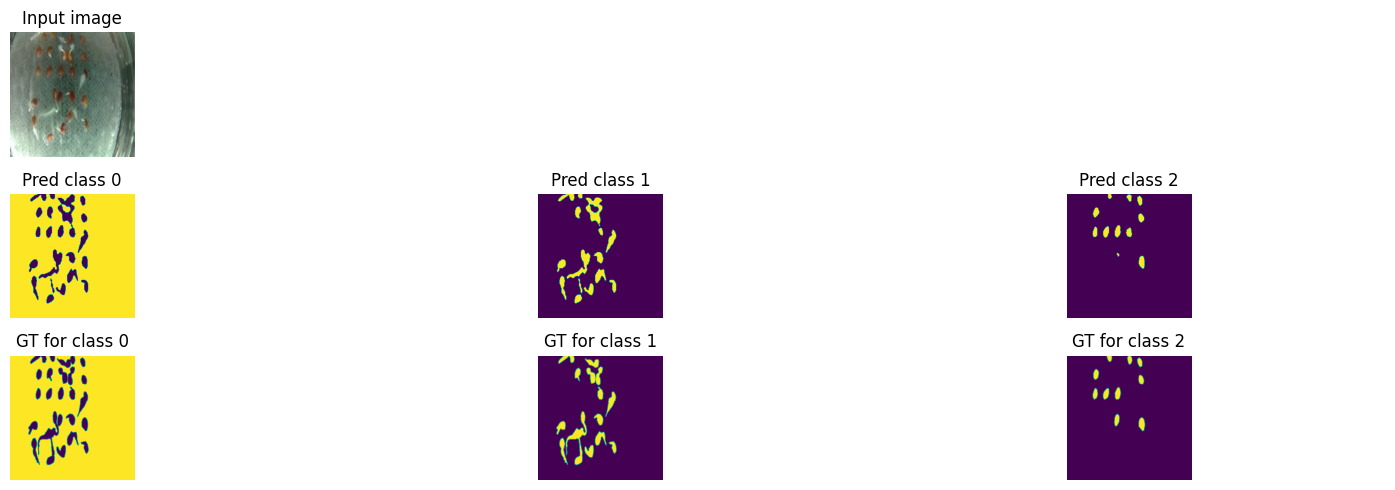

Train loss: 0.20582 | Time: 43m 12s | Val loss: 0.18677
Train_DICE_avg: 0.83403 | Train_Jaccard_avg: 0.77635 | Train_Sensitivity_avg: 0.85572 | Train_Specificity_avg: 0.96620 
Class 0 - Train_DICE: 0.99111 | Train_Jaccard: 0.98246 | Train_Sensitivity: 0.98814 | Train_Specificity: 0.90465 
Class 1 - Train_DICE: 0.63672 | Train_Jaccard: 0.56174 | Train_Sensitivity: 0.70873 | Train_Specificity: 0.99766 
Class 2 - Train_DICE: 0.87425 | Train_Jaccard: 0.78485 | Train_Sensitivity: 0.87029 | Train_Specificity: 0.99629 
Val_DICE_avg: 0.83712 | Val_Jaccard_avg: 0.79032 | Val_Sensitivity_avg: 0.85956 | Val_Specificity_avg: 0.96126 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99303 | Val_Sensitivity: 0.99708 | Val_Specificity: 0.88892 
Class 1 - Val_DICE: 0.62536 | Val_Jaccard: 0.56650 | Val_Sensitivity: 0.68046 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.88951 | Val_Jaccard: 0.81144 | Val_Sensitivity: 0.90114 | Val_Specificity: 0.99683 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.20530 | Time: 44m 16s | Val loss: 0.18343
Train_DICE_avg: 0.83425 | Train_Jaccard_avg: 0.77773 | Train_Sensitivity_avg: 0.86286 | Train_Specificity_avg: 0.96484 
Class 0 - Train_DICE: 0.99117 | Train_Jaccard: 0.98259 | Train_Sensitivity: 0.98848 | Train_Specificity: 0.90052 
Class 1 - Train_DICE: 0.63671 | Train_Jaccard: 0.56478 | Train_Sensitivity: 0.73017 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.87486 | Train_Jaccard: 0.78581 | Train_Sensitivity: 0.86995 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.84022 | Val_Jaccard_avg: 0.79253 | Val_Sensitivity_avg: 0.85629 | Val_Specificity_avg: 0.95599 
Class 0 - Val_DICE: 0.99619 | Val_Jaccard: 0.99244 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.87259 
Class 1 - Val_DICE: 0.63280 | Val_Jaccard: 0.57107 | Val_Sensitivity: 0.67790 | Val_Specificity: 0.99837 
Class 2 - Val_DICE: 0.89166 | Val_Jaccard: 0.81408 | Val_Sensitivity: 0.89339 | Val_Specificity: 0.99702 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.20386 | Time: 45m 21s | Val loss: 0.18443
Train_DICE_avg: 0.84001 | Train_Jaccard_avg: 0.78393 | Train_Sensitivity_avg: 0.87483 | Train_Specificity_avg: 0.96496 
Class 0 - Train_DICE: 0.99109 | Train_Jaccard: 0.98242 | Train_Sensitivity: 0.98822 | Train_Specificity: 0.90103 
Class 1 - Train_DICE: 0.65490 | Train_Jaccard: 0.58498 | Train_Sensitivity: 0.76843 | Train_Specificity: 0.99749 
Class 2 - Train_DICE: 0.87404 | Train_Jaccard: 0.78440 | Train_Sensitivity: 0.86783 | Train_Specificity: 0.99637 
Val_DICE_avg: 0.86784 | Val_Jaccard_avg: 0.81990 | Val_Sensitivity_avg: 0.89708 | Val_Specificity_avg: 0.96131 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99308 | Val_Sensitivity: 0.99712 | Val_Specificity: 0.88953 
Class 1 - Val_DICE: 0.71859 | Val_Jaccard: 0.65717 | Val_Sensitivity: 0.78518 | Val_Specificity: 0.99789 
Class 2 - Val_DICE: 0.88840 | Val_Jaccard: 0.80944 | Val_Sensitivity: 0.90894 | Val_Specificity: 0.99653 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.19730 | Time: 46m 26s | Val loss: 0.15354
Train_DICE_avg: 0.85150 | Train_Jaccard_avg: 0.79563 | Train_Sensitivity_avg: 0.89043 | Train_Specificity_avg: 0.96616 
Class 0 - Train_DICE: 0.99074 | Train_Jaccard: 0.98174 | Train_Sensitivity: 0.98738 | Train_Specificity: 0.90480 
Class 1 - Train_DICE: 0.68935 | Train_Jaccard: 0.62048 | Train_Sensitivity: 0.81290 | Train_Specificity: 0.99743 
Class 2 - Train_DICE: 0.87440 | Train_Jaccard: 0.78465 | Train_Sensitivity: 0.87102 | Train_Specificity: 0.99625 
Val_DICE_avg: 0.87205 | Val_Jaccard_avg: 0.82404 | Val_Sensitivity_avg: 0.91177 | Val_Specificity_avg: 0.96127 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99702 | Val_Specificity: 0.88981 
Class 1 - Val_DICE: 0.73521 | Val_Jaccard: 0.67650 | Val_Sensitivity: 0.83596 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.88450 | Val_Jaccard: 0.80271 | Val_Sensitivity: 0.90234 | Val_Specificity: 0.99646 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.19287 | Time: 47m 30s | Val loss: 0.14262
Train_DICE_avg: 0.84640 | Train_Jaccard_avg: 0.78976 | Train_Sensitivity_avg: 0.87798 | Train_Specificity_avg: 0.96556 
Class 0 - Train_DICE: 0.99087 | Train_Jaccard: 0.98199 | Train_Sensitivity: 0.98772 | Train_Specificity: 0.90292 
Class 1 - Train_DICE: 0.67442 | Train_Jaccard: 0.60331 | Train_Sensitivity: 0.77605 | Train_Specificity: 0.99750 
Class 2 - Train_DICE: 0.87391 | Train_Jaccard: 0.78399 | Train_Sensitivity: 0.87017 | Train_Specificity: 0.99626 
Val_DICE_avg: 0.88283 | Val_Jaccard_avg: 0.83501 | Val_Sensitivity_avg: 0.90400 | Val_Specificity_avg: 0.95702 
Class 0 - Val_DICE: 0.99642 | Val_Jaccard: 0.99288 | Val_Sensitivity: 0.99716 | Val_Specificity: 0.87625 
Class 1 - Val_DICE: 0.76209 | Val_Jaccard: 0.69976 | Val_Sensitivity: 0.81838 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.88999 | Val_Jaccard: 0.81240 | Val_Sensitivity: 0.89646 | Val_Specificity: 0.99691 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


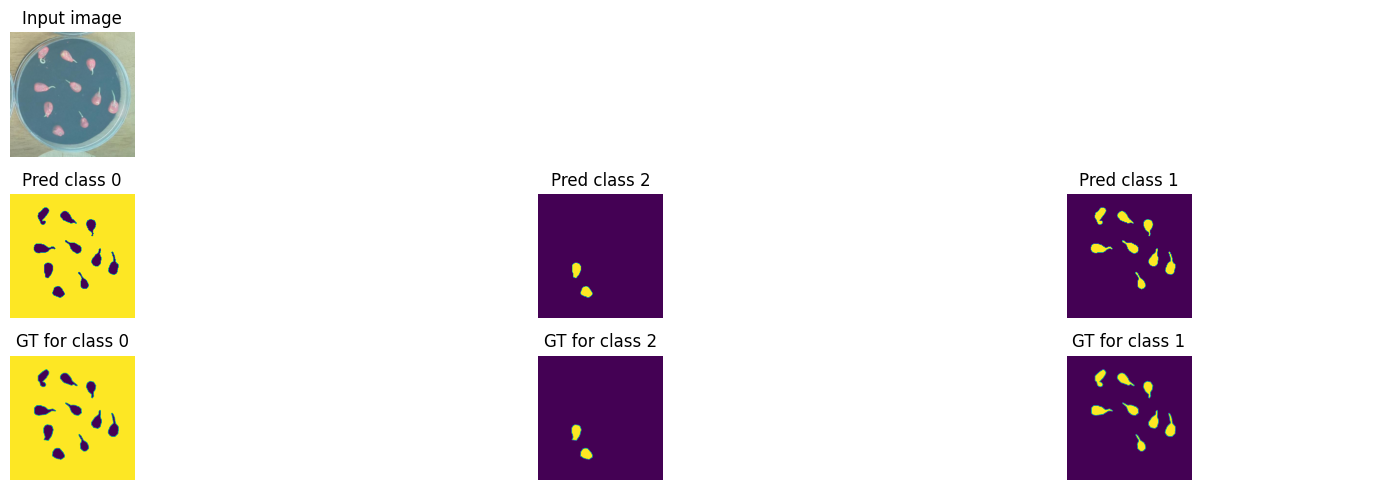

Train loss: 0.18902 | Time: 48m 35s | Val loss: 0.14021
Train_DICE_avg: 0.85056 | Train_Jaccard_avg: 0.79356 | Train_Sensitivity_avg: 0.87543 | Train_Specificity_avg: 0.96509 
Class 0 - Train_DICE: 0.99124 | Train_Jaccard: 0.98271 | Train_Sensitivity: 0.98848 | Train_Specificity: 0.90141 
Class 1 - Train_DICE: 0.68502 | Train_Jaccard: 0.61139 | Train_Sensitivity: 0.76690 | Train_Specificity: 0.99754 
Class 2 - Train_DICE: 0.87541 | Train_Jaccard: 0.78656 | Train_Sensitivity: 0.87093 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.88241 | Val_Jaccard_avg: 0.83596 | Val_Sensitivity_avg: 0.91112 | Val_Specificity_avg: 0.95784 
Class 0 - Val_DICE: 0.99648 | Val_Jaccard: 0.99300 | Val_Sensitivity: 0.99733 | Val_Specificity: 0.87874 
Class 1 - Val_DICE: 0.75960 | Val_Jaccard: 0.70014 | Val_Sensitivity: 0.83165 | Val_Specificity: 0.99802 
Class 2 - Val_DICE: 0.89116 | Val_Jaccard: 0.81474 | Val_Sensitivity: 0.90438 | Val_Specificity: 0.99675 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.18872 | Time: 49m 40s | Val loss: 0.13635
Train_DICE_avg: 0.85064 | Train_Jaccard_avg: 0.79308 | Train_Sensitivity_avg: 0.87691 | Train_Specificity_avg: 0.96386 
Class 0 - Train_DICE: 0.99120 | Train_Jaccard: 0.98264 | Train_Sensitivity: 0.98869 | Train_Specificity: 0.89775 
Class 1 - Train_DICE: 0.68737 | Train_Jaccard: 0.61327 | Train_Sensitivity: 0.77199 | Train_Specificity: 0.99757 
Class 2 - Train_DICE: 0.87336 | Train_Jaccard: 0.78334 | Train_Sensitivity: 0.87004 | Train_Specificity: 0.99625 
Val_DICE_avg: 0.88537 | Val_Jaccard_avg: 0.83775 | Val_Sensitivity_avg: 0.90834 | Val_Specificity_avg: 0.95984 
Class 0 - Val_DICE: 0.99655 | Val_Jaccard: 0.99313 | Val_Sensitivity: 0.99720 | Val_Specificity: 0.88486 
Class 1 - Val_DICE: 0.76849 | Val_Jaccard: 0.70654 | Val_Sensitivity: 0.82460 | Val_Specificity: 0.99798 
Class 2 - Val_DICE: 0.89108 | Val_Jaccard: 0.81356 | Val_Sensitivity: 0.90321 | Val_Specificity: 0.99667 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.18271 | Time: 50m 44s | Val loss: 0.13571
Train_DICE_avg: 0.85680 | Train_Jaccard_avg: 0.79918 | Train_Sensitivity_avg: 0.88003 | Train_Specificity_avg: 0.96578 
Class 0 - Train_DICE: 0.99110 | Train_Jaccard: 0.98245 | Train_Sensitivity: 0.98815 | Train_Specificity: 0.90346 
Class 1 - Train_DICE: 0.70381 | Train_Jaccard: 0.62828 | Train_Sensitivity: 0.77994 | Train_Specificity: 0.99755 
Class 2 - Train_DICE: 0.87550 | Train_Jaccard: 0.78682 | Train_Sensitivity: 0.87199 | Train_Specificity: 0.99633 
Val_DICE_avg: 0.88703 | Val_Jaccard_avg: 0.83888 | Val_Sensitivity_avg: 0.90811 | Val_Specificity_avg: 0.95754 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99293 | Val_Sensitivity: 0.99745 | Val_Specificity: 0.87787 
Class 1 - Val_DICE: 0.77299 | Val_Jaccard: 0.70967 | Val_Sensitivity: 0.82813 | Val_Specificity: 0.99794 
Class 2 - Val_DICE: 0.89165 | Val_Jaccard: 0.81403 | Val_Sensitivity: 0.89876 | Val_Specificity: 0.99680 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.18072 | Time: 51m 49s | Val loss: 0.13431
Train_DICE_avg: 0.85709 | Train_Jaccard_avg: 0.79995 | Train_Sensitivity_avg: 0.88165 | Train_Specificity_avg: 0.96365 
Class 0 - Train_DICE: 0.99117 | Train_Jaccard: 0.98257 | Train_Sensitivity: 0.98880 | Train_Specificity: 0.89696 
Class 1 - Train_DICE: 0.70375 | Train_Jaccard: 0.62943 | Train_Sensitivity: 0.78444 | Train_Specificity: 0.99761 
Class 2 - Train_DICE: 0.87636 | Train_Jaccard: 0.78784 | Train_Sensitivity: 0.87170 | Train_Specificity: 0.99637 
Val_DICE_avg: 0.88632 | Val_Jaccard_avg: 0.83815 | Val_Sensitivity_avg: 0.91256 | Val_Specificity_avg: 0.96029 
Class 0 - Val_DICE: 0.99656 | Val_Jaccard: 0.99316 | Val_Sensitivity: 0.99718 | Val_Specificity: 0.88646 
Class 1 - Val_DICE: 0.77022 | Val_Jaccard: 0.70657 | Val_Sensitivity: 0.83110 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.89219 | Val_Jaccard: 0.81471 | Val_Sensitivity: 0.90941 | Val_Specificity: 0.99650 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.17579 | Time: 52m 55s | Val loss: 0.13536
Train_DICE_avg: 0.86110 | Train_Jaccard_avg: 0.80401 | Train_Sensitivity_avg: 0.88485 | Train_Specificity_avg: 0.96570 
Class 0 - Train_DICE: 0.99110 | Train_Jaccard: 0.98244 | Train_Sensitivity: 0.98844 | Train_Specificity: 0.90309 
Class 1 - Train_DICE: 0.71451 | Train_Jaccard: 0.63972 | Train_Sensitivity: 0.79191 | Train_Specificity: 0.99763 
Class 2 - Train_DICE: 0.87768 | Train_Jaccard: 0.78986 | Train_Sensitivity: 0.87420 | Train_Specificity: 0.99637 
Val_DICE_avg: 0.88515 | Val_Jaccard_avg: 0.83664 | Val_Sensitivity_avg: 0.90630 | Val_Specificity_avg: 0.95803 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99292 | Val_Sensitivity: 0.99735 | Val_Specificity: 0.87944 
Class 1 - Val_DICE: 0.76643 | Val_Jaccard: 0.70173 | Val_Sensitivity: 0.81342 | Val_Specificity: 0.99805 
Class 2 - Val_DICE: 0.89257 | Val_Jaccard: 0.81526 | Val_Sensitivity: 0.90812 | Val_Specificity: 0.99659 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


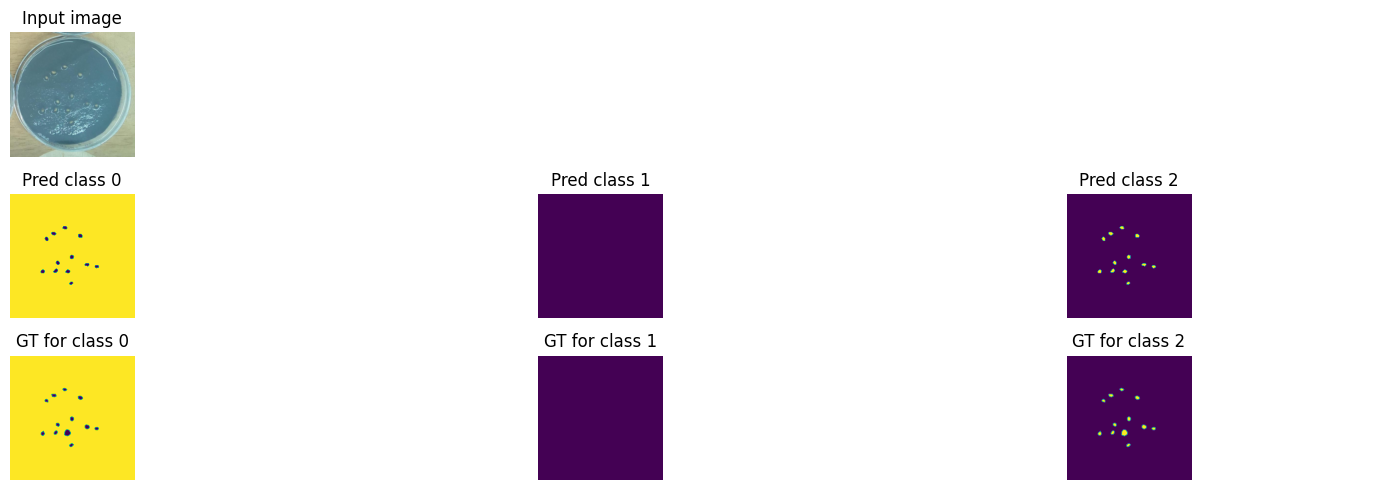

Train loss: 0.17818 | Time: 54m 1s | Val loss: 0.13812
Train_DICE_avg: 0.86199 | Train_Jaccard_avg: 0.80512 | Train_Sensitivity_avg: 0.88681 | Train_Specificity_avg: 0.96446 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98302 | Train_Sensitivity: 0.98904 | Train_Specificity: 0.89939 
Class 1 - Train_DICE: 0.71631 | Train_Jaccard: 0.64147 | Train_Sensitivity: 0.79631 | Train_Specificity: 0.99761 
Class 2 - Train_DICE: 0.87827 | Train_Jaccard: 0.79087 | Train_Sensitivity: 0.87508 | Train_Specificity: 0.99637 
Val_DICE_avg: 0.88563 | Val_Jaccard_avg: 0.83710 | Val_Sensitivity_avg: 0.90149 | Val_Specificity_avg: 0.95705 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99287 | Val_Sensitivity: 0.99746 | Val_Specificity: 0.87621 
Class 1 - Val_DICE: 0.76649 | Val_Jaccard: 0.70027 | Val_Sensitivity: 0.80154 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.89399 | Val_Jaccard: 0.81817 | Val_Sensitivity: 0.90548 | Val_Specificity: 0.99683 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.17561 | Time: 55m 7s | Val loss: 0.13025
Train_DICE_avg: 0.86222 | Train_Jaccard_avg: 0.80482 | Train_Sensitivity_avg: 0.88178 | Train_Specificity_avg: 0.96359 
Class 0 - Train_DICE: 0.99127 | Train_Jaccard: 0.98278 | Train_Sensitivity: 0.98909 | Train_Specificity: 0.89668 
Class 1 - Train_DICE: 0.71588 | Train_Jaccard: 0.63922 | Train_Sensitivity: 0.77989 | Train_Specificity: 0.99769 
Class 2 - Train_DICE: 0.87952 | Train_Jaccard: 0.79244 | Train_Sensitivity: 0.87636 | Train_Specificity: 0.99640 
Val_DICE_avg: 0.89066 | Val_Jaccard_avg: 0.84303 | Val_Sensitivity_avg: 0.90462 | Val_Specificity_avg: 0.95919 
Class 0 - Val_DICE: 0.99653 | Val_Jaccard: 0.99310 | Val_Sensitivity: 0.99742 | Val_Specificity: 0.88255 
Class 1 - Val_DICE: 0.77916 | Val_Jaccard: 0.71405 | Val_Sensitivity: 0.80505 | Val_Specificity: 0.99824 
Class 2 - Val_DICE: 0.89629 | Val_Jaccard: 0.82195 | Val_Sensitivity: 0.91138 | Val_Specificity: 0.99676 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.17587 | Time: 56m 12s | Val loss: 0.13170
Train_DICE_avg: 0.86482 | Train_Jaccard_avg: 0.80804 | Train_Sensitivity_avg: 0.88841 | Train_Specificity_avg: 0.96359 
Class 0 - Train_DICE: 0.99125 | Train_Jaccard: 0.98273 | Train_Sensitivity: 0.98908 | Train_Specificity: 0.89663 
Class 1 - Train_DICE: 0.72348 | Train_Jaccard: 0.64835 | Train_Sensitivity: 0.80064 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.87974 | Train_Jaccard: 0.79303 | Train_Sensitivity: 0.87550 | Train_Specificity: 0.99646 
Val_DICE_avg: 0.88760 | Val_Jaccard_avg: 0.83980 | Val_Sensitivity_avg: 0.90797 | Val_Specificity_avg: 0.96112 
Class 0 - Val_DICE: 0.99659 | Val_Jaccard: 0.99322 | Val_Sensitivity: 0.99720 | Val_Specificity: 0.88867 
Class 1 - Val_DICE: 0.77116 | Val_Jaccard: 0.70693 | Val_Sensitivity: 0.81563 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.89506 | Val_Jaccard: 0.81924 | Val_Sensitivity: 0.91108 | Val_Specificity: 0.99656 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.17518 | Time: 57m 17s | Val loss: 0.12970
Train_DICE_avg: 0.86535 | Train_Jaccard_avg: 0.80895 | Train_Sensitivity_avg: 0.89020 | Train_Specificity_avg: 0.96477 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98298 | Train_Sensitivity: 0.98911 | Train_Specificity: 0.90016 
Class 1 - Train_DICE: 0.72511 | Train_Jaccard: 0.65133 | Train_Sensitivity: 0.80816 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.87957 | Train_Jaccard: 0.79255 | Train_Sensitivity: 0.87333 | Train_Specificity: 0.99651 
Val_DICE_avg: 0.88943 | Val_Jaccard_avg: 0.84122 | Val_Sensitivity_avg: 0.91431 | Val_Specificity_avg: 0.96086 
Class 0 - Val_DICE: 0.99658 | Val_Jaccard: 0.99321 | Val_Sensitivity: 0.99730 | Val_Specificity: 0.88801 
Class 1 - Val_DICE: 0.78013 | Val_Jaccard: 0.71607 | Val_Sensitivity: 0.83425 | Val_Specificity: 0.99799 
Class 2 - Val_DICE: 0.89157 | Val_Jaccard: 0.81439 | Val_Sensitivity: 0.91137 | Val_Specificity: 0.99659 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.17546 | Time: 58m 22s | Val loss: 0.12951
Train_DICE_avg: 0.86603 | Train_Jaccard_avg: 0.80980 | Train_Sensitivity_avg: 0.89096 | Train_Specificity_avg: 0.96490 
Class 0 - Train_DICE: 0.99157 | Train_Jaccard: 0.98337 | Train_Sensitivity: 0.98937 | Train_Specificity: 0.90059 
Class 1 - Train_DICE: 0.72592 | Train_Jaccard: 0.65191 | Train_Sensitivity: 0.80707 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.88060 | Train_Jaccard: 0.79412 | Train_Sensitivity: 0.87644 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.88940 | Val_Jaccard_avg: 0.84204 | Val_Sensitivity_avg: 0.91484 | Val_Specificity_avg: 0.95873 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99307 | Val_Sensitivity: 0.99742 | Val_Specificity: 0.88143 
Class 1 - Val_DICE: 0.77683 | Val_Jaccard: 0.71427 | Val_Sensitivity: 0.84312 | Val_Specificity: 0.99794 
Class 2 - Val_DICE: 0.89486 | Val_Jaccard: 0.81877 | Val_Sensitivity: 0.90399 | Val_Specificity: 0.99681 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


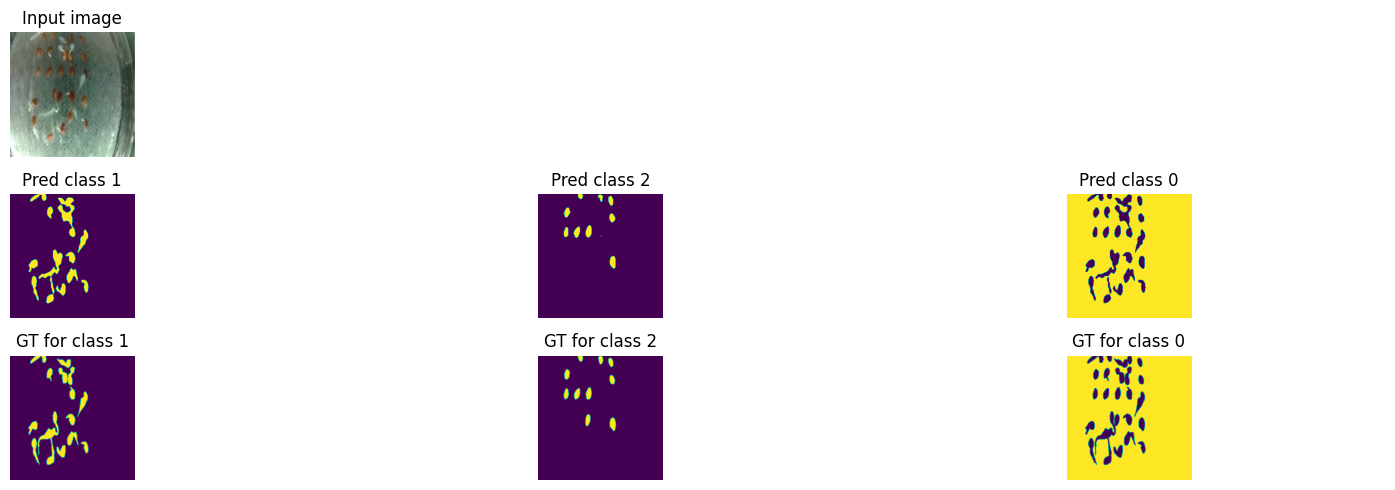

Train loss: 0.17363 | Time: 59m 26s | Val loss: 0.12921
Train_DICE_avg: 0.86663 | Train_Jaccard_avg: 0.81068 | Train_Sensitivity_avg: 0.89424 | Train_Specificity_avg: 0.96485 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98301 | Train_Sensitivity: 0.98913 | Train_Specificity: 0.90036 
Class 1 - Train_DICE: 0.72746 | Train_Jaccard: 0.65434 | Train_Sensitivity: 0.81862 | Train_Specificity: 0.99766 
Class 2 - Train_DICE: 0.88103 | Train_Jaccard: 0.79470 | Train_Sensitivity: 0.87498 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.88965 | Val_Jaccard_avg: 0.84230 | Val_Sensitivity_avg: 0.91125 | Val_Specificity_avg: 0.95433 
Class 0 - Val_DICE: 0.99633 | Val_Jaccard: 0.99270 | Val_Sensitivity: 0.99764 | Val_Specificity: 0.86781 
Class 1 - Val_DICE: 0.77811 | Val_Jaccard: 0.71572 | Val_Sensitivity: 0.84134 | Val_Specificity: 0.99802 
Class 2 - Val_DICE: 0.89451 | Val_Jaccard: 0.81848 | Val_Sensitivity: 0.89476 | Val_Specificity: 0.99715 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.17267 | Time: 60m 31s | Val loss: 0.12728
Train_DICE_avg: 0.86569 | Train_Jaccard_avg: 0.80964 | Train_Sensitivity_avg: 0.89184 | Train_Specificity_avg: 0.96502 
Class 0 - Train_DICE: 0.99141 | Train_Jaccard: 0.98304 | Train_Sensitivity: 0.98906 | Train_Specificity: 0.90089 
Class 1 - Train_DICE: 0.72431 | Train_Jaccard: 0.65068 | Train_Sensitivity: 0.80918 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.88135 | Train_Jaccard: 0.79520 | Train_Sensitivity: 0.87727 | Train_Specificity: 0.99647 
Val_DICE_avg: 0.89117 | Val_Jaccard_avg: 0.84362 | Val_Sensitivity_avg: 0.91273 | Val_Specificity_avg: 0.95553 
Class 0 - Val_DICE: 0.99638 | Val_Jaccard: 0.99281 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.87143 
Class 1 - Val_DICE: 0.78206 | Val_Jaccard: 0.71846 | Val_Sensitivity: 0.84310 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.89506 | Val_Jaccard: 0.81959 | Val_Sensitivity: 0.89750 | Val_Specificity: 0.99711 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.17009 | Time: 61m 35s | Val loss: 0.12689
Train_DICE_avg: 0.86732 | Train_Jaccard_avg: 0.81151 | Train_Sensitivity_avg: 0.89125 | Train_Specificity_avg: 0.96398 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98325 | Train_Sensitivity: 0.98941 | Train_Specificity: 0.89778 
Class 1 - Train_DICE: 0.72889 | Train_Jaccard: 0.65552 | Train_Sensitivity: 0.80497 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.88156 | Train_Jaccard: 0.79575 | Train_Sensitivity: 0.87938 | Train_Specificity: 0.99641 
Val_DICE_avg: 0.89201 | Val_Jaccard_avg: 0.84428 | Val_Sensitivity_avg: 0.91309 | Val_Specificity_avg: 0.95659 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99298 | Val_Sensitivity: 0.99757 | Val_Specificity: 0.87479 
Class 1 - Val_DICE: 0.78321 | Val_Jaccard: 0.71855 | Val_Sensitivity: 0.84210 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.89634 | Val_Jaccard: 0.82132 | Val_Sensitivity: 0.89960 | Val_Specificity: 0.99708 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.17376 | Time: 62m 39s | Val loss: 0.12671
Train_DICE_avg: 0.86596 | Train_Jaccard_avg: 0.80991 | Train_Sensitivity_avg: 0.89251 | Train_Specificity_avg: 0.96430 
Class 0 - Train_DICE: 0.99155 | Train_Jaccard: 0.98333 | Train_Sensitivity: 0.98943 | Train_Specificity: 0.89875 
Class 1 - Train_DICE: 0.72511 | Train_Jaccard: 0.65132 | Train_Sensitivity: 0.81067 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.88121 | Train_Jaccard: 0.79508 | Train_Sensitivity: 0.87744 | Train_Specificity: 0.99646 
Val_DICE_avg: 0.89130 | Val_Jaccard_avg: 0.84407 | Val_Sensitivity_avg: 0.91284 | Val_Specificity_avg: 0.95842 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99305 | Val_Sensitivity: 0.99738 | Val_Specificity: 0.88032 
Class 1 - Val_DICE: 0.78107 | Val_Jaccard: 0.71782 | Val_Sensitivity: 0.83378 | Val_Specificity: 0.99805 
Class 2 - Val_DICE: 0.89631 | Val_Jaccard: 0.82133 | Val_Sensitivity: 0.90736 | Val_Specificity: 0.99689 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.16978 | Time: 63m 43s | Val loss: 0.12472
Train_DICE_avg: 0.86560 | Train_Jaccard_avg: 0.80922 | Train_Sensitivity_avg: 0.88802 | Train_Specificity_avg: 0.96489 
Class 0 - Train_DICE: 0.99141 | Train_Jaccard: 0.98305 | Train_Sensitivity: 0.98919 | Train_Specificity: 0.90039 
Class 1 - Train_DICE: 0.72397 | Train_Jaccard: 0.64915 | Train_Sensitivity: 0.79697 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.88142 | Train_Jaccard: 0.79546 | Train_Sensitivity: 0.87789 | Train_Specificity: 0.99648 
Val_DICE_avg: 0.89494 | Val_Jaccard_avg: 0.84779 | Val_Sensitivity_avg: 0.91403 | Val_Specificity_avg: 0.95730 
Class 0 - Val_DICE: 0.99646 | Val_Jaccard: 0.99297 | Val_Sensitivity: 0.99752 | Val_Specificity: 0.87675 
Class 1 - Val_DICE: 0.79207 | Val_Jaccard: 0.72879 | Val_Sensitivity: 0.83805 | Val_Specificity: 0.99814 
Class 2 - Val_DICE: 0.89629 | Val_Jaccard: 0.82162 | Val_Sensitivity: 0.90653 | Val_Specificity: 0.99702 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


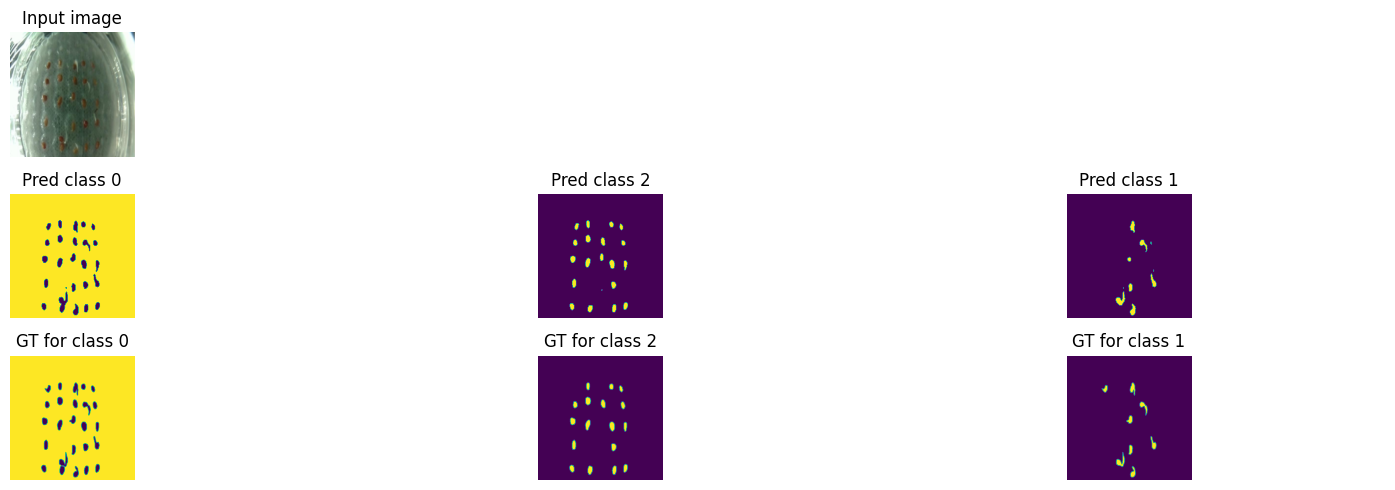

Train loss: 0.17338 | Time: 64m 48s | Val loss: 0.12479
Train_DICE_avg: 0.86617 | Train_Jaccard_avg: 0.80974 | Train_Sensitivity_avg: 0.88548 | Train_Specificity_avg: 0.96382 
Class 0 - Train_DICE: 0.99165 | Train_Jaccard: 0.98351 | Train_Sensitivity: 0.98987 | Train_Specificity: 0.89720 
Class 1 - Train_DICE: 0.72515 | Train_Jaccard: 0.64984 | Train_Sensitivity: 0.78874 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.88170 | Train_Jaccard: 0.79586 | Train_Sensitivity: 0.87783 | Train_Specificity: 0.99646 
Val_DICE_avg: 0.89297 | Val_Jaccard_avg: 0.84611 | Val_Sensitivity_avg: 0.91408 | Val_Specificity_avg: 0.95788 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99303 | Val_Sensitivity: 0.99749 | Val_Specificity: 0.87861 
Class 1 - Val_DICE: 0.78427 | Val_Jaccard: 0.72132 | Val_Sensitivity: 0.84129 | Val_Specificity: 0.99801 
Class 2 - Val_DICE: 0.89816 | Val_Jaccard: 0.82399 | Val_Sensitivity: 0.90345 | Val_Specificity: 0.99702 


wandb: uploading artifact best_model; uploading wandb-summary.json
wandb: uploading artifact best_model
wandb: uploading history steps 59-60, summary, console lines 787-796
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▂▂▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇███████████
wandb:       Training Jaccard ▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇████████████
wandb:          Training Loss ██▇▇▇▆▆▆▆▅▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▂▂▂▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇██████████████
wandb:   Training Specificity ▁▃▄▄▅▆▆▇▇▇▇▇████████████████████████████
wandb:        Validation DICE ▁▁▃▃▃▄▄▄▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████████████
wandb:     Validation Jaccard ▁▁▂▂▂▂▃▃▃▃▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████████████
wandb:        Validation Loss ██▇▇▇▆▆▆▆▆▅▅▅▅▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▂▂▂▂▃▃▃▃▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█████████████
wandb: Validation Specificity ▁▅▃▃▃▄▅▄▆▆██▇██▇▆▇█▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
wa


Training complete!


In [29]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [30]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [31]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]



Global Performance Metrics:
Loss mean: 0.13292, std: 0.02165
Dice Coefficient mean: 0.86722, std: 0.11270
Jaccard Index mean: 0.81073, std: 0.12545
Sensitivity mean: 0.89188, std: 0.10139
Specificity mean: 0.96308, std: 0.02514

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99575, std: 0.00212
Jaccard mean: 0.99154, std: 0.00419
Sensitivity mean: 0.99516, std: 0.00259
Specificity mean: 0.89529, std: 0.07579

Class 1:
Dice mean: 0.73563, std: 0.31746
Jaccard mean: 0.66378, std: 0.33056
Sensitivity mean: 0.79518, std: 0.29002
Specificity mean: 0.99784, std: 0.00355

Class 2:
Dice mean: 0.87028, std: 0.07103
Jaccard mean: 0.77686, std: 0.10178
Sensitivity mean: 0.88531, std: 0.08939
Specificity mean: 0.99609, std: 0.00263


### Cross-Entropy Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Backbone"] = "mobilenetv3"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-MobileNetV3-CrossEntropy"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.44 GB
GPU Memory - Reserved: 1.66 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_215419-c0nwnvb0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-MobileNetV3-CrossEntropy
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/c0nwnvb0



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


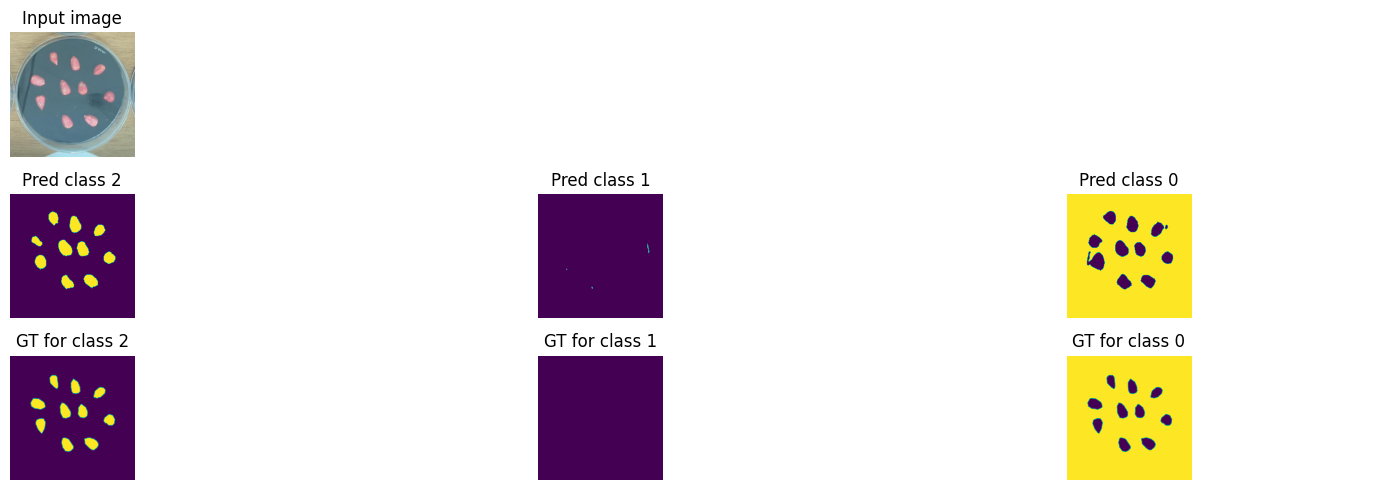

Train loss: 0.59702 | Time: 1m 1s | Val loss: 0.48723
Train_DICE_avg: 0.39282 | Train_Jaccard_avg: 0.30880 | Train_Sensitivity_avg: 0.74038 | Train_Specificity_avg: 0.69063 
Class 0 - Train_DICE: 0.39094 | Train_Jaccard: 0.27861 | Train_Sensitivity: 0.99699 | Train_Specificity: 0.09339 
Class 1 - Train_DICE: 0.19167 | Train_Jaccard: 0.18878 | Train_Sensitivity: 0.69081 | Train_Specificity: 0.98579 
Class 2 - Train_DICE: 0.59585 | Train_Jaccard: 0.45901 | Train_Sensitivity: 0.53333 | Train_Specificity: 0.99271 
Val_DICE_avg: 0.62178 | Val_Jaccard_avg: 0.54771 | Val_Sensitivity_avg: 0.94745 | Val_Specificity_avg: 0.69734 
Class 0 - Val_DICE: 0.88858 | Val_Jaccard: 0.80121 | Val_Sensitivity: 0.99783 | Val_Specificity: 0.12603 
Class 1 - Val_DICE: 0.43651 | Val_Jaccard: 0.43651 | Val_Sensitivity: 0.96825 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54025 | Val_Jaccard: 0.40542 | Val_Sensitivity: 0.87626 | Val_Specificity: 0.97764 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.46778 | Time: 2m 1s | Val loss: 0.43298
Train_DICE_avg: 0.61964 | Train_Jaccard_avg: 0.54724 | Train_Sensitivity_avg: 0.86840 | Train_Specificity_avg: 0.74716 
Class 0 - Train_DICE: 0.89702 | Train_Jaccard: 0.81658 | Train_Sensitivity: 0.99764 | Train_Specificity: 0.26426 
Class 1 - Train_DICE: 0.24963 | Train_Jaccard: 0.24814 | Train_Sensitivity: 0.87771 | Train_Specificity: 0.98592 
Class 2 - Train_DICE: 0.71227 | Train_Jaccard: 0.57699 | Train_Sensitivity: 0.72986 | Train_Specificity: 0.99130 
Val_DICE_avg: 0.60863 | Val_Jaccard_avg: 0.55652 | Val_Sensitivity_avg: 0.96586 | Val_Specificity_avg: 0.74063 
Class 0 - Val_DICE: 0.96030 | Val_Jaccard: 0.92429 | Val_Sensitivity: 0.99636 | Val_Specificity: 0.26177 
Class 1 - Val_DICE: 0.46032 | Val_Jaccard: 0.46032 | Val_Sensitivity: 0.98810 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.40527 | Val_Jaccard: 0.28496 | Val_Sensitivity: 0.91314 | Val_Specificity: 0.97177 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.41041 | Time: 3m 2s | Val loss: 0.38392
Train_DICE_avg: 0.64625 | Train_Jaccard_avg: 0.58772 | Train_Sensitivity_avg: 0.89993 | Train_Specificity_avg: 0.79576 
Class 0 - Train_DICE: 0.95601 | Train_Jaccard: 0.91622 | Train_Sensitivity: 0.99679 | Train_Specificity: 0.41221 
Class 1 - Train_DICE: 0.26472 | Train_Jaccard: 0.26335 | Train_Sensitivity: 0.91374 | Train_Specificity: 0.98575 
Class 2 - Train_DICE: 0.71800 | Train_Jaccard: 0.58358 | Train_Sensitivity: 0.78925 | Train_Specificity: 0.98933 
Val_DICE_avg: 0.64608 | Val_Jaccard_avg: 0.59521 | Val_Sensitivity_avg: 0.96564 | Val_Specificity_avg: 0.79078 
Class 0 - Val_DICE: 0.98005 | Val_Jaccard: 0.96116 | Val_Sensitivity: 0.99713 | Val_Specificity: 0.40847 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.48992 | Val_Jaccard: 0.35622 | Val_Sensitivity: 0.89979 | Val_Specificity: 0.97554 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.36411 | Time: 4m 2s | Val loss: 0.33901
Train_DICE_avg: 0.65029 | Train_Jaccard_avg: 0.59636 | Train_Sensitivity_avg: 0.92406 | Train_Specificity_avg: 0.81948 
Class 0 - Train_DICE: 0.96955 | Train_Jaccard: 0.94114 | Train_Sensitivity: 0.99693 | Train_Specificity: 0.48507 
Class 1 - Train_DICE: 0.27348 | Train_Jaccard: 0.27308 | Train_Sensitivity: 0.94645 | Train_Specificity: 0.98520 
Class 2 - Train_DICE: 0.70784 | Train_Jaccard: 0.57487 | Train_Sensitivity: 0.82879 | Train_Specificity: 0.98816 
Val_DICE_avg: 0.66920 | Val_Jaccard_avg: 0.61713 | Val_Sensitivity_avg: 0.96808 | Val_Specificity_avg: 0.81466 
Class 0 - Val_DICE: 0.98572 | Val_Jaccard: 0.97198 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.47741 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.55364 | Val_Jaccard: 0.41117 | Val_Sensitivity: 0.90615 | Val_Specificity: 0.97823 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.32278 | Time: 5m 3s | Val loss: 0.31397
Train_DICE_avg: 0.66210 | Train_Jaccard_avg: 0.61026 | Train_Sensitivity_avg: 0.93761 | Train_Specificity_avg: 0.83804 
Class 0 - Train_DICE: 0.97509 | Train_Jaccard: 0.95157 | Train_Sensitivity: 0.99681 | Train_Specificity: 0.53979 
Class 1 - Train_DICE: 0.28516 | Train_Jaccard: 0.28494 | Train_Sensitivity: 0.95845 | Train_Specificity: 0.98590 
Class 2 - Train_DICE: 0.72605 | Train_Jaccard: 0.59426 | Train_Sensitivity: 0.85757 | Train_Specificity: 0.98843 
Val_DICE_avg: 0.68408 | Val_Jaccard_avg: 0.63146 | Val_Sensitivity_avg: 0.94476 | Val_Specificity_avg: 0.81249 
Class 0 - Val_DICE: 0.98486 | Val_Jaccard: 0.97030 | Val_Sensitivity: 0.99890 | Val_Specificity: 0.46823 
Class 1 - Val_DICE: 0.47083 | Val_Jaccard: 0.46962 | Val_Sensitivity: 0.93143 | Val_Specificity: 0.98837 
Class 2 - Val_DICE: 0.59656 | Val_Jaccard: 0.45445 | Val_Sensitivity: 0.90395 | Val_Specificity: 0.98086 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


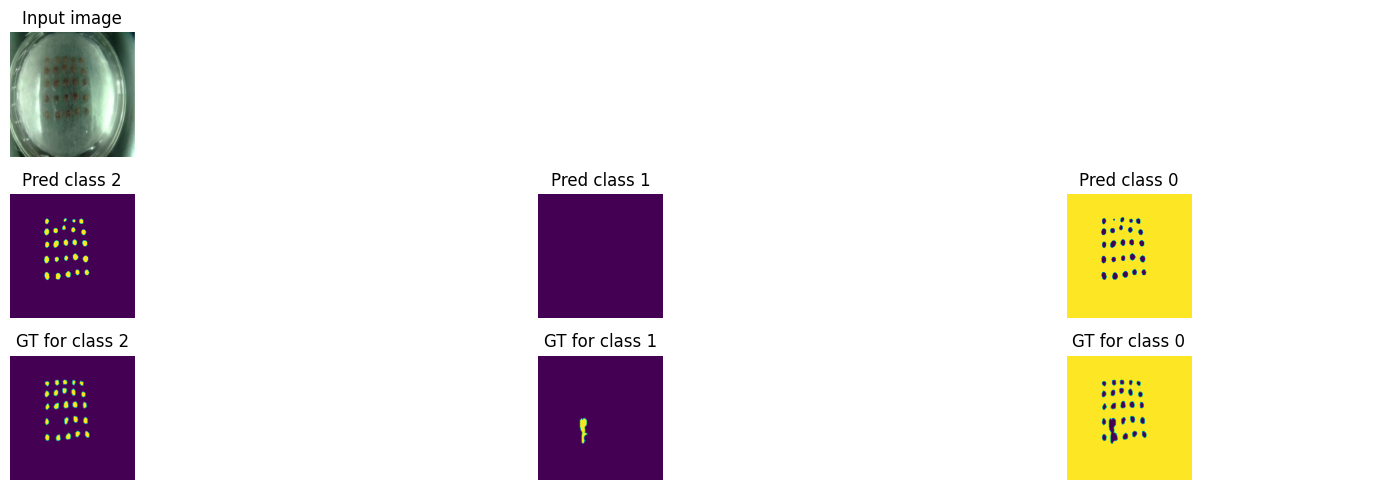

Train loss: 0.28907 | Time: 6m 4s | Val loss: 0.27006
Train_DICE_avg: 0.66212 | Train_Jaccard_avg: 0.61085 | Train_Sensitivity_avg: 0.94636 | Train_Specificity_avg: 0.84485 
Class 0 - Train_DICE: 0.97733 | Train_Jaccard: 0.95584 | Train_Sensitivity: 0.99628 | Train_Specificity: 0.56078 
Class 1 - Train_DICE: 0.28281 | Train_Jaccard: 0.28218 | Train_Sensitivity: 0.98283 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.72622 | Train_Jaccard: 0.59453 | Train_Sensitivity: 0.85998 | Train_Specificity: 0.98808 
Val_DICE_avg: 0.66899 | Val_Jaccard_avg: 0.61498 | Val_Sensitivity_avg: 0.93100 | Val_Specificity_avg: 0.82312 
Class 0 - Val_DICE: 0.98695 | Val_Jaccard: 0.97432 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.49937 
Class 1 - Val_DICE: 0.40555 | Val_Jaccard: 0.40066 | Val_Sensitivity: 0.87785 | Val_Specificity: 0.98855 
Class 2 - Val_DICE: 0.61448 | Val_Jaccard: 0.46997 | Val_Sensitivity: 0.91656 | Val_Specificity: 0.98145 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.25475 | Time: 7m 4s | Val loss: 0.23609
Train_DICE_avg: 0.66998 | Train_Jaccard_avg: 0.61749 | Train_Sensitivity_avg: 0.95195 | Train_Specificity_avg: 0.85655 
Class 0 - Train_DICE: 0.98046 | Train_Jaccard: 0.96179 | Train_Sensitivity: 0.99670 | Train_Specificity: 0.59574 
Class 1 - Train_DICE: 0.29597 | Train_Jaccard: 0.28920 | Train_Sensitivity: 0.97846 | Train_Specificity: 0.98603 
Class 2 - Train_DICE: 0.73352 | Train_Jaccard: 0.60149 | Train_Sensitivity: 0.88069 | Train_Specificity: 0.98788 
Val_DICE_avg: 0.67117 | Val_Jaccard_avg: 0.61300 | Val_Sensitivity_avg: 0.93107 | Val_Specificity_avg: 0.83139 
Class 0 - Val_DICE: 0.98804 | Val_Jaccard: 0.97644 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.52510 
Class 1 - Val_DICE: 0.41978 | Val_Jaccard: 0.40173 | Val_Sensitivity: 0.83842 | Val_Specificity: 0.98934 
Class 2 - Val_DICE: 0.60568 | Val_Jaccard: 0.46082 | Val_Sensitivity: 0.95697 | Val_Specificity: 0.97972 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.22728 | Time: 8m 5s | Val loss: 0.21093
Train_DICE_avg: 0.67872 | Train_Jaccard_avg: 0.62251 | Train_Sensitivity_avg: 0.94833 | Train_Specificity_avg: 0.86052 
Class 0 - Train_DICE: 0.98202 | Train_Jaccard: 0.96478 | Train_Sensitivity: 0.99669 | Train_Specificity: 0.60775 
Class 1 - Train_DICE: 0.31872 | Train_Jaccard: 0.29981 | Train_Sensitivity: 0.95535 | Train_Specificity: 0.98633 
Class 2 - Train_DICE: 0.73544 | Train_Jaccard: 0.60293 | Train_Sensitivity: 0.89294 | Train_Specificity: 0.98746 
Val_DICE_avg: 0.66857 | Val_Jaccard_avg: 0.60564 | Val_Sensitivity_avg: 0.90473 | Val_Specificity_avg: 0.83118 
Class 0 - Val_DICE: 0.98781 | Val_Jaccard: 0.97600 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.52328 
Class 1 - Val_DICE: 0.40338 | Val_Jaccard: 0.37260 | Val_Sensitivity: 0.76137 | Val_Specificity: 0.99029 
Class 2 - Val_DICE: 0.61454 | Val_Jaccard: 0.46831 | Val_Sensitivity: 0.95496 | Val_Specificity: 0.97995 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.20318 | Time: 9m 5s | Val loss: 0.18858
Train_DICE_avg: 0.69370 | Train_Jaccard_avg: 0.63469 | Train_Sensitivity_avg: 0.95079 | Train_Specificity_avg: 0.86833 
Class 0 - Train_DICE: 0.98338 | Train_Jaccard: 0.96741 | Train_Sensitivity: 0.99636 | Train_Specificity: 0.63055 
Class 1 - Train_DICE: 0.35781 | Train_Jaccard: 0.32877 | Train_Sensitivity: 0.95865 | Train_Specificity: 0.98693 
Class 2 - Train_DICE: 0.73989 | Train_Jaccard: 0.60789 | Train_Sensitivity: 0.89736 | Train_Specificity: 0.98750 
Val_DICE_avg: 0.70988 | Val_Jaccard_avg: 0.64529 | Val_Sensitivity_avg: 0.91355 | Val_Specificity_avg: 0.82095 
Class 0 - Val_DICE: 0.98613 | Val_Jaccard: 0.97275 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.48829 
Class 1 - Val_DICE: 0.45216 | Val_Jaccard: 0.41328 | Val_Sensitivity: 0.78724 | Val_Specificity: 0.99099 
Class 2 - Val_DICE: 0.69134 | Val_Jaccard: 0.54983 | Val_Sensitivity: 0.95425 | Val_Specificity: 0.98356 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.18186 | Time: 10m 5s | Val loss: 0.16735
Train_DICE_avg: 0.70189 | Train_Jaccard_avg: 0.64106 | Train_Sensitivity_avg: 0.94728 | Train_Specificity_avg: 0.87643 
Class 0 - Train_DICE: 0.98485 | Train_Jaccard: 0.97023 | Train_Sensitivity: 0.99631 | Train_Specificity: 0.65456 
Class 1 - Train_DICE: 0.37435 | Train_Jaccard: 0.33770 | Train_Sensitivity: 0.94620 | Train_Specificity: 0.98714 
Class 2 - Train_DICE: 0.74648 | Train_Jaccard: 0.61524 | Train_Sensitivity: 0.89933 | Train_Specificity: 0.98760 
Val_DICE_avg: 0.75772 | Val_Jaccard_avg: 0.69239 | Val_Sensitivity_avg: 0.96328 | Val_Specificity_avg: 0.82859 
Class 0 - Val_DICE: 0.98771 | Val_Jaccard: 0.97579 | Val_Sensitivity: 0.99913 | Val_Specificity: 0.51048 
Class 1 - Val_DICE: 0.58483 | Val_Jaccard: 0.53981 | Val_Sensitivity: 0.94275 | Val_Specificity: 0.99105 
Class 2 - Val_DICE: 0.70061 | Val_Jaccard: 0.56157 | Val_Sensitivity: 0.94798 | Val_Specificity: 0.98423 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


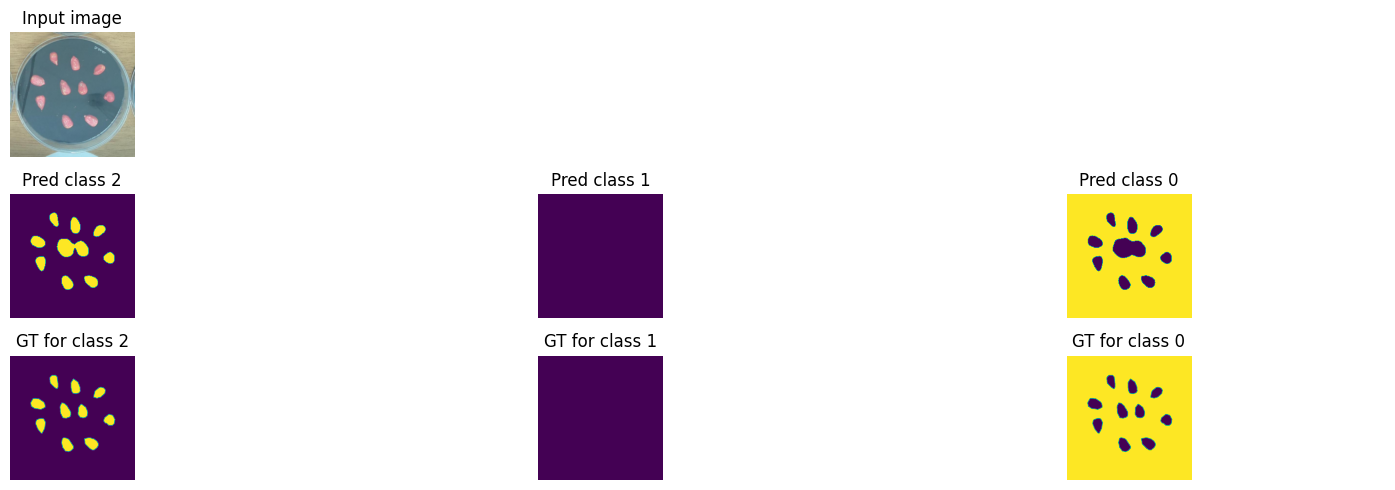

Train loss: 0.15981 | Time: 11m 10s | Val loss: 0.14450
Train_DICE_avg: 0.70095 | Train_Jaccard_avg: 0.63953 | Train_Sensitivity_avg: 0.94669 | Train_Specificity_avg: 0.88113 
Class 0 - Train_DICE: 0.98584 | Train_Jaccard: 0.97216 | Train_Sensitivity: 0.99573 | Train_Specificity: 0.66880 
Class 1 - Train_DICE: 0.37322 | Train_Jaccard: 0.33495 | Train_Sensitivity: 0.93980 | Train_Specificity: 0.98722 
Class 2 - Train_DICE: 0.74379 | Train_Jaccard: 0.61149 | Train_Sensitivity: 0.90454 | Train_Specificity: 0.98738 
Val_DICE_avg: 0.76389 | Val_Jaccard_avg: 0.69943 | Val_Sensitivity_avg: 0.96325 | Val_Specificity_avg: 0.82054 
Class 0 - Val_DICE: 0.98627 | Val_Jaccard: 0.97298 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.48502 
Class 1 - Val_DICE: 0.56942 | Val_Jaccard: 0.52654 | Val_Sensitivity: 0.94476 | Val_Specificity: 0.99099 
Class 2 - Val_DICE: 0.73597 | Val_Jaccard: 0.59876 | Val_Sensitivity: 0.94567 | Val_Specificity: 0.98562 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.13650 | Time: 12m 14s | Val loss: 0.12220
Train_DICE_avg: 0.71414 | Train_Jaccard_avg: 0.65118 | Train_Sensitivity_avg: 0.94700 | Train_Specificity_avg: 0.88986 
Class 0 - Train_DICE: 0.98718 | Train_Jaccard: 0.97474 | Train_Sensitivity: 0.99550 | Train_Specificity: 0.69414 
Class 1 - Train_DICE: 0.40303 | Train_Jaccard: 0.35722 | Train_Sensitivity: 0.93368 | Train_Specificity: 0.98800 
Class 2 - Train_DICE: 0.75223 | Train_Jaccard: 0.62159 | Train_Sensitivity: 0.91183 | Train_Specificity: 0.98746 
Val_DICE_avg: 0.77216 | Val_Jaccard_avg: 0.71172 | Val_Sensitivity_avg: 0.96648 | Val_Specificity_avg: 0.83478 
Class 0 - Val_DICE: 0.98859 | Val_Jaccard: 0.97749 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.52669 
Class 1 - Val_DICE: 0.56680 | Val_Jaccard: 0.52858 | Val_Sensitivity: 0.97231 | Val_Specificity: 0.99049 
Class 2 - Val_DICE: 0.76110 | Val_Jaccard: 0.62908 | Val_Sensitivity: 0.92788 | Val_Specificity: 0.98716 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.11773 | Time: 13m 17s | Val loss: 0.10271
Train_DICE_avg: 0.71775 | Train_Jaccard_avg: 0.65357 | Train_Sensitivity_avg: 0.94621 | Train_Specificity_avg: 0.89263 
Class 0 - Train_DICE: 0.98772 | Train_Jaccard: 0.97580 | Train_Sensitivity: 0.99551 | Train_Specificity: 0.70244 
Class 1 - Train_DICE: 0.40995 | Train_Jaccard: 0.35976 | Train_Sensitivity: 0.92918 | Train_Specificity: 0.98792 
Class 2 - Train_DICE: 0.75557 | Train_Jaccard: 0.62514 | Train_Sensitivity: 0.91393 | Train_Specificity: 0.98754 
Val_DICE_avg: 0.77324 | Val_Jaccard_avg: 0.70584 | Val_Sensitivity_avg: 0.96930 | Val_Specificity_avg: 0.84814 
Class 0 - Val_DICE: 0.99036 | Val_Jaccard: 0.98096 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.56867 
Class 1 - Val_DICE: 0.61524 | Val_Jaccard: 0.56422 | Val_Sensitivity: 0.94881 | Val_Specificity: 0.99166 
Class 2 - Val_DICE: 0.71412 | Val_Jaccard: 0.57234 | Val_Sensitivity: 0.95989 | Val_Specificity: 0.98408 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.10039 | Time: 14m 20s | Val loss: 0.08715
Train_DICE_avg: 0.72661 | Train_Jaccard_avg: 0.66163 | Train_Sensitivity_avg: 0.94383 | Train_Specificity_avg: 0.89710 
Class 0 - Train_DICE: 0.98881 | Train_Jaccard: 0.97792 | Train_Sensitivity: 0.99551 | Train_Specificity: 0.71562 
Class 1 - Train_DICE: 0.42905 | Train_Jaccard: 0.37451 | Train_Sensitivity: 0.91962 | Train_Specificity: 0.98801 
Class 2 - Train_DICE: 0.76197 | Train_Jaccard: 0.63246 | Train_Sensitivity: 0.91636 | Train_Specificity: 0.98766 
Val_DICE_avg: 0.76722 | Val_Jaccard_avg: 0.69883 | Val_Sensitivity_avg: 0.96008 | Val_Specificity_avg: 0.85313 
Class 0 - Val_DICE: 0.99065 | Val_Jaccard: 0.98153 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.58353 
Class 1 - Val_DICE: 0.60757 | Val_Jaccard: 0.55404 | Val_Sensitivity: 0.91931 | Val_Specificity: 0.99204 
Class 2 - Val_DICE: 0.70345 | Val_Jaccard: 0.56092 | Val_Sensitivity: 0.96167 | Val_Specificity: 0.98382 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.08645 | Time: 15m 24s | Val loss: 0.07604
Train_DICE_avg: 0.73266 | Train_Jaccard_avg: 0.66714 | Train_Sensitivity_avg: 0.94266 | Train_Specificity_avg: 0.89969 
Class 0 - Train_DICE: 0.98916 | Train_Jaccard: 0.97860 | Train_Sensitivity: 0.99546 | Train_Specificity: 0.72275 
Class 1 - Train_DICE: 0.44167 | Train_Jaccard: 0.38428 | Train_Sensitivity: 0.91430 | Train_Specificity: 0.98834 
Class 2 - Train_DICE: 0.76715 | Train_Jaccard: 0.63855 | Train_Sensitivity: 0.91821 | Train_Specificity: 0.98797 
Val_DICE_avg: 0.77978 | Val_Jaccard_avg: 0.71298 | Val_Sensitivity_avg: 0.97511 | Val_Specificity_avg: 0.85008 
Class 0 - Val_DICE: 0.99049 | Val_Jaccard: 0.98122 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.57377 
Class 1 - Val_DICE: 0.61344 | Val_Jaccard: 0.56392 | Val_Sensitivity: 0.96850 | Val_Specificity: 0.99190 
Class 2 - Val_DICE: 0.73541 | Val_Jaccard: 0.59382 | Val_Sensitivity: 0.95758 | Val_Specificity: 0.98455 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


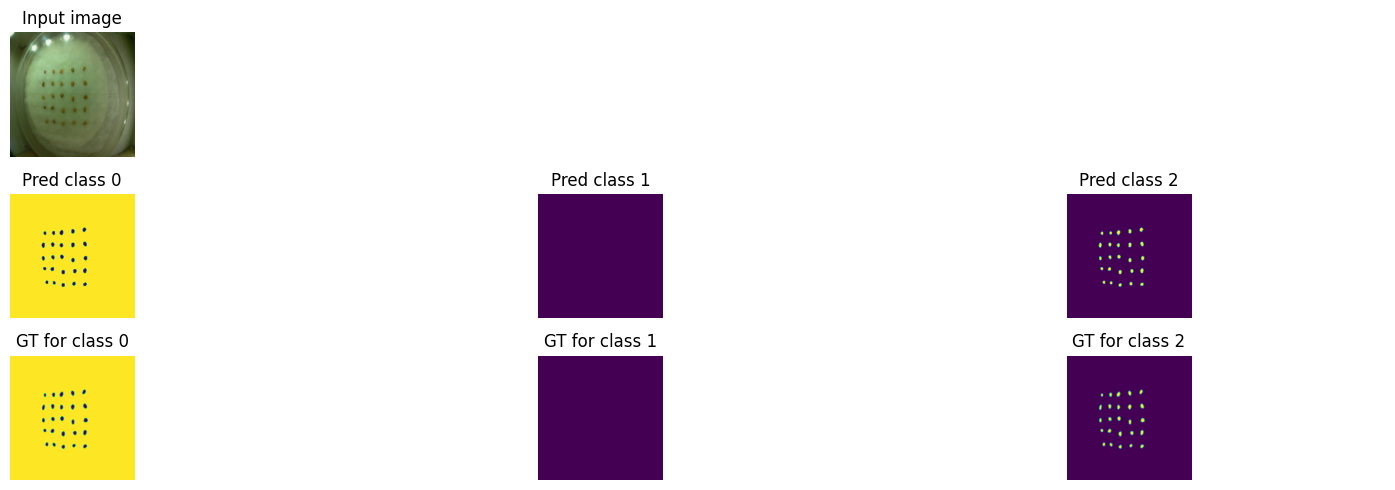

Train loss: 0.07578 | Time: 16m 28s | Val loss: 0.06516
Train_DICE_avg: 0.74255 | Train_Jaccard_avg: 0.67641 | Train_Sensitivity_avg: 0.94412 | Train_Specificity_avg: 0.90209 
Class 0 - Train_DICE: 0.98951 | Train_Jaccard: 0.97929 | Train_Sensitivity: 0.99548 | Train_Specificity: 0.72954 
Class 1 - Train_DICE: 0.46720 | Train_Jaccard: 0.40696 | Train_Sensitivity: 0.91382 | Train_Specificity: 0.98882 
Class 2 - Train_DICE: 0.77092 | Train_Jaccard: 0.64298 | Train_Sensitivity: 0.92306 | Train_Specificity: 0.98790 
Val_DICE_avg: 0.79229 | Val_Jaccard_avg: 0.72270 | Val_Sensitivity_avg: 0.96892 | Val_Specificity_avg: 0.85160 
Class 0 - Val_DICE: 0.99063 | Val_Jaccard: 0.98149 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.57750 
Class 1 - Val_DICE: 0.65910 | Val_Jaccard: 0.60129 | Val_Sensitivity: 0.94835 | Val_Specificity: 0.99293 
Class 2 - Val_DICE: 0.72715 | Val_Jaccard: 0.58533 | Val_Sensitivity: 0.95905 | Val_Specificity: 0.98437 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.06765 | Time: 17m 32s | Val loss: 0.05877
Train_DICE_avg: 0.73874 | Train_Jaccard_avg: 0.67184 | Train_Sensitivity_avg: 0.93706 | Train_Specificity_avg: 0.90335 
Class 0 - Train_DICE: 0.98980 | Train_Jaccard: 0.97986 | Train_Sensitivity: 0.99561 | Train_Specificity: 0.73344 
Class 1 - Train_DICE: 0.45812 | Train_Jaccard: 0.39558 | Train_Sensitivity: 0.88996 | Train_Specificity: 0.98888 
Class 2 - Train_DICE: 0.76828 | Train_Jaccard: 0.64007 | Train_Sensitivity: 0.92563 | Train_Specificity: 0.98773 
Val_DICE_avg: 0.79572 | Val_Jaccard_avg: 0.72661 | Val_Sensitivity_avg: 0.96293 | Val_Specificity_avg: 0.84736 
Class 0 - Val_DICE: 0.99003 | Val_Jaccard: 0.98032 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.56381 
Class 1 - Val_DICE: 0.65125 | Val_Jaccard: 0.59224 | Val_Sensitivity: 0.92184 | Val_Specificity: 0.99331 
Class 2 - Val_DICE: 0.74589 | Val_Jaccard: 0.60729 | Val_Sensitivity: 0.96765 | Val_Specificity: 0.98496 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.06109 | Time: 18m 35s | Val loss: 0.05268
Train_DICE_avg: 0.74833 | Train_Jaccard_avg: 0.68139 | Train_Sensitivity_avg: 0.94481 | Train_Specificity_avg: 0.90506 
Class 0 - Train_DICE: 0.98988 | Train_Jaccard: 0.98000 | Train_Sensitivity: 0.99562 | Train_Specificity: 0.73822 
Class 1 - Train_DICE: 0.47996 | Train_Jaccard: 0.41579 | Train_Sensitivity: 0.91172 | Train_Specificity: 0.98897 
Class 2 - Train_DICE: 0.77517 | Train_Jaccard: 0.64837 | Train_Sensitivity: 0.92710 | Train_Specificity: 0.98800 
Val_DICE_avg: 0.79515 | Val_Jaccard_avg: 0.72592 | Val_Sensitivity_avg: 0.96886 | Val_Specificity_avg: 0.85199 
Class 0 - Val_DICE: 0.99060 | Val_Jaccard: 0.98143 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.57828 
Class 1 - Val_DICE: 0.66757 | Val_Jaccard: 0.60861 | Val_Sensitivity: 0.94103 | Val_Specificity: 0.99303 
Class 2 - Val_DICE: 0.72729 | Val_Jaccard: 0.58772 | Val_Sensitivity: 0.96622 | Val_Specificity: 0.98466 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.05587 | Time: 19m 39s | Val loss: 0.04723
Train_DICE_avg: 0.75079 | Train_Jaccard_avg: 0.68372 | Train_Sensitivity_avg: 0.94580 | Train_Specificity_avg: 0.90681 
Class 0 - Train_DICE: 0.98999 | Train_Jaccard: 0.98022 | Train_Sensitivity: 0.99535 | Train_Specificity: 0.74313 
Class 1 - Train_DICE: 0.48855 | Train_Jaccard: 0.42370 | Train_Sensitivity: 0.91173 | Train_Specificity: 0.98928 
Class 2 - Train_DICE: 0.77382 | Train_Jaccard: 0.64722 | Train_Sensitivity: 0.93033 | Train_Specificity: 0.98802 
Val_DICE_avg: 0.78825 | Val_Jaccard_avg: 0.71760 | Val_Sensitivity_avg: 0.97077 | Val_Specificity_avg: 0.86107 
Class 0 - Val_DICE: 0.99157 | Val_Jaccard: 0.98333 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.60640 
Class 1 - Val_DICE: 0.65646 | Val_Jaccard: 0.59506 | Val_Sensitivity: 0.94208 | Val_Specificity: 0.99299 
Class 2 - Val_DICE: 0.71672 | Val_Jaccard: 0.57441 | Val_Sensitivity: 0.97102 | Val_Specificity: 0.98383 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.05132 | Time: 20m 42s | Val loss: 0.04368
Train_DICE_avg: 0.75482 | Train_Jaccard_avg: 0.68713 | Train_Sensitivity_avg: 0.94647 | Train_Specificity_avg: 0.90773 
Class 0 - Train_DICE: 0.99019 | Train_Jaccard: 0.98063 | Train_Sensitivity: 0.99553 | Train_Specificity: 0.74577 
Class 1 - Train_DICE: 0.49693 | Train_Jaccard: 0.43006 | Train_Sensitivity: 0.91293 | Train_Specificity: 0.98944 
Class 2 - Train_DICE: 0.77733 | Train_Jaccard: 0.65070 | Train_Sensitivity: 0.93095 | Train_Specificity: 0.98798 
Val_DICE_avg: 0.80019 | Val_Jaccard_avg: 0.72807 | Val_Sensitivity_avg: 0.96716 | Val_Specificity_avg: 0.85561 
Class 0 - Val_DICE: 0.99131 | Val_Jaccard: 0.98280 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.58966 
Class 1 - Val_DICE: 0.68865 | Val_Jaccard: 0.62232 | Val_Sensitivity: 0.93231 | Val_Specificity: 0.99332 
Class 2 - Val_DICE: 0.72061 | Val_Jaccard: 0.57909 | Val_Sensitivity: 0.96985 | Val_Specificity: 0.98385 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


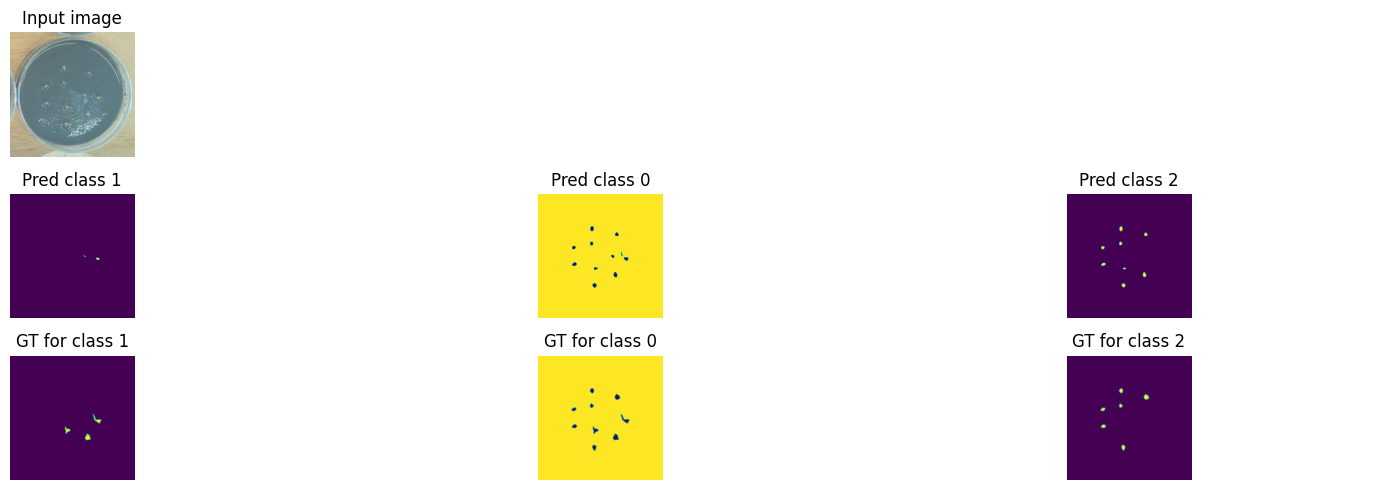

Train loss: 0.04636 | Time: 21m 47s | Val loss: 0.03741
Train_DICE_avg: 0.75483 | Train_Jaccard_avg: 0.68763 | Train_Sensitivity_avg: 0.94252 | Train_Specificity_avg: 0.90930 
Class 0 - Train_DICE: 0.99042 | Train_Jaccard: 0.98106 | Train_Sensitivity: 0.99560 | Train_Specificity: 0.75017 
Class 1 - Train_DICE: 0.49562 | Train_Jaccard: 0.42910 | Train_Sensitivity: 0.90101 | Train_Specificity: 0.98954 
Class 2 - Train_DICE: 0.77844 | Train_Jaccard: 0.65274 | Train_Sensitivity: 0.93094 | Train_Specificity: 0.98819 
Val_DICE_avg: 0.78624 | Val_Jaccard_avg: 0.71632 | Val_Sensitivity_avg: 0.96610 | Val_Specificity_avg: 0.86343 
Class 0 - Val_DICE: 0.99205 | Val_Jaccard: 0.98426 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.61366 
Class 1 - Val_DICE: 0.63848 | Val_Jaccard: 0.58026 | Val_Sensitivity: 0.93703 | Val_Specificity: 0.99265 
Class 2 - Val_DICE: 0.72818 | Val_Jaccard: 0.58445 | Val_Sensitivity: 0.96200 | Val_Specificity: 0.98398 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.04092 | Time: 22m 50s | Val loss: 0.03330
Train_DICE_avg: 0.76304 | Train_Jaccard_avg: 0.69551 | Train_Sensitivity_avg: 0.94315 | Train_Specificity_avg: 0.90861 
Class 0 - Train_DICE: 0.99048 | Train_Jaccard: 0.98119 | Train_Sensitivity: 0.99587 | Train_Specificity: 0.74795 
Class 1 - Train_DICE: 0.51373 | Train_Jaccard: 0.44481 | Train_Sensitivity: 0.90290 | Train_Specificity: 0.98959 
Class 2 - Train_DICE: 0.78490 | Train_Jaccard: 0.66054 | Train_Sensitivity: 0.93070 | Train_Specificity: 0.98829 
Val_DICE_avg: 0.78349 | Val_Jaccard_avg: 0.70897 | Val_Sensitivity_avg: 0.95591 | Val_Specificity_avg: 0.86915 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98508 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.63198 
Class 1 - Val_DICE: 0.67923 | Val_Jaccard: 0.61190 | Val_Sensitivity: 0.89212 | Val_Specificity: 0.99379 
Class 2 - Val_DICE: 0.67879 | Val_Jaccard: 0.52994 | Val_Sensitivity: 0.97632 | Val_Specificity: 0.98167 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.03729 | Time: 23m 54s | Val loss: 0.03003
Train_DICE_avg: 0.76462 | Train_Jaccard_avg: 0.69634 | Train_Sensitivity_avg: 0.94384 | Train_Specificity_avg: 0.90941 
Class 0 - Train_DICE: 0.99063 | Train_Jaccard: 0.98147 | Train_Sensitivity: 0.99584 | Train_Specificity: 0.75040 
Class 1 - Train_DICE: 0.51974 | Train_Jaccard: 0.44861 | Train_Sensitivity: 0.90109 | Train_Specificity: 0.98964 
Class 2 - Train_DICE: 0.78350 | Train_Jaccard: 0.65893 | Train_Sensitivity: 0.93458 | Train_Specificity: 0.98818 
Val_DICE_avg: 0.80768 | Val_Jaccard_avg: 0.73567 | Val_Sensitivity_avg: 0.96601 | Val_Specificity_avg: 0.85730 
Class 0 - Val_DICE: 0.99133 | Val_Jaccard: 0.98284 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.59386 
Class 1 - Val_DICE: 0.69396 | Val_Jaccard: 0.62763 | Val_Sensitivity: 0.92718 | Val_Specificity: 0.99371 
Class 2 - Val_DICE: 0.73775 | Val_Jaccard: 0.59653 | Val_Sensitivity: 0.97150 | Val_Specificity: 0.98434 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.03378 | Time: 24m 56s | Val loss: 0.02820
Train_DICE_avg: 0.76809 | Train_Jaccard_avg: 0.70061 | Train_Sensitivity_avg: 0.94458 | Train_Specificity_avg: 0.91127 
Class 0 - Train_DICE: 0.99111 | Train_Jaccard: 0.98241 | Train_Sensitivity: 0.99617 | Train_Specificity: 0.75544 
Class 1 - Train_DICE: 0.52297 | Train_Jaccard: 0.45207 | Train_Sensitivity: 0.90223 | Train_Specificity: 0.98977 
Class 2 - Train_DICE: 0.79019 | Train_Jaccard: 0.66735 | Train_Sensitivity: 0.93533 | Train_Specificity: 0.98860 
Val_DICE_avg: 0.80226 | Val_Jaccard_avg: 0.72785 | Val_Sensitivity_avg: 0.95669 | Val_Specificity_avg: 0.86368 
Class 0 - Val_DICE: 0.99193 | Val_Jaccard: 0.98404 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61395 
Class 1 - Val_DICE: 0.72199 | Val_Jaccard: 0.65251 | Val_Sensitivity: 0.88895 | Val_Specificity: 0.99476 
Class 2 - Val_DICE: 0.69286 | Val_Jaccard: 0.54699 | Val_Sensitivity: 0.98180 | Val_Specificity: 0.98233 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.03182 | Time: 26m 0s | Val loss: 0.02554
Train_DICE_avg: 0.76885 | Train_Jaccard_avg: 0.70103 | Train_Sensitivity_avg: 0.94344 | Train_Specificity_avg: 0.91141 
Class 0 - Train_DICE: 0.99089 | Train_Jaccard: 0.98199 | Train_Sensitivity: 0.99595 | Train_Specificity: 0.75557 
Class 1 - Train_DICE: 0.52533 | Train_Jaccard: 0.45384 | Train_Sensitivity: 0.89734 | Train_Specificity: 0.99009 
Class 2 - Train_DICE: 0.79034 | Train_Jaccard: 0.66725 | Train_Sensitivity: 0.93702 | Train_Specificity: 0.98858 
Val_DICE_avg: 0.81065 | Val_Jaccard_avg: 0.73982 | Val_Sensitivity_avg: 0.96405 | Val_Specificity_avg: 0.85981 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98310 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60057 
Class 1 - Val_DICE: 0.70395 | Val_Jaccard: 0.63685 | Val_Sensitivity: 0.92093 | Val_Specificity: 0.99379 
Class 2 - Val_DICE: 0.73656 | Val_Jaccard: 0.59949 | Val_Sensitivity: 0.97185 | Val_Specificity: 0.98508 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


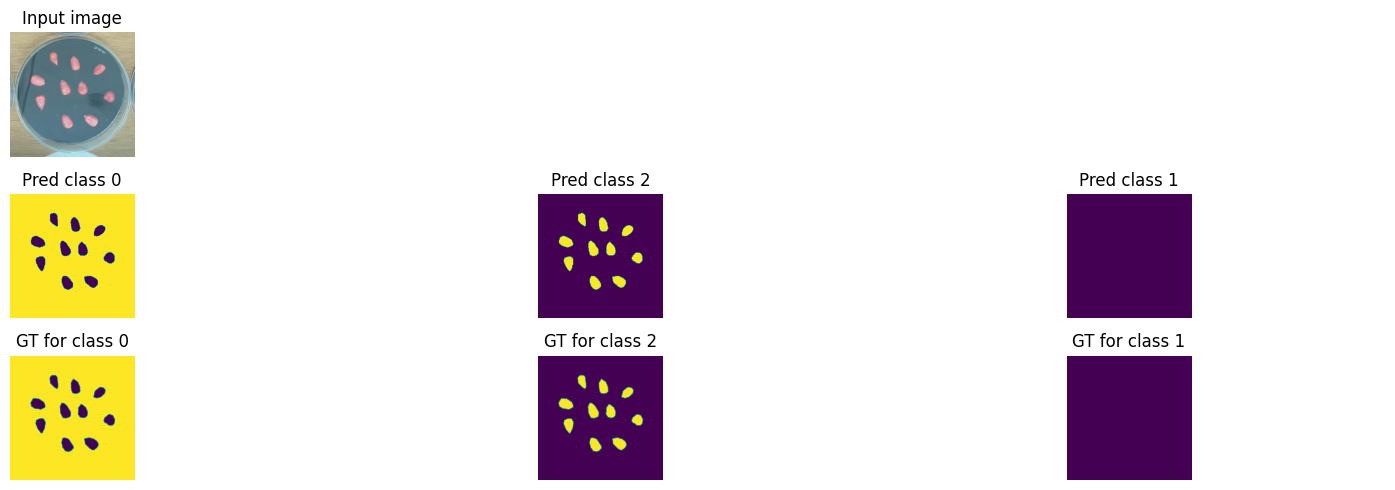

Train loss: 0.03014 | Time: 27m 4s | Val loss: 0.02436
Train_DICE_avg: 0.76840 | Train_Jaccard_avg: 0.70100 | Train_Sensitivity_avg: 0.94446 | Train_Specificity_avg: 0.91161 
Class 0 - Train_DICE: 0.99103 | Train_Jaccard: 0.98227 | Train_Sensitivity: 0.99613 | Train_Specificity: 0.75641 
Class 1 - Train_DICE: 0.52368 | Train_Jaccard: 0.45242 | Train_Sensitivity: 0.90119 | Train_Specificity: 0.98981 
Class 2 - Train_DICE: 0.79048 | Train_Jaccard: 0.66831 | Train_Sensitivity: 0.93604 | Train_Specificity: 0.98862 
Val_DICE_avg: 0.81025 | Val_Jaccard_avg: 0.73968 | Val_Sensitivity_avg: 0.96890 | Val_Specificity_avg: 0.85905 
Class 0 - Val_DICE: 0.99151 | Val_Jaccard: 0.98320 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.59834 
Class 1 - Val_DICE: 0.69046 | Val_Jaccard: 0.62538 | Val_Sensitivity: 0.94066 | Val_Specificity: 0.99370 
Class 2 - Val_DICE: 0.74880 | Val_Jaccard: 0.61046 | Val_Sensitivity: 0.96666 | Val_Specificity: 0.98512 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.02872 | Time: 28m 8s | Val loss: 0.02268
Train_DICE_avg: 0.77130 | Train_Jaccard_avg: 0.70397 | Train_Sensitivity_avg: 0.94529 | Train_Specificity_avg: 0.91117 
Class 0 - Train_DICE: 0.99115 | Train_Jaccard: 0.98249 | Train_Sensitivity: 0.99630 | Train_Specificity: 0.75501 
Class 1 - Train_DICE: 0.52784 | Train_Jaccard: 0.45604 | Train_Sensitivity: 0.90320 | Train_Specificity: 0.98975 
Class 2 - Train_DICE: 0.79490 | Train_Jaccard: 0.67337 | Train_Sensitivity: 0.93638 | Train_Specificity: 0.98873 
Val_DICE_avg: 0.80841 | Val_Jaccard_avg: 0.73790 | Val_Sensitivity_avg: 0.96619 | Val_Specificity_avg: 0.86188 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98356 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60683 
Class 1 - Val_DICE: 0.68441 | Val_Jaccard: 0.61874 | Val_Sensitivity: 0.92903 | Val_Specificity: 0.99363 
Class 2 - Val_DICE: 0.74912 | Val_Jaccard: 0.61142 | Val_Sensitivity: 0.97020 | Val_Specificity: 0.98517 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.02768 | Time: 29m 12s | Val loss: 0.02217
Train_DICE_avg: 0.77698 | Train_Jaccard_avg: 0.71008 | Train_Sensitivity_avg: 0.94366 | Train_Specificity_avg: 0.91542 
Class 0 - Train_DICE: 0.99117 | Train_Jaccard: 0.98253 | Train_Sensitivity: 0.99592 | Train_Specificity: 0.76671 
Class 1 - Train_DICE: 0.54134 | Train_Jaccard: 0.46917 | Train_Sensitivity: 0.89853 | Train_Specificity: 0.99042 
Class 2 - Train_DICE: 0.79842 | Train_Jaccard: 0.67854 | Train_Sensitivity: 0.93655 | Train_Specificity: 0.98912 
Val_DICE_avg: 0.81168 | Val_Jaccard_avg: 0.73914 | Val_Sensitivity_avg: 0.96936 | Val_Specificity_avg: 0.86663 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98472 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62216 
Class 1 - Val_DICE: 0.71784 | Val_Jaccard: 0.65119 | Val_Sensitivity: 0.93673 | Val_Specificity: 0.99408 
Class 2 - Val_DICE: 0.72491 | Val_Jaccard: 0.58152 | Val_Sensitivity: 0.97200 | Val_Specificity: 0.98367 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.02670 | Time: 30m 15s | Val loss: 0.02132
Train_DICE_avg: 0.77283 | Train_Jaccard_avg: 0.70521 | Train_Sensitivity_avg: 0.94668 | Train_Specificity_avg: 0.91094 
Class 0 - Train_DICE: 0.99124 | Train_Jaccard: 0.98268 | Train_Sensitivity: 0.99634 | Train_Specificity: 0.75462 
Class 1 - Train_DICE: 0.53217 | Train_Jaccard: 0.45942 | Train_Sensitivity: 0.90475 | Train_Specificity: 0.98963 
Class 2 - Train_DICE: 0.79509 | Train_Jaccard: 0.67353 | Train_Sensitivity: 0.93893 | Train_Specificity: 0.98855 
Val_DICE_avg: 0.81858 | Val_Jaccard_avg: 0.74820 | Val_Sensitivity_avg: 0.96512 | Val_Specificity_avg: 0.85609 
Class 0 - Val_DICE: 0.99126 | Val_Jaccard: 0.98271 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.58877 
Class 1 - Val_DICE: 0.70472 | Val_Jaccard: 0.63833 | Val_Sensitivity: 0.92574 | Val_Specificity: 0.99405 
Class 2 - Val_DICE: 0.75976 | Val_Jaccard: 0.62356 | Val_Sensitivity: 0.97020 | Val_Specificity: 0.98546 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.02606 | Time: 31m 18s | Val loss: 0.02089
Train_DICE_avg: 0.77379 | Train_Jaccard_avg: 0.70665 | Train_Sensitivity_avg: 0.94317 | Train_Specificity_avg: 0.91283 
Class 0 - Train_DICE: 0.99116 | Train_Jaccard: 0.98252 | Train_Sensitivity: 0.99622 | Train_Specificity: 0.75948 
Class 1 - Train_DICE: 0.53327 | Train_Jaccard: 0.46126 | Train_Sensitivity: 0.89759 | Train_Specificity: 0.99015 
Class 2 - Train_DICE: 0.79693 | Train_Jaccard: 0.67617 | Train_Sensitivity: 0.93569 | Train_Specificity: 0.98886 
Val_DICE_avg: 0.80620 | Val_Jaccard_avg: 0.73476 | Val_Sensitivity_avg: 0.97339 | Val_Specificity_avg: 0.86880 
Class 0 - Val_DICE: 0.99243 | Val_Jaccard: 0.98502 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.62857 
Class 1 - Val_DICE: 0.70125 | Val_Jaccard: 0.63638 | Val_Sensitivity: 0.95038 | Val_Specificity: 0.99370 
Class 2 - Val_DICE: 0.72490 | Val_Jaccard: 0.58289 | Val_Sensitivity: 0.97045 | Val_Specificity: 0.98414 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


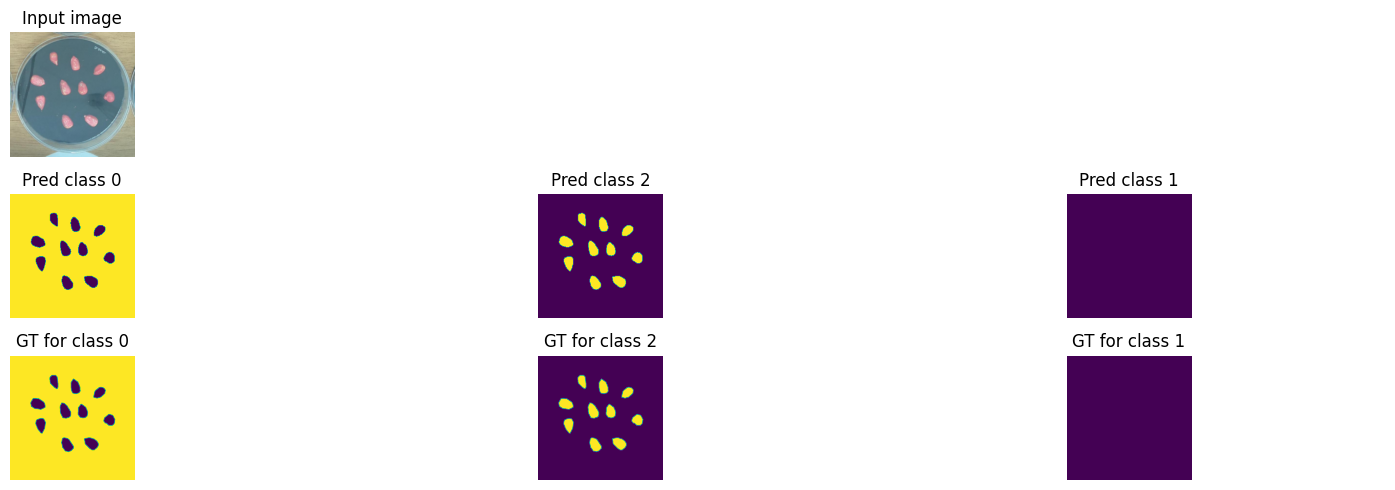

Train loss: 0.02477 | Time: 32m 24s | Val loss: 0.01948
Train_DICE_avg: 0.77838 | Train_Jaccard_avg: 0.71184 | Train_Sensitivity_avg: 0.94673 | Train_Specificity_avg: 0.91494 
Class 0 - Train_DICE: 0.99148 | Train_Jaccard: 0.98314 | Train_Sensitivity: 0.99632 | Train_Specificity: 0.76550 
Class 1 - Train_DICE: 0.54332 | Train_Jaccard: 0.47096 | Train_Sensitivity: 0.90408 | Train_Specificity: 0.99029 
Class 2 - Train_DICE: 0.80035 | Train_Jaccard: 0.68142 | Train_Sensitivity: 0.93980 | Train_Specificity: 0.98902 
Val_DICE_avg: 0.81442 | Val_Jaccard_avg: 0.74431 | Val_Sensitivity_avg: 0.96798 | Val_Specificity_avg: 0.86202 
Class 0 - Val_DICE: 0.99181 | Val_Jaccard: 0.98380 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60694 
Class 1 - Val_DICE: 0.69651 | Val_Jaccard: 0.63066 | Val_Sensitivity: 0.93254 | Val_Specificity: 0.99373 
Class 2 - Val_DICE: 0.75493 | Val_Jaccard: 0.61847 | Val_Sensitivity: 0.97202 | Val_Specificity: 0.98539 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.02380 | Time: 33m 28s | Val loss: 0.01878
Train_DICE_avg: 0.77675 | Train_Jaccard_avg: 0.70989 | Train_Sensitivity_avg: 0.94576 | Train_Specificity_avg: 0.91331 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98309 | Train_Sensitivity: 0.99643 | Train_Specificity: 0.76071 
Class 1 - Train_DICE: 0.53903 | Train_Jaccard: 0.46661 | Train_Sensitivity: 0.90183 | Train_Specificity: 0.99022 
Class 2 - Train_DICE: 0.79976 | Train_Jaccard: 0.67997 | Train_Sensitivity: 0.93903 | Train_Specificity: 0.98899 
Val_DICE_avg: 0.82323 | Val_Jaccard_avg: 0.75223 | Val_Sensitivity_avg: 0.96553 | Val_Specificity_avg: 0.85857 
Class 0 - Val_DICE: 0.99125 | Val_Jaccard: 0.98269 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.59600 
Class 1 - Val_DICE: 0.73058 | Val_Jaccard: 0.66283 | Val_Sensitivity: 0.92276 | Val_Specificity: 0.99445 
Class 2 - Val_DICE: 0.74787 | Val_Jaccard: 0.61118 | Val_Sensitivity: 0.97440 | Val_Specificity: 0.98526 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.02304 | Time: 34m 32s | Val loss: 0.01837
Train_DICE_avg: 0.77957 | Train_Jaccard_avg: 0.71281 | Train_Sensitivity_avg: 0.94636 | Train_Specificity_avg: 0.91527 
Class 0 - Train_DICE: 0.99157 | Train_Jaccard: 0.98332 | Train_Sensitivity: 0.99643 | Train_Specificity: 0.76648 
Class 1 - Train_DICE: 0.54498 | Train_Jaccard: 0.47206 | Train_Sensitivity: 0.90205 | Train_Specificity: 0.99034 
Class 2 - Train_DICE: 0.80217 | Train_Jaccard: 0.68306 | Train_Sensitivity: 0.94058 | Train_Specificity: 0.98901 
Val_DICE_avg: 0.82011 | Val_Jaccard_avg: 0.74963 | Val_Sensitivity_avg: 0.96985 | Val_Specificity_avg: 0.86009 
Class 0 - Val_DICE: 0.99157 | Val_Jaccard: 0.98332 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60067 
Class 1 - Val_DICE: 0.71380 | Val_Jaccard: 0.64579 | Val_Sensitivity: 0.93724 | Val_Specificity: 0.99399 
Class 2 - Val_DICE: 0.75496 | Val_Jaccard: 0.61978 | Val_Sensitivity: 0.97294 | Val_Specificity: 0.98561 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.02245 | Time: 35m 37s | Val loss: 0.01785
Train_DICE_avg: 0.78717 | Train_Jaccard_avg: 0.72106 | Train_Sensitivity_avg: 0.94868 | Train_Specificity_avg: 0.91667 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98335 | Train_Sensitivity: 0.99652 | Train_Specificity: 0.77005 
Class 1 - Train_DICE: 0.56441 | Train_Jaccard: 0.49152 | Train_Sensitivity: 0.91098 | Train_Specificity: 0.99054 
Class 2 - Train_DICE: 0.80550 | Train_Jaccard: 0.68831 | Train_Sensitivity: 0.93856 | Train_Specificity: 0.98943 
Val_DICE_avg: 0.82694 | Val_Jaccard_avg: 0.75671 | Val_Sensitivity_avg: 0.96897 | Val_Specificity_avg: 0.86053 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98330 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.60153 
Class 1 - Val_DICE: 0.72894 | Val_Jaccard: 0.66145 | Val_Sensitivity: 0.93718 | Val_Specificity: 0.99420 
Class 2 - Val_DICE: 0.76033 | Val_Jaccard: 0.62539 | Val_Sensitivity: 0.97031 | Val_Specificity: 0.98587 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.02181 | Time: 36m 41s | Val loss: 0.01689
Train_DICE_avg: 0.78756 | Train_Jaccard_avg: 0.72114 | Train_Sensitivity_avg: 0.94795 | Train_Specificity_avg: 0.91633 
Class 0 - Train_DICE: 0.99168 | Train_Jaccard: 0.98352 | Train_Sensitivity: 0.99650 | Train_Specificity: 0.76901 
Class 1 - Train_DICE: 0.56531 | Train_Jaccard: 0.49198 | Train_Sensitivity: 0.90576 | Train_Specificity: 0.99073 
Class 2 - Train_DICE: 0.80569 | Train_Jaccard: 0.68791 | Train_Sensitivity: 0.94160 | Train_Specificity: 0.98924 
Val_DICE_avg: 0.82009 | Val_Jaccard_avg: 0.74967 | Val_Sensitivity_avg: 0.97056 | Val_Specificity_avg: 0.86224 
Class 0 - Val_DICE: 0.99185 | Val_Jaccard: 0.98387 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60734 
Class 1 - Val_DICE: 0.71531 | Val_Jaccard: 0.64809 | Val_Sensitivity: 0.93176 | Val_Specificity: 0.99404 
Class 2 - Val_DICE: 0.75312 | Val_Jaccard: 0.61703 | Val_Sensitivity: 0.98054 | Val_Specificity: 0.98532 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


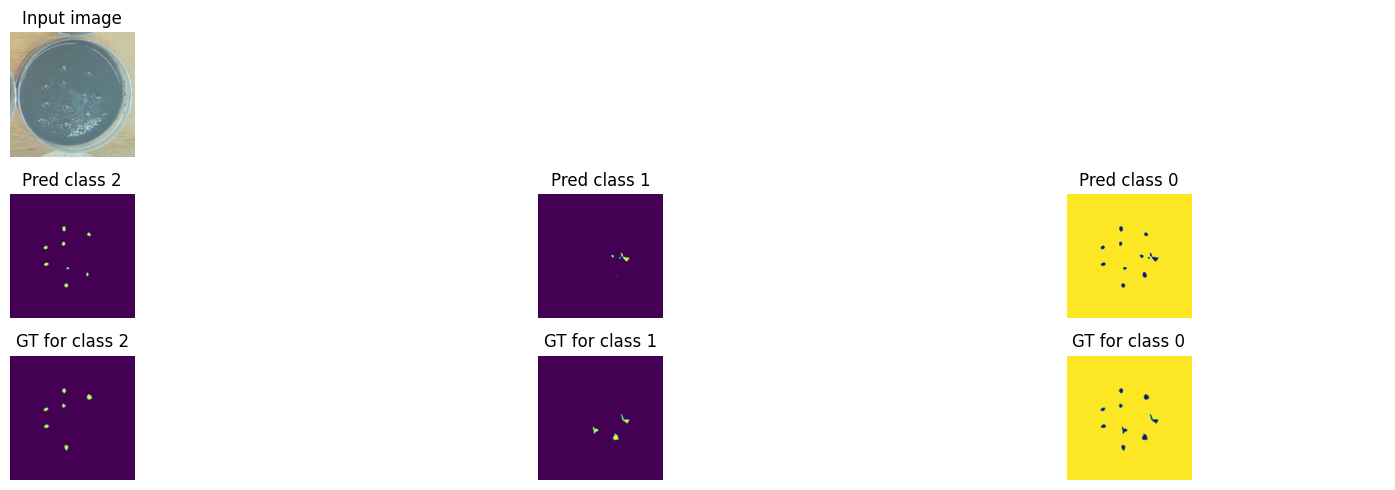

Train loss: 0.02142 | Time: 37m 45s | Val loss: 0.01736
Train_DICE_avg: 0.78759 | Train_Jaccard_avg: 0.72161 | Train_Sensitivity_avg: 0.94918 | Train_Specificity_avg: 0.91641 
Class 0 - Train_DICE: 0.99172 | Train_Jaccard: 0.98360 | Train_Sensitivity: 0.99659 | Train_Specificity: 0.76918 
Class 1 - Train_DICE: 0.56226 | Train_Jaccard: 0.48890 | Train_Sensitivity: 0.90906 | Train_Specificity: 0.99061 
Class 2 - Train_DICE: 0.80878 | Train_Jaccard: 0.69234 | Train_Sensitivity: 0.94188 | Train_Specificity: 0.98944 
Val_DICE_avg: 0.82625 | Val_Jaccard_avg: 0.75542 | Val_Sensitivity_avg: 0.97126 | Val_Specificity_avg: 0.86097 
Class 0 - Val_DICE: 0.99160 | Val_Jaccard: 0.98338 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.60306 
Class 1 - Val_DICE: 0.73433 | Val_Jaccard: 0.66647 | Val_Sensitivity: 0.93685 | Val_Specificity: 0.99454 
Class 2 - Val_DICE: 0.75282 | Val_Jaccard: 0.61641 | Val_Sensitivity: 0.97750 | Val_Specificity: 0.98531 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.02109 | Time: 38m 50s | Val loss: 0.01691
Train_DICE_avg: 0.78939 | Train_Jaccard_avg: 0.72335 | Train_Sensitivity_avg: 0.94868 | Train_Specificity_avg: 0.91646 
Class 0 - Train_DICE: 0.99182 | Train_Jaccard: 0.98381 | Train_Sensitivity: 0.99672 | Train_Specificity: 0.76941 
Class 1 - Train_DICE: 0.56790 | Train_Jaccard: 0.49426 | Train_Sensitivity: 0.90565 | Train_Specificity: 0.99059 
Class 2 - Train_DICE: 0.80844 | Train_Jaccard: 0.69197 | Train_Sensitivity: 0.94367 | Train_Specificity: 0.98939 
Val_DICE_avg: 0.81337 | Val_Jaccard_avg: 0.74202 | Val_Sensitivity_avg: 0.96311 | Val_Specificity_avg: 0.86408 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98406 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.61322 
Class 1 - Val_DICE: 0.70696 | Val_Jaccard: 0.63995 | Val_Sensitivity: 0.90958 | Val_Specificity: 0.99446 
Class 2 - Val_DICE: 0.74120 | Val_Jaccard: 0.60205 | Val_Sensitivity: 0.98034 | Val_Specificity: 0.98455 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.02080 | Time: 39m 54s | Val loss: 0.01675
Train_DICE_avg: 0.78910 | Train_Jaccard_avg: 0.72255 | Train_Sensitivity_avg: 0.94864 | Train_Specificity_avg: 0.91587 
Class 0 - Train_DICE: 0.99194 | Train_Jaccard: 0.98404 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.76771 
Class 1 - Train_DICE: 0.56883 | Train_Jaccard: 0.49420 | Train_Sensitivity: 0.90549 | Train_Specificity: 0.99069 
Class 2 - Train_DICE: 0.80652 | Train_Jaccard: 0.68940 | Train_Sensitivity: 0.94357 | Train_Specificity: 0.98921 
Val_DICE_avg: 0.82108 | Val_Jaccard_avg: 0.74817 | Val_Sensitivity_avg: 0.96409 | Val_Specificity_avg: 0.86250 
Class 0 - Val_DICE: 0.99171 | Val_Jaccard: 0.98361 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.60829 
Class 1 - Val_DICE: 0.73520 | Val_Jaccard: 0.66264 | Val_Sensitivity: 0.91242 | Val_Specificity: 0.99448 
Class 2 - Val_DICE: 0.73633 | Val_Jaccard: 0.59828 | Val_Sensitivity: 0.98045 | Val_Specificity: 0.98473 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.02066 | Time: 40m 59s | Val loss: 0.01662
Train_DICE_avg: 0.78820 | Train_Jaccard_avg: 0.72228 | Train_Sensitivity_avg: 0.94968 | Train_Specificity_avg: 0.91617 
Class 0 - Train_DICE: 0.99186 | Train_Jaccard: 0.98389 | Train_Sensitivity: 0.99670 | Train_Specificity: 0.76868 
Class 1 - Train_DICE: 0.56265 | Train_Jaccard: 0.48942 | Train_Sensitivity: 0.90743 | Train_Specificity: 0.99052 
Class 2 - Train_DICE: 0.81010 | Train_Jaccard: 0.69352 | Train_Sensitivity: 0.94492 | Train_Specificity: 0.98931 
Val_DICE_avg: 0.82218 | Val_Jaccard_avg: 0.75091 | Val_Sensitivity_avg: 0.96940 | Val_Specificity_avg: 0.86322 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98366 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.61013 
Class 1 - Val_DICE: 0.72694 | Val_Jaccard: 0.65728 | Val_Sensitivity: 0.93009 | Val_Specificity: 0.99428 
Class 2 - Val_DICE: 0.74785 | Val_Jaccard: 0.61179 | Val_Sensitivity: 0.97872 | Val_Specificity: 0.98527 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.02037 | Time: 42m 3s | Val loss: 0.01624
Train_DICE_avg: 0.79118 | Train_Jaccard_avg: 0.72499 | Train_Sensitivity_avg: 0.95362 | Train_Specificity_avg: 0.91565 
Class 0 - Train_DICE: 0.99194 | Train_Jaccard: 0.98403 | Train_Sensitivity: 0.99696 | Train_Specificity: 0.76724 
Class 1 - Train_DICE: 0.57153 | Train_Jaccard: 0.49726 | Train_Sensitivity: 0.91879 | Train_Specificity: 0.99047 
Class 2 - Train_DICE: 0.81007 | Train_Jaccard: 0.69369 | Train_Sensitivity: 0.94511 | Train_Specificity: 0.98924 
Val_DICE_avg: 0.82536 | Val_Jaccard_avg: 0.75421 | Val_Sensitivity_avg: 0.96873 | Val_Specificity_avg: 0.86096 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98343 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60307 
Class 1 - Val_DICE: 0.73123 | Val_Jaccard: 0.66119 | Val_Sensitivity: 0.92538 | Val_Specificity: 0.99435 
Class 2 - Val_DICE: 0.75322 | Val_Jaccard: 0.61802 | Val_Sensitivity: 0.98141 | Val_Specificity: 0.98544 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


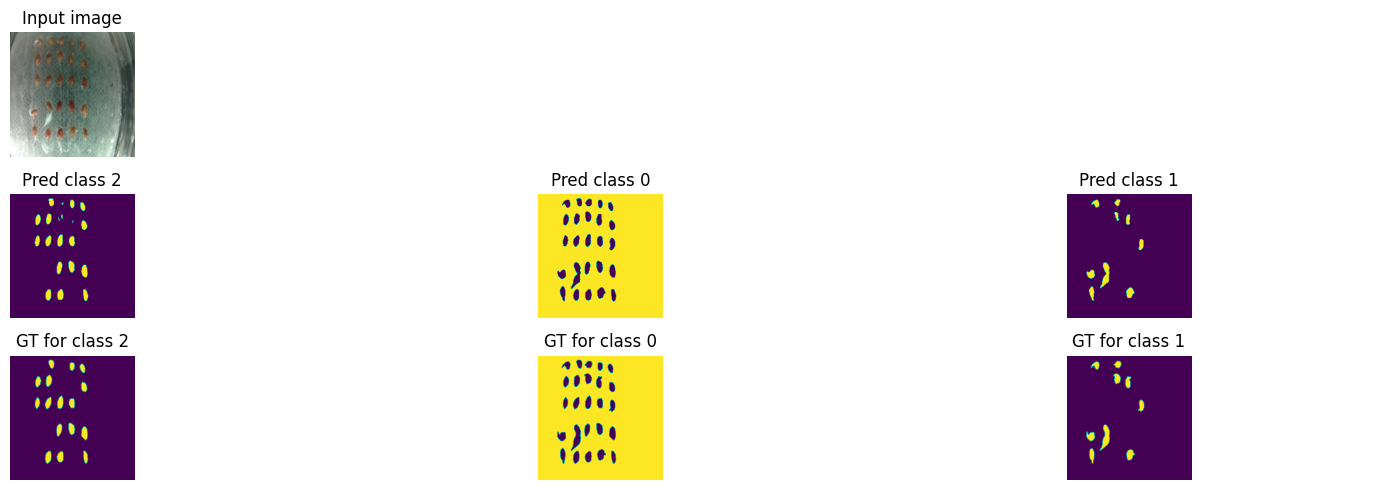

Train loss: 0.02005 | Time: 43m 8s | Val loss: 0.01623
Train_DICE_avg: 0.79019 | Train_Jaccard_avg: 0.72384 | Train_Sensitivity_avg: 0.95156 | Train_Specificity_avg: 0.91409 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98416 | Train_Sensitivity: 0.99703 | Train_Specificity: 0.76250 
Class 1 - Train_DICE: 0.57040 | Train_Jaccard: 0.49590 | Train_Sensitivity: 0.91182 | Train_Specificity: 0.99053 
Class 2 - Train_DICE: 0.80815 | Train_Jaccard: 0.69146 | Train_Sensitivity: 0.94583 | Train_Specificity: 0.98924 
Val_DICE_avg: 0.82908 | Val_Jaccard_avg: 0.75748 | Val_Sensitivity_avg: 0.96995 | Val_Specificity_avg: 0.86245 
Class 0 - Val_DICE: 0.99171 | Val_Jaccard: 0.98360 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.60740 
Class 1 - Val_DICE: 0.74334 | Val_Jaccard: 0.67331 | Val_Sensitivity: 0.93196 | Val_Specificity: 0.99472 
Class 2 - Val_DICE: 0.75218 | Val_Jaccard: 0.61552 | Val_Sensitivity: 0.97844 | Val_Specificity: 0.98524 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.01986 | Time: 44m 12s | Val loss: 0.01610
Train_DICE_avg: 0.79442 | Train_Jaccard_avg: 0.72851 | Train_Sensitivity_avg: 0.95039 | Train_Specificity_avg: 0.91712 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.99684 | Train_Specificity: 0.77075 
Class 1 - Train_DICE: 0.57885 | Train_Jaccard: 0.50420 | Train_Sensitivity: 0.90832 | Train_Specificity: 0.99106 
Class 2 - Train_DICE: 0.81240 | Train_Jaccard: 0.69714 | Train_Sensitivity: 0.94602 | Train_Specificity: 0.98957 
Val_DICE_avg: 0.82369 | Val_Jaccard_avg: 0.75278 | Val_Sensitivity_avg: 0.97545 | Val_Specificity_avg: 0.86340 
Class 0 - Val_DICE: 0.99205 | Val_Jaccard: 0.98425 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61071 
Class 1 - Val_DICE: 0.71639 | Val_Jaccard: 0.64665 | Val_Sensitivity: 0.95166 | Val_Specificity: 0.99378 
Class 2 - Val_DICE: 0.76262 | Val_Jaccard: 0.62743 | Val_Sensitivity: 0.97535 | Val_Specificity: 0.98571 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.01974 | Time: 45m 16s | Val loss: 0.01600
Train_DICE_avg: 0.79329 | Train_Jaccard_avg: 0.72737 | Train_Sensitivity_avg: 0.95240 | Train_Specificity_avg: 0.91587 
Class 0 - Train_DICE: 0.99207 | Train_Jaccard: 0.98430 | Train_Sensitivity: 0.99697 | Train_Specificity: 0.76764 
Class 1 - Train_DICE: 0.57516 | Train_Jaccard: 0.50082 | Train_Sensitivity: 0.91352 | Train_Specificity: 0.99057 
Class 2 - Train_DICE: 0.81263 | Train_Jaccard: 0.69698 | Train_Sensitivity: 0.94670 | Train_Specificity: 0.98941 
Val_DICE_avg: 0.82440 | Val_Jaccard_avg: 0.75332 | Val_Sensitivity_avg: 0.96924 | Val_Specificity_avg: 0.86404 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.61240 
Class 1 - Val_DICE: 0.72576 | Val_Jaccard: 0.65613 | Val_Sensitivity: 0.92784 | Val_Specificity: 0.99431 
Class 2 - Val_DICE: 0.75553 | Val_Jaccard: 0.61985 | Val_Sensitivity: 0.98051 | Val_Specificity: 0.98541 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.01967 | Time: 46m 20s | Val loss: 0.01573
Train_DICE_avg: 0.79246 | Train_Jaccard_avg: 0.72657 | Train_Sensitivity_avg: 0.95231 | Train_Specificity_avg: 0.91700 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.99703 | Train_Specificity: 0.77101 
Class 1 - Train_DICE: 0.57166 | Train_Jaccard: 0.49720 | Train_Sensitivity: 0.91288 | Train_Specificity: 0.99051 
Class 2 - Train_DICE: 0.81372 | Train_Jaccard: 0.69835 | Train_Sensitivity: 0.94702 | Train_Specificity: 0.98948 
Val_DICE_avg: 0.82907 | Val_Jaccard_avg: 0.75864 | Val_Sensitivity_avg: 0.97259 | Val_Specificity_avg: 0.86149 
Class 0 - Val_DICE: 0.99172 | Val_Jaccard: 0.98361 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60448 
Class 1 - Val_DICE: 0.73373 | Val_Jaccard: 0.66539 | Val_Sensitivity: 0.94259 | Val_Specificity: 0.99442 
Class 2 - Val_DICE: 0.76175 | Val_Jaccard: 0.62692 | Val_Sensitivity: 0.97577 | Val_Specificity: 0.98557 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.01934 | Time: 47m 23s | Val loss: 0.01596
Train_DICE_avg: 0.79191 | Train_Jaccard_avg: 0.72601 | Train_Sensitivity_avg: 0.95301 | Train_Specificity_avg: 0.91481 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98439 | Train_Sensitivity: 0.99708 | Train_Specificity: 0.76461 
Class 1 - Train_DICE: 0.57192 | Train_Jaccard: 0.49770 | Train_Sensitivity: 0.91229 | Train_Specificity: 0.99053 
Class 2 - Train_DICE: 0.81168 | Train_Jaccard: 0.69593 | Train_Sensitivity: 0.94965 | Train_Specificity: 0.98929 
Val_DICE_avg: 0.82414 | Val_Jaccard_avg: 0.75203 | Val_Sensitivity_avg: 0.96588 | Val_Specificity_avg: 0.86502 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98425 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61552 
Class 1 - Val_DICE: 0.73293 | Val_Jaccard: 0.66210 | Val_Sensitivity: 0.91709 | Val_Specificity: 0.99461 
Class 2 - Val_DICE: 0.74747 | Val_Jaccard: 0.60973 | Val_Sensitivity: 0.98114 | Val_Specificity: 0.98494 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


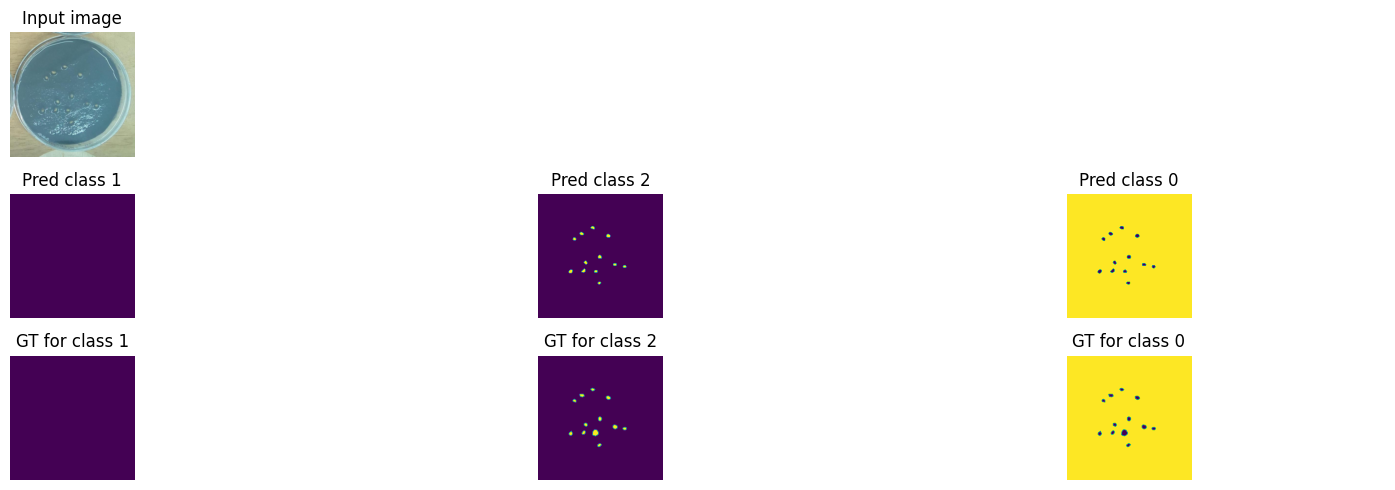

Train loss: 0.01935 | Time: 48m 28s | Val loss: 0.01585
Train_DICE_avg: 0.79726 | Train_Jaccard_avg: 0.73175 | Train_Sensitivity_avg: 0.95282 | Train_Specificity_avg: 0.91726 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98442 | Train_Sensitivity: 0.99697 | Train_Specificity: 0.77129 
Class 1 - Train_DICE: 0.58417 | Train_Jaccard: 0.50966 | Train_Sensitivity: 0.91317 | Train_Specificity: 0.99086 
Class 2 - Train_DICE: 0.81547 | Train_Jaccard: 0.70116 | Train_Sensitivity: 0.94830 | Train_Specificity: 0.98962 
Val_DICE_avg: 0.82893 | Val_Jaccard_avg: 0.75729 | Val_Sensitivity_avg: 0.96442 | Val_Specificity_avg: 0.86107 
Class 0 - Val_DICE: 0.99140 | Val_Jaccard: 0.98299 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.60283 
Class 1 - Val_DICE: 0.74021 | Val_Jaccard: 0.66830 | Val_Sensitivity: 0.91453 | Val_Specificity: 0.99474 
Class 2 - Val_DICE: 0.75518 | Val_Jaccard: 0.62059 | Val_Sensitivity: 0.97929 | Val_Specificity: 0.98565 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.01915 | Time: 49m 32s | Val loss: 0.01587
Train_DICE_avg: 0.79673 | Train_Jaccard_avg: 0.73089 | Train_Sensitivity_avg: 0.95433 | Train_Specificity_avg: 0.91538 
Class 0 - Train_DICE: 0.99209 | Train_Jaccard: 0.98434 | Train_Sensitivity: 0.99708 | Train_Specificity: 0.76578 
Class 1 - Train_DICE: 0.58465 | Train_Jaccard: 0.50959 | Train_Sensitivity: 0.91589 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.81346 | Train_Jaccard: 0.69874 | Train_Sensitivity: 0.95001 | Train_Specificity: 0.98940 
Val_DICE_avg: 0.83566 | Val_Jaccard_avg: 0.76379 | Val_Sensitivity_avg: 0.96569 | Val_Specificity_avg: 0.85797 
Class 0 - Val_DICE: 0.99136 | Val_Jaccard: 0.98291 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.59348 
Class 1 - Val_DICE: 0.75060 | Val_Jaccard: 0.67672 | Val_Sensitivity: 0.91863 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.76503 | Val_Jaccard: 0.63174 | Val_Sensitivity: 0.97901 | Val_Specificity: 0.98578 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.01930 | Time: 50m 36s | Val loss: 0.01574
Train_DICE_avg: 0.79895 | Train_Jaccard_avg: 0.73292 | Train_Sensitivity_avg: 0.95590 | Train_Specificity_avg: 0.91697 
Class 0 - Train_DICE: 0.99221 | Train_Jaccard: 0.98457 | Train_Sensitivity: 0.99701 | Train_Specificity: 0.77063 
Class 1 - Train_DICE: 0.59181 | Train_Jaccard: 0.51635 | Train_Sensitivity: 0.92407 | Train_Specificity: 0.99083 
Class 2 - Train_DICE: 0.81283 | Train_Jaccard: 0.69783 | Train_Sensitivity: 0.94664 | Train_Specificity: 0.98945 
Val_DICE_avg: 0.83554 | Val_Jaccard_avg: 0.76614 | Val_Sensitivity_avg: 0.97235 | Val_Specificity_avg: 0.85928 
Class 0 - Val_DICE: 0.99135 | Val_Jaccard: 0.98290 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.59696 
Class 1 - Val_DICE: 0.74277 | Val_Jaccard: 0.67471 | Val_Sensitivity: 0.94265 | Val_Specificity: 0.99461 
Class 2 - Val_DICE: 0.77249 | Val_Jaccard: 0.64083 | Val_Sensitivity: 0.97496 | Val_Specificity: 0.98626 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.01892 | Time: 51m 42s | Val loss: 0.01582
Train_DICE_avg: 0.79939 | Train_Jaccard_avg: 0.73389 | Train_Sensitivity_avg: 0.95366 | Train_Specificity_avg: 0.91703 
Class 0 - Train_DICE: 0.99220 | Train_Jaccard: 0.98454 | Train_Sensitivity: 0.99711 | Train_Specificity: 0.77043 
Class 1 - Train_DICE: 0.58901 | Train_Jaccard: 0.51379 | Train_Sensitivity: 0.91381 | Train_Specificity: 0.99103 
Class 2 - Train_DICE: 0.81697 | Train_Jaccard: 0.70332 | Train_Sensitivity: 0.95006 | Train_Specificity: 0.98962 
Val_DICE_avg: 0.83094 | Val_Jaccard_avg: 0.75865 | Val_Sensitivity_avg: 0.96820 | Val_Specificity_avg: 0.86214 
Class 0 - Val_DICE: 0.99182 | Val_Jaccard: 0.98382 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60662 
Class 1 - Val_DICE: 0.74600 | Val_Jaccard: 0.67323 | Val_Sensitivity: 0.92674 | Val_Specificity: 0.99459 
Class 2 - Val_DICE: 0.75501 | Val_Jaccard: 0.61891 | Val_Sensitivity: 0.97845 | Val_Specificity: 0.98521 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.01888 | Time: 52m 47s | Val loss: 0.01565
Train_DICE_avg: 0.80065 | Train_Jaccard_avg: 0.73498 | Train_Sensitivity_avg: 0.95584 | Train_Specificity_avg: 0.91856 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98468 | Train_Sensitivity: 0.99708 | Train_Specificity: 0.77490 
Class 1 - Train_DICE: 0.59186 | Train_Jaccard: 0.51593 | Train_Sensitivity: 0.92167 | Train_Specificity: 0.99103 
Class 2 - Train_DICE: 0.81783 | Train_Jaccard: 0.70434 | Train_Sensitivity: 0.94877 | Train_Specificity: 0.98973 
Val_DICE_avg: 0.83304 | Val_Jaccard_avg: 0.76175 | Val_Sensitivity_avg: 0.96901 | Val_Specificity_avg: 0.86144 
Class 0 - Val_DICE: 0.99165 | Val_Jaccard: 0.98347 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60396 
Class 1 - Val_DICE: 0.74270 | Val_Jaccard: 0.67127 | Val_Sensitivity: 0.93285 | Val_Specificity: 0.99455 
Class 2 - Val_DICE: 0.76478 | Val_Jaccard: 0.63051 | Val_Sensitivity: 0.97474 | Val_Specificity: 0.98582 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


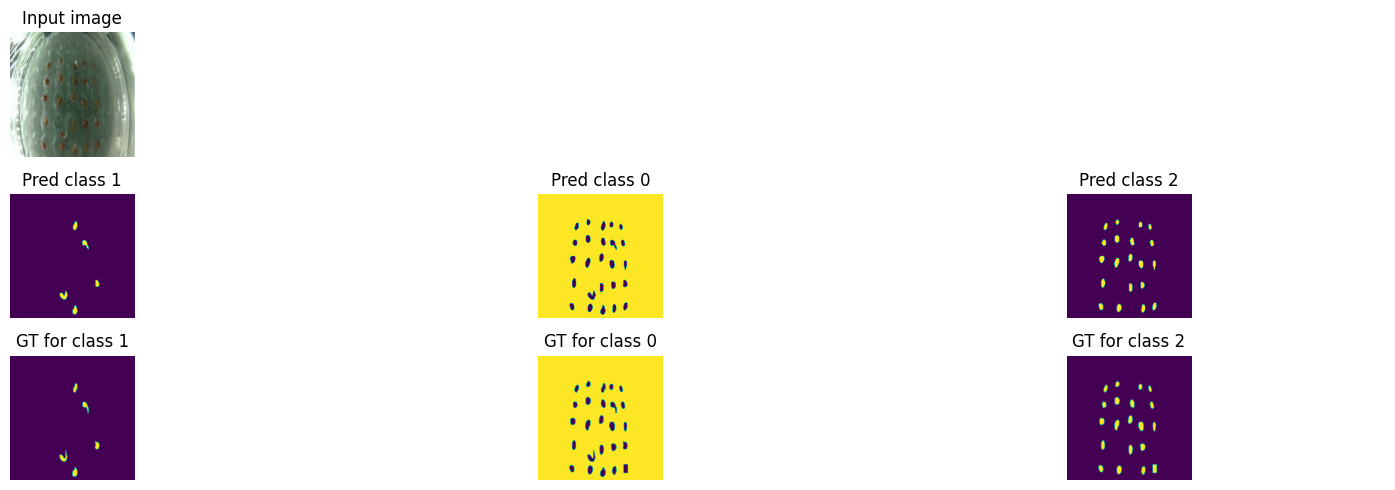

Train loss: 0.01870 | Time: 53m 53s | Val loss: 0.01546
Train_DICE_avg: 0.79913 | Train_Jaccard_avg: 0.73379 | Train_Sensitivity_avg: 0.95449 | Train_Specificity_avg: 0.91772 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98468 | Train_Sensitivity: 0.99710 | Train_Specificity: 0.77260 
Class 1 - Train_DICE: 0.58817 | Train_Jaccard: 0.51358 | Train_Sensitivity: 0.91734 | Train_Specificity: 0.99095 
Class 2 - Train_DICE: 0.81696 | Train_Jaccard: 0.70311 | Train_Sensitivity: 0.94904 | Train_Specificity: 0.98963 
Val_DICE_avg: 0.82944 | Val_Jaccard_avg: 0.75739 | Val_Sensitivity_avg: 0.97058 | Val_Specificity_avg: 0.86426 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98407 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61305 
Class 1 - Val_DICE: 0.73902 | Val_Jaccard: 0.66752 | Val_Sensitivity: 0.93378 | Val_Specificity: 0.99452 
Class 2 - Val_DICE: 0.75734 | Val_Jaccard: 0.62057 | Val_Sensitivity: 0.97855 | Val_Specificity: 0.98522 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.01882 | Time: 54m 58s | Val loss: 0.01550
Train_DICE_avg: 0.79893 | Train_Jaccard_avg: 0.73324 | Train_Sensitivity_avg: 0.95406 | Train_Specificity_avg: 0.91666 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98447 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.76958 
Class 1 - Train_DICE: 0.58771 | Train_Jaccard: 0.51229 | Train_Sensitivity: 0.91567 | Train_Specificity: 0.99089 
Class 2 - Train_DICE: 0.81692 | Train_Jaccard: 0.70296 | Train_Sensitivity: 0.94946 | Train_Specificity: 0.98953 
Val_DICE_avg: 0.82856 | Val_Jaccard_avg: 0.75715 | Val_Sensitivity_avg: 0.97115 | Val_Specificity_avg: 0.86550 
Class 0 - Val_DICE: 0.99202 | Val_Jaccard: 0.98420 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61678 
Class 1 - Val_DICE: 0.74297 | Val_Jaccard: 0.67353 | Val_Sensitivity: 0.93324 | Val_Specificity: 0.99467 
Class 2 - Val_DICE: 0.75070 | Val_Jaccard: 0.61371 | Val_Sensitivity: 0.98080 | Val_Specificity: 0.98505 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.01872 | Time: 56m 1s | Val loss: 0.01555
Train_DICE_avg: 0.79734 | Train_Jaccard_avg: 0.73194 | Train_Sensitivity_avg: 0.95230 | Train_Specificity_avg: 0.91799 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98482 | Train_Sensitivity: 0.99711 | Train_Specificity: 0.77336 
Class 1 - Train_DICE: 0.58435 | Train_Jaccard: 0.50957 | Train_Sensitivity: 0.90998 | Train_Specificity: 0.99092 
Class 2 - Train_DICE: 0.81533 | Train_Jaccard: 0.70143 | Train_Sensitivity: 0.94981 | Train_Specificity: 0.98968 
Val_DICE_avg: 0.82845 | Val_Jaccard_avg: 0.75607 | Val_Sensitivity_avg: 0.96478 | Val_Specificity_avg: 0.86079 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98329 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.60229 
Class 1 - Val_DICE: 0.74045 | Val_Jaccard: 0.66691 | Val_Sensitivity: 0.91267 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.75334 | Val_Jaccard: 0.61802 | Val_Sensitivity: 0.98223 | Val_Specificity: 0.98533 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.01846 | Time: 57m 5s | Val loss: 0.01536
Train_DICE_avg: 0.79848 | Train_Jaccard_avg: 0.73333 | Train_Sensitivity_avg: 0.95633 | Train_Specificity_avg: 0.91644 
Class 0 - Train_DICE: 0.99228 | Train_Jaccard: 0.98471 | Train_Sensitivity: 0.99722 | Train_Specificity: 0.76897 
Class 1 - Train_DICE: 0.58493 | Train_Jaccard: 0.51019 | Train_Sensitivity: 0.92029 | Train_Specificity: 0.99065 
Class 2 - Train_DICE: 0.81822 | Train_Jaccard: 0.70508 | Train_Sensitivity: 0.95149 | Train_Specificity: 0.98971 
Val_DICE_avg: 0.82333 | Val_Jaccard_avg: 0.75117 | Val_Sensitivity_avg: 0.97336 | Val_Specificity_avg: 0.86840 
Class 0 - Val_DICE: 0.99241 | Val_Jaccard: 0.98497 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62594 
Class 1 - Val_DICE: 0.73212 | Val_Jaccard: 0.66045 | Val_Sensitivity: 0.94222 | Val_Specificity: 0.99422 
Class 2 - Val_DICE: 0.74545 | Val_Jaccard: 0.60810 | Val_Sensitivity: 0.97849 | Val_Specificity: 0.98503 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.01838 | Time: 58m 9s | Val loss: 0.01545
Train_DICE_avg: 0.80327 | Train_Jaccard_avg: 0.73763 | Train_Sensitivity_avg: 0.95553 | Train_Specificity_avg: 0.91930 
Class 0 - Train_DICE: 0.99235 | Train_Jaccard: 0.98484 | Train_Sensitivity: 0.99704 | Train_Specificity: 0.77673 
Class 1 - Train_DICE: 0.59756 | Train_Jaccard: 0.52129 | Train_Sensitivity: 0.91836 | Train_Specificity: 0.99132 
Class 2 - Train_DICE: 0.81990 | Train_Jaccard: 0.70678 | Train_Sensitivity: 0.95117 | Train_Specificity: 0.98985 
Val_DICE_avg: 0.83822 | Val_Jaccard_avg: 0.76783 | Val_Sensitivity_avg: 0.96908 | Val_Specificity_avg: 0.85893 
Class 0 - Val_DICE: 0.99129 | Val_Jaccard: 0.98279 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59571 
Class 1 - Val_DICE: 0.75189 | Val_Jaccard: 0.68085 | Val_Sensitivity: 0.93124 | Val_Specificity: 0.99483 
Class 2 - Val_DICE: 0.77147 | Val_Jaccard: 0.63986 | Val_Sensitivity: 0.97655 | Val_Specificity: 0.98625 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


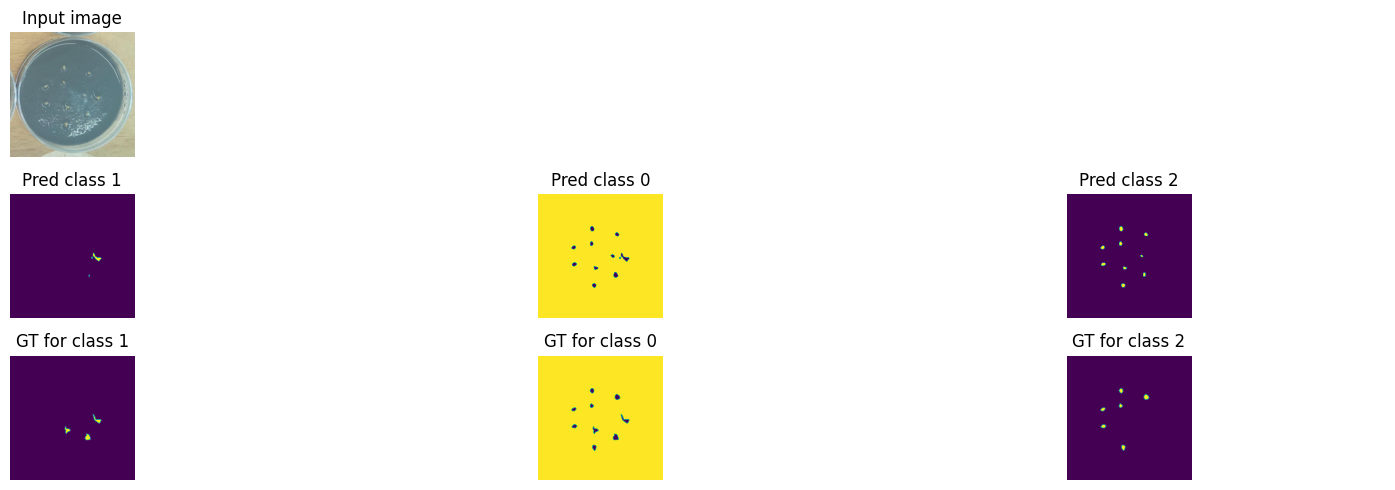

Train loss: 0.01852 | Time: 59m 14s | Val loss: 0.01544
Train_DICE_avg: 0.79564 | Train_Jaccard_avg: 0.72964 | Train_Sensitivity_avg: 0.95521 | Train_Specificity_avg: 0.91486 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98452 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.76470 
Class 1 - Train_DICE: 0.57827 | Train_Jaccard: 0.50210 | Train_Sensitivity: 0.91672 | Train_Specificity: 0.99041 
Class 2 - Train_DICE: 0.81647 | Train_Jaccard: 0.70230 | Train_Sensitivity: 0.95157 | Train_Specificity: 0.98945 
Val_DICE_avg: 0.83379 | Val_Jaccard_avg: 0.76233 | Val_Sensitivity_avg: 0.97168 | Val_Specificity_avg: 0.86088 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98334 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.60226 
Class 1 - Val_DICE: 0.74792 | Val_Jaccard: 0.67593 | Val_Sensitivity: 0.93678 | Val_Specificity: 0.99467 
Class 2 - Val_DICE: 0.76186 | Val_Jaccard: 0.62773 | Val_Sensitivity: 0.97882 | Val_Specificity: 0.98571 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.01837 | Time: 60m 17s | Val loss: 0.01541
Train_DICE_avg: 0.80178 | Train_Jaccard_avg: 0.73692 | Train_Sensitivity_avg: 0.95456 | Train_Specificity_avg: 0.91995 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98483 | Train_Sensitivity: 0.99705 | Train_Specificity: 0.77902 
Class 1 - Train_DICE: 0.59290 | Train_Jaccard: 0.51859 | Train_Sensitivity: 0.91631 | Train_Specificity: 0.99109 
Class 2 - Train_DICE: 0.82009 | Train_Jaccard: 0.70735 | Train_Sensitivity: 0.95031 | Train_Specificity: 0.98973 
Val_DICE_avg: 0.83477 | Val_Jaccard_avg: 0.76329 | Val_Sensitivity_avg: 0.97068 | Val_Specificity_avg: 0.86063 
Class 0 - Val_DICE: 0.99154 | Val_Jaccard: 0.98327 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60133 
Class 1 - Val_DICE: 0.74906 | Val_Jaccard: 0.67658 | Val_Sensitivity: 0.93326 | Val_Specificity: 0.99472 
Class 2 - Val_DICE: 0.76371 | Val_Jaccard: 0.63003 | Val_Sensitivity: 0.97936 | Val_Specificity: 0.98584 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.01828 | Time: 61m 21s | Val loss: 0.01532
Train_DICE_avg: 0.80035 | Train_Jaccard_avg: 0.73466 | Train_Sensitivity_avg: 0.95552 | Train_Specificity_avg: 0.91607 
Class 0 - Train_DICE: 0.99229 | Train_Jaccard: 0.98472 | Train_Sensitivity: 0.99730 | Train_Specificity: 0.76759 
Class 1 - Train_DICE: 0.59224 | Train_Jaccard: 0.51644 | Train_Sensitivity: 0.91812 | Train_Specificity: 0.99102 
Class 2 - Train_DICE: 0.81652 | Train_Jaccard: 0.70282 | Train_Sensitivity: 0.95113 | Train_Specificity: 0.98960 
Val_DICE_avg: 0.83114 | Val_Jaccard_avg: 0.75898 | Val_Sensitivity_avg: 0.96993 | Val_Specificity_avg: 0.86531 
Class 0 - Val_DICE: 0.99203 | Val_Jaccard: 0.98423 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61603 
Class 1 - Val_DICE: 0.74690 | Val_Jaccard: 0.67477 | Val_Sensitivity: 0.93145 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.75448 | Val_Jaccard: 0.61794 | Val_Sensitivity: 0.97892 | Val_Specificity: 0.98524 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.01823 | Time: 62m 25s | Val loss: 0.01525
Train_DICE_avg: 0.80206 | Train_Jaccard_avg: 0.73657 | Train_Sensitivity_avg: 0.95735 | Train_Specificity_avg: 0.91677 
Class 0 - Train_DICE: 0.99232 | Train_Jaccard: 0.98478 | Train_Sensitivity: 0.99727 | Train_Specificity: 0.76987 
Class 1 - Train_DICE: 0.59610 | Train_Jaccard: 0.52055 | Train_Sensitivity: 0.92192 | Train_Specificity: 0.99093 
Class 2 - Train_DICE: 0.81777 | Train_Jaccard: 0.70440 | Train_Sensitivity: 0.95287 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.83530 | Val_Jaccard_avg: 0.76361 | Val_Sensitivity_avg: 0.97090 | Val_Specificity_avg: 0.86301 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98356 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.60871 
Class 1 - Val_DICE: 0.75988 | Val_Jaccard: 0.68863 | Val_Sensitivity: 0.93297 | Val_Specificity: 0.99494 
Class 2 - Val_DICE: 0.75432 | Val_Jaccard: 0.61862 | Val_Sensitivity: 0.98029 | Val_Specificity: 0.98537 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.01822 | Time: 63m 29s | Val loss: 0.01508
Train_DICE_avg: 0.80147 | Train_Jaccard_avg: 0.73616 | Train_Sensitivity_avg: 0.95645 | Train_Specificity_avg: 0.91832 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98488 | Train_Sensitivity: 0.99724 | Train_Specificity: 0.77426 
Class 1 - Train_DICE: 0.59185 | Train_Jaccard: 0.51636 | Train_Sensitivity: 0.92013 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.82021 | Train_Jaccard: 0.70725 | Train_Sensitivity: 0.95197 | Train_Specificity: 0.98977 
Val_DICE_avg: 0.83069 | Val_Jaccard_avg: 0.75840 | Val_Sensitivity_avg: 0.97305 | Val_Specificity_avg: 0.86534 
Class 0 - Val_DICE: 0.99207 | Val_Jaccard: 0.98431 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61628 
Class 1 - Val_DICE: 0.74788 | Val_Jaccard: 0.67552 | Val_Sensitivity: 0.94013 | Val_Specificity: 0.99457 
Class 2 - Val_DICE: 0.75211 | Val_Jaccard: 0.61536 | Val_Sensitivity: 0.97962 | Val_Specificity: 0.98518 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


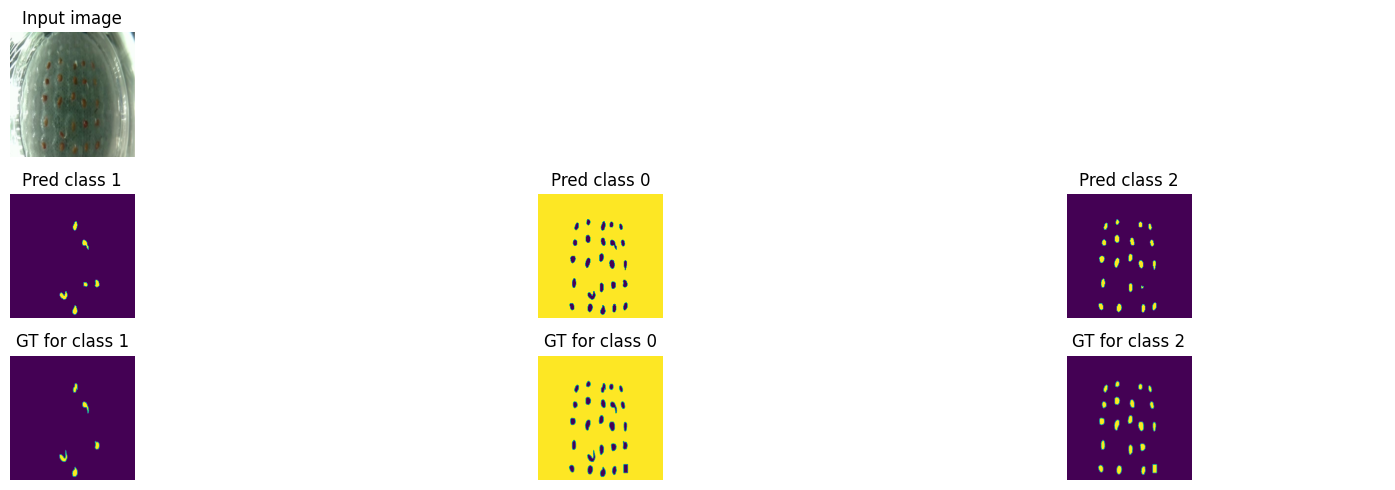

Train loss: 0.01805 | Time: 64m 33s | Val loss: 0.01521
Train_DICE_avg: 0.80000 | Train_Jaccard_avg: 0.73415 | Train_Sensitivity_avg: 0.95627 | Train_Specificity_avg: 0.91596 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.76740 
Class 1 - Train_DICE: 0.58934 | Train_Jaccard: 0.51324 | Train_Sensitivity: 0.91847 | Train_Specificity: 0.99092 
Class 2 - Train_DICE: 0.81830 | Train_Jaccard: 0.70435 | Train_Sensitivity: 0.95301 | Train_Specificity: 0.98954 
Val_DICE_avg: 0.83141 | Val_Jaccard_avg: 0.75908 | Val_Sensitivity_avg: 0.97102 | Val_Specificity_avg: 0.86552 
Class 0 - Val_DICE: 0.99207 | Val_Jaccard: 0.98429 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61673 
Class 1 - Val_DICE: 0.74919 | Val_Jaccard: 0.67613 | Val_Sensitivity: 0.93317 | Val_Specificity: 0.99451 
Class 2 - Val_DICE: 0.75297 | Val_Jaccard: 0.61680 | Val_Sensitivity: 0.98049 | Val_Specificity: 0.98532 


wandb: uploading artifact best_model; uploading output.log; uploading config.yaml
wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▃▃▃▄▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇███████████████████
wandb:       Training Jaccard ▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▆▆▇▆▇▇▇▇▇██▇▇███████████
wandb:          Training Loss █▇▆▅▅▄▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▄▅▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
wandb:   Training Specificity ▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇█████████████████████████
wandb:        Validation DICE ▁▂▂▂▂▅▅▆▅▆▆▆▆▇▇▇▇█▇██▇▇█████████████████
wandb:     Validation Jaccard ▁▃▂▂▁▆▆▆▆▆▆▇▆▆▇▇▇▇█▇▇▇▇▇██████████▇█████
wandb:        Validation Loss █▇▇▆▅▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▇▇▄▄▁▇▇▇▆▇▇▇▇▆▇▇▇▇▇▇██▇▇▇█▇█▇▇█▇▇██▇████
wandb: Validation Specificity ▁▄▅▆▆▆▆▇▇▇▇▇█▇██▇██▇██████████▇▇████████
wandb: 
wandb: Run summary:
wandb:          Training DIC


Training complete!


In [33]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [34]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [35]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]



Global Performance Metrics:
Loss mean: 0.01477, std: 0.00140
Dice Coefficient mean: 0.87701, std: 0.10526
Jaccard Index mean: 0.82056, std: 0.12158
Sensitivity mean: 0.88617, std: 0.10045
Specificity mean: 0.96361, std: 0.02511

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99593, std: 0.00233
Jaccard mean: 0.99190, std: 0.00459
Sensitivity mean: 0.99527, std: 0.00356
Specificity mean: 0.89605, std: 0.07638

Class 1:
Dice mean: 0.76070, std: 0.28911
Jaccard mean: 0.68588, std: 0.31139
Sensitivity mean: 0.78757, std: 0.27286
Specificity mean: 0.99811, std: 0.00380

Class 2:
Dice mean: 0.87440, std: 0.07403
Jaccard mean: 0.78390, std: 0.10593
Sensitivity mean: 0.87568, std: 0.09983
Specificity mean: 0.99667, std: 0.00221


### Focal Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Backbone"] = "mobilenetv3"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-MobileNetV3-Focal"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.47 GB
GPU Memory - Reserved: 1.01 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_225920-9v7jhym0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-MobileNetV3-Focal
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/9v7jhym0



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


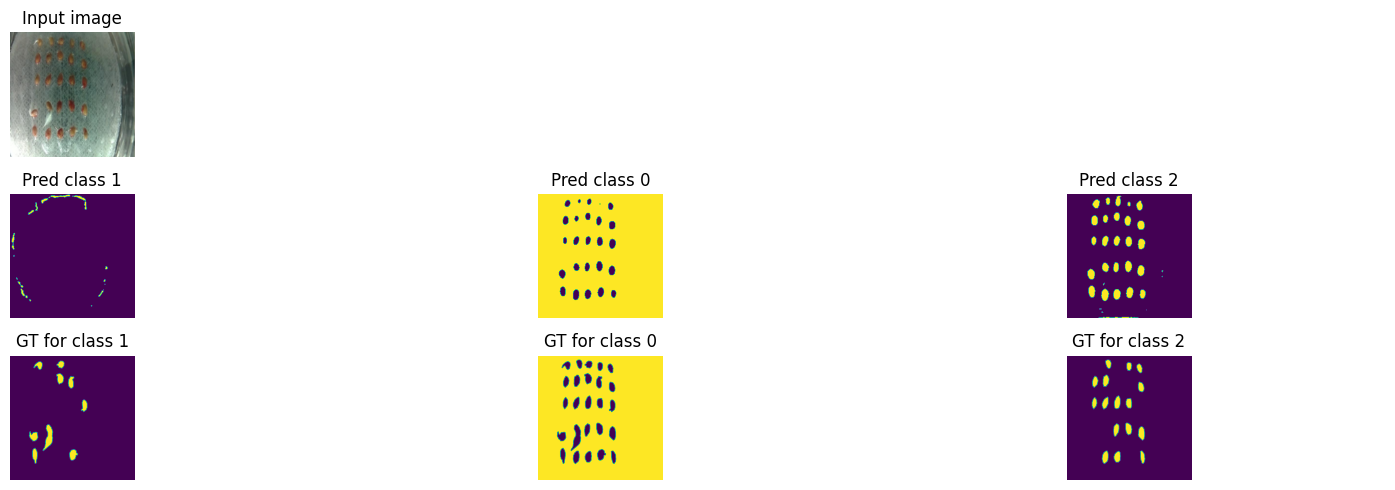

Train loss: 0.04646 | Time: 1m 0s | Val loss: 0.02956
Train_DICE_avg: 0.44250 | Train_Jaccard_avg: 0.36661 | Train_Sensitivity_avg: 0.72456 | Train_Specificity_avg: 0.71935 
Class 0 - Train_DICE: 0.62807 | Train_Jaccard: 0.53360 | Train_Sensitivity: 0.99209 | Train_Specificity: 0.18534 
Class 1 - Train_DICE: 0.15671 | Train_Jaccard: 0.15272 | Train_Sensitivity: 0.59450 | Train_Specificity: 0.98599 
Class 2 - Train_DICE: 0.54272 | Train_Jaccard: 0.41351 | Train_Sensitivity: 0.58708 | Train_Specificity: 0.98672 
Val_DICE_avg: 0.57112 | Val_Jaccard_avg: 0.51921 | Val_Sensitivity_avg: 0.94095 | Val_Specificity_avg: 0.72448 
Class 0 - Val_DICE: 0.94368 | Val_Jaccard: 0.89523 | Val_Sensitivity: 0.99677 | Val_Specificity: 0.21381 
Class 1 - Val_DICE: 0.41321 | Val_Jaccard: 0.41297 | Val_Sensitivity: 0.93905 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.35648 | Val_Jaccard: 0.24944 | Val_Sensitivity: 0.88704 | Val_Specificity: 0.97127 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.02592 | Time: 2m 1s | Val loss: 0.02123
Train_DICE_avg: 0.62509 | Train_Jaccard_avg: 0.56888 | Train_Sensitivity_avg: 0.91436 | Train_Specificity_avg: 0.82754 
Class 0 - Train_DICE: 0.96882 | Train_Jaccard: 0.94001 | Train_Sensitivity: 0.99268 | Train_Specificity: 0.51034 
Class 1 - Train_DICE: 0.24811 | Train_Jaccard: 0.24708 | Train_Sensitivity: 0.94392 | Train_Specificity: 0.98592 
Class 2 - Train_DICE: 0.65832 | Train_Jaccard: 0.51956 | Train_Sensitivity: 0.80647 | Train_Specificity: 0.98636 
Val_DICE_avg: 0.58723 | Val_Jaccard_avg: 0.54482 | Val_Sensitivity_avg: 0.93766 | Val_Specificity_avg: 0.84401 
Class 0 - Val_DICE: 0.98905 | Val_Jaccard: 0.97843 | Val_Sensitivity: 0.99459 | Val_Specificity: 0.57356 
Class 1 - Val_DICE: 0.40552 | Val_Jaccard: 0.40449 | Val_Sensitivity: 0.92671 | Val_Specificity: 0.98839 
Class 2 - Val_DICE: 0.36711 | Val_Jaccard: 0.25155 | Val_Sensitivity: 0.89169 | Val_Specificity: 0.97007 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.01979 | Time: 3m 1s | Val loss: 0.01674
Train_DICE_avg: 0.64034 | Train_Jaccard_avg: 0.58705 | Train_Sensitivity_avg: 0.92259 | Train_Specificity_avg: 0.86121 
Class 0 - Train_DICE: 0.98059 | Train_Jaccard: 0.96206 | Train_Sensitivity: 0.99154 | Train_Specificity: 0.61209 
Class 1 - Train_DICE: 0.25533 | Train_Jaccard: 0.25470 | Train_Sensitivity: 0.95648 | Train_Specificity: 0.98552 
Class 2 - Train_DICE: 0.68510 | Train_Jaccard: 0.54440 | Train_Sensitivity: 0.81977 | Train_Specificity: 0.98602 
Val_DICE_avg: 0.59144 | Val_Jaccard_avg: 0.54588 | Val_Sensitivity_avg: 0.93113 | Val_Specificity_avg: 0.87579 
Class 0 - Val_DICE: 0.99196 | Val_Jaccard: 0.98411 | Val_Sensitivity: 0.99409 | Val_Specificity: 0.66869 
Class 1 - Val_DICE: 0.38095 | Val_Jaccard: 0.38095 | Val_Sensitivity: 0.89127 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.40140 | Val_Jaccard: 0.27259 | Val_Sensitivity: 0.90804 | Val_Specificity: 0.97034 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.01620 | Time: 4m 2s | Val loss: 0.01376
Train_DICE_avg: 0.64927 | Train_Jaccard_avg: 0.59751 | Train_Sensitivity_avg: 0.92814 | Train_Specificity_avg: 0.87150 
Class 0 - Train_DICE: 0.98320 | Train_Jaccard: 0.96707 | Train_Sensitivity: 0.99187 | Train_Specificity: 0.64241 
Class 1 - Train_DICE: 0.26062 | Train_Jaccard: 0.26017 | Train_Sensitivity: 0.96042 | Train_Specificity: 0.98545 
Class 2 - Train_DICE: 0.70399 | Train_Jaccard: 0.56529 | Train_Sensitivity: 0.83214 | Train_Specificity: 0.98662 
Val_DICE_avg: 0.64533 | Val_Jaccard_avg: 0.59483 | Val_Sensitivity_avg: 0.96748 | Val_Specificity_avg: 0.86838 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98468 | Val_Sensitivity: 0.99646 | Val_Specificity: 0.64380 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.47546 | Val_Jaccard: 0.33154 | Val_Sensitivity: 0.90599 | Val_Specificity: 0.97301 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.01346 | Time: 5m 3s | Val loss: 0.01210
Train_DICE_avg: 0.65440 | Train_Jaccard_avg: 0.60379 | Train_Sensitivity_avg: 0.93983 | Train_Specificity_avg: 0.88416 
Class 0 - Train_DICE: 0.98512 | Train_Jaccard: 0.97077 | Train_Sensitivity: 0.99188 | Train_Specificity: 0.68022 
Class 1 - Train_DICE: 0.26673 | Train_Jaccard: 0.26644 | Train_Sensitivity: 0.96392 | Train_Specificity: 0.98563 
Class 2 - Train_DICE: 0.71134 | Train_Jaccard: 0.57416 | Train_Sensitivity: 0.86367 | Train_Specificity: 0.98662 
Val_DICE_avg: 0.65081 | Val_Jaccard_avg: 0.60056 | Val_Sensitivity_avg: 0.98170 | Val_Specificity_avg: 0.88113 
Class 0 - Val_DICE: 0.99307 | Val_Jaccard: 0.98627 | Val_Sensitivity: 0.99637 | Val_Specificity: 0.68108 
Class 1 - Val_DICE: 0.46871 | Val_Jaccard: 0.46848 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98835 
Class 2 - Val_DICE: 0.49067 | Val_Jaccard: 0.34693 | Val_Sensitivity: 0.94874 | Val_Specificity: 0.97395 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


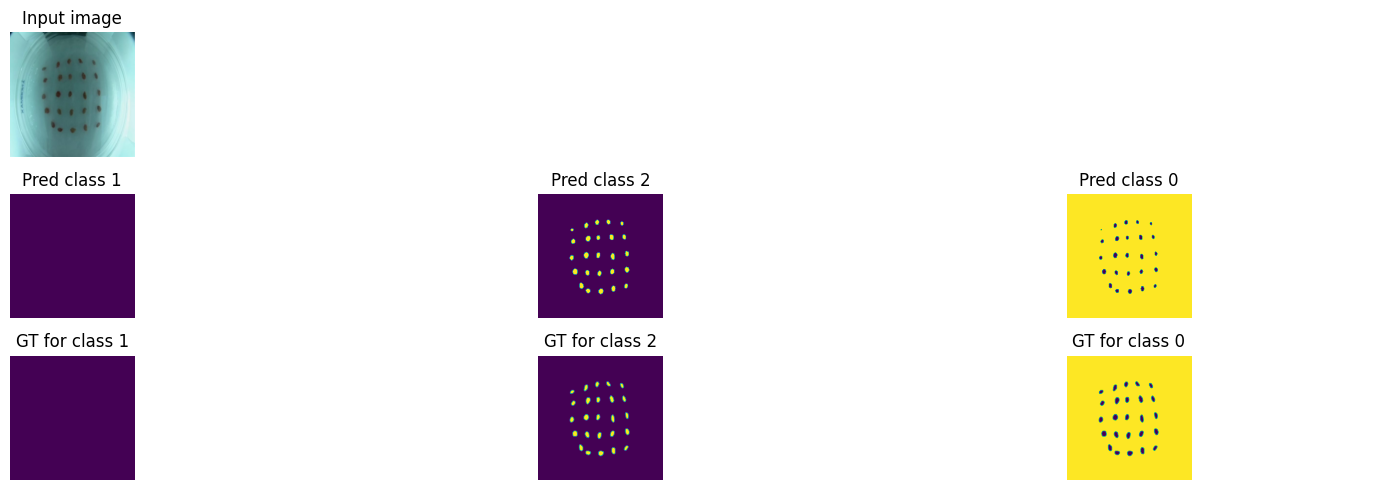

Train loss: 0.01155 | Time: 6m 4s | Val loss: 0.00980
Train_DICE_avg: 0.66707 | Train_Jaccard_avg: 0.61325 | Train_Sensitivity_avg: 0.93829 | Train_Specificity_avg: 0.88862 
Class 0 - Train_DICE: 0.98623 | Train_Jaccard: 0.97292 | Train_Sensitivity: 0.99227 | Train_Specificity: 0.69313 
Class 1 - Train_DICE: 0.29548 | Train_Jaccard: 0.28409 | Train_Sensitivity: 0.94514 | Train_Specificity: 0.98620 
Class 2 - Train_DICE: 0.71950 | Train_Jaccard: 0.58275 | Train_Sensitivity: 0.87746 | Train_Specificity: 0.98654 
Val_DICE_avg: 0.63891 | Val_Jaccard_avg: 0.57942 | Val_Sensitivity_avg: 0.91208 | Val_Specificity_avg: 0.87442 
Class 0 - Val_DICE: 0.99308 | Val_Jaccard: 0.98628 | Val_Sensitivity: 0.99823 | Val_Specificity: 0.65768 
Class 1 - Val_DICE: 0.40113 | Val_Jaccard: 0.37255 | Val_Sensitivity: 0.77439 | Val_Specificity: 0.99004 
Class 2 - Val_DICE: 0.52252 | Val_Jaccard: 0.37942 | Val_Sensitivity: 0.96362 | Val_Specificity: 0.97554 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00980 | Time: 7m 4s | Val loss: 0.00869
Train_DICE_avg: 0.69032 | Train_Jaccard_avg: 0.62981 | Train_Sensitivity_avg: 0.93133 | Train_Specificity_avg: 0.89611 
Class 0 - Train_DICE: 0.98746 | Train_Jaccard: 0.97530 | Train_Sensitivity: 0.99262 | Train_Specificity: 0.71431 
Class 1 - Train_DICE: 0.35366 | Train_Jaccard: 0.31954 | Train_Sensitivity: 0.91226 | Train_Specificity: 0.98714 
Class 2 - Train_DICE: 0.72983 | Train_Jaccard: 0.59459 | Train_Sensitivity: 0.88910 | Train_Specificity: 0.98689 
Val_DICE_avg: 0.70228 | Val_Jaccard_avg: 0.63512 | Val_Sensitivity_avg: 0.89281 | Val_Specificity_avg: 0.84819 
Class 0 - Val_DICE: 0.99032 | Val_Jaccard: 0.98089 | Val_Sensitivity: 0.99885 | Val_Specificity: 0.57050 
Class 1 - Val_DICE: 0.43586 | Val_Jaccard: 0.39504 | Val_Sensitivity: 0.75367 | Val_Specificity: 0.99163 
Class 2 - Val_DICE: 0.68066 | Val_Jaccard: 0.52945 | Val_Sensitivity: 0.92592 | Val_Specificity: 0.98244 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.00859 | Time: 8m 4s | Val loss: 0.00782
Train_DICE_avg: 0.69743 | Train_Jaccard_avg: 0.63423 | Train_Sensitivity_avg: 0.92571 | Train_Specificity_avg: 0.89725 
Class 0 - Train_DICE: 0.98778 | Train_Jaccard: 0.97593 | Train_Sensitivity: 0.99261 | Train_Specificity: 0.71751 
Class 1 - Train_DICE: 0.37185 | Train_Jaccard: 0.32896 | Train_Sensitivity: 0.88912 | Train_Specificity: 0.98746 
Class 2 - Train_DICE: 0.73266 | Train_Jaccard: 0.59779 | Train_Sensitivity: 0.89540 | Train_Specificity: 0.98677 
Val_DICE_avg: 0.69810 | Val_Jaccard_avg: 0.62473 | Val_Sensitivity_avg: 0.89188 | Val_Specificity_avg: 0.84761 
Class 0 - Val_DICE: 0.99014 | Val_Jaccard: 0.98054 | Val_Sensitivity: 0.99906 | Val_Specificity: 0.57147 
Class 1 - Val_DICE: 0.51111 | Val_Jaccard: 0.45202 | Val_Sensitivity: 0.72106 | Val_Specificity: 0.99314 
Class 2 - Val_DICE: 0.59304 | Val_Jaccard: 0.44163 | Val_Sensitivity: 0.95553 | Val_Specificity: 0.97823 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.00751 | Time: 9m 4s | Val loss: 0.00627
Train_DICE_avg: 0.70930 | Train_Jaccard_avg: 0.64402 | Train_Sensitivity_avg: 0.92247 | Train_Specificity_avg: 0.90214 
Class 0 - Train_DICE: 0.98853 | Train_Jaccard: 0.97738 | Train_Sensitivity: 0.99289 | Train_Specificity: 0.73111 
Class 1 - Train_DICE: 0.39665 | Train_Jaccard: 0.34616 | Train_Sensitivity: 0.87523 | Train_Specificity: 0.98814 
Class 2 - Train_DICE: 0.74271 | Train_Jaccard: 0.60852 | Train_Sensitivity: 0.89930 | Train_Specificity: 0.98716 
Val_DICE_avg: 0.74758 | Val_Jaccard_avg: 0.68276 | Val_Sensitivity_avg: 0.95751 | Val_Specificity_avg: 0.86349 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98407 | Val_Sensitivity: 0.99856 | Val_Specificity: 0.61629 
Class 1 - Val_DICE: 0.56851 | Val_Jaccard: 0.52737 | Val_Sensitivity: 0.92484 | Val_Specificity: 0.99145 
Class 2 - Val_DICE: 0.68229 | Val_Jaccard: 0.53684 | Val_Sensitivity: 0.94913 | Val_Specificity: 0.98272 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00671 | Time: 10m 5s | Val loss: 0.00563
Train_DICE_avg: 0.71646 | Train_Jaccard_avg: 0.65035 | Train_Sensitivity_avg: 0.92094 | Train_Specificity_avg: 0.90502 
Class 0 - Train_DICE: 0.98880 | Train_Jaccard: 0.97791 | Train_Sensitivity: 0.99306 | Train_Specificity: 0.73948 
Class 1 - Train_DICE: 0.41287 | Train_Jaccard: 0.35838 | Train_Sensitivity: 0.86785 | Train_Specificity: 0.98823 
Class 2 - Train_DICE: 0.74770 | Train_Jaccard: 0.61475 | Train_Sensitivity: 0.90191 | Train_Specificity: 0.98735 
Val_DICE_avg: 0.73103 | Val_Jaccard_avg: 0.66084 | Val_Sensitivity_avg: 0.90109 | Val_Specificity_avg: 0.85810 
Class 0 - Val_DICE: 0.99138 | Val_Jaccard: 0.98295 | Val_Sensitivity: 0.99898 | Val_Specificity: 0.59806 
Class 1 - Val_DICE: 0.49221 | Val_Jaccard: 0.43363 | Val_Sensitivity: 0.74651 | Val_Specificity: 0.99251 
Class 2 - Val_DICE: 0.70949 | Val_Jaccard: 0.56593 | Val_Sensitivity: 0.95777 | Val_Specificity: 0.98374 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


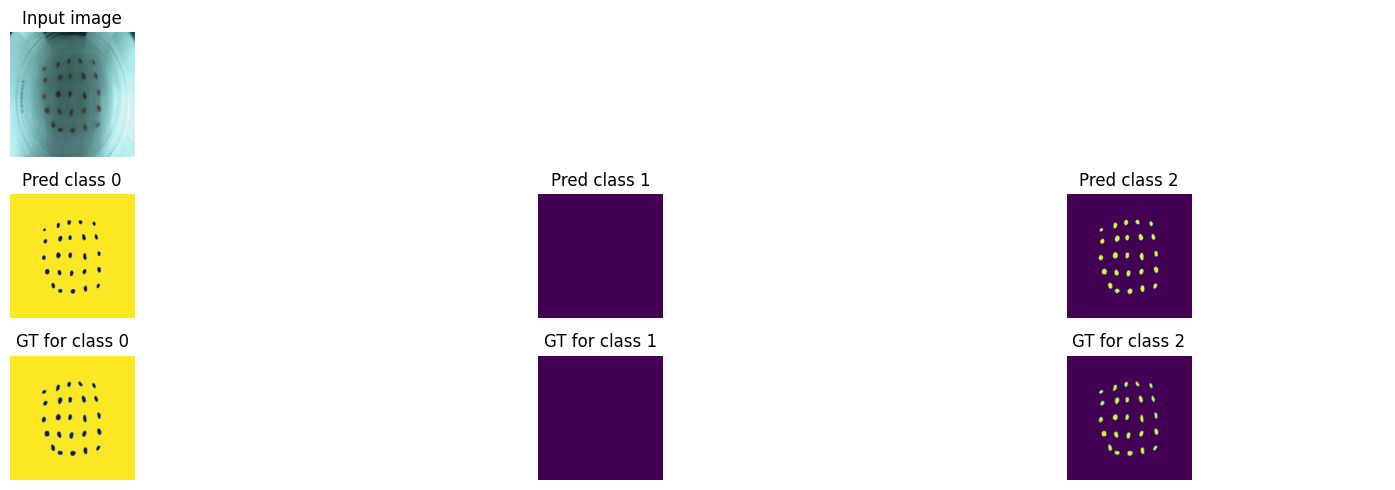

Train loss: 0.00576 | Time: 11m 9s | Val loss: 0.00437
Train_DICE_avg: 0.71919 | Train_Jaccard_avg: 0.65243 | Train_Sensitivity_avg: 0.91576 | Train_Specificity_avg: 0.90801 
Class 0 - Train_DICE: 0.98920 | Train_Jaccard: 0.97870 | Train_Sensitivity: 0.99299 | Train_Specificity: 0.74811 
Class 1 - Train_DICE: 0.41609 | Train_Jaccard: 0.35822 | Train_Sensitivity: 0.85241 | Train_Specificity: 0.98842 
Class 2 - Train_DICE: 0.75228 | Train_Jaccard: 0.62037 | Train_Sensitivity: 0.90187 | Train_Specificity: 0.98750 
Val_DICE_avg: 0.77642 | Val_Jaccard_avg: 0.71030 | Val_Sensitivity_avg: 0.95720 | Val_Specificity_avg: 0.86095 
Class 0 - Val_DICE: 0.99150 | Val_Jaccard: 0.98318 | Val_Sensitivity: 0.99911 | Val_Specificity: 0.60501 
Class 1 - Val_DICE: 0.60799 | Val_Jaccard: 0.55708 | Val_Sensitivity: 0.93997 | Val_Specificity: 0.99202 
Class 2 - Val_DICE: 0.72977 | Val_Jaccard: 0.59063 | Val_Sensitivity: 0.93251 | Val_Specificity: 0.98582 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00468 | Time: 12m 12s | Val loss: 0.00748
Train_DICE_avg: 0.73328 | Train_Jaccard_avg: 0.66601 | Train_Sensitivity_avg: 0.91965 | Train_Specificity_avg: 0.90910 
Class 0 - Train_DICE: 0.98977 | Train_Jaccard: 0.97980 | Train_Sensitivity: 0.99354 | Train_Specificity: 0.75055 
Class 1 - Train_DICE: 0.44639 | Train_Jaccard: 0.38476 | Train_Sensitivity: 0.85867 | Train_Specificity: 0.98886 
Class 2 - Train_DICE: 0.76368 | Train_Jaccard: 0.63348 | Train_Sensitivity: 0.90675 | Train_Specificity: 0.98789 
Val_DICE_avg: 0.75881 | Val_Jaccard_avg: 0.68273 | Val_Sensitivity_avg: 0.90897 | Val_Specificity_avg: 0.85348 
Class 0 - Val_DICE: 0.99032 | Val_Jaccard: 0.98089 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.58300 
Class 1 - Val_DICE: 0.64112 | Val_Jaccard: 0.57837 | Val_Sensitivity: 0.85389 | Val_Specificity: 0.99366 
Class 2 - Val_DICE: 0.64498 | Val_Jaccard: 0.48892 | Val_Sensitivity: 0.87385 | Val_Specificity: 0.98378 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00408 | Time: 13m 15s | Val loss: 0.00312
Train_DICE_avg: 0.73418 | Train_Jaccard_avg: 0.66632 | Train_Sensitivity_avg: 0.91804 | Train_Specificity_avg: 0.91114 
Class 0 - Train_DICE: 0.99008 | Train_Jaccard: 0.98042 | Train_Sensitivity: 0.99371 | Train_Specificity: 0.75647 
Class 1 - Train_DICE: 0.44801 | Train_Jaccard: 0.38302 | Train_Sensitivity: 0.84994 | Train_Specificity: 0.98897 
Class 2 - Train_DICE: 0.76446 | Train_Jaccard: 0.63553 | Train_Sensitivity: 0.91047 | Train_Specificity: 0.98797 
Val_DICE_avg: 0.77206 | Val_Jaccard_avg: 0.69834 | Val_Sensitivity_avg: 0.93161 | Val_Specificity_avg: 0.86837 
Class 0 - Val_DICE: 0.99261 | Val_Jaccard: 0.98537 | Val_Sensitivity: 0.99906 | Val_Specificity: 0.62941 
Class 1 - Val_DICE: 0.64787 | Val_Jaccard: 0.58127 | Val_Sensitivity: 0.82362 | Val_Specificity: 0.99399 
Class 2 - Val_DICE: 0.67570 | Val_Jaccard: 0.52838 | Val_Sensitivity: 0.97216 | Val_Specificity: 0.98170 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00368 | Time: 14m 19s | Val loss: 0.00277
Train_DICE_avg: 0.74656 | Train_Jaccard_avg: 0.67873 | Train_Sensitivity_avg: 0.91624 | Train_Specificity_avg: 0.91325 
Class 0 - Train_DICE: 0.99022 | Train_Jaccard: 0.98069 | Train_Sensitivity: 0.99388 | Train_Specificity: 0.76178 
Class 1 - Train_DICE: 0.47329 | Train_Jaccard: 0.40641 | Train_Sensitivity: 0.84421 | Train_Specificity: 0.98948 
Class 2 - Train_DICE: 0.77616 | Train_Jaccard: 0.64907 | Train_Sensitivity: 0.91065 | Train_Specificity: 0.98848 
Val_DICE_avg: 0.79747 | Val_Jaccard_avg: 0.73024 | Val_Sensitivity_avg: 0.95395 | Val_Specificity_avg: 0.85823 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98310 | Val_Sensitivity: 0.99915 | Val_Specificity: 0.59500 
Class 1 - Val_DICE: 0.64863 | Val_Jaccard: 0.58818 | Val_Sensitivity: 0.90744 | Val_Specificity: 0.99339 
Class 2 - Val_DICE: 0.75234 | Val_Jaccard: 0.61943 | Val_Sensitivity: 0.95526 | Val_Specificity: 0.98630 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00346 | Time: 15m 22s | Val loss: 0.00264
Train_DICE_avg: 0.74674 | Train_Jaccard_avg: 0.67901 | Train_Sensitivity_avg: 0.91591 | Train_Specificity_avg: 0.91376 
Class 0 - Train_DICE: 0.99044 | Train_Jaccard: 0.98111 | Train_Sensitivity: 0.99396 | Train_Specificity: 0.76326 
Class 1 - Train_DICE: 0.47304 | Train_Jaccard: 0.40566 | Train_Sensitivity: 0.84177 | Train_Specificity: 0.98959 
Class 2 - Train_DICE: 0.77673 | Train_Jaccard: 0.65024 | Train_Sensitivity: 0.91200 | Train_Specificity: 0.98844 
Val_DICE_avg: 0.78861 | Val_Jaccard_avg: 0.71315 | Val_Sensitivity_avg: 0.94232 | Val_Specificity_avg: 0.87084 
Class 0 - Val_DICE: 0.99273 | Val_Jaccard: 0.98561 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.63625 
Class 1 - Val_DICE: 0.68900 | Val_Jaccard: 0.61908 | Val_Sensitivity: 0.85430 | Val_Specificity: 0.99453 
Class 2 - Val_DICE: 0.68411 | Val_Jaccard: 0.53477 | Val_Sensitivity: 0.97348 | Val_Specificity: 0.98173 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


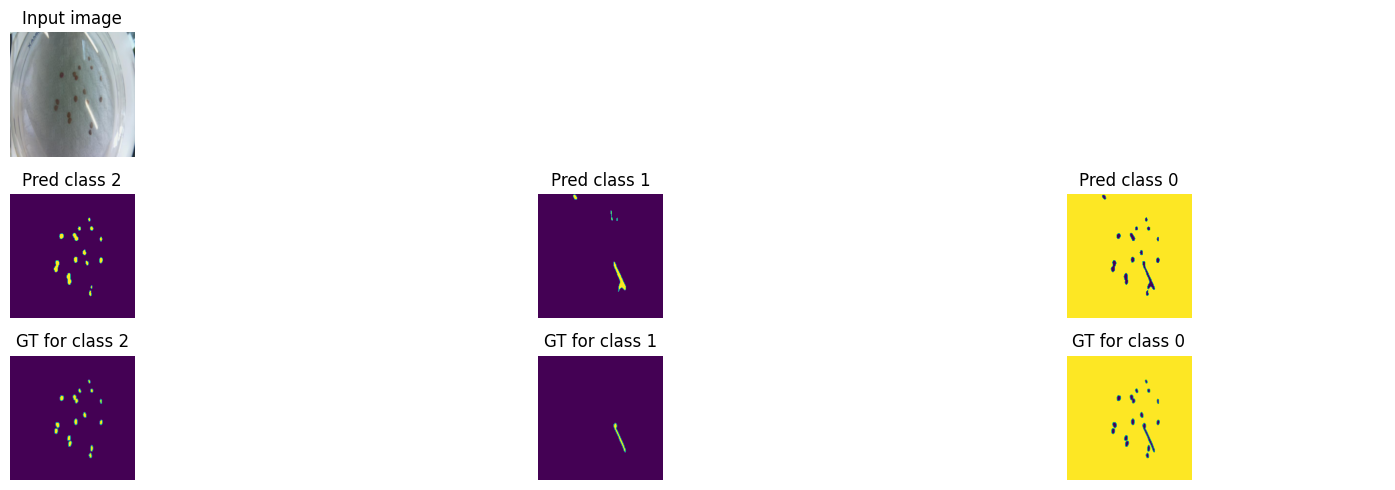

Train loss: 0.00319 | Time: 16m 27s | Val loss: 0.00251
Train_DICE_avg: 0.74819 | Train_Jaccard_avg: 0.67999 | Train_Sensitivity_avg: 0.91529 | Train_Specificity_avg: 0.91505 
Class 0 - Train_DICE: 0.99088 | Train_Jaccard: 0.98197 | Train_Sensitivity: 0.99468 | Train_Specificity: 0.76730 
Class 1 - Train_DICE: 0.47368 | Train_Jaccard: 0.40399 | Train_Sensitivity: 0.83544 | Train_Specificity: 0.98942 
Class 2 - Train_DICE: 0.78002 | Train_Jaccard: 0.65402 | Train_Sensitivity: 0.91575 | Train_Specificity: 0.98842 
Val_DICE_avg: 0.81223 | Val_Jaccard_avg: 0.74348 | Val_Sensitivity_avg: 0.95753 | Val_Specificity_avg: 0.85633 
Class 0 - Val_DICE: 0.99106 | Val_Jaccard: 0.98233 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.58823 
Class 1 - Val_DICE: 0.68773 | Val_Jaccard: 0.62329 | Val_Sensitivity: 0.91724 | Val_Specificity: 0.99416 
Class 2 - Val_DICE: 0.75790 | Val_Jaccard: 0.62483 | Val_Sensitivity: 0.95604 | Val_Specificity: 0.98661 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.00320 | Time: 17m 32s | Val loss: 0.00225
Train_DICE_avg: 0.75140 | Train_Jaccard_avg: 0.68382 | Train_Sensitivity_avg: 0.91750 | Train_Specificity_avg: 0.91566 
Class 0 - Train_DICE: 0.99021 | Train_Jaccard: 0.98068 | Train_Sensitivity: 0.99385 | Train_Specificity: 0.76864 
Class 1 - Train_DICE: 0.47877 | Train_Jaccard: 0.41079 | Train_Sensitivity: 0.84581 | Train_Specificity: 0.98973 
Class 2 - Train_DICE: 0.78520 | Train_Jaccard: 0.65999 | Train_Sensitivity: 0.91284 | Train_Specificity: 0.98860 
Val_DICE_avg: 0.79578 | Val_Jaccard_avg: 0.72379 | Val_Sensitivity_avg: 0.95582 | Val_Specificity_avg: 0.87382 
Class 0 - Val_DICE: 0.99293 | Val_Jaccard: 0.98599 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.64393 
Class 1 - Val_DICE: 0.67344 | Val_Jaccard: 0.60734 | Val_Sensitivity: 0.89721 | Val_Specificity: 0.99362 
Class 2 - Val_DICE: 0.72096 | Val_Jaccard: 0.57806 | Val_Sensitivity: 0.97111 | Val_Specificity: 0.98391 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00296 | Time: 18m 37s | Val loss: 0.00227
Train_DICE_avg: 0.76085 | Train_Jaccard_avg: 0.69332 | Train_Sensitivity_avg: 0.91972 | Train_Specificity_avg: 0.91732 
Class 0 - Train_DICE: 0.99107 | Train_Jaccard: 0.98234 | Train_Sensitivity: 0.99451 | Train_Specificity: 0.77310 
Class 1 - Train_DICE: 0.50216 | Train_Jaccard: 0.43079 | Train_Sensitivity: 0.84666 | Train_Specificity: 0.98978 
Class 2 - Train_DICE: 0.78932 | Train_Jaccard: 0.66684 | Train_Sensitivity: 0.91797 | Train_Specificity: 0.98907 
Val_DICE_avg: 0.82329 | Val_Jaccard_avg: 0.75464 | Val_Sensitivity_avg: 0.95845 | Val_Specificity_avg: 0.85929 
Class 0 - Val_DICE: 0.99147 | Val_Jaccard: 0.98313 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59706 
Class 1 - Val_DICE: 0.70263 | Val_Jaccard: 0.63514 | Val_Sensitivity: 0.91951 | Val_Specificity: 0.99390 
Class 2 - Val_DICE: 0.77578 | Val_Jaccard: 0.64565 | Val_Sensitivity: 0.95655 | Val_Specificity: 0.98691 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00290 | Time: 19m 40s | Val loss: 0.00214
Train_DICE_avg: 0.76522 | Train_Jaccard_avg: 0.69771 | Train_Sensitivity_avg: 0.91754 | Train_Specificity_avg: 0.91787 
Class 0 - Train_DICE: 0.99093 | Train_Jaccard: 0.98207 | Train_Sensitivity: 0.99449 | Train_Specificity: 0.77387 
Class 1 - Train_DICE: 0.50943 | Train_Jaccard: 0.43659 | Train_Sensitivity: 0.84113 | Train_Specificity: 0.99023 
Class 2 - Train_DICE: 0.79529 | Train_Jaccard: 0.67446 | Train_Sensitivity: 0.91701 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.82806 | Val_Jaccard_avg: 0.75776 | Val_Sensitivity_avg: 0.95594 | Val_Specificity_avg: 0.85611 
Class 0 - Val_DICE: 0.99102 | Val_Jaccard: 0.98226 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.58734 
Class 1 - Val_DICE: 0.72074 | Val_Jaccard: 0.65176 | Val_Sensitivity: 0.90512 | Val_Specificity: 0.99486 
Class 2 - Val_DICE: 0.77242 | Val_Jaccard: 0.63928 | Val_Sensitivity: 0.96328 | Val_Specificity: 0.98614 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.00274 | Time: 20m 43s | Val loss: 0.00208
Train_DICE_avg: 0.77218 | Train_Jaccard_avg: 0.70468 | Train_Sensitivity_avg: 0.92461 | Train_Specificity_avg: 0.91661 
Class 0 - Train_DICE: 0.99126 | Train_Jaccard: 0.98271 | Train_Sensitivity: 0.99499 | Train_Specificity: 0.77062 
Class 1 - Train_DICE: 0.53016 | Train_Jaccard: 0.45806 | Train_Sensitivity: 0.85811 | Train_Specificity: 0.99013 
Class 2 - Train_DICE: 0.79511 | Train_Jaccard: 0.67326 | Train_Sensitivity: 0.92071 | Train_Specificity: 0.98909 
Val_DICE_avg: 0.79595 | Val_Jaccard_avg: 0.72306 | Val_Sensitivity_avg: 0.93495 | Val_Specificity_avg: 0.86243 
Class 0 - Val_DICE: 0.99183 | Val_Jaccard: 0.98385 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.60843 
Class 1 - Val_DICE: 0.68187 | Val_Jaccard: 0.61282 | Val_Sensitivity: 0.82603 | Val_Specificity: 0.99532 
Class 2 - Val_DICE: 0.71414 | Val_Jaccard: 0.57251 | Val_Sensitivity: 0.97940 | Val_Specificity: 0.98353 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


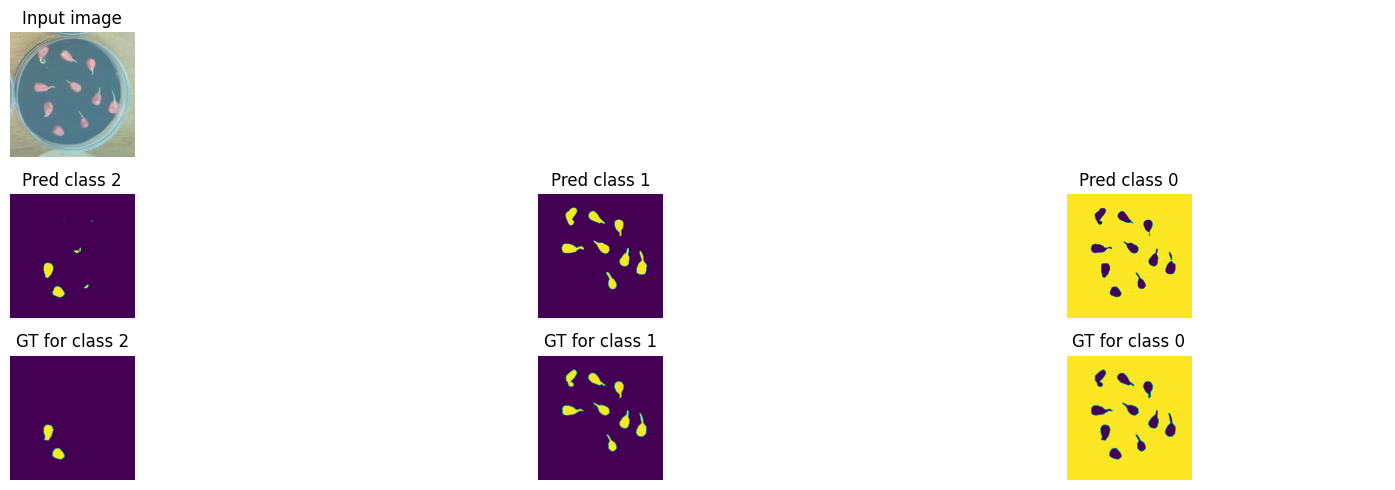

Train loss: 0.00270 | Time: 21m 48s | Val loss: 0.00193
Train_DICE_avg: 0.76582 | Train_Jaccard_avg: 0.69860 | Train_Sensitivity_avg: 0.92099 | Train_Specificity_avg: 0.91758 
Class 0 - Train_DICE: 0.99123 | Train_Jaccard: 0.98266 | Train_Sensitivity: 0.99479 | Train_Specificity: 0.77324 
Class 1 - Train_DICE: 0.51117 | Train_Jaccard: 0.43948 | Train_Sensitivity: 0.85006 | Train_Specificity: 0.99015 
Class 2 - Train_DICE: 0.79506 | Train_Jaccard: 0.67368 | Train_Sensitivity: 0.91810 | Train_Specificity: 0.98935 
Val_DICE_avg: 0.81506 | Val_Jaccard_avg: 0.74494 | Val_Sensitivity_avg: 0.96243 | Val_Specificity_avg: 0.86856 
Class 0 - Val_DICE: 0.99244 | Val_Jaccard: 0.98504 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62624 
Class 1 - Val_DICE: 0.70528 | Val_Jaccard: 0.63964 | Val_Sensitivity: 0.92127 | Val_Specificity: 0.99407 
Class 2 - Val_DICE: 0.74745 | Val_Jaccard: 0.61015 | Val_Sensitivity: 0.96674 | Val_Specificity: 0.98538 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00258 | Time: 22m 51s | Val loss: 0.00187
Train_DICE_avg: 0.76739 | Train_Jaccard_avg: 0.69981 | Train_Sensitivity_avg: 0.92135 | Train_Specificity_avg: 0.91669 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98302 | Train_Sensitivity: 0.99522 | Train_Specificity: 0.77068 
Class 1 - Train_DICE: 0.51248 | Train_Jaccard: 0.43862 | Train_Sensitivity: 0.84776 | Train_Specificity: 0.99002 
Class 2 - Train_DICE: 0.79827 | Train_Jaccard: 0.67778 | Train_Sensitivity: 0.92108 | Train_Specificity: 0.98937 
Val_DICE_avg: 0.81147 | Val_Jaccard_avg: 0.73814 | Val_Sensitivity_avg: 0.95021 | Val_Specificity_avg: 0.87751 
Class 0 - Val_DICE: 0.99329 | Val_Jaccard: 0.98670 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.65396 
Class 1 - Val_DICE: 0.71276 | Val_Jaccard: 0.64276 | Val_Sensitivity: 0.87727 | Val_Specificity: 0.99477 
Class 2 - Val_DICE: 0.72837 | Val_Jaccard: 0.58496 | Val_Sensitivity: 0.97414 | Val_Specificity: 0.98380 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00252 | Time: 23m 55s | Val loss: 0.00188
Train_DICE_avg: 0.77133 | Train_Jaccard_avg: 0.70378 | Train_Sensitivity_avg: 0.92318 | Train_Specificity_avg: 0.91841 
Class 0 - Train_DICE: 0.99153 | Train_Jaccard: 0.98325 | Train_Sensitivity: 0.99514 | Train_Specificity: 0.77567 
Class 1 - Train_DICE: 0.52401 | Train_Jaccard: 0.44997 | Train_Sensitivity: 0.85120 | Train_Specificity: 0.99038 
Class 2 - Train_DICE: 0.79844 | Train_Jaccard: 0.67811 | Train_Sensitivity: 0.92320 | Train_Specificity: 0.98918 
Val_DICE_avg: 0.79885 | Val_Jaccard_avg: 0.72547 | Val_Sensitivity_avg: 0.95658 | Val_Specificity_avg: 0.88293 
Class 0 - Val_DICE: 0.99356 | Val_Jaccard: 0.98724 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.67110 
Class 1 - Val_DICE: 0.69125 | Val_Jaccard: 0.62053 | Val_Sensitivity: 0.89521 | Val_Specificity: 0.99417 
Class 2 - Val_DICE: 0.71175 | Val_Jaccard: 0.56863 | Val_Sensitivity: 0.97538 | Val_Specificity: 0.98353 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00246 | Time: 24m 58s | Val loss: 0.00181
Train_DICE_avg: 0.76687 | Train_Jaccard_avg: 0.69959 | Train_Sensitivity_avg: 0.92293 | Train_Specificity_avg: 0.91711 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98335 | Train_Sensitivity: 0.99532 | Train_Specificity: 0.77210 
Class 1 - Train_DICE: 0.50789 | Train_Jaccard: 0.43433 | Train_Sensitivity: 0.85038 | Train_Specificity: 0.98996 
Class 2 - Train_DICE: 0.80114 | Train_Jaccard: 0.68111 | Train_Sensitivity: 0.92310 | Train_Specificity: 0.98926 
Val_DICE_avg: 0.81332 | Val_Jaccard_avg: 0.74254 | Val_Sensitivity_avg: 0.95454 | Val_Specificity_avg: 0.86921 
Class 0 - Val_DICE: 0.99257 | Val_Jaccard: 0.98529 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.62775 
Class 1 - Val_DICE: 0.69097 | Val_Jaccard: 0.62003 | Val_Sensitivity: 0.89148 | Val_Specificity: 0.99412 
Class 2 - Val_DICE: 0.75642 | Val_Jaccard: 0.62230 | Val_Sensitivity: 0.97292 | Val_Specificity: 0.98575 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00240 | Time: 26m 2s | Val loss: 0.00181
Train_DICE_avg: 0.77596 | Train_Jaccard_avg: 0.70985 | Train_Sensitivity_avg: 0.92600 | Train_Specificity_avg: 0.92103 
Class 0 - Train_DICE: 0.99179 | Train_Jaccard: 0.98374 | Train_Sensitivity: 0.99543 | Train_Specificity: 0.78293 
Class 1 - Train_DICE: 0.52945 | Train_Jaccard: 0.45695 | Train_Sensitivity: 0.86150 | Train_Specificity: 0.99037 
Class 2 - Train_DICE: 0.80663 | Train_Jaccard: 0.68887 | Train_Sensitivity: 0.92108 | Train_Specificity: 0.98980 
Val_DICE_avg: 0.79801 | Val_Jaccard_avg: 0.72438 | Val_Sensitivity_avg: 0.93179 | Val_Specificity_avg: 0.86654 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.61992 
Class 1 - Val_DICE: 0.66678 | Val_Jaccard: 0.59007 | Val_Sensitivity: 0.81338 | Val_Specificity: 0.99486 
Class 2 - Val_DICE: 0.73508 | Val_Jaccard: 0.59853 | Val_Sensitivity: 0.98269 | Val_Specificity: 0.98483 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


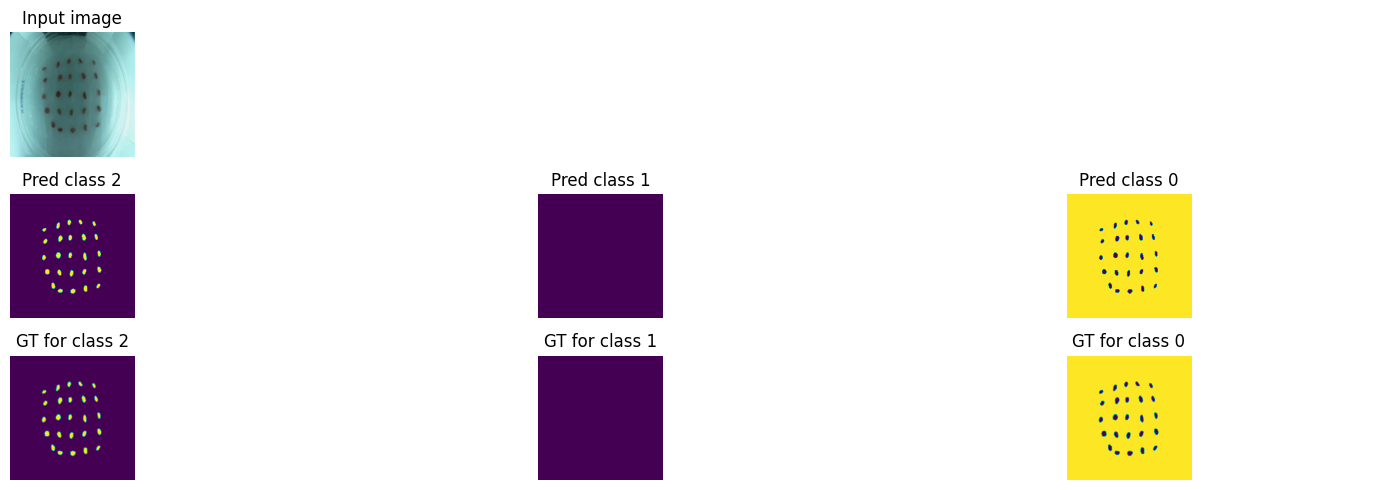

Train loss: 0.00238 | Time: 27m 6s | Val loss: 0.00178
Train_DICE_avg: 0.78014 | Train_Jaccard_avg: 0.71390 | Train_Sensitivity_avg: 0.92658 | Train_Specificity_avg: 0.92045 
Class 0 - Train_DICE: 0.99176 | Train_Jaccard: 0.98369 | Train_Sensitivity: 0.99531 | Train_Specificity: 0.78067 
Class 1 - Train_DICE: 0.54114 | Train_Jaccard: 0.46776 | Train_Sensitivity: 0.86049 | Train_Specificity: 0.99074 
Class 2 - Train_DICE: 0.80752 | Train_Jaccard: 0.69024 | Train_Sensitivity: 0.92395 | Train_Specificity: 0.98994 
Val_DICE_avg: 0.80732 | Val_Jaccard_avg: 0.73372 | Val_Sensitivity_avg: 0.94907 | Val_Specificity_avg: 0.87307 
Class 0 - Val_DICE: 0.99285 | Val_Jaccard: 0.98584 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.64054 
Class 1 - Val_DICE: 0.70653 | Val_Jaccard: 0.63668 | Val_Sensitivity: 0.86907 | Val_Specificity: 0.99507 
Class 2 - Val_DICE: 0.72257 | Val_Jaccard: 0.57864 | Val_Sensitivity: 0.97879 | Val_Specificity: 0.98359 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00235 | Time: 28m 9s | Val loss: 0.00180
Train_DICE_avg: 0.77747 | Train_Jaccard_avg: 0.71083 | Train_Sensitivity_avg: 0.92701 | Train_Specificity_avg: 0.91949 
Class 0 - Train_DICE: 0.99176 | Train_Jaccard: 0.98368 | Train_Sensitivity: 0.99548 | Train_Specificity: 0.77863 
Class 1 - Train_DICE: 0.53271 | Train_Jaccard: 0.45863 | Train_Sensitivity: 0.85948 | Train_Specificity: 0.99023 
Class 2 - Train_DICE: 0.80796 | Train_Jaccard: 0.69017 | Train_Sensitivity: 0.92607 | Train_Specificity: 0.98960 
Val_DICE_avg: 0.83712 | Val_Jaccard_avg: 0.77115 | Val_Sensitivity_avg: 0.96299 | Val_Specificity_avg: 0.86149 
Class 0 - Val_DICE: 0.99151 | Val_Jaccard: 0.98321 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.60172 
Class 1 - Val_DICE: 0.72124 | Val_Jaccard: 0.65503 | Val_Sensitivity: 0.92541 | Val_Specificity: 0.99489 
Class 2 - Val_DICE: 0.79862 | Val_Jaccard: 0.67522 | Val_Sensitivity: 0.96416 | Val_Specificity: 0.98787 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00233 | Time: 29m 13s | Val loss: 0.00171
Train_DICE_avg: 0.78455 | Train_Jaccard_avg: 0.71833 | Train_Sensitivity_avg: 0.92870 | Train_Specificity_avg: 0.92066 
Class 0 - Train_DICE: 0.99189 | Train_Jaccard: 0.98394 | Train_Sensitivity: 0.99557 | Train_Specificity: 0.78133 
Class 1 - Train_DICE: 0.55144 | Train_Jaccard: 0.47679 | Train_Sensitivity: 0.86502 | Train_Specificity: 0.99074 
Class 2 - Train_DICE: 0.81032 | Train_Jaccard: 0.69425 | Train_Sensitivity: 0.92550 | Train_Specificity: 0.98993 
Val_DICE_avg: 0.81635 | Val_Jaccard_avg: 0.74417 | Val_Sensitivity_avg: 0.95539 | Val_Specificity_avg: 0.87079 
Class 0 - Val_DICE: 0.99263 | Val_Jaccard: 0.98541 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.63294 
Class 1 - Val_DICE: 0.71682 | Val_Jaccard: 0.64596 | Val_Sensitivity: 0.88936 | Val_Specificity: 0.99480 
Class 2 - Val_DICE: 0.73961 | Val_Jaccard: 0.60113 | Val_Sensitivity: 0.97749 | Val_Specificity: 0.98464 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00226 | Time: 30m 16s | Val loss: 0.00178
Train_DICE_avg: 0.78156 | Train_Jaccard_avg: 0.71572 | Train_Sensitivity_avg: 0.92954 | Train_Specificity_avg: 0.92031 
Class 0 - Train_DICE: 0.99195 | Train_Jaccard: 0.98406 | Train_Sensitivity: 0.99571 | Train_Specificity: 0.78051 
Class 1 - Train_DICE: 0.54049 | Train_Jaccard: 0.46692 | Train_Sensitivity: 0.86539 | Train_Specificity: 0.99051 
Class 2 - Train_DICE: 0.81226 | Train_Jaccard: 0.69619 | Train_Sensitivity: 0.92751 | Train_Specificity: 0.98992 
Val_DICE_avg: 0.81212 | Val_Jaccard_avg: 0.74180 | Val_Sensitivity_avg: 0.95186 | Val_Specificity_avg: 0.86885 
Class 0 - Val_DICE: 0.99223 | Val_Jaccard: 0.98463 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62603 
Class 1 - Val_DICE: 0.69209 | Val_Jaccard: 0.62487 | Val_Sensitivity: 0.88395 | Val_Specificity: 0.99502 
Class 2 - Val_DICE: 0.75204 | Val_Jaccard: 0.61590 | Val_Sensitivity: 0.97227 | Val_Specificity: 0.98549 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00227 | Time: 31m 19s | Val loss: 0.00170
Train_DICE_avg: 0.78142 | Train_Jaccard_avg: 0.71474 | Train_Sensitivity_avg: 0.93061 | Train_Specificity_avg: 0.91935 
Class 0 - Train_DICE: 0.99193 | Train_Jaccard: 0.98402 | Train_Sensitivity: 0.99568 | Train_Specificity: 0.77796 
Class 1 - Train_DICE: 0.54448 | Train_Jaccard: 0.46984 | Train_Sensitivity: 0.86808 | Train_Specificity: 0.99042 
Class 2 - Train_DICE: 0.80787 | Train_Jaccard: 0.69037 | Train_Sensitivity: 0.92808 | Train_Specificity: 0.98968 
Val_DICE_avg: 0.83438 | Val_Jaccard_avg: 0.76492 | Val_Sensitivity_avg: 0.95406 | Val_Specificity_avg: 0.86147 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98334 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60244 
Class 1 - Val_DICE: 0.72984 | Val_Jaccard: 0.65804 | Val_Sensitivity: 0.88610 | Val_Specificity: 0.99517 
Class 2 - Val_DICE: 0.78172 | Val_Jaccard: 0.65338 | Val_Sensitivity: 0.97670 | Val_Specificity: 0.98679 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


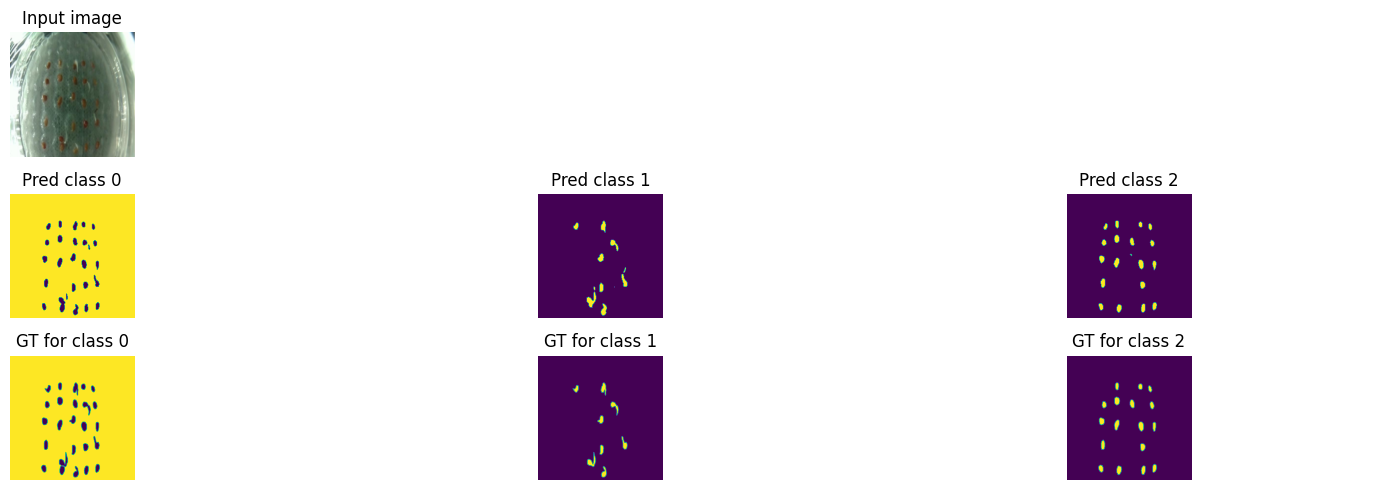

Train loss: 0.00227 | Time: 32m 24s | Val loss: 0.00171
Train_DICE_avg: 0.77893 | Train_Jaccard_avg: 0.71267 | Train_Sensitivity_avg: 0.92814 | Train_Specificity_avg: 0.92014 
Class 0 - Train_DICE: 0.99189 | Train_Jaccard: 0.98394 | Train_Sensitivity: 0.99562 | Train_Specificity: 0.78037 
Class 1 - Train_DICE: 0.53480 | Train_Jaccard: 0.46096 | Train_Sensitivity: 0.86257 | Train_Specificity: 0.99038 
Class 2 - Train_DICE: 0.81009 | Train_Jaccard: 0.69310 | Train_Sensitivity: 0.92622 | Train_Specificity: 0.98967 
Val_DICE_avg: 0.82545 | Val_Jaccard_avg: 0.75462 | Val_Sensitivity_avg: 0.95549 | Val_Specificity_avg: 0.86793 
Class 0 - Val_DICE: 0.99233 | Val_Jaccard: 0.98482 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62322 
Class 1 - Val_DICE: 0.72148 | Val_Jaccard: 0.65218 | Val_Sensitivity: 0.89516 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.76252 | Val_Jaccard: 0.62685 | Val_Sensitivity: 0.97192 | Val_Specificity: 0.98550 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00224 | Time: 33m 28s | Val loss: 0.00166
Train_DICE_avg: 0.78493 | Train_Jaccard_avg: 0.71853 | Train_Sensitivity_avg: 0.92940 | Train_Specificity_avg: 0.92036 
Class 0 - Train_DICE: 0.99196 | Train_Jaccard: 0.98408 | Train_Sensitivity: 0.99583 | Train_Specificity: 0.78046 
Class 1 - Train_DICE: 0.54963 | Train_Jaccard: 0.47423 | Train_Sensitivity: 0.86434 | Train_Specificity: 0.99075 
Class 2 - Train_DICE: 0.81320 | Train_Jaccard: 0.69728 | Train_Sensitivity: 0.92804 | Train_Specificity: 0.98989 
Val_DICE_avg: 0.83495 | Val_Jaccard_avg: 0.76685 | Val_Sensitivity_avg: 0.96692 | Val_Specificity_avg: 0.86185 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98366 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60374 
Class 1 - Val_DICE: 0.72509 | Val_Jaccard: 0.65554 | Val_Sensitivity: 0.93349 | Val_Specificity: 0.99444 
Class 2 - Val_DICE: 0.78802 | Val_Jaccard: 0.66134 | Val_Sensitivity: 0.96792 | Val_Specificity: 0.98738 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00217 | Time: 34m 33s | Val loss: 0.00173
Train_DICE_avg: 0.78580 | Train_Jaccard_avg: 0.72038 | Train_Sensitivity_avg: 0.93227 | Train_Specificity_avg: 0.92299 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98465 | Train_Sensitivity: 0.99593 | Train_Specificity: 0.78828 
Class 1 - Train_DICE: 0.54833 | Train_Jaccard: 0.47432 | Train_Sensitivity: 0.87225 | Train_Specificity: 0.99056 
Class 2 - Train_DICE: 0.81683 | Train_Jaccard: 0.70216 | Train_Sensitivity: 0.92862 | Train_Specificity: 0.99014 
Val_DICE_avg: 0.81074 | Val_Jaccard_avg: 0.73658 | Val_Sensitivity_avg: 0.94766 | Val_Specificity_avg: 0.87400 
Class 0 - Val_DICE: 0.99305 | Val_Jaccard: 0.98623 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.64304 
Class 1 - Val_DICE: 0.71194 | Val_Jaccard: 0.63756 | Val_Sensitivity: 0.86057 | Val_Specificity: 0.99498 
Class 2 - Val_DICE: 0.72722 | Val_Jaccard: 0.58596 | Val_Sensitivity: 0.98308 | Val_Specificity: 0.98399 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00216 | Time: 35m 38s | Val loss: 0.00168
Train_DICE_avg: 0.79371 | Train_Jaccard_avg: 0.72828 | Train_Sensitivity_avg: 0.93360 | Train_Specificity_avg: 0.92331 
Class 0 - Train_DICE: 0.99224 | Train_Jaccard: 0.98463 | Train_Sensitivity: 0.99584 | Train_Specificity: 0.78858 
Class 1 - Train_DICE: 0.57000 | Train_Jaccard: 0.49495 | Train_Sensitivity: 0.87588 | Train_Specificity: 0.99099 
Class 2 - Train_DICE: 0.81890 | Train_Jaccard: 0.70526 | Train_Sensitivity: 0.92907 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.83967 | Val_Jaccard_avg: 0.77030 | Val_Sensitivity_avg: 0.96438 | Val_Specificity_avg: 0.86878 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98471 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62472 
Class 1 - Val_DICE: 0.74974 | Val_Jaccard: 0.67982 | Val_Sensitivity: 0.92790 | Val_Specificity: 0.99491 
Class 2 - Val_DICE: 0.77700 | Val_Jaccard: 0.64638 | Val_Sensitivity: 0.96586 | Val_Specificity: 0.98669 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00218 | Time: 36m 42s | Val loss: 0.00163
Train_DICE_avg: 0.78790 | Train_Jaccard_avg: 0.72156 | Train_Sensitivity_avg: 0.93358 | Train_Specificity_avg: 0.91894 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98416 | Train_Sensitivity: 0.99578 | Train_Specificity: 0.77619 
Class 1 - Train_DICE: 0.55689 | Train_Jaccard: 0.48097 | Train_Sensitivity: 0.87164 | Train_Specificity: 0.99071 
Class 2 - Train_DICE: 0.81481 | Train_Jaccard: 0.69955 | Train_Sensitivity: 0.93331 | Train_Specificity: 0.98992 
Val_DICE_avg: 0.82388 | Val_Jaccard_avg: 0.75350 | Val_Sensitivity_avg: 0.95739 | Val_Specificity_avg: 0.87139 
Class 0 - Val_DICE: 0.99279 | Val_Jaccard: 0.98571 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.63350 
Class 1 - Val_DICE: 0.70290 | Val_Jaccard: 0.62896 | Val_Sensitivity: 0.90326 | Val_Specificity: 0.99399 
Class 2 - Val_DICE: 0.77594 | Val_Jaccard: 0.64583 | Val_Sensitivity: 0.96972 | Val_Specificity: 0.98668 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


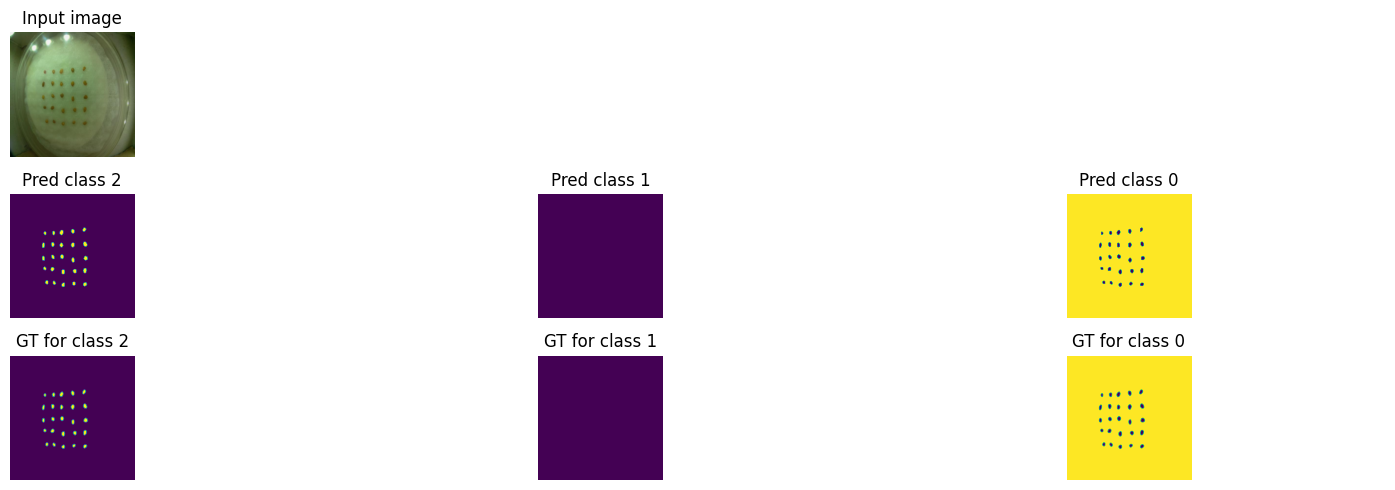

Train loss: 0.00210 | Time: 37m 47s | Val loss: 0.00165
Train_DICE_avg: 0.78892 | Train_Jaccard_avg: 0.72288 | Train_Sensitivity_avg: 0.93543 | Train_Specificity_avg: 0.92109 
Class 0 - Train_DICE: 0.99232 | Train_Jaccard: 0.98480 | Train_Sensitivity: 0.99617 | Train_Specificity: 0.78268 
Class 1 - Train_DICE: 0.55891 | Train_Jaccard: 0.48334 | Train_Sensitivity: 0.87613 | Train_Specificity: 0.99073 
Class 2 - Train_DICE: 0.81552 | Train_Jaccard: 0.70051 | Train_Sensitivity: 0.93400 | Train_Specificity: 0.98986 
Val_DICE_avg: 0.81900 | Val_Jaccard_avg: 0.74871 | Val_Sensitivity_avg: 0.94920 | Val_Specificity_avg: 0.86323 
Class 0 - Val_DICE: 0.99176 | Val_Jaccard: 0.98370 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60839 
Class 1 - Val_DICE: 0.70277 | Val_Jaccard: 0.63123 | Val_Sensitivity: 0.87181 | Val_Specificity: 0.99490 
Class 2 - Val_DICE: 0.76246 | Val_Jaccard: 0.63118 | Val_Sensitivity: 0.97638 | Val_Specificity: 0.98641 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00210 | Time: 38m 52s | Val loss: 0.00159
Train_DICE_avg: 0.79260 | Train_Jaccard_avg: 0.72695 | Train_Sensitivity_avg: 0.93572 | Train_Specificity_avg: 0.92143 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98469 | Train_Sensitivity: 0.99600 | Train_Specificity: 0.78311 
Class 1 - Train_DICE: 0.56855 | Train_Jaccard: 0.49298 | Train_Sensitivity: 0.87831 | Train_Specificity: 0.99092 
Class 2 - Train_DICE: 0.81698 | Train_Jaccard: 0.70318 | Train_Sensitivity: 0.93283 | Train_Specificity: 0.99025 
Val_DICE_avg: 0.82684 | Val_Jaccard_avg: 0.75511 | Val_Sensitivity_avg: 0.96243 | Val_Specificity_avg: 0.87347 
Class 0 - Val_DICE: 0.99297 | Val_Jaccard: 0.98608 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.64039 
Class 1 - Val_DICE: 0.73152 | Val_Jaccard: 0.66044 | Val_Sensitivity: 0.91595 | Val_Specificity: 0.99475 
Class 2 - Val_DICE: 0.75603 | Val_Jaccard: 0.61880 | Val_Sensitivity: 0.97195 | Val_Specificity: 0.98528 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00207 | Time: 39m 56s | Val loss: 0.00154
Train_DICE_avg: 0.79632 | Train_Jaccard_avg: 0.73070 | Train_Sensitivity_avg: 0.93687 | Train_Specificity_avg: 0.92197 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99606 | Train_Specificity: 0.78479 
Class 1 - Train_DICE: 0.57777 | Train_Jaccard: 0.50213 | Train_Sensitivity: 0.88046 | Train_Specificity: 0.99113 
Class 2 - Train_DICE: 0.81884 | Train_Jaccard: 0.70511 | Train_Sensitivity: 0.93409 | Train_Specificity: 0.99000 
Val_DICE_avg: 0.82691 | Val_Jaccard_avg: 0.75602 | Val_Sensitivity_avg: 0.95938 | Val_Specificity_avg: 0.87158 
Class 0 - Val_DICE: 0.99272 | Val_Jaccard: 0.98558 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.63459 
Class 1 - Val_DICE: 0.72735 | Val_Jaccard: 0.65802 | Val_Sensitivity: 0.90696 | Val_Specificity: 0.99468 
Class 2 - Val_DICE: 0.76065 | Val_Jaccard: 0.62446 | Val_Sensitivity: 0.97183 | Val_Specificity: 0.98548 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00204 | Time: 41m 0s | Val loss: 0.00157
Train_DICE_avg: 0.79112 | Train_Jaccard_avg: 0.72571 | Train_Sensitivity_avg: 0.93434 | Train_Specificity_avg: 0.92157 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98511 | Train_Sensitivity: 0.99625 | Train_Specificity: 0.78371 
Class 1 - Train_DICE: 0.56208 | Train_Jaccard: 0.48657 | Train_Sensitivity: 0.87075 | Train_Specificity: 0.99089 
Class 2 - Train_DICE: 0.81879 | Train_Jaccard: 0.70546 | Train_Sensitivity: 0.93603 | Train_Specificity: 0.99009 
Val_DICE_avg: 0.83839 | Val_Jaccard_avg: 0.76754 | Val_Sensitivity_avg: 0.95475 | Val_Specificity_avg: 0.86968 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98507 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62788 
Class 1 - Val_DICE: 0.75698 | Val_Jaccard: 0.68497 | Val_Sensitivity: 0.88415 | Val_Specificity: 0.99548 
Class 2 - Val_DICE: 0.76573 | Val_Jaccard: 0.63259 | Val_Sensitivity: 0.98072 | Val_Specificity: 0.98569 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00201 | Time: 42m 4s | Val loss: 0.00154
Train_DICE_avg: 0.79198 | Train_Jaccard_avg: 0.72639 | Train_Sensitivity_avg: 0.93708 | Train_Specificity_avg: 0.92100 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98513 | Train_Sensitivity: 0.99638 | Train_Specificity: 0.78225 
Class 1 - Train_DICE: 0.56455 | Train_Jaccard: 0.48867 | Train_Sensitivity: 0.87790 | Train_Specificity: 0.99072 
Class 2 - Train_DICE: 0.81890 | Train_Jaccard: 0.70535 | Train_Sensitivity: 0.93698 | Train_Specificity: 0.99003 
Val_DICE_avg: 0.83827 | Val_Jaccard_avg: 0.76765 | Val_Sensitivity_avg: 0.96348 | Val_Specificity_avg: 0.86515 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98429 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.61418 
Class 1 - Val_DICE: 0.75942 | Val_Jaccard: 0.68834 | Val_Sensitivity: 0.91392 | Val_Specificity: 0.99534 
Class 2 - Val_DICE: 0.76332 | Val_Jaccard: 0.63032 | Val_Sensitivity: 0.97709 | Val_Specificity: 0.98594 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


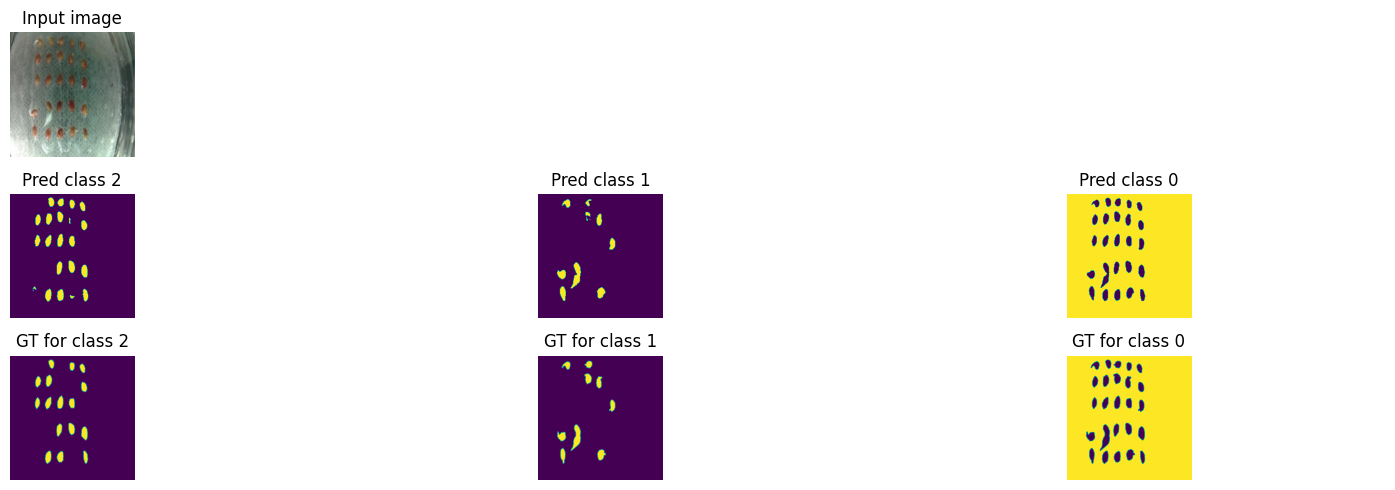

Train loss: 0.00200 | Time: 43m 9s | Val loss: 0.00162
Train_DICE_avg: 0.79637 | Train_Jaccard_avg: 0.73101 | Train_Sensitivity_avg: 0.93818 | Train_Specificity_avg: 0.92104 
Class 0 - Train_DICE: 0.99245 | Train_Jaccard: 0.98505 | Train_Sensitivity: 0.99630 | Train_Specificity: 0.78191 
Class 1 - Train_DICE: 0.57503 | Train_Jaccard: 0.49864 | Train_Sensitivity: 0.88144 | Train_Specificity: 0.99096 
Class 2 - Train_DICE: 0.82164 | Train_Jaccard: 0.70933 | Train_Sensitivity: 0.93681 | Train_Specificity: 0.99025 
Val_DICE_avg: 0.84577 | Val_Jaccard_avg: 0.77763 | Val_Sensitivity_avg: 0.95343 | Val_Specificity_avg: 0.85982 
Class 0 - Val_DICE: 0.99137 | Val_Jaccard: 0.98294 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.59662 
Class 1 - Val_DICE: 0.75169 | Val_Jaccard: 0.68032 | Val_Sensitivity: 0.88847 | Val_Specificity: 0.99537 
Class 2 - Val_DICE: 0.79425 | Val_Jaccard: 0.66962 | Val_Sensitivity: 0.97240 | Val_Specificity: 0.98746 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.00201 | Time: 44m 13s | Val loss: 0.00155
Train_DICE_avg: 0.79693 | Train_Jaccard_avg: 0.73145 | Train_Sensitivity_avg: 0.93674 | Train_Specificity_avg: 0.92214 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98514 | Train_Sensitivity: 0.99624 | Train_Specificity: 0.78542 
Class 1 - Train_DICE: 0.57973 | Train_Jaccard: 0.50424 | Train_Sensitivity: 0.87855 | Train_Specificity: 0.99092 
Class 2 - Train_DICE: 0.81855 | Train_Jaccard: 0.70498 | Train_Sensitivity: 0.93541 | Train_Specificity: 0.99009 
Val_DICE_avg: 0.82740 | Val_Jaccard_avg: 0.75372 | Val_Sensitivity_avg: 0.96051 | Val_Specificity_avg: 0.87697 
Class 0 - Val_DICE: 0.99328 | Val_Jaccard: 0.98668 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.65157 
Class 1 - Val_DICE: 0.75198 | Val_Jaccard: 0.67732 | Val_Sensitivity: 0.89984 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.73693 | Val_Jaccard: 0.59717 | Val_Sensitivity: 0.98234 | Val_Specificity: 0.98437 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.00197 | Time: 45m 18s | Val loss: 0.00158
Train_DICE_avg: 0.79846 | Train_Jaccard_avg: 0.73318 | Train_Sensitivity_avg: 0.93961 | Train_Specificity_avg: 0.92185 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98515 | Train_Sensitivity: 0.99632 | Train_Specificity: 0.78447 
Class 1 - Train_DICE: 0.58062 | Train_Jaccard: 0.50406 | Train_Sensitivity: 0.88439 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.82225 | Train_Jaccard: 0.71034 | Train_Sensitivity: 0.93813 | Train_Specificity: 0.99015 
Val_DICE_avg: 0.82666 | Val_Jaccard_avg: 0.75674 | Val_Sensitivity_avg: 0.96323 | Val_Specificity_avg: 0.87455 
Class 0 - Val_DICE: 0.99286 | Val_Jaccard: 0.98585 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.64295 
Class 1 - Val_DICE: 0.72198 | Val_Jaccard: 0.65211 | Val_Sensitivity: 0.92135 | Val_Specificity: 0.99445 
Class 2 - Val_DICE: 0.76515 | Val_Jaccard: 0.63226 | Val_Sensitivity: 0.96901 | Val_Specificity: 0.98626 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Train loss: 0.00200 | Time: 46m 22s | Val loss: 0.00154
Train_DICE_avg: 0.80185 | Train_Jaccard_avg: 0.73706 | Train_Sensitivity_avg: 0.93542 | Train_Specificity_avg: 0.92496 
Class 0 - Train_DICE: 0.99252 | Train_Jaccard: 0.98517 | Train_Sensitivity: 0.99611 | Train_Specificity: 0.79290 
Class 1 - Train_DICE: 0.58718 | Train_Jaccard: 0.51120 | Train_Sensitivity: 0.87535 | Train_Specificity: 0.99140 
Class 2 - Train_DICE: 0.82585 | Train_Jaccard: 0.71481 | Train_Sensitivity: 0.93481 | Train_Specificity: 0.99059 
Val_DICE_avg: 0.85095 | Val_Jaccard_avg: 0.78284 | Val_Sensitivity_avg: 0.95667 | Val_Specificity_avg: 0.85966 
Class 0 - Val_DICE: 0.99149 | Val_Jaccard: 0.98315 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.59596 
Class 1 - Val_DICE: 0.76443 | Val_Jaccard: 0.69177 | Val_Sensitivity: 0.89436 | Val_Specificity: 0.99544 
Class 2 - Val_DICE: 0.79693 | Val_Jaccard: 0.67358 | Val_Sensitivity: 0.97625 | Val_Specificity: 0.98759 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.00196 | Time: 47m 26s | Val loss: 0.00150
Train_DICE_avg: 0.79742 | Train_Jaccard_avg: 0.73221 | Train_Sensitivity_avg: 0.93825 | Train_Specificity_avg: 0.92283 
Class 0 - Train_DICE: 0.99260 | Train_Jaccard: 0.98534 | Train_Sensitivity: 0.99635 | Train_Specificity: 0.78733 
Class 1 - Train_DICE: 0.57694 | Train_Jaccard: 0.50034 | Train_Sensitivity: 0.88021 | Train_Specificity: 0.99104 
Class 2 - Train_DICE: 0.82272 | Train_Jaccard: 0.71096 | Train_Sensitivity: 0.93819 | Train_Specificity: 0.99014 
Val_DICE_avg: 0.84416 | Val_Jaccard_avg: 0.77570 | Val_Sensitivity_avg: 0.96637 | Val_Specificity_avg: 0.86649 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61740 
Class 1 - Val_DICE: 0.75308 | Val_Jaccard: 0.68234 | Val_Sensitivity: 0.92601 | Val_Specificity: 0.99493 
Class 2 - Val_DICE: 0.78722 | Val_Jaccard: 0.66023 | Val_Sensitivity: 0.97371 | Val_Specificity: 0.98715 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


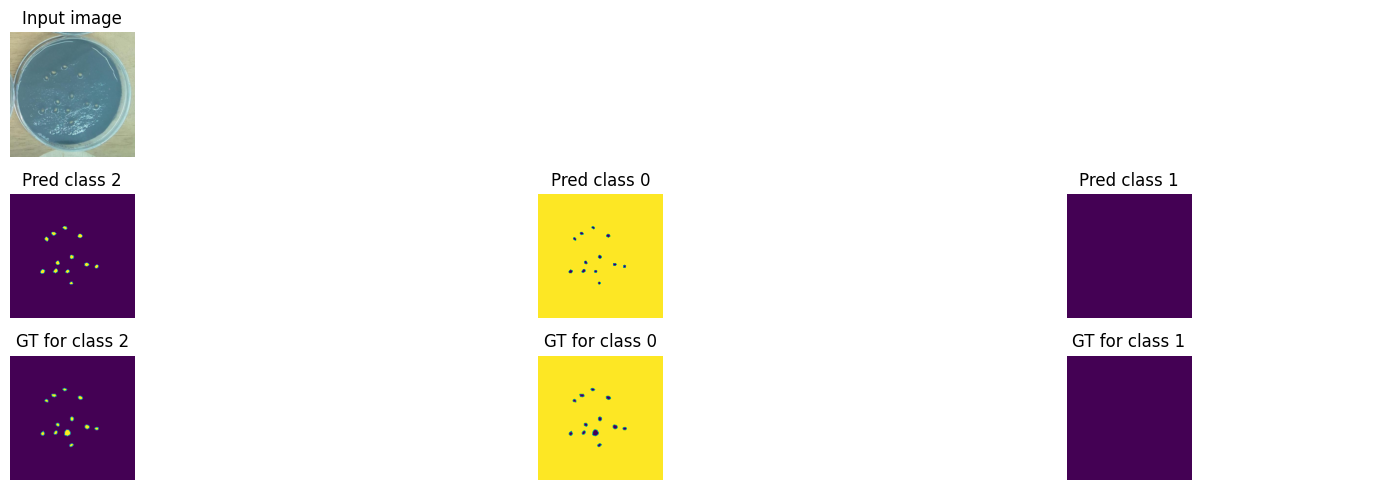

Train loss: 0.00196 | Time: 48m 31s | Val loss: 0.00151
Train_DICE_avg: 0.80312 | Train_Jaccard_avg: 0.73875 | Train_Sensitivity_avg: 0.94042 | Train_Specificity_avg: 0.92644 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98556 | Train_Sensitivity: 0.99626 | Train_Specificity: 0.79716 
Class 1 - Train_DICE: 0.58900 | Train_Jaccard: 0.51301 | Train_Sensitivity: 0.88969 | Train_Specificity: 0.99143 
Class 2 - Train_DICE: 0.82763 | Train_Jaccard: 0.71767 | Train_Sensitivity: 0.93532 | Train_Specificity: 0.99071 
Val_DICE_avg: 0.83452 | Val_Jaccard_avg: 0.76459 | Val_Sensitivity_avg: 0.96957 | Val_Specificity_avg: 0.87218 
Class 0 - Val_DICE: 0.99276 | Val_Jaccard: 0.98566 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.63593 
Class 1 - Val_DICE: 0.74195 | Val_Jaccard: 0.67273 | Val_Sensitivity: 0.93593 | Val_Specificity: 0.99464 
Class 2 - Val_DICE: 0.76884 | Val_Jaccard: 0.63538 | Val_Sensitivity: 0.97347 | Val_Specificity: 0.98597 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00192 | Time: 49m 36s | Val loss: 0.00149
Train_DICE_avg: 0.80309 | Train_Jaccard_avg: 0.73787 | Train_Sensitivity_avg: 0.94143 | Train_Specificity_avg: 0.92274 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98544 | Train_Sensitivity: 0.99643 | Train_Specificity: 0.78662 
Class 1 - Train_DICE: 0.59304 | Train_Jaccard: 0.51638 | Train_Sensitivity: 0.88801 | Train_Specificity: 0.99126 
Class 2 - Train_DICE: 0.82356 | Train_Jaccard: 0.71178 | Train_Sensitivity: 0.93984 | Train_Specificity: 0.99033 
Val_DICE_avg: 0.84485 | Val_Jaccard_avg: 0.77484 | Val_Sensitivity_avg: 0.95998 | Val_Specificity_avg: 0.86671 
Class 0 - Val_DICE: 0.99220 | Val_Jaccard: 0.98456 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61821 
Class 1 - Val_DICE: 0.76030 | Val_Jaccard: 0.68756 | Val_Sensitivity: 0.90371 | Val_Specificity: 0.99540 
Class 2 - Val_DICE: 0.78204 | Val_Jaccard: 0.65241 | Val_Sensitivity: 0.97682 | Val_Specificity: 0.98652 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00191 | Time: 50m 40s | Val loss: 0.00148
Train_DICE_avg: 0.80449 | Train_Jaccard_avg: 0.73937 | Train_Sensitivity_avg: 0.94158 | Train_Specificity_avg: 0.92269 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98543 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.78672 
Class 1 - Train_DICE: 0.59498 | Train_Jaccard: 0.51819 | Train_Sensitivity: 0.89011 | Train_Specificity: 0.99113 
Class 2 - Train_DICE: 0.82585 | Train_Jaccard: 0.71449 | Train_Sensitivity: 0.93813 | Train_Specificity: 0.99021 
Val_DICE_avg: 0.84008 | Val_Jaccard_avg: 0.76936 | Val_Sensitivity_avg: 0.96774 | Val_Specificity_avg: 0.87235 
Class 0 - Val_DICE: 0.99267 | Val_Jaccard: 0.98548 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.63582 
Class 1 - Val_DICE: 0.75884 | Val_Jaccard: 0.68588 | Val_Sensitivity: 0.92798 | Val_Specificity: 0.99500 
Class 2 - Val_DICE: 0.76874 | Val_Jaccard: 0.63672 | Val_Sensitivity: 0.97587 | Val_Specificity: 0.98623 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.00190 | Time: 51m 44s | Val loss: 0.00148
Train_DICE_avg: 0.80133 | Train_Jaccard_avg: 0.73622 | Train_Sensitivity_avg: 0.93779 | Train_Specificity_avg: 0.92375 
Class 0 - Train_DICE: 0.99270 | Train_Jaccard: 0.98552 | Train_Sensitivity: 0.99647 | Train_Specificity: 0.78953 
Class 1 - Train_DICE: 0.58488 | Train_Jaccard: 0.50739 | Train_Sensitivity: 0.87754 | Train_Specificity: 0.99124 
Class 2 - Train_DICE: 0.82641 | Train_Jaccard: 0.71574 | Train_Sensitivity: 0.93937 | Train_Specificity: 0.99049 
Val_DICE_avg: 0.84030 | Val_Jaccard_avg: 0.76979 | Val_Sensitivity_avg: 0.96678 | Val_Specificity_avg: 0.86962 
Class 0 - Val_DICE: 0.99240 | Val_Jaccard: 0.98496 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62756 
Class 1 - Val_DICE: 0.75879 | Val_Jaccard: 0.68694 | Val_Sensitivity: 0.92238 | Val_Specificity: 0.99517 
Class 2 - Val_DICE: 0.76971 | Val_Jaccard: 0.63748 | Val_Sensitivity: 0.97858 | Val_Specificity: 0.98612 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00190 | Time: 52m 48s | Val loss: 0.00146
Train_DICE_avg: 0.80156 | Train_Jaccard_avg: 0.73710 | Train_Sensitivity_avg: 0.94018 | Train_Specificity_avg: 0.92335 
Class 0 - Train_DICE: 0.99267 | Train_Jaccard: 0.98548 | Train_Sensitivity: 0.99641 | Train_Specificity: 0.78851 
Class 1 - Train_DICE: 0.58575 | Train_Jaccard: 0.50982 | Train_Sensitivity: 0.88275 | Train_Specificity: 0.99120 
Class 2 - Train_DICE: 0.82627 | Train_Jaccard: 0.71600 | Train_Sensitivity: 0.94137 | Train_Specificity: 0.99036 
Val_DICE_avg: 0.84311 | Val_Jaccard_avg: 0.77198 | Val_Sensitivity_avg: 0.96706 | Val_Specificity_avg: 0.86977 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98506 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62800 
Class 1 - Val_DICE: 0.76348 | Val_Jaccard: 0.68878 | Val_Sensitivity: 0.92319 | Val_Specificity: 0.99502 
Class 2 - Val_DICE: 0.77339 | Val_Jaccard: 0.64209 | Val_Sensitivity: 0.97864 | Val_Specificity: 0.98628 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


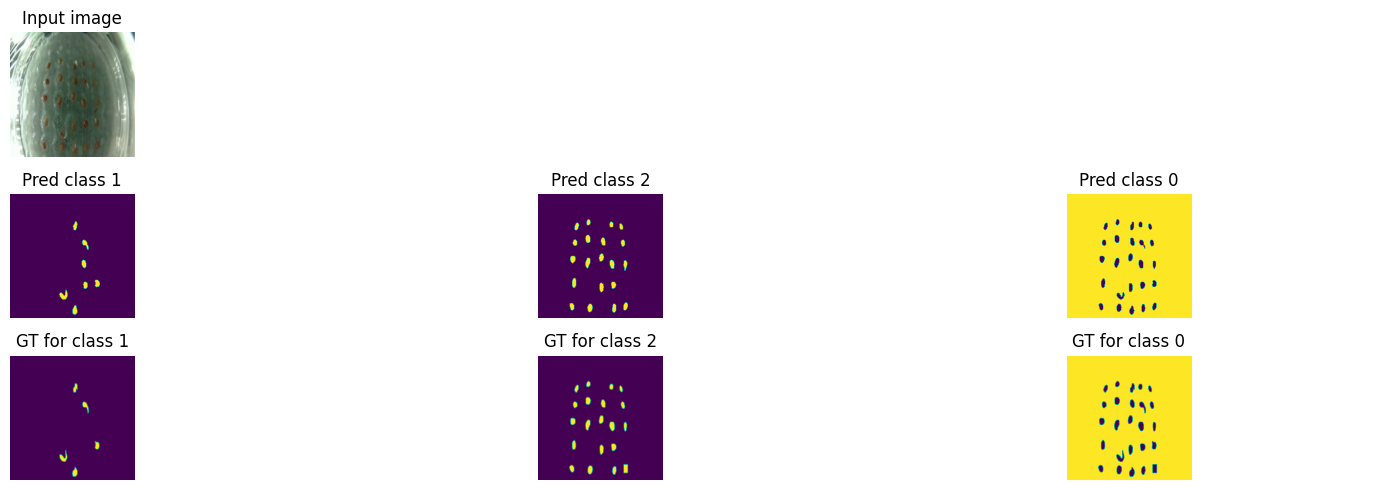

Train loss: 0.00190 | Time: 53m 53s | Val loss: 0.00152
Train_DICE_avg: 0.80357 | Train_Jaccard_avg: 0.73907 | Train_Sensitivity_avg: 0.94060 | Train_Specificity_avg: 0.92443 
Class 0 - Train_DICE: 0.99279 | Train_Jaccard: 0.98571 | Train_Sensitivity: 0.99643 | Train_Specificity: 0.79160 
Class 1 - Train_DICE: 0.59095 | Train_Jaccard: 0.51514 | Train_Sensitivity: 0.88610 | Train_Specificity: 0.99125 
Class 2 - Train_DICE: 0.82696 | Train_Jaccard: 0.71637 | Train_Sensitivity: 0.93928 | Train_Specificity: 0.99045 
Val_DICE_avg: 0.84265 | Val_Jaccard_avg: 0.77302 | Val_Sensitivity_avg: 0.96910 | Val_Specificity_avg: 0.86706 
Class 0 - Val_DICE: 0.99220 | Val_Jaccard: 0.98455 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61953 
Class 1 - Val_DICE: 0.75768 | Val_Jaccard: 0.68572 | Val_Sensitivity: 0.92976 | Val_Specificity: 0.99499 
Class 2 - Val_DICE: 0.77808 | Val_Jaccard: 0.64880 | Val_Sensitivity: 0.97819 | Val_Specificity: 0.98665 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.00189 | Time: 54m 59s | Val loss: 0.00148
Train_DICE_avg: 0.80252 | Train_Jaccard_avg: 0.73802 | Train_Sensitivity_avg: 0.93972 | Train_Specificity_avg: 0.92263 
Class 0 - Train_DICE: 0.99263 | Train_Jaccard: 0.98540 | Train_Sensitivity: 0.99651 | Train_Specificity: 0.78630 
Class 1 - Train_DICE: 0.58911 | Train_Jaccard: 0.51369 | Train_Sensitivity: 0.88388 | Train_Specificity: 0.99126 
Class 2 - Train_DICE: 0.82582 | Train_Jaccard: 0.71498 | Train_Sensitivity: 0.93878 | Train_Specificity: 0.99034 
Val_DICE_avg: 0.83706 | Val_Jaccard_avg: 0.76536 | Val_Sensitivity_avg: 0.96727 | Val_Specificity_avg: 0.87643 
Class 0 - Val_DICE: 0.99307 | Val_Jaccard: 0.98628 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.64885 
Class 1 - Val_DICE: 0.75922 | Val_Jaccard: 0.68686 | Val_Sensitivity: 0.92266 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.75889 | Val_Jaccard: 0.62294 | Val_Sensitivity: 0.97983 | Val_Specificity: 0.98539 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00188 | Time: 56m 3s | Val loss: 0.00146
Train_DICE_avg: 0.80597 | Train_Jaccard_avg: 0.74156 | Train_Sensitivity_avg: 0.93979 | Train_Specificity_avg: 0.92400 
Class 0 - Train_DICE: 0.99274 | Train_Jaccard: 0.98562 | Train_Sensitivity: 0.99640 | Train_Specificity: 0.79003 
Class 1 - Train_DICE: 0.59883 | Train_Jaccard: 0.52338 | Train_Sensitivity: 0.88271 | Train_Specificity: 0.99157 
Class 2 - Train_DICE: 0.82634 | Train_Jaccard: 0.71569 | Train_Sensitivity: 0.94025 | Train_Specificity: 0.99039 
Val_DICE_avg: 0.84369 | Val_Jaccard_avg: 0.77272 | Val_Sensitivity_avg: 0.96497 | Val_Specificity_avg: 0.86972 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98515 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62782 
Class 1 - Val_DICE: 0.76670 | Val_Jaccard: 0.69273 | Val_Sensitivity: 0.91790 | Val_Specificity: 0.99504 
Class 2 - Val_DICE: 0.77186 | Val_Jaccard: 0.64029 | Val_Sensitivity: 0.97763 | Val_Specificity: 0.98630 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00185 | Time: 57m 7s | Val loss: 0.00145
Train_DICE_avg: 0.80802 | Train_Jaccard_avg: 0.74344 | Train_Sensitivity_avg: 0.94083 | Train_Specificity_avg: 0.92441 
Class 0 - Train_DICE: 0.99277 | Train_Jaccard: 0.98567 | Train_Sensitivity: 0.99651 | Train_Specificity: 0.79119 
Class 1 - Train_DICE: 0.60260 | Train_Jaccard: 0.52574 | Train_Sensitivity: 0.88589 | Train_Specificity: 0.99150 
Class 2 - Train_DICE: 0.82869 | Train_Jaccard: 0.71892 | Train_Sensitivity: 0.94008 | Train_Specificity: 0.99055 
Val_DICE_avg: 0.84780 | Val_Jaccard_avg: 0.77603 | Val_Sensitivity_avg: 0.96677 | Val_Specificity_avg: 0.87066 
Class 0 - Val_DICE: 0.99255 | Val_Jaccard: 0.98524 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.63062 
Class 1 - Val_DICE: 0.77965 | Val_Jaccard: 0.70376 | Val_Sensitivity: 0.91953 | Val_Specificity: 0.99525 
Class 2 - Val_DICE: 0.77119 | Val_Jaccard: 0.63909 | Val_Sensitivity: 0.98139 | Val_Specificity: 0.98611 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00186 | Time: 58m 11s | Val loss: 0.00147
Train_DICE_avg: 0.80397 | Train_Jaccard_avg: 0.73918 | Train_Sensitivity_avg: 0.94140 | Train_Specificity_avg: 0.92411 
Class 0 - Train_DICE: 0.99280 | Train_Jaccard: 0.98573 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.79067 
Class 1 - Train_DICE: 0.59102 | Train_Jaccard: 0.51393 | Train_Sensitivity: 0.88718 | Train_Specificity: 0.99122 
Class 2 - Train_DICE: 0.82810 | Train_Jaccard: 0.71787 | Train_Sensitivity: 0.94048 | Train_Specificity: 0.99044 
Val_DICE_avg: 0.85159 | Val_Jaccard_avg: 0.78082 | Val_Sensitivity_avg: 0.96675 | Val_Specificity_avg: 0.86780 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98485 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.62151 
Class 1 - Val_DICE: 0.78023 | Val_Jaccard: 0.70494 | Val_Sensitivity: 0.92336 | Val_Specificity: 0.99528 
Class 2 - Val_DICE: 0.78220 | Val_Jaccard: 0.65266 | Val_Sensitivity: 0.97749 | Val_Specificity: 0.98660 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


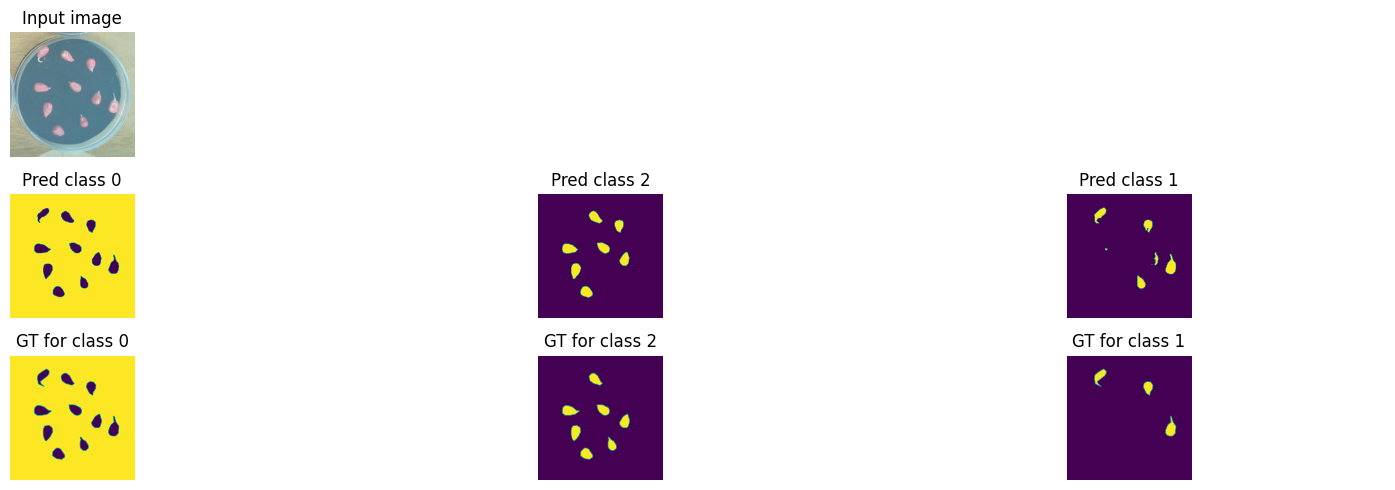

Train loss: 0.00183 | Time: 59m 16s | Val loss: 0.00148
Train_DICE_avg: 0.80516 | Train_Jaccard_avg: 0.74075 | Train_Sensitivity_avg: 0.94215 | Train_Specificity_avg: 0.92311 
Class 0 - Train_DICE: 0.99284 | Train_Jaccard: 0.98580 | Train_Sensitivity: 0.99665 | Train_Specificity: 0.78776 
Class 1 - Train_DICE: 0.59462 | Train_Jaccard: 0.51865 | Train_Sensitivity: 0.88923 | Train_Specificity: 0.99120 
Class 2 - Train_DICE: 0.82803 | Train_Jaccard: 0.71781 | Train_Sensitivity: 0.94056 | Train_Specificity: 0.99037 
Val_DICE_avg: 0.83752 | Val_Jaccard_avg: 0.76501 | Val_Sensitivity_avg: 0.96458 | Val_Specificity_avg: 0.87295 
Class 0 - Val_DICE: 0.99279 | Val_Jaccard: 0.98571 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.63823 
Class 1 - Val_DICE: 0.76415 | Val_Jaccard: 0.68834 | Val_Sensitivity: 0.91253 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.75564 | Val_Jaccard: 0.62099 | Val_Sensitivity: 0.98186 | Val_Specificity: 0.98557 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00185 | Time: 60m 20s | Val loss: 0.00149
Train_DICE_avg: 0.81023 | Train_Jaccard_avg: 0.74568 | Train_Sensitivity_avg: 0.93958 | Train_Specificity_avg: 0.92675 
Class 0 - Train_DICE: 0.99288 | Train_Jaccard: 0.98589 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.79814 
Class 1 - Train_DICE: 0.60744 | Train_Jaccard: 0.53017 | Train_Sensitivity: 0.88435 | Train_Specificity: 0.99144 
Class 2 - Train_DICE: 0.83036 | Train_Jaccard: 0.72099 | Train_Sensitivity: 0.93789 | Train_Specificity: 0.99069 
Val_DICE_avg: 0.84510 | Val_Jaccard_avg: 0.77335 | Val_Sensitivity_avg: 0.96211 | Val_Specificity_avg: 0.87020 
Class 0 - Val_DICE: 0.99251 | Val_Jaccard: 0.98517 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62917 
Class 1 - Val_DICE: 0.77720 | Val_Jaccard: 0.70187 | Val_Sensitivity: 0.90262 | Val_Specificity: 0.99553 
Class 2 - Val_DICE: 0.76560 | Val_Jaccard: 0.63301 | Val_Sensitivity: 0.98431 | Val_Specificity: 0.98591 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00184 | Time: 61m 24s | Val loss: 0.00148
Train_DICE_avg: 0.80491 | Train_Jaccard_avg: 0.73977 | Train_Sensitivity_avg: 0.94026 | Train_Specificity_avg: 0.92298 
Class 0 - Train_DICE: 0.99280 | Train_Jaccard: 0.98574 | Train_Sensitivity: 0.99657 | Train_Specificity: 0.78694 
Class 1 - Train_DICE: 0.59568 | Train_Jaccard: 0.51801 | Train_Sensitivity: 0.88166 | Train_Specificity: 0.99149 
Class 2 - Train_DICE: 0.82625 | Train_Jaccard: 0.71557 | Train_Sensitivity: 0.94255 | Train_Specificity: 0.99050 
Val_DICE_avg: 0.84700 | Val_Jaccard_avg: 0.77509 | Val_Sensitivity_avg: 0.96660 | Val_Specificity_avg: 0.87086 
Class 0 - Val_DICE: 0.99259 | Val_Jaccard: 0.98532 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.63124 
Class 1 - Val_DICE: 0.77935 | Val_Jaccard: 0.70325 | Val_Sensitivity: 0.91909 | Val_Specificity: 0.99527 
Class 2 - Val_DICE: 0.76905 | Val_Jaccard: 0.63671 | Val_Sensitivity: 0.98132 | Val_Specificity: 0.98606 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00184 | Time: 62m 28s | Val loss: 0.00147
Train_DICE_avg: 0.80898 | Train_Jaccard_avg: 0.74474 | Train_Sensitivity_avg: 0.94106 | Train_Specificity_avg: 0.92590 
Class 0 - Train_DICE: 0.99292 | Train_Jaccard: 0.98596 | Train_Sensitivity: 0.99653 | Train_Specificity: 0.79547 
Class 1 - Train_DICE: 0.60349 | Train_Jaccard: 0.52683 | Train_Sensitivity: 0.88576 | Train_Specificity: 0.99161 
Class 2 - Train_DICE: 0.83054 | Train_Jaccard: 0.72141 | Train_Sensitivity: 0.94090 | Train_Specificity: 0.99064 
Val_DICE_avg: 0.84530 | Val_Jaccard_avg: 0.77417 | Val_Sensitivity_avg: 0.96765 | Val_Specificity_avg: 0.87093 
Class 0 - Val_DICE: 0.99253 | Val_Jaccard: 0.98520 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.63131 
Class 1 - Val_DICE: 0.76973 | Val_Jaccard: 0.69453 | Val_Sensitivity: 0.92488 | Val_Specificity: 0.99508 
Class 2 - Val_DICE: 0.77365 | Val_Jaccard: 0.64277 | Val_Sensitivity: 0.97873 | Val_Specificity: 0.98641 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00180 | Time: 63m 32s | Val loss: 0.00146
Train_DICE_avg: 0.80859 | Train_Jaccard_avg: 0.74421 | Train_Sensitivity_avg: 0.94443 | Train_Specificity_avg: 0.92298 
Class 0 - Train_DICE: 0.99292 | Train_Jaccard: 0.98596 | Train_Sensitivity: 0.99672 | Train_Specificity: 0.78706 
Class 1 - Train_DICE: 0.60457 | Train_Jaccard: 0.52826 | Train_Sensitivity: 0.89313 | Train_Specificity: 0.99147 
Class 2 - Train_DICE: 0.82828 | Train_Jaccard: 0.71840 | Train_Sensitivity: 0.94344 | Train_Specificity: 0.99041 
Val_DICE_avg: 0.84868 | Val_Jaccard_avg: 0.77812 | Val_Sensitivity_avg: 0.96710 | Val_Specificity_avg: 0.86889 
Class 0 - Val_DICE: 0.99236 | Val_Jaccard: 0.98486 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62485 
Class 1 - Val_DICE: 0.77317 | Val_Jaccard: 0.69837 | Val_Sensitivity: 0.92311 | Val_Specificity: 0.99521 
Class 2 - Val_DICE: 0.78053 | Val_Jaccard: 0.65112 | Val_Sensitivity: 0.97880 | Val_Specificity: 0.98663 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


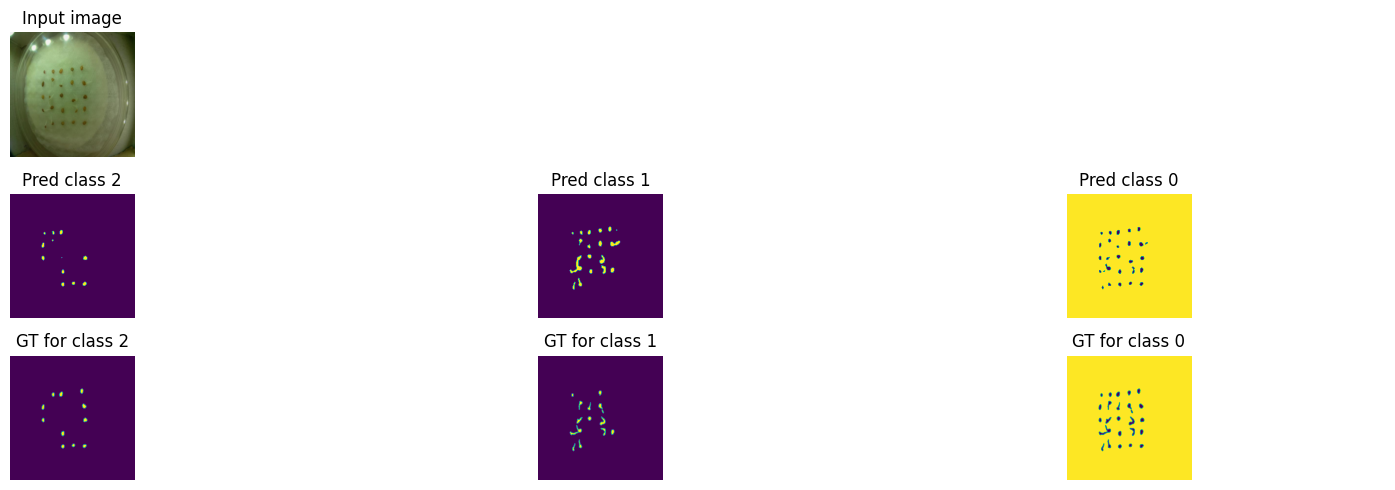

Train loss: 0.00182 | Time: 64m 37s | Val loss: 0.00148
Train_DICE_avg: 0.80904 | Train_Jaccard_avg: 0.74444 | Train_Sensitivity_avg: 0.94332 | Train_Specificity_avg: 0.92260 
Class 0 - Train_DICE: 0.99275 | Train_Jaccard: 0.98563 | Train_Sensitivity: 0.99664 | Train_Specificity: 0.78586 
Class 1 - Train_DICE: 0.60576 | Train_Jaccard: 0.52878 | Train_Sensitivity: 0.89286 | Train_Specificity: 0.99149 
Class 2 - Train_DICE: 0.82859 | Train_Jaccard: 0.71891 | Train_Sensitivity: 0.94047 | Train_Specificity: 0.99046 
Val_DICE_avg: 0.84578 | Val_Jaccard_avg: 0.77343 | Val_Sensitivity_avg: 0.96689 | Val_Specificity_avg: 0.87190 
Class 0 - Val_DICE: 0.99268 | Val_Jaccard: 0.98551 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.63472 
Class 1 - Val_DICE: 0.78260 | Val_Jaccard: 0.70678 | Val_Sensitivity: 0.91881 | Val_Specificity: 0.99533 
Class 2 - Val_DICE: 0.76207 | Val_Jaccard: 0.62801 | Val_Sensitivity: 0.98247 | Val_Specificity: 0.98566 


wandb: uploading artifact best_model; uploading config.yaml
wandb: uploading artifact best_model
wandb: uploading history steps 59-60, summary, console lines 786-796
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▂▃▃▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████
wandb:       Training Jaccard ▁▂▂▃▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█████████
wandb:          Training Loss █▆▅▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▃▄▇▇▄▃▃▁▂▁▁▂▂▂▃▃▃▃▄▄▄▅▄▆▆▆▆▇▆▇█▇▇▇██▇▇█
wandb:   Training Specificity ▁▃▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇███▇███████████████████
wandb:        Validation DICE ▁▁▃▂▄▅▅▆▆▆▇▇▇▇▇▇▇█▇▇▇██▇▇▇█▇▇███████████
wandb:     Validation Jaccard ▁▁▃▂▄▅▆▆▆▆▇▇▇▇▆█▇▇▇▇█▇▇▇▇█▇▇███████▇████
wandb:        Validation Loss █▆▅▄▄▃▂▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▅▄█▃▁▂▂▄▆▅▆▆▄▆▆▅▇▆▆▆▇▆▅▆▆▇▆▇▆▇▆▇▇▇▇▇▆▇▇▇
wandb: Validation Specificity ▇█▆▁▄▄▂▅▃▆▆▄▅▇█▅▄▆▄▅▅▆▄▆▆▄▃▇▆▃▆▅▆▅▅▅▆▆▅▆
wandb: 
w


Training complete!


In [37]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [38]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [39]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]



Global Performance Metrics:
Loss mean: 0.00148, std: 0.00018
Dice Coefficient mean: 0.87883, std: 0.09653
Jaccard Index mean: 0.81850, std: 0.11606
Sensitivity mean: 0.92856, std: 0.07287
Specificity mean: 0.93917, std: 0.03848

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99585, std: 0.00207
Jaccard mean: 0.99174, std: 0.00408
Sensitivity mean: 0.99765, std: 0.00170
Specificity mean: 0.82634, std: 0.11505

Class 1:
Dice mean: 0.77496, std: 0.25919
Jaccard mean: 0.69304, std: 0.29094
Sensitivity mean: 0.86920, std: 0.20184
Specificity mean: 0.99630, std: 0.00603

Class 2:
Dice mean: 0.86568, std: 0.07691
Jaccard mean: 0.77073, std: 0.10995
Sensitivity mean: 0.91882, std: 0.06900
Specificity mean: 0.99486, std: 0.00320


### Tversky Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Backbone"] = "mobilenetv3"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-ResUNet-MobileNetV3-Tversky"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.50 GB
GPU Memory - Reserved: 1.48 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251113_000425-rfcp4m31
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-ResUNet-MobileNetV3-Tversky
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/rfcp4m31



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


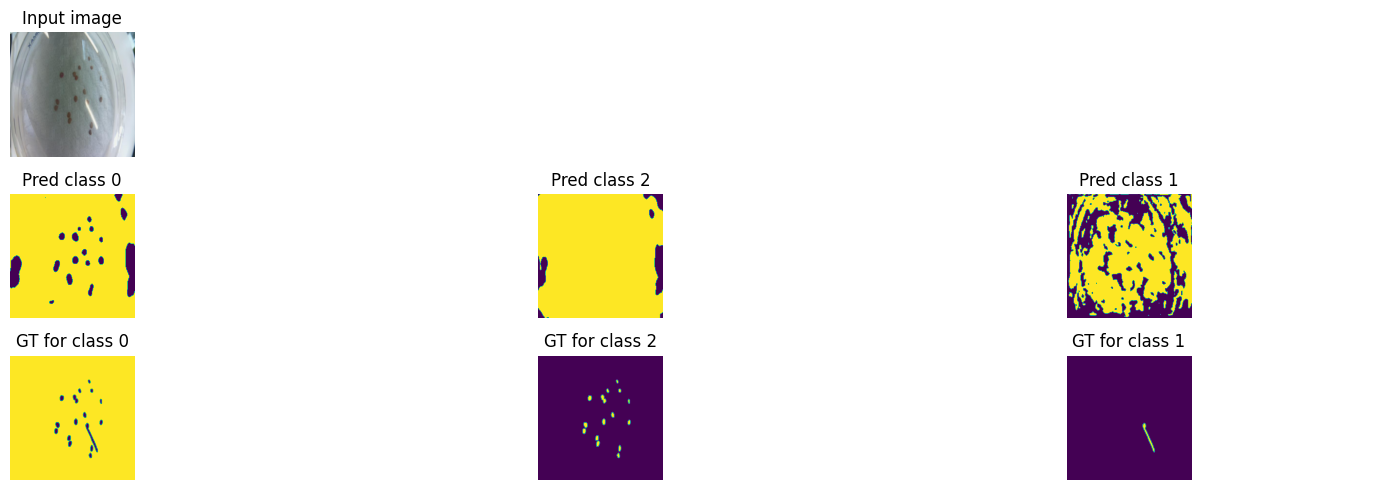

Train loss: 0.66840 | Time: 1m 0s | Val loss: 0.64229
Train_DICE_avg: 0.39951 | Train_Jaccard_avg: 0.35261 | Train_Sensitivity_avg: 0.39929 | Train_Specificity_avg: 0.79166 
Class 0 - Train_DICE: 0.91955 | Train_Jaccard: 0.85724 | Train_Sensitivity: 0.99084 | Train_Specificity: 0.37836 
Class 1 - Train_DICE: 0.01897 | Train_Jaccard: 0.00975 | Train_Sensitivity: 0.00975 | Train_Specificity: 0.99919 
Class 2 - Train_DICE: 0.26001 | Train_Jaccard: 0.19086 | Train_Sensitivity: 0.19727 | Train_Specificity: 0.99745 
Val_DICE_avg: 0.40410 | Val_Jaccard_avg: 0.36304 | Val_Sensitivity_avg: 0.41514 | Val_Specificity_avg: 0.76599 
Class 0 - Val_DICE: 0.93586 | Val_Jaccard: 0.88385 | Val_Sensitivity: 0.99645 | Val_Specificity: 0.30321 
Class 1 - Val_DICE: 0.02417 | Val_Jaccard: 0.01262 | Val_Sensitivity: 0.01263 | Val_Specificity: 0.99980 
Class 2 - Val_DICE: 0.25226 | Val_Jaccard: 0.19265 | Val_Sensitivity: 0.23633 | Val_Specificity: 0.99496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.62503 | Time: 2m 0s | Val loss: 0.61925
Train_DICE_avg: 0.44383 | Train_Jaccard_avg: 0.41103 | Train_Sensitivity_avg: 0.43348 | Train_Specificity_avg: 0.85460 
Class 0 - Train_DICE: 0.97158 | Train_Jaccard: 0.94511 | Train_Sensitivity: 0.99397 | Train_Specificity: 0.56647 
Class 1 - Train_DICE: 0.03407 | Train_Jaccard: 0.01798 | Train_Sensitivity: 0.01803 | Train_Specificity: 0.99967 
Class 2 - Train_DICE: 0.32584 | Train_Jaccard: 0.26999 | Train_Sensitivity: 0.28844 | Train_Specificity: 0.99767 
Val_DICE_avg: 0.46068 | Val_Jaccard_avg: 0.42431 | Val_Sensitivity_avg: 0.45445 | Val_Specificity_avg: 0.86450 
Class 0 - Val_DICE: 0.98620 | Val_Jaccard: 0.97292 | Val_Sensitivity: 0.99488 | Val_Specificity: 0.60018 
Class 1 - Val_DICE: 0.08309 | Val_Jaccard: 0.04880 | Val_Sensitivity: 0.05007 | Val_Specificity: 0.99886 
Class 2 - Val_DICE: 0.31274 | Val_Jaccard: 0.25122 | Val_Sensitivity: 0.31841 | Val_Specificity: 0.99447 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.61019 | Time: 3m 1s | Val loss: 0.61536
Train_DICE_avg: 0.46763 | Train_Jaccard_avg: 0.42989 | Train_Sensitivity_avg: 0.45070 | Train_Specificity_avg: 0.86970 
Class 0 - Train_DICE: 0.97665 | Train_Jaccard: 0.95461 | Train_Sensitivity: 0.99405 | Train_Specificity: 0.61201 
Class 1 - Train_DICE: 0.08129 | Train_Jaccard: 0.04615 | Train_Sensitivity: 0.04693 | Train_Specificity: 0.99919 
Class 2 - Train_DICE: 0.34497 | Train_Jaccard: 0.28892 | Train_Sensitivity: 0.31112 | Train_Specificity: 0.99789 
Val_DICE_avg: 0.46455 | Val_Jaccard_avg: 0.42708 | Val_Sensitivity_avg: 0.45186 | Val_Specificity_avg: 0.89044 
Class 0 - Val_DICE: 0.99038 | Val_Jaccard: 0.98100 | Val_Sensitivity: 0.99462 | Val_Specificity: 0.67908 
Class 1 - Val_DICE: 0.11166 | Val_Jaccard: 0.06805 | Val_Sensitivity: 0.07329 | Val_Specificity: 0.99810 
Class 2 - Val_DICE: 0.29160 | Val_Jaccard: 0.23219 | Val_Sensitivity: 0.28767 | Val_Specificity: 0.99414 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.59680 | Time: 4m 2s | Val loss: 0.59109
Train_DICE_avg: 0.48388 | Train_Jaccard_avg: 0.44354 | Train_Sensitivity_avg: 0.46353 | Train_Specificity_avg: 0.88305 
Class 0 - Train_DICE: 0.97990 | Train_Jaccard: 0.96081 | Train_Sensitivity: 0.99421 | Train_Specificity: 0.65255 
Class 1 - Train_DICE: 0.10650 | Train_Jaccard: 0.06216 | Train_Sensitivity: 0.06350 | Train_Specificity: 0.99908 
Class 2 - Train_DICE: 0.36524 | Train_Jaccard: 0.30766 | Train_Sensitivity: 0.33289 | Train_Specificity: 0.99752 
Val_DICE_avg: 0.49063 | Val_Jaccard_avg: 0.45150 | Val_Sensitivity_avg: 0.47645 | Val_Specificity_avg: 0.90914 
Class 0 - Val_DICE: 0.99222 | Val_Jaccard: 0.98461 | Val_Sensitivity: 0.99481 | Val_Specificity: 0.73450 
Class 1 - Val_DICE: 0.13611 | Val_Jaccard: 0.08426 | Val_Sensitivity: 0.08996 | Val_Specificity: 0.99834 
Class 2 - Val_DICE: 0.34357 | Val_Jaccard: 0.28563 | Val_Sensitivity: 0.34458 | Val_Specificity: 0.99457 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.58313 | Time: 5m 2s | Val loss: 0.57027
Train_DICE_avg: 0.49729 | Train_Jaccard_avg: 0.45574 | Train_Sensitivity_avg: 0.47566 | Train_Specificity_avg: 0.89127 
Class 0 - Train_DICE: 0.98209 | Train_Jaccard: 0.96499 | Train_Sensitivity: 0.99429 | Train_Specificity: 0.67704 
Class 1 - Train_DICE: 0.11938 | Train_Jaccard: 0.07048 | Train_Sensitivity: 0.07169 | Train_Specificity: 0.99930 
Class 2 - Train_DICE: 0.39042 | Train_Jaccard: 0.33175 | Train_Sensitivity: 0.36099 | Train_Specificity: 0.99749 
Val_DICE_avg: 0.51537 | Val_Jaccard_avg: 0.47487 | Val_Sensitivity_avg: 0.50132 | Val_Specificity_avg: 0.91009 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98397 | Val_Sensitivity: 0.99694 | Val_Specificity: 0.73549 
Class 1 - Val_DICE: 0.14485 | Val_Jaccard: 0.09001 | Val_Sensitivity: 0.09228 | Val_Specificity: 0.99923 
Class 2 - Val_DICE: 0.40939 | Val_Jaccard: 0.35064 | Val_Sensitivity: 0.41475 | Val_Specificity: 0.99554 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


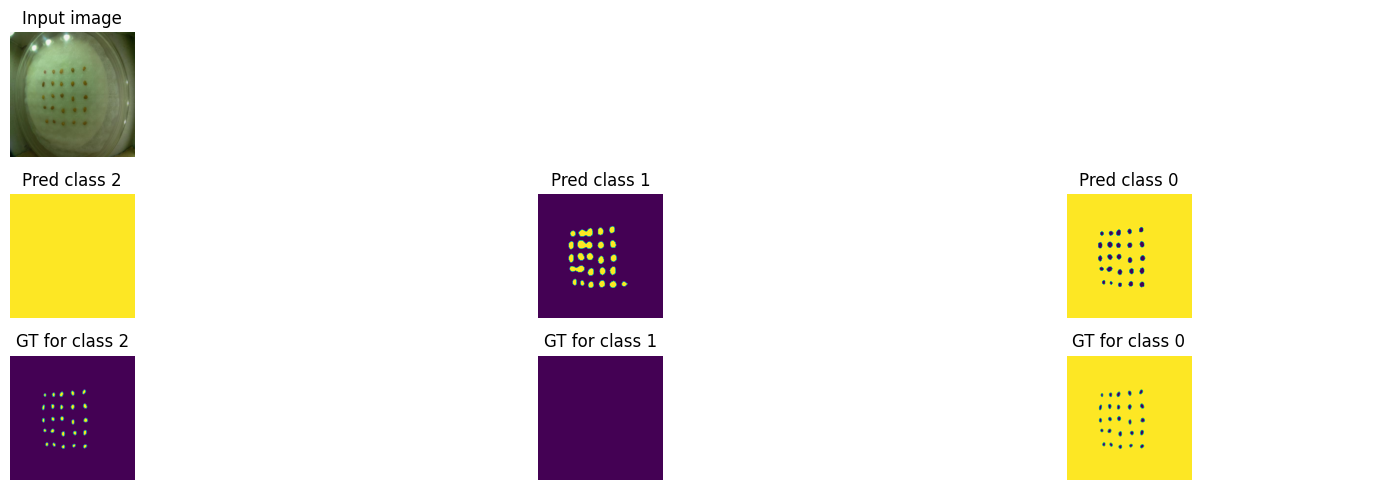

Train loss: 0.56933 | Time: 6m 4s | Val loss: 0.55953
Train_DICE_avg: 0.50815 | Train_Jaccard_avg: 0.46557 | Train_Sensitivity_avg: 0.48630 | Train_Specificity_avg: 0.90125 
Class 0 - Train_DICE: 0.98392 | Train_Jaccard: 0.96850 | Train_Sensitivity: 0.99390 | Train_Specificity: 0.70725 
Class 1 - Train_DICE: 0.13119 | Train_Jaccard: 0.07826 | Train_Sensitivity: 0.07964 | Train_Specificity: 0.99933 
Class 2 - Train_DICE: 0.40934 | Train_Jaccard: 0.34994 | Train_Sensitivity: 0.38537 | Train_Specificity: 0.99718 
Val_DICE_avg: 0.51262 | Val_Jaccard_avg: 0.47079 | Val_Sensitivity_avg: 0.50877 | Val_Specificity_avg: 0.90297 
Class 0 - Val_DICE: 0.99247 | Val_Jaccard: 0.98510 | Val_Sensitivity: 0.99633 | Val_Specificity: 0.71632 
Class 1 - Val_DICE: 0.14528 | Val_Jaccard: 0.09232 | Val_Sensitivity: 0.09810 | Val_Specificity: 0.99866 
Class 2 - Val_DICE: 0.40011 | Val_Jaccard: 0.33496 | Val_Sensitivity: 0.43188 | Val_Specificity: 0.99392 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.55503 | Time: 7m 4s | Val loss: 0.54779
Train_DICE_avg: 0.52422 | Train_Jaccard_avg: 0.47989 | Train_Sensitivity_avg: 0.50124 | Train_Specificity_avg: 0.90690 
Class 0 - Train_DICE: 0.98517 | Train_Jaccard: 0.97092 | Train_Sensitivity: 0.99345 | Train_Specificity: 0.72434 
Class 1 - Train_DICE: 0.14508 | Train_Jaccard: 0.08798 | Train_Sensitivity: 0.08967 | Train_Specificity: 0.99931 
Class 2 - Train_DICE: 0.44242 | Train_Jaccard: 0.38076 | Train_Sensitivity: 0.42059 | Train_Specificity: 0.99705 
Val_DICE_avg: 0.52357 | Val_Jaccard_avg: 0.48419 | Val_Sensitivity_avg: 0.51152 | Val_Specificity_avg: 0.90316 
Class 0 - Val_DICE: 0.99256 | Val_Jaccard: 0.98528 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.71415 
Class 1 - Val_DICE: 0.15347 | Val_Jaccard: 0.09726 | Val_Sensitivity: 0.10036 | Val_Specificity: 0.99912 
Class 2 - Val_DICE: 0.42466 | Val_Jaccard: 0.37004 | Val_Sensitivity: 0.43654 | Val_Specificity: 0.99619 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.54197 | Time: 8m 5s | Val loss: 0.53478
Train_DICE_avg: 0.52956 | Train_Jaccard_avg: 0.48495 | Train_Sensitivity_avg: 0.50694 | Train_Specificity_avg: 0.91238 
Class 0 - Train_DICE: 0.98654 | Train_Jaccard: 0.97355 | Train_Sensitivity: 0.99328 | Train_Specificity: 0.74108 
Class 1 - Train_DICE: 0.15511 | Train_Jaccard: 0.09526 | Train_Sensitivity: 0.09749 | Train_Specificity: 0.99923 
Class 2 - Train_DICE: 0.44703 | Train_Jaccard: 0.38605 | Train_Sensitivity: 0.43004 | Train_Specificity: 0.99683 
Val_DICE_avg: 0.52444 | Val_Jaccard_avg: 0.48182 | Val_Sensitivity_avg: 0.52232 | Val_Specificity_avg: 0.90179 
Class 0 - Val_DICE: 0.99277 | Val_Jaccard: 0.98568 | Val_Sensitivity: 0.99776 | Val_Specificity: 0.71316 
Class 1 - Val_DICE: 0.16506 | Val_Jaccard: 0.10633 | Val_Sensitivity: 0.10993 | Val_Specificity: 0.99906 
Class 2 - Val_DICE: 0.41548 | Val_Jaccard: 0.35345 | Val_Sensitivity: 0.45925 | Val_Specificity: 0.99314 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.53048 | Time: 9m 8s | Val loss: 0.52570
Train_DICE_avg: 0.54767 | Train_Jaccard_avg: 0.49888 | Train_Sensitivity_avg: 0.52155 | Train_Specificity_avg: 0.91801 
Class 0 - Train_DICE: 0.98681 | Train_Jaccard: 0.97408 | Train_Sensitivity: 0.99277 | Train_Specificity: 0.75814 
Class 1 - Train_DICE: 0.16307 | Train_Jaccard: 0.10115 | Train_Sensitivity: 0.10382 | Train_Specificity: 0.99918 
Class 2 - Train_DICE: 0.49314 | Train_Jaccard: 0.42140 | Train_Sensitivity: 0.46805 | Train_Specificity: 0.99669 
Val_DICE_avg: 0.55444 | Val_Jaccard_avg: 0.51016 | Val_Sensitivity_avg: 0.53275 | Val_Specificity_avg: 0.89257 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98411 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.68188 
Class 1 - Val_DICE: 0.16634 | Val_Jaccard: 0.10858 | Val_Sensitivity: 0.11339 | Val_Specificity: 0.99889 
Class 2 - Val_DICE: 0.50500 | Val_Jaccard: 0.43778 | Val_Sensitivity: 0.48698 | Val_Specificity: 0.99693 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.51662 | Time: 10m 8s | Val loss: 0.51724
Train_DICE_avg: 0.59204 | Train_Jaccard_avg: 0.53216 | Train_Sensitivity_avg: 0.55664 | Train_Specificity_avg: 0.92026 
Class 0 - Train_DICE: 0.98715 | Train_Jaccard: 0.97475 | Train_Sensitivity: 0.99184 | Train_Specificity: 0.76531 
Class 1 - Train_DICE: 0.17940 | Train_Jaccard: 0.11318 | Train_Sensitivity: 0.11761 | Train_Specificity: 0.99904 
Class 2 - Train_DICE: 0.60956 | Train_Jaccard: 0.50853 | Train_Sensitivity: 0.56048 | Train_Specificity: 0.99643 
Val_DICE_avg: 0.60657 | Val_Jaccard_avg: 0.54831 | Val_Sensitivity_avg: 0.57555 | Val_Specificity_avg: 0.90322 
Class 0 - Val_DICE: 0.99282 | Val_Jaccard: 0.98577 | Val_Sensitivity: 0.99769 | Val_Specificity: 0.71439 
Class 1 - Val_DICE: 0.18428 | Val_Jaccard: 0.12215 | Val_Sensitivity: 0.12831 | Val_Specificity: 0.99896 
Class 2 - Val_DICE: 0.64261 | Val_Jaccard: 0.53702 | Val_Sensitivity: 0.60065 | Val_Specificity: 0.99631 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


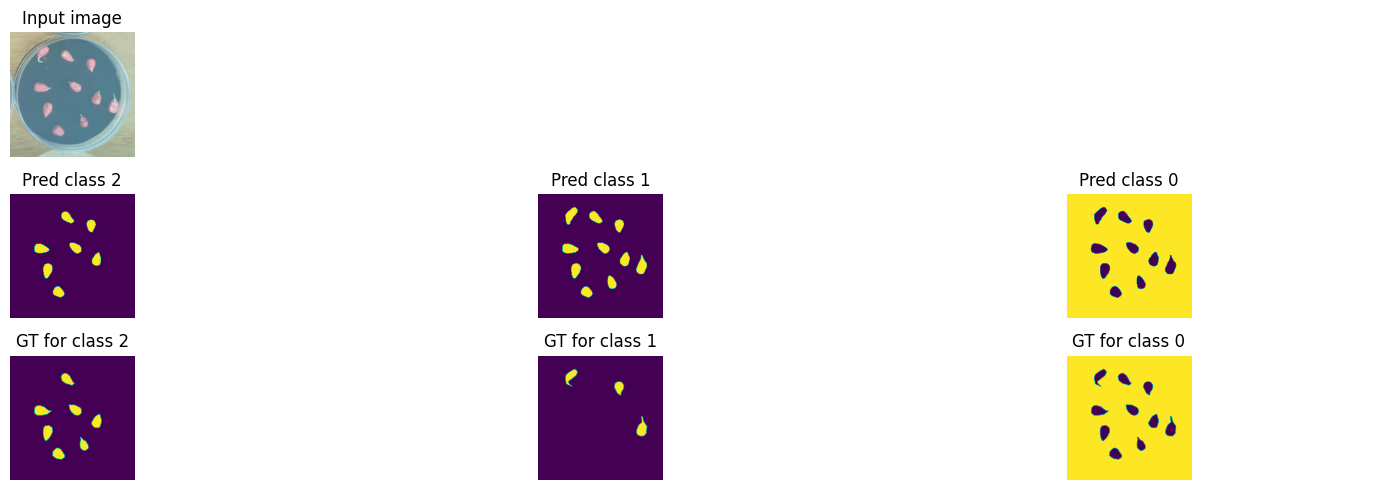

Train loss: 0.50043 | Time: 11m 13s | Val loss: 0.50167
Train_DICE_avg: 0.61578 | Train_Jaccard_avg: 0.55218 | Train_Sensitivity_avg: 0.57876 | Train_Specificity_avg: 0.92626 
Class 0 - Train_DICE: 0.98763 | Train_Jaccard: 0.97569 | Train_Sensitivity: 0.99080 | Train_Specificity: 0.78356 
Class 1 - Train_DICE: 0.19781 | Train_Jaccard: 0.12747 | Train_Sensitivity: 0.13530 | Train_Specificity: 0.99892 
Class 2 - Train_DICE: 0.66189 | Train_Jaccard: 0.55338 | Train_Sensitivity: 0.61017 | Train_Specificity: 0.99630 
Val_DICE_avg: 0.62232 | Val_Jaccard_avg: 0.56344 | Val_Sensitivity_avg: 0.58259 | Val_Specificity_avg: 0.90876 
Class 0 - Val_DICE: 0.99309 | Val_Jaccard: 0.98631 | Val_Sensitivity: 0.99740 | Val_Specificity: 0.72959 
Class 1 - Val_DICE: 0.19172 | Val_Jaccard: 0.12935 | Val_Sensitivity: 0.13873 | Val_Specificity: 0.99897 
Class 2 - Val_DICE: 0.68214 | Val_Jaccard: 0.57467 | Val_Sensitivity: 0.61164 | Val_Specificity: 0.99771 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.48788 | Time: 12m 17s | Val loss: 0.49677
Train_DICE_avg: 0.62435 | Train_Jaccard_avg: 0.56059 | Train_Sensitivity_avg: 0.58957 | Train_Specificity_avg: 0.92949 
Class 0 - Train_DICE: 0.98793 | Train_Jaccard: 0.97627 | Train_Sensitivity: 0.99023 | Train_Specificity: 0.79347 
Class 1 - Train_DICE: 0.20954 | Train_Jaccard: 0.13782 | Train_Sensitivity: 0.15076 | Train_Specificity: 0.99876 
Class 2 - Train_DICE: 0.67559 | Train_Jaccard: 0.56770 | Train_Sensitivity: 0.62772 | Train_Specificity: 0.99624 
Val_DICE_avg: 0.62594 | Val_Jaccard_avg: 0.56637 | Val_Sensitivity_avg: 0.59216 | Val_Specificity_avg: 0.91059 
Class 0 - Val_DICE: 0.99371 | Val_Jaccard: 0.98752 | Val_Sensitivity: 0.99750 | Val_Specificity: 0.73639 
Class 1 - Val_DICE: 0.19673 | Val_Jaccard: 0.13393 | Val_Sensitivity: 0.14415 | Val_Specificity: 0.99879 
Class 2 - Val_DICE: 0.68738 | Val_Jaccard: 0.57766 | Val_Sensitivity: 0.63484 | Val_Specificity: 0.99661 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.47064 | Time: 13m 20s | Val loss: 0.47647
Train_DICE_avg: 0.64494 | Train_Jaccard_avg: 0.58012 | Train_Sensitivity_avg: 0.61387 | Train_Specificity_avg: 0.93400 
Class 0 - Train_DICE: 0.98845 | Train_Jaccard: 0.97726 | Train_Sensitivity: 0.98927 | Train_Specificity: 0.80760 
Class 1 - Train_DICE: 0.26535 | Train_Jaccard: 0.18862 | Train_Sensitivity: 0.21392 | Train_Specificity: 0.99834 
Class 2 - Train_DICE: 0.68102 | Train_Jaccard: 0.57449 | Train_Sensitivity: 0.63843 | Train_Specificity: 0.99607 
Val_DICE_avg: 0.64070 | Val_Jaccard_avg: 0.58370 | Val_Sensitivity_avg: 0.62063 | Val_Specificity_avg: 0.93093 
Class 0 - Val_DICE: 0.99462 | Val_Jaccard: 0.98933 | Val_Sensitivity: 0.99550 | Val_Specificity: 0.79853 
Class 1 - Val_DICE: 0.26764 | Val_Jaccard: 0.20389 | Val_Sensitivity: 0.24925 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.65985 | Val_Jaccard: 0.55788 | Val_Sensitivity: 0.61713 | Val_Specificity: 0.99657 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.45111 | Time: 14m 24s | Val loss: 0.45424
Train_DICE_avg: 0.65646 | Train_Jaccard_avg: 0.59201 | Train_Sensitivity_avg: 0.63378 | Train_Specificity_avg: 0.93229 
Class 0 - Train_DICE: 0.98835 | Train_Jaccard: 0.97707 | Train_Sensitivity: 0.98953 | Train_Specificity: 0.80308 
Class 1 - Train_DICE: 0.28973 | Train_Jaccard: 0.21343 | Train_Sensitivity: 0.25761 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.69129 | Train_Jaccard: 0.58554 | Train_Sensitivity: 0.65421 | Train_Specificity: 0.99588 
Val_DICE_avg: 0.64367 | Val_Jaccard_avg: 0.58841 | Val_Sensitivity_avg: 0.62961 | Val_Specificity_avg: 0.91744 
Class 0 - Val_DICE: 0.99396 | Val_Jaccard: 0.98801 | Val_Sensitivity: 0.99639 | Val_Specificity: 0.75839 
Class 1 - Val_DICE: 0.26127 | Val_Jaccard: 0.19845 | Val_Sensitivity: 0.24136 | Val_Specificity: 0.99791 
Class 2 - Val_DICE: 0.67577 | Val_Jaccard: 0.57877 | Val_Sensitivity: 0.65109 | Val_Specificity: 0.99602 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.43057 | Time: 15m 27s | Val loss: 0.44205
Train_DICE_avg: 0.66270 | Train_Jaccard_avg: 0.59903 | Train_Sensitivity_avg: 0.64841 | Train_Specificity_avg: 0.93615 
Class 0 - Train_DICE: 0.98873 | Train_Jaccard: 0.97781 | Train_Sensitivity: 0.98926 | Train_Specificity: 0.81523 
Class 1 - Train_DICE: 0.30328 | Train_Jaccard: 0.22746 | Train_Sensitivity: 0.28589 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.69608 | Train_Jaccard: 0.59183 | Train_Sensitivity: 0.67008 | Train_Specificity: 0.99554 
Val_DICE_avg: 0.66912 | Val_Jaccard_avg: 0.61009 | Val_Sensitivity_avg: 0.64506 | Val_Specificity_avg: 0.92029 
Class 0 - Val_DICE: 0.99444 | Val_Jaccard: 0.98897 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.76581 
Class 1 - Val_DICE: 0.28071 | Val_Jaccard: 0.21554 | Val_Sensitivity: 0.27331 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.73221 | Val_Jaccard: 0.62576 | Val_Sensitivity: 0.66452 | Val_Specificity: 0.99751 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


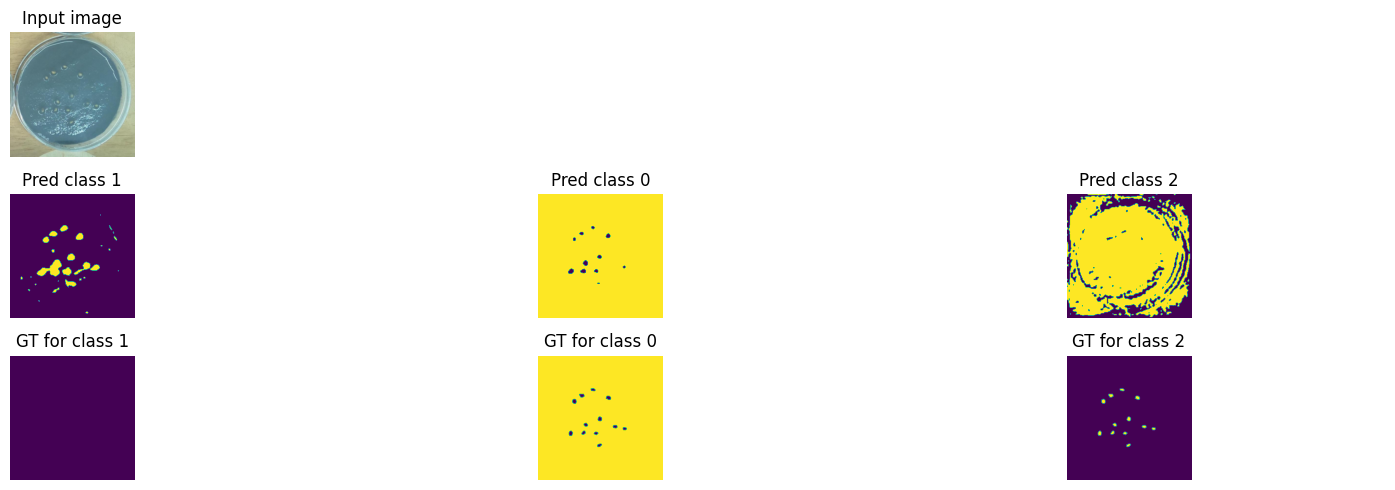

Train loss: 0.41511 | Time: 16m 31s | Val loss: 0.44532
Train_DICE_avg: 0.67606 | Train_Jaccard_avg: 0.61367 | Train_Sensitivity_avg: 0.66484 | Train_Specificity_avg: 0.93738 
Class 0 - Train_DICE: 0.98910 | Train_Jaccard: 0.97852 | Train_Sensitivity: 0.98951 | Train_Specificity: 0.81892 
Class 1 - Train_DICE: 0.32005 | Train_Jaccard: 0.24389 | Train_Sensitivity: 0.30787 | Train_Specificity: 0.99763 
Class 2 - Train_DICE: 0.71904 | Train_Jaccard: 0.61862 | Train_Sensitivity: 0.69713 | Train_Specificity: 0.99558 
Val_DICE_avg: 0.63909 | Val_Jaccard_avg: 0.58948 | Val_Sensitivity_avg: 0.63377 | Val_Specificity_avg: 0.93360 
Class 0 - Val_DICE: 0.99486 | Val_Jaccard: 0.98979 | Val_Sensitivity: 0.99620 | Val_Specificity: 0.80703 
Class 1 - Val_DICE: 0.28050 | Val_Jaccard: 0.21848 | Val_Sensitivity: 0.26659 | Val_Specificity: 0.99788 
Class 2 - Val_DICE: 0.64191 | Val_Jaccard: 0.56018 | Val_Sensitivity: 0.63853 | Val_Specificity: 0.99587 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.39924 | Time: 17m 34s | Val loss: 0.41231
Train_DICE_avg: 0.68484 | Train_Jaccard_avg: 0.62357 | Train_Sensitivity_avg: 0.68016 | Train_Specificity_avg: 0.93745 
Class 0 - Train_DICE: 0.98910 | Train_Jaccard: 0.97853 | Train_Sensitivity: 0.99025 | Train_Specificity: 0.81950 
Class 1 - Train_DICE: 0.33028 | Train_Jaccard: 0.25245 | Train_Sensitivity: 0.32530 | Train_Specificity: 0.99755 
Class 2 - Train_DICE: 0.73514 | Train_Jaccard: 0.63973 | Train_Sensitivity: 0.72492 | Train_Specificity: 0.99531 
Val_DICE_avg: 0.67085 | Val_Jaccard_avg: 0.61576 | Val_Sensitivity_avg: 0.66919 | Val_Specificity_avg: 0.92742 
Class 0 - Val_DICE: 0.99480 | Val_Jaccard: 0.98968 | Val_Sensitivity: 0.99647 | Val_Specificity: 0.78932 
Class 1 - Val_DICE: 0.27707 | Val_Jaccard: 0.20877 | Val_Sensitivity: 0.28899 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.74068 | Val_Jaccard: 0.64882 | Val_Sensitivity: 0.72211 | Val_Specificity: 0.99592 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.38252 | Time: 18m 39s | Val loss: 0.39959
Train_DICE_avg: 0.69330 | Train_Jaccard_avg: 0.63184 | Train_Sensitivity_avg: 0.69376 | Train_Specificity_avg: 0.93673 
Class 0 - Train_DICE: 0.98921 | Train_Jaccard: 0.97874 | Train_Sensitivity: 0.99050 | Train_Specificity: 0.81771 
Class 1 - Train_DICE: 0.34030 | Train_Jaccard: 0.26226 | Train_Sensitivity: 0.34515 | Train_Specificity: 0.99738 
Class 2 - Train_DICE: 0.75038 | Train_Jaccard: 0.65453 | Train_Sensitivity: 0.74564 | Train_Specificity: 0.99511 
Val_DICE_avg: 0.68160 | Val_Jaccard_avg: 0.62693 | Val_Sensitivity_avg: 0.67227 | Val_Specificity_avg: 0.91564 
Class 0 - Val_DICE: 0.99424 | Val_Jaccard: 0.98856 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.75300 
Class 1 - Val_DICE: 0.28882 | Val_Jaccard: 0.22421 | Val_Sensitivity: 0.26603 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.76176 | Val_Jaccard: 0.66802 | Val_Sensitivity: 0.75292 | Val_Specificity: 0.99578 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.36801 | Time: 19m 43s | Val loss: 0.38975
Train_DICE_avg: 0.70009 | Train_Jaccard_avg: 0.63816 | Train_Sensitivity_avg: 0.70374 | Train_Specificity_avg: 0.93820 
Class 0 - Train_DICE: 0.98960 | Train_Jaccard: 0.97950 | Train_Sensitivity: 0.99103 | Train_Specificity: 0.82236 
Class 1 - Train_DICE: 0.34891 | Train_Jaccard: 0.27062 | Train_Sensitivity: 0.35711 | Train_Specificity: 0.99740 
Class 2 - Train_DICE: 0.76176 | Train_Jaccard: 0.66435 | Train_Sensitivity: 0.76307 | Train_Specificity: 0.99484 
Val_DICE_avg: 0.67933 | Val_Jaccard_avg: 0.62428 | Val_Sensitivity_avg: 0.68619 | Val_Specificity_avg: 0.93490 
Class 0 - Val_DICE: 0.99537 | Val_Jaccard: 0.99080 | Val_Sensitivity: 0.99678 | Val_Specificity: 0.81274 
Class 1 - Val_DICE: 0.30570 | Val_Jaccard: 0.23995 | Val_Sensitivity: 0.30679 | Val_Specificity: 0.99738 
Class 2 - Val_DICE: 0.73690 | Val_Jaccard: 0.64209 | Val_Sensitivity: 0.75500 | Val_Specificity: 0.99458 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.35919 | Time: 20m 47s | Val loss: 0.37916
Train_DICE_avg: 0.70597 | Train_Jaccard_avg: 0.64240 | Train_Sensitivity_avg: 0.71319 | Train_Specificity_avg: 0.93821 
Class 0 - Train_DICE: 0.98959 | Train_Jaccard: 0.97950 | Train_Sensitivity: 0.99100 | Train_Specificity: 0.82277 
Class 1 - Train_DICE: 0.35464 | Train_Jaccard: 0.27520 | Train_Sensitivity: 0.37250 | Train_Specificity: 0.99722 
Class 2 - Train_DICE: 0.77367 | Train_Jaccard: 0.67249 | Train_Sensitivity: 0.77606 | Train_Specificity: 0.99464 
Val_DICE_avg: 0.68424 | Val_Jaccard_avg: 0.63236 | Val_Sensitivity_avg: 0.69035 | Val_Specificity_avg: 0.93230 
Class 0 - Val_DICE: 0.99517 | Val_Jaccard: 0.99041 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.80422 
Class 1 - Val_DICE: 0.31288 | Val_Jaccard: 0.25096 | Val_Sensitivity: 0.31141 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.74467 | Val_Jaccard: 0.65572 | Val_Sensitivity: 0.76211 | Val_Specificity: 0.99492 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


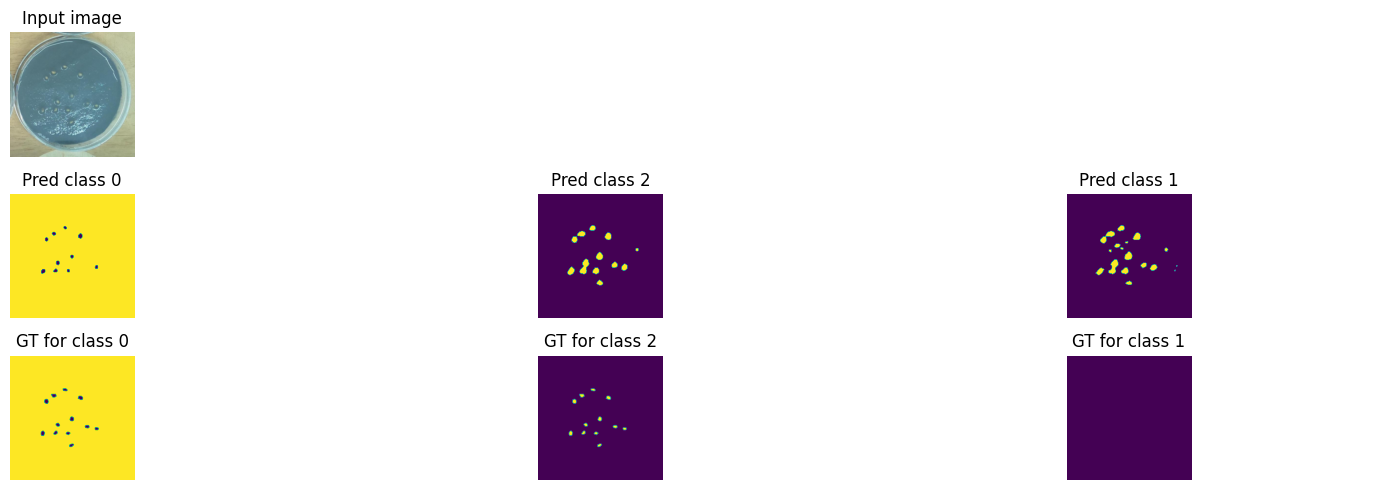

Train loss: 0.34315 | Time: 21m 52s | Val loss: 0.35414
Train_DICE_avg: 0.71487 | Train_Jaccard_avg: 0.65171 | Train_Sensitivity_avg: 0.72414 | Train_Specificity_avg: 0.94156 
Class 0 - Train_DICE: 0.98977 | Train_Jaccard: 0.97984 | Train_Sensitivity: 0.99078 | Train_Specificity: 0.83295 
Class 1 - Train_DICE: 0.36125 | Train_Jaccard: 0.28113 | Train_Sensitivity: 0.37607 | Train_Specificity: 0.99725 
Class 2 - Train_DICE: 0.79358 | Train_Jaccard: 0.69414 | Train_Sensitivity: 0.80557 | Train_Specificity: 0.99449 
Val_DICE_avg: 0.70413 | Val_Jaccard_avg: 0.64987 | Val_Sensitivity_avg: 0.71306 | Val_Specificity_avg: 0.94488 
Class 0 - Val_DICE: 0.99566 | Val_Jaccard: 0.99139 | Val_Sensitivity: 0.99675 | Val_Specificity: 0.84246 
Class 1 - Val_DICE: 0.32095 | Val_Jaccard: 0.25545 | Val_Sensitivity: 0.32412 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.79577 | Val_Jaccard: 0.70278 | Val_Sensitivity: 0.81831 | Val_Specificity: 0.99451 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.33085 | Time: 22m 55s | Val loss: 0.34821
Train_DICE_avg: 0.72182 | Train_Jaccard_avg: 0.65824 | Train_Sensitivity_avg: 0.73411 | Train_Specificity_avg: 0.94459 
Class 0 - Train_DICE: 0.98998 | Train_Jaccard: 0.98024 | Train_Sensitivity: 0.99019 | Train_Specificity: 0.84213 
Class 1 - Train_DICE: 0.36735 | Train_Jaccard: 0.28729 | Train_Sensitivity: 0.38954 | Train_Specificity: 0.99719 
Class 2 - Train_DICE: 0.80814 | Train_Jaccard: 0.70720 | Train_Sensitivity: 0.82259 | Train_Specificity: 0.99444 
Val_DICE_avg: 0.70808 | Val_Jaccard_avg: 0.65713 | Val_Sensitivity_avg: 0.70700 | Val_Specificity_avg: 0.93217 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99025 | Val_Sensitivity: 0.99757 | Val_Specificity: 0.80243 
Class 1 - Val_DICE: 0.31520 | Val_Jaccard: 0.24912 | Val_Sensitivity: 0.30829 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.81395 | Val_Jaccard: 0.73200 | Val_Sensitivity: 0.81514 | Val_Specificity: 0.99635 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.31380 | Time: 23m 59s | Val loss: 0.31810
Train_DICE_avg: 0.73072 | Train_Jaccard_avg: 0.66646 | Train_Sensitivity_avg: 0.74839 | Train_Specificity_avg: 0.94723 
Class 0 - Train_DICE: 0.98985 | Train_Jaccard: 0.98000 | Train_Sensitivity: 0.98991 | Train_Specificity: 0.85012 
Class 1 - Train_DICE: 0.36792 | Train_Jaccard: 0.28707 | Train_Sensitivity: 0.39645 | Train_Specificity: 0.99713 
Class 2 - Train_DICE: 0.83441 | Train_Jaccard: 0.73232 | Train_Sensitivity: 0.85882 | Train_Specificity: 0.99443 
Val_DICE_avg: 0.72087 | Val_Jaccard_avg: 0.66205 | Val_Sensitivity_avg: 0.75911 | Val_Specificity_avg: 0.96001 
Class 0 - Val_DICE: 0.99609 | Val_Jaccard: 0.99224 | Val_Sensitivity: 0.99568 | Val_Specificity: 0.88930 
Class 1 - Val_DICE: 0.33788 | Val_Jaccard: 0.26607 | Val_Sensitivity: 0.36201 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.82863 | Val_Jaccard: 0.72783 | Val_Sensitivity: 0.91964 | Val_Specificity: 0.99372 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.29664 | Time: 25m 3s | Val loss: 0.30741
Train_DICE_avg: 0.73931 | Train_Jaccard_avg: 0.67505 | Train_Sensitivity_avg: 0.76189 | Train_Specificity_avg: 0.94908 
Class 0 - Train_DICE: 0.99027 | Train_Jaccard: 0.98081 | Train_Sensitivity: 0.98996 | Train_Specificity: 0.85590 
Class 1 - Train_DICE: 0.38025 | Train_Jaccard: 0.29902 | Train_Sensitivity: 0.41132 | Train_Specificity: 0.99712 
Class 2 - Train_DICE: 0.84742 | Train_Jaccard: 0.74533 | Train_Sensitivity: 0.88439 | Train_Specificity: 0.99422 
Val_DICE_avg: 0.74005 | Val_Jaccard_avg: 0.68454 | Val_Sensitivity_avg: 0.75779 | Val_Specificity_avg: 0.94505 
Class 0 - Val_DICE: 0.99567 | Val_Jaccard: 0.99140 | Val_Sensitivity: 0.99721 | Val_Specificity: 0.84247 
Class 1 - Val_DICE: 0.35287 | Val_Jaccard: 0.27969 | Val_Sensitivity: 0.36914 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.87161 | Val_Jaccard: 0.78252 | Val_Sensitivity: 0.90702 | Val_Specificity: 0.99552 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


Train loss: 0.29227 | Time: 26m 7s | Val loss: 0.30347
Train_DICE_avg: 0.73765 | Train_Jaccard_avg: 0.67255 | Train_Sensitivity_avg: 0.76325 | Train_Specificity_avg: 0.94961 
Class 0 - Train_DICE: 0.99034 | Train_Jaccard: 0.98096 | Train_Sensitivity: 0.99027 | Train_Specificity: 0.85785 
Class 1 - Train_DICE: 0.37536 | Train_Jaccard: 0.29229 | Train_Sensitivity: 0.40911 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.84726 | Train_Jaccard: 0.74439 | Train_Sensitivity: 0.89036 | Train_Specificity: 0.99400 
Val_DICE_avg: 0.73359 | Val_Jaccard_avg: 0.67984 | Val_Sensitivity_avg: 0.74391 | Val_Specificity_avg: 0.93639 
Class 0 - Val_DICE: 0.99525 | Val_Jaccard: 0.99057 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.81587 
Class 1 - Val_DICE: 0.33516 | Val_Jaccard: 0.26713 | Val_Sensitivity: 0.31436 | Val_Specificity: 0.99812 
Class 2 - Val_DICE: 0.87035 | Val_Jaccard: 0.78181 | Val_Sensitivity: 0.91954 | Val_Specificity: 0.99517 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


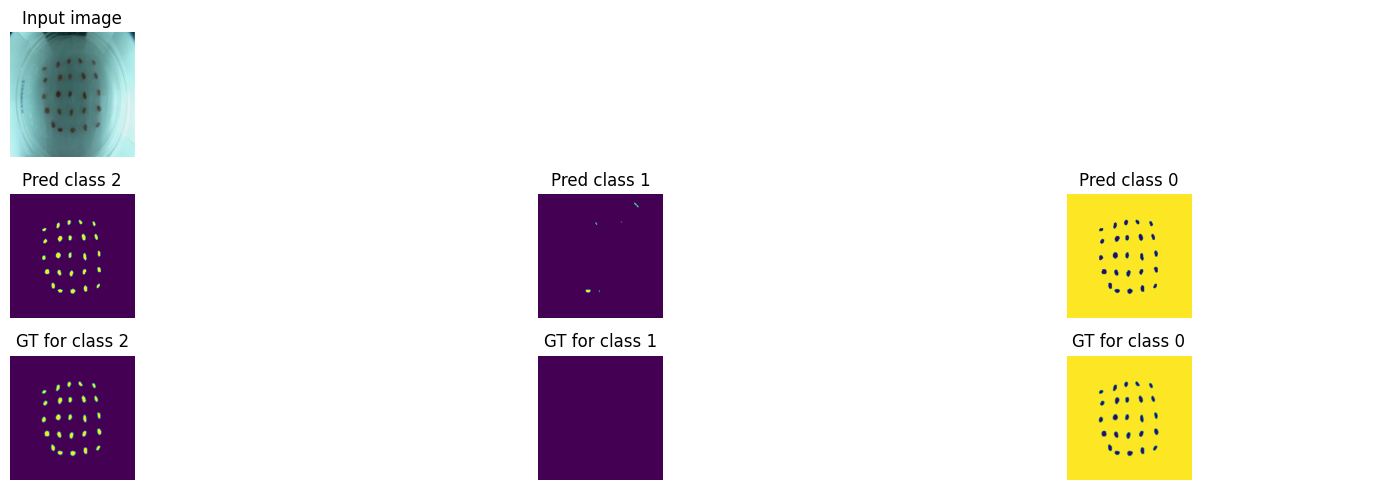

Train loss: 0.28211 | Time: 27m 11s | Val loss: 0.29301
Train_DICE_avg: 0.74422 | Train_Jaccard_avg: 0.67979 | Train_Sensitivity_avg: 0.77021 | Train_Specificity_avg: 0.94885 
Class 0 - Train_DICE: 0.99038 | Train_Jaccard: 0.98103 | Train_Sensitivity: 0.99075 | Train_Specificity: 0.85537 
Class 1 - Train_DICE: 0.39107 | Train_Jaccard: 0.30852 | Train_Sensitivity: 0.42487 | Train_Specificity: 0.99712 
Class 2 - Train_DICE: 0.85122 | Train_Jaccard: 0.74982 | Train_Sensitivity: 0.89500 | Train_Specificity: 0.99407 
Val_DICE_avg: 0.74241 | Val_Jaccard_avg: 0.68669 | Val_Sensitivity_avg: 0.76703 | Val_Specificity_avg: 0.94637 
Class 0 - Val_DICE: 0.99567 | Val_Jaccard: 0.99140 | Val_Sensitivity: 0.99733 | Val_Specificity: 0.84662 
Class 1 - Val_DICE: 0.36253 | Val_Jaccard: 0.28924 | Val_Sensitivity: 0.38477 | Val_Specificity: 0.99723 
Class 2 - Val_DICE: 0.86903 | Val_Jaccard: 0.77943 | Val_Sensitivity: 0.91899 | Val_Specificity: 0.99527 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]


Train loss: 0.27682 | Time: 28m 15s | Val loss: 0.28426
Train_DICE_avg: 0.74629 | Train_Jaccard_avg: 0.68164 | Train_Sensitivity_avg: 0.77582 | Train_Specificity_avg: 0.94734 
Class 0 - Train_DICE: 0.99038 | Train_Jaccard: 0.98102 | Train_Sensitivity: 0.99102 | Train_Specificity: 0.85089 
Class 1 - Train_DICE: 0.39634 | Train_Jaccard: 0.31298 | Train_Sensitivity: 0.43833 | Train_Specificity: 0.99711 
Class 2 - Train_DICE: 0.85216 | Train_Jaccard: 0.75093 | Train_Sensitivity: 0.89811 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.75842 | Val_Jaccard_avg: 0.69902 | Val_Sensitivity_avg: 0.80251 | Val_Specificity_avg: 0.95227 
Class 0 - Val_DICE: 0.99609 | Val_Jaccard: 0.99223 | Val_Sensitivity: 0.99669 | Val_Specificity: 0.86628 
Class 1 - Val_DICE: 0.42637 | Val_Jaccard: 0.35163 | Val_Sensitivity: 0.46735 | Val_Specificity: 0.99681 
Class 2 - Val_DICE: 0.85279 | Val_Jaccard: 0.75319 | Val_Sensitivity: 0.94350 | Val_Specificity: 0.99373 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.27228 | Time: 29m 20s | Val loss: 0.27849
Train_DICE_avg: 0.74948 | Train_Jaccard_avg: 0.68447 | Train_Sensitivity_avg: 0.78194 | Train_Specificity_avg: 0.94865 
Class 0 - Train_DICE: 0.99020 | Train_Jaccard: 0.98069 | Train_Sensitivity: 0.99086 | Train_Specificity: 0.85501 
Class 1 - Train_DICE: 0.40713 | Train_Jaccard: 0.32294 | Train_Sensitivity: 0.45456 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.85110 | Train_Jaccard: 0.74976 | Train_Sensitivity: 0.90039 | Train_Specificity: 0.99393 
Val_DICE_avg: 0.76687 | Val_Jaccard_avg: 0.71148 | Val_Sensitivity_avg: 0.79125 | Val_Specificity_avg: 0.94240 
Class 0 - Val_DICE: 0.99568 | Val_Jaccard: 0.99143 | Val_Sensitivity: 0.99722 | Val_Specificity: 0.83512 
Class 1 - Val_DICE: 0.43163 | Val_Jaccard: 0.35893 | Val_Sensitivity: 0.46763 | Val_Specificity: 0.99705 
Class 2 - Val_DICE: 0.87329 | Val_Jaccard: 0.78410 | Val_Sensitivity: 0.90889 | Val_Specificity: 0.99502 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.26678 | Time: 30m 23s | Val loss: 0.27200
Train_DICE_avg: 0.75303 | Train_Jaccard_avg: 0.68876 | Train_Sensitivity_avg: 0.78643 | Train_Specificity_avg: 0.94642 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98138 | Train_Sensitivity: 0.99153 | Train_Specificity: 0.84831 
Class 1 - Train_DICE: 0.41505 | Train_Jaccard: 0.33179 | Train_Sensitivity: 0.46634 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.85349 | Train_Jaccard: 0.75311 | Train_Sensitivity: 0.90141 | Train_Specificity: 0.99401 
Val_DICE_avg: 0.75215 | Val_Jaccard_avg: 0.69658 | Val_Sensitivity_avg: 0.78560 | Val_Specificity_avg: 0.94700 
Class 0 - Val_DICE: 0.99584 | Val_Jaccard: 0.99173 | Val_Sensitivity: 0.99755 | Val_Specificity: 0.84941 
Class 1 - Val_DICE: 0.39283 | Val_Jaccard: 0.32279 | Val_Sensitivity: 0.42311 | Val_Specificity: 0.99745 
Class 2 - Val_DICE: 0.86779 | Val_Jaccard: 0.77523 | Val_Sensitivity: 0.93615 | Val_Specificity: 0.99415 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.26492 | Time: 31m 27s | Val loss: 0.27116
Train_DICE_avg: 0.75379 | Train_Jaccard_avg: 0.68902 | Train_Sensitivity_avg: 0.78813 | Train_Specificity_avg: 0.94591 
Class 0 - Train_DICE: 0.99027 | Train_Jaccard: 0.98081 | Train_Sensitivity: 0.99153 | Train_Specificity: 0.84677 
Class 1 - Train_DICE: 0.41933 | Train_Jaccard: 0.33577 | Train_Sensitivity: 0.47049 | Train_Specificity: 0.99705 
Class 2 - Train_DICE: 0.85176 | Train_Jaccard: 0.75048 | Train_Sensitivity: 0.90237 | Train_Specificity: 0.99392 
Val_DICE_avg: 0.75636 | Val_Jaccard_avg: 0.70150 | Val_Sensitivity_avg: 0.79502 | Val_Specificity_avg: 0.94483 
Class 0 - Val_DICE: 0.99573 | Val_Jaccard: 0.99152 | Val_Sensitivity: 0.99773 | Val_Specificity: 0.84246 
Class 1 - Val_DICE: 0.40735 | Val_Jaccard: 0.33937 | Val_Sensitivity: 0.44575 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.86600 | Val_Jaccard: 0.77362 | Val_Sensitivity: 0.94157 | Val_Specificity: 0.99451 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


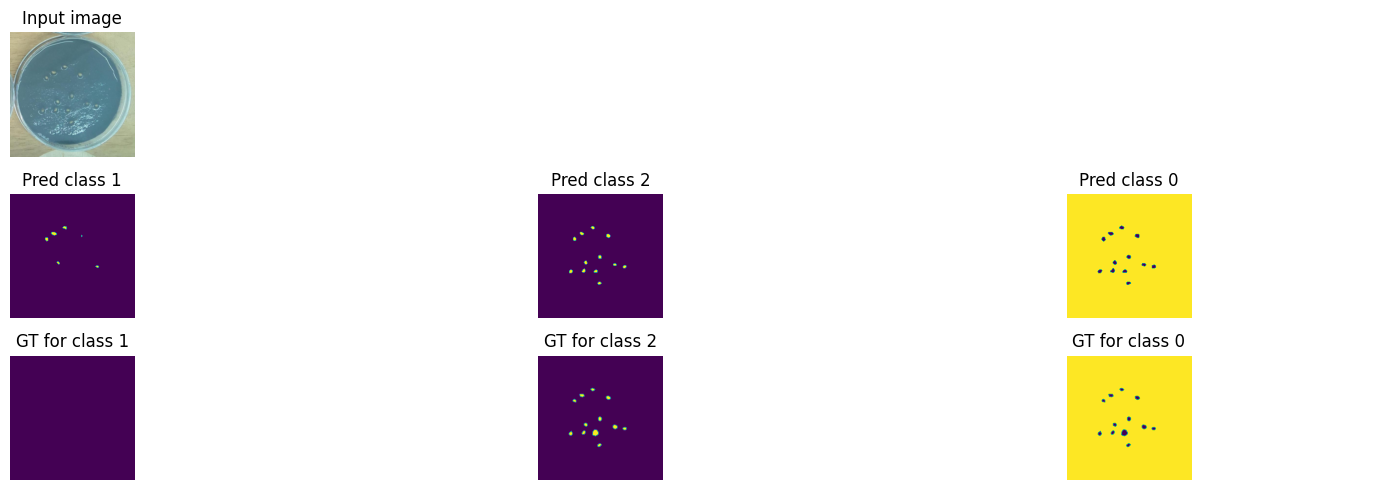

Train loss: 0.26047 | Time: 32m 32s | Val loss: 0.26704
Train_DICE_avg: 0.75871 | Train_Jaccard_avg: 0.69406 | Train_Sensitivity_avg: 0.79701 | Train_Specificity_avg: 0.94441 
Class 0 - Train_DICE: 0.99033 | Train_Jaccard: 0.98094 | Train_Sensitivity: 0.99199 | Train_Specificity: 0.84230 
Class 1 - Train_DICE: 0.43242 | Train_Jaccard: 0.34857 | Train_Sensitivity: 0.49503 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.85337 | Train_Jaccard: 0.75266 | Train_Sensitivity: 0.90402 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.74820 | Val_Jaccard_avg: 0.69308 | Val_Sensitivity_avg: 0.79410 | Val_Specificity_avg: 0.94880 
Class 0 - Val_DICE: 0.99595 | Val_Jaccard: 0.99196 | Val_Sensitivity: 0.99727 | Val_Specificity: 0.85514 
Class 1 - Val_DICE: 0.38062 | Val_Jaccard: 0.31089 | Val_Sensitivity: 0.44470 | Val_Specificity: 0.99708 
Class 2 - Val_DICE: 0.86801 | Val_Jaccard: 0.77639 | Val_Sensitivity: 0.94033 | Val_Specificity: 0.99418 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.25646 | Time: 33m 38s | Val loss: 0.26607
Train_DICE_avg: 0.76545 | Train_Jaccard_avg: 0.70051 | Train_Sensitivity_avg: 0.80253 | Train_Specificity_avg: 0.94397 
Class 0 - Train_DICE: 0.99039 | Train_Jaccard: 0.98104 | Train_Sensitivity: 0.99201 | Train_Specificity: 0.84101 
Class 1 - Train_DICE: 0.45255 | Train_Jaccard: 0.36810 | Train_Sensitivity: 0.50920 | Train_Specificity: 0.99706 
Class 2 - Train_DICE: 0.85342 | Train_Jaccard: 0.75238 | Train_Sensitivity: 0.90639 | Train_Specificity: 0.99385 
Val_DICE_avg: 0.78577 | Val_Jaccard_avg: 0.73180 | Val_Sensitivity_avg: 0.82483 | Val_Specificity_avg: 0.94190 
Class 0 - Val_DICE: 0.99574 | Val_Jaccard: 0.99153 | Val_Sensitivity: 0.99758 | Val_Specificity: 0.83350 
Class 1 - Val_DICE: 0.48540 | Val_Jaccard: 0.41548 | Val_Sensitivity: 0.54836 | Val_Specificity: 0.99720 
Class 2 - Val_DICE: 0.87616 | Val_Jaccard: 0.78838 | Val_Sensitivity: 0.92854 | Val_Specificity: 0.99501 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.25234 | Time: 34m 44s | Val loss: 0.26505
Train_DICE_avg: 0.77018 | Train_Jaccard_avg: 0.70590 | Train_Sensitivity_avg: 0.81154 | Train_Specificity_avg: 0.94457 
Class 0 - Train_DICE: 0.99055 | Train_Jaccard: 0.98136 | Train_Sensitivity: 0.99227 | Train_Specificity: 0.84294 
Class 1 - Train_DICE: 0.46617 | Train_Jaccard: 0.38334 | Train_Sensitivity: 0.53358 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.85380 | Train_Jaccard: 0.75299 | Train_Sensitivity: 0.90878 | Train_Specificity: 0.99382 
Val_DICE_avg: 0.82641 | Val_Jaccard_avg: 0.77447 | Val_Sensitivity_avg: 0.85591 | Val_Specificity_avg: 0.93468 
Class 0 - Val_DICE: 0.99518 | Val_Jaccard: 0.99044 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.81098 
Class 1 - Val_DICE: 0.60110 | Val_Jaccard: 0.53354 | Val_Sensitivity: 0.66032 | Val_Specificity: 0.99724 
Class 2 - Val_DICE: 0.88295 | Val_Jaccard: 0.79944 | Val_Sensitivity: 0.90926 | Val_Specificity: 0.99582 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.24845 | Time: 35m 50s | Val loss: 0.26242
Train_DICE_avg: 0.77663 | Train_Jaccard_avg: 0.71271 | Train_Sensitivity_avg: 0.81789 | Train_Specificity_avg: 0.94452 
Class 0 - Train_DICE: 0.99028 | Train_Jaccard: 0.98083 | Train_Sensitivity: 0.99213 | Train_Specificity: 0.84262 
Class 1 - Train_DICE: 0.48429 | Train_Jaccard: 0.40191 | Train_Sensitivity: 0.55486 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.85532 | Train_Jaccard: 0.75538 | Train_Sensitivity: 0.90669 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.75457 | Val_Jaccard_avg: 0.70089 | Val_Sensitivity_avg: 0.79249 | Val_Specificity_avg: 0.93720 
Class 0 - Val_DICE: 0.99535 | Val_Jaccard: 0.99076 | Val_Sensitivity: 0.99790 | Val_Specificity: 0.81946 
Class 1 - Val_DICE: 0.39501 | Val_Jaccard: 0.32827 | Val_Sensitivity: 0.44761 | Val_Specificity: 0.99732 
Class 2 - Val_DICE: 0.87334 | Val_Jaccard: 0.78365 | Val_Sensitivity: 0.93197 | Val_Specificity: 0.99482 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.24362 | Time: 36m 56s | Val loss: 0.25869
Train_DICE_avg: 0.77511 | Train_Jaccard_avg: 0.71184 | Train_Sensitivity_avg: 0.82252 | Train_Specificity_avg: 0.94397 
Class 0 - Train_DICE: 0.99031 | Train_Jaccard: 0.98089 | Train_Sensitivity: 0.99219 | Train_Specificity: 0.84096 
Class 1 - Train_DICE: 0.47867 | Train_Jaccard: 0.39800 | Train_Sensitivity: 0.56684 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.85634 | Train_Jaccard: 0.75662 | Train_Sensitivity: 0.90855 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.75282 | Val_Jaccard_avg: 0.69914 | Val_Sensitivity_avg: 0.80294 | Val_Specificity_avg: 0.94505 
Class 0 - Val_DICE: 0.99577 | Val_Jaccard: 0.99160 | Val_Sensitivity: 0.99768 | Val_Specificity: 0.84337 
Class 1 - Val_DICE: 0.39337 | Val_Jaccard: 0.32795 | Val_Sensitivity: 0.47338 | Val_Specificity: 0.99727 
Class 2 - Val_DICE: 0.86931 | Val_Jaccard: 0.77787 | Val_Sensitivity: 0.93775 | Val_Specificity: 0.99452 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


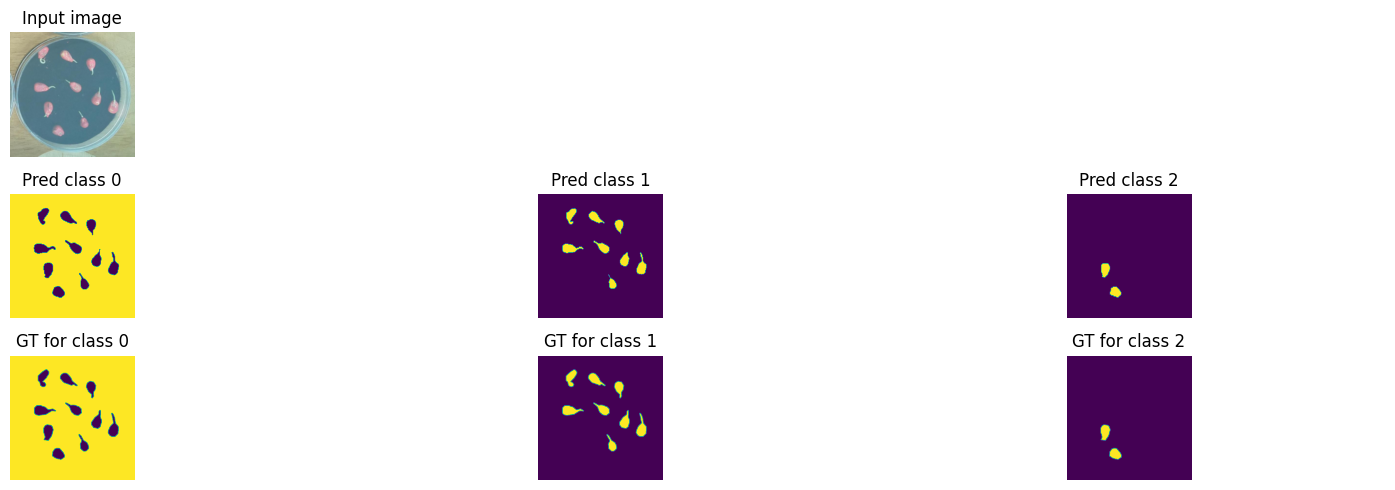

Train loss: 0.24136 | Time: 38m 2s | Val loss: 0.25468
Train_DICE_avg: 0.78303 | Train_Jaccard_avg: 0.72006 | Train_Sensitivity_avg: 0.83243 | Train_Specificity_avg: 0.94196 
Class 0 - Train_DICE: 0.99061 | Train_Jaccard: 0.98147 | Train_Sensitivity: 0.99288 | Train_Specificity: 0.83504 
Class 1 - Train_DICE: 0.50196 | Train_Jaccard: 0.42172 | Train_Sensitivity: 0.59268 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.85654 | Train_Jaccard: 0.75698 | Train_Sensitivity: 0.91172 | Train_Specificity: 0.99386 
Val_DICE_avg: 0.79822 | Val_Jaccard_avg: 0.74641 | Val_Sensitivity_avg: 0.85607 | Val_Specificity_avg: 0.93982 
Class 0 - Val_DICE: 0.99543 | Val_Jaccard: 0.99093 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.82732 
Class 1 - Val_DICE: 0.52175 | Val_Jaccard: 0.45711 | Val_Sensitivity: 0.63482 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.87747 | Val_Jaccard: 0.79118 | Val_Sensitivity: 0.93550 | Val_Specificity: 0.99522 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.23644 | Time: 39m 6s | Val loss: 0.24661
Train_DICE_avg: 0.78341 | Train_Jaccard_avg: 0.72065 | Train_Sensitivity_avg: 0.83401 | Train_Specificity_avg: 0.94251 
Class 0 - Train_DICE: 0.99054 | Train_Jaccard: 0.98134 | Train_Sensitivity: 0.99272 | Train_Specificity: 0.83670 
Class 1 - Train_DICE: 0.50412 | Train_Jaccard: 0.42468 | Train_Sensitivity: 0.59798 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.85558 | Train_Jaccard: 0.75594 | Train_Sensitivity: 0.91133 | Train_Specificity: 0.99385 
Val_DICE_avg: 0.76788 | Val_Jaccard_avg: 0.71432 | Val_Sensitivity_avg: 0.80988 | Val_Specificity_avg: 0.94251 
Class 0 - Val_DICE: 0.99569 | Val_Jaccard: 0.99143 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.83564 
Class 1 - Val_DICE: 0.43828 | Val_Jaccard: 0.37362 | Val_Sensitivity: 0.48383 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.86967 | Val_Jaccard: 0.77792 | Val_Sensitivity: 0.94798 | Val_Specificity: 0.99433 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.23249 | Time: 40m 11s | Val loss: 0.24402
Train_DICE_avg: 0.80258 | Train_Jaccard_avg: 0.73952 | Train_Sensitivity_avg: 0.84883 | Train_Specificity_avg: 0.94300 
Class 0 - Train_DICE: 0.99070 | Train_Jaccard: 0.98164 | Train_Sensitivity: 0.99287 | Train_Specificity: 0.83804 
Class 1 - Train_DICE: 0.55882 | Train_Jaccard: 0.47715 | Train_Sensitivity: 0.64064 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.85821 | Train_Jaccard: 0.75977 | Train_Sensitivity: 0.91296 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.82267 | Val_Jaccard_avg: 0.77134 | Val_Sensitivity_avg: 0.86382 | Val_Specificity_avg: 0.93416 
Class 0 - Val_DICE: 0.99524 | Val_Jaccard: 0.99054 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.80951 
Class 1 - Val_DICE: 0.59191 | Val_Jaccard: 0.52651 | Val_Sensitivity: 0.65650 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.88088 | Val_Jaccard: 0.79696 | Val_Sensitivity: 0.93681 | Val_Specificity: 0.99535 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.22078 | Time: 41m 15s | Val loss: 0.22177
Train_DICE_avg: 0.81302 | Train_Jaccard_avg: 0.75118 | Train_Sensitivity_avg: 0.86970 | Train_Specificity_avg: 0.94338 
Class 0 - Train_DICE: 0.99036 | Train_Jaccard: 0.98099 | Train_Sensitivity: 0.99220 | Train_Specificity: 0.83930 
Class 1 - Train_DICE: 0.59176 | Train_Jaccard: 0.51470 | Train_Sensitivity: 0.70462 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.85695 | Train_Jaccard: 0.75786 | Train_Sensitivity: 0.91228 | Train_Specificity: 0.99387 
Val_DICE_avg: 0.81779 | Val_Jaccard_avg: 0.76529 | Val_Sensitivity_avg: 0.86011 | Val_Specificity_avg: 0.93117 
Class 0 - Val_DICE: 0.99494 | Val_Jaccard: 0.98996 | Val_Sensitivity: 0.99818 | Val_Specificity: 0.80074 
Class 1 - Val_DICE: 0.57850 | Val_Jaccard: 0.51196 | Val_Sensitivity: 0.65950 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.87991 | Val_Jaccard: 0.79396 | Val_Sensitivity: 0.92264 | Val_Specificity: 0.99525 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.21528 | Time: 42m 19s | Val loss: 0.17752
Train_DICE_avg: 0.81533 | Train_Jaccard_avg: 0.75317 | Train_Sensitivity_avg: 0.87263 | Train_Specificity_avg: 0.94192 
Class 0 - Train_DICE: 0.99042 | Train_Jaccard: 0.98110 | Train_Sensitivity: 0.99276 | Train_Specificity: 0.83497 
Class 1 - Train_DICE: 0.59939 | Train_Jaccard: 0.52198 | Train_Sensitivity: 0.71431 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.85619 | Train_Jaccard: 0.75644 | Train_Sensitivity: 0.91084 | Train_Specificity: 0.99382 
Val_DICE_avg: 0.83385 | Val_Jaccard_avg: 0.77964 | Val_Sensitivity_avg: 0.89004 | Val_Specificity_avg: 0.94430 
Class 0 - Val_DICE: 0.99584 | Val_Jaccard: 0.99174 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.84152 
Class 1 - Val_DICE: 0.63585 | Val_Jaccard: 0.56917 | Val_Sensitivity: 0.72735 | Val_Specificity: 0.99719 
Class 2 - Val_DICE: 0.86987 | Val_Jaccard: 0.77801 | Val_Sensitivity: 0.94518 | Val_Specificity: 0.99418 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


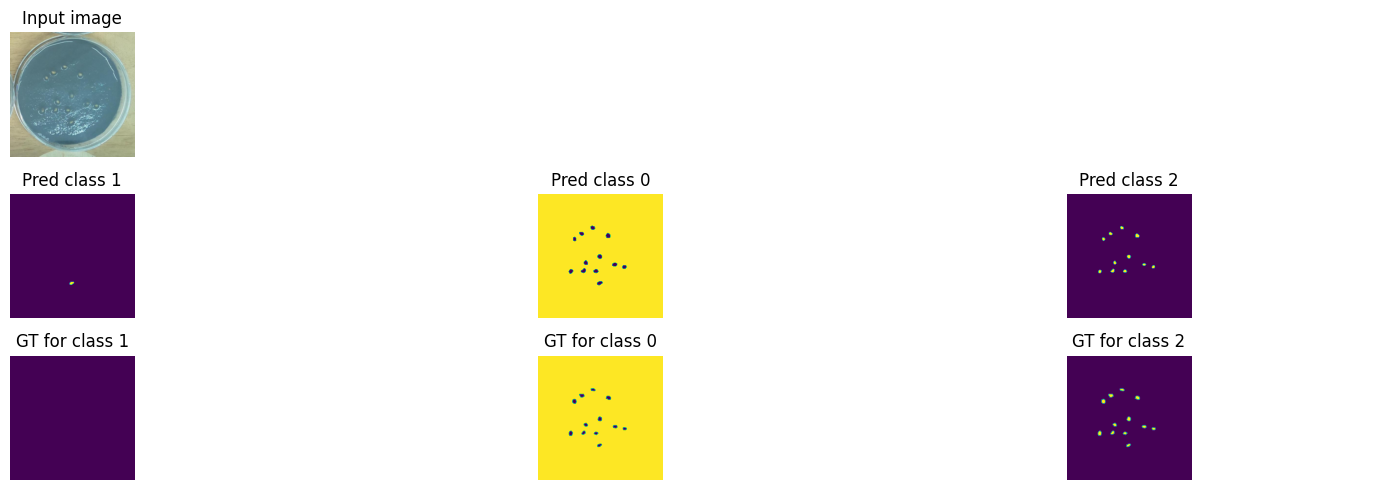

Train loss: 0.20246 | Time: 43m 24s | Val loss: 0.18080
Train_DICE_avg: 0.82968 | Train_Jaccard_avg: 0.76793 | Train_Sensitivity_avg: 0.89146 | Train_Specificity_avg: 0.94184 
Class 0 - Train_DICE: 0.99043 | Train_Jaccard: 0.98112 | Train_Sensitivity: 0.99245 | Train_Specificity: 0.83487 
Class 1 - Train_DICE: 0.64308 | Train_Jaccard: 0.56701 | Train_Sensitivity: 0.76999 | Train_Specificity: 0.99690 
Class 2 - Train_DICE: 0.85553 | Train_Jaccard: 0.75567 | Train_Sensitivity: 0.91196 | Train_Specificity: 0.99376 
Val_DICE_avg: 0.86763 | Val_Jaccard_avg: 0.81438 | Val_Sensitivity_avg: 0.91115 | Val_Specificity_avg: 0.93193 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99025 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.80308 
Class 1 - Val_DICE: 0.73154 | Val_Jaccard: 0.66243 | Val_Sensitivity: 0.80520 | Val_Specificity: 0.99723 
Class 2 - Val_DICE: 0.87626 | Val_Jaccard: 0.79047 | Val_Sensitivity: 0.93007 | Val_Specificity: 0.99547 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.19861 | Time: 44m 28s | Val loss: 0.18580
Train_DICE_avg: 0.83234 | Train_Jaccard_avg: 0.77152 | Train_Sensitivity_avg: 0.89626 | Train_Specificity_avg: 0.94200 
Class 0 - Train_DICE: 0.99027 | Train_Jaccard: 0.98081 | Train_Sensitivity: 0.99254 | Train_Specificity: 0.83514 
Class 1 - Train_DICE: 0.65066 | Train_Jaccard: 0.57668 | Train_Sensitivity: 0.78645 | Train_Specificity: 0.99688 
Class 2 - Train_DICE: 0.85610 | Train_Jaccard: 0.75708 | Train_Sensitivity: 0.90979 | Train_Specificity: 0.99397 
Val_DICE_avg: 0.84909 | Val_Jaccard_avg: 0.79539 | Val_Sensitivity_avg: 0.91265 | Val_Specificity_avg: 0.94099 
Class 0 - Val_DICE: 0.99556 | Val_Jaccard: 0.99117 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.83136 
Class 1 - Val_DICE: 0.68356 | Val_Jaccard: 0.61731 | Val_Sensitivity: 0.79761 | Val_Specificity: 0.99686 
Class 2 - Val_DICE: 0.86814 | Val_Jaccard: 0.77768 | Val_Sensitivity: 0.94267 | Val_Specificity: 0.99475 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.19537 | Time: 45m 32s | Val loss: 0.17705
Train_DICE_avg: 0.83130 | Train_Jaccard_avg: 0.76999 | Train_Sensitivity_avg: 0.89442 | Train_Specificity_avg: 0.94249 
Class 0 - Train_DICE: 0.99052 | Train_Jaccard: 0.98130 | Train_Sensitivity: 0.99266 | Train_Specificity: 0.83668 
Class 1 - Train_DICE: 0.64660 | Train_Jaccard: 0.57088 | Train_Sensitivity: 0.77927 | Train_Specificity: 0.99683 
Class 2 - Train_DICE: 0.85677 | Train_Jaccard: 0.75780 | Train_Sensitivity: 0.91132 | Train_Specificity: 0.99397 
Val_DICE_avg: 0.84015 | Val_Jaccard_avg: 0.78844 | Val_Sensitivity_avg: 0.89249 | Val_Specificity_avg: 0.93403 
Class 0 - Val_DICE: 0.99529 | Val_Jaccard: 0.99065 | Val_Sensitivity: 0.99800 | Val_Specificity: 0.80990 
Class 1 - Val_DICE: 0.64601 | Val_Jaccard: 0.58138 | Val_Sensitivity: 0.75301 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.87914 | Val_Jaccard: 0.79329 | Val_Sensitivity: 0.92646 | Val_Specificity: 0.99502 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.19403 | Time: 46m 36s | Val loss: 0.17554
Train_DICE_avg: 0.83246 | Train_Jaccard_avg: 0.77173 | Train_Sensitivity_avg: 0.89411 | Train_Specificity_avg: 0.93966 
Class 0 - Train_DICE: 0.99044 | Train_Jaccard: 0.98114 | Train_Sensitivity: 0.99314 | Train_Specificity: 0.82800 
Class 1 - Train_DICE: 0.64820 | Train_Jaccard: 0.57327 | Train_Sensitivity: 0.77757 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.85874 | Train_Jaccard: 0.76077 | Train_Sensitivity: 0.91162 | Train_Specificity: 0.99400 
Val_DICE_avg: 0.86525 | Val_Jaccard_avg: 0.81236 | Val_Sensitivity_avg: 0.91826 | Val_Specificity_avg: 0.93370 
Class 0 - Val_DICE: 0.99524 | Val_Jaccard: 0.99054 | Val_Sensitivity: 0.99812 | Val_Specificity: 0.80927 
Class 1 - Val_DICE: 0.73002 | Val_Jaccard: 0.66679 | Val_Sensitivity: 0.81834 | Val_Specificity: 0.99728 
Class 2 - Val_DICE: 0.87050 | Val_Jaccard: 0.77976 | Val_Sensitivity: 0.93833 | Val_Specificity: 0.99454 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.18900 | Time: 47m 40s | Val loss: 0.17049
Train_DICE_avg: 0.84355 | Train_Jaccard_avg: 0.78269 | Train_Sensitivity_avg: 0.90761 | Train_Specificity_avg: 0.94017 
Class 0 - Train_DICE: 0.99041 | Train_Jaccard: 0.98107 | Train_Sensitivity: 0.99300 | Train_Specificity: 0.82962 
Class 1 - Train_DICE: 0.68192 | Train_Jaccard: 0.60692 | Train_Sensitivity: 0.81711 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.85831 | Train_Jaccard: 0.76008 | Train_Sensitivity: 0.91272 | Train_Specificity: 0.99398 
Val_DICE_avg: 0.87555 | Val_Jaccard_avg: 0.82336 | Val_Sensitivity_avg: 0.93009 | Val_Specificity_avg: 0.93380 
Class 0 - Val_DICE: 0.99517 | Val_Jaccard: 0.99040 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.80922 
Class 1 - Val_DICE: 0.75665 | Val_Jaccard: 0.69278 | Val_Sensitivity: 0.85779 | Val_Specificity: 0.99727 
Class 2 - Val_DICE: 0.87484 | Val_Jaccard: 0.78688 | Val_Sensitivity: 0.93436 | Val_Specificity: 0.99493 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


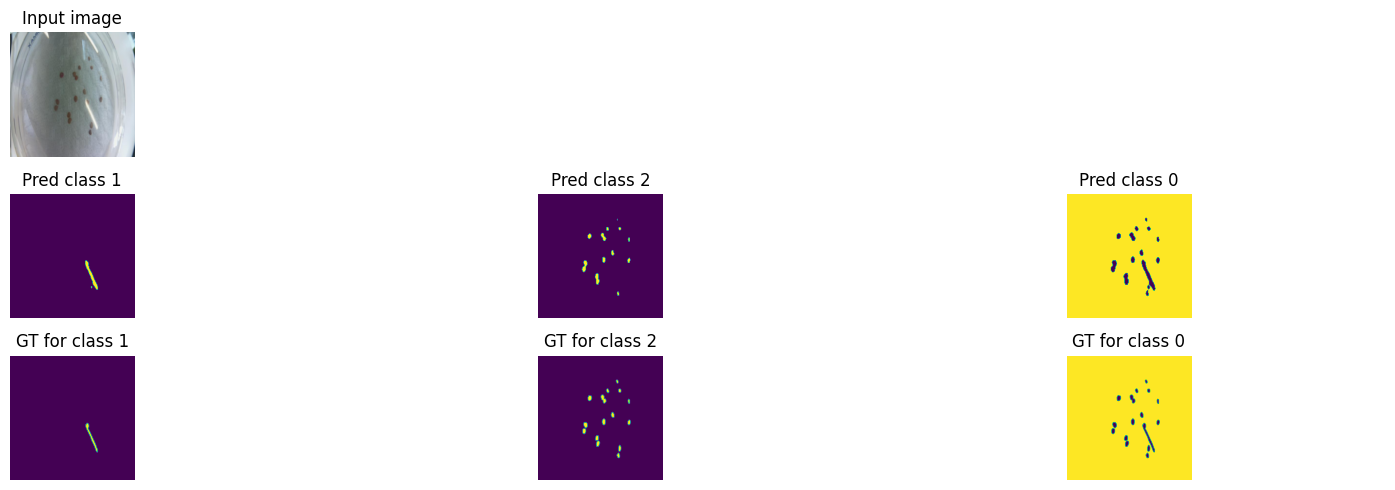

Train loss: 0.19011 | Time: 48m 45s | Val loss: 0.16373
Train_DICE_avg: 0.83969 | Train_Jaccard_avg: 0.77870 | Train_Sensitivity_avg: 0.89798 | Train_Specificity_avg: 0.94202 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98137 | Train_Sensitivity: 0.99295 | Train_Specificity: 0.83511 
Class 1 - Train_DICE: 0.66855 | Train_Jaccard: 0.59232 | Train_Sensitivity: 0.78626 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.85997 | Train_Jaccard: 0.76241 | Train_Sensitivity: 0.91473 | Train_Specificity: 0.99399 
Val_DICE_avg: 0.86830 | Val_Jaccard_avg: 0.81355 | Val_Sensitivity_avg: 0.92058 | Val_Specificity_avg: 0.94131 
Class 0 - Val_DICE: 0.99567 | Val_Jaccard: 0.99141 | Val_Sensitivity: 0.99784 | Val_Specificity: 0.83248 
Class 1 - Val_DICE: 0.74319 | Val_Jaccard: 0.67674 | Val_Sensitivity: 0.81383 | Val_Specificity: 0.99737 
Class 2 - Val_DICE: 0.86605 | Val_Jaccard: 0.77251 | Val_Sensitivity: 0.95007 | Val_Specificity: 0.99407 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.18339 | Time: 49m 49s | Val loss: 0.14136
Train_DICE_avg: 0.84776 | Train_Jaccard_avg: 0.78714 | Train_Sensitivity_avg: 0.90979 | Train_Specificity_avg: 0.94127 
Class 0 - Train_DICE: 0.99051 | Train_Jaccard: 0.98128 | Train_Sensitivity: 0.99308 | Train_Specificity: 0.83283 
Class 1 - Train_DICE: 0.69205 | Train_Jaccard: 0.61663 | Train_Sensitivity: 0.82247 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.86073 | Train_Jaccard: 0.76350 | Train_Sensitivity: 0.91382 | Train_Specificity: 0.99408 
Val_DICE_avg: 0.86761 | Val_Jaccard_avg: 0.81492 | Val_Sensitivity_avg: 0.91734 | Val_Specificity_avg: 0.93261 
Class 0 - Val_DICE: 0.99507 | Val_Jaccard: 0.99021 | Val_Sensitivity: 0.99821 | Val_Specificity: 0.80558 
Class 1 - Val_DICE: 0.73578 | Val_Jaccard: 0.67164 | Val_Sensitivity: 0.81348 | Val_Specificity: 0.99738 
Class 2 - Val_DICE: 0.87197 | Val_Jaccard: 0.78291 | Val_Sensitivity: 0.94032 | Val_Specificity: 0.99486 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.17746 | Time: 50m 53s | Val loss: 0.13399
Train_DICE_avg: 0.84867 | Train_Jaccard_avg: 0.78805 | Train_Sensitivity_avg: 0.90832 | Train_Specificity_avg: 0.94188 
Class 0 - Train_DICE: 0.99042 | Train_Jaccard: 0.98110 | Train_Sensitivity: 0.99280 | Train_Specificity: 0.83457 
Class 1 - Train_DICE: 0.69409 | Train_Jaccard: 0.61826 | Train_Sensitivity: 0.81728 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.86151 | Train_Jaccard: 0.76480 | Train_Sensitivity: 0.91488 | Train_Specificity: 0.99411 
Val_DICE_avg: 0.87825 | Val_Jaccard_avg: 0.82735 | Val_Sensitivity_avg: 0.92866 | Val_Specificity_avg: 0.93033 
Class 0 - Val_DICE: 0.99493 | Val_Jaccard: 0.98994 | Val_Sensitivity: 0.99825 | Val_Specificity: 0.79844 
Class 1 - Val_DICE: 0.75759 | Val_Jaccard: 0.69372 | Val_Sensitivity: 0.85894 | Val_Specificity: 0.99708 
Class 2 - Val_DICE: 0.88223 | Val_Jaccard: 0.79840 | Val_Sensitivity: 0.92877 | Val_Specificity: 0.99548 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.17598 | Time: 51m 57s | Val loss: 0.13506
Train_DICE_avg: 0.84926 | Train_Jaccard_avg: 0.78847 | Train_Sensitivity_avg: 0.91279 | Train_Specificity_avg: 0.94047 
Class 0 - Train_DICE: 0.99034 | Train_Jaccard: 0.98095 | Train_Sensitivity: 0.99290 | Train_Specificity: 0.83048 
Class 1 - Train_DICE: 0.69707 | Train_Jaccard: 0.62133 | Train_Sensitivity: 0.83268 | Train_Specificity: 0.99685 
Class 2 - Train_DICE: 0.86037 | Train_Jaccard: 0.76313 | Train_Sensitivity: 0.91280 | Train_Specificity: 0.99408 
Val_DICE_avg: 0.87422 | Val_Jaccard_avg: 0.82239 | Val_Sensitivity_avg: 0.92559 | Val_Specificity_avg: 0.92912 
Class 0 - Val_DICE: 0.99485 | Val_Jaccard: 0.98978 | Val_Sensitivity: 0.99827 | Val_Specificity: 0.79507 
Class 1 - Val_DICE: 0.74965 | Val_Jaccard: 0.68588 | Val_Sensitivity: 0.84369 | Val_Specificity: 0.99712 
Class 2 - Val_DICE: 0.87817 | Val_Jaccard: 0.79152 | Val_Sensitivity: 0.93480 | Val_Specificity: 0.99516 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.17537 | Time: 53m 1s | Val loss: 0.13334
Train_DICE_avg: 0.84952 | Train_Jaccard_avg: 0.78906 | Train_Sensitivity_avg: 0.91169 | Train_Specificity_avg: 0.94088 
Class 0 - Train_DICE: 0.99057 | Train_Jaccard: 0.98140 | Train_Sensitivity: 0.99316 | Train_Specificity: 0.83162 
Class 1 - Train_DICE: 0.69647 | Train_Jaccard: 0.62127 | Train_Sensitivity: 0.82821 | Train_Specificity: 0.99688 
Class 2 - Train_DICE: 0.86151 | Train_Jaccard: 0.76451 | Train_Sensitivity: 0.91369 | Train_Specificity: 0.99412 
Val_DICE_avg: 0.87286 | Val_Jaccard_avg: 0.82142 | Val_Sensitivity_avg: 0.92906 | Val_Specificity_avg: 0.93211 
Class 0 - Val_DICE: 0.99502 | Val_Jaccard: 0.99012 | Val_Sensitivity: 0.99824 | Val_Specificity: 0.80412 
Class 1 - Val_DICE: 0.74579 | Val_Jaccard: 0.68351 | Val_Sensitivity: 0.85788 | Val_Specificity: 0.99711 
Class 2 - Val_DICE: 0.87778 | Val_Jaccard: 0.79064 | Val_Sensitivity: 0.93104 | Val_Specificity: 0.99509 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


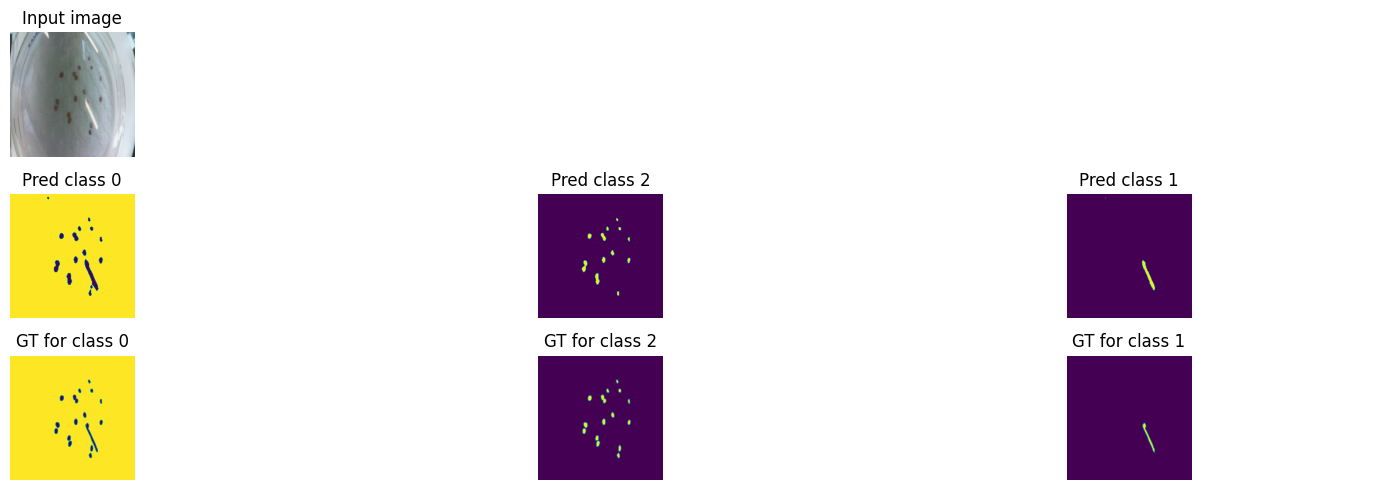

Train loss: 0.17017 | Time: 54m 5s | Val loss: 0.13427
Train_DICE_avg: 0.85254 | Train_Jaccard_avg: 0.79153 | Train_Sensitivity_avg: 0.91491 | Train_Specificity_avg: 0.94048 
Class 0 - Train_DICE: 0.99062 | Train_Jaccard: 0.98149 | Train_Sensitivity: 0.99332 | Train_Specificity: 0.83056 
Class 1 - Train_DICE: 0.70631 | Train_Jaccard: 0.62974 | Train_Sensitivity: 0.83675 | Train_Specificity: 0.99678 
Class 2 - Train_DICE: 0.86069 | Train_Jaccard: 0.76337 | Train_Sensitivity: 0.91465 | Train_Specificity: 0.99409 
Val_DICE_avg: 0.87363 | Val_Jaccard_avg: 0.82243 | Val_Sensitivity_avg: 0.93322 | Val_Specificity_avg: 0.93343 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99037 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.80824 
Class 1 - Val_DICE: 0.74962 | Val_Jaccard: 0.68840 | Val_Sensitivity: 0.86771 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.87612 | Val_Jaccard: 0.78854 | Val_Sensitivity: 0.93381 | Val_Specificity: 0.99502 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.17102 | Time: 55m 9s | Val loss: 0.12870
Train_DICE_avg: 0.85388 | Train_Jaccard_avg: 0.79356 | Train_Sensitivity_avg: 0.91193 | Train_Specificity_avg: 0.94168 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98145 | Train_Sensitivity: 0.99322 | Train_Specificity: 0.83388 
Class 1 - Train_DICE: 0.70729 | Train_Jaccard: 0.63121 | Train_Sensitivity: 0.82706 | Train_Specificity: 0.99700 
Class 2 - Train_DICE: 0.86374 | Train_Jaccard: 0.76800 | Train_Sensitivity: 0.91551 | Train_Specificity: 0.99417 
Val_DICE_avg: 0.87552 | Val_Jaccard_avg: 0.82295 | Val_Sensitivity_avg: 0.93384 | Val_Specificity_avg: 0.93513 
Class 0 - Val_DICE: 0.99530 | Val_Jaccard: 0.99067 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.81366 
Class 1 - Val_DICE: 0.75833 | Val_Jaccard: 0.69478 | Val_Sensitivity: 0.86364 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.87291 | Val_Jaccard: 0.78341 | Val_Sensitivity: 0.93976 | Val_Specificity: 0.99470 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.16801 | Time: 56m 14s | Val loss: 0.12205
Train_DICE_avg: 0.85289 | Train_Jaccard_avg: 0.79210 | Train_Sensitivity_avg: 0.91334 | Train_Specificity_avg: 0.94068 
Class 0 - Train_DICE: 0.99051 | Train_Jaccard: 0.98127 | Train_Sensitivity: 0.99323 | Train_Specificity: 0.83097 
Class 1 - Train_DICE: 0.70459 | Train_Jaccard: 0.62747 | Train_Sensitivity: 0.83241 | Train_Specificity: 0.99686 
Class 2 - Train_DICE: 0.86356 | Train_Jaccard: 0.76755 | Train_Sensitivity: 0.91438 | Train_Specificity: 0.99422 
Val_DICE_avg: 0.88033 | Val_Jaccard_avg: 0.82678 | Val_Sensitivity_avg: 0.93524 | Val_Specificity_avg: 0.93678 
Class 0 - Val_DICE: 0.99541 | Val_Jaccard: 0.99088 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.81864 
Class 1 - Val_DICE: 0.77423 | Val_Jaccard: 0.70751 | Val_Sensitivity: 0.86396 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.87136 | Val_Jaccard: 0.78196 | Val_Sensitivity: 0.94370 | Val_Specificity: 0.99466 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.16641 | Time: 57m 18s | Val loss: 0.12322
Train_DICE_avg: 0.85656 | Train_Jaccard_avg: 0.79632 | Train_Sensitivity_avg: 0.91654 | Train_Specificity_avg: 0.94208 
Class 0 - Train_DICE: 0.99082 | Train_Jaccard: 0.98187 | Train_Sensitivity: 0.99357 | Train_Specificity: 0.83503 
Class 1 - Train_DICE: 0.71466 | Train_Jaccard: 0.63838 | Train_Sensitivity: 0.84029 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.86422 | Train_Jaccard: 0.76871 | Train_Sensitivity: 0.91575 | Train_Specificity: 0.99424 
Val_DICE_avg: 0.88041 | Val_Jaccard_avg: 0.82772 | Val_Sensitivity_avg: 0.93643 | Val_Specificity_avg: 0.93597 
Class 0 - Val_DICE: 0.99532 | Val_Jaccard: 0.99071 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.81600 
Class 1 - Val_DICE: 0.77056 | Val_Jaccard: 0.70523 | Val_Sensitivity: 0.87169 | Val_Specificity: 0.99704 
Class 2 - Val_DICE: 0.87535 | Val_Jaccard: 0.78722 | Val_Sensitivity: 0.93953 | Val_Specificity: 0.99486 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.16715 | Time: 58m 22s | Val loss: 0.12597
Train_DICE_avg: 0.85492 | Train_Jaccard_avg: 0.79470 | Train_Sensitivity_avg: 0.91725 | Train_Specificity_avg: 0.94048 
Class 0 - Train_DICE: 0.99038 | Train_Jaccard: 0.98103 | Train_Sensitivity: 0.99328 | Train_Specificity: 0.83027 
Class 1 - Train_DICE: 0.71131 | Train_Jaccard: 0.63596 | Train_Sensitivity: 0.84260 | Train_Specificity: 0.99691 
Class 2 - Train_DICE: 0.86306 | Train_Jaccard: 0.76711 | Train_Sensitivity: 0.91588 | Train_Specificity: 0.99426 
Val_DICE_avg: 0.87768 | Val_Jaccard_avg: 0.82529 | Val_Sensitivity_avg: 0.93417 | Val_Specificity_avg: 0.93560 
Class 0 - Val_DICE: 0.99532 | Val_Jaccard: 0.99070 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.81489 
Class 1 - Val_DICE: 0.76300 | Val_Jaccard: 0.69884 | Val_Sensitivity: 0.86580 | Val_Specificity: 0.99704 
Class 2 - Val_DICE: 0.87472 | Val_Jaccard: 0.78631 | Val_Sensitivity: 0.93856 | Val_Specificity: 0.99489 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


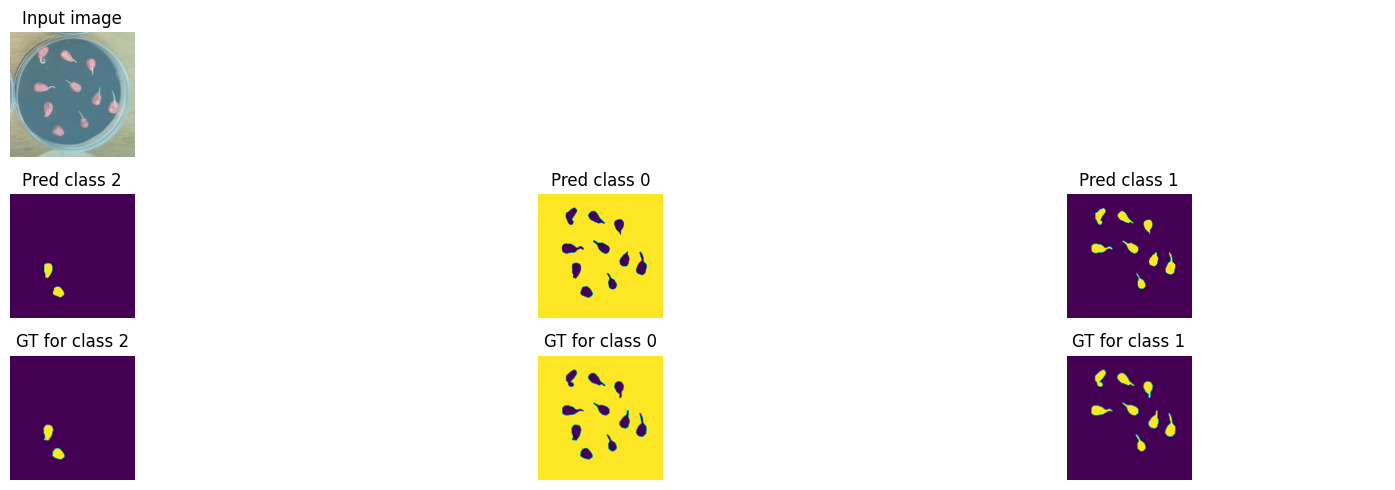

Train loss: 0.16572 | Time: 59m 27s | Val loss: 0.12012
Train_DICE_avg: 0.85470 | Train_Jaccard_avg: 0.79450 | Train_Sensitivity_avg: 0.91324 | Train_Specificity_avg: 0.93921 
Class 0 - Train_DICE: 0.99052 | Train_Jaccard: 0.98129 | Train_Sensitivity: 0.99359 | Train_Specificity: 0.82644 
Class 1 - Train_DICE: 0.71087 | Train_Jaccard: 0.63514 | Train_Sensitivity: 0.82870 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.86272 | Train_Jaccard: 0.76707 | Train_Sensitivity: 0.91742 | Train_Specificity: 0.99413 
Val_DICE_avg: 0.88422 | Val_Jaccard_avg: 0.83212 | Val_Sensitivity_avg: 0.92763 | Val_Specificity_avg: 0.93273 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99036 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.80572 
Class 1 - Val_DICE: 0.77677 | Val_Jaccard: 0.70936 | Val_Sensitivity: 0.83987 | Val_Specificity: 0.99734 
Class 2 - Val_DICE: 0.88074 | Val_Jaccard: 0.79662 | Val_Sensitivity: 0.94485 | Val_Specificity: 0.99512 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.16525 | Time: 60m 33s | Val loss: 0.12746
Train_DICE_avg: 0.85716 | Train_Jaccard_avg: 0.79696 | Train_Sensitivity_avg: 0.91489 | Train_Specificity_avg: 0.93821 
Class 0 - Train_DICE: 0.99067 | Train_Jaccard: 0.98159 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.82334 
Class 1 - Train_DICE: 0.71520 | Train_Jaccard: 0.63843 | Train_Sensitivity: 0.83232 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.86561 | Train_Jaccard: 0.77087 | Train_Sensitivity: 0.91843 | Train_Specificity: 0.99426 
Val_DICE_avg: 0.87668 | Val_Jaccard_avg: 0.82401 | Val_Sensitivity_avg: 0.92764 | Val_Specificity_avg: 0.93627 
Class 0 - Val_DICE: 0.99537 | Val_Jaccard: 0.99081 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.81690 
Class 1 - Val_DICE: 0.75895 | Val_Jaccard: 0.69345 | Val_Sensitivity: 0.84144 | Val_Specificity: 0.99731 
Class 2 - Val_DICE: 0.87572 | Val_Jaccard: 0.78779 | Val_Sensitivity: 0.94339 | Val_Specificity: 0.99462 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.16318 | Time: 61m 39s | Val loss: 0.12318
Train_DICE_avg: 0.85984 | Train_Jaccard_avg: 0.79987 | Train_Sensitivity_avg: 0.91901 | Train_Specificity_avg: 0.94323 
Class 0 - Train_DICE: 0.99068 | Train_Jaccard: 0.98162 | Train_Sensitivity: 0.99311 | Train_Specificity: 0.83837 
Class 1 - Train_DICE: 0.72369 | Train_Jaccard: 0.64790 | Train_Sensitivity: 0.84750 | Train_Specificity: 0.99705 
Class 2 - Train_DICE: 0.86515 | Train_Jaccard: 0.77010 | Train_Sensitivity: 0.91643 | Train_Specificity: 0.99427 
Val_DICE_avg: 0.88107 | Val_Jaccard_avg: 0.82871 | Val_Sensitivity_avg: 0.92873 | Val_Specificity_avg: 0.93539 
Class 0 - Val_DICE: 0.99534 | Val_Jaccard: 0.99075 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.81399 
Class 1 - Val_DICE: 0.76964 | Val_Jaccard: 0.70382 | Val_Sensitivity: 0.84379 | Val_Specificity: 0.99738 
Class 2 - Val_DICE: 0.87823 | Val_Jaccard: 0.79155 | Val_Sensitivity: 0.94425 | Val_Specificity: 0.99480 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.16415 | Time: 62m 45s | Val loss: 0.11858
Train_DICE_avg: 0.85773 | Train_Jaccard_avg: 0.79776 | Train_Sensitivity_avg: 0.91886 | Train_Specificity_avg: 0.94182 
Class 0 - Train_DICE: 0.99059 | Train_Jaccard: 0.98144 | Train_Sensitivity: 0.99342 | Train_Specificity: 0.83431 
Class 1 - Train_DICE: 0.71874 | Train_Jaccard: 0.64382 | Train_Sensitivity: 0.84437 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.86386 | Train_Jaccard: 0.76801 | Train_Sensitivity: 0.91879 | Train_Specificity: 0.99412 
Val_DICE_avg: 0.88592 | Val_Jaccard_avg: 0.83315 | Val_Sensitivity_avg: 0.93591 | Val_Specificity_avg: 0.93430 
Class 0 - Val_DICE: 0.99527 | Val_Jaccard: 0.99060 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.81075 
Class 1 - Val_DICE: 0.78407 | Val_Jaccard: 0.71683 | Val_Sensitivity: 0.86719 | Val_Specificity: 0.99718 
Class 2 - Val_DICE: 0.87843 | Val_Jaccard: 0.79203 | Val_Sensitivity: 0.94237 | Val_Specificity: 0.99497 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.16165 | Time: 63m 51s | Val loss: 0.11970
Train_DICE_avg: 0.85829 | Train_Jaccard_avg: 0.79834 | Train_Sensitivity_avg: 0.91854 | Train_Specificity_avg: 0.94012 
Class 0 - Train_DICE: 0.99055 | Train_Jaccard: 0.98135 | Train_Sensitivity: 0.99371 | Train_Specificity: 0.82907 
Class 1 - Train_DICE: 0.71745 | Train_Jaccard: 0.64121 | Train_Sensitivity: 0.84373 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.86687 | Train_Jaccard: 0.77245 | Train_Sensitivity: 0.91817 | Train_Specificity: 0.99432 
Val_DICE_avg: 0.88586 | Val_Jaccard_avg: 0.83382 | Val_Sensitivity_avg: 0.93198 | Val_Specificity_avg: 0.93265 
Class 0 - Val_DICE: 0.99512 | Val_Jaccard: 0.99030 | Val_Sensitivity: 0.99830 | Val_Specificity: 0.80551 
Class 1 - Val_DICE: 0.78423 | Val_Jaccard: 0.71893 | Val_Sensitivity: 0.85336 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.87825 | Val_Jaccard: 0.79222 | Val_Sensitivity: 0.94429 | Val_Specificity: 0.99489 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


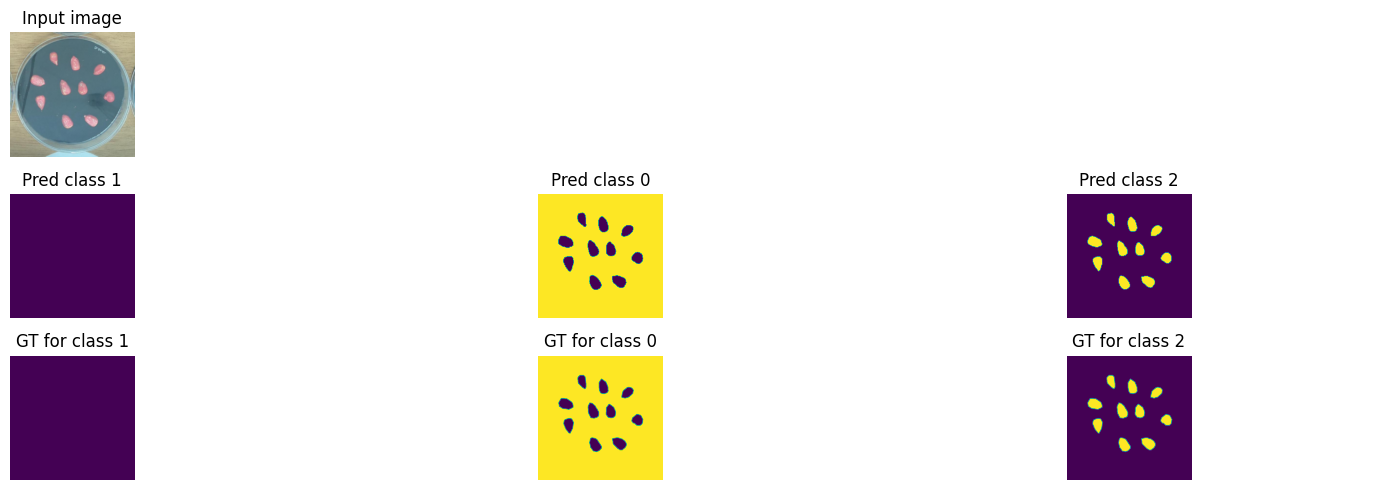

Train loss: 0.16429 | Time: 64m 58s | Val loss: 0.11744
Train_DICE_avg: 0.85805 | Train_Jaccard_avg: 0.79811 | Train_Sensitivity_avg: 0.91681 | Train_Specificity_avg: 0.93855 
Class 0 - Train_DICE: 0.99049 | Train_Jaccard: 0.98125 | Train_Sensitivity: 0.99372 | Train_Specificity: 0.82436 
Class 1 - Train_DICE: 0.71785 | Train_Jaccard: 0.64196 | Train_Sensitivity: 0.83807 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86581 | Train_Jaccard: 0.77110 | Train_Sensitivity: 0.91863 | Train_Specificity: 0.99427 
Val_DICE_avg: 0.88692 | Val_Jaccard_avg: 0.83494 | Val_Sensitivity_avg: 0.93235 | Val_Specificity_avg: 0.93180 
Class 0 - Val_DICE: 0.99512 | Val_Jaccard: 0.99032 | Val_Sensitivity: 0.99827 | Val_Specificity: 0.80308 
Class 1 - Val_DICE: 0.78619 | Val_Jaccard: 0.72041 | Val_Sensitivity: 0.85385 | Val_Specificity: 0.99735 
Class 2 - Val_DICE: 0.87946 | Val_Jaccard: 0.79408 | Val_Sensitivity: 0.94494 | Val_Specificity: 0.99498 


wandb: uploading artifact best_model; uploading output.log; uploading config.yaml; uploading history steps 59-60, summary, console lines 786-796
wandb: uploading artifact best_model
wandb: uploading data
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▂▂▃▃▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████████████
wandb:       Training Jaccard ▁▁▁▂▂▃▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇██████████
wandb:          Training Loss ███▇▇▆▆▆▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▂▂▂▂▃▃▃▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇███████████████
wandb:   Training Specificity ▁▂▃▄▄▆▇▇▇▇▇▇▇█████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
wandb:        Validation DICE ▁▁▂▂▂▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▆▇▇█▇███████████
wandb:     Validation Jaccard ▁▁▂▂▂▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇█▇▇████████████
wandb:        Validation Loss ███▇▇▇▆▆▆▆▅▅▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▇▆▇▇█▇████████████
wandb: Validation Specificity ▁▃▅▅▄▄▃▄▅▅▇▆


Training complete!


In [41]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [42]:
model = ResUNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [43]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]



Global Performance Metrics:
Loss mean: 0.12769, std: 0.00954
Dice Coefficient mean: 0.86323, std: 0.11176
Jaccard Index mean: 0.80366, std: 0.12608
Sensitivity mean: 0.86241, std: 0.10178
Specificity mean: 0.97596, std: 0.02181

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99478, std: 0.00247
Jaccard mean: 0.98962, std: 0.00487
Sensitivity mean: 0.99198, std: 0.00364
Specificity mean: 0.93166, std: 0.06540

Class 1:
Dice mean: 0.73337, std: 0.30939
Jaccard mean: 0.65794, std: 0.32758
Sensitivity mean: 0.76727, std: 0.27638
Specificity mean: 0.99858, std: 0.00247

Class 2:
Dice mean: 0.86155, std: 0.07310
Jaccard mean: 0.76341, std: 0.10175
Sensitivity mean: 0.82797, std: 0.09655
Specificity mean: 0.99765, std: 0.00193
